# Reinforcement Learning Case Study

## By Tushar Prasad

You are hired as a Sr. Machine Learning Er. at SuperCabs, a leading app-based cab provider in a large Indian metro city. In this highly competitive industry, retention of good cab drivers is a crucial business driver, and you believe that a sound RL-based system for assisting cab drivers can potentially retain and attract new cab drivers. 

Cab drivers, like most people, are incentivised by a healthy growth in income. The goal of your project is to build an RL-based algorithm which can help cab drivers maximise their profits by improving their decision-making process on the field.

### Goals

1. Create the environment: You are given the ‘Env.py’ file with the basic code structure. This is the "environment class" - each method (function) of the class has a specific purpose. Please read the comments around each method carefully to understand what it is designed to do. Using this framework is not compulsory, you can create your own framework and functions as well.

2. Build an agent that learns to pick the best request using DQN. You can choose the hyperparameters (epsilon (decay rate), learning-rate, discount factor etc.) of your choice.

        Training depends purely on the epsilon-function you choose. If the ? decays fast, it won’t let your model explore much and the Q-values will converge early but to suboptimal values. If ? decays slowly, your model will converge slowly. We recommend that you try converging the Q-values in 4-6 hrs.  We’ve created a sample ?-decay function at the end of the Agent file (Jupyter notebook) that will converge your Q-values in ~5 hrs. Try building a similar one for your Q-network.

        In the Agent file, we’ve provided the code skeleton. Using this structure is not necessary though.

        
3. Convergence- You need to converge your results. The Q-values may be suboptimal since the agent won't be able to explore much in 5-6 hours of simulation. But it is important that your Q-values converge. There are two ways to check the convergence of the DQN model:

        Sample a few state-action pairs and plot their Q-values along episodes

        Check whether the total rewards earned per episode are showing stability

        

 

### Cab-Driver Agent

In [2]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle
from tqdm import tqdm
import time


# for building DQN model
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver


#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

In [3]:
Time_matrix[0,4,23,6]

8.0

In [6]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [7]:
class DQNAgent:
    def __init__(self, state_size, action_size, discount_factor, learning_rate, epsilon, epsilon_max, epsilon_decay, epsilon_min, batch_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = discount_factor
        self.learning_rate = learning_rate 
        self.epsilon = epsilon
        self.epsilon_max = epsilon_max
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        self.batch_size = batch_size        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        
        # Initialize the value of the states tracked
        self.states_tracked = []
        
        # We are going to track state [0,0,0] and action (0,2) at index 2 in the action space.
        self.track_state = np.array(env.state_encod_arch1([0,0,0])).reshape(1, 36)

    # approximate Q function using Neural Network
    def build_model(self):
        
        model = Sequential()
        # Write your code here: Add layers to your neural nets      
    
        model.add(Dense(32, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        
        model.compile(loss='mse',optimizer=Adam(learning_rate=self.learning_rate))
        model.summary()
        
        return model



    def get_action(self, state, possible_actions_indices):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment     
       
        if np.random.rand() <= self.epsilon:
            # explore: choose a random action from the ride requests
            return random.choice(possible_actions_index)
        else:
            # choose the action with the highest q(s, a)
            # the first index corresponds to the batch size, so
            # reshape state to (1, state_size) so that the first index corresponds to the batch size
            state = np.array(env.state_encod_arch1(state)).reshape(1, 36)

            # Use the model to predict the Q_values.
            q_value = self.model.predict(state)

            # truncate the array to only those actions that are part of the ride  requests.
            q_vals_possible = [q_value[0][i] for i in possible_actions_index]

            return possible_actions_index[np.argmax(q_vals_possible)]
              


    def append_sample(self, state, action_index, reward, next_state,done):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
        self.memory.append((state, action_index, reward, next_state, done))
    
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size)) # write here
            update_input = np.zeros((self.batch_size, self.state_size))# write here
            
            actions, rewards, dones = [], [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state, done = mini_batch[i]
                update_input[i] = env.state_encod_arch1(state)
                actions.append(action)
                rewards.append(reward)
                update_output[i] = env.state_encod_arch1(next_state)
                dones.append(done)
                
                
            # Write your code from here
            # 1. Predict the target from earlier model
            target = self.model.predict(update_input)

            # 2. Get the target for the Q-network
            target_qval = self.model.predict(update_output)
                
                
                #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                if dones[i]:
                    target[i][actions[i]] = rewards[i]
                else: # non-terminal state
                    target[i][actions[i]] = rewards[i] + self.discount_factor * np.max(target_qval[i])
                
                
            # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)


    def save(self, name):
        self.model.save(name)
        
    def save_tracking_states(self):
        # Use the model to predict the q_value of the state we are tacking.
        q_value = self.model.predict(self.track_state)
        
        # Grab the q_value of the action index that we are tracking.
        self.states_tracked.append(q_value[0][2])
        
    def save_test_states(self):
        # Use the model to predict the q_value of the state we are tacking.
        q_value = self.model.predict(self.track_state)
        
        # Grab the q_value of the action index that we are tracking.
        self.states_test.append(q_value[0][2])  

In [8]:
episode_time = 24*30 #30 days before which car has to be recharged
Episodes =  5000
m = 5
t = 24
d = 7

# Invoke Env class
env = CabDriver()
action_space, state_space, state = env.reset()

# Set up state and action sizes.
state_size = m+t+d
action_size = len(action_space)

#Set Hyperparameters
discount_factor = 0.95
learning_rate = 0.01 
epsilon = 1.0
epsilon_max = 1.0
epsilon_decay = 0.0009
epsilon_min = 0.00001   
batch_size = 32

In [9]:
#Initialise the DQN Agent
agent = DQNAgent(action_size=action_size, state_size=state_size, discount_factor=discount_factor,
                learning_rate=learning_rate, epsilon=epsilon, epsilon_max=epsilon_max,
                 epsilon_decay=epsilon_decay, epsilon_min=epsilon_min, batch_size=batch_size)

# to store rewards in each episode
rewards_per_episode, episodes = [], []
# Rewards for state [0,0,0] being tracked.
rewards_init_state = []

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                693       
Total params: 2,933
Trainable params: 2,933
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Loading the agent
# agent = tensorflow.keras.models.load_model('model.pkl')

### DQN block

In [11]:
start_time = time.time()
for episode in tqdm(range(Episodes)):
    # Call the environment
    env = CabDriver()
    # Call all the initialised variables of the environment
    action_space, state_space, state = env.reset()
    score = 0
    terminal_state = False
    t = 0
    count = 1
    
    #Call the DQN agent  
    while not terminal_state:
              
        count += 1
        # 1. Pick epsilon-greedy action from possible actions for the current state
        possible_actions_index, actions = env.requests(state)
        action_index = agent.get_action(state, possible_actions_index)

        actions = action_space[action_index]
        # 2. Evaluate your reward and next state
        reward, next_state, total_time = env.step(state,actions,Time_matrix)
        # 3. Append the experience to the memory
        agent.append_sample(env.state_encod_arch1(state), action_index,
                            reward, env.state_encod_arch1(next_state),terminal_state)
        # 4. Train the model by calling function agent.train_model
        agent.train_model()
        # 5. Keep a track of rewards, Q-values, loss
        score += reward
        state = next_state
        t += total_time
        
        if t >= 24 * 30:
            print("state terminated")
            terminal_state = True

    # store total reward obtained in this episode
    rewards_per_episode.append(score)
    episodes.append(episode)

    # epsilon decay
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon = agent.epsilon_min + (agent.epsilon_max - agent.epsilon_min) * np.exp(-agent.epsilon_decay*episode)

    # every episode:
    print("episode {0}, reward {1}, memory_length {2}, epsilon {3}".format(episode,
                                                                           score,
                                                                           len(agent.memory),
                                                                           agent.epsilon))
    # Save the Q_value of the state, action pair we are tracking
    if ((episode + 1) % 5 == 0):
        agent.save_tracking_states()

    # Save the Agent 
    if episode % 1000 == 0:
        agent.save(name="model.pkl")
        
elapsed_time = time.time() - start_time
print('Total time taken ',elapsed_time)

  0%|          | 0/5000 [00:00<?, ?it/s]

state terminated
episode 0, reward -419.0, memory_length 154, epsilon 1.0
INFO:tensorflow:Assets written to: model.pkl\assets


  0%|          | 2/5000 [00:32<22:46:01, 16.40s/it]

state terminated
episode 1, reward -180.0, memory_length 285, epsilon 0.9991004138744786


  0%|          | 3/5000 [00:47<21:51:23, 15.75s/it]

state terminated
episode 2, reward 135.0, memory_length 410, epsilon 0.998201637012247


  0%|          | 4/5000 [01:04<22:36:08, 16.29s/it]

state terminated
episode 3, reward -433.0, memory_length 552, epsilon 0.997303668685296


  0%|          | 5/5000 [01:21<22:58:31, 16.56s/it]

state terminated
episode 4, reward -293.0, memory_length 689, epsilon 0.996406508166271


  0%|          | 6/5000 [01:40<23:59:23, 17.29s/it]

state terminated
episode 5, reward -159.0, memory_length 844, epsilon 0.9955101547284723


  0%|          | 7/5000 [02:00<25:17:02, 18.23s/it]

state terminated
episode 6, reward -141.0, memory_length 1015, epsilon 0.9946146076458533


  0%|          | 8/5000 [02:16<24:00:20, 17.31s/it]

state terminated
episode 7, reward -540.0, memory_length 1143, epsilon 0.9937198661930208


  0%|          | 9/5000 [02:32<23:26:10, 16.90s/it]

state terminated
episode 8, reward -287.0, memory_length 1274, epsilon 0.9928259296452343


  0%|          | 10/5000 [02:51<24:30:59, 17.69s/it]

state terminated
episode 9, reward -150.0, memory_length 1405, epsilon 0.9919327972784051


  0%|          | 11/5000 [03:12<25:53:17, 18.68s/it]

state terminated
episode 10, reward -361.0, memory_length 1559, epsilon 0.9910404683690959


  0%|          | 12/5000 [03:31<25:56:40, 18.72s/it]

state terminated
episode 11, reward 3.0, memory_length 1682, epsilon 0.9901489421945203


  0%|          | 13/5000 [03:48<25:23:10, 18.33s/it]

state terminated
episode 12, reward -171.0, memory_length 1821, epsilon 0.9892582180325421


  0%|          | 14/5000 [04:04<24:26:23, 17.65s/it]

state terminated
episode 13, reward -156.0, memory_length 1948, epsilon 0.9883682951616745


  0%|          | 15/5000 [04:22<24:17:35, 17.54s/it]

state terminated
episode 14, reward -275.0, memory_length 2000, epsilon 0.98747917286108


  0%|          | 16/5000 [04:35<22:38:49, 16.36s/it]

state terminated
episode 15, reward -200.0, memory_length 2000, epsilon 0.9865908504105695


  0%|          | 17/5000 [04:53<23:04:00, 16.66s/it]

state terminated
episode 16, reward -96.0, memory_length 2000, epsilon 0.9857033270906017


  0%|          | 18/5000 [05:12<24:19:51, 17.58s/it]

state terminated
episode 17, reward -56.0, memory_length 2000, epsilon 0.9848166021822828


  0%|          | 19/5000 [05:35<26:15:53, 18.98s/it]

state terminated
episode 18, reward -267.0, memory_length 2000, epsilon 0.9839306749673656


  0%|          | 20/5000 [05:51<24:57:48, 18.05s/it]

state terminated
episode 19, reward 57.0, memory_length 2000, epsilon 0.9830455447282489


  0%|          | 21/5000 [06:09<25:12:46, 18.23s/it]

state terminated
episode 20, reward -326.0, memory_length 2000, epsilon 0.9821612107479771


  0%|          | 22/5000 [06:29<25:46:54, 18.65s/it]

state terminated
episode 21, reward -185.0, memory_length 2000, epsilon 0.9812776723102398


  0%|          | 23/5000 [06:44<24:14:42, 17.54s/it]

state terminated
episode 22, reward -378.0, memory_length 2000, epsilon 0.9803949286993706


  0%|          | 24/5000 [07:02<24:22:26, 17.63s/it]

state terminated
episode 23, reward -216.0, memory_length 2000, epsilon 0.9795129792003474


  0%|          | 25/5000 [07:17<23:30:00, 17.01s/it]

state terminated
episode 24, reward -189.0, memory_length 2000, epsilon 0.9786318230987908


  1%|          | 26/5000 [07:34<23:14:44, 16.82s/it]

state terminated
episode 25, reward -407.0, memory_length 2000, epsilon 0.9777514596809644


  1%|          | 27/5000 [07:51<23:39:31, 17.13s/it]

state terminated
episode 26, reward -64.0, memory_length 2000, epsilon 0.9768718882337739


  1%|          | 28/5000 [08:08<23:14:29, 16.83s/it]

state terminated
episode 27, reward 359.0, memory_length 2000, epsilon 0.9759931080447662


  1%|          | 29/5000 [08:25<23:33:36, 17.06s/it]

state terminated
episode 28, reward -132.0, memory_length 2000, epsilon 0.9751151184021294


  1%|          | 30/5000 [08:46<25:03:35, 18.15s/it]

state terminated
episode 29, reward 89.0, memory_length 2000, epsilon 0.9742379185946918


  1%|          | 31/5000 [09:03<24:34:58, 17.81s/it]

state terminated
episode 30, reward -363.0, memory_length 2000, epsilon 0.9733615079119216


  1%|          | 32/5000 [09:21<24:38:33, 17.86s/it]

state terminated
episode 31, reward -99.0, memory_length 2000, epsilon 0.9724858856439259


  1%|          | 33/5000 [09:38<24:31:46, 17.78s/it]

state terminated
episode 32, reward -57.0, memory_length 2000, epsilon 0.9716110510814508


  1%|          | 34/5000 [09:54<23:49:42, 17.27s/it]

state terminated
episode 33, reward -415.0, memory_length 2000, epsilon 0.9707370035158802


  1%|          | 35/5000 [10:11<23:32:58, 17.08s/it]

state terminated
episode 34, reward -169.0, memory_length 2000, epsilon 0.9698637422392355


  1%|          | 36/5000 [10:26<22:33:27, 16.36s/it]

state terminated
episode 35, reward 31.0, memory_length 2000, epsilon 0.9689912665441751


  1%|          | 37/5000 [10:42<22:20:58, 16.21s/it]

state terminated
episode 36, reward -609.0, memory_length 2000, epsilon 0.9681195757239935


  1%|          | 38/5000 [10:59<22:59:40, 16.68s/it]

state terminated
episode 37, reward 61.0, memory_length 2000, epsilon 0.9672486690726213


  1%|          | 39/5000 [11:17<23:25:32, 17.00s/it]

state terminated
episode 38, reward -549.0, memory_length 2000, epsilon 0.9663785458846238


  1%|          | 40/5000 [11:34<23:25:20, 17.00s/it]

state terminated
episode 39, reward -99.0, memory_length 2000, epsilon 0.9655092054552015


  1%|          | 41/5000 [11:49<22:43:08, 16.49s/it]

state terminated
episode 40, reward -109.0, memory_length 2000, epsilon 0.9646406470801883


  1%|          | 42/5000 [12:06<22:45:07, 16.52s/it]

state terminated
episode 41, reward -126.0, memory_length 2000, epsilon 0.9637728700560518


  1%|          | 43/5000 [12:22<22:28:44, 16.33s/it]

state terminated
episode 42, reward -216.0, memory_length 2000, epsilon 0.9629058736798929


  1%|          | 44/5000 [12:37<22:08:39, 16.09s/it]

state terminated
episode 43, reward -369.0, memory_length 2000, epsilon 0.9620396572494443


  1%|          | 45/5000 [12:53<21:45:31, 15.81s/it]

state terminated
episode 44, reward -81.0, memory_length 2000, epsilon 0.9611742200630707


  1%|          | 46/5000 [13:10<22:21:28, 16.25s/it]

state terminated
episode 45, reward -287.0, memory_length 2000, epsilon 0.9603095614197679


  1%|          | 47/5000 [13:25<22:03:34, 16.03s/it]

state terminated
episode 46, reward -133.0, memory_length 2000, epsilon 0.9594456806191622


  1%|          | 48/5000 [13:41<21:47:45, 15.85s/it]

state terminated
episode 47, reward -293.0, memory_length 2000, epsilon 0.9585825769615105


  1%|          | 49/5000 [13:58<22:23:34, 16.28s/it]

state terminated
episode 48, reward -132.0, memory_length 2000, epsilon 0.9577202497476984


  1%|          | 50/5000 [14:17<23:24:16, 17.02s/it]

state terminated
episode 49, reward -157.0, memory_length 2000, epsilon 0.9568586982792411


  1%|          | 51/5000 [14:34<23:13:43, 16.90s/it]

state terminated
episode 50, reward -447.0, memory_length 2000, epsilon 0.9559979218582816


  1%|          | 52/5000 [14:52<23:50:37, 17.35s/it]

state terminated
episode 51, reward 126.0, memory_length 2000, epsilon 0.9551379197875911


  1%|          | 53/5000 [15:09<23:36:01, 17.17s/it]

state terminated
episode 52, reward -300.0, memory_length 2000, epsilon 0.9542786913705679


  1%|          | 54/5000 [15:30<25:06:36, 18.28s/it]

state terminated
episode 53, reward -180.0, memory_length 2000, epsilon 0.9534202359112368


  1%|          | 55/5000 [15:47<24:53:28, 18.12s/it]

state terminated
episode 54, reward -73.0, memory_length 2000, epsilon 0.952562552714249


  1%|          | 56/5000 [16:03<23:58:52, 17.46s/it]

state terminated
episode 55, reward -501.0, memory_length 2000, epsilon 0.9517056410848808


  1%|          | 57/5000 [16:22<24:41:51, 17.99s/it]

state terminated
episode 56, reward -200.0, memory_length 2000, epsilon 0.950849500329034


  1%|          | 58/5000 [16:41<25:05:26, 18.28s/it]

state terminated
episode 57, reward -241.0, memory_length 2000, epsilon 0.9499941297532346


  1%|          | 59/5000 [16:59<24:56:01, 18.17s/it]

state terminated
episode 58, reward -298.0, memory_length 2000, epsilon 0.9491395286646321


  1%|          | 60/5000 [17:18<24:57:27, 18.19s/it]

state terminated
episode 59, reward -219.0, memory_length 2000, epsilon 0.9482856963709998


  1%|          | 61/5000 [17:35<24:30:10, 17.86s/it]

state terminated
episode 60, reward -188.0, memory_length 2000, epsilon 0.9474326321807333


  1%|          | 62/5000 [17:52<24:13:51, 17.67s/it]

state terminated
episode 61, reward -423.0, memory_length 2000, epsilon 0.9465803354028507


  1%|▏         | 63/5000 [18:10<24:17:32, 17.71s/it]

state terminated
episode 62, reward -221.0, memory_length 2000, epsilon 0.9457288053469916


  1%|▏         | 64/5000 [18:27<24:15:05, 17.69s/it]

state terminated
episode 63, reward -123.0, memory_length 2000, epsilon 0.9448780413234165


  1%|▏         | 65/5000 [18:46<24:39:58, 17.99s/it]

state terminated
episode 64, reward -194.0, memory_length 2000, epsilon 0.9440280426430064


  1%|▏         | 66/5000 [19:05<25:05:18, 18.31s/it]

state terminated
episode 65, reward 63.0, memory_length 2000, epsilon 0.9431788086172626


  1%|▏         | 67/5000 [19:22<24:22:48, 17.79s/it]

state terminated
episode 66, reward -150.0, memory_length 2000, epsilon 0.9423303385583053


  1%|▏         | 68/5000 [19:42<25:25:24, 18.56s/it]

state terminated
episode 67, reward -120.0, memory_length 2000, epsilon 0.9414826317788739


  1%|▏         | 69/5000 [20:04<26:39:54, 19.47s/it]

state terminated
episode 68, reward -189.0, memory_length 2000, epsilon 0.9406356875923255


  1%|▏         | 70/5000 [20:20<25:27:21, 18.59s/it]

state terminated
episode 69, reward -215.0, memory_length 2000, epsilon 0.9397895053126356


  1%|▏         | 71/5000 [20:36<24:11:15, 17.67s/it]

state terminated
episode 70, reward -297.0, memory_length 2000, epsilon 0.9389440842543963


  1%|▏         | 72/5000 [20:54<24:25:45, 17.85s/it]

state terminated
episode 71, reward -260.0, memory_length 2000, epsilon 0.9380994237328167


  1%|▏         | 73/5000 [21:11<24:01:29, 17.55s/it]

state terminated
episode 72, reward -531.0, memory_length 2000, epsilon 0.9372555230637216


  1%|▏         | 74/5000 [21:26<23:16:24, 17.01s/it]

state terminated
episode 73, reward 88.0, memory_length 2000, epsilon 0.9364123815635513


  2%|▏         | 75/5000 [21:43<22:52:28, 16.72s/it]

state terminated
episode 74, reward -113.0, memory_length 2000, epsilon 0.9355699985493613


  2%|▏         | 76/5000 [21:58<22:21:05, 16.34s/it]

state terminated
episode 75, reward -164.0, memory_length 2000, epsilon 0.9347283733388213


  2%|▏         | 77/5000 [22:17<23:18:43, 17.05s/it]

state terminated
episode 76, reward -99.0, memory_length 2000, epsilon 0.9338875052502149


  2%|▏         | 78/5000 [22:33<23:10:17, 16.95s/it]

state terminated
episode 77, reward -130.0, memory_length 2000, epsilon 0.9330473936024388


  2%|▏         | 79/5000 [22:53<24:18:53, 17.79s/it]

state terminated
episode 78, reward -258.0, memory_length 2000, epsilon 0.9322080377150025


  2%|▏         | 80/5000 [23:09<23:28:26, 17.18s/it]

state terminated
episode 79, reward -352.0, memory_length 2000, epsilon 0.9313694369080276


  2%|▏         | 81/5000 [23:28<24:16:05, 17.76s/it]

state terminated
episode 80, reward -359.0, memory_length 2000, epsilon 0.9305315905022477


  2%|▏         | 82/5000 [23:44<23:26:51, 17.16s/it]

state terminated
episode 81, reward -14.0, memory_length 2000, epsilon 0.9296944978190068


  2%|▏         | 83/5000 [24:02<23:55:58, 17.52s/it]

state terminated
episode 82, reward -394.0, memory_length 2000, epsilon 0.9288581581802601


  2%|▏         | 84/5000 [24:18<23:07:41, 16.94s/it]

state terminated
episode 83, reward -153.0, memory_length 2000, epsilon 0.9280225709085722


  2%|▏         | 85/5000 [24:35<23:15:16, 17.03s/it]

state terminated
episode 84, reward 238.0, memory_length 2000, epsilon 0.9271877353271175


  2%|▏         | 86/5000 [24:53<23:37:57, 17.31s/it]

state terminated
episode 85, reward -628.0, memory_length 2000, epsilon 0.9263536507596792


  2%|▏         | 87/5000 [25:13<24:37:16, 18.04s/it]

state terminated
episode 86, reward -178.0, memory_length 2000, epsilon 0.9255203165306486


  2%|▏         | 88/5000 [25:34<25:50:28, 18.94s/it]

state terminated
episode 87, reward -116.0, memory_length 2000, epsilon 0.9246877319650251


  2%|▏         | 89/5000 [25:56<27:11:07, 19.93s/it]

state terminated
episode 88, reward -141.0, memory_length 2000, epsilon 0.9238558963884149


  2%|▏         | 90/5000 [26:14<26:32:06, 19.46s/it]

state terminated
episode 89, reward -14.0, memory_length 2000, epsilon 0.9230248091270313


  2%|▏         | 91/5000 [26:33<26:07:30, 19.16s/it]

state terminated
episode 90, reward -183.0, memory_length 2000, epsilon 0.9221944695076936


  2%|▏         | 92/5000 [26:50<25:09:40, 18.46s/it]

state terminated
episode 91, reward -261.0, memory_length 2000, epsilon 0.9213648768578266


  2%|▏         | 93/5000 [27:07<24:35:08, 18.04s/it]

state terminated
episode 92, reward -200.0, memory_length 2000, epsilon 0.9205360305054603


  2%|▏         | 94/5000 [27:22<23:25:15, 17.19s/it]

state terminated
episode 93, reward -68.0, memory_length 2000, epsilon 0.919707929779229


  2%|▏         | 95/5000 [27:40<23:46:51, 17.45s/it]

state terminated
episode 94, reward -330.0, memory_length 2000, epsilon 0.9188805740083711


  2%|▏         | 96/5000 [27:59<24:33:05, 18.02s/it]

state terminated
episode 95, reward -430.0, memory_length 2000, epsilon 0.9180539625227283


  2%|▏         | 97/5000 [28:19<25:04:45, 18.41s/it]

state terminated
episode 96, reward -189.0, memory_length 2000, epsilon 0.9172280946527455


  2%|▏         | 98/5000 [28:37<25:09:05, 18.47s/it]

state terminated
episode 97, reward 81.0, memory_length 2000, epsilon 0.9164029697294694


  2%|▏         | 99/5000 [28:58<25:59:16, 19.09s/it]

state terminated
episode 98, reward -469.0, memory_length 2000, epsilon 0.915578587084549


  2%|▏         | 100/5000 [29:15<25:07:26, 18.46s/it]

state terminated
episode 99, reward -74.0, memory_length 2000, epsilon 0.9147549460502341


  2%|▏         | 101/5000 [29:34<25:34:58, 18.80s/it]

state terminated
episode 100, reward -453.0, memory_length 2000, epsilon 0.9139320459593755


  2%|▏         | 102/5000 [29:52<25:16:22, 18.58s/it]

state terminated
episode 101, reward -171.0, memory_length 2000, epsilon 0.9131098861454241


  2%|▏         | 103/5000 [30:10<24:53:32, 18.30s/it]

state terminated
episode 102, reward -118.0, memory_length 2000, epsilon 0.9122884659424304


  2%|▏         | 104/5000 [30:26<24:05:24, 17.71s/it]

state terminated
episode 103, reward -63.0, memory_length 2000, epsilon 0.9114677846850441


  2%|▏         | 105/5000 [30:43<23:42:47, 17.44s/it]

state terminated
episode 104, reward -105.0, memory_length 2000, epsilon 0.9106478417085131


  2%|▏         | 106/5000 [31:04<24:59:01, 18.38s/it]

state terminated
episode 105, reward 9.0, memory_length 2000, epsilon 0.9098286363486837


  2%|▏         | 107/5000 [31:21<24:20:01, 17.90s/it]

state terminated
episode 106, reward 31.0, memory_length 2000, epsilon 0.9090101679419995


  2%|▏         | 108/5000 [31:40<24:56:40, 18.36s/it]

state terminated
episode 107, reward -145.0, memory_length 2000, epsilon 0.9081924358255011


  2%|▏         | 109/5000 [31:57<24:13:10, 17.83s/it]

state terminated
episode 108, reward -668.0, memory_length 2000, epsilon 0.9073754393368253


  2%|▏         | 110/5000 [32:14<24:13:00, 17.83s/it]

state terminated
episode 109, reward -260.0, memory_length 2000, epsilon 0.9065591778142049


  2%|▏         | 111/5000 [32:31<23:51:39, 17.57s/it]

state terminated
episode 110, reward -79.0, memory_length 2000, epsilon 0.9057436505964682


  2%|▏         | 112/5000 [32:48<23:40:50, 17.44s/it]

state terminated
episode 111, reward -109.0, memory_length 2000, epsilon 0.904928857023038


  2%|▏         | 113/5000 [33:07<24:18:12, 17.90s/it]

state terminated
episode 112, reward -305.0, memory_length 2000, epsilon 0.9041147964339316


  2%|▏         | 114/5000 [33:23<23:29:13, 17.31s/it]

state terminated
episode 113, reward -482.0, memory_length 2000, epsilon 0.9033014681697594


  2%|▏         | 115/5000 [33:40<23:21:08, 17.21s/it]

state terminated
episode 114, reward -150.0, memory_length 2000, epsilon 0.9024888715717261


  2%|▏         | 116/5000 [33:57<23:02:26, 16.98s/it]

state terminated
episode 115, reward -14.0, memory_length 2000, epsilon 0.901677005981628


  2%|▏         | 117/5000 [34:13<22:50:39, 16.84s/it]

state terminated
episode 116, reward -418.0, memory_length 2000, epsilon 0.9008658707418541


  2%|▏         | 118/5000 [34:29<22:18:53, 16.46s/it]

state terminated
episode 117, reward -98.0, memory_length 2000, epsilon 0.9000554651953847


  2%|▏         | 119/5000 [34:45<22:11:42, 16.37s/it]

state terminated
episode 118, reward -42.0, memory_length 2000, epsilon 0.8992457886857913


  2%|▏         | 120/5000 [35:05<23:34:13, 17.39s/it]

state terminated
episode 119, reward -261.0, memory_length 2000, epsilon 0.8984368405572359


  2%|▏         | 121/5000 [35:23<23:46:24, 17.54s/it]

state terminated
episode 120, reward -135.0, memory_length 2000, epsilon 0.8976286201544705


  2%|▏         | 122/5000 [35:41<23:59:47, 17.71s/it]

state terminated
episode 121, reward -377.0, memory_length 2000, epsilon 0.8968211268228365


  2%|▏         | 123/5000 [35:57<23:33:10, 17.39s/it]

state terminated
episode 122, reward -772.0, memory_length 2000, epsilon 0.8960143599082643


  2%|▏         | 124/5000 [36:15<23:47:45, 17.57s/it]

state terminated
episode 123, reward -72.0, memory_length 2000, epsilon 0.8952083187572727


  2%|▎         | 125/5000 [36:33<23:57:46, 17.70s/it]

state terminated
episode 124, reward -170.0, memory_length 2000, epsilon 0.8944030027169682


  3%|▎         | 126/5000 [36:51<24:05:30, 17.79s/it]

state terminated
episode 125, reward -207.0, memory_length 2000, epsilon 0.8935984111350446


  3%|▎         | 127/5000 [37:08<23:39:07, 17.47s/it]

state terminated
episode 126, reward -289.0, memory_length 2000, epsilon 0.892794543359783


  3%|▎         | 128/5000 [37:23<22:43:34, 16.79s/it]

state terminated
episode 127, reward -276.0, memory_length 2000, epsilon 0.8919913987400503


  3%|▎         | 129/5000 [37:41<23:12:48, 17.16s/it]

state terminated
episode 128, reward -283.0, memory_length 2000, epsilon 0.8911889766252994


  3%|▎         | 130/5000 [37:59<23:33:24, 17.41s/it]

state terminated
episode 129, reward -605.0, memory_length 2000, epsilon 0.8903872763655684


  3%|▎         | 131/5000 [38:16<23:13:35, 17.17s/it]

state terminated
episode 130, reward -494.0, memory_length 2000, epsilon 0.8895862973114796


  3%|▎         | 132/5000 [38:33<23:06:25, 17.09s/it]

state terminated
episode 131, reward -214.0, memory_length 2000, epsilon 0.8887860388142406


  3%|▎         | 133/5000 [38:54<24:38:36, 18.23s/it]

state terminated
episode 132, reward -209.0, memory_length 2000, epsilon 0.8879865002256415


  3%|▎         | 134/5000 [39:11<24:06:28, 17.84s/it]

state terminated
episode 133, reward -7.0, memory_length 2000, epsilon 0.8871876808980561


  3%|▎         | 135/5000 [39:26<22:56:46, 16.98s/it]

state terminated
episode 134, reward -189.0, memory_length 2000, epsilon 0.8863895801844408


  3%|▎         | 136/5000 [39:43<23:00:27, 17.03s/it]

state terminated
episode 135, reward -325.0, memory_length 2000, epsilon 0.8855921974383338


  3%|▎         | 137/5000 [40:01<23:22:16, 17.30s/it]

state terminated
episode 136, reward 47.0, memory_length 2000, epsilon 0.8847955320138553


  3%|▎         | 138/5000 [40:17<23:01:12, 17.04s/it]

state terminated
episode 137, reward -149.0, memory_length 2000, epsilon 0.883999583265706


  3%|▎         | 139/5000 [40:35<23:16:06, 17.23s/it]

state terminated
episode 138, reward -201.0, memory_length 2000, epsilon 0.8832043505491676


  3%|▎         | 140/5000 [40:54<23:51:22, 17.67s/it]

state terminated
episode 139, reward -15.0, memory_length 2000, epsilon 0.8824098332201014


  3%|▎         | 141/5000 [41:11<23:48:54, 17.64s/it]

state terminated
episode 140, reward -78.0, memory_length 2000, epsilon 0.8816160306349482


  3%|▎         | 142/5000 [41:26<22:50:24, 16.93s/it]

state terminated
episode 141, reward -423.0, memory_length 2000, epsilon 0.8808229421507282


  3%|▎         | 143/5000 [41:43<22:38:25, 16.78s/it]

state terminated
episode 142, reward -171.0, memory_length 2000, epsilon 0.8800305671250394


  3%|▎         | 144/5000 [42:01<23:14:42, 17.23s/it]

state terminated
episode 143, reward -549.0, memory_length 2000, epsilon 0.879238904916058


  3%|▎         | 145/5000 [42:20<24:05:21, 17.86s/it]

state terminated
episode 144, reward -1.0, memory_length 2000, epsilon 0.8784479548825378


  3%|▎         | 146/5000 [42:35<22:48:12, 16.91s/it]

state terminated
episode 145, reward -230.0, memory_length 2000, epsilon 0.877657716383809


  3%|▎         | 147/5000 [42:51<22:33:49, 16.74s/it]

state terminated
episode 146, reward 234.0, memory_length 2000, epsilon 0.8768681887797786


  3%|▎         | 148/5000 [43:10<23:06:36, 17.15s/it]

state terminated
episode 147, reward -444.0, memory_length 2000, epsilon 0.876079371430929


  3%|▎         | 149/5000 [43:29<23:58:16, 17.79s/it]

state terminated
episode 148, reward -161.0, memory_length 2000, epsilon 0.875291263698318


  3%|▎         | 150/5000 [43:47<24:00:21, 17.82s/it]

state terminated
episode 149, reward -77.0, memory_length 2000, epsilon 0.8745038649435786


  3%|▎         | 151/5000 [44:01<22:27:47, 16.68s/it]

state terminated
episode 150, reward -254.0, memory_length 2000, epsilon 0.8737171745289175


  3%|▎         | 152/5000 [44:17<22:04:54, 16.40s/it]

state terminated
episode 151, reward 98.0, memory_length 2000, epsilon 0.8729311918171156


  3%|▎         | 153/5000 [44:33<22:17:26, 16.56s/it]

state terminated
episode 152, reward -162.0, memory_length 2000, epsilon 0.8721459161715269


  3%|▎         | 154/5000 [44:52<23:05:22, 17.15s/it]

state terminated
episode 153, reward -203.0, memory_length 2000, epsilon 0.8713613469560779


  3%|▎         | 155/5000 [45:07<22:19:26, 16.59s/it]

state terminated
episode 154, reward -96.0, memory_length 2000, epsilon 0.8705774835352675


  3%|▎         | 156/5000 [45:23<21:51:15, 16.24s/it]

state terminated
episode 155, reward -161.0, memory_length 2000, epsilon 0.8697943252741666


  3%|▎         | 157/5000 [45:39<21:45:18, 16.17s/it]

state terminated
episode 156, reward -302.0, memory_length 2000, epsilon 0.8690118715384164


  3%|▎         | 158/5000 [45:54<21:27:03, 15.95s/it]

state terminated
episode 157, reward -577.0, memory_length 2000, epsilon 0.8682301216942299


  3%|▎         | 159/5000 [46:13<22:31:45, 16.75s/it]

state terminated
episode 158, reward 29.0, memory_length 2000, epsilon 0.8674490751083893


  3%|▎         | 160/5000 [46:29<22:06:37, 16.45s/it]

state terminated
episode 159, reward -291.0, memory_length 2000, epsilon 0.8666687311482472


  3%|▎         | 161/5000 [46:47<22:50:28, 16.99s/it]

state terminated
episode 160, reward -303.0, memory_length 2000, epsilon 0.8658890891817244


  3%|▎         | 162/5000 [47:04<22:46:14, 16.94s/it]

state terminated
episode 161, reward 0.0, memory_length 2000, epsilon 0.8651101485773113


  3%|▎         | 163/5000 [47:20<22:34:32, 16.80s/it]

state terminated
episode 162, reward -239.0, memory_length 2000, epsilon 0.8643319087040658


  3%|▎         | 164/5000 [47:40<23:40:18, 17.62s/it]

state terminated
episode 163, reward -49.0, memory_length 2000, epsilon 0.8635543689316137


  3%|▎         | 165/5000 [47:57<23:28:57, 17.48s/it]

state terminated
episode 164, reward -105.0, memory_length 2000, epsilon 0.8627775286301478


  3%|▎         | 166/5000 [48:13<23:08:15, 17.23s/it]

state terminated
episode 165, reward -125.0, memory_length 2000, epsilon 0.8620013871704271


  3%|▎         | 167/5000 [48:30<23:02:43, 17.17s/it]

state terminated
episode 166, reward -117.0, memory_length 2000, epsilon 0.8612259439237769


  3%|▎         | 168/5000 [48:49<23:42:30, 17.66s/it]

state terminated
episode 167, reward 144.0, memory_length 2000, epsilon 0.8604511982620888


  3%|▎         | 169/5000 [49:05<23:02:31, 17.17s/it]

state terminated
episode 168, reward -146.0, memory_length 2000, epsilon 0.859677149557818


  3%|▎         | 170/5000 [49:22<22:52:05, 17.04s/it]

state terminated
episode 169, reward -340.0, memory_length 2000, epsilon 0.8589037971839856


  3%|▎         | 171/5000 [49:39<23:00:21, 17.15s/it]

state terminated
episode 170, reward -234.0, memory_length 2000, epsilon 0.8581311405141757


  3%|▎         | 172/5000 [49:57<23:14:34, 17.33s/it]

state terminated
episode 171, reward 10.0, memory_length 2000, epsilon 0.8573591789225365


  3%|▎         | 173/5000 [50:18<24:32:57, 18.31s/it]

state terminated
episode 172, reward -264.0, memory_length 2000, epsilon 0.8565879117837792


  3%|▎         | 174/5000 [50:34<23:51:52, 17.80s/it]

state terminated
episode 173, reward -479.0, memory_length 2000, epsilon 0.8558173384731773


  4%|▎         | 175/5000 [50:54<24:28:22, 18.26s/it]

state terminated
episode 174, reward -342.0, memory_length 2000, epsilon 0.8550474583665664


  4%|▎         | 176/5000 [51:13<24:50:12, 18.54s/it]

state terminated
episode 175, reward -192.0, memory_length 2000, epsilon 0.8542782708403435


  4%|▎         | 177/5000 [51:32<25:03:03, 18.70s/it]

state terminated
episode 176, reward -70.0, memory_length 2000, epsilon 0.8535097752714665


  4%|▎         | 178/5000 [51:47<23:40:29, 17.68s/it]

state terminated
episode 177, reward -365.0, memory_length 2000, epsilon 0.8527419710374543


  4%|▎         | 179/5000 [52:07<24:19:14, 18.16s/it]

state terminated
episode 178, reward -95.0, memory_length 2000, epsilon 0.8519748575163852


  4%|▎         | 180/5000 [52:24<23:51:26, 17.82s/it]

state terminated
episode 179, reward 123.0, memory_length 2000, epsilon 0.8512084340868974


  4%|▎         | 181/5000 [52:40<23:07:38, 17.28s/it]

state terminated
episode 180, reward 72.0, memory_length 2000, epsilon 0.8504427001281876


  4%|▎         | 182/5000 [52:56<22:46:19, 17.02s/it]

state terminated
episode 181, reward 110.0, memory_length 2000, epsilon 0.8496776550200114


  4%|▎         | 183/5000 [53:14<23:09:02, 17.30s/it]

state terminated
episode 182, reward 148.0, memory_length 2000, epsilon 0.8489132981426823


  4%|▎         | 184/5000 [53:31<23:12:22, 17.35s/it]

state terminated
episode 183, reward -362.0, memory_length 2000, epsilon 0.8481496288770711


  4%|▎         | 185/5000 [53:47<22:37:19, 16.91s/it]

state terminated
episode 184, reward -568.0, memory_length 2000, epsilon 0.8473866466046057


  4%|▎         | 186/5000 [54:07<23:33:36, 17.62s/it]

state terminated
episode 185, reward -272.0, memory_length 2000, epsilon 0.8466243507072703


  4%|▎         | 187/5000 [54:23<22:54:54, 17.14s/it]

state terminated
episode 186, reward -162.0, memory_length 2000, epsilon 0.8458627405676054


  4%|▍         | 188/5000 [54:40<23:03:12, 17.25s/it]

state terminated
episode 187, reward -8.0, memory_length 2000, epsilon 0.8451018155687063


  4%|▍         | 189/5000 [54:57<22:55:56, 17.16s/it]

state terminated
episode 188, reward -207.0, memory_length 2000, epsilon 0.8443415750942243


  4%|▍         | 190/5000 [55:17<23:52:12, 17.87s/it]

state terminated
episode 189, reward 88.0, memory_length 2000, epsilon 0.8435820185283642


  4%|▍         | 191/5000 [55:34<23:49:47, 17.84s/it]

state terminated
episode 190, reward 129.0, memory_length 2000, epsilon 0.8428231452558852


  4%|▍         | 192/5000 [55:51<23:27:23, 17.56s/it]

state terminated
episode 191, reward -408.0, memory_length 2000, epsilon 0.8420649546621


  4%|▍         | 193/5000 [56:09<23:21:30, 17.49s/it]

state terminated
episode 192, reward -42.0, memory_length 2000, epsilon 0.841307446132874


  4%|▍         | 194/5000 [56:28<23:57:43, 17.95s/it]

state terminated
episode 193, reward -100.0, memory_length 2000, epsilon 0.8405506190546256


  4%|▍         | 195/5000 [56:45<23:53:50, 17.90s/it]

state terminated
episode 194, reward -189.0, memory_length 2000, epsilon 0.8397944728143243


  4%|▍         | 196/5000 [57:00<22:41:44, 17.01s/it]

state terminated
episode 195, reward -213.0, memory_length 2000, epsilon 0.8390390067994921


  4%|▍         | 197/5000 [57:19<23:31:37, 17.63s/it]

state terminated
episode 196, reward -104.0, memory_length 2000, epsilon 0.8382842203982012


  4%|▍         | 198/5000 [57:38<24:02:24, 18.02s/it]

state terminated
episode 197, reward -78.0, memory_length 2000, epsilon 0.8375301129990746


  4%|▍         | 199/5000 [57:59<25:01:15, 18.76s/it]

state terminated
episode 198, reward 17.0, memory_length 2000, epsilon 0.8367766839912855


  4%|▍         | 200/5000 [58:15<24:07:58, 18.10s/it]

state terminated
episode 199, reward -398.0, memory_length 2000, epsilon 0.8360239327645561


  4%|▍         | 201/5000 [58:32<23:24:41, 17.56s/it]

state terminated
episode 200, reward -394.0, memory_length 2000, epsilon 0.8352718587091579


  4%|▍         | 202/5000 [58:48<22:44:31, 17.06s/it]

state terminated
episode 201, reward -324.0, memory_length 2000, epsilon 0.834520461215911


  4%|▍         | 203/5000 [59:05<22:47:48, 17.11s/it]

state terminated
episode 202, reward 38.0, memory_length 2000, epsilon 0.8337697396761832


  4%|▍         | 204/5000 [59:23<23:16:44, 17.47s/it]

state terminated
episode 203, reward 214.0, memory_length 2000, epsilon 0.8330196934818902


  4%|▍         | 205/5000 [59:41<23:25:30, 17.59s/it]

state terminated
episode 204, reward -387.0, memory_length 2000, epsilon 0.8322703220254944


  4%|▍         | 206/5000 [59:59<23:31:45, 17.67s/it]

state terminated
episode 205, reward -225.0, memory_length 2000, epsilon 0.8315216247000051


  4%|▍         | 207/5000 [1:00:15<22:46:45, 17.11s/it]

state terminated
episode 206, reward -46.0, memory_length 2000, epsilon 0.8307736008989771


  4%|▍         | 208/5000 [1:00:31<22:27:03, 16.87s/it]

state terminated
episode 207, reward -252.0, memory_length 2000, epsilon 0.8300262500165113


  4%|▍         | 209/5000 [1:00:47<22:15:38, 16.73s/it]

state terminated
episode 208, reward -257.0, memory_length 2000, epsilon 0.8292795714472534


  4%|▍         | 210/5000 [1:01:03<21:48:33, 16.39s/it]

state terminated
episode 209, reward -189.0, memory_length 2000, epsilon 0.8285335645863937


  4%|▍         | 211/5000 [1:01:18<21:08:01, 15.89s/it]

state terminated
episode 210, reward -199.0, memory_length 2000, epsilon 0.8277882288296666


  4%|▍         | 212/5000 [1:01:34<21:26:51, 16.13s/it]

state terminated
episode 211, reward -169.0, memory_length 2000, epsilon 0.8270435635733503


  4%|▍         | 213/5000 [1:01:53<22:20:11, 16.80s/it]

state terminated
episode 212, reward -98.0, memory_length 2000, epsilon 0.8262995682142654


  4%|▍         | 214/5000 [1:02:11<23:02:59, 17.34s/it]

state terminated
episode 213, reward -80.0, memory_length 2000, epsilon 0.8255562421497762


  4%|▍         | 215/5000 [1:02:27<22:12:10, 16.70s/it]

state terminated
episode 214, reward -18.0, memory_length 2000, epsilon 0.8248135847777882


  4%|▍         | 216/5000 [1:02:47<23:33:06, 17.72s/it]

state terminated
episode 215, reward 36.0, memory_length 2000, epsilon 0.8240715954967489


  4%|▍         | 217/5000 [1:03:04<23:19:29, 17.56s/it]

state terminated
episode 216, reward 35.0, memory_length 2000, epsilon 0.823330273705647


  4%|▍         | 218/5000 [1:03:21<23:01:03, 17.33s/it]

state terminated
episode 217, reward -372.0, memory_length 2000, epsilon 0.8225896188040119


  4%|▍         | 219/5000 [1:03:39<23:17:12, 17.53s/it]

state terminated
episode 218, reward -387.0, memory_length 2000, epsilon 0.8218496301919129


  4%|▍         | 220/5000 [1:03:56<23:22:01, 17.60s/it]

state terminated
episode 219, reward -421.0, memory_length 2000, epsilon 0.8211103072699594


  4%|▍         | 221/5000 [1:04:13<22:51:06, 17.21s/it]

state terminated
episode 220, reward -164.0, memory_length 2000, epsilon 0.8203716494392996


  4%|▍         | 222/5000 [1:04:29<22:17:31, 16.80s/it]

state terminated
episode 221, reward -399.0, memory_length 2000, epsilon 0.8196336561016209


  4%|▍         | 223/5000 [1:04:45<22:17:33, 16.80s/it]

state terminated
episode 222, reward -304.0, memory_length 2000, epsilon 0.8188963266591482


  4%|▍         | 224/5000 [1:05:04<23:04:54, 17.40s/it]

state terminated
episode 223, reward -227.0, memory_length 2000, epsilon 0.818159660514645


  4%|▍         | 225/5000 [1:05:25<24:17:46, 18.32s/it]

state terminated
episode 224, reward -369.0, memory_length 2000, epsilon 0.8174236570714114


  5%|▍         | 226/5000 [1:05:41<23:40:21, 17.85s/it]

state terminated
episode 225, reward 49.0, memory_length 2000, epsilon 0.8166883157332848


  5%|▍         | 227/5000 [1:05:58<23:17:32, 17.57s/it]

state terminated
episode 226, reward -226.0, memory_length 2000, epsilon 0.8159536359046387


  5%|▍         | 228/5000 [1:06:16<23:22:29, 17.63s/it]

state terminated
episode 227, reward 241.0, memory_length 2000, epsilon 0.8152196169903821


  5%|▍         | 229/5000 [1:06:33<23:15:59, 17.56s/it]

state terminated
episode 228, reward -108.0, memory_length 2000, epsilon 0.8144862583959601


  5%|▍         | 230/5000 [1:06:51<23:15:31, 17.55s/it]

state terminated
episode 229, reward -69.0, memory_length 2000, epsilon 0.8137535595273517


  5%|▍         | 231/5000 [1:07:08<23:11:45, 17.51s/it]

state terminated
episode 230, reward -344.0, memory_length 2000, epsilon 0.8130215197910712


  5%|▍         | 232/5000 [1:07:25<22:56:25, 17.32s/it]

state terminated
episode 231, reward -235.0, memory_length 2000, epsilon 0.812290138594166


  5%|▍         | 233/5000 [1:07:43<22:59:49, 17.37s/it]

state terminated
episode 232, reward -468.0, memory_length 2000, epsilon 0.8115594153442176


  5%|▍         | 234/5000 [1:07:59<22:28:51, 16.98s/it]

state terminated
episode 233, reward -24.0, memory_length 2000, epsilon 0.8108293494493399


  5%|▍         | 235/5000 [1:08:14<21:56:56, 16.58s/it]

state terminated
episode 234, reward -402.0, memory_length 2000, epsilon 0.8100999403181797


  5%|▍         | 236/5000 [1:08:34<23:07:06, 17.47s/it]

state terminated
episode 235, reward 31.0, memory_length 2000, epsilon 0.8093711873599153


  5%|▍         | 237/5000 [1:08:53<23:36:47, 17.85s/it]

state terminated
episode 236, reward -74.0, memory_length 2000, epsilon 0.8086430899842569


  5%|▍         | 238/5000 [1:09:10<23:17:59, 17.61s/it]

state terminated
episode 237, reward -101.0, memory_length 2000, epsilon 0.8079156476014459


  5%|▍         | 239/5000 [1:09:26<22:36:52, 17.10s/it]

state terminated
episode 238, reward -158.0, memory_length 2000, epsilon 0.8071888596222534


  5%|▍         | 240/5000 [1:09:44<23:02:29, 17.43s/it]

state terminated
episode 239, reward -386.0, memory_length 2000, epsilon 0.8064627254579813


  5%|▍         | 241/5000 [1:10:00<22:28:37, 17.00s/it]

state terminated
episode 240, reward -182.0, memory_length 2000, epsilon 0.8057372445204609


  5%|▍         | 242/5000 [1:10:16<22:14:46, 16.83s/it]

state terminated
episode 241, reward -595.0, memory_length 2000, epsilon 0.8050124162220528


  5%|▍         | 243/5000 [1:10:36<23:17:30, 17.63s/it]

state terminated
episode 242, reward -257.0, memory_length 2000, epsilon 0.8042882399756457


  5%|▍         | 244/5000 [1:10:53<23:04:42, 17.47s/it]

state terminated
episode 243, reward -50.0, memory_length 2000, epsilon 0.8035647151946569


  5%|▍         | 245/5000 [1:11:10<22:57:24, 17.38s/it]

state terminated
episode 244, reward -342.0, memory_length 2000, epsilon 0.8028418412930315


  5%|▍         | 246/5000 [1:11:26<22:10:59, 16.80s/it]

state terminated
episode 245, reward -101.0, memory_length 2000, epsilon 0.8021196176852413


  5%|▍         | 247/5000 [1:11:42<22:03:21, 16.71s/it]

state terminated
episode 246, reward 72.0, memory_length 2000, epsilon 0.8013980437862853


  5%|▍         | 248/5000 [1:12:00<22:22:05, 16.95s/it]

state terminated
episode 247, reward -37.0, memory_length 2000, epsilon 0.8006771190116887


  5%|▍         | 249/5000 [1:12:18<22:56:26, 17.38s/it]

state terminated
episode 248, reward 9.0, memory_length 2000, epsilon 0.7999568427775022


  5%|▌         | 250/5000 [1:12:34<22:15:34, 16.87s/it]

state terminated
episode 249, reward -79.0, memory_length 2000, epsilon 0.799237214500302


  5%|▌         | 251/5000 [1:12:51<22:34:59, 17.12s/it]

state terminated
episode 250, reward -412.0, memory_length 2000, epsilon 0.7985182335971894


  5%|▌         | 252/5000 [1:13:10<23:19:15, 17.68s/it]

state terminated
episode 251, reward 3.0, memory_length 2000, epsilon 0.7977998994857897


  5%|▌         | 253/5000 [1:13:25<22:19:02, 16.92s/it]

state terminated
episode 252, reward -74.0, memory_length 2000, epsilon 0.7970822115842521


  5%|▌         | 254/5000 [1:13:42<22:20:07, 16.94s/it]

state terminated
episode 253, reward -51.0, memory_length 2000, epsilon 0.7963651693112495


  5%|▌         | 255/5000 [1:14:01<22:52:23, 17.35s/it]

state terminated
episode 254, reward -178.0, memory_length 2000, epsilon 0.7956487720859775


  5%|▌         | 256/5000 [1:14:18<22:44:07, 17.25s/it]

state terminated
episode 255, reward 66.0, memory_length 2000, epsilon 0.7949330193281544


  5%|▌         | 257/5000 [1:14:33<21:56:51, 16.66s/it]

state terminated
episode 256, reward -110.0, memory_length 2000, epsilon 0.7942179104580205


  5%|▌         | 258/5000 [1:14:49<21:33:22, 16.36s/it]

state terminated
episode 257, reward 98.0, memory_length 2000, epsilon 0.7935034448963375


  5%|▌         | 259/5000 [1:15:06<21:45:36, 16.52s/it]

state terminated
episode 258, reward -253.0, memory_length 2000, epsilon 0.7927896220643882


  5%|▌         | 260/5000 [1:15:22<21:51:49, 16.61s/it]

state terminated
episode 259, reward -236.0, memory_length 2000, epsilon 0.7920764413839761


  5%|▌         | 261/5000 [1:15:40<22:13:55, 16.89s/it]

state terminated
episode 260, reward -149.0, memory_length 2000, epsilon 0.7913639022774249


  5%|▌         | 262/5000 [1:15:58<22:35:18, 17.16s/it]

state terminated
episode 261, reward -198.0, memory_length 2000, epsilon 0.7906520041675777


  5%|▌         | 263/5000 [1:16:17<23:26:27, 17.81s/it]

state terminated
episode 262, reward 22.0, memory_length 2000, epsilon 0.7899407464777972


  5%|▌         | 264/5000 [1:16:35<23:32:41, 17.90s/it]

state terminated
episode 263, reward -432.0, memory_length 2000, epsilon 0.7892301286319646


  5%|▌         | 265/5000 [1:16:55<24:18:15, 18.48s/it]

state terminated
episode 264, reward -497.0, memory_length 2000, epsilon 0.7885201500544792


  5%|▌         | 266/5000 [1:17:13<24:17:10, 18.47s/it]

state terminated
episode 265, reward -53.0, memory_length 2000, epsilon 0.7878108101702586


  5%|▌         | 267/5000 [1:17:30<23:34:21, 17.93s/it]

state terminated
episode 266, reward -38.0, memory_length 2000, epsilon 0.787102108404737


  5%|▌         | 268/5000 [1:17:46<22:46:41, 17.33s/it]

state terminated
episode 267, reward -170.0, memory_length 2000, epsilon 0.7863940441838666


  5%|▌         | 269/5000 [1:18:04<22:55:51, 17.45s/it]

state terminated
episode 268, reward -384.0, memory_length 2000, epsilon 0.7856866169341148


  5%|▌         | 270/5000 [1:18:20<22:22:56, 17.04s/it]

state terminated
episode 269, reward 99.0, memory_length 2000, epsilon 0.7849798260824657


  5%|▌         | 271/5000 [1:18:39<23:01:26, 17.53s/it]

state terminated
episode 270, reward -9.0, memory_length 2000, epsilon 0.7842736710564188


  5%|▌         | 272/5000 [1:18:55<22:24:15, 17.06s/it]

state terminated
episode 271, reward -325.0, memory_length 2000, epsilon 0.7835681512839882


  5%|▌         | 273/5000 [1:19:14<23:20:30, 17.78s/it]

state terminated
episode 272, reward -263.0, memory_length 2000, epsilon 0.7828632661937028


  5%|▌         | 274/5000 [1:19:32<23:19:20, 17.77s/it]

state terminated
episode 273, reward -241.0, memory_length 2000, epsilon 0.7821590152146062


  6%|▌         | 275/5000 [1:19:48<22:32:54, 17.18s/it]

state terminated
episode 274, reward -307.0, memory_length 2000, epsilon 0.7814553977762544


  6%|▌         | 276/5000 [1:20:06<23:02:49, 17.56s/it]

state terminated
episode 275, reward -267.0, memory_length 2000, epsilon 0.7807524133087176


  6%|▌         | 277/5000 [1:20:23<22:46:05, 17.35s/it]

state terminated
episode 276, reward -90.0, memory_length 2000, epsilon 0.7800500612425784


  6%|▌         | 278/5000 [1:20:40<22:51:57, 17.43s/it]

state terminated
episode 277, reward -364.0, memory_length 2000, epsilon 0.7793483410089311


  6%|▌         | 279/5000 [1:20:55<21:53:14, 16.69s/it]

state terminated
episode 278, reward 30.0, memory_length 2000, epsilon 0.778647252039383


  6%|▌         | 280/5000 [1:21:15<22:56:28, 17.50s/it]

state terminated
episode 279, reward -255.0, memory_length 2000, epsilon 0.7779467937660515


  6%|▌         | 281/5000 [1:21:34<23:41:04, 18.07s/it]

state terminated
episode 280, reward -103.0, memory_length 2000, epsilon 0.7772469656215654


  6%|▌         | 282/5000 [1:21:52<23:28:53, 17.92s/it]

state terminated
episode 281, reward -486.0, memory_length 2000, epsilon 0.7765477670390641


  6%|▌         | 283/5000 [1:22:07<22:31:48, 17.19s/it]

state terminated
episode 282, reward -248.0, memory_length 2000, epsilon 0.7758491974521965


  6%|▌         | 284/5000 [1:22:26<23:00:14, 17.56s/it]

state terminated
episode 283, reward 31.0, memory_length 2000, epsilon 0.7751512562951212


  6%|▌         | 285/5000 [1:22:45<23:34:16, 18.00s/it]

state terminated
episode 284, reward -293.0, memory_length 2000, epsilon 0.7744539430025059


  6%|▌         | 286/5000 [1:23:09<25:52:24, 19.76s/it]

state terminated
episode 285, reward -163.0, memory_length 2000, epsilon 0.7737572570095268


  6%|▌         | 287/5000 [1:23:25<24:37:56, 18.82s/it]

state terminated
episode 286, reward -169.0, memory_length 2000, epsilon 0.7730611977518681


  6%|▌         | 288/5000 [1:23:44<24:43:56, 18.90s/it]

state terminated
episode 287, reward 207.0, memory_length 2000, epsilon 0.7723657646657219


  6%|▌         | 289/5000 [1:24:00<23:39:24, 18.08s/it]

state terminated
episode 288, reward -288.0, memory_length 2000, epsilon 0.7716709571877874


  6%|▌         | 290/5000 [1:24:17<23:13:28, 17.75s/it]

state terminated
episode 289, reward -98.0, memory_length 2000, epsilon 0.7709767747552703


  6%|▌         | 291/5000 [1:24:34<22:52:36, 17.49s/it]

state terminated
episode 290, reward -74.0, memory_length 2000, epsilon 0.770283216805883


  6%|▌         | 292/5000 [1:24:52<22:59:34, 17.58s/it]

state terminated
episode 291, reward -259.0, memory_length 2000, epsilon 0.7695902827778434


  6%|▌         | 293/5000 [1:25:10<23:03:53, 17.64s/it]

state terminated
episode 292, reward -210.0, memory_length 2000, epsilon 0.7688979721098749


  6%|▌         | 294/5000 [1:25:28<23:04:07, 17.65s/it]

state terminated
episode 293, reward -130.0, memory_length 2000, epsilon 0.7682062842412059


  6%|▌         | 295/5000 [1:25:45<22:50:49, 17.48s/it]

state terminated
episode 294, reward -150.0, memory_length 2000, epsilon 0.7675152186115689


  6%|▌         | 296/5000 [1:26:03<23:02:13, 17.63s/it]

state terminated
episode 295, reward -365.0, memory_length 2000, epsilon 0.7668247746612012


  6%|▌         | 297/5000 [1:26:21<23:18:27, 17.84s/it]

state terminated
episode 296, reward -23.0, memory_length 2000, epsilon 0.7661349518308429


  6%|▌         | 298/5000 [1:26:37<22:44:07, 17.41s/it]

state terminated
episode 297, reward -371.0, memory_length 2000, epsilon 0.7654457495617373


  6%|▌         | 299/5000 [1:26:54<22:34:46, 17.29s/it]

state terminated
episode 298, reward -270.0, memory_length 2000, epsilon 0.7647571672956308


  6%|▌         | 300/5000 [1:27:12<22:32:40, 17.27s/it]

state terminated
episode 299, reward 211.0, memory_length 2000, epsilon 0.7640692044747716


  6%|▌         | 301/5000 [1:27:29<22:39:31, 17.36s/it]

state terminated
episode 300, reward 76.0, memory_length 2000, epsilon 0.7633818605419098


  6%|▌         | 302/5000 [1:27:46<22:38:40, 17.35s/it]

state terminated
episode 301, reward -350.0, memory_length 2000, epsilon 0.7626951349402967


  6%|▌         | 303/5000 [1:28:03<22:14:36, 17.05s/it]

state terminated
episode 302, reward -119.0, memory_length 2000, epsilon 0.7620090271136848


  6%|▌         | 304/5000 [1:28:19<21:47:25, 16.70s/it]

state terminated
episode 303, reward -456.0, memory_length 2000, epsilon 0.7613235365063264


  6%|▌         | 305/5000 [1:28:37<22:21:53, 17.15s/it]

state terminated
episode 304, reward 62.0, memory_length 2000, epsilon 0.7606386625629742


  6%|▌         | 306/5000 [1:28:56<23:07:38, 17.74s/it]

state terminated
episode 305, reward 21.0, memory_length 2000, epsilon 0.7599544047288803


  6%|▌         | 307/5000 [1:29:15<23:25:28, 17.97s/it]

state terminated
episode 306, reward -99.0, memory_length 2000, epsilon 0.7592707624497957


  6%|▌         | 308/5000 [1:29:33<23:32:17, 18.06s/it]

state terminated
episode 307, reward -270.0, memory_length 2000, epsilon 0.7585877351719702


  6%|▌         | 309/5000 [1:29:51<23:34:16, 18.09s/it]

state terminated
episode 308, reward 292.0, memory_length 2000, epsilon 0.7579053223421517


  6%|▌         | 310/5000 [1:30:09<23:41:35, 18.19s/it]

state terminated
episode 309, reward -306.0, memory_length 2000, epsilon 0.7572235234075858


  6%|▌         | 311/5000 [1:30:27<23:30:11, 18.04s/it]

state terminated
episode 310, reward -112.0, memory_length 2000, epsilon 0.7565423378160152


  6%|▌         | 312/5000 [1:30:43<22:32:42, 17.31s/it]

state terminated
episode 311, reward -165.0, memory_length 2000, epsilon 0.7558617650156796


  6%|▋         | 313/5000 [1:30:59<22:12:20, 17.06s/it]

state terminated
episode 312, reward 10.0, memory_length 2000, epsilon 0.755181804455315


  6%|▋         | 314/5000 [1:31:16<22:18:04, 17.13s/it]

state terminated
episode 313, reward -176.0, memory_length 2000, epsilon 0.7545024555841533


  6%|▋         | 315/5000 [1:31:33<21:55:41, 16.85s/it]

state terminated
episode 314, reward -57.0, memory_length 2000, epsilon 0.7538237178519218


  6%|▋         | 316/5000 [1:31:50<22:05:47, 16.98s/it]

state terminated
episode 315, reward -335.0, memory_length 2000, epsilon 0.7531455907088431


  6%|▋         | 317/5000 [1:32:08<22:21:26, 17.19s/it]

state terminated
episode 316, reward -280.0, memory_length 2000, epsilon 0.7524680736056341


  6%|▋         | 318/5000 [1:32:25<22:26:00, 17.25s/it]

state terminated
episode 317, reward -471.0, memory_length 2000, epsilon 0.7517911659935057


  6%|▋         | 319/5000 [1:32:42<22:29:39, 17.30s/it]

state terminated
episode 318, reward 247.0, memory_length 2000, epsilon 0.7511148673241628


  6%|▋         | 320/5000 [1:33:00<22:25:29, 17.25s/it]

state terminated
episode 319, reward -291.0, memory_length 2000, epsilon 0.7504391770498037


  6%|▋         | 321/5000 [1:33:19<23:23:41, 18.00s/it]

state terminated
episode 320, reward 17.0, memory_length 2000, epsilon 0.7497640946231189


  6%|▋         | 322/5000 [1:33:37<23:10:00, 17.83s/it]

state terminated
episode 321, reward -34.0, memory_length 2000, epsilon 0.7490896194972918


  6%|▋         | 323/5000 [1:33:54<22:58:10, 17.68s/it]

state terminated
episode 322, reward -145.0, memory_length 2000, epsilon 0.7484157511259975


  6%|▋         | 324/5000 [1:34:11<22:51:58, 17.60s/it]

state terminated
episode 323, reward -146.0, memory_length 2000, epsilon 0.7477424889634025


  6%|▋         | 325/5000 [1:34:28<22:24:30, 17.26s/it]

state terminated
episode 324, reward -331.0, memory_length 2000, epsilon 0.7470698324641644


  7%|▋         | 326/5000 [1:34:45<22:30:54, 17.34s/it]

state terminated
episode 325, reward -233.0, memory_length 2000, epsilon 0.7463977810834314


  7%|▋         | 327/5000 [1:35:02<22:10:38, 17.09s/it]

state terminated
episode 326, reward -69.0, memory_length 2000, epsilon 0.745726334276842


  7%|▋         | 328/5000 [1:35:18<21:50:42, 16.83s/it]

state terminated
episode 327, reward -50.0, memory_length 2000, epsilon 0.7450554915005239


  7%|▋         | 329/5000 [1:35:38<23:07:58, 17.83s/it]

state terminated
episode 328, reward 34.0, memory_length 2000, epsilon 0.7443852522110949


  7%|▋         | 330/5000 [1:35:56<23:09:43, 17.86s/it]

state terminated
episode 329, reward -136.0, memory_length 2000, epsilon 0.7437156158656607


  7%|▋         | 331/5000 [1:36:14<22:56:04, 17.68s/it]

state terminated
episode 330, reward -405.0, memory_length 2000, epsilon 0.7430465819218162


  7%|▋         | 332/5000 [1:36:28<21:46:48, 16.80s/it]

state terminated
episode 331, reward 88.0, memory_length 2000, epsilon 0.7423781498376436


  7%|▋         | 333/5000 [1:36:45<21:38:17, 16.69s/it]

state terminated
episode 332, reward -167.0, memory_length 2000, epsilon 0.741710319071713


  7%|▋         | 334/5000 [1:37:03<22:24:05, 17.28s/it]

state terminated
episode 333, reward -67.0, memory_length 2000, epsilon 0.7410430890830814


  7%|▋         | 335/5000 [1:37:21<22:20:10, 17.24s/it]

state terminated
episode 334, reward -237.0, memory_length 2000, epsilon 0.7403764593312925


  7%|▋         | 336/5000 [1:37:38<22:24:01, 17.29s/it]

state terminated
episode 335, reward -308.0, memory_length 2000, epsilon 0.739710429276376


  7%|▋         | 337/5000 [1:37:54<21:51:15, 16.87s/it]

state terminated
episode 336, reward -70.0, memory_length 2000, epsilon 0.7390449983788477


  7%|▋         | 338/5000 [1:38:11<21:48:56, 16.85s/it]

state terminated
episode 337, reward -515.0, memory_length 2000, epsilon 0.7383801660997086


  7%|▋         | 339/5000 [1:38:29<22:29:00, 17.37s/it]

state terminated
episode 338, reward -179.0, memory_length 2000, epsilon 0.7377159319004443


  7%|▋         | 340/5000 [1:38:46<22:04:20, 17.05s/it]

state terminated
episode 339, reward -99.0, memory_length 2000, epsilon 0.7370522952430252


  7%|▋         | 341/5000 [1:39:05<22:54:56, 17.71s/it]

state terminated
episode 340, reward -389.0, memory_length 2000, epsilon 0.7363892555899055


  7%|▋         | 342/5000 [1:39:26<24:06:59, 18.64s/it]

state terminated
episode 341, reward -36.0, memory_length 2000, epsilon 0.7357268124040232


  7%|▋         | 343/5000 [1:39:43<23:29:59, 18.17s/it]

state terminated
episode 342, reward -140.0, memory_length 2000, epsilon 0.735064965148799


  7%|▋         | 344/5000 [1:39:58<22:31:22, 17.41s/it]

state terminated
episode 343, reward -292.0, memory_length 2000, epsilon 0.7344037132881369


  7%|▋         | 345/5000 [1:40:16<22:48:14, 17.64s/it]

state terminated
episode 344, reward -5.0, memory_length 2000, epsilon 0.7337430562864228


  7%|▋         | 346/5000 [1:40:37<23:53:33, 18.48s/it]

state terminated
episode 345, reward -387.0, memory_length 2000, epsilon 0.7330829936085242


  7%|▋         | 347/5000 [1:40:55<23:33:24, 18.23s/it]

state terminated
episode 346, reward -297.0, memory_length 2000, epsilon 0.7324235247197907


  7%|▋         | 348/5000 [1:41:12<23:07:48, 17.90s/it]

state terminated
episode 347, reward -41.0, memory_length 2000, epsilon 0.7317646490860522


  7%|▋         | 349/5000 [1:41:36<25:43:16, 19.91s/it]

state terminated
episode 348, reward -161.0, memory_length 2000, epsilon 0.7311063661736193


  7%|▋         | 350/5000 [1:41:55<25:06:42, 19.44s/it]

state terminated
episode 349, reward -51.0, memory_length 2000, epsilon 0.7304486754492833


  7%|▋         | 351/5000 [1:42:11<23:50:35, 18.46s/it]

state terminated
episode 350, reward -326.0, memory_length 2000, epsilon 0.7297915763803141


  7%|▋         | 352/5000 [1:42:30<24:05:05, 18.65s/it]

state terminated
episode 351, reward -39.0, memory_length 2000, epsilon 0.7291350684344617


  7%|▋         | 353/5000 [1:42:47<23:38:24, 18.31s/it]

state terminated
episode 352, reward 30.0, memory_length 2000, epsilon 0.7284791510799546


  7%|▋         | 354/5000 [1:43:04<22:54:24, 17.75s/it]

state terminated
episode 353, reward -113.0, memory_length 2000, epsilon 0.7278238237854998


  7%|▋         | 355/5000 [1:43:21<22:37:53, 17.54s/it]

state terminated
episode 354, reward 70.0, memory_length 2000, epsilon 0.727169086020282


  7%|▋         | 356/5000 [1:43:37<21:56:12, 17.01s/it]

state terminated
episode 355, reward -278.0, memory_length 2000, epsilon 0.7265149372539635


  7%|▋         | 357/5000 [1:43:54<21:56:23, 17.01s/it]

state terminated
episode 356, reward -121.0, memory_length 2000, epsilon 0.7258613769566841


  7%|▋         | 358/5000 [1:44:10<21:38:14, 16.78s/it]

state terminated
episode 357, reward -207.0, memory_length 2000, epsilon 0.7252084045990598


  7%|▋         | 359/5000 [1:44:26<21:20:01, 16.55s/it]

state terminated
episode 358, reward -206.0, memory_length 2000, epsilon 0.7245560196521826


  7%|▋         | 360/5000 [1:44:44<21:47:42, 16.91s/it]

state terminated
episode 359, reward 108.0, memory_length 2000, epsilon 0.7239042215876211


  7%|▋         | 361/5000 [1:45:00<21:43:23, 16.86s/it]

state terminated
episode 360, reward -192.0, memory_length 2000, epsilon 0.7232530098774186


  7%|▋         | 362/5000 [1:45:17<21:37:08, 16.78s/it]

state terminated
episode 361, reward -128.0, memory_length 2000, epsilon 0.7226023839940936


  7%|▋         | 363/5000 [1:45:34<21:37:17, 16.79s/it]

state terminated
episode 362, reward -216.0, memory_length 2000, epsilon 0.7219523434106393


  7%|▋         | 364/5000 [1:45:50<21:23:36, 16.61s/it]

state terminated
episode 363, reward -108.0, memory_length 2000, epsilon 0.7213028876005225


  7%|▋         | 365/5000 [1:46:05<20:36:24, 16.01s/it]

state terminated
episode 364, reward 30.0, memory_length 2000, epsilon 0.7206540160376841


  7%|▋         | 366/5000 [1:46:22<21:04:46, 16.38s/it]

state terminated
episode 365, reward -142.0, memory_length 2000, epsilon 0.7200057281965382


  7%|▋         | 367/5000 [1:46:37<20:31:45, 15.95s/it]

state terminated
episode 366, reward 6.0, memory_length 2000, epsilon 0.7193580235519714


  7%|▋         | 368/5000 [1:46:53<20:32:51, 15.97s/it]

state terminated
episode 367, reward -296.0, memory_length 2000, epsilon 0.7187109015793431


  7%|▋         | 369/5000 [1:47:11<21:16:54, 16.54s/it]

state terminated
episode 368, reward -47.0, memory_length 2000, epsilon 0.7180643617544843


  7%|▋         | 370/5000 [1:47:29<22:03:44, 17.15s/it]

state terminated
episode 369, reward -84.0, memory_length 2000, epsilon 0.7174184035536977


  7%|▋         | 371/5000 [1:47:47<22:14:36, 17.30s/it]

state terminated
episode 370, reward -101.0, memory_length 2000, epsilon 0.7167730264537574


  7%|▋         | 372/5000 [1:48:04<22:17:41, 17.34s/it]

state terminated
episode 371, reward -286.0, memory_length 2000, epsilon 0.7161282299319076


  7%|▋         | 373/5000 [1:48:21<21:56:29, 17.07s/it]

state terminated
episode 372, reward -207.0, memory_length 2000, epsilon 0.7154840134658632


  7%|▋         | 374/5000 [1:48:37<21:45:45, 16.94s/it]

state terminated
episode 373, reward -99.0, memory_length 2000, epsilon 0.7148403765338088


  8%|▊         | 375/5000 [1:48:53<21:25:16, 16.67s/it]

state terminated
episode 374, reward -538.0, memory_length 2000, epsilon 0.7141973186143985


  8%|▊         | 376/5000 [1:49:12<22:16:33, 17.34s/it]

state terminated
episode 375, reward -81.0, memory_length 2000, epsilon 0.7135548391867554


  8%|▊         | 377/5000 [1:49:29<22:00:35, 17.14s/it]

state terminated
episode 376, reward -129.0, memory_length 2000, epsilon 0.712912937730471


  8%|▊         | 378/5000 [1:49:50<23:20:25, 18.18s/it]

state terminated
episode 377, reward -252.0, memory_length 2000, epsilon 0.7122716137256051


  8%|▊         | 379/5000 [1:50:09<23:55:29, 18.64s/it]

state terminated
episode 378, reward -39.0, memory_length 2000, epsilon 0.7116308666526853


  8%|▊         | 380/5000 [1:50:30<24:39:36, 19.22s/it]

state terminated
episode 379, reward -387.0, memory_length 2000, epsilon 0.7109906959927065


  8%|▊         | 381/5000 [1:50:47<23:49:31, 18.57s/it]

state terminated
episode 380, reward -1.0, memory_length 2000, epsilon 0.7103511012271302


  8%|▊         | 382/5000 [1:51:04<23:19:54, 18.19s/it]

state terminated
episode 381, reward -106.0, memory_length 2000, epsilon 0.7097120818378847


  8%|▊         | 383/5000 [1:51:24<24:06:05, 18.79s/it]

state terminated
episode 382, reward -67.0, memory_length 2000, epsilon 0.7090736373073644


  8%|▊         | 384/5000 [1:51:39<22:37:20, 17.64s/it]

state terminated
episode 383, reward -87.0, memory_length 2000, epsilon 0.7084357671184289


  8%|▊         | 385/5000 [1:51:55<21:56:19, 17.11s/it]

state terminated
episode 384, reward -9.0, memory_length 2000, epsilon 0.7077984707544037


  8%|▊         | 386/5000 [1:52:11<21:12:09, 16.54s/it]

state terminated
episode 385, reward -73.0, memory_length 2000, epsilon 0.7071617476990785


  8%|▊         | 387/5000 [1:52:28<21:22:28, 16.68s/it]

state terminated
episode 386, reward -142.0, memory_length 2000, epsilon 0.7065255974367074


  8%|▊         | 388/5000 [1:52:46<22:03:13, 17.21s/it]

state terminated
episode 387, reward -335.0, memory_length 2000, epsilon 0.705890019452009


  8%|▊         | 389/5000 [1:53:04<22:13:26, 17.35s/it]

state terminated
episode 388, reward -392.0, memory_length 2000, epsilon 0.705255013230165


  8%|▊         | 390/5000 [1:53:18<20:54:23, 16.33s/it]

state terminated
episode 389, reward -307.0, memory_length 2000, epsilon 0.7046205782568203


  8%|▊         | 391/5000 [1:53:37<22:06:24, 17.27s/it]

state terminated
episode 390, reward -390.0, memory_length 2000, epsilon 0.7039867140180824


  8%|▊         | 392/5000 [1:53:55<22:19:47, 17.45s/it]

state terminated
episode 391, reward -329.0, memory_length 2000, epsilon 0.7033534200005214


  8%|▊         | 393/5000 [1:54:13<22:27:26, 17.55s/it]

state terminated
episode 392, reward 52.0, memory_length 2000, epsilon 0.7027206956911689


  8%|▊         | 394/5000 [1:54:31<22:51:38, 17.87s/it]

state terminated
episode 393, reward -406.0, memory_length 2000, epsilon 0.7020885405775185


  8%|▊         | 395/5000 [1:54:47<22:09:46, 17.33s/it]

state terminated
episode 394, reward -65.0, memory_length 2000, epsilon 0.7014569541475243


  8%|▊         | 396/5000 [1:55:04<21:49:34, 17.07s/it]

state terminated
episode 395, reward -116.0, memory_length 2000, epsilon 0.7008259358896014


  8%|▊         | 397/5000 [1:55:20<21:31:31, 16.83s/it]

state terminated
episode 396, reward 114.0, memory_length 2000, epsilon 0.7001954852926248


  8%|▊         | 398/5000 [1:55:38<21:44:03, 17.00s/it]

state terminated
episode 397, reward 155.0, memory_length 2000, epsilon 0.6995656018459295


  8%|▊         | 399/5000 [1:55:54<21:34:41, 16.88s/it]

state terminated
episode 398, reward 6.0, memory_length 2000, epsilon 0.6989362850393102


  8%|▊         | 400/5000 [1:56:13<22:15:58, 17.43s/it]

state terminated
episode 399, reward -299.0, memory_length 2000, epsilon 0.6983075343630196


  8%|▊         | 401/5000 [1:56:29<21:44:54, 17.02s/it]

state terminated
episode 400, reward -203.0, memory_length 2000, epsilon 0.6976793493077703


  8%|▊         | 402/5000 [1:56:46<21:55:59, 17.17s/it]

state terminated
episode 401, reward 176.0, memory_length 2000, epsilon 0.697051729364732


  8%|▊         | 403/5000 [1:57:02<21:22:28, 16.74s/it]

state terminated
episode 402, reward 135.0, memory_length 2000, epsilon 0.6964246740255327


  8%|▊         | 404/5000 [1:57:20<21:58:13, 17.21s/it]

state terminated
episode 403, reward -61.0, memory_length 2000, epsilon 0.6957981827822574


  8%|▊         | 405/5000 [1:57:38<21:56:15, 17.19s/it]

state terminated
episode 404, reward -341.0, memory_length 2000, epsilon 0.6951722551274481


  8%|▊         | 406/5000 [1:57:55<21:51:08, 17.12s/it]

state terminated
episode 405, reward -126.0, memory_length 2000, epsilon 0.6945468905541035


  8%|▊         | 407/5000 [1:58:10<21:22:46, 16.76s/it]

state terminated
episode 406, reward -154.0, memory_length 2000, epsilon 0.6939220885556783


  8%|▊         | 408/5000 [1:58:27<21:08:05, 16.57s/it]

state terminated
episode 407, reward 107.0, memory_length 2000, epsilon 0.6932978486260826


  8%|▊         | 409/5000 [1:58:44<21:15:45, 16.67s/it]

state terminated
episode 408, reward -141.0, memory_length 2000, epsilon 0.6926741702596824


  8%|▊         | 410/5000 [1:59:01<21:44:01, 17.05s/it]

state terminated
episode 409, reward -107.0, memory_length 2000, epsilon 0.6920510529512978


  8%|▊         | 411/5000 [1:59:18<21:31:26, 16.89s/it]

state terminated
episode 410, reward -326.0, memory_length 2000, epsilon 0.691428496196204


  8%|▊         | 412/5000 [1:59:34<21:01:53, 16.50s/it]

state terminated
episode 411, reward -89.0, memory_length 2000, epsilon 0.69080649949013


  8%|▊         | 413/5000 [1:59:52<21:35:20, 16.94s/it]

state terminated
episode 412, reward -83.0, memory_length 2000, epsilon 0.6901850623292582


  8%|▊         | 414/5000 [2:00:09<21:43:08, 17.05s/it]

state terminated
episode 413, reward -136.0, memory_length 2000, epsilon 0.6895641842102248


  8%|▊         | 415/5000 [2:00:29<22:58:59, 18.05s/it]

state terminated
episode 414, reward 147.0, memory_length 2000, epsilon 0.6889438646301181


  8%|▊         | 416/5000 [2:00:44<21:54:50, 17.21s/it]

state terminated
episode 415, reward -32.0, memory_length 2000, epsilon 0.6883241030864795


  8%|▊         | 417/5000 [2:01:01<21:32:47, 16.92s/it]

state terminated
episode 416, reward -217.0, memory_length 2000, epsilon 0.6877048990773021


  8%|▊         | 418/5000 [2:01:19<22:01:19, 17.30s/it]

state terminated
episode 417, reward 60.0, memory_length 2000, epsilon 0.6870862521010306


  8%|▊         | 419/5000 [2:01:35<21:26:12, 16.85s/it]

state terminated
episode 418, reward -147.0, memory_length 2000, epsilon 0.6864681616565608


  8%|▊         | 420/5000 [2:01:51<21:08:45, 16.62s/it]

state terminated
episode 419, reward -106.0, memory_length 2000, epsilon 0.6858506272432394


  8%|▊         | 421/5000 [2:02:07<20:49:06, 16.37s/it]

state terminated
episode 420, reward -412.0, memory_length 2000, epsilon 0.6852336483608636


  8%|▊         | 422/5000 [2:02:25<21:36:30, 16.99s/it]

state terminated
episode 421, reward -137.0, memory_length 2000, epsilon 0.6846172245096805


  8%|▊         | 423/5000 [2:02:40<20:54:51, 16.45s/it]

state terminated
episode 422, reward -164.0, memory_length 2000, epsilon 0.6840013551903866


  8%|▊         | 424/5000 [2:02:55<20:11:09, 15.88s/it]

state terminated
episode 423, reward -144.0, memory_length 2000, epsilon 0.6833860399041278


  8%|▊         | 425/5000 [2:03:11<20:28:08, 16.11s/it]

state terminated
episode 424, reward -448.0, memory_length 2000, epsilon 0.6827712781524988


  9%|▊         | 426/5000 [2:03:27<20:12:07, 15.90s/it]

state terminated
episode 425, reward -6.0, memory_length 2000, epsilon 0.6821570694375424


  9%|▊         | 427/5000 [2:03:42<20:04:48, 15.81s/it]

state terminated
episode 426, reward 90.0, memory_length 2000, epsilon 0.6815434132617495


  9%|▊         | 428/5000 [2:04:00<20:35:43, 16.22s/it]

state terminated
episode 427, reward 22.0, memory_length 2000, epsilon 0.6809303091280586


  9%|▊         | 429/5000 [2:04:15<20:24:40, 16.08s/it]

state terminated
episode 428, reward -257.0, memory_length 2000, epsilon 0.6803177565398553


  9%|▊         | 430/5000 [2:04:31<20:08:23, 15.87s/it]

state terminated
episode 429, reward -304.0, memory_length 2000, epsilon 0.6797057550009721


  9%|▊         | 431/5000 [2:04:52<22:01:34, 17.35s/it]

state terminated
episode 430, reward -472.0, memory_length 2000, epsilon 0.6790943040156875


  9%|▊         | 432/5000 [2:05:07<21:14:46, 16.74s/it]

state terminated
episode 431, reward 99.0, memory_length 2000, epsilon 0.6784834030887263


  9%|▊         | 433/5000 [2:05:24<21:14:08, 16.74s/it]

state terminated
episode 432, reward -203.0, memory_length 2000, epsilon 0.6778730517252588


  9%|▊         | 434/5000 [2:05:39<20:33:59, 16.22s/it]

state terminated
episode 433, reward -140.0, memory_length 2000, epsilon 0.6772632494309001


  9%|▊         | 435/5000 [2:05:57<21:35:28, 17.03s/it]

state terminated
episode 434, reward -9.0, memory_length 2000, epsilon 0.6766539957117106


  9%|▊         | 436/5000 [2:06:16<22:05:07, 17.42s/it]

state terminated
episode 435, reward -17.0, memory_length 2000, epsilon 0.6760452900741946


  9%|▊         | 437/5000 [2:06:34<22:12:47, 17.53s/it]

state terminated
episode 436, reward -440.0, memory_length 2000, epsilon 0.6754371320253004


  9%|▉         | 438/5000 [2:06:53<22:48:01, 17.99s/it]

state terminated
episode 437, reward -133.0, memory_length 2000, epsilon 0.6748295210724202


  9%|▉         | 439/5000 [2:07:12<23:22:06, 18.44s/it]

state terminated
episode 438, reward -51.0, memory_length 2000, epsilon 0.674222456723389


  9%|▉         | 440/5000 [2:07:29<22:48:48, 18.01s/it]

state terminated
episode 439, reward -152.0, memory_length 2000, epsilon 0.6736159384864845


  9%|▉         | 441/5000 [2:07:48<22:59:55, 18.16s/it]

state terminated
episode 440, reward 136.0, memory_length 2000, epsilon 0.673009965870427


  9%|▉         | 442/5000 [2:08:05<22:36:26, 17.86s/it]

state terminated
episode 441, reward -117.0, memory_length 2000, epsilon 0.6724045383843787


  9%|▉         | 443/5000 [2:08:24<23:00:15, 18.17s/it]

state terminated
episode 442, reward -216.0, memory_length 2000, epsilon 0.6717996555379433


  9%|▉         | 444/5000 [2:08:40<22:18:54, 17.63s/it]

state terminated
episode 443, reward -264.0, memory_length 2000, epsilon 0.6711953168411656


  9%|▉         | 445/5000 [2:09:00<23:05:29, 18.25s/it]

state terminated
episode 444, reward -86.0, memory_length 2000, epsilon 0.6705915218045312


  9%|▉         | 446/5000 [2:09:17<22:45:33, 17.99s/it]

state terminated
episode 445, reward -180.0, memory_length 2000, epsilon 0.6699882699389661


  9%|▉         | 447/5000 [2:09:32<21:34:44, 17.06s/it]

state terminated
episode 446, reward -5.0, memory_length 2000, epsilon 0.6693855607558363


  9%|▉         | 448/5000 [2:09:47<20:38:17, 16.32s/it]

state terminated
episode 447, reward 89.0, memory_length 2000, epsilon 0.6687833937669473


  9%|▉         | 449/5000 [2:10:05<21:24:07, 16.93s/it]

state terminated
episode 448, reward -99.0, memory_length 2000, epsilon 0.6681817684845438


  9%|▉         | 450/5000 [2:10:24<22:04:12, 17.46s/it]

state terminated
episode 449, reward -19.0, memory_length 2000, epsilon 0.6675806844213094


  9%|▉         | 451/5000 [2:10:42<22:24:51, 17.74s/it]

state terminated
episode 450, reward -153.0, memory_length 2000, epsilon 0.6669801410903657


  9%|▉         | 452/5000 [2:11:00<22:26:32, 17.76s/it]

state terminated
episode 451, reward -19.0, memory_length 2000, epsilon 0.666380138005273


  9%|▉         | 453/5000 [2:11:21<23:31:03, 18.62s/it]

state terminated
episode 452, reward -43.0, memory_length 2000, epsilon 0.6657806746800283


  9%|▉         | 454/5000 [2:11:35<21:56:38, 17.38s/it]

state terminated
episode 453, reward -70.0, memory_length 2000, epsilon 0.6651817506290666


  9%|▉         | 455/5000 [2:11:52<21:41:08, 17.18s/it]

state terminated
episode 454, reward -42.0, memory_length 2000, epsilon 0.6645833653672593


  9%|▉         | 456/5000 [2:12:07<20:50:40, 16.51s/it]

state terminated
episode 455, reward 33.0, memory_length 2000, epsilon 0.6639855184099142


  9%|▉         | 457/5000 [2:12:24<21:03:12, 16.68s/it]

state terminated
episode 456, reward 126.0, memory_length 2000, epsilon 0.6633882092727754


  9%|▉         | 458/5000 [2:12:40<20:46:39, 16.47s/it]

state terminated
episode 457, reward -262.0, memory_length 2000, epsilon 0.6627914374720223


  9%|▉         | 459/5000 [2:12:58<21:36:27, 17.13s/it]

state terminated
episode 458, reward -165.0, memory_length 2000, epsilon 0.6621952025242699


  9%|▉         | 460/5000 [2:13:16<21:51:54, 17.34s/it]

state terminated
episode 459, reward -200.0, memory_length 2000, epsilon 0.6615995039465677


  9%|▉         | 461/5000 [2:13:36<22:41:18, 17.99s/it]

state terminated
episode 460, reward -217.0, memory_length 2000, epsilon 0.6610043412563998


  9%|▉         | 462/5000 [2:13:53<22:31:19, 17.87s/it]

state terminated
episode 461, reward 178.0, memory_length 2000, epsilon 0.6604097139716845


  9%|▉         | 463/5000 [2:14:07<21:04:18, 16.72s/it]

state terminated
episode 462, reward 21.0, memory_length 2000, epsilon 0.6598156216107737


  9%|▉         | 464/5000 [2:14:24<20:54:33, 16.59s/it]

state terminated
episode 463, reward 4.0, memory_length 2000, epsilon 0.6592220636924523


  9%|▉         | 465/5000 [2:14:40<20:43:00, 16.45s/it]

state terminated
episode 464, reward 157.0, memory_length 2000, epsilon 0.6586290397359387


  9%|▉         | 466/5000 [2:14:59<21:34:32, 17.13s/it]

state terminated
episode 465, reward -270.0, memory_length 2000, epsilon 0.6580365492608833


  9%|▉         | 467/5000 [2:15:15<21:16:23, 16.89s/it]

state terminated
episode 466, reward -296.0, memory_length 2000, epsilon 0.6574445917873686


  9%|▉         | 468/5000 [2:15:34<21:59:43, 17.47s/it]

state terminated
episode 467, reward -219.0, memory_length 2000, epsilon 0.6568531668359093


  9%|▉         | 469/5000 [2:15:50<21:41:16, 17.23s/it]

state terminated
episode 468, reward -149.0, memory_length 2000, epsilon 0.6562622739274511


  9%|▉         | 470/5000 [2:16:08<21:58:38, 17.47s/it]

state terminated
episode 469, reward -303.0, memory_length 2000, epsilon 0.6556719125833707


  9%|▉         | 471/5000 [2:16:24<21:24:19, 17.01s/it]

state terminated
episode 470, reward 76.0, memory_length 2000, epsilon 0.6550820823254752


  9%|▉         | 472/5000 [2:16:43<21:57:35, 17.46s/it]

state terminated
episode 471, reward -18.0, memory_length 2000, epsilon 0.6544927826760022


  9%|▉         | 473/5000 [2:17:01<22:08:34, 17.61s/it]

state terminated
episode 472, reward -13.0, memory_length 2000, epsilon 0.653904013157619


  9%|▉         | 474/5000 [2:17:17<21:26:57, 17.06s/it]

state terminated
episode 473, reward -72.0, memory_length 2000, epsilon 0.6533157732934223


 10%|▉         | 475/5000 [2:17:32<20:49:25, 16.57s/it]

state terminated
episode 474, reward 0.0, memory_length 2000, epsilon 0.6527280626069376


 10%|▉         | 476/5000 [2:17:51<21:39:51, 17.24s/it]

state terminated
episode 475, reward -231.0, memory_length 2000, epsilon 0.6521408806221193


 10%|▉         | 477/5000 [2:18:07<21:10:09, 16.85s/it]

state terminated
episode 476, reward -352.0, memory_length 2000, epsilon 0.65155422686335


 10%|▉         | 478/5000 [2:18:23<21:05:23, 16.79s/it]

state terminated
episode 477, reward -279.0, memory_length 2000, epsilon 0.65096810085544


 10%|▉         | 479/5000 [2:18:39<20:46:50, 16.55s/it]

state terminated
episode 478, reward 143.0, memory_length 2000, epsilon 0.6503825021236274


 10%|▉         | 480/5000 [2:18:58<21:37:03, 17.22s/it]

state terminated
episode 479, reward -415.0, memory_length 2000, epsilon 0.6497974301935769


 10%|▉         | 481/5000 [2:19:17<22:08:29, 17.64s/it]

state terminated
episode 480, reward -181.0, memory_length 2000, epsilon 0.6492128845913806


 10%|▉         | 482/5000 [2:19:36<22:34:16, 17.99s/it]

state terminated
episode 481, reward 16.0, memory_length 2000, epsilon 0.6486288648435561


 10%|▉         | 483/5000 [2:19:54<22:54:08, 18.25s/it]

state terminated
episode 482, reward -72.0, memory_length 2000, epsilon 0.6480453704770478


 10%|▉         | 484/5000 [2:20:11<22:22:17, 17.83s/it]

state terminated
episode 483, reward -128.0, memory_length 2000, epsilon 0.6474624010192249


 10%|▉         | 485/5000 [2:20:29<22:16:25, 17.76s/it]

state terminated
episode 484, reward -26.0, memory_length 2000, epsilon 0.6468799559978822


 10%|▉         | 486/5000 [2:20:46<22:09:41, 17.67s/it]

state terminated
episode 485, reward -431.0, memory_length 2000, epsilon 0.6462980349412393


 10%|▉         | 487/5000 [2:21:04<22:15:00, 17.75s/it]

state terminated
episode 486, reward -55.0, memory_length 2000, epsilon 0.6457166373779399


 10%|▉         | 488/5000 [2:21:29<24:59:28, 19.94s/it]

state terminated
episode 487, reward -84.0, memory_length 2000, epsilon 0.6451357628370522


 10%|▉         | 489/5000 [2:21:47<23:58:18, 19.13s/it]

state terminated
episode 488, reward -24.0, memory_length 2000, epsilon 0.6445554108480677


 10%|▉         | 490/5000 [2:22:04<23:29:56, 18.76s/it]

state terminated
episode 489, reward -20.0, memory_length 2000, epsilon 0.6439755809409012


 10%|▉         | 491/5000 [2:22:21<22:40:23, 18.10s/it]

state terminated
episode 490, reward -326.0, memory_length 2000, epsilon 0.6433962726458905


 10%|▉         | 492/5000 [2:22:40<22:57:28, 18.33s/it]

state terminated
episode 491, reward 44.0, memory_length 2000, epsilon 0.6428174854937957


 10%|▉         | 493/5000 [2:23:04<25:13:01, 20.14s/it]

state terminated
episode 492, reward -240.0, memory_length 2000, epsilon 0.6422392190157994


 10%|▉         | 494/5000 [2:23:23<24:45:15, 19.78s/it]

state terminated
episode 493, reward 24.0, memory_length 2000, epsilon 0.6416614727435056


 10%|▉         | 495/5000 [2:23:43<24:35:25, 19.65s/it]

state terminated
episode 494, reward -104.0, memory_length 2000, epsilon 0.6410842462089398


 10%|▉         | 496/5000 [2:24:01<23:59:30, 19.18s/it]

state terminated
episode 495, reward -189.0, memory_length 2000, epsilon 0.6405075389445484


 10%|▉         | 497/5000 [2:24:20<24:02:40, 19.22s/it]

state terminated
episode 496, reward -628.0, memory_length 2000, epsilon 0.6399313504831987


 10%|▉         | 498/5000 [2:24:39<23:59:45, 19.19s/it]

state terminated
episode 497, reward -230.0, memory_length 2000, epsilon 0.6393556803581778


 10%|▉         | 499/5000 [2:24:55<22:53:40, 18.31s/it]

state terminated
episode 498, reward -454.0, memory_length 2000, epsilon 0.6387805281031929


 10%|█         | 500/5000 [2:25:13<22:32:53, 18.04s/it]

state terminated
episode 499, reward -227.0, memory_length 2000, epsilon 0.6382058932523708


 10%|█         | 501/5000 [2:25:31<22:35:48, 18.08s/it]

state terminated
episode 500, reward -208.0, memory_length 2000, epsilon 0.6376317753402571


 10%|█         | 502/5000 [2:25:50<22:48:11, 18.25s/it]

state terminated
episode 501, reward -486.0, memory_length 2000, epsilon 0.6370581739018163


 10%|█         | 503/5000 [2:26:07<22:40:03, 18.15s/it]

state terminated
episode 502, reward -86.0, memory_length 2000, epsilon 0.636485088472431


 10%|█         | 504/5000 [2:26:26<22:56:15, 18.37s/it]

state terminated
episode 503, reward -128.0, memory_length 2000, epsilon 0.6359125185879023


 10%|█         | 505/5000 [2:26:43<22:24:34, 17.95s/it]

state terminated
episode 504, reward -109.0, memory_length 2000, epsilon 0.6353404637844485


 10%|█         | 506/5000 [2:27:02<22:32:54, 18.06s/it]

state terminated
episode 505, reward 27.0, memory_length 2000, epsilon 0.6347689235987051


 10%|█         | 507/5000 [2:27:20<22:30:59, 18.04s/it]

state terminated
episode 506, reward 2.0, memory_length 2000, epsilon 0.6341978975677244


 10%|█         | 508/5000 [2:27:37<22:15:11, 17.83s/it]

state terminated
episode 507, reward -401.0, memory_length 2000, epsilon 0.6336273852289754


 10%|█         | 509/5000 [2:27:56<22:33:41, 18.09s/it]

state terminated
episode 508, reward 89.0, memory_length 2000, epsilon 0.6330573861203432


 10%|█         | 510/5000 [2:28:12<21:51:02, 17.52s/it]

state terminated
episode 509, reward -342.0, memory_length 2000, epsilon 0.6324878997801284


 10%|█         | 511/5000 [2:28:31<22:29:51, 18.04s/it]

state terminated
episode 510, reward -106.0, memory_length 2000, epsilon 0.6319189257470469


 10%|█         | 512/5000 [2:28:52<23:29:28, 18.84s/it]

state terminated
episode 511, reward -249.0, memory_length 2000, epsilon 0.6313504635602298


 10%|█         | 513/5000 [2:29:10<23:21:52, 18.75s/it]

state terminated
episode 512, reward -333.0, memory_length 2000, epsilon 0.6307825127592228


 10%|█         | 514/5000 [2:29:27<22:23:46, 17.97s/it]

state terminated
episode 513, reward -493.0, memory_length 2000, epsilon 0.6302150728839855


 10%|█         | 515/5000 [2:29:46<22:48:15, 18.30s/it]

state terminated
episode 514, reward -45.0, memory_length 2000, epsilon 0.6296481434748917


 10%|█         | 516/5000 [2:30:06<23:33:24, 18.91s/it]

state terminated
episode 515, reward -84.0, memory_length 2000, epsilon 0.6290817240727287


 10%|█         | 517/5000 [2:30:24<23:11:57, 18.63s/it]

state terminated
episode 516, reward -446.0, memory_length 2000, epsilon 0.6285158142186964


 10%|█         | 518/5000 [2:30:41<22:41:06, 18.22s/it]

state terminated
episode 517, reward -398.0, memory_length 2000, epsilon 0.627950413454408


 10%|█         | 519/5000 [2:30:58<22:17:45, 17.91s/it]

state terminated
episode 518, reward -136.0, memory_length 2000, epsilon 0.627385521321889


 10%|█         | 520/5000 [2:31:18<22:48:59, 18.33s/it]

state terminated
episode 519, reward -220.0, memory_length 2000, epsilon 0.6268211373635764


 10%|█         | 521/5000 [2:31:37<23:18:55, 18.74s/it]

state terminated
episode 520, reward -441.0, memory_length 2000, epsilon 0.6262572611223194


 10%|█         | 522/5000 [2:31:56<23:10:59, 18.64s/it]

state terminated
episode 521, reward -608.0, memory_length 2000, epsilon 0.6256938921413782


 10%|█         | 523/5000 [2:32:14<23:00:53, 18.51s/it]

state terminated
episode 522, reward -33.0, memory_length 2000, epsilon 0.6251310299644236


 10%|█         | 524/5000 [2:32:35<23:46:05, 19.12s/it]

state terminated
episode 523, reward -33.0, memory_length 2000, epsilon 0.6245686741355377


 10%|█         | 525/5000 [2:32:51<22:53:31, 18.42s/it]

state terminated
episode 524, reward -306.0, memory_length 2000, epsilon 0.6240068241992119


 11%|█         | 526/5000 [2:33:06<21:38:28, 17.41s/it]

state terminated
episode 525, reward -366.0, memory_length 2000, epsilon 0.623445479700348


 11%|█         | 527/5000 [2:33:24<21:50:59, 17.59s/it]

state terminated
episode 526, reward -329.0, memory_length 2000, epsilon 0.6228846401842565


 11%|█         | 528/5000 [2:33:42<22:02:15, 17.74s/it]

state terminated
episode 527, reward -234.0, memory_length 2000, epsilon 0.6223243051966577


 11%|█         | 529/5000 [2:34:01<22:30:00, 18.12s/it]

state terminated
episode 528, reward -286.0, memory_length 2000, epsilon 0.6217644742836801


 11%|█         | 530/5000 [2:34:21<22:54:56, 18.46s/it]

state terminated
episode 529, reward -292.0, memory_length 2000, epsilon 0.6212051469918607


 11%|█         | 531/5000 [2:34:40<23:10:10, 18.66s/it]

state terminated
episode 530, reward -90.0, memory_length 2000, epsilon 0.6206463228681444


 11%|█         | 532/5000 [2:34:57<22:29:44, 18.13s/it]

state terminated
episode 531, reward -341.0, memory_length 2000, epsilon 0.6200880014598835


 11%|█         | 533/5000 [2:35:14<22:10:00, 17.86s/it]

state terminated
episode 532, reward 153.0, memory_length 2000, epsilon 0.6195301823148376


 11%|█         | 534/5000 [2:35:32<22:02:55, 17.77s/it]

state terminated
episode 533, reward -177.0, memory_length 2000, epsilon 0.6189728649811733


 11%|█         | 535/5000 [2:35:48<21:24:28, 17.26s/it]

state terminated
episode 534, reward 30.0, memory_length 2000, epsilon 0.6184160490074636


 11%|█         | 536/5000 [2:36:05<21:34:04, 17.39s/it]

state terminated
episode 535, reward -353.0, memory_length 2000, epsilon 0.6178597339426872


 11%|█         | 537/5000 [2:36:25<22:20:28, 18.02s/it]

state terminated
episode 536, reward -261.0, memory_length 2000, epsilon 0.6173039193362292


 11%|█         | 538/5000 [2:36:45<23:11:19, 18.71s/it]

state terminated
episode 537, reward -423.0, memory_length 2000, epsilon 0.6167486047378795


 11%|█         | 539/5000 [2:37:02<22:21:55, 18.05s/it]

state terminated
episode 538, reward -191.0, memory_length 2000, epsilon 0.6161937896978336


 11%|█         | 540/5000 [2:37:20<22:25:33, 18.10s/it]

state terminated
episode 539, reward -482.0, memory_length 2000, epsilon 0.6156394737666908


 11%|█         | 541/5000 [2:37:39<22:51:12, 18.45s/it]

state terminated
episode 540, reward -198.0, memory_length 2000, epsilon 0.6150856564954555


 11%|█         | 542/5000 [2:37:56<22:17:55, 18.01s/it]

state terminated
episode 541, reward -254.0, memory_length 2000, epsilon 0.6145323374355356


 11%|█         | 543/5000 [2:38:13<22:02:17, 17.80s/it]

state terminated
episode 542, reward -384.0, memory_length 2000, epsilon 0.6139795161387426


 11%|█         | 544/5000 [2:38:34<22:59:01, 18.57s/it]

state terminated
episode 543, reward 11.0, memory_length 2000, epsilon 0.6134271921572912


 11%|█         | 545/5000 [2:38:54<23:27:16, 18.95s/it]

state terminated
episode 544, reward -316.0, memory_length 2000, epsilon 0.6128753650437991


 11%|█         | 546/5000 [2:39:09<22:10:22, 17.92s/it]

state terminated
episode 545, reward -174.0, memory_length 2000, epsilon 0.6123240343512862


 11%|█         | 547/5000 [2:39:26<21:53:48, 17.70s/it]

state terminated
episode 546, reward -194.0, memory_length 2000, epsilon 0.6117731996331744


 11%|█         | 548/5000 [2:39:44<22:02:48, 17.83s/it]

state terminated
episode 547, reward -297.0, memory_length 2000, epsilon 0.6112228604432879


 11%|█         | 549/5000 [2:40:04<22:39:09, 18.32s/it]

state terminated
episode 548, reward -143.0, memory_length 2000, epsilon 0.6106730163358518


 11%|█         | 550/5000 [2:40:20<22:00:08, 17.80s/it]

state terminated
episode 549, reward -217.0, memory_length 2000, epsilon 0.6101236668654922


 11%|█         | 551/5000 [2:40:40<22:35:06, 18.28s/it]

state terminated
episode 550, reward -181.0, memory_length 2000, epsilon 0.6095748115872363


 11%|█         | 552/5000 [2:40:59<22:59:38, 18.61s/it]

state terminated
episode 551, reward -43.0, memory_length 2000, epsilon 0.609026450056511


 11%|█         | 553/5000 [2:41:15<21:58:47, 17.79s/it]

state terminated
episode 552, reward -167.0, memory_length 2000, epsilon 0.6084785818291436


 11%|█         | 554/5000 [2:41:32<21:45:42, 17.62s/it]

state terminated
episode 553, reward 25.0, memory_length 2000, epsilon 0.6079312064613607


 11%|█         | 555/5000 [2:41:52<22:24:13, 18.14s/it]

state terminated
episode 554, reward -384.0, memory_length 2000, epsilon 0.6073843235097883


 11%|█         | 556/5000 [2:42:09<21:56:19, 17.77s/it]

state terminated
episode 555, reward -191.0, memory_length 2000, epsilon 0.6068379325314511


 11%|█         | 557/5000 [2:42:24<21:08:27, 17.13s/it]

state terminated
episode 556, reward 206.0, memory_length 2000, epsilon 0.6062920330837726


 11%|█         | 558/5000 [2:42:42<21:27:36, 17.39s/it]

state terminated
episode 557, reward -116.0, memory_length 2000, epsilon 0.6057466247245739


 11%|█         | 559/5000 [2:43:02<22:14:08, 18.02s/it]

state terminated
episode 558, reward -127.0, memory_length 2000, epsilon 0.6052017070120742


 11%|█         | 560/5000 [2:43:20<22:11:19, 17.99s/it]

state terminated
episode 559, reward -83.0, memory_length 2000, epsilon 0.6046572795048905


 11%|█         | 561/5000 [2:43:38<22:07:37, 17.94s/it]

state terminated
episode 560, reward -223.0, memory_length 2000, epsilon 0.6041133417620361


 11%|█         | 562/5000 [2:43:53<21:09:46, 17.17s/it]

state terminated
episode 561, reward -57.0, memory_length 2000, epsilon 0.6035698933429217


 11%|█▏        | 563/5000 [2:44:12<22:01:15, 17.87s/it]

state terminated
episode 562, reward -120.0, memory_length 2000, epsilon 0.6030269338073538


 11%|█▏        | 564/5000 [2:44:30<21:51:39, 17.74s/it]

state terminated
episode 563, reward -72.0, memory_length 2000, epsilon 0.6024844627155352


 11%|█▏        | 565/5000 [2:44:48<22:05:23, 17.93s/it]

state terminated
episode 564, reward -32.0, memory_length 2000, epsilon 0.6019424796280646


 11%|█▏        | 566/5000 [2:45:05<21:41:06, 17.61s/it]

state terminated
episode 565, reward -141.0, memory_length 2000, epsilon 0.6014009841059352


 11%|█▏        | 567/5000 [2:45:23<21:38:05, 17.57s/it]

state terminated
episode 566, reward -307.0, memory_length 2000, epsilon 0.6008599757105358


 11%|█▏        | 568/5000 [2:45:38<20:55:12, 16.99s/it]

state terminated
episode 567, reward -253.0, memory_length 2000, epsilon 0.6003194540036497


 11%|█▏        | 569/5000 [2:45:54<20:37:35, 16.76s/it]

state terminated
episode 568, reward -348.0, memory_length 2000, epsilon 0.5997794185474541


 11%|█▏        | 570/5000 [2:46:12<21:04:22, 17.12s/it]

state terminated
episode 569, reward -120.0, memory_length 2000, epsilon 0.5992398689045202


 11%|█▏        | 571/5000 [2:46:33<22:28:21, 18.27s/it]

state terminated
episode 570, reward -137.0, memory_length 2000, epsilon 0.5987008046378132


 11%|█▏        | 572/5000 [2:46:51<22:21:52, 18.18s/it]

state terminated
episode 571, reward -27.0, memory_length 2000, epsilon 0.5981622253106904


 11%|█▏        | 573/5000 [2:47:10<22:28:52, 18.28s/it]

state terminated
episode 572, reward -245.0, memory_length 2000, epsilon 0.5976241304869028


 11%|█▏        | 574/5000 [2:47:27<21:57:01, 17.85s/it]

state terminated
episode 573, reward -329.0, memory_length 2000, epsilon 0.5970865197305938


 12%|█▏        | 575/5000 [2:47:42<20:56:06, 17.03s/it]

state terminated
episode 574, reward -303.0, memory_length 2000, epsilon 0.5965493926062982


 12%|█▏        | 576/5000 [2:47:56<20:04:52, 16.34s/it]

state terminated
episode 575, reward -447.0, memory_length 2000, epsilon 0.5960127486789433


 12%|█▏        | 577/5000 [2:48:15<20:51:55, 16.98s/it]

state terminated
episode 576, reward -167.0, memory_length 2000, epsilon 0.5954765875138474


 12%|█▏        | 578/5000 [2:48:34<21:38:54, 17.62s/it]

state terminated
episode 577, reward -518.0, memory_length 2000, epsilon 0.59494090867672


 12%|█▏        | 579/5000 [2:48:53<22:00:36, 17.92s/it]

state terminated
episode 578, reward -224.0, memory_length 2000, epsilon 0.5944057117336611


 12%|█▏        | 580/5000 [2:49:12<22:22:08, 18.22s/it]

state terminated
episode 579, reward -150.0, memory_length 2000, epsilon 0.5938709962511612


 12%|█▏        | 581/5000 [2:49:29<22:05:31, 18.00s/it]

state terminated
episode 580, reward 127.0, memory_length 2000, epsilon 0.5933367617961007


 12%|█▏        | 582/5000 [2:49:47<21:55:19, 17.86s/it]

state terminated
episode 581, reward -279.0, memory_length 2000, epsilon 0.5928030079357497


 12%|█▏        | 583/5000 [2:50:04<21:44:21, 17.72s/it]

state terminated
episode 582, reward -75.0, memory_length 2000, epsilon 0.5922697342377677


 12%|█▏        | 584/5000 [2:50:20<21:08:15, 17.23s/it]

state terminated
episode 583, reward -3.0, memory_length 2000, epsilon 0.5917369402702028


 12%|█▏        | 585/5000 [2:50:37<20:58:39, 17.11s/it]

state terminated
episode 584, reward -450.0, memory_length 2000, epsilon 0.5912046256014918


 12%|█▏        | 586/5000 [2:50:52<20:13:57, 16.50s/it]

state terminated
episode 585, reward -39.0, memory_length 2000, epsilon 0.5906727898004597


 12%|█▏        | 587/5000 [2:51:12<21:27:49, 17.51s/it]

state terminated
episode 586, reward 190.0, memory_length 2000, epsilon 0.5901414324363198


 12%|█▏        | 588/5000 [2:51:29<21:20:36, 17.42s/it]

state terminated
episode 587, reward -158.0, memory_length 2000, epsilon 0.5896105530786724


 12%|█▏        | 589/5000 [2:51:46<21:12:49, 17.31s/it]

state terminated
episode 588, reward -194.0, memory_length 2000, epsilon 0.5890801512975052


 12%|█▏        | 590/5000 [2:52:04<21:20:32, 17.42s/it]

state terminated
episode 589, reward -70.0, memory_length 2000, epsilon 0.5885502266631928


 12%|█▏        | 591/5000 [2:52:21<21:13:09, 17.33s/it]

state terminated
episode 590, reward -293.0, memory_length 2000, epsilon 0.5880207787464963


 12%|█▏        | 592/5000 [2:52:37<20:48:45, 17.00s/it]

state terminated
episode 591, reward -1.0, memory_length 2000, epsilon 0.5874918071185625


 12%|█▏        | 593/5000 [2:52:56<21:37:36, 17.67s/it]

state terminated
episode 592, reward -330.0, memory_length 2000, epsilon 0.5869633113509248


 12%|█▏        | 594/5000 [2:53:15<21:50:26, 17.85s/it]

state terminated
episode 593, reward -77.0, memory_length 2000, epsilon 0.5864352910155012


 12%|█▏        | 595/5000 [2:53:32<21:43:47, 17.76s/it]

state terminated
episode 594, reward -136.0, memory_length 2000, epsilon 0.5859077456845955


 12%|█▏        | 596/5000 [2:53:48<20:57:26, 17.13s/it]

state terminated
episode 595, reward -300.0, memory_length 2000, epsilon 0.5853806749308957


 12%|█▏        | 597/5000 [2:54:09<22:19:49, 18.26s/it]

state terminated
episode 596, reward -60.0, memory_length 2000, epsilon 0.5848540783274748


 12%|█▏        | 598/5000 [2:54:25<21:35:20, 17.66s/it]

state terminated
episode 597, reward -315.0, memory_length 2000, epsilon 0.5843279554477893


 12%|█▏        | 599/5000 [2:54:42<21:12:49, 17.35s/it]

state terminated
episode 598, reward -225.0, memory_length 2000, epsilon 0.5838023058656794


 12%|█▏        | 600/5000 [2:55:02<22:19:38, 18.27s/it]

state terminated
episode 599, reward 0.0, memory_length 2000, epsilon 0.5832771291553694


 12%|█▏        | 601/5000 [2:55:18<21:37:31, 17.70s/it]

state terminated
episode 600, reward -180.0, memory_length 2000, epsilon 0.5827524248914658


 12%|█▏        | 602/5000 [2:55:40<22:59:07, 18.81s/it]

state terminated
episode 601, reward -37.0, memory_length 2000, epsilon 0.5822281926489584


 12%|█▏        | 603/5000 [2:55:57<22:20:50, 18.30s/it]

state terminated
episode 602, reward -256.0, memory_length 2000, epsilon 0.5817044320032188


 12%|█▏        | 604/5000 [2:56:16<22:40:24, 18.57s/it]

state terminated
episode 603, reward 192.0, memory_length 2000, epsilon 0.5811811425300009


 12%|█▏        | 605/5000 [2:56:32<21:45:19, 17.82s/it]

state terminated
episode 604, reward -19.0, memory_length 2000, epsilon 0.5806583238054401


 12%|█▏        | 606/5000 [2:56:49<21:23:03, 17.52s/it]

state terminated
episode 605, reward -322.0, memory_length 2000, epsilon 0.5801359754060536


 12%|█▏        | 607/5000 [2:57:07<21:21:51, 17.51s/it]

state terminated
episode 606, reward -262.0, memory_length 2000, epsilon 0.5796140969087387


 12%|█▏        | 608/5000 [2:57:22<20:40:52, 16.95s/it]

state terminated
episode 607, reward 89.0, memory_length 2000, epsilon 0.579092687890774


 12%|█▏        | 609/5000 [2:57:40<20:57:32, 17.18s/it]

state terminated
episode 608, reward -24.0, memory_length 2000, epsilon 0.5785717479298181


 12%|█▏        | 610/5000 [2:57:56<20:24:12, 16.73s/it]

state terminated
episode 609, reward -16.0, memory_length 2000, epsilon 0.5780512766039098


 12%|█▏        | 611/5000 [2:58:14<20:52:40, 17.12s/it]

state terminated
episode 610, reward 159.0, memory_length 2000, epsilon 0.577531273491467


 12%|█▏        | 612/5000 [2:58:31<20:48:17, 17.07s/it]

state terminated
episode 611, reward -299.0, memory_length 2000, epsilon 0.5770117381712876


 12%|█▏        | 613/5000 [2:58:46<20:03:22, 16.46s/it]

state terminated
episode 612, reward 110.0, memory_length 2000, epsilon 0.5764926702225474


 12%|█▏        | 614/5000 [2:59:06<21:31:20, 17.67s/it]

state terminated
episode 613, reward -344.0, memory_length 2000, epsilon 0.5759740692248017


 12%|█▏        | 615/5000 [2:59:23<21:14:28, 17.44s/it]

state terminated
episode 614, reward -301.0, memory_length 2000, epsilon 0.5754559347579834


 12%|█▏        | 616/5000 [2:59:40<20:55:41, 17.19s/it]

state terminated
episode 615, reward 21.0, memory_length 2000, epsilon 0.5749382664024039


 12%|█▏        | 617/5000 [2:59:57<21:02:42, 17.29s/it]

state terminated
episode 616, reward -190.0, memory_length 2000, epsilon 0.5744210637387515


 12%|█▏        | 618/5000 [3:00:12<20:09:46, 16.56s/it]

state terminated
episode 617, reward -231.0, memory_length 2000, epsilon 0.5739043263480922


 12%|█▏        | 619/5000 [3:00:29<20:24:33, 16.77s/it]

state terminated
episode 618, reward -305.0, memory_length 2000, epsilon 0.5733880538118685


 12%|█▏        | 620/5000 [3:00:46<20:32:04, 16.88s/it]

state terminated
episode 619, reward 103.0, memory_length 2000, epsilon 0.5728722457118999


 12%|█▏        | 621/5000 [3:01:07<21:53:07, 17.99s/it]

state terminated
episode 620, reward -6.0, memory_length 2000, epsilon 0.5723569016303818


 12%|█▏        | 622/5000 [3:01:24<21:41:27, 17.84s/it]

state terminated
episode 621, reward -230.0, memory_length 2000, epsilon 0.571842021149885


 12%|█▏        | 623/5000 [3:01:44<22:23:42, 18.42s/it]

state terminated
episode 622, reward -744.0, memory_length 2000, epsilon 0.5713276038533567


 12%|█▏        | 624/5000 [3:02:02<22:05:28, 18.17s/it]

state terminated
episode 623, reward -33.0, memory_length 2000, epsilon 0.5708136493241188


 12%|█▎        | 625/5000 [3:02:20<22:12:39, 18.28s/it]

state terminated
episode 624, reward -30.0, memory_length 2000, epsilon 0.570300157145868


 13%|█▎        | 626/5000 [3:02:39<22:12:31, 18.28s/it]

state terminated
episode 625, reward -240.0, memory_length 2000, epsilon 0.5697871269026756


 13%|█▎        | 627/5000 [3:02:57<22:06:47, 18.20s/it]

state terminated
episode 626, reward -101.0, memory_length 2000, epsilon 0.5692745581789873


 13%|█▎        | 628/5000 [3:03:13<21:27:59, 17.68s/it]

state terminated
episode 627, reward 6.0, memory_length 2000, epsilon 0.5687624505596222


 13%|█▎        | 629/5000 [3:03:33<22:07:12, 18.22s/it]

state terminated
episode 628, reward -172.0, memory_length 2000, epsilon 0.5682508036297732


 13%|█▎        | 630/5000 [3:03:53<22:48:25, 18.79s/it]

state terminated
episode 629, reward -162.0, memory_length 2000, epsilon 0.5677396169750062


 13%|█▎        | 631/5000 [3:04:10<22:09:14, 18.25s/it]

state terminated
episode 630, reward -187.0, memory_length 2000, epsilon 0.5672288901812599


 13%|█▎        | 632/5000 [3:04:27<21:55:33, 18.07s/it]

state terminated
episode 631, reward -135.0, memory_length 2000, epsilon 0.5667186228348456


 13%|█▎        | 633/5000 [3:04:42<20:36:14, 16.99s/it]

state terminated
episode 632, reward -306.0, memory_length 2000, epsilon 0.566208814522447


 13%|█▎        | 634/5000 [3:05:00<20:54:06, 17.23s/it]

state terminated
episode 633, reward 38.0, memory_length 2000, epsilon 0.5656994648311189


 13%|█▎        | 635/5000 [3:05:16<20:39:26, 17.04s/it]

state terminated
episode 634, reward -346.0, memory_length 2000, epsilon 0.5651905733482884


 13%|█▎        | 636/5000 [3:05:37<21:54:10, 18.07s/it]

state terminated
episode 635, reward -319.0, memory_length 2000, epsilon 0.5646821396617531


 13%|█▎        | 637/5000 [3:05:53<21:23:14, 17.65s/it]

state terminated
episode 636, reward -65.0, memory_length 2000, epsilon 0.5641741633596818


 13%|█▎        | 638/5000 [3:06:11<21:29:31, 17.74s/it]

state terminated
episode 637, reward -163.0, memory_length 2000, epsilon 0.5636666440306137


 13%|█▎        | 639/5000 [3:06:27<20:53:14, 17.24s/it]

state terminated
episode 638, reward -136.0, memory_length 2000, epsilon 0.5631595812634582


 13%|█▎        | 640/5000 [3:06:43<20:25:00, 16.86s/it]

state terminated
episode 639, reward -204.0, memory_length 2000, epsilon 0.5626529746474942


 13%|█▎        | 641/5000 [3:07:00<20:21:36, 16.82s/it]

state terminated
episode 640, reward -9.0, memory_length 2000, epsilon 0.5621468237723705


 13%|█▎        | 642/5000 [3:07:18<20:37:26, 17.04s/it]

state terminated
episode 641, reward -154.0, memory_length 2000, epsilon 0.5616411282281047


 13%|█▎        | 643/5000 [3:07:36<21:15:20, 17.56s/it]

state terminated
episode 642, reward -78.0, memory_length 2000, epsilon 0.5611358876050835


 13%|█▎        | 644/5000 [3:07:51<20:03:24, 16.58s/it]

state terminated
episode 643, reward -137.0, memory_length 2000, epsilon 0.5606311014940619


 13%|█▎        | 645/5000 [3:08:08<20:27:30, 16.91s/it]

state terminated
episode 644, reward -36.0, memory_length 2000, epsilon 0.5601267694861632


 13%|█▎        | 646/5000 [3:08:29<21:49:37, 18.05s/it]

state terminated
episode 645, reward -379.0, memory_length 2000, epsilon 0.5596228911728786


 13%|█▎        | 647/5000 [3:08:45<20:54:37, 17.29s/it]

state terminated
episode 646, reward -206.0, memory_length 2000, epsilon 0.5591194661460661


 13%|█▎        | 648/5000 [3:09:01<20:32:54, 17.00s/it]

state terminated
episode 647, reward 119.0, memory_length 2000, epsilon 0.558616493997952


 13%|█▎        | 649/5000 [3:09:17<20:08:58, 16.67s/it]

state terminated
episode 648, reward 58.0, memory_length 2000, epsilon 0.5581139743211284


 13%|█▎        | 650/5000 [3:09:33<19:52:26, 16.45s/it]

state terminated
episode 649, reward -239.0, memory_length 2000, epsilon 0.5576119067085548


 13%|█▎        | 651/5000 [3:09:50<20:17:15, 16.79s/it]

state terminated
episode 650, reward -87.0, memory_length 2000, epsilon 0.5571102907535558


 13%|█▎        | 652/5000 [3:10:08<20:30:33, 16.98s/it]

state terminated
episode 651, reward 177.0, memory_length 2000, epsilon 0.5566091260498229


 13%|█▎        | 653/5000 [3:10:24<20:17:03, 16.80s/it]

state terminated
episode 652, reward -36.0, memory_length 2000, epsilon 0.5561084121914125


 13%|█▎        | 654/5000 [3:10:45<21:37:22, 17.91s/it]

state terminated
episode 653, reward -536.0, memory_length 2000, epsilon 0.5556081487727463


 13%|█▎        | 655/5000 [3:11:04<22:10:02, 18.37s/it]

state terminated
episode 654, reward -211.0, memory_length 2000, epsilon 0.5551083353886112


 13%|█▎        | 656/5000 [3:11:23<22:21:06, 18.52s/it]

state terminated
episode 655, reward -7.0, memory_length 2000, epsilon 0.554608971634158


 13%|█▎        | 657/5000 [3:11:45<23:28:09, 19.45s/it]

state terminated
episode 656, reward -360.0, memory_length 2000, epsilon 0.5541100571049021


 13%|█▎        | 658/5000 [3:12:03<23:01:02, 19.08s/it]

state terminated
episode 657, reward -173.0, memory_length 2000, epsilon 0.5536115913967229


 13%|█▎        | 659/5000 [3:12:20<22:10:47, 18.39s/it]

state terminated
episode 658, reward -152.0, memory_length 2000, epsilon 0.5531135741058629


 13%|█▎        | 660/5000 [3:12:37<21:59:46, 18.25s/it]

state terminated
episode 659, reward -244.0, memory_length 2000, epsilon 0.5526160048289281


 13%|█▎        | 661/5000 [3:12:56<22:09:36, 18.39s/it]

state terminated
episode 660, reward 106.0, memory_length 2000, epsilon 0.5521188831628875


 13%|█▎        | 662/5000 [3:13:12<21:09:30, 17.56s/it]

state terminated
episode 661, reward 18.0, memory_length 2000, epsilon 0.5516222087050725


 13%|█▎        | 663/5000 [3:13:30<21:29:19, 17.84s/it]

state terminated
episode 662, reward 98.0, memory_length 2000, epsilon 0.5511259810531767


 13%|█▎        | 664/5000 [3:13:48<21:34:06, 17.91s/it]

state terminated
episode 663, reward -260.0, memory_length 2000, epsilon 0.5506301998052555


 13%|█▎        | 665/5000 [3:14:07<21:53:20, 18.18s/it]

state terminated
episode 664, reward 64.0, memory_length 2000, epsilon 0.5501348645597264


 13%|█▎        | 666/5000 [3:14:25<21:46:32, 18.09s/it]

state terminated
episode 665, reward 119.0, memory_length 2000, epsilon 0.5496399749153676


 13%|█▎        | 667/5000 [3:14:42<21:22:01, 17.75s/it]

state terminated
episode 666, reward -379.0, memory_length 2000, epsilon 0.5491455304713188


 13%|█▎        | 668/5000 [3:15:02<22:12:19, 18.45s/it]

state terminated
episode 667, reward -46.0, memory_length 2000, epsilon 0.5486515308270794


 13%|█▎        | 669/5000 [3:15:19<21:31:56, 17.90s/it]

state terminated
episode 668, reward 101.0, memory_length 2000, epsilon 0.5481579755825101


 13%|█▎        | 670/5000 [3:15:36<21:19:07, 17.72s/it]

state terminated
episode 669, reward -140.0, memory_length 2000, epsilon 0.5476648643378309


 13%|█▎        | 671/5000 [3:15:54<21:15:20, 17.68s/it]

state terminated
episode 670, reward -154.0, memory_length 2000, epsilon 0.5471721966936218


 13%|█▎        | 672/5000 [3:16:15<22:31:49, 18.74s/it]

state terminated
episode 671, reward -684.0, memory_length 2000, epsilon 0.546679972250822


 13%|█▎        | 673/5000 [3:16:31<21:38:35, 18.01s/it]

state terminated
episode 672, reward -306.0, memory_length 2000, epsilon 0.5461881906107294


 13%|█▎        | 674/5000 [3:16:48<21:06:14, 17.56s/it]

state terminated
episode 673, reward -99.0, memory_length 2000, epsilon 0.5456968513750013


 14%|█▎        | 675/5000 [3:17:05<20:56:41, 17.43s/it]

state terminated
episode 674, reward -257.0, memory_length 2000, epsilon 0.5452059541456526


 14%|█▎        | 676/5000 [3:17:20<20:03:18, 16.70s/it]

state terminated
episode 675, reward -83.0, memory_length 2000, epsilon 0.5447154985250566


 14%|█▎        | 677/5000 [3:17:36<19:49:47, 16.51s/it]

state terminated
episode 676, reward -279.0, memory_length 2000, epsilon 0.5442254841159441


 14%|█▎        | 678/5000 [3:17:53<20:10:46, 16.81s/it]

state terminated
episode 677, reward -126.0, memory_length 2000, epsilon 0.5437359105214035


 14%|█▎        | 679/5000 [3:18:13<21:19:05, 17.76s/it]

state terminated
episode 678, reward -344.0, memory_length 2000, epsilon 0.5432467773448802


 14%|█▎        | 680/5000 [3:18:30<20:56:45, 17.45s/it]

state terminated
episode 679, reward -205.0, memory_length 2000, epsilon 0.5427580841901761


 14%|█▎        | 681/5000 [3:18:51<22:22:12, 18.65s/it]

state terminated
episode 680, reward -469.0, memory_length 2000, epsilon 0.5422698306614501


 14%|█▎        | 682/5000 [3:19:09<22:04:41, 18.41s/it]

state terminated
episode 681, reward 54.0, memory_length 2000, epsilon 0.5417820163632163


 14%|█▎        | 683/5000 [3:19:29<22:23:56, 18.68s/it]

state terminated
episode 682, reward -342.0, memory_length 2000, epsilon 0.5412946409003456


 14%|█▎        | 684/5000 [3:19:46<21:58:50, 18.33s/it]

state terminated
episode 683, reward -250.0, memory_length 2000, epsilon 0.5408077038780637


 14%|█▎        | 685/5000 [3:20:03<21:29:47, 17.93s/it]

state terminated
episode 684, reward -209.0, memory_length 2000, epsilon 0.5403212049019512


 14%|█▎        | 686/5000 [3:20:22<21:51:11, 18.24s/it]

state terminated
episode 685, reward 40.0, memory_length 2000, epsilon 0.5398351435779445


 14%|█▎        | 687/5000 [3:20:41<22:12:46, 18.54s/it]

state terminated
episode 686, reward -434.0, memory_length 2000, epsilon 0.5393495195123335


 14%|█▍        | 688/5000 [3:20:59<22:03:20, 18.41s/it]

state terminated
episode 687, reward -105.0, memory_length 2000, epsilon 0.5388643323117628


 14%|█▍        | 689/5000 [3:21:16<21:30:49, 17.97s/it]

state terminated
episode 688, reward -66.0, memory_length 2000, epsilon 0.5383795815832307


 14%|█▍        | 690/5000 [3:21:36<22:08:26, 18.49s/it]

state terminated
episode 689, reward -268.0, memory_length 2000, epsilon 0.5378952669340892


 14%|█▍        | 691/5000 [3:21:54<21:44:23, 18.16s/it]

state terminated
episode 690, reward -77.0, memory_length 2000, epsilon 0.5374113879720432


 14%|█▍        | 692/5000 [3:22:10<21:01:45, 17.57s/it]

state terminated
episode 691, reward 16.0, memory_length 2000, epsilon 0.5369279443051509


 14%|█▍        | 693/5000 [3:22:27<20:49:43, 17.41s/it]

state terminated
episode 692, reward -139.0, memory_length 2000, epsilon 0.5364449355418228


 14%|█▍        | 694/5000 [3:22:43<20:28:03, 17.11s/it]

state terminated
episode 693, reward -423.0, memory_length 2000, epsilon 0.5359623612908219


 14%|█▍        | 695/5000 [3:23:04<21:53:25, 18.31s/it]

state terminated
episode 694, reward -145.0, memory_length 2000, epsilon 0.535480221161263


 14%|█▍        | 696/5000 [3:23:22<21:32:52, 18.02s/it]

state terminated
episode 695, reward -254.0, memory_length 2000, epsilon 0.5349985147626124


 14%|█▍        | 697/5000 [3:23:41<21:55:08, 18.34s/it]

state terminated
episode 696, reward -84.0, memory_length 2000, epsilon 0.5345172417046881


 14%|█▍        | 698/5000 [3:23:58<21:42:18, 18.16s/it]

state terminated
episode 697, reward -297.0, memory_length 2000, epsilon 0.5340364015976586


 14%|█▍        | 699/5000 [3:24:15<21:11:09, 17.73s/it]

state terminated
episode 698, reward -285.0, memory_length 2000, epsilon 0.5335559940520439


 14%|█▍        | 700/5000 [3:24:33<21:06:56, 17.68s/it]

state terminated
episode 699, reward -225.0, memory_length 2000, epsilon 0.5330760186787133


 14%|█▍        | 701/5000 [3:24:50<20:50:24, 17.45s/it]

state terminated
episode 700, reward -172.0, memory_length 2000, epsilon 0.5325964750888871


 14%|█▍        | 702/5000 [3:25:10<21:44:55, 18.22s/it]

state terminated
episode 701, reward -241.0, memory_length 2000, epsilon 0.5321173628941348


 14%|█▍        | 703/5000 [3:25:25<20:47:09, 17.41s/it]

state terminated
episode 702, reward 53.0, memory_length 2000, epsilon 0.5316386817063755


 14%|█▍        | 704/5000 [3:25:44<21:07:17, 17.70s/it]

state terminated
episode 703, reward -150.0, memory_length 2000, epsilon 0.5311604311378776


 14%|█▍        | 705/5000 [3:26:02<21:24:42, 17.95s/it]

state terminated
episode 704, reward -152.0, memory_length 2000, epsilon 0.5306826108012579


 14%|█▍        | 706/5000 [3:26:19<21:01:49, 17.63s/it]

state terminated
episode 705, reward -474.0, memory_length 2000, epsilon 0.5302052203094819


 14%|█▍        | 707/5000 [3:26:35<20:29:21, 17.18s/it]

state terminated
episode 706, reward -200.0, memory_length 2000, epsilon 0.5297282592758633


 14%|█▍        | 708/5000 [3:26:54<21:15:27, 17.83s/it]

state terminated
episode 707, reward -141.0, memory_length 2000, epsilon 0.5292517273140637


 14%|█▍        | 709/5000 [3:27:14<21:48:21, 18.29s/it]

state terminated
episode 708, reward -397.0, memory_length 2000, epsilon 0.5287756240380923


 14%|█▍        | 710/5000 [3:27:31<21:28:08, 18.02s/it]

state terminated
episode 709, reward -120.0, memory_length 2000, epsilon 0.528299949062305


 14%|█▍        | 711/5000 [3:27:49<21:28:38, 18.03s/it]

state terminated
episode 710, reward -261.0, memory_length 2000, epsilon 0.5278247020014056


 14%|█▍        | 712/5000 [3:28:07<21:26:11, 18.00s/it]

state terminated
episode 711, reward -195.0, memory_length 2000, epsilon 0.5273498824704436


 14%|█▍        | 713/5000 [3:28:26<21:41:59, 18.22s/it]

state terminated
episode 712, reward -190.0, memory_length 2000, epsilon 0.5268754900848153


 14%|█▍        | 714/5000 [3:28:44<21:30:20, 18.06s/it]

state terminated
episode 713, reward -500.0, memory_length 2000, epsilon 0.5264015244602627


 14%|█▍        | 715/5000 [3:29:02<21:41:18, 18.22s/it]

state terminated
episode 714, reward 21.0, memory_length 2000, epsilon 0.5259279852128736


 14%|█▍        | 716/5000 [3:29:22<22:18:46, 18.75s/it]

state terminated
episode 715, reward -42.0, memory_length 2000, epsilon 0.5254548719590815


 14%|█▍        | 717/5000 [3:29:39<21:44:52, 18.28s/it]

state terminated
episode 716, reward -7.0, memory_length 2000, epsilon 0.5249821843156641


 14%|█▍        | 718/5000 [3:29:56<21:01:11, 17.67s/it]

state terminated
episode 717, reward -361.0, memory_length 2000, epsilon 0.5245099218997449


 14%|█▍        | 719/5000 [3:30:12<20:42:18, 17.41s/it]

state terminated
episode 718, reward -162.0, memory_length 2000, epsilon 0.5240380843287912


 14%|█▍        | 720/5000 [3:30:29<20:25:38, 17.18s/it]

state terminated
episode 719, reward -383.0, memory_length 2000, epsilon 0.5235666712206143


 14%|█▍        | 721/5000 [3:30:46<20:19:56, 17.11s/it]

state terminated
episode 720, reward -153.0, memory_length 2000, epsilon 0.5230956821933698


 14%|█▍        | 722/5000 [3:31:04<20:29:51, 17.25s/it]

state terminated
episode 721, reward -272.0, memory_length 2000, epsilon 0.5226251168655563


 14%|█▍        | 723/5000 [3:31:20<20:05:09, 16.91s/it]

state terminated
episode 722, reward -342.0, memory_length 2000, epsilon 0.5221549748560163


 14%|█▍        | 724/5000 [3:31:42<21:52:07, 18.41s/it]

state terminated
episode 723, reward -173.0, memory_length 2000, epsilon 0.5216852557839343


 14%|█▍        | 725/5000 [3:31:56<20:15:03, 17.05s/it]

state terminated
episode 724, reward -76.0, memory_length 2000, epsilon 0.5212159592688381


 15%|█▍        | 726/5000 [3:32:12<20:05:23, 16.92s/it]

state terminated
episode 725, reward -288.0, memory_length 2000, epsilon 0.5207470849305974


 15%|█▍        | 727/5000 [3:32:31<20:56:39, 17.65s/it]

state terminated
episode 726, reward -317.0, memory_length 2000, epsilon 0.520278632389424


 15%|█▍        | 728/5000 [3:32:47<20:10:57, 17.01s/it]

state terminated
episode 727, reward -90.0, memory_length 2000, epsilon 0.5198106012658711


 15%|█▍        | 729/5000 [3:33:04<20:21:38, 17.16s/it]

state terminated
episode 728, reward -324.0, memory_length 2000, epsilon 0.5193429911808338


 15%|█▍        | 730/5000 [3:33:23<20:50:28, 17.57s/it]

state terminated
episode 729, reward -170.0, memory_length 2000, epsilon 0.5188758017555477


 15%|█▍        | 731/5000 [3:33:40<20:33:29, 17.34s/it]

state terminated
episode 730, reward 121.0, memory_length 2000, epsilon 0.5184090326115893


 15%|█▍        | 732/5000 [3:33:58<20:56:36, 17.67s/it]

state terminated
episode 731, reward -168.0, memory_length 2000, epsilon 0.517942683370876


 15%|█▍        | 733/5000 [3:34:15<20:31:16, 17.31s/it]

state terminated
episode 732, reward -407.0, memory_length 2000, epsilon 0.5174767536556643


 15%|█▍        | 734/5000 [3:34:33<20:53:42, 17.63s/it]

state terminated
episode 733, reward -165.0, memory_length 2000, epsilon 0.5170112430885513


 15%|█▍        | 735/5000 [3:34:49<20:22:08, 17.19s/it]

state terminated
episode 734, reward -175.0, memory_length 2000, epsilon 0.5165461512924735


 15%|█▍        | 736/5000 [3:35:05<19:45:53, 16.69s/it]

state terminated
episode 735, reward -486.0, memory_length 2000, epsilon 0.5160814778907065


 15%|█▍        | 737/5000 [3:35:21<19:28:26, 16.45s/it]

state terminated
episode 736, reward 126.0, memory_length 2000, epsilon 0.5156172225068648


 15%|█▍        | 738/5000 [3:35:36<18:57:35, 16.01s/it]

state terminated
episode 737, reward -41.0, memory_length 2000, epsilon 0.5151533847649016


 15%|█▍        | 739/5000 [3:35:53<19:14:38, 16.26s/it]

state terminated
episode 738, reward -167.0, memory_length 2000, epsilon 0.5146899642891082


 15%|█▍        | 740/5000 [3:36:10<19:35:17, 16.55s/it]

state terminated
episode 739, reward -355.0, memory_length 2000, epsilon 0.514226960704114


 15%|█▍        | 741/5000 [3:36:27<19:54:24, 16.83s/it]

state terminated
episode 740, reward 152.0, memory_length 2000, epsilon 0.513764373634886


 15%|█▍        | 742/5000 [3:36:46<20:27:58, 17.30s/it]

state terminated
episode 741, reward -279.0, memory_length 2000, epsilon 0.5133022027067289


 15%|█▍        | 743/5000 [3:37:03<20:34:32, 17.40s/it]

state terminated
episode 742, reward -351.0, memory_length 2000, epsilon 0.512840447545284


 15%|█▍        | 744/5000 [3:37:20<20:28:32, 17.32s/it]

state terminated
episode 743, reward 180.0, memory_length 2000, epsilon 0.5123791077765295


 15%|█▍        | 745/5000 [3:37:39<21:00:09, 17.77s/it]

state terminated
episode 744, reward -252.0, memory_length 2000, epsilon 0.5119181830267805


 15%|█▍        | 746/5000 [3:37:57<21:01:50, 17.80s/it]

state terminated
episode 745, reward -181.0, memory_length 2000, epsilon 0.5114576729226877


 15%|█▍        | 747/5000 [3:38:16<21:19:50, 18.06s/it]

state terminated
episode 746, reward -177.0, memory_length 2000, epsilon 0.5109975770912378


 15%|█▍        | 748/5000 [3:38:33<21:04:55, 17.85s/it]

state terminated
episode 747, reward -6.0, memory_length 2000, epsilon 0.5105378951597535


 15%|█▍        | 749/5000 [3:38:52<21:35:44, 18.29s/it]

state terminated
episode 748, reward 52.0, memory_length 2000, epsilon 0.510078626755892


 15%|█▌        | 750/5000 [3:39:09<21:07:04, 17.89s/it]

state terminated
episode 749, reward -181.0, memory_length 2000, epsilon 0.5096197715076461


 15%|█▌        | 751/5000 [3:39:26<20:46:56, 17.61s/it]

state terminated
episode 750, reward 56.0, memory_length 2000, epsilon 0.5091613290433431


 15%|█▌        | 752/5000 [3:39:42<20:08:43, 17.07s/it]

state terminated
episode 751, reward -235.0, memory_length 2000, epsilon 0.5087032989916443


 15%|█▌        | 753/5000 [3:40:01<20:42:08, 17.55s/it]

state terminated
episode 752, reward -659.0, memory_length 2000, epsilon 0.5082456809815457


 15%|█▌        | 754/5000 [3:40:17<20:19:07, 17.23s/it]

state terminated
episode 753, reward -309.0, memory_length 2000, epsilon 0.5077884746423763


 15%|█▌        | 755/5000 [3:40:33<19:50:18, 16.82s/it]

state terminated
episode 754, reward -36.0, memory_length 2000, epsilon 0.5073316796037991


 15%|█▌        | 756/5000 [3:40:49<19:39:10, 16.67s/it]

state terminated
episode 755, reward -181.0, memory_length 2000, epsilon 0.5068752954958103


 15%|█▌        | 757/5000 [3:41:05<19:21:52, 16.43s/it]

state terminated
episode 756, reward -25.0, memory_length 2000, epsilon 0.5064193219487384


 15%|█▌        | 758/5000 [3:41:24<20:08:23, 17.09s/it]

state terminated
episode 757, reward -226.0, memory_length 2000, epsilon 0.505963758593245


 15%|█▌        | 759/5000 [3:41:44<21:02:17, 17.86s/it]

state terminated
episode 758, reward -185.0, memory_length 2000, epsilon 0.5055086050603238


 15%|█▌        | 760/5000 [3:42:00<20:40:45, 17.56s/it]

state terminated
episode 759, reward -297.0, memory_length 2000, epsilon 0.5050538609813003


 15%|█▌        | 761/5000 [3:42:19<21:05:50, 17.92s/it]

state terminated
episode 760, reward -32.0, memory_length 2000, epsilon 0.5045995259878319


 15%|█▌        | 762/5000 [3:42:38<21:27:04, 18.22s/it]

state terminated
episode 761, reward -9.0, memory_length 2000, epsilon 0.5041455997119071


 15%|█▌        | 763/5000 [3:42:54<20:35:30, 17.50s/it]

state terminated
episode 762, reward -263.0, memory_length 2000, epsilon 0.5036920817858455


 15%|█▌        | 764/5000 [3:43:11<20:27:30, 17.39s/it]

state terminated
episode 763, reward 81.0, memory_length 2000, epsilon 0.5032389718422977


 15%|█▌        | 765/5000 [3:43:29<20:38:31, 17.55s/it]

state terminated
episode 764, reward -208.0, memory_length 2000, epsilon 0.5027862695142447


 15%|█▌        | 766/5000 [3:43:48<21:03:59, 17.91s/it]

state terminated
episode 765, reward -33.0, memory_length 2000, epsilon 0.5023339744349974


 15%|█▌        | 767/5000 [3:44:05<20:59:07, 17.85s/it]

state terminated
episode 766, reward -397.0, memory_length 2000, epsilon 0.501882086238197


 15%|█▌        | 768/5000 [3:44:22<20:29:16, 17.43s/it]

state terminated
episode 767, reward -413.0, memory_length 2000, epsilon 0.5014306045578137


 15%|█▌        | 769/5000 [3:44:39<20:31:30, 17.46s/it]

state terminated
episode 768, reward -504.0, memory_length 2000, epsilon 0.5009795290281476


 15%|█▌        | 770/5000 [3:44:58<21:03:09, 17.92s/it]

state terminated
episode 769, reward -420.0, memory_length 2000, epsilon 0.5005288592838275


 15%|█▌        | 771/5000 [3:45:16<20:44:44, 17.66s/it]

state terminated
episode 770, reward -199.0, memory_length 2000, epsilon 0.5000785949598108


 15%|█▌        | 772/5000 [3:45:35<21:13:14, 18.07s/it]

state terminated
episode 771, reward -104.0, memory_length 2000, epsilon 0.4996287356913832


 15%|█▌        | 773/5000 [3:45:52<21:08:58, 18.01s/it]

state terminated
episode 772, reward -303.0, memory_length 2000, epsilon 0.4991792811141589


 15%|█▌        | 774/5000 [3:46:11<21:26:31, 18.27s/it]

state terminated
episode 773, reward -55.0, memory_length 2000, epsilon 0.4987302308640796


 16%|█▌        | 775/5000 [3:46:30<21:28:35, 18.30s/it]

state terminated
episode 774, reward 81.0, memory_length 2000, epsilon 0.4982815845774145


 16%|█▌        | 776/5000 [3:46:47<20:58:40, 17.88s/it]

state terminated
episode 775, reward -70.0, memory_length 2000, epsilon 0.49783334189076023


 16%|█▌        | 777/5000 [3:47:04<20:43:52, 17.67s/it]

state terminated
episode 776, reward -71.0, memory_length 2000, epsilon 0.4973855024410401


 16%|█▌        | 778/5000 [3:47:21<20:42:17, 17.65s/it]

state terminated
episode 777, reward -99.0, memory_length 2000, epsilon 0.4969380658655041


 16%|█▌        | 779/5000 [3:47:40<21:01:47, 17.94s/it]

state terminated
episode 778, reward 242.0, memory_length 2000, epsilon 0.49649103180172866


 16%|█▌        | 780/5000 [3:47:58<21:12:57, 18.10s/it]

state terminated
episode 779, reward -56.0, memory_length 2000, epsilon 0.4960443998876161


 16%|█▌        | 781/5000 [3:48:16<21:05:53, 18.00s/it]

state terminated
episode 780, reward -406.0, memory_length 2000, epsilon 0.4955981697613946


 16%|█▌        | 782/5000 [3:48:34<20:59:40, 17.92s/it]

state terminated
episode 781, reward -166.0, memory_length 2000, epsilon 0.49515234106161765


 16%|█▌        | 783/5000 [3:48:51<20:31:57, 17.53s/it]

state terminated
episode 782, reward -462.0, memory_length 2000, epsilon 0.4947069134271641


 16%|█▌        | 784/5000 [3:49:10<21:05:34, 18.01s/it]

state terminated
episode 783, reward -193.0, memory_length 2000, epsilon 0.4942618864972374


 16%|█▌        | 785/5000 [3:49:29<21:37:36, 18.47s/it]

state terminated
episode 784, reward -134.0, memory_length 2000, epsilon 0.4938172599113658


 16%|█▌        | 786/5000 [3:49:48<21:37:01, 18.47s/it]

state terminated
episode 785, reward -241.0, memory_length 2000, epsilon 0.4933730333094018


 16%|█▌        | 787/5000 [3:50:08<22:15:32, 19.02s/it]

state terminated
episode 786, reward -266.0, memory_length 2000, epsilon 0.49292920633152165


 16%|█▌        | 788/5000 [3:50:26<21:51:48, 18.69s/it]

state terminated
episode 787, reward -231.0, memory_length 2000, epsilon 0.4924857786182257


 16%|█▌        | 789/5000 [3:50:43<21:14:26, 18.16s/it]

state terminated
episode 788, reward -62.0, memory_length 2000, epsilon 0.4920427498103373


 16%|█▌        | 790/5000 [3:51:03<21:50:45, 18.68s/it]

state terminated
episode 789, reward 13.0, memory_length 2000, epsilon 0.4916001195490031


 16%|█▌        | 791/5000 [3:51:21<21:37:30, 18.50s/it]

state terminated
episode 790, reward 22.0, memory_length 2000, epsilon 0.49115788747569267


 16%|█▌        | 792/5000 [3:51:40<21:51:21, 18.70s/it]

state terminated
episode 791, reward -301.0, memory_length 2000, epsilon 0.4907160532321979


 16%|█▌        | 793/5000 [3:51:58<21:29:07, 18.39s/it]

state terminated
episode 792, reward -204.0, memory_length 2000, epsilon 0.4902746164606331


 16%|█▌        | 794/5000 [3:52:15<21:06:28, 18.07s/it]

state terminated
episode 793, reward -131.0, memory_length 2000, epsilon 0.4898335768034345


 16%|█▌        | 795/5000 [3:52:32<20:54:26, 17.90s/it]

state terminated
episode 794, reward -246.0, memory_length 2000, epsilon 0.4893929339033598


 16%|█▌        | 796/5000 [3:52:49<20:25:43, 17.49s/it]

state terminated
episode 795, reward -50.0, memory_length 2000, epsilon 0.48895268740348835


 16%|█▌        | 797/5000 [3:53:07<20:29:42, 17.55s/it]

state terminated
episode 796, reward 33.0, memory_length 2000, epsilon 0.4885128369472205


 16%|█▌        | 798/5000 [3:53:27<21:18:34, 18.26s/it]

state terminated
episode 797, reward -25.0, memory_length 2000, epsilon 0.48807338217827717


 16%|█▌        | 799/5000 [3:53:44<20:54:13, 17.91s/it]

state terminated
episode 798, reward -60.0, memory_length 2000, epsilon 0.4876343227407002


 16%|█▌        | 800/5000 [3:53:58<19:44:08, 16.92s/it]

state terminated
episode 799, reward -189.0, memory_length 2000, epsilon 0.48719565827885125


 16%|█▌        | 801/5000 [3:54:17<20:20:56, 17.45s/it]

state terminated
episode 800, reward -76.0, memory_length 2000, epsilon 0.4867573884374121


 16%|█▌        | 802/5000 [3:54:34<20:20:40, 17.45s/it]

state terminated
episode 801, reward -14.0, memory_length 2000, epsilon 0.48631951286138425


 16%|█▌        | 803/5000 [3:54:50<19:41:15, 16.89s/it]

state terminated
episode 802, reward -298.0, memory_length 2000, epsilon 0.4858820311960884


 16%|█▌        | 804/5000 [3:55:07<19:38:55, 16.86s/it]

state terminated
episode 803, reward -34.0, memory_length 2000, epsilon 0.48544494308716435


 16%|█▌        | 805/5000 [3:55:22<19:14:27, 16.51s/it]

state terminated
episode 804, reward 106.0, memory_length 2000, epsilon 0.48500824818057076


 16%|█▌        | 806/5000 [3:55:39<19:22:49, 16.64s/it]

state terminated
episode 805, reward -374.0, memory_length 2000, epsilon 0.48457194612258475


 16%|█▌        | 807/5000 [3:55:55<19:08:30, 16.43s/it]

state terminated
episode 806, reward -37.0, memory_length 2000, epsilon 0.48413603655980164


 16%|█▌        | 808/5000 [3:56:13<19:23:51, 16.66s/it]

state terminated
episode 807, reward -293.0, memory_length 2000, epsilon 0.4837005191391345


 16%|█▌        | 809/5000 [3:56:27<18:43:34, 16.09s/it]

state terminated
episode 808, reward -222.0, memory_length 2000, epsilon 0.48326539350781433


 16%|█▌        | 810/5000 [3:56:45<19:16:20, 16.56s/it]

state terminated
episode 809, reward -288.0, memory_length 2000, epsilon 0.4828306593133893


 16%|█▌        | 811/5000 [3:57:00<18:53:21, 16.23s/it]

state terminated
episode 810, reward -370.0, memory_length 2000, epsilon 0.4823963162037248


 16%|█▌        | 812/5000 [3:57:19<19:37:50, 16.87s/it]

state terminated
episode 811, reward -173.0, memory_length 2000, epsilon 0.48196236382700275


 16%|█▋        | 813/5000 [3:57:38<20:30:42, 17.64s/it]

state terminated
episode 812, reward -104.0, memory_length 2000, epsilon 0.4815288018317218


 16%|█▋        | 814/5000 [3:57:54<19:53:07, 17.10s/it]

state terminated
episode 813, reward -415.0, memory_length 2000, epsilon 0.4810956298666966


 16%|█▋        | 815/5000 [3:58:09<19:15:53, 16.57s/it]

state terminated
episode 814, reward -123.0, memory_length 2000, epsilon 0.4806628475810579


 16%|█▋        | 816/5000 [3:58:27<19:27:54, 16.75s/it]

state terminated
episode 815, reward -252.0, memory_length 2000, epsilon 0.48023045462425207


 16%|█▋        | 817/5000 [3:58:43<19:29:58, 16.78s/it]

state terminated
episode 816, reward -149.0, memory_length 2000, epsilon 0.4797984506460407


 16%|█▋        | 818/5000 [3:59:03<20:32:13, 17.68s/it]

state terminated
episode 817, reward -275.0, memory_length 2000, epsilon 0.47936683529650054


 16%|█▋        | 819/5000 [3:59:21<20:25:42, 17.59s/it]

state terminated
episode 818, reward -531.0, memory_length 2000, epsilon 0.47893560822602327


 16%|█▋        | 820/5000 [3:59:40<20:56:40, 18.04s/it]

state terminated
episode 819, reward -155.0, memory_length 2000, epsilon 0.4785047690853148


 16%|█▋        | 821/5000 [3:59:58<20:54:32, 18.01s/it]

state terminated
episode 820, reward -287.0, memory_length 2000, epsilon 0.4780743175253955


 16%|█▋        | 822/5000 [4:00:14<20:23:03, 17.56s/it]

state terminated
episode 821, reward -239.0, memory_length 2000, epsilon 0.47764425319759946


 16%|█▋        | 823/5000 [4:00:32<20:21:39, 17.55s/it]

state terminated
episode 822, reward -297.0, memory_length 2000, epsilon 0.4772145757535747


 16%|█▋        | 824/5000 [4:00:50<20:33:16, 17.72s/it]

state terminated
episode 823, reward -108.0, memory_length 2000, epsilon 0.47678528484528226


 16%|█▋        | 825/5000 [4:01:12<22:16:43, 19.21s/it]

state terminated
episode 824, reward -261.0, memory_length 2000, epsilon 0.47635638012499676


 17%|█▋        | 826/5000 [4:01:29<21:24:11, 18.46s/it]

state terminated
episode 825, reward -18.0, memory_length 2000, epsilon 0.4759278612453052


 17%|█▋        | 827/5000 [4:01:48<21:25:31, 18.48s/it]

state terminated
episode 826, reward 88.0, memory_length 2000, epsilon 0.47549972785910716


 17%|█▋        | 828/5000 [4:02:06<21:21:12, 18.43s/it]

state terminated
episode 827, reward -278.0, memory_length 2000, epsilon 0.4750719796196148


 17%|█▋        | 829/5000 [4:02:24<21:09:55, 18.27s/it]

state terminated
episode 828, reward -451.0, memory_length 2000, epsilon 0.47464461618035175


 17%|█▋        | 830/5000 [4:02:42<21:07:29, 18.24s/it]

state terminated
episode 829, reward -92.0, memory_length 2000, epsilon 0.4742176371951539


 17%|█▋        | 831/5000 [4:03:02<21:32:01, 18.59s/it]

state terminated
episode 830, reward -297.0, memory_length 2000, epsilon 0.47379104231816804


 17%|█▋        | 832/5000 [4:03:20<21:29:22, 18.56s/it]

state terminated
episode 831, reward -304.0, memory_length 2000, epsilon 0.4733648312038524


 17%|█▋        | 833/5000 [4:03:37<21:04:40, 18.21s/it]

state terminated
episode 832, reward -132.0, memory_length 2000, epsilon 0.4729390035069759


 17%|█▋        | 834/5000 [4:03:57<21:42:17, 18.76s/it]

state terminated
episode 833, reward -244.0, memory_length 2000, epsilon 0.4725135588826181


 17%|█▋        | 835/5000 [4:04:13<20:35:11, 17.79s/it]

state terminated
episode 834, reward -240.0, memory_length 2000, epsilon 0.47208849698616884


 17%|█▋        | 836/5000 [4:04:30<20:19:52, 17.58s/it]

state terminated
episode 835, reward -141.0, memory_length 2000, epsilon 0.4716638174733279


 17%|█▋        | 837/5000 [4:04:47<19:59:50, 17.29s/it]

state terminated
episode 836, reward -127.0, memory_length 2000, epsilon 0.47123952000010494


 17%|█▋        | 838/5000 [4:05:06<20:40:32, 17.88s/it]

state terminated
episode 837, reward -167.0, memory_length 2000, epsilon 0.47081560422281893


 17%|█▋        | 839/5000 [4:05:24<20:34:06, 17.80s/it]

state terminated
episode 838, reward -304.0, memory_length 2000, epsilon 0.47039206979809806


 17%|█▋        | 840/5000 [4:05:40<20:15:59, 17.54s/it]

state terminated
episode 839, reward -330.0, memory_length 2000, epsilon 0.4699689163828795


 17%|█▋        | 841/5000 [4:05:57<20:03:27, 17.36s/it]

state terminated
episode 840, reward -68.0, memory_length 2000, epsilon 0.46954614363440883


 17%|█▋        | 842/5000 [4:06:16<20:26:53, 17.70s/it]

state terminated
episode 841, reward -126.0, memory_length 2000, epsilon 0.46912375121024025


 17%|█▋        | 843/5000 [4:06:33<20:03:46, 17.37s/it]

state terminated
episode 842, reward -330.0, memory_length 2000, epsilon 0.4687017387682358


 17%|█▋        | 844/5000 [4:06:49<19:39:43, 17.03s/it]

state terminated
episode 843, reward -155.0, memory_length 2000, epsilon 0.4682801059665654


 17%|█▋        | 845/5000 [4:07:03<18:51:28, 16.34s/it]

state terminated
episode 844, reward 40.0, memory_length 2000, epsilon 0.4678588524637064


 17%|█▋        | 846/5000 [4:07:20<18:58:39, 16.45s/it]

state terminated
episode 845, reward -305.0, memory_length 2000, epsilon 0.46743797791844344


 17%|█▋        | 847/5000 [4:07:38<19:20:29, 16.77s/it]

state terminated
episode 846, reward -270.0, memory_length 2000, epsilon 0.46701748198986814


 17%|█▋        | 848/5000 [4:07:58<20:30:02, 17.78s/it]

state terminated
episode 847, reward -14.0, memory_length 2000, epsilon 0.4665973643373788


 17%|█▋        | 849/5000 [4:08:15<20:09:30, 17.48s/it]

state terminated
episode 848, reward -151.0, memory_length 2000, epsilon 0.46617762462068013


 17%|█▋        | 850/5000 [4:08:31<19:47:18, 17.17s/it]

state terminated
episode 849, reward -257.0, memory_length 2000, epsilon 0.46575826249978286


 17%|█▋        | 851/5000 [4:08:48<19:43:21, 17.11s/it]

state terminated
episode 850, reward -222.0, memory_length 2000, epsilon 0.4653392776350037


 17%|█▋        | 852/5000 [4:09:07<20:31:14, 17.81s/it]

state terminated
episode 851, reward -178.0, memory_length 2000, epsilon 0.4649206696869648


 17%|█▋        | 853/5000 [4:09:26<20:55:38, 18.17s/it]

state terminated
episode 852, reward -316.0, memory_length 2000, epsilon 0.4645024383165939


 17%|█▋        | 854/5000 [4:09:44<20:43:32, 18.00s/it]

state terminated
episode 853, reward -114.0, memory_length 2000, epsilon 0.4640845831851233


 17%|█▋        | 855/5000 [4:10:02<20:49:52, 18.09s/it]

state terminated
episode 854, reward -362.0, memory_length 2000, epsilon 0.46366710395409055


 17%|█▋        | 856/5000 [4:10:19<20:23:31, 17.72s/it]

state terminated
episode 855, reward -410.0, memory_length 2000, epsilon 0.46325000028533725


 17%|█▋        | 857/5000 [4:10:37<20:31:02, 17.83s/it]

state terminated
episode 856, reward -203.0, memory_length 2000, epsilon 0.4628332718410096


 17%|█▋        | 858/5000 [4:10:52<19:32:10, 16.98s/it]

state terminated
episode 857, reward -49.0, memory_length 2000, epsilon 0.4624169182835574


 17%|█▋        | 859/5000 [4:11:10<19:43:08, 17.14s/it]

state terminated
episode 858, reward -266.0, memory_length 2000, epsilon 0.46200093927573427


 17%|█▋        | 860/5000 [4:11:26<19:26:12, 16.90s/it]

state terminated
episode 859, reward -159.0, memory_length 2000, epsilon 0.46158533448059724


 17%|█▋        | 861/5000 [4:11:43<19:32:26, 17.00s/it]

state terminated
episode 860, reward -311.0, memory_length 2000, epsilon 0.4611701035615064


 17%|█▋        | 862/5000 [4:12:01<19:35:25, 17.04s/it]

state terminated
episode 861, reward -184.0, memory_length 2000, epsilon 0.4607552461821246


 17%|█▋        | 863/5000 [4:12:19<19:55:30, 17.34s/it]

state terminated
episode 862, reward -115.0, memory_length 2000, epsilon 0.4603407620064175


 17%|█▋        | 864/5000 [4:12:39<20:57:42, 18.25s/it]

state terminated
episode 863, reward -85.0, memory_length 2000, epsilon 0.45992665069865274


 17%|█▋        | 865/5000 [4:12:56<20:39:25, 17.98s/it]

state terminated
episode 864, reward -190.0, memory_length 2000, epsilon 0.45951291192340016


 17%|█▋        | 866/5000 [4:13:13<20:11:08, 17.58s/it]

state terminated
episode 865, reward -594.0, memory_length 2000, epsilon 0.4590995453455314


 17%|█▋        | 867/5000 [4:13:32<20:46:17, 18.09s/it]

state terminated
episode 866, reward -78.0, memory_length 2000, epsilon 0.45868655063021946


 17%|█▋        | 868/5000 [4:13:52<21:15:20, 18.52s/it]

state terminated
episode 867, reward -353.0, memory_length 2000, epsilon 0.45827392744293854


 17%|█▋        | 869/5000 [4:14:08<20:37:09, 17.97s/it]

state terminated
episode 868, reward 147.0, memory_length 2000, epsilon 0.457861675449464


 17%|█▋        | 870/5000 [4:14:26<20:37:32, 17.98s/it]

state terminated
episode 869, reward -322.0, memory_length 2000, epsilon 0.45744979431587157


 17%|█▋        | 871/5000 [4:14:43<20:00:49, 17.45s/it]

state terminated
episode 870, reward -217.0, memory_length 2000, epsilon 0.45703828370853755


 17%|█▋        | 872/5000 [4:15:00<20:02:21, 17.48s/it]

state terminated
episode 871, reward -118.0, memory_length 2000, epsilon 0.45662714329413834


 17%|█▋        | 873/5000 [4:15:19<20:32:22, 17.92s/it]

state terminated
episode 872, reward -152.0, memory_length 2000, epsilon 0.45621637273965016


 17%|█▋        | 874/5000 [4:15:39<21:16:39, 18.57s/it]

state terminated
episode 873, reward -146.0, memory_length 2000, epsilon 0.4558059717123488


 18%|█▊        | 875/5000 [4:15:58<21:18:17, 18.59s/it]

state terminated
episode 874, reward -146.0, memory_length 2000, epsilon 0.45539593987980953


 18%|█▊        | 876/5000 [4:16:16<21:10:34, 18.49s/it]

state terminated
episode 875, reward -217.0, memory_length 2000, epsilon 0.4549862769099064


 18%|█▊        | 877/5000 [4:16:34<21:06:52, 18.44s/it]

state terminated
episode 876, reward -17.0, memory_length 2000, epsilon 0.4545769824708124


 18%|█▊        | 878/5000 [4:16:51<20:22:05, 17.79s/it]

state terminated
episode 877, reward -374.0, memory_length 2000, epsilon 0.4541680562309991


 18%|█▊        | 879/5000 [4:17:07<19:58:45, 17.45s/it]

state terminated
episode 878, reward -209.0, memory_length 2000, epsilon 0.4537594978592362


 18%|█▊        | 880/5000 [4:17:26<20:30:19, 17.92s/it]

state terminated
episode 879, reward -299.0, memory_length 2000, epsilon 0.45335130702459137


 18%|█▊        | 881/5000 [4:17:46<21:07:55, 18.47s/it]

state terminated
episode 880, reward 139.0, memory_length 2000, epsilon 0.45294348339643004


 18%|█▊        | 882/5000 [4:18:07<21:54:22, 19.15s/it]

state terminated
episode 881, reward -240.0, memory_length 2000, epsilon 0.45253602664441495


 18%|█▊        | 883/5000 [4:18:24<21:08:16, 18.48s/it]

state terminated
episode 882, reward -397.0, memory_length 2000, epsilon 0.4521289364385062


 18%|█▊        | 884/5000 [4:18:42<21:02:16, 18.40s/it]

state terminated
episode 883, reward -248.0, memory_length 2000, epsilon 0.4517222124489607


 18%|█▊        | 885/5000 [4:19:01<21:06:07, 18.46s/it]

state terminated
episode 884, reward 54.0, memory_length 2000, epsilon 0.451315854346332


 18%|█▊        | 886/5000 [4:19:15<19:40:53, 17.22s/it]

state terminated
episode 885, reward -64.0, memory_length 2000, epsilon 0.45090986180147


 18%|█▊        | 887/5000 [4:19:32<19:43:04, 17.26s/it]

state terminated
episode 886, reward -189.0, memory_length 2000, epsilon 0.45050423448552074


 18%|█▊        | 888/5000 [4:19:51<20:07:04, 17.61s/it]

state terminated
episode 887, reward 117.0, memory_length 2000, epsilon 0.45009897206992594


 18%|█▊        | 889/5000 [4:20:08<20:05:25, 17.59s/it]

state terminated
episode 888, reward -277.0, memory_length 2000, epsilon 0.4496940742264232


 18%|█▊        | 890/5000 [4:20:25<19:55:42, 17.46s/it]

state terminated
episode 889, reward -351.0, memory_length 2000, epsilon 0.4492895406270451


 18%|█▊        | 891/5000 [4:20:43<19:55:36, 17.46s/it]

state terminated
episode 890, reward -99.0, memory_length 2000, epsilon 0.4488853709441196


 18%|█▊        | 892/5000 [4:21:01<20:00:55, 17.54s/it]

state terminated
episode 891, reward 134.0, memory_length 2000, epsilon 0.4484815648502691


 18%|█▊        | 893/5000 [4:21:17<19:43:32, 17.29s/it]

state terminated
episode 892, reward -64.0, memory_length 2000, epsilon 0.4480781220184105


 18%|█▊        | 894/5000 [4:21:37<20:23:43, 17.88s/it]

state terminated
episode 893, reward -171.0, memory_length 2000, epsilon 0.44767504212175535


 18%|█▊        | 895/5000 [4:21:53<19:57:44, 17.51s/it]

state terminated
episode 894, reward -366.0, memory_length 2000, epsilon 0.44727232483380874


 18%|█▊        | 896/5000 [4:22:11<19:56:20, 17.49s/it]

state terminated
episode 895, reward -72.0, memory_length 2000, epsilon 0.44686996982836974


 18%|█▊        | 897/5000 [4:22:27<19:22:57, 17.01s/it]

state terminated
episode 896, reward -28.0, memory_length 2000, epsilon 0.4464679767795307


 18%|█▊        | 898/5000 [4:22:42<18:51:00, 16.54s/it]

state terminated
episode 897, reward -407.0, memory_length 2000, epsilon 0.4460663453616773


 18%|█▊        | 899/5000 [4:23:03<20:21:38, 17.87s/it]

state terminated
episode 898, reward -73.0, memory_length 2000, epsilon 0.44566507524948795


 18%|█▊        | 900/5000 [4:23:22<20:45:02, 18.22s/it]

state terminated
episode 899, reward -68.0, memory_length 2000, epsilon 0.445264166117934


 18%|█▊        | 901/5000 [4:23:40<20:38:04, 18.12s/it]

state terminated
episode 900, reward -432.0, memory_length 2000, epsilon 0.44486361764227894


 18%|█▊        | 902/5000 [4:23:57<20:15:50, 17.80s/it]

state terminated
episode 901, reward -333.0, memory_length 2000, epsilon 0.4444634294980785


 18%|█▊        | 903/5000 [4:24:17<20:52:45, 18.35s/it]

state terminated
episode 902, reward -165.0, memory_length 2000, epsilon 0.4440636013611802


 18%|█▊        | 904/5000 [4:24:34<20:39:20, 18.15s/it]

state terminated
episode 903, reward -313.0, memory_length 2000, epsilon 0.44366413290772333


 18%|█▊        | 905/5000 [4:24:52<20:30:49, 18.03s/it]

state terminated
episode 904, reward -145.0, memory_length 2000, epsilon 0.44326502381413835


 18%|█▊        | 906/5000 [4:25:10<20:39:26, 18.16s/it]

state terminated
episode 905, reward 67.0, memory_length 2000, epsilon 0.44286627375714693


 18%|█▊        | 907/5000 [4:25:28<20:28:31, 18.01s/it]

state terminated
episode 906, reward -136.0, memory_length 2000, epsilon 0.44246788241376145


 18%|█▊        | 908/5000 [4:25:44<19:44:26, 17.37s/it]

state terminated
episode 907, reward -333.0, memory_length 2000, epsilon 0.44206984946128486


 18%|█▊        | 909/5000 [4:26:01<19:36:14, 17.25s/it]

state terminated
episode 908, reward 55.0, memory_length 2000, epsilon 0.4416721745773106


 18%|█▊        | 910/5000 [4:26:18<19:39:53, 17.31s/it]

state terminated
episode 909, reward -195.0, memory_length 2000, epsilon 0.44127485743972183


 18%|█▊        | 911/5000 [4:26:35<19:34:25, 17.23s/it]

state terminated
episode 910, reward 48.0, memory_length 2000, epsilon 0.4408778977266917


 18%|█▊        | 912/5000 [4:26:50<18:47:40, 16.55s/it]

state terminated
episode 911, reward -28.0, memory_length 2000, epsilon 0.4404812951166829


 18%|█▊        | 913/5000 [4:27:09<19:22:43, 17.07s/it]

state terminated
episode 912, reward -84.0, memory_length 2000, epsilon 0.4400850492884471


 18%|█▊        | 914/5000 [4:27:26<19:26:27, 17.13s/it]

state terminated
episode 913, reward -456.0, memory_length 2000, epsilon 0.4396891599210254


 18%|█▊        | 915/5000 [4:27:43<19:30:14, 17.19s/it]

state terminated
episode 914, reward 99.0, memory_length 2000, epsilon 0.4392936266937472


 18%|█▊        | 916/5000 [4:28:03<20:12:35, 17.81s/it]

state terminated
episode 915, reward -81.0, memory_length 2000, epsilon 0.43889844928623073


 18%|█▊        | 917/5000 [4:28:18<19:25:09, 17.12s/it]

state terminated
episode 916, reward -279.0, memory_length 2000, epsilon 0.4385036273783821


 18%|█▊        | 918/5000 [4:28:35<19:16:08, 16.99s/it]

state terminated
episode 917, reward -56.0, memory_length 2000, epsilon 0.43810916065039573


 18%|█▊        | 919/5000 [4:28:51<19:01:45, 16.79s/it]

state terminated
episode 918, reward -106.0, memory_length 2000, epsilon 0.4377150487827533


 18%|█▊        | 920/5000 [4:29:09<19:32:17, 17.24s/it]

state terminated
episode 919, reward 106.0, memory_length 2000, epsilon 0.43732129145622445


 18%|█▊        | 921/5000 [4:29:26<19:25:41, 17.15s/it]

state terminated
episode 920, reward -40.0, memory_length 2000, epsilon 0.43692788835186547


 18%|█▊        | 922/5000 [4:29:42<18:57:03, 16.73s/it]

state terminated
episode 921, reward 73.0, memory_length 2000, epsilon 0.43653483915102


 18%|█▊        | 923/5000 [4:29:59<19:08:11, 16.90s/it]

state terminated
episode 922, reward 155.0, memory_length 2000, epsilon 0.43614214353531805


 18%|█▊        | 924/5000 [4:30:14<18:14:16, 16.11s/it]

state terminated
episode 923, reward -326.0, memory_length 2000, epsilon 0.4357498011866763


 18%|█▊        | 925/5000 [4:30:30<18:21:23, 16.22s/it]

state terminated
episode 924, reward -154.0, memory_length 2000, epsilon 0.43535781178729727


 19%|█▊        | 926/5000 [4:30:47<18:37:51, 16.46s/it]

state terminated
episode 925, reward -257.0, memory_length 2000, epsilon 0.4349661750196696


 19%|█▊        | 927/5000 [4:31:03<18:33:01, 16.40s/it]

state terminated
episode 926, reward -190.0, memory_length 2000, epsilon 0.4345748905665675


 19%|█▊        | 928/5000 [4:31:21<18:53:17, 16.70s/it]

state terminated
episode 927, reward -1.0, memory_length 2000, epsilon 0.4341839581110506


 19%|█▊        | 929/5000 [4:31:38<19:11:45, 16.97s/it]

state terminated
episode 928, reward -87.0, memory_length 2000, epsilon 0.4337933773364634


 19%|█▊        | 930/5000 [4:31:57<19:36:25, 17.34s/it]

state terminated
episode 929, reward 31.0, memory_length 2000, epsilon 0.4334031479264356


 19%|█▊        | 931/5000 [4:32:14<19:30:02, 17.25s/it]

state terminated
episode 930, reward -264.0, memory_length 2000, epsilon 0.4330132695648813


 19%|█▊        | 932/5000 [4:32:29<18:54:35, 16.73s/it]

state terminated
episode 931, reward -95.0, memory_length 2000, epsilon 0.43262374193599895


 19%|█▊        | 933/5000 [4:32:47<19:19:06, 17.10s/it]

state terminated
episode 932, reward -124.0, memory_length 2000, epsilon 0.4322345647242713


 19%|█▊        | 934/5000 [4:33:07<20:20:14, 18.01s/it]

state terminated
episode 933, reward 35.0, memory_length 2000, epsilon 0.43184573761446465


 19%|█▊        | 935/5000 [4:33:24<19:51:11, 17.58s/it]

state terminated
episode 934, reward -145.0, memory_length 2000, epsilon 0.4314572602916292


 19%|█▊        | 936/5000 [4:33:39<18:59:17, 16.82s/it]

state terminated
episode 935, reward -262.0, memory_length 2000, epsilon 0.43106913244109807


 19%|█▊        | 937/5000 [4:33:57<19:33:04, 17.32s/it]

state terminated
episode 936, reward -239.0, memory_length 2000, epsilon 0.43068135374848787


 19%|█▉        | 938/5000 [4:34:14<19:20:02, 17.13s/it]

state terminated
episode 937, reward 123.0, memory_length 2000, epsilon 0.4302939238996977


 19%|█▉        | 939/5000 [4:34:29<18:39:42, 16.54s/it]

state terminated
episode 938, reward -187.0, memory_length 2000, epsilon 0.4299068425809094


 19%|█▉        | 940/5000 [4:34:45<18:19:14, 16.24s/it]

state terminated
episode 939, reward -153.0, memory_length 2000, epsilon 0.4295201094785871


 19%|█▉        | 941/5000 [4:35:03<18:52:58, 16.75s/it]

state terminated
episode 940, reward -335.0, memory_length 2000, epsilon 0.429133724279477


 19%|█▉        | 942/5000 [4:35:19<18:33:42, 16.47s/it]

state terminated
episode 941, reward -70.0, memory_length 2000, epsilon 0.4287476866706069


 19%|█▉        | 943/5000 [4:35:36<18:49:40, 16.71s/it]

state terminated
episode 942, reward 80.0, memory_length 2000, epsilon 0.42836199633928657


 19%|█▉        | 944/5000 [4:35:54<19:23:10, 17.21s/it]

state terminated
episode 943, reward -106.0, memory_length 2000, epsilon 0.42797665297310666


 19%|█▉        | 945/5000 [4:36:11<19:20:58, 17.18s/it]

state terminated
episode 944, reward -209.0, memory_length 2000, epsilon 0.4275916562599391


 19%|█▉        | 946/5000 [4:36:30<20:02:11, 17.79s/it]

state terminated
episode 945, reward -36.0, memory_length 2000, epsilon 0.42720700588793653


 19%|█▉        | 947/5000 [4:36:46<19:20:01, 17.17s/it]

state terminated
episode 946, reward -108.0, memory_length 2000, epsilon 0.426822701545532


 19%|█▉        | 948/5000 [4:37:05<19:54:33, 17.69s/it]

state terminated
episode 947, reward -50.0, memory_length 2000, epsilon 0.426438742921439


 19%|█▉        | 949/5000 [4:37:21<19:27:59, 17.30s/it]

state terminated
episode 948, reward -117.0, memory_length 2000, epsilon 0.4260551297046512


 19%|█▉        | 950/5000 [4:37:37<18:53:58, 16.80s/it]

state terminated
episode 949, reward 115.0, memory_length 2000, epsilon 0.4256718615844417


 19%|█▉        | 951/5000 [4:37:53<18:25:47, 16.39s/it]

state terminated
episode 950, reward -28.0, memory_length 2000, epsilon 0.42528893825036335


 19%|█▉        | 952/5000 [4:38:09<18:29:34, 16.45s/it]

state terminated
episode 951, reward -459.0, memory_length 2000, epsilon 0.4249063593922482


 19%|█▉        | 953/5000 [4:38:28<19:10:59, 17.06s/it]

state terminated
episode 952, reward -290.0, memory_length 2000, epsilon 0.4245241247002075


 19%|█▉        | 954/5000 [4:38:46<19:38:31, 17.48s/it]

state terminated
episode 953, reward -137.0, memory_length 2000, epsilon 0.4241422338646309


 19%|█▉        | 955/5000 [4:39:04<19:39:04, 17.49s/it]

state terminated
episode 954, reward -482.0, memory_length 2000, epsilon 0.423760686576187


 19%|█▉        | 956/5000 [4:39:24<20:36:59, 18.35s/it]

state terminated
episode 955, reward -349.0, memory_length 2000, epsilon 0.42337948252582236


 19%|█▉        | 957/5000 [4:39:46<21:56:26, 19.54s/it]

state terminated
episode 956, reward -313.0, memory_length 2000, epsilon 0.42299862140476174


 19%|█▉        | 958/5000 [4:40:01<20:21:20, 18.13s/it]

state terminated
episode 957, reward -149.0, memory_length 2000, epsilon 0.4226181029045076


 19%|█▉        | 959/5000 [4:40:18<20:04:57, 17.89s/it]

state terminated
episode 958, reward -187.0, memory_length 2000, epsilon 0.42223792671683985


 19%|█▉        | 960/5000 [4:40:37<20:14:19, 18.03s/it]

state terminated
episode 959, reward -397.0, memory_length 2000, epsilon 0.42185809253381584


 19%|█▉        | 961/5000 [4:40:53<19:28:39, 17.36s/it]

state terminated
episode 960, reward -154.0, memory_length 2000, epsilon 0.4214786000477699


 19%|█▉        | 962/5000 [4:41:10<19:34:11, 17.45s/it]

state terminated
episode 961, reward -360.0, memory_length 2000, epsilon 0.421099448951313


 19%|█▉        | 963/5000 [4:41:28<19:44:42, 17.61s/it]

state terminated
episode 962, reward -261.0, memory_length 2000, epsilon 0.42072063893733275


 19%|█▉        | 964/5000 [4:41:45<19:36:53, 17.50s/it]

state terminated
episode 963, reward -393.0, memory_length 2000, epsilon 0.42034216969899313


 19%|█▉        | 965/5000 [4:42:04<19:59:40, 17.84s/it]

state terminated
episode 964, reward 91.0, memory_length 2000, epsilon 0.4199640409297339


 19%|█▉        | 966/5000 [4:42:21<19:35:55, 17.49s/it]

state terminated
episode 965, reward -3.0, memory_length 2000, epsilon 0.4195862523232708


 19%|█▉        | 967/5000 [4:42:37<19:12:59, 17.15s/it]

state terminated
episode 966, reward -60.0, memory_length 2000, epsilon 0.41920880357359497


 19%|█▉        | 968/5000 [4:42:54<19:13:36, 17.17s/it]

state terminated
episode 967, reward 16.0, memory_length 2000, epsilon 0.418831694374973


 19%|█▉        | 969/5000 [4:43:10<18:42:49, 16.71s/it]

state terminated
episode 968, reward -171.0, memory_length 2000, epsilon 0.4184549244219463


 19%|█▉        | 970/5000 [4:43:26<18:24:10, 16.44s/it]

state terminated
episode 969, reward -81.0, memory_length 2000, epsilon 0.41807849340933134


 19%|█▉        | 971/5000 [4:43:43<18:46:11, 16.77s/it]

state terminated
episode 970, reward 143.0, memory_length 2000, epsilon 0.41770240103221884


 19%|█▉        | 972/5000 [4:44:01<19:06:12, 17.07s/it]

state terminated
episode 971, reward 70.0, memory_length 2000, epsilon 0.4173266469859741


 19%|█▉        | 973/5000 [4:44:18<19:08:45, 17.12s/it]

state terminated
episode 972, reward 202.0, memory_length 2000, epsilon 0.41695123096623615


 19%|█▉        | 974/5000 [4:44:36<19:13:48, 17.20s/it]

state terminated
episode 973, reward -209.0, memory_length 2000, epsilon 0.4165761526689182


 20%|█▉        | 975/5000 [4:44:58<20:56:26, 18.73s/it]

state terminated
episode 974, reward -244.0, memory_length 2000, epsilon 0.4162014117902066


 20%|█▉        | 976/5000 [4:45:17<20:58:08, 18.76s/it]

state terminated
episode 975, reward -15.0, memory_length 2000, epsilon 0.41582700802656125


 20%|█▉        | 977/5000 [4:45:34<20:28:10, 18.32s/it]

state terminated
episode 976, reward -458.0, memory_length 2000, epsilon 0.4154529410747152


 20%|█▉        | 978/5000 [4:45:51<20:00:40, 17.91s/it]

state terminated
episode 977, reward -363.0, memory_length 2000, epsilon 0.41507921063167413


 20%|█▉        | 979/5000 [4:46:08<19:35:50, 17.55s/it]

state terminated
episode 978, reward 46.0, memory_length 2000, epsilon 0.4147058163947164


 20%|█▉        | 980/5000 [4:46:24<19:15:27, 17.25s/it]

state terminated
episode 979, reward -119.0, memory_length 2000, epsilon 0.4143327580613926


 20%|█▉        | 981/5000 [4:46:42<19:17:48, 17.28s/it]

state terminated
episode 980, reward -326.0, memory_length 2000, epsilon 0.4139600353295254


 20%|█▉        | 982/5000 [4:46:58<18:53:03, 16.92s/it]

state terminated
episode 981, reward 101.0, memory_length 2000, epsilon 0.41358764789720953


 20%|█▉        | 983/5000 [4:47:16<19:22:28, 17.36s/it]

state terminated
episode 982, reward -181.0, memory_length 2000, epsilon 0.41321559546281106


 20%|█▉        | 984/5000 [4:47:33<19:05:22, 17.11s/it]

state terminated
episode 983, reward -230.0, memory_length 2000, epsilon 0.41284387772496756


 20%|█▉        | 985/5000 [4:47:49<18:54:20, 16.95s/it]

state terminated
episode 984, reward -145.0, memory_length 2000, epsilon 0.4124724943825875


 20%|█▉        | 986/5000 [4:48:06<18:45:46, 16.83s/it]

state terminated
episode 985, reward -106.0, memory_length 2000, epsilon 0.4121014451348505


 20%|█▉        | 987/5000 [4:48:24<19:12:25, 17.23s/it]

state terminated
episode 986, reward -133.0, memory_length 2000, epsilon 0.41173072968120655


 20%|█▉        | 988/5000 [4:48:45<20:22:01, 18.28s/it]

state terminated
episode 987, reward -243.0, memory_length 2000, epsilon 0.41136034772137614


 20%|█▉        | 989/5000 [4:49:03<20:30:22, 18.41s/it]

state terminated
episode 988, reward -48.0, memory_length 2000, epsilon 0.4109902989553499


 20%|█▉        | 990/5000 [4:49:20<19:57:59, 17.93s/it]

state terminated
episode 989, reward -311.0, memory_length 2000, epsilon 0.4106205830833883


 20%|█▉        | 991/5000 [4:49:39<20:16:14, 18.20s/it]

state terminated
episode 990, reward -405.0, memory_length 2000, epsilon 0.4102511998060214


 20%|█▉        | 992/5000 [4:49:56<19:59:34, 17.96s/it]

state terminated
episode 991, reward -378.0, memory_length 2000, epsilon 0.40988214882404883


 20%|█▉        | 993/5000 [4:50:12<19:18:30, 17.35s/it]

state terminated
episode 992, reward -446.0, memory_length 2000, epsilon 0.4095134298385392


 20%|█▉        | 994/5000 [4:50:29<19:00:27, 17.08s/it]

state terminated
episode 993, reward -112.0, memory_length 2000, epsilon 0.4091450425508302


 20%|█▉        | 995/5000 [4:50:46<18:53:55, 16.99s/it]

state terminated
episode 994, reward -297.0, memory_length 2000, epsilon 0.40877698666252793


 20%|█▉        | 996/5000 [4:51:04<19:20:29, 17.39s/it]

state terminated
episode 995, reward -72.0, memory_length 2000, epsilon 0.4084092618755072


 20%|█▉        | 997/5000 [4:51:21<19:16:38, 17.34s/it]

state terminated
episode 996, reward -55.0, memory_length 2000, epsilon 0.40804186789191094


 20%|█▉        | 998/5000 [4:51:40<19:43:40, 17.75s/it]

state terminated
episode 997, reward -302.0, memory_length 2000, epsilon 0.40767480441415


 20%|█▉        | 999/5000 [4:51:58<19:56:43, 17.95s/it]

state terminated
episode 998, reward -334.0, memory_length 2000, epsilon 0.407308071144903


 20%|██        | 1000/5000 [4:52:18<20:37:39, 18.56s/it]

state terminated
episode 999, reward 9.0, memory_length 2000, epsilon 0.40694166778711577
state terminated
episode 1000, reward -33.0, memory_length 2000, epsilon 0.40657559404400173
INFO:tensorflow:Assets written to: model.pkl\assets


 20%|██        | 1002/5000 [4:52:56<20:55:29, 18.84s/it]

state terminated
episode 1001, reward -304.0, memory_length 2000, epsilon 0.40620984961904116


 20%|██        | 1003/5000 [4:53:13<20:17:40, 18.28s/it]

state terminated
episode 1002, reward -276.0, memory_length 2000, epsilon 0.4058444342159809


 20%|██        | 1004/5000 [4:53:31<19:58:00, 17.99s/it]

state terminated
episode 1003, reward -226.0, memory_length 2000, epsilon 0.4054793475388346


 20%|██        | 1005/5000 [4:53:47<19:25:13, 17.50s/it]

state terminated
episode 1004, reward -1.0, memory_length 2000, epsilon 0.40511458929188193


 20%|██        | 1006/5000 [4:54:07<20:11:23, 18.20s/it]

state terminated
episode 1005, reward -2.0, memory_length 2000, epsilon 0.4047501591796688


 20%|██        | 1007/5000 [4:54:26<20:23:57, 18.39s/it]

state terminated
episode 1006, reward -69.0, memory_length 2000, epsilon 0.4043860569070067


 20%|██        | 1008/5000 [4:54:43<19:58:46, 18.02s/it]

state terminated
episode 1007, reward -230.0, memory_length 2000, epsilon 0.40402228217897274


 20%|██        | 1009/5000 [4:55:02<20:11:00, 18.21s/it]

state terminated
episode 1008, reward -388.0, memory_length 2000, epsilon 0.4036588347009095


 20%|██        | 1010/5000 [4:55:22<21:01:03, 18.96s/it]

state terminated
episode 1009, reward -33.0, memory_length 2000, epsilon 0.40329571417842447


 20%|██        | 1011/5000 [4:55:40<20:35:23, 18.58s/it]

state terminated
episode 1010, reward 66.0, memory_length 2000, epsilon 0.4029329203173899


 20%|██        | 1012/5000 [4:55:57<20:03:06, 18.10s/it]

state terminated
episode 1011, reward -421.0, memory_length 2000, epsilon 0.4025704528239429


 20%|██        | 1013/5000 [4:56:14<19:44:00, 17.82s/it]

state terminated
episode 1012, reward -168.0, memory_length 2000, epsilon 0.40220831140448465


 20%|██        | 1014/5000 [4:56:32<19:52:51, 17.96s/it]

state terminated
episode 1013, reward -20.0, memory_length 2000, epsilon 0.40184649576568066


 20%|██        | 1015/5000 [4:56:52<20:26:19, 18.46s/it]

state terminated
episode 1014, reward -143.0, memory_length 2000, epsilon 0.40148500561446016


 20%|██        | 1016/5000 [4:57:10<20:12:36, 18.26s/it]

state terminated
episode 1015, reward 19.0, memory_length 2000, epsilon 0.4011238406580162


 20%|██        | 1017/5000 [4:57:24<18:57:57, 17.14s/it]

state terminated
episode 1016, reward -411.0, memory_length 2000, epsilon 0.40076300060380504


 20%|██        | 1018/5000 [4:57:40<18:27:27, 16.69s/it]

state terminated
episode 1017, reward -225.0, memory_length 2000, epsilon 0.4004024851595463


 20%|██        | 1019/5000 [4:57:56<18:21:44, 16.60s/it]

state terminated
episode 1018, reward -18.0, memory_length 2000, epsilon 0.40004229403322245


 20%|██        | 1020/5000 [4:58:15<19:11:05, 17.35s/it]

state terminated
episode 1019, reward -177.0, memory_length 2000, epsilon 0.39968242693307865


 20%|██        | 1021/5000 [4:58:34<19:35:37, 17.73s/it]

state terminated
episode 1020, reward -223.0, memory_length 2000, epsilon 0.3993228835676225


 20%|██        | 1022/5000 [4:58:51<19:17:58, 17.47s/it]

state terminated
episode 1021, reward -308.0, memory_length 2000, epsilon 0.39896366364562397


 20%|██        | 1023/5000 [4:59:10<19:40:40, 17.81s/it]

state terminated
episode 1022, reward -46.0, memory_length 2000, epsilon 0.39860476687611474


 20%|██        | 1024/5000 [4:59:25<18:58:54, 17.19s/it]

state terminated
episode 1023, reward -233.0, memory_length 2000, epsilon 0.39824619296838837


 20%|██        | 1025/5000 [4:59:41<18:38:02, 16.88s/it]

state terminated
episode 1024, reward -162.0, memory_length 2000, epsilon 0.3978879416320002


 21%|██        | 1026/5000 [4:59:58<18:40:41, 16.92s/it]

state terminated
episode 1025, reward -351.0, memory_length 2000, epsilon 0.39753001257676646


 21%|██        | 1027/5000 [5:00:14<18:20:29, 16.62s/it]

state terminated
episode 1026, reward -285.0, memory_length 2000, epsilon 0.3971724055127646


 21%|██        | 1028/5000 [5:00:30<18:08:39, 16.44s/it]

state terminated
episode 1027, reward -164.0, memory_length 2000, epsilon 0.396815120150333


 21%|██        | 1029/5000 [5:00:46<17:48:04, 16.14s/it]

state terminated
episode 1028, reward -261.0, memory_length 2000, epsilon 0.39645815620007036


 21%|██        | 1030/5000 [5:01:04<18:29:01, 16.76s/it]

state terminated
episode 1029, reward -354.0, memory_length 2000, epsilon 0.396101513372836


 21%|██        | 1031/5000 [5:01:21<18:37:44, 16.90s/it]

state terminated
episode 1030, reward -195.0, memory_length 2000, epsilon 0.39574519137974906


 21%|██        | 1032/5000 [5:01:38<18:30:06, 16.79s/it]

state terminated
episode 1031, reward 145.0, memory_length 2000, epsilon 0.39538918993218874


 21%|██        | 1033/5000 [5:01:53<17:49:53, 16.18s/it]

state terminated
episode 1032, reward -294.0, memory_length 2000, epsilon 0.39503350874179394


 21%|██        | 1034/5000 [5:02:10<18:10:49, 16.50s/it]

state terminated
episode 1033, reward -86.0, memory_length 2000, epsilon 0.3946781475204628


 21%|██        | 1035/5000 [5:02:29<19:02:04, 17.28s/it]

state terminated
episode 1034, reward -351.0, memory_length 2000, epsilon 0.39432310598035275


 21%|██        | 1036/5000 [5:02:47<19:13:25, 17.46s/it]

state terminated
episode 1035, reward -171.0, memory_length 2000, epsilon 0.3939683838338801


 21%|██        | 1037/5000 [5:03:04<19:15:34, 17.50s/it]

state terminated
episode 1036, reward -196.0, memory_length 2000, epsilon 0.3936139807937199


 21%|██        | 1038/5000 [5:03:21<18:55:52, 17.20s/it]

state terminated
episode 1037, reward -79.0, memory_length 2000, epsilon 0.3932598965728056


 21%|██        | 1039/5000 [5:03:42<20:22:20, 18.52s/it]

state terminated
episode 1038, reward -174.0, memory_length 2000, epsilon 0.39290613088432913


 21%|██        | 1040/5000 [5:04:02<20:41:08, 18.81s/it]

state terminated
episode 1039, reward -388.0, memory_length 2000, epsilon 0.3925526834417401


 21%|██        | 1041/5000 [5:04:18<19:49:48, 18.03s/it]

state terminated
episode 1040, reward -365.0, memory_length 2000, epsilon 0.3921995539587461


 21%|██        | 1042/5000 [5:04:36<19:36:35, 17.84s/it]

state terminated
episode 1041, reward -101.0, memory_length 2000, epsilon 0.3918467421493123


 21%|██        | 1043/5000 [5:04:56<20:36:54, 18.76s/it]

state terminated
episode 1042, reward 17.0, memory_length 2000, epsilon 0.391494247727661


 21%|██        | 1044/5000 [5:05:14<20:09:09, 18.34s/it]

state terminated
episode 1043, reward -338.0, memory_length 2000, epsilon 0.3911420704082718


 21%|██        | 1045/5000 [5:05:32<20:10:24, 18.36s/it]

state terminated
episode 1044, reward -352.0, memory_length 2000, epsilon 0.39079020990588104


 21%|██        | 1046/5000 [5:05:51<20:24:07, 18.58s/it]

state terminated
episode 1045, reward 72.0, memory_length 2000, epsilon 0.39043866593548165


 21%|██        | 1047/5000 [5:06:09<20:00:52, 18.23s/it]

state terminated
episode 1046, reward -244.0, memory_length 2000, epsilon 0.39008743821232295


 21%|██        | 1048/5000 [5:06:24<19:06:22, 17.40s/it]

state terminated
episode 1047, reward -365.0, memory_length 2000, epsilon 0.3897365264519106


 21%|██        | 1049/5000 [5:06:41<18:53:08, 17.21s/it]

state terminated
episode 1048, reward -329.0, memory_length 2000, epsilon 0.389385930370006


 21%|██        | 1050/5000 [5:07:00<19:37:49, 17.89s/it]

state terminated
episode 1049, reward -191.0, memory_length 2000, epsilon 0.38903564968262627


 21%|██        | 1051/5000 [5:07:17<19:20:13, 17.63s/it]

state terminated
episode 1050, reward 15.0, memory_length 2000, epsilon 0.38868568410604404


 21%|██        | 1052/5000 [5:07:36<19:33:11, 17.83s/it]

state terminated
episode 1051, reward 53.0, memory_length 2000, epsilon 0.3883360333567872


 21%|██        | 1053/5000 [5:07:53<19:25:38, 17.72s/it]

state terminated
episode 1052, reward -77.0, memory_length 2000, epsilon 0.3879866971516386


 21%|██        | 1054/5000 [5:08:13<20:11:26, 18.42s/it]

state terminated
episode 1053, reward -186.0, memory_length 2000, epsilon 0.38763767520763587


 21%|██        | 1055/5000 [5:08:36<21:37:47, 19.74s/it]

state terminated
episode 1054, reward -232.0, memory_length 2000, epsilon 0.3872889672420713


 21%|██        | 1056/5000 [5:08:54<20:59:34, 19.16s/it]

state terminated
episode 1055, reward -197.0, memory_length 2000, epsilon 0.38694057297249135


 21%|██        | 1057/5000 [5:09:13<21:06:24, 19.27s/it]

state terminated
episode 1056, reward -43.0, memory_length 2000, epsilon 0.38659249211669666


 21%|██        | 1058/5000 [5:09:33<21:19:57, 19.48s/it]

state terminated
episode 1057, reward -432.0, memory_length 2000, epsilon 0.3862447243927418


 21%|██        | 1059/5000 [5:09:52<21:04:25, 19.25s/it]

state terminated
episode 1058, reward -113.0, memory_length 2000, epsilon 0.3858972695189347


 21%|██        | 1060/5000 [5:10:09<20:08:41, 18.41s/it]

state terminated
episode 1059, reward 40.0, memory_length 2000, epsilon 0.3855501272138371


 21%|██        | 1061/5000 [5:10:29<20:46:40, 18.99s/it]

state terminated
episode 1060, reward -363.0, memory_length 2000, epsilon 0.38520329719626356


 21%|██        | 1062/5000 [5:10:49<21:09:27, 19.34s/it]

state terminated
episode 1061, reward -127.0, memory_length 2000, epsilon 0.3848567791852818


 21%|██▏       | 1063/5000 [5:11:08<20:55:58, 19.14s/it]

state terminated
episode 1062, reward 81.0, memory_length 2000, epsilon 0.38451057290021223


 21%|██▏       | 1064/5000 [5:11:27<20:54:35, 19.12s/it]

state terminated
episode 1063, reward 143.0, memory_length 2000, epsilon 0.38416467806062776


 21%|██▏       | 1065/5000 [5:11:44<20:22:01, 18.63s/it]

state terminated
episode 1064, reward -291.0, memory_length 2000, epsilon 0.38381909438635353


 21%|██▏       | 1066/5000 [5:12:01<19:48:25, 18.13s/it]

state terminated
episode 1065, reward -320.0, memory_length 2000, epsilon 0.38347382159746674


 21%|██▏       | 1067/5000 [5:12:21<20:15:17, 18.54s/it]

state terminated
episode 1066, reward 44.0, memory_length 2000, epsilon 0.3831288594142964


 21%|██▏       | 1068/5000 [5:12:37<19:29:04, 17.84s/it]

state terminated
episode 1067, reward -432.0, memory_length 2000, epsilon 0.38278420755742315


 21%|██▏       | 1069/5000 [5:12:55<19:35:09, 17.94s/it]

state terminated
episode 1068, reward -207.0, memory_length 2000, epsilon 0.3824398657476789


 21%|██▏       | 1070/5000 [5:13:10<18:41:48, 17.13s/it]

state terminated
episode 1069, reward 188.0, memory_length 2000, epsilon 0.38209583370614686


 21%|██▏       | 1071/5000 [5:13:27<18:28:10, 16.92s/it]

state terminated
episode 1070, reward -190.0, memory_length 2000, epsilon 0.38175211115416097


 21%|██▏       | 1072/5000 [5:13:46<19:02:56, 17.46s/it]

state terminated
episode 1071, reward -228.0, memory_length 2000, epsilon 0.38140869781330605


 21%|██▏       | 1073/5000 [5:14:03<19:06:22, 17.52s/it]

state terminated
episode 1072, reward -214.0, memory_length 2000, epsilon 0.3810655934054171


 21%|██▏       | 1074/5000 [5:14:21<19:21:16, 17.75s/it]

state terminated
episode 1073, reward -180.0, memory_length 2000, epsilon 0.38072279765257977


 22%|██▏       | 1075/5000 [5:14:40<19:37:26, 18.00s/it]

state terminated
episode 1074, reward -429.0, memory_length 2000, epsilon 0.38038031027712926


 22%|██▏       | 1076/5000 [5:14:58<19:43:06, 18.09s/it]

state terminated
episode 1075, reward -339.0, memory_length 2000, epsilon 0.3800381310016509


 22%|██▏       | 1077/5000 [5:15:16<19:37:25, 18.01s/it]

state terminated
episode 1076, reward -140.0, memory_length 2000, epsilon 0.3796962595489795


 22%|██▏       | 1078/5000 [5:15:35<19:59:38, 18.35s/it]

state terminated
episode 1077, reward -313.0, memory_length 2000, epsilon 0.379354695642199


 22%|██▏       | 1079/5000 [5:15:55<20:20:35, 18.68s/it]

state terminated
episode 1078, reward -119.0, memory_length 2000, epsilon 0.3790134390046428


 22%|██▏       | 1080/5000 [5:16:11<19:42:00, 18.09s/it]

state terminated
episode 1079, reward -253.0, memory_length 2000, epsilon 0.37867248935989284


 22%|██▏       | 1081/5000 [5:16:29<19:38:15, 18.04s/it]

state terminated
episode 1080, reward -42.0, memory_length 2000, epsilon 0.37833184643178


 22%|██▏       | 1082/5000 [5:16:46<19:18:07, 17.74s/it]

state terminated
episode 1081, reward -486.0, memory_length 2000, epsilon 0.3779915099443834


 22%|██▏       | 1083/5000 [5:17:06<19:53:26, 18.28s/it]

state terminated
episode 1082, reward -297.0, memory_length 2000, epsilon 0.37765147962203055


 22%|██▏       | 1084/5000 [5:17:23<19:37:51, 18.05s/it]

state terminated
episode 1083, reward -59.0, memory_length 2000, epsilon 0.3773117551892968


 22%|██▏       | 1085/5000 [5:17:41<19:29:20, 17.92s/it]

state terminated
episode 1084, reward -319.0, memory_length 2000, epsilon 0.37697233637100547


 22%|██▏       | 1086/5000 [5:17:57<18:57:20, 17.43s/it]

state terminated
episode 1085, reward -533.0, memory_length 2000, epsilon 0.37663322289222717


 22%|██▏       | 1087/5000 [5:18:15<18:57:32, 17.44s/it]

state terminated
episode 1086, reward -281.0, memory_length 2000, epsilon 0.37629441447828005


 22%|██▏       | 1088/5000 [5:18:33<19:07:01, 17.59s/it]

state terminated
episode 1087, reward -167.0, memory_length 2000, epsilon 0.3759559108547292


 22%|██▏       | 1089/5000 [5:18:52<19:32:38, 17.99s/it]

state terminated
episode 1088, reward -235.0, memory_length 2000, epsilon 0.3756177117473867


 22%|██▏       | 1090/5000 [5:19:10<19:31:42, 17.98s/it]

state terminated
episode 1089, reward -117.0, memory_length 2000, epsilon 0.3752798168823112


 22%|██▏       | 1091/5000 [5:19:29<19:53:58, 18.33s/it]

state terminated
episode 1090, reward -24.0, memory_length 2000, epsilon 0.3749422259858079


 22%|██▏       | 1092/5000 [5:19:45<19:13:42, 17.71s/it]

state terminated
episode 1091, reward -369.0, memory_length 2000, epsilon 0.3746049387844282


 22%|██▏       | 1093/5000 [5:20:03<19:09:43, 17.66s/it]

state terminated
episode 1092, reward -298.0, memory_length 2000, epsilon 0.37426795500496934


 22%|██▏       | 1094/5000 [5:20:21<19:25:51, 17.91s/it]

state terminated
episode 1093, reward -205.0, memory_length 2000, epsilon 0.37393127437447454


 22%|██▏       | 1095/5000 [5:20:40<19:39:27, 18.12s/it]

state terminated
episode 1094, reward -362.0, memory_length 2000, epsilon 0.37359489662023243


 22%|██▏       | 1096/5000 [5:20:54<18:31:24, 17.08s/it]

state terminated
episode 1095, reward -122.0, memory_length 2000, epsilon 0.37325882146977707


 22%|██▏       | 1097/5000 [5:21:14<19:13:15, 17.73s/it]

state terminated
episode 1096, reward -169.0, memory_length 2000, epsilon 0.3729230486508874


 22%|██▏       | 1098/5000 [5:21:40<22:11:08, 20.47s/it]

state terminated
episode 1097, reward 257.0, memory_length 2000, epsilon 0.37258757789158753


 22%|██▏       | 1099/5000 [5:22:06<23:41:24, 21.86s/it]

state terminated
episode 1098, reward -171.0, memory_length 2000, epsilon 0.37225240892014616


 22%|██▏       | 1100/5000 [5:22:22<21:59:54, 20.31s/it]

state terminated
episode 1099, reward -299.0, memory_length 2000, epsilon 0.3719175414650764


 22%|██▏       | 1101/5000 [5:22:40<20:59:45, 19.39s/it]

state terminated
episode 1100, reward -104.0, memory_length 2000, epsilon 0.3715829752551355


 22%|██▏       | 1102/5000 [5:23:01<21:40:38, 20.02s/it]

state terminated
episode 1101, reward -567.0, memory_length 2000, epsilon 0.3712487100193249


 22%|██▏       | 1103/5000 [5:23:17<20:14:57, 18.71s/it]

state terminated
episode 1102, reward -225.0, memory_length 2000, epsilon 0.3709147454868897


 22%|██▏       | 1104/5000 [5:23:34<19:39:59, 18.17s/it]

state terminated
episode 1103, reward 255.0, memory_length 2000, epsilon 0.3705810813873186


 22%|██▏       | 1105/5000 [5:23:54<20:13:33, 18.69s/it]

state terminated
episode 1104, reward -8.0, memory_length 2000, epsilon 0.3702477174503438


 22%|██▏       | 1106/5000 [5:24:21<22:57:59, 21.23s/it]

state terminated
episode 1105, reward -75.0, memory_length 2000, epsilon 0.36991465340594026


 22%|██▏       | 1107/5000 [5:24:39<21:58:54, 20.33s/it]

state terminated
episode 1106, reward 74.0, memory_length 2000, epsilon 0.3695818889843262


 22%|██▏       | 1108/5000 [5:24:57<21:19:08, 19.72s/it]

state terminated
episode 1107, reward -222.0, memory_length 2000, epsilon 0.3692494239159625


 22%|██▏       | 1109/5000 [5:25:14<20:19:59, 18.81s/it]

state terminated
episode 1108, reward -685.0, memory_length 2000, epsilon 0.3689172579315523


 22%|██▏       | 1110/5000 [5:25:32<20:12:42, 18.71s/it]

state terminated
episode 1109, reward -155.0, memory_length 2000, epsilon 0.3685853907620413


 22%|██▏       | 1111/5000 [5:25:50<19:44:36, 18.28s/it]

state terminated
episode 1110, reward -173.0, memory_length 2000, epsilon 0.3682538221386168


 22%|██▏       | 1112/5000 [5:26:07<19:23:34, 17.96s/it]

state terminated
episode 1111, reward -297.0, memory_length 2000, epsilon 0.36792255179270844


 22%|██▏       | 1113/5000 [5:26:23<18:49:09, 17.43s/it]

state terminated
episode 1112, reward -60.0, memory_length 2000, epsilon 0.3675915794559872


 22%|██▏       | 1114/5000 [5:26:40<18:37:21, 17.25s/it]

state terminated
episode 1113, reward -208.0, memory_length 2000, epsilon 0.36726090486036533


 22%|██▏       | 1115/5000 [5:26:58<18:47:37, 17.41s/it]

state terminated
episode 1114, reward -220.0, memory_length 2000, epsilon 0.3669305277379966


 22%|██▏       | 1116/5000 [5:27:15<18:48:34, 17.43s/it]

state terminated
episode 1115, reward -46.0, memory_length 2000, epsilon 0.36660044782127527


 22%|██▏       | 1117/5000 [5:27:32<18:43:22, 17.36s/it]

state terminated
episode 1116, reward -388.0, memory_length 2000, epsilon 0.36627066484283677


 22%|██▏       | 1118/5000 [5:27:50<18:42:45, 17.35s/it]

state terminated
episode 1117, reward -253.0, memory_length 2000, epsilon 0.3659411785355568


 22%|██▏       | 1119/5000 [5:28:06<18:18:17, 16.98s/it]

state terminated
episode 1118, reward -178.0, memory_length 2000, epsilon 0.3656119886325515


 22%|██▏       | 1120/5000 [5:28:24<18:35:40, 17.25s/it]

state terminated
episode 1119, reward -198.0, memory_length 2000, epsilon 0.36528309486717697


 22%|██▏       | 1121/5000 [5:28:43<19:15:24, 17.87s/it]

state terminated
episode 1120, reward -166.0, memory_length 2000, epsilon 0.36495449697302923


 22%|██▏       | 1122/5000 [5:29:00<19:03:27, 17.69s/it]

state terminated
episode 1121, reward 4.0, memory_length 2000, epsilon 0.364626194683944


 22%|██▏       | 1123/5000 [5:29:16<18:27:29, 17.14s/it]

state terminated
episode 1122, reward -9.0, memory_length 2000, epsilon 0.36429818773399636


 22%|██▏       | 1124/5000 [5:29:33<18:24:05, 17.09s/it]

state terminated
episode 1123, reward -118.0, memory_length 2000, epsilon 0.36397047585750075


 22%|██▎       | 1125/5000 [5:29:49<17:52:05, 16.60s/it]

state terminated
episode 1124, reward -292.0, memory_length 2000, epsilon 0.36364305878901043


 23%|██▎       | 1126/5000 [5:30:04<17:37:08, 16.37s/it]

state terminated
episode 1125, reward -95.0, memory_length 2000, epsilon 0.3633159362633177


 23%|██▎       | 1127/5000 [5:30:19<17:08:38, 15.94s/it]

state terminated
episode 1126, reward 133.0, memory_length 2000, epsilon 0.36298910801545314


 23%|██▎       | 1128/5000 [5:30:37<17:44:46, 16.50s/it]

state terminated
episode 1127, reward 44.0, memory_length 2000, epsilon 0.36266257378068595


 23%|██▎       | 1129/5000 [5:30:54<17:52:08, 16.62s/it]

state terminated
episode 1128, reward -290.0, memory_length 2000, epsilon 0.36233633329452336


 23%|██▎       | 1130/5000 [5:31:14<19:05:48, 17.76s/it]

state terminated
episode 1129, reward 39.0, memory_length 2000, epsilon 0.3620103862927105


 23%|██▎       | 1131/5000 [5:31:33<19:30:45, 18.16s/it]

state terminated
episode 1130, reward 44.0, memory_length 2000, epsilon 0.3616847325112304


 23%|██▎       | 1132/5000 [5:31:52<19:27:52, 18.12s/it]

state terminated
episode 1131, reward -4.0, memory_length 2000, epsilon 0.36135937168630333


 23%|██▎       | 1133/5000 [5:32:09<19:14:29, 17.91s/it]

state terminated
episode 1132, reward -69.0, memory_length 2000, epsilon 0.36103430355438715


 23%|██▎       | 1134/5000 [5:32:26<19:06:03, 17.79s/it]

state terminated
episode 1133, reward 58.0, memory_length 2000, epsilon 0.36070952785217647


 23%|██▎       | 1135/5000 [5:32:43<18:45:50, 17.48s/it]

state terminated
episode 1134, reward -495.0, memory_length 2000, epsilon 0.36038504431660323


 23%|██▎       | 1136/5000 [5:33:03<19:36:36, 18.27s/it]

state terminated
episode 1135, reward -377.0, memory_length 2000, epsilon 0.36006085268483545


 23%|██▎       | 1137/5000 [5:33:21<19:29:19, 18.16s/it]

state terminated
episode 1136, reward -89.0, memory_length 2000, epsilon 0.35973695269427813


 23%|██▎       | 1138/5000 [5:33:40<19:35:58, 18.27s/it]

state terminated
episode 1137, reward -511.0, memory_length 2000, epsilon 0.3594133440825722


 23%|██▎       | 1139/5000 [5:33:58<19:32:49, 18.23s/it]

state terminated
episode 1138, reward -28.0, memory_length 2000, epsilon 0.3590900265875945


 23%|██▎       | 1140/5000 [5:34:13<18:29:12, 17.24s/it]

state terminated
episode 1139, reward -85.0, memory_length 2000, epsilon 0.35876699994745803


 23%|██▎       | 1141/5000 [5:34:33<19:19:12, 18.02s/it]

state terminated
episode 1140, reward -200.0, memory_length 2000, epsilon 0.35844426390051115


 23%|██▎       | 1142/5000 [5:34:49<18:41:11, 17.44s/it]

state terminated
episode 1141, reward -256.0, memory_length 2000, epsilon 0.35812181818533756


 23%|██▎       | 1143/5000 [5:35:06<18:33:55, 17.33s/it]

state terminated
episode 1142, reward -279.0, memory_length 2000, epsilon 0.3577996625407563


 23%|██▎       | 1144/5000 [5:35:24<18:42:49, 17.47s/it]

state terminated
episode 1143, reward -153.0, memory_length 2000, epsilon 0.3574777967058213


 23%|██▎       | 1145/5000 [5:35:43<19:20:46, 18.07s/it]

state terminated
episode 1144, reward -92.0, memory_length 2000, epsilon 0.35715622041982115


 23%|██▎       | 1146/5000 [5:36:00<18:55:54, 17.68s/it]

state terminated
episode 1145, reward -92.0, memory_length 2000, epsilon 0.3568349334222791


 23%|██▎       | 1147/5000 [5:36:20<19:42:54, 18.42s/it]

state terminated
episode 1146, reward -358.0, memory_length 2000, epsilon 0.3565139354529527


 23%|██▎       | 1148/5000 [5:36:37<19:23:12, 18.12s/it]

state terminated
episode 1147, reward -199.0, memory_length 2000, epsilon 0.3561932262518333


 23%|██▎       | 1149/5000 [5:36:58<20:06:23, 18.80s/it]

state terminated
episode 1148, reward -41.0, memory_length 2000, epsilon 0.3558728055591468


 23%|██▎       | 1150/5000 [5:37:18<20:40:58, 19.34s/it]

state terminated
episode 1149, reward -319.0, memory_length 2000, epsilon 0.3555526731153522


 23%|██▎       | 1151/5000 [5:37:35<19:49:22, 18.54s/it]

state terminated
episode 1150, reward -100.0, memory_length 2000, epsilon 0.3552328286611423


 23%|██▎       | 1152/5000 [5:37:53<19:42:43, 18.44s/it]

state terminated
episode 1151, reward -415.0, memory_length 2000, epsilon 0.354913271937443


 23%|██▎       | 1153/5000 [5:38:14<20:18:14, 19.00s/it]

state terminated
episode 1152, reward 130.0, memory_length 2000, epsilon 0.3545940026854134


 23%|██▎       | 1154/5000 [5:38:30<19:22:19, 18.13s/it]

state terminated
episode 1153, reward 142.0, memory_length 2000, epsilon 0.35427502064644534


 23%|██▎       | 1155/5000 [5:38:48<19:33:07, 18.31s/it]

state terminated
episode 1154, reward -258.0, memory_length 2000, epsilon 0.3539563255621634


 23%|██▎       | 1156/5000 [5:39:09<20:12:12, 18.92s/it]

state terminated
episode 1155, reward -15.0, memory_length 2000, epsilon 0.35363791717442455


 23%|██▎       | 1157/5000 [5:39:29<20:40:14, 19.36s/it]

state terminated
episode 1156, reward -37.0, memory_length 2000, epsilon 0.35331979522531787


 23%|██▎       | 1158/5000 [5:39:46<19:57:07, 18.70s/it]

state terminated
episode 1157, reward -187.0, memory_length 2000, epsilon 0.35300195945716467


 23%|██▎       | 1159/5000 [5:40:05<20:02:12, 18.78s/it]

state terminated
episode 1158, reward -236.0, memory_length 2000, epsilon 0.3526844096125179


 23%|██▎       | 1160/5000 [5:40:21<19:06:17, 17.91s/it]

state terminated
episode 1159, reward -213.0, memory_length 2000, epsilon 0.35236714543416225


 23%|██▎       | 1161/5000 [5:40:38<18:45:48, 17.60s/it]

state terminated
episode 1160, reward 351.0, memory_length 2000, epsilon 0.3520501666651136


 23%|██▎       | 1162/5000 [5:40:54<18:18:47, 17.18s/it]

state terminated
episode 1161, reward -48.0, memory_length 2000, epsilon 0.35173347304861924


 23%|██▎       | 1163/5000 [5:41:13<18:41:14, 17.53s/it]

state terminated
episode 1162, reward -28.0, memory_length 2000, epsilon 0.3514170643281573


 23%|██▎       | 1164/5000 [5:41:29<18:27:20, 17.32s/it]

state terminated
episode 1163, reward 334.0, memory_length 2000, epsilon 0.35110094024743665


 23%|██▎       | 1165/5000 [5:41:47<18:27:42, 17.33s/it]

state terminated
episode 1164, reward -58.0, memory_length 2000, epsilon 0.35078510055039686


 23%|██▎       | 1166/5000 [5:42:04<18:32:21, 17.41s/it]

state terminated
episode 1165, reward -180.0, memory_length 2000, epsilon 0.3504695449812076


 23%|██▎       | 1167/5000 [5:42:20<18:05:59, 17.00s/it]

state terminated
episode 1166, reward 194.0, memory_length 2000, epsilon 0.350154273284269


 23%|██▎       | 1168/5000 [5:42:39<18:39:48, 17.53s/it]

state terminated
episode 1167, reward -470.0, memory_length 2000, epsilon 0.3498392852042108


 23%|██▎       | 1169/5000 [5:42:56<18:31:20, 17.41s/it]

state terminated
episode 1168, reward -127.0, memory_length 2000, epsilon 0.34952458048589286


 23%|██▎       | 1170/5000 [5:43:11<17:36:55, 16.56s/it]

state terminated
episode 1169, reward -199.0, memory_length 2000, epsilon 0.3492101588744042


 23%|██▎       | 1171/5000 [5:43:30<18:22:17, 17.27s/it]

state terminated
episode 1170, reward 72.0, memory_length 2000, epsilon 0.34889602011506327


 23%|██▎       | 1172/5000 [5:43:49<18:56:39, 17.82s/it]

state terminated
episode 1171, reward -237.0, memory_length 2000, epsilon 0.34858216395341773


 23%|██▎       | 1173/5000 [5:44:05<18:17:34, 17.21s/it]

state terminated
episode 1172, reward 88.0, memory_length 2000, epsilon 0.34826859013524414


 23%|██▎       | 1174/5000 [5:44:22<18:26:57, 17.36s/it]

state terminated
episode 1173, reward -178.0, memory_length 2000, epsilon 0.34795529840654754


 24%|██▎       | 1175/5000 [5:44:39<18:07:58, 17.07s/it]

state terminated
episode 1174, reward -81.0, memory_length 2000, epsilon 0.3476422885135616


 24%|██▎       | 1176/5000 [5:44:56<18:15:30, 17.19s/it]

state terminated
episode 1175, reward 126.0, memory_length 2000, epsilon 0.3473295602027484


 24%|██▎       | 1177/5000 [5:45:13<18:05:33, 17.04s/it]

state terminated
episode 1176, reward 134.0, memory_length 2000, epsilon 0.347017113220798


 24%|██▎       | 1178/5000 [5:45:31<18:21:57, 17.30s/it]

state terminated
episode 1177, reward 26.0, memory_length 2000, epsilon 0.34670494731462825


 24%|██▎       | 1179/5000 [5:45:49<18:34:01, 17.49s/it]

state terminated
episode 1178, reward 129.0, memory_length 2000, epsilon 0.3463930622313848


 24%|██▎       | 1180/5000 [5:46:06<18:20:09, 17.28s/it]

state terminated
episode 1179, reward -279.0, memory_length 2000, epsilon 0.3460814577184407


 24%|██▎       | 1181/5000 [5:46:21<17:51:03, 16.83s/it]

state terminated
episode 1180, reward 89.0, memory_length 2000, epsilon 0.3457701335233962


 24%|██▎       | 1182/5000 [5:46:39<18:04:38, 17.05s/it]

state terminated
episode 1181, reward -153.0, memory_length 2000, epsilon 0.3454590893940788


 24%|██▎       | 1183/5000 [5:46:54<17:24:38, 16.42s/it]

state terminated
episode 1182, reward -411.0, memory_length 2000, epsilon 0.34514832507854276


 24%|██▎       | 1184/5000 [5:47:12<17:58:14, 16.95s/it]

state terminated
episode 1183, reward -222.0, memory_length 2000, epsilon 0.34483784032506887


 24%|██▎       | 1185/5000 [5:47:29<17:56:21, 16.93s/it]

state terminated
episode 1184, reward -347.0, memory_length 2000, epsilon 0.3445276348821645


 24%|██▎       | 1186/5000 [5:47:47<18:12:58, 17.19s/it]

state terminated
episode 1185, reward -13.0, memory_length 2000, epsilon 0.34421770849856315


 24%|██▎       | 1187/5000 [5:48:01<17:24:28, 16.44s/it]

state terminated
episode 1186, reward -146.0, memory_length 2000, epsilon 0.34390806092322457


 24%|██▍       | 1188/5000 [5:48:16<16:46:29, 15.84s/it]

state terminated
episode 1187, reward -30.0, memory_length 2000, epsilon 0.3435986919053341


 24%|██▍       | 1189/5000 [5:48:31<16:28:58, 15.57s/it]

state terminated
episode 1188, reward -85.0, memory_length 2000, epsilon 0.34328960119430296


 24%|██▍       | 1190/5000 [5:48:50<17:43:45, 16.75s/it]

state terminated
episode 1189, reward -118.0, memory_length 2000, epsilon 0.3429807885397674


 24%|██▍       | 1191/5000 [5:49:07<17:46:05, 16.79s/it]

state terminated
episode 1190, reward 323.0, memory_length 2000, epsilon 0.34267225369158943


 24%|██▍       | 1192/5000 [5:49:22<17:17:13, 16.34s/it]

state terminated
episode 1191, reward -146.0, memory_length 2000, epsilon 0.3423639963998556


 24%|██▍       | 1193/5000 [5:49:38<17:06:42, 16.18s/it]

state terminated
episode 1192, reward -303.0, memory_length 2000, epsilon 0.34205601641487765


 24%|██▍       | 1194/5000 [5:49:57<17:59:54, 17.02s/it]

state terminated
episode 1193, reward 350.0, memory_length 2000, epsilon 0.3417483134871917


 24%|██▍       | 1195/5000 [5:50:15<18:03:15, 17.08s/it]

state terminated
episode 1194, reward -593.0, memory_length 2000, epsilon 0.3414408873675583


 24%|██▍       | 1196/5000 [5:50:34<18:57:52, 17.95s/it]

state terminated
episode 1195, reward 613.0, memory_length 2000, epsilon 0.3411337378069624


 24%|██▍       | 1197/5000 [5:50:59<21:00:32, 19.89s/it]

state terminated
episode 1196, reward -509.0, memory_length 2000, epsilon 0.34082686455661265


 24%|██▍       | 1198/5000 [5:51:17<20:23:08, 19.30s/it]

state terminated
episode 1197, reward 521.0, memory_length 2000, epsilon 0.340520267367942


 24%|██▍       | 1199/5000 [5:51:34<19:46:31, 18.73s/it]

state terminated
episode 1198, reward -389.0, memory_length 2000, epsilon 0.34021394599260635


 24%|██▍       | 1200/5000 [5:51:51<19:17:24, 18.27s/it]

state terminated
episode 1199, reward -133.0, memory_length 2000, epsilon 0.3399079001824857


 24%|██▍       | 1201/5000 [5:52:10<19:25:37, 18.41s/it]

state terminated
episode 1200, reward 157.0, memory_length 2000, epsilon 0.3396021296896827


 24%|██▍       | 1202/5000 [5:52:29<19:27:27, 18.44s/it]

state terminated
episode 1201, reward 193.0, memory_length 2000, epsilon 0.3392966342665234


 24%|██▍       | 1203/5000 [5:52:44<18:34:00, 17.60s/it]

state terminated
episode 1202, reward -19.0, memory_length 2000, epsilon 0.3389914136655564


 24%|██▍       | 1204/5000 [5:53:02<18:26:05, 17.48s/it]

state terminated
episode 1203, reward -160.0, memory_length 2000, epsilon 0.33868646763955285


 24%|██▍       | 1205/5000 [5:53:20<18:51:46, 17.89s/it]

state terminated
episode 1204, reward -180.0, memory_length 2000, epsilon 0.3383817959415068


 24%|██▍       | 1206/5000 [5:53:39<19:11:04, 18.20s/it]

state terminated
episode 1205, reward -116.0, memory_length 2000, epsilon 0.3380773983246338


 24%|██▍       | 1207/5000 [5:53:56<18:49:29, 17.87s/it]

state terminated
episode 1206, reward 268.0, memory_length 2000, epsilon 0.33777327454237205


 24%|██▍       | 1208/5000 [5:54:18<19:59:42, 18.98s/it]

state terminated
episode 1207, reward 406.0, memory_length 2000, epsilon 0.33746942434838106


 24%|██▍       | 1209/5000 [5:54:36<19:36:11, 18.62s/it]

state terminated
episode 1208, reward -359.0, memory_length 2000, epsilon 0.3371658474965423


 24%|██▍       | 1210/5000 [5:54:51<18:37:01, 17.68s/it]

state terminated
episode 1209, reward -203.0, memory_length 2000, epsilon 0.3368625437409584


 24%|██▍       | 1211/5000 [5:55:07<18:08:51, 17.24s/it]

state terminated
episode 1210, reward 220.0, memory_length 2000, epsilon 0.3365595128359534


 24%|██▍       | 1212/5000 [5:55:24<17:57:35, 17.07s/it]

state terminated
episode 1211, reward -96.0, memory_length 2000, epsilon 0.33625675453607223


 24%|██▍       | 1213/5000 [5:55:41<17:46:00, 16.89s/it]

state terminated
episode 1212, reward -299.0, memory_length 2000, epsilon 0.3359542685960805


 24%|██▍       | 1214/5000 [5:55:58<18:01:32, 17.14s/it]

state terminated
episode 1213, reward -441.0, memory_length 2000, epsilon 0.33565205477096477


 24%|██▍       | 1215/5000 [5:56:16<18:13:28, 17.33s/it]

state terminated
episode 1214, reward -16.0, memory_length 2000, epsilon 0.33535011281593174


 24%|██▍       | 1216/5000 [5:56:35<18:42:38, 17.80s/it]

state terminated
episode 1215, reward -222.0, memory_length 2000, epsilon 0.33504844248640847


 24%|██▍       | 1217/5000 [5:56:55<19:26:36, 18.50s/it]

state terminated
episode 1216, reward -378.0, memory_length 2000, epsilon 0.33474704353804186


 24%|██▍       | 1218/5000 [5:57:16<20:11:40, 19.22s/it]

state terminated
episode 1217, reward 427.0, memory_length 2000, epsilon 0.33444591572669885


 24%|██▍       | 1219/5000 [5:57:35<20:10:44, 19.21s/it]

state terminated
episode 1218, reward 102.0, memory_length 2000, epsilon 0.33414505880846584


 24%|██▍       | 1220/5000 [5:57:54<19:59:39, 19.04s/it]

state terminated
episode 1219, reward -195.0, memory_length 2000, epsilon 0.3338444725396488


 24%|██▍       | 1221/5000 [5:58:09<18:49:48, 17.94s/it]

state terminated
episode 1220, reward -399.0, memory_length 2000, epsilon 0.3335441566767728


 24%|██▍       | 1222/5000 [5:58:26<18:28:15, 17.60s/it]

state terminated
episode 1221, reward 178.0, memory_length 2000, epsilon 0.3332441109765818


 24%|██▍       | 1223/5000 [5:58:41<17:47:29, 16.96s/it]

state terminated
episode 1222, reward -222.0, memory_length 2000, epsilon 0.33294433519603905


 24%|██▍       | 1224/5000 [5:59:01<18:37:37, 17.76s/it]

state terminated
episode 1223, reward 71.0, memory_length 2000, epsilon 0.3326448290923259


 24%|██▍       | 1225/5000 [5:59:21<19:15:50, 18.37s/it]

state terminated
episode 1224, reward 52.0, memory_length 2000, epsilon 0.33234559242284256


 25%|██▍       | 1226/5000 [5:59:39<19:06:29, 18.23s/it]

state terminated
episode 1225, reward 225.0, memory_length 2000, epsilon 0.3320466249452072


 25%|██▍       | 1227/5000 [5:59:59<19:35:20, 18.69s/it]

state terminated
episode 1226, reward 92.0, memory_length 2000, epsilon 0.33174792641725626


 25%|██▍       | 1228/5000 [6:00:20<20:26:48, 19.51s/it]

state terminated
episode 1227, reward 197.0, memory_length 2000, epsilon 0.3314494965970438


 25%|██▍       | 1229/5000 [6:00:39<20:07:20, 19.21s/it]

state terminated
episode 1228, reward 187.0, memory_length 2000, epsilon 0.3311513352428418


 25%|██▍       | 1230/5000 [6:00:58<20:02:47, 19.14s/it]

state terminated
episode 1229, reward -176.0, memory_length 2000, epsilon 0.33085344211313944


 25%|██▍       | 1231/5000 [6:01:19<20:45:19, 19.82s/it]

state terminated
episode 1230, reward -118.0, memory_length 2000, epsilon 0.33055581696664316


 25%|██▍       | 1232/5000 [6:01:37<20:19:14, 19.41s/it]

state terminated
episode 1231, reward -24.0, memory_length 2000, epsilon 0.33025845956227684


 25%|██▍       | 1233/5000 [6:01:54<19:20:31, 18.48s/it]

state terminated
episode 1232, reward -313.0, memory_length 2000, epsilon 0.3299613696591807


 25%|██▍       | 1234/5000 [6:02:08<18:05:01, 17.29s/it]

state terminated
episode 1233, reward 70.0, memory_length 2000, epsilon 0.3296645470167121


 25%|██▍       | 1235/5000 [6:02:25<17:57:05, 17.16s/it]

state terminated
episode 1234, reward -123.0, memory_length 2000, epsilon 0.32936799139444456


 25%|██▍       | 1236/5000 [6:02:42<17:56:08, 17.15s/it]

state terminated
episode 1235, reward -39.0, memory_length 2000, epsilon 0.3290717025521681


 25%|██▍       | 1237/5000 [6:03:00<17:59:23, 17.21s/it]

state terminated
episode 1236, reward -230.0, memory_length 2000, epsilon 0.3287756802498886


 25%|██▍       | 1238/5000 [6:03:15<17:27:16, 16.70s/it]

state terminated
episode 1237, reward -333.0, memory_length 2000, epsilon 0.32847992424782824


 25%|██▍       | 1239/5000 [6:03:32<17:39:24, 16.90s/it]

state terminated
episode 1238, reward -199.0, memory_length 2000, epsilon 0.32818443430642436


 25%|██▍       | 1240/5000 [6:03:49<17:40:38, 16.93s/it]

state terminated
episode 1239, reward -16.0, memory_length 2000, epsilon 0.32788921018633027


 25%|██▍       | 1241/5000 [6:04:04<16:48:04, 16.09s/it]

state terminated
episode 1240, reward -411.0, memory_length 2000, epsilon 0.3275942516484144


 25%|██▍       | 1242/5000 [6:04:20<16:53:54, 16.19s/it]

state terminated
episode 1241, reward 42.0, memory_length 2000, epsilon 0.32729955845376013


 25%|██▍       | 1243/5000 [6:04:36<16:41:28, 15.99s/it]

state terminated
episode 1242, reward -455.0, memory_length 2000, epsilon 0.32700513036366624


 25%|██▍       | 1244/5000 [6:04:52<16:58:03, 16.26s/it]

state terminated
episode 1243, reward -34.0, memory_length 2000, epsilon 0.3267109671396457


 25%|██▍       | 1245/5000 [6:05:11<17:48:17, 17.07s/it]

state terminated
episode 1244, reward 342.0, memory_length 2000, epsilon 0.3264170685434265


 25%|██▍       | 1246/5000 [6:05:29<17:56:09, 17.20s/it]

state terminated
episode 1245, reward 124.0, memory_length 2000, epsilon 0.3261234343369506


 25%|██▍       | 1247/5000 [6:05:45<17:42:35, 16.99s/it]

state terminated
episode 1246, reward -81.0, memory_length 2000, epsilon 0.3258300642823744


 25%|██▍       | 1248/5000 [6:06:05<18:26:19, 17.69s/it]

state terminated
episode 1247, reward 153.0, memory_length 2000, epsilon 0.32553695814206807


 25%|██▍       | 1249/5000 [6:06:23<18:34:16, 17.82s/it]

state terminated
episode 1248, reward -234.0, memory_length 2000, epsilon 0.32524411567861566


 25%|██▌       | 1250/5000 [6:06:45<20:01:34, 19.23s/it]

state terminated
episode 1249, reward -276.0, memory_length 2000, epsilon 0.32495153665481474


 25%|██▌       | 1251/5000 [6:07:03<19:33:56, 18.79s/it]

state terminated
episode 1250, reward -399.0, memory_length 2000, epsilon 0.32465922083367615


 25%|██▌       | 1252/5000 [6:07:21<19:16:57, 18.52s/it]

state terminated
episode 1251, reward 29.0, memory_length 2000, epsilon 0.32436716797842435


 25%|██▌       | 1253/5000 [6:07:42<20:10:47, 19.39s/it]

state terminated
episode 1252, reward -96.0, memory_length 2000, epsilon 0.32407537785249624


 25%|██▌       | 1254/5000 [6:08:01<19:51:34, 19.09s/it]

state terminated
episode 1253, reward 531.0, memory_length 2000, epsilon 0.3237838502195419


 25%|██▌       | 1255/5000 [6:08:19<19:28:32, 18.72s/it]

state terminated
episode 1254, reward 74.0, memory_length 2000, epsilon 0.323492584843424


 25%|██▌       | 1256/5000 [6:08:39<19:49:44, 19.07s/it]

state terminated
episode 1255, reward 224.0, memory_length 2000, epsilon 0.3232015814882175


 25%|██▌       | 1257/5000 [6:08:54<18:35:50, 17.89s/it]

state terminated
episode 1256, reward -298.0, memory_length 2000, epsilon 0.3229108399182096


 25%|██▌       | 1258/5000 [6:09:11<18:25:07, 17.72s/it]

state terminated
episode 1257, reward -217.0, memory_length 2000, epsilon 0.3226203598978998


 25%|██▌       | 1259/5000 [6:09:28<18:07:27, 17.44s/it]

state terminated
episode 1258, reward 193.0, memory_length 2000, epsilon 0.3223301411919991


 25%|██▌       | 1260/5000 [6:09:45<18:05:51, 17.42s/it]

state terminated
episode 1259, reward 27.0, memory_length 2000, epsilon 0.3220401835654304


 25%|██▌       | 1261/5000 [6:10:01<17:39:33, 17.00s/it]

state terminated
episode 1260, reward -42.0, memory_length 2000, epsilon 0.321750486783328


 25%|██▌       | 1262/5000 [6:10:23<19:16:15, 18.56s/it]

state terminated
episode 1261, reward 427.0, memory_length 2000, epsilon 0.32146105061103747


 25%|██▌       | 1263/5000 [6:10:45<20:08:18, 19.40s/it]

state terminated
episode 1262, reward 151.0, memory_length 2000, epsilon 0.3211718748141155


 25%|██▌       | 1264/5000 [6:11:03<19:56:11, 19.21s/it]

state terminated
episode 1263, reward 38.0, memory_length 2000, epsilon 0.3208829591583297


 25%|██▌       | 1265/5000 [6:11:21<19:24:27, 18.71s/it]

state terminated
episode 1264, reward -90.0, memory_length 2000, epsilon 0.3205943034096584


 25%|██▌       | 1266/5000 [6:11:40<19:36:58, 18.91s/it]

state terminated
episode 1265, reward 162.0, memory_length 2000, epsilon 0.3203059073342903


 25%|██▌       | 1267/5000 [6:11:59<19:24:02, 18.71s/it]

state terminated
episode 1266, reward -246.0, memory_length 2000, epsilon 0.32001777069862475


 25%|██▌       | 1268/5000 [6:12:17<19:18:02, 18.62s/it]

state terminated
episode 1267, reward 49.0, memory_length 2000, epsilon 0.319729893269271


 25%|██▌       | 1269/5000 [6:12:33<18:30:07, 17.85s/it]

state terminated
episode 1268, reward 1.0, memory_length 2000, epsilon 0.31944227481304815


 25%|██▌       | 1270/5000 [6:12:53<19:13:32, 18.56s/it]

state terminated
episode 1269, reward 40.0, memory_length 2000, epsilon 0.31915491509698546


 25%|██▌       | 1271/5000 [6:13:16<20:25:49, 19.72s/it]

state terminated
episode 1270, reward 297.0, memory_length 2000, epsilon 0.31886781388832136


 25%|██▌       | 1272/5000 [6:13:37<20:56:08, 20.22s/it]

state terminated
episode 1271, reward 353.0, memory_length 2000, epsilon 0.318580970954504


 25%|██▌       | 1273/5000 [6:13:56<20:29:57, 19.80s/it]

state terminated
episode 1272, reward 144.0, memory_length 2000, epsilon 0.31829438606319044


 25%|██▌       | 1274/5000 [6:14:19<21:33:08, 20.82s/it]

state terminated
episode 1273, reward -137.0, memory_length 2000, epsilon 0.31800805898224715


 26%|██▌       | 1275/5000 [6:14:39<21:18:22, 20.59s/it]

state terminated
episode 1274, reward -24.0, memory_length 2000, epsilon 0.3177219894797489


 26%|██▌       | 1276/5000 [6:14:59<20:59:40, 20.30s/it]

state terminated
episode 1275, reward -384.0, memory_length 2000, epsilon 0.31743617732397955


 26%|██▌       | 1277/5000 [6:15:17<20:18:54, 19.64s/it]

state terminated
episode 1276, reward -261.0, memory_length 2000, epsilon 0.3171506222834312


 26%|██▌       | 1278/5000 [6:15:38<20:48:18, 20.12s/it]

state terminated
episode 1277, reward 118.0, memory_length 2000, epsilon 0.3168653241268042


 26%|██▌       | 1279/5000 [6:15:56<20:08:39, 19.49s/it]

state terminated
episode 1278, reward -122.0, memory_length 2000, epsilon 0.31658028262300714


 26%|██▌       | 1280/5000 [6:16:13<19:14:30, 18.62s/it]

state terminated
episode 1279, reward -266.0, memory_length 2000, epsilon 0.3162954975411562


 26%|██▌       | 1281/5000 [6:16:37<20:50:03, 20.17s/it]

state terminated
episode 1280, reward -570.0, memory_length 2000, epsilon 0.31601096865057565


 26%|██▌       | 1282/5000 [6:16:53<19:48:54, 19.19s/it]

state terminated
episode 1281, reward 40.0, memory_length 2000, epsilon 0.3157266957207969


 26%|██▌       | 1283/5000 [6:17:12<19:44:07, 19.11s/it]

state terminated
episode 1282, reward -64.0, memory_length 2000, epsilon 0.31544267852155905


 26%|██▌       | 1284/5000 [6:17:33<20:08:54, 19.52s/it]

state terminated
episode 1283, reward -248.0, memory_length 2000, epsilon 0.31515891682280794


 26%|██▌       | 1285/5000 [6:17:54<20:35:12, 19.95s/it]

state terminated
episode 1284, reward -207.0, memory_length 2000, epsilon 0.3148754103946968


 26%|██▌       | 1286/5000 [6:18:14<20:36:26, 19.97s/it]

state terminated
episode 1285, reward -327.0, memory_length 2000, epsilon 0.31459215900758525


 26%|██▌       | 1287/5000 [6:18:34<20:38:40, 20.02s/it]

state terminated
episode 1286, reward -48.0, memory_length 2000, epsilon 0.31430916243203966


 26%|██▌       | 1288/5000 [6:18:56<21:13:21, 20.58s/it]

state terminated
episode 1287, reward -45.0, memory_length 2000, epsilon 0.3140264204388329


 26%|██▌       | 1289/5000 [6:19:15<20:37:29, 20.01s/it]

state terminated
episode 1288, reward -20.0, memory_length 2000, epsilon 0.31374393279894375


 26%|██▌       | 1290/5000 [6:19:34<20:29:07, 19.88s/it]

state terminated
episode 1289, reward -59.0, memory_length 2000, epsilon 0.31346169928355744


 26%|██▌       | 1291/5000 [6:19:50<19:22:13, 18.80s/it]

state terminated
episode 1290, reward 31.0, memory_length 2000, epsilon 0.3131797196640646


 26%|██▌       | 1292/5000 [6:20:08<18:51:48, 18.31s/it]

state terminated
episode 1291, reward 231.0, memory_length 2000, epsilon 0.31289799371206184


 26%|██▌       | 1293/5000 [6:20:28<19:24:03, 18.84s/it]

state terminated
episode 1292, reward -24.0, memory_length 2000, epsilon 0.31261652119935107


 26%|██▌       | 1294/5000 [6:20:49<20:12:04, 19.62s/it]

state terminated
episode 1293, reward -41.0, memory_length 2000, epsilon 0.3123353018979397


 26%|██▌       | 1295/5000 [6:21:11<20:55:25, 20.33s/it]

state terminated
episode 1294, reward -151.0, memory_length 2000, epsilon 0.3120543355800398


 26%|██▌       | 1296/5000 [6:21:29<20:15:59, 19.70s/it]

state terminated
episode 1295, reward -351.0, memory_length 2000, epsilon 0.31177362201806874


 26%|██▌       | 1297/5000 [6:21:51<20:43:25, 20.15s/it]

state terminated
episode 1296, reward -362.0, memory_length 2000, epsilon 0.31149316098464874


 26%|██▌       | 1298/5000 [6:22:11<20:48:44, 20.24s/it]

state terminated
episode 1297, reward 12.0, memory_length 2000, epsilon 0.311212952252606


 26%|██▌       | 1299/5000 [6:22:33<21:25:59, 20.85s/it]

state terminated
episode 1298, reward -99.0, memory_length 2000, epsilon 0.3109329955949717


 26%|██▌       | 1300/5000 [6:22:56<22:03:35, 21.46s/it]

state terminated
episode 1299, reward 295.0, memory_length 2000, epsilon 0.3106532907849807


 26%|██▌       | 1301/5000 [6:23:18<22:08:40, 21.55s/it]

state terminated
episode 1300, reward -207.0, memory_length 2000, epsilon 0.3103738375960724


 26%|██▌       | 1302/5000 [6:23:36<20:59:37, 20.44s/it]

state terminated
episode 1301, reward 256.0, memory_length 2000, epsilon 0.3100946358018894


 26%|██▌       | 1303/5000 [6:23:52<19:46:41, 19.26s/it]

state terminated
episode 1302, reward -152.0, memory_length 2000, epsilon 0.30981568517627844


 26%|██▌       | 1304/5000 [6:24:12<19:59:00, 19.46s/it]

state terminated
episode 1303, reward -24.0, memory_length 2000, epsilon 0.3095369854932893


 26%|██▌       | 1305/5000 [6:24:32<20:13:31, 19.71s/it]

state terminated
episode 1304, reward 120.0, memory_length 2000, epsilon 0.3092585365271754


 26%|██▌       | 1306/5000 [6:24:51<19:47:32, 19.29s/it]

state terminated
episode 1305, reward -120.0, memory_length 2000, epsilon 0.30898033805239306


 26%|██▌       | 1307/5000 [6:25:14<20:55:09, 20.39s/it]

state terminated
episode 1306, reward -268.0, memory_length 2000, epsilon 0.3087023898436013


 26%|██▌       | 1308/5000 [6:25:34<20:46:35, 20.26s/it]

state terminated
episode 1307, reward -245.0, memory_length 2000, epsilon 0.30842469167566233


 26%|██▌       | 1309/5000 [6:25:53<20:33:45, 20.06s/it]

state terminated
episode 1308, reward -64.0, memory_length 2000, epsilon 0.30814724332364035


 26%|██▌       | 1310/5000 [6:26:11<19:54:31, 19.42s/it]

state terminated
episode 1309, reward -99.0, memory_length 2000, epsilon 0.30787004456280237


 26%|██▌       | 1311/5000 [6:26:29<19:27:01, 18.98s/it]

state terminated
episode 1310, reward -56.0, memory_length 2000, epsilon 0.3075930951686173


 26%|██▌       | 1312/5000 [6:26:48<19:16:01, 18.81s/it]

state terminated
episode 1311, reward -148.0, memory_length 2000, epsilon 0.30731639491675616


 26%|██▋       | 1313/5000 [6:27:10<20:15:27, 19.78s/it]

state terminated
episode 1312, reward 259.0, memory_length 2000, epsilon 0.30703994358309167


 26%|██▋       | 1314/5000 [6:27:26<19:05:47, 18.65s/it]

state terminated
episode 1313, reward 144.0, memory_length 2000, epsilon 0.30676374094369835


 26%|██▋       | 1315/5000 [6:27:46<19:38:44, 19.19s/it]

state terminated
episode 1314, reward 42.0, memory_length 2000, epsilon 0.30648778677485194


 26%|██▋       | 1316/5000 [6:28:02<18:30:40, 18.09s/it]

state terminated
episode 1315, reward -51.0, memory_length 2000, epsilon 0.3062120808530295


 26%|██▋       | 1317/5000 [6:28:19<18:20:03, 17.92s/it]

state terminated
episode 1316, reward 240.0, memory_length 2000, epsilon 0.30593662295490937


 26%|██▋       | 1318/5000 [6:28:39<18:56:03, 18.51s/it]

state terminated
episode 1317, reward -49.0, memory_length 2000, epsilon 0.3056614128573705


 26%|██▋       | 1319/5000 [6:28:58<19:04:03, 18.65s/it]

state terminated
episode 1318, reward -162.0, memory_length 2000, epsilon 0.3053864503374928


 26%|██▋       | 1320/5000 [6:29:17<19:16:39, 18.86s/it]

state terminated
episode 1319, reward -450.0, memory_length 2000, epsilon 0.3051117351725565


 26%|██▋       | 1321/5000 [6:29:36<19:09:32, 18.75s/it]

state terminated
episode 1320, reward 0.0, memory_length 2000, epsilon 0.30483726714004244


 26%|██▋       | 1322/5000 [6:29:56<19:41:29, 19.27s/it]

state terminated
episode 1321, reward -38.0, memory_length 2000, epsilon 0.30456304601763134


 26%|██▋       | 1323/5000 [6:30:15<19:21:40, 18.96s/it]

state terminated
episode 1322, reward -50.0, memory_length 2000, epsilon 0.3042890715832043


 26%|██▋       | 1324/5000 [6:30:35<19:52:57, 19.47s/it]

state terminated
episode 1323, reward -479.0, memory_length 2000, epsilon 0.3040153436148419


 26%|██▋       | 1325/5000 [6:30:56<20:09:03, 19.74s/it]

state terminated
episode 1324, reward -10.0, memory_length 2000, epsilon 0.3037418618908243


 27%|██▋       | 1326/5000 [6:31:13<19:23:43, 19.00s/it]

state terminated
episode 1325, reward -41.0, memory_length 2000, epsilon 0.3034686261896315


 27%|██▋       | 1327/5000 [6:31:34<19:54:39, 19.52s/it]

state terminated
episode 1326, reward -131.0, memory_length 2000, epsilon 0.30319563628994245


 27%|██▋       | 1328/5000 [6:31:52<19:27:14, 19.07s/it]

state terminated
episode 1327, reward -42.0, memory_length 2000, epsilon 0.3029228919706355


 27%|██▋       | 1329/5000 [6:32:10<19:22:16, 19.00s/it]

state terminated
episode 1328, reward -111.0, memory_length 2000, epsilon 0.3026503930107875


 27%|██▋       | 1330/5000 [6:32:30<19:31:17, 19.15s/it]

state terminated
episode 1329, reward 85.0, memory_length 2000, epsilon 0.30237813918967443


 27%|██▋       | 1331/5000 [6:32:52<20:16:09, 19.89s/it]

state terminated
episode 1330, reward -200.0, memory_length 2000, epsilon 0.30210613028677064


 27%|██▋       | 1332/5000 [6:33:11<20:02:41, 19.67s/it]

state terminated
episode 1331, reward -3.0, memory_length 2000, epsilon 0.3018343660817489


 27%|██▋       | 1333/5000 [6:33:31<20:05:52, 19.73s/it]

state terminated
episode 1332, reward -90.0, memory_length 2000, epsilon 0.3015628463544802


 27%|██▋       | 1334/5000 [6:33:49<19:34:39, 19.23s/it]

state terminated
episode 1333, reward -336.0, memory_length 2000, epsilon 0.30129157088503344


 27%|██▋       | 1335/5000 [6:34:09<19:51:48, 19.51s/it]

state terminated
episode 1334, reward -303.0, memory_length 2000, epsilon 0.30102053945367574


 27%|██▋       | 1336/5000 [6:34:28<19:49:23, 19.48s/it]

state terminated
episode 1335, reward -356.0, memory_length 2000, epsilon 0.30074975184087127


 27%|██▋       | 1337/5000 [6:34:50<20:25:24, 20.07s/it]

state terminated
episode 1336, reward -97.0, memory_length 2000, epsilon 0.3004792078272824


 27%|██▋       | 1338/5000 [6:35:09<20:18:25, 19.96s/it]

state terminated
episode 1337, reward -230.0, memory_length 2000, epsilon 0.3002089071937682


 27%|██▋       | 1339/5000 [6:35:35<21:54:04, 21.54s/it]

state terminated
episode 1338, reward 9.0, memory_length 2000, epsilon 0.29993884972138524


 27%|██▋       | 1340/5000 [6:35:53<20:51:46, 20.52s/it]

state terminated
episode 1339, reward -191.0, memory_length 2000, epsilon 0.29966903519138693


 27%|██▋       | 1341/5000 [6:36:13<20:45:15, 20.42s/it]

state terminated
episode 1340, reward 136.0, memory_length 2000, epsilon 0.2993994633852236


 27%|██▋       | 1342/5000 [6:36:32<20:22:43, 20.06s/it]

state terminated
episode 1341, reward -238.0, memory_length 2000, epsilon 0.299130134084542


 27%|██▋       | 1343/5000 [6:36:50<19:42:27, 19.40s/it]

state terminated
episode 1342, reward -104.0, memory_length 2000, epsilon 0.29886104707118527


 27%|██▋       | 1344/5000 [6:37:08<19:19:55, 19.04s/it]

state terminated
episode 1343, reward 86.0, memory_length 2000, epsilon 0.298592202127193


 27%|██▋       | 1345/5000 [6:37:24<18:15:27, 17.98s/it]

state terminated
episode 1344, reward -330.0, memory_length 2000, epsilon 0.2983235990348008


 27%|██▋       | 1346/5000 [6:37:42<18:20:20, 18.07s/it]

state terminated
episode 1345, reward 144.0, memory_length 2000, epsilon 0.2980552375764402


 27%|██▋       | 1347/5000 [6:38:00<18:16:22, 18.01s/it]

state terminated
episode 1346, reward -145.0, memory_length 2000, epsilon 0.29778711753473824


 27%|██▋       | 1348/5000 [6:38:17<18:09:22, 17.90s/it]

state terminated
episode 1347, reward -223.0, memory_length 2000, epsilon 0.2975192386925178


 27%|██▋       | 1349/5000 [6:38:36<18:21:45, 18.11s/it]

state terminated
episode 1348, reward -57.0, memory_length 2000, epsilon 0.2972516008327969


 27%|██▋       | 1350/5000 [6:38:55<18:28:01, 18.21s/it]

state terminated
episode 1349, reward -264.0, memory_length 2000, epsilon 0.29698420373878903


 27%|██▋       | 1351/5000 [6:39:14<18:52:03, 18.61s/it]

state terminated
episode 1350, reward -51.0, memory_length 2000, epsilon 0.2967170471939024


 27%|██▋       | 1352/5000 [6:39:37<20:03:53, 19.80s/it]

state terminated
episode 1351, reward -239.0, memory_length 2000, epsilon 0.2964501309817402


 27%|██▋       | 1353/5000 [6:39:59<20:50:06, 20.57s/it]

state terminated
episode 1352, reward -230.0, memory_length 2000, epsilon 0.2961834548861003


 27%|██▋       | 1354/5000 [6:40:21<21:18:40, 21.04s/it]

state terminated
episode 1353, reward -232.0, memory_length 2000, epsilon 0.2959170186909751


 27%|██▋       | 1355/5000 [6:40:42<21:23:48, 21.13s/it]

state terminated
episode 1354, reward -230.0, memory_length 2000, epsilon 0.2956508221805511


 27%|██▋       | 1356/5000 [6:41:02<20:45:26, 20.51s/it]

state terminated
episode 1355, reward 112.0, memory_length 2000, epsilon 0.2953848651392093


 27%|██▋       | 1357/5000 [6:41:20<20:16:24, 20.03s/it]

state terminated
episode 1356, reward -123.0, memory_length 2000, epsilon 0.2951191473515245


 27%|██▋       | 1358/5000 [6:41:42<20:43:39, 20.49s/it]

state terminated
episode 1357, reward -153.0, memory_length 2000, epsilon 0.29485366860226503


 27%|██▋       | 1359/5000 [6:41:59<19:40:56, 19.46s/it]

state terminated
episode 1358, reward -181.0, memory_length 2000, epsilon 0.2945884286763934


 27%|██▋       | 1360/5000 [6:42:18<19:35:10, 19.37s/it]

state terminated
episode 1359, reward -104.0, memory_length 2000, epsilon 0.29432342735906497


 27%|██▋       | 1361/5000 [6:42:35<18:41:37, 18.49s/it]

state terminated
episode 1360, reward -120.0, memory_length 2000, epsilon 0.2940586644356289


 27%|██▋       | 1362/5000 [6:42:56<19:33:14, 19.35s/it]

state terminated
episode 1361, reward -256.0, memory_length 2000, epsilon 0.2937941396916271


 27%|██▋       | 1363/5000 [6:43:17<20:07:48, 19.93s/it]

state terminated
episode 1362, reward 151.0, memory_length 2000, epsilon 0.2935298529127944


 27%|██▋       | 1364/5000 [6:43:35<19:19:32, 19.13s/it]

state terminated
episode 1363, reward -215.0, memory_length 2000, epsilon 0.2932658038850587


 27%|██▋       | 1365/5000 [6:43:56<20:05:14, 19.89s/it]

state terminated
episode 1364, reward -27.0, memory_length 2000, epsilon 0.2930019923945401


 27%|██▋       | 1366/5000 [6:44:13<19:11:29, 19.01s/it]

state terminated
episode 1365, reward 78.0, memory_length 2000, epsilon 0.2927384182275514


 27%|██▋       | 1367/5000 [6:44:32<19:02:34, 18.87s/it]

state terminated
episode 1366, reward 100.0, memory_length 2000, epsilon 0.29247508117059756


 27%|██▋       | 1368/5000 [6:44:52<19:19:48, 19.16s/it]

state terminated
episode 1367, reward 82.0, memory_length 2000, epsilon 0.2922119810103754


 27%|██▋       | 1369/5000 [6:45:13<19:57:31, 19.79s/it]

state terminated
episode 1368, reward 72.0, memory_length 2000, epsilon 0.2919491175337738


 27%|██▋       | 1370/5000 [6:45:29<18:56:29, 18.79s/it]

state terminated
episode 1369, reward 148.0, memory_length 2000, epsilon 0.2916864905278733


 27%|██▋       | 1371/5000 [6:45:45<18:04:53, 17.94s/it]

state terminated
episode 1370, reward -320.0, memory_length 2000, epsilon 0.29142409977994627


 27%|██▋       | 1372/5000 [6:46:04<18:19:40, 18.19s/it]

state terminated
episode 1371, reward -170.0, memory_length 2000, epsilon 0.2911619450774558


 27%|██▋       | 1373/5000 [6:46:22<18:11:18, 18.05s/it]

state terminated
episode 1372, reward 244.0, memory_length 2000, epsilon 0.2909000262080569


 27%|██▋       | 1374/5000 [6:46:39<17:57:31, 17.83s/it]

state terminated
episode 1373, reward 320.0, memory_length 2000, epsilon 0.290638342959595


 28%|██▊       | 1375/5000 [6:46:54<17:05:36, 16.98s/it]

state terminated
episode 1374, reward 214.0, memory_length 2000, epsilon 0.29037689512010695


 28%|██▊       | 1376/5000 [6:47:15<18:19:25, 18.20s/it]

state terminated
episode 1375, reward 411.0, memory_length 2000, epsilon 0.29011568247781966


 28%|██▊       | 1377/5000 [6:47:34<18:25:32, 18.31s/it]

state terminated
episode 1376, reward 29.0, memory_length 2000, epsilon 0.28985470482115117


 28%|██▊       | 1378/5000 [6:47:52<18:28:20, 18.36s/it]

state terminated
episode 1377, reward -69.0, memory_length 2000, epsilon 0.28959396193870934


 28%|██▊       | 1379/5000 [6:48:11<18:42:38, 18.60s/it]

state terminated
episode 1378, reward 36.0, memory_length 2000, epsilon 0.2893334536192926


 28%|██▊       | 1380/5000 [6:48:28<18:12:32, 18.11s/it]

state terminated
episode 1379, reward 143.0, memory_length 2000, epsilon 0.28907317965188906


 28%|██▊       | 1381/5000 [6:48:44<17:37:45, 17.54s/it]

state terminated
episode 1380, reward -130.0, memory_length 2000, epsilon 0.2888131398256768


 28%|██▊       | 1382/5000 [6:49:03<17:56:19, 17.85s/it]

state terminated
episode 1381, reward -125.0, memory_length 2000, epsilon 0.2885533339300237


 28%|██▊       | 1383/5000 [6:49:22<18:10:15, 18.09s/it]

state terminated
episode 1382, reward -260.0, memory_length 2000, epsilon 0.28829376175448673


 28%|██▊       | 1384/5000 [6:49:42<18:47:11, 18.70s/it]

state terminated
episode 1383, reward 250.0, memory_length 2000, epsilon 0.28803442308881266


 28%|██▊       | 1385/5000 [6:49:59<18:22:41, 18.30s/it]

state terminated
episode 1384, reward -209.0, memory_length 2000, epsilon 0.2877753177229369


 28%|██▊       | 1386/5000 [6:50:17<18:09:57, 18.10s/it]

state terminated
episode 1385, reward -162.0, memory_length 2000, epsilon 0.28751644544698435


 28%|██▊       | 1387/5000 [6:50:35<18:09:37, 18.10s/it]

state terminated
episode 1386, reward -136.0, memory_length 2000, epsilon 0.28725780605126827


 28%|██▊       | 1388/5000 [6:50:52<17:47:40, 17.74s/it]

state terminated
episode 1387, reward -111.0, memory_length 2000, epsilon 0.2869993993262908


 28%|██▊       | 1389/5000 [6:51:10<17:59:29, 17.94s/it]

state terminated
episode 1388, reward 242.0, memory_length 2000, epsilon 0.2867412250627426


 28%|██▊       | 1390/5000 [6:51:27<17:29:36, 17.45s/it]

state terminated
episode 1389, reward -138.0, memory_length 2000, epsilon 0.2864832830515022


 28%|██▊       | 1391/5000 [6:51:47<18:21:13, 18.31s/it]

state terminated
episode 1390, reward -339.0, memory_length 2000, epsilon 0.28622557308363683


 28%|██▊       | 1392/5000 [6:52:03<17:48:17, 17.77s/it]

state terminated
episode 1391, reward -423.0, memory_length 2000, epsilon 0.28596809495040126


 28%|██▊       | 1393/5000 [6:52:22<18:00:05, 17.97s/it]

state terminated
episode 1392, reward 198.0, memory_length 2000, epsilon 0.2857108484432383


 28%|██▊       | 1394/5000 [6:52:41<18:19:05, 18.29s/it]

state terminated
episode 1393, reward -110.0, memory_length 2000, epsilon 0.2854538333537781


 28%|██▊       | 1395/5000 [6:52:59<18:13:10, 18.19s/it]

state terminated
episode 1394, reward 208.0, memory_length 2000, epsilon 0.2851970494738386


 28%|██▊       | 1396/5000 [6:53:17<18:15:25, 18.24s/it]

state terminated
episode 1395, reward 134.0, memory_length 2000, epsilon 0.28494049659542475


 28%|██▊       | 1397/5000 [6:53:38<18:57:59, 18.95s/it]

state terminated
episode 1396, reward -211.0, memory_length 2000, epsilon 0.28468417451072875


 28%|██▊       | 1398/5000 [6:53:57<19:06:10, 19.09s/it]

state terminated
episode 1397, reward 42.0, memory_length 2000, epsilon 0.2844280830121297


 28%|██▊       | 1399/5000 [6:54:14<18:23:27, 18.39s/it]

state terminated
episode 1398, reward -63.0, memory_length 2000, epsilon 0.2841722218921933


 28%|██▊       | 1400/5000 [6:54:33<18:33:38, 18.56s/it]

state terminated
episode 1399, reward -68.0, memory_length 2000, epsilon 0.2839165909436723


 28%|██▊       | 1401/5000 [6:54:52<18:38:58, 18.65s/it]

state terminated
episode 1400, reward -197.0, memory_length 2000, epsilon 0.2836611899595054


 28%|██▊       | 1402/5000 [6:55:10<18:32:53, 18.56s/it]

state terminated
episode 1401, reward 94.0, memory_length 2000, epsilon 0.28340601873281795


 28%|██▊       | 1403/5000 [6:55:26<17:41:26, 17.71s/it]

state terminated
episode 1402, reward -73.0, memory_length 2000, epsilon 0.28315107705692105


 28%|██▊       | 1404/5000 [6:55:46<18:30:20, 18.53s/it]

state terminated
episode 1403, reward 39.0, memory_length 2000, epsilon 0.2828963647253122


 28%|██▊       | 1405/5000 [6:56:06<19:00:07, 19.03s/it]

state terminated
episode 1404, reward -185.0, memory_length 2000, epsilon 0.28264188153167413


 28%|██▊       | 1406/5000 [6:56:25<18:51:54, 18.90s/it]

state terminated
episode 1405, reward -324.0, memory_length 2000, epsilon 0.28238762726987565


 28%|██▊       | 1407/5000 [6:56:41<17:57:07, 17.99s/it]

state terminated
episode 1406, reward 81.0, memory_length 2000, epsilon 0.2821336017339707


 28%|██▊       | 1408/5000 [6:57:01<18:30:13, 18.54s/it]

state terminated
episode 1407, reward 106.0, memory_length 2000, epsilon 0.28187980471819846


 28%|██▊       | 1409/5000 [6:57:22<19:20:50, 19.40s/it]

state terminated
episode 1408, reward -75.0, memory_length 2000, epsilon 0.2816262360169835


 28%|██▊       | 1410/5000 [6:57:41<19:19:17, 19.38s/it]

state terminated
episode 1409, reward 136.0, memory_length 2000, epsilon 0.2813728954249351


 28%|██▊       | 1411/5000 [6:57:58<18:26:38, 18.50s/it]

state terminated
episode 1410, reward 65.0, memory_length 2000, epsilon 0.2811197827368474


 28%|██▊       | 1412/5000 [6:58:19<19:05:13, 19.15s/it]

state terminated
episode 1411, reward -119.0, memory_length 2000, epsilon 0.28086689774769913


 28%|██▊       | 1413/5000 [6:58:37<18:48:34, 18.88s/it]

state terminated
episode 1412, reward -236.0, memory_length 2000, epsilon 0.28061424025265336


 28%|██▊       | 1414/5000 [6:58:58<19:37:59, 19.71s/it]

state terminated
episode 1413, reward 53.0, memory_length 2000, epsilon 0.28036181004705746


 28%|██▊       | 1415/5000 [6:59:20<20:02:11, 20.12s/it]

state terminated
episode 1414, reward -23.0, memory_length 2000, epsilon 0.2801096069264431


 28%|██▊       | 1416/5000 [6:59:37<19:09:57, 19.25s/it]

state terminated
episode 1415, reward -131.0, memory_length 2000, epsilon 0.2798576306865257


 28%|██▊       | 1417/5000 [6:59:57<19:30:24, 19.60s/it]

state terminated
episode 1416, reward -343.0, memory_length 2000, epsilon 0.2796058811232044


 28%|██▊       | 1418/5000 [7:00:17<19:26:10, 19.53s/it]

state terminated
episode 1417, reward 19.0, memory_length 2000, epsilon 0.27935435803256214


 28%|██▊       | 1419/5000 [7:00:35<19:11:03, 19.29s/it]

state terminated
episode 1418, reward 8.0, memory_length 2000, epsilon 0.2791030612108651


 28%|██▊       | 1420/5000 [7:00:53<18:45:40, 18.87s/it]

state terminated
episode 1419, reward -96.0, memory_length 2000, epsilon 0.278851990454563


 28%|██▊       | 1421/5000 [7:01:12<18:42:11, 18.81s/it]

state terminated
episode 1420, reward 3.0, memory_length 2000, epsilon 0.2786011455602883


 28%|██▊       | 1422/5000 [7:01:30<18:36:25, 18.72s/it]

state terminated
episode 1421, reward -450.0, memory_length 2000, epsilon 0.2783505263248568


 28%|██▊       | 1423/5000 [7:01:49<18:31:57, 18.65s/it]

state terminated
episode 1422, reward 257.0, memory_length 2000, epsilon 0.2781001325452668


 28%|██▊       | 1424/5000 [7:02:07<18:29:36, 18.62s/it]

state terminated
episode 1423, reward -180.0, memory_length 2000, epsilon 0.2778499640186994


 28%|██▊       | 1425/5000 [7:02:25<18:17:16, 18.42s/it]

state terminated
episode 1424, reward -228.0, memory_length 2000, epsilon 0.277600020542518


 29%|██▊       | 1426/5000 [7:02:46<18:52:04, 19.01s/it]

state terminated
episode 1425, reward -188.0, memory_length 2000, epsilon 0.27735030191426846


 29%|██▊       | 1427/5000 [7:03:05<18:55:46, 19.07s/it]

state terminated
episode 1426, reward -181.0, memory_length 2000, epsilon 0.2771008079316787


 29%|██▊       | 1428/5000 [7:03:22<18:23:07, 18.53s/it]

state terminated
episode 1427, reward -29.0, memory_length 2000, epsilon 0.27685153839265836


 29%|██▊       | 1429/5000 [7:03:38<17:32:33, 17.69s/it]

state terminated
episode 1428, reward -202.0, memory_length 2000, epsilon 0.2766024930952994


 29%|██▊       | 1430/5000 [7:03:56<17:45:57, 17.92s/it]

state terminated
episode 1429, reward -285.0, memory_length 2000, epsilon 0.27635367183787485


 29%|██▊       | 1431/5000 [7:04:13<17:31:08, 17.67s/it]

state terminated
episode 1430, reward 8.0, memory_length 2000, epsilon 0.2761050744188397


 29%|██▊       | 1432/5000 [7:04:32<17:46:12, 17.93s/it]

state terminated
episode 1431, reward 28.0, memory_length 2000, epsilon 0.2758567006368298


 29%|██▊       | 1433/5000 [7:04:48<17:03:12, 17.21s/it]

state terminated
episode 1432, reward 9.0, memory_length 2000, epsilon 0.2756085502906626


 29%|██▊       | 1434/5000 [7:05:08<18:04:57, 18.26s/it]

state terminated
episode 1433, reward 138.0, memory_length 2000, epsilon 0.2753606231793362


 29%|██▊       | 1435/5000 [7:05:24<17:24:16, 17.58s/it]

state terminated
episode 1434, reward -243.0, memory_length 2000, epsilon 0.2751129191020296


 29%|██▊       | 1436/5000 [7:05:44<17:57:08, 18.13s/it]

state terminated
episode 1435, reward -307.0, memory_length 2000, epsilon 0.2748654378581026


 29%|██▊       | 1437/5000 [7:06:00<17:19:23, 17.50s/it]

state terminated
episode 1436, reward -287.0, memory_length 2000, epsilon 0.27461817924709514


 29%|██▉       | 1438/5000 [7:06:19<17:59:48, 18.19s/it]

state terminated
episode 1437, reward 352.0, memory_length 2000, epsilon 0.274371143068728


 29%|██▉       | 1439/5000 [7:06:37<17:48:47, 18.01s/it]

state terminated
episode 1438, reward 331.0, memory_length 2000, epsilon 0.2741243291229017


 29%|██▉       | 1440/5000 [7:06:55<17:44:11, 17.94s/it]

state terminated
episode 1439, reward 61.0, memory_length 2000, epsilon 0.273877737209697


 29%|██▉       | 1441/5000 [7:07:15<18:24:07, 18.61s/it]

state terminated
episode 1440, reward 88.0, memory_length 2000, epsilon 0.27363136712937436


 29%|██▉       | 1442/5000 [7:07:33<18:16:45, 18.50s/it]

state terminated
episode 1441, reward -504.0, memory_length 2000, epsilon 0.27338521868237414


 29%|██▉       | 1443/5000 [7:07:48<17:12:43, 17.42s/it]

state terminated
episode 1442, reward -141.0, memory_length 2000, epsilon 0.2731392916693159


 29%|██▉       | 1444/5000 [7:08:04<16:38:38, 16.85s/it]

state terminated
episode 1443, reward -590.0, memory_length 2000, epsilon 0.27289358589099894


 29%|██▉       | 1445/5000 [7:08:20<16:30:07, 16.71s/it]

state terminated
episode 1444, reward -357.0, memory_length 2000, epsilon 0.2726481011484015


 29%|██▉       | 1446/5000 [7:08:40<17:26:59, 17.68s/it]

state terminated
episode 1445, reward 4.0, memory_length 2000, epsilon 0.2724028372426807


 29%|██▉       | 1447/5000 [7:08:59<17:46:26, 18.01s/it]

state terminated
episode 1446, reward 54.0, memory_length 2000, epsilon 0.27215779397517315


 29%|██▉       | 1448/5000 [7:09:16<17:34:23, 17.81s/it]

state terminated
episode 1447, reward -406.0, memory_length 2000, epsilon 0.2719129711473935


 29%|██▉       | 1449/5000 [7:09:34<17:30:54, 17.76s/it]

state terminated
episode 1448, reward 427.0, memory_length 2000, epsilon 0.2716683685610354


 29%|██▉       | 1450/5000 [7:09:49<16:37:59, 16.87s/it]

state terminated
episode 1449, reward 223.0, memory_length 2000, epsilon 0.2714239860179707


 29%|██▉       | 1451/5000 [7:10:06<16:52:25, 17.12s/it]

state terminated
episode 1450, reward 147.0, memory_length 2000, epsilon 0.2711798233202495


 29%|██▉       | 1452/5000 [7:10:26<17:38:04, 17.89s/it]

state terminated
episode 1451, reward -293.0, memory_length 2000, epsilon 0.2709358802700999


 29%|██▉       | 1453/5000 [7:10:43<17:17:40, 17.55s/it]

state terminated
episode 1452, reward -220.0, memory_length 2000, epsilon 0.27069215666992824


 29%|██▉       | 1454/5000 [7:11:00<17:05:49, 17.36s/it]

state terminated
episode 1453, reward -272.0, memory_length 2000, epsilon 0.2704486523223183


 29%|██▉       | 1455/5000 [7:11:22<18:27:16, 18.74s/it]

state terminated
episode 1454, reward 42.0, memory_length 2000, epsilon 0.2702053670300315


 29%|██▉       | 1456/5000 [7:11:41<18:44:13, 19.03s/it]

state terminated
episode 1455, reward -361.0, memory_length 2000, epsilon 0.2699623005960068


 29%|██▉       | 1457/5000 [7:11:56<17:35:53, 17.88s/it]

state terminated
episode 1456, reward -117.0, memory_length 2000, epsilon 0.2697194528233603


 29%|██▉       | 1458/5000 [7:12:13<17:16:08, 17.55s/it]

state terminated
episode 1457, reward 171.0, memory_length 2000, epsilon 0.2694768235153853


 29%|██▉       | 1459/5000 [7:12:35<18:23:41, 18.70s/it]

state terminated
episode 1458, reward -219.0, memory_length 2000, epsilon 0.26923441247555213


 29%|██▉       | 1460/5000 [7:12:51<17:36:53, 17.91s/it]

state terminated
episode 1459, reward -162.0, memory_length 2000, epsilon 0.2689922195075078


 29%|██▉       | 1461/5000 [7:13:09<17:36:11, 17.91s/it]

state terminated
episode 1460, reward -152.0, memory_length 2000, epsilon 0.26875024441507595


 29%|██▉       | 1462/5000 [7:13:27<17:45:30, 18.07s/it]

state terminated
episode 1461, reward 192.0, memory_length 2000, epsilon 0.26850848700225677


 29%|██▉       | 1463/5000 [7:13:46<18:05:32, 18.41s/it]

state terminated
episode 1462, reward -281.0, memory_length 2000, epsilon 0.26826694707322674


 29%|██▉       | 1464/5000 [7:14:03<17:40:30, 18.00s/it]

state terminated
episode 1463, reward -375.0, memory_length 2000, epsilon 0.2680256244323385


 29%|██▉       | 1465/5000 [7:14:27<19:23:32, 19.75s/it]

state terminated
episode 1464, reward 173.0, memory_length 2000, epsilon 0.26778451888412075


 29%|██▉       | 1466/5000 [7:14:47<19:30:50, 19.88s/it]

state terminated
episode 1465, reward 112.0, memory_length 2000, epsilon 0.26754363023327793


 29%|██▉       | 1467/5000 [7:15:05<18:55:11, 19.28s/it]

state terminated
episode 1466, reward 126.0, memory_length 2000, epsilon 0.2673029582846902


 29%|██▉       | 1468/5000 [7:15:26<19:19:32, 19.70s/it]

state terminated
episode 1467, reward 546.0, memory_length 2000, epsilon 0.26706250284341326


 29%|██▉       | 1469/5000 [7:15:45<19:11:44, 19.57s/it]

state terminated
episode 1468, reward 127.0, memory_length 2000, epsilon 0.26682226371467826


 29%|██▉       | 1470/5000 [7:16:04<19:06:27, 19.49s/it]

state terminated
episode 1469, reward -136.0, memory_length 2000, epsilon 0.26658224070389147


 29%|██▉       | 1471/5000 [7:16:20<18:05:12, 18.45s/it]

state terminated
episode 1470, reward 247.0, memory_length 2000, epsilon 0.26634243361663423


 29%|██▉       | 1472/5000 [7:16:38<17:39:55, 18.03s/it]

state terminated
episode 1471, reward -384.0, memory_length 2000, epsilon 0.26610284225866276


 29%|██▉       | 1473/5000 [7:16:55<17:26:04, 17.80s/it]

state terminated
episode 1472, reward 215.0, memory_length 2000, epsilon 0.265863466435908


 29%|██▉       | 1474/5000 [7:17:14<17:53:15, 18.26s/it]

state terminated
episode 1473, reward -281.0, memory_length 2000, epsilon 0.2656243059544757


 30%|██▉       | 1475/5000 [7:17:36<18:48:36, 19.21s/it]

state terminated
episode 1474, reward 44.0, memory_length 2000, epsilon 0.2653853606206457


 30%|██▉       | 1476/5000 [7:17:52<18:00:32, 18.40s/it]

state terminated
episode 1475, reward 51.0, memory_length 2000, epsilon 0.26514663024087237


 30%|██▉       | 1477/5000 [7:18:12<18:28:05, 18.87s/it]

state terminated
episode 1476, reward -113.0, memory_length 2000, epsilon 0.2649081146217839


 30%|██▉       | 1478/5000 [7:18:30<18:10:14, 18.57s/it]

state terminated
episode 1477, reward -294.0, memory_length 2000, epsilon 0.2646698135701829


 30%|██▉       | 1479/5000 [7:18:47<17:42:55, 18.11s/it]

state terminated
episode 1478, reward -304.0, memory_length 2000, epsilon 0.2644317268930452


 30%|██▉       | 1480/5000 [7:19:04<17:19:48, 17.72s/it]

state terminated
episode 1479, reward 196.0, memory_length 2000, epsilon 0.2641938543975209


 30%|██▉       | 1481/5000 [7:19:21<17:19:17, 17.72s/it]

state terminated
episode 1480, reward 89.0, memory_length 2000, epsilon 0.26395619589093305


 30%|██▉       | 1482/5000 [7:19:36<16:27:59, 16.85s/it]

state terminated
episode 1481, reward -108.0, memory_length 2000, epsilon 0.2637187511807783


 30%|██▉       | 1483/5000 [7:19:52<16:02:25, 16.42s/it]

state terminated
episode 1482, reward -252.0, memory_length 2000, epsilon 0.2634815200747264


 30%|██▉       | 1484/5000 [7:20:09<16:26:22, 16.83s/it]

state terminated
episode 1483, reward -93.0, memory_length 2000, epsilon 0.2632445023806202


 30%|██▉       | 1485/5000 [7:20:29<17:07:44, 17.54s/it]

state terminated
episode 1484, reward -366.0, memory_length 2000, epsilon 0.2630076979064753


 30%|██▉       | 1486/5000 [7:20:47<17:20:19, 17.76s/it]

state terminated
episode 1485, reward -86.0, memory_length 2000, epsilon 0.2627711064604801


 30%|██▉       | 1487/5000 [7:21:05<17:24:02, 17.83s/it]

state terminated
episode 1486, reward -168.0, memory_length 2000, epsilon 0.2625347278509955


 30%|██▉       | 1488/5000 [7:21:22<17:16:45, 17.71s/it]

state terminated
episode 1487, reward 12.0, memory_length 2000, epsilon 0.26229856188655476


 30%|██▉       | 1489/5000 [7:21:40<17:15:04, 17.69s/it]

state terminated
episode 1488, reward -150.0, memory_length 2000, epsilon 0.2620626083758636


 30%|██▉       | 1490/5000 [7:21:55<16:34:52, 17.01s/it]

state terminated
episode 1489, reward -53.0, memory_length 2000, epsilon 0.26182686712779946


 30%|██▉       | 1491/5000 [7:22:13<16:35:42, 17.03s/it]

state terminated
episode 1490, reward -177.0, memory_length 2000, epsilon 0.26159133795141204


 30%|██▉       | 1492/5000 [7:22:31<17:01:40, 17.47s/it]

state terminated
episode 1491, reward -162.0, memory_length 2000, epsilon 0.26135602065592267


 30%|██▉       | 1493/5000 [7:22:48<16:53:49, 17.35s/it]

state terminated
episode 1492, reward -351.0, memory_length 2000, epsilon 0.2611209150507243


 30%|██▉       | 1494/5000 [7:23:08<17:38:32, 18.12s/it]

state terminated
episode 1493, reward 129.0, memory_length 2000, epsilon 0.2608860209453814


 30%|██▉       | 1495/5000 [7:23:27<17:46:40, 18.26s/it]

state terminated
episode 1494, reward -326.0, memory_length 2000, epsilon 0.2606513381496297


 30%|██▉       | 1496/5000 [7:23:47<18:28:05, 18.97s/it]

state terminated
episode 1495, reward 55.0, memory_length 2000, epsilon 0.26041686647337625


 30%|██▉       | 1497/5000 [7:24:04<17:54:18, 18.40s/it]

state terminated
episode 1496, reward -129.0, memory_length 2000, epsilon 0.26018260572669877


 30%|██▉       | 1498/5000 [7:24:20<17:00:50, 17.49s/it]

state terminated
episode 1497, reward -19.0, memory_length 2000, epsilon 0.25994855571984626


 30%|██▉       | 1499/5000 [7:24:39<17:39:02, 18.15s/it]

state terminated
episode 1498, reward 28.0, memory_length 2000, epsilon 0.259714716263238


 30%|███       | 1500/5000 [7:24:58<17:52:55, 18.39s/it]

state terminated
episode 1499, reward -186.0, memory_length 2000, epsilon 0.25948108716746415


 30%|███       | 1501/5000 [7:25:14<17:04:33, 17.57s/it]

state terminated
episode 1500, reward -187.0, memory_length 2000, epsilon 0.2592476682432851


 30%|███       | 1502/5000 [7:25:32<17:04:07, 17.57s/it]

state terminated
episode 1501, reward -136.0, memory_length 2000, epsilon 0.25901445930163147


 30%|███       | 1503/5000 [7:25:47<16:20:24, 16.82s/it]

state terminated
episode 1502, reward -202.0, memory_length 2000, epsilon 0.25878146015360404


 30%|███       | 1504/5000 [7:26:01<15:45:56, 16.23s/it]

state terminated
episode 1503, reward -326.0, memory_length 2000, epsilon 0.25854867061047354


 30%|███       | 1505/5000 [7:26:16<15:19:40, 15.79s/it]

state terminated
episode 1504, reward -195.0, memory_length 2000, epsilon 0.2583160904836803


 30%|███       | 1506/5000 [7:26:30<14:44:36, 15.19s/it]

state terminated
episode 1505, reward -289.0, memory_length 2000, epsilon 0.2580837195848345


 30%|███       | 1507/5000 [7:26:46<14:53:46, 15.35s/it]

state terminated
episode 1506, reward 273.0, memory_length 2000, epsilon 0.2578515577257157


 30%|███       | 1508/5000 [7:27:02<15:15:47, 15.74s/it]

state terminated
episode 1507, reward -119.0, memory_length 2000, epsilon 0.2576196047182727


 30%|███       | 1509/5000 [7:27:21<16:04:01, 16.57s/it]

state terminated
episode 1508, reward 106.0, memory_length 2000, epsilon 0.2573878603746237


 30%|███       | 1510/5000 [7:27:38<16:18:25, 16.82s/it]

state terminated
episode 1509, reward -262.0, memory_length 2000, epsilon 0.2571563245070556


 30%|███       | 1511/5000 [7:27:59<17:30:06, 18.06s/it]

state terminated
episode 1510, reward 210.0, memory_length 2000, epsilon 0.2569249969280244


 30%|███       | 1512/5000 [7:28:16<17:09:34, 17.71s/it]

state terminated
episode 1511, reward -113.0, memory_length 2000, epsilon 0.2566938774501548


 30%|███       | 1513/5000 [7:28:36<17:42:34, 18.28s/it]

state terminated
episode 1512, reward -262.0, memory_length 2000, epsilon 0.25646296588623996


 30%|███       | 1514/5000 [7:28:52<17:14:46, 17.81s/it]

state terminated
episode 1513, reward -297.0, memory_length 2000, epsilon 0.2562322620492415


 30%|███       | 1515/5000 [7:29:10<17:15:08, 17.82s/it]

state terminated
episode 1514, reward 135.0, memory_length 2000, epsilon 0.2560017657522893


 30%|███       | 1516/5000 [7:29:26<16:46:10, 17.33s/it]

state terminated
episode 1515, reward -108.0, memory_length 2000, epsilon 0.2557714768086814


 30%|███       | 1517/5000 [7:29:41<16:01:59, 16.57s/it]

state terminated
episode 1516, reward -218.0, memory_length 2000, epsilon 0.25554139503188356


 30%|███       | 1518/5000 [7:30:01<17:04:48, 17.66s/it]

state terminated
episode 1517, reward -165.0, memory_length 2000, epsilon 0.25531152023552983


 30%|███       | 1519/5000 [7:30:19<17:09:20, 17.74s/it]

state terminated
episode 1518, reward 98.0, memory_length 2000, epsilon 0.2550818522334214


 30%|███       | 1520/5000 [7:30:37<17:07:07, 17.71s/it]

state terminated
episode 1519, reward -37.0, memory_length 2000, epsilon 0.2548523908395272


 30%|███       | 1521/5000 [7:30:53<16:32:17, 17.11s/it]

state terminated
episode 1520, reward -243.0, memory_length 2000, epsilon 0.2546231358679836


 30%|███       | 1522/5000 [7:31:09<16:14:08, 16.81s/it]

state terminated
episode 1521, reward -294.0, memory_length 2000, epsilon 0.2543940871330938


 30%|███       | 1523/5000 [7:31:26<16:12:56, 16.79s/it]

state terminated
episode 1522, reward -4.0, memory_length 2000, epsilon 0.25416524444932864


 30%|███       | 1524/5000 [7:31:42<16:08:52, 16.72s/it]

state terminated
episode 1523, reward -164.0, memory_length 2000, epsilon 0.2539366076313253


 30%|███       | 1525/5000 [7:32:01<16:46:27, 17.38s/it]

state terminated
episode 1524, reward -81.0, memory_length 2000, epsilon 0.2537081764938881


 31%|███       | 1526/5000 [7:32:21<17:31:51, 18.17s/it]

state terminated
episode 1525, reward 24.0, memory_length 2000, epsilon 0.25347995085198766


 31%|███       | 1527/5000 [7:32:40<17:42:31, 18.36s/it]

state terminated
episode 1526, reward 151.0, memory_length 2000, epsilon 0.2532519305207613


 31%|███       | 1528/5000 [7:33:00<18:17:03, 18.96s/it]

state terminated
episode 1527, reward 85.0, memory_length 2000, epsilon 0.25302411531551255


 31%|███       | 1529/5000 [7:33:19<18:14:01, 18.91s/it]

state terminated
episode 1528, reward -295.0, memory_length 2000, epsilon 0.252796505051711


 31%|███       | 1530/5000 [7:33:34<17:03:35, 17.70s/it]

state terminated
episode 1529, reward 9.0, memory_length 2000, epsilon 0.25256909954499235


 31%|███       | 1531/5000 [7:33:51<16:45:46, 17.40s/it]

state terminated
episode 1530, reward 49.0, memory_length 2000, epsilon 0.25234189861115813


 31%|███       | 1532/5000 [7:34:10<17:23:03, 18.05s/it]

state terminated
episode 1531, reward -177.0, memory_length 2000, epsilon 0.2521149020661756


 31%|███       | 1533/5000 [7:34:25<16:27:49, 17.10s/it]

state terminated
episode 1532, reward -340.0, memory_length 2000, epsilon 0.2518881097261775


 31%|███       | 1534/5000 [7:34:45<17:14:14, 17.90s/it]

state terminated
episode 1533, reward -461.0, memory_length 2000, epsilon 0.25166152140746206


 31%|███       | 1535/5000 [7:35:04<17:40:32, 18.36s/it]

state terminated
episode 1534, reward -279.0, memory_length 2000, epsilon 0.25143513692649266


 31%|███       | 1536/5000 [7:35:23<17:46:06, 18.47s/it]

state terminated
episode 1535, reward 56.0, memory_length 2000, epsilon 0.2512089560998981


 31%|███       | 1537/5000 [7:35:40<17:27:57, 18.16s/it]

state terminated
episode 1536, reward 180.0, memory_length 2000, epsilon 0.25098297874447156


 31%|███       | 1538/5000 [7:35:58<17:10:04, 17.85s/it]

state terminated
episode 1537, reward 171.0, memory_length 2000, epsilon 0.2507572046771716


 31%|███       | 1539/5000 [7:36:13<16:26:24, 17.10s/it]

state terminated
episode 1538, reward -619.0, memory_length 2000, epsilon 0.2505316337151211


 31%|███       | 1540/5000 [7:36:27<15:40:43, 16.31s/it]

state terminated
episode 1539, reward -377.0, memory_length 2000, epsilon 0.2503062656756076


 31%|███       | 1541/5000 [7:36:46<16:18:23, 16.97s/it]

state terminated
episode 1540, reward -209.0, memory_length 2000, epsilon 0.25008110037608305


 31%|███       | 1542/5000 [7:37:04<16:37:46, 17.31s/it]

state terminated
episode 1541, reward 213.0, memory_length 2000, epsilon 0.24985613763416337


 31%|███       | 1543/5000 [7:37:21<16:39:33, 17.35s/it]

state terminated
episode 1542, reward -23.0, memory_length 2000, epsilon 0.2496313772676289


 31%|███       | 1544/5000 [7:37:38<16:25:15, 17.11s/it]

state terminated
episode 1543, reward -260.0, memory_length 2000, epsilon 0.2494068190944236


 31%|███       | 1545/5000 [7:37:56<16:32:49, 17.24s/it]

state terminated
episode 1544, reward -226.0, memory_length 2000, epsilon 0.2491824629326555


 31%|███       | 1546/5000 [7:38:12<16:16:10, 16.96s/it]

state terminated
episode 1545, reward 36.0, memory_length 2000, epsilon 0.24895830860059592


 31%|███       | 1547/5000 [7:38:29<16:18:42, 17.01s/it]

state terminated
episode 1546, reward -497.0, memory_length 2000, epsilon 0.24873435591668


 31%|███       | 1548/5000 [7:38:47<16:40:16, 17.39s/it]

state terminated
episode 1547, reward -278.0, memory_length 2000, epsilon 0.24851060469950595


 31%|███       | 1549/5000 [7:39:04<16:25:10, 17.13s/it]

state terminated
episode 1548, reward 82.0, memory_length 2000, epsilon 0.24828705476783522


 31%|███       | 1550/5000 [7:39:18<15:32:51, 16.22s/it]

state terminated
episode 1549, reward -110.0, memory_length 2000, epsilon 0.2480637059405925


 31%|███       | 1551/5000 [7:39:33<15:15:55, 15.93s/it]

state terminated
episode 1550, reward -57.0, memory_length 2000, epsilon 0.2478405580368651


 31%|███       | 1552/5000 [7:39:50<15:28:59, 16.17s/it]

state terminated
episode 1551, reward -326.0, memory_length 2000, epsilon 0.2476176108759033


 31%|███       | 1553/5000 [7:40:05<15:17:01, 15.96s/it]

state terminated
episode 1552, reward -311.0, memory_length 2000, epsilon 0.24739486427711982


 31%|███       | 1554/5000 [7:40:23<15:45:15, 16.46s/it]

state terminated
episode 1553, reward -122.0, memory_length 2000, epsilon 0.24717231806008996


 31%|███       | 1555/5000 [7:40:40<16:00:11, 16.72s/it]

state terminated
episode 1554, reward -475.0, memory_length 2000, epsilon 0.2469499720445512


 31%|███       | 1556/5000 [7:41:00<16:55:09, 17.69s/it]

state terminated
episode 1555, reward -32.0, memory_length 2000, epsilon 0.24672782605040336


 31%|███       | 1557/5000 [7:41:18<17:03:09, 17.83s/it]

state terminated
episode 1556, reward 112.0, memory_length 2000, epsilon 0.24650587989770809


 31%|███       | 1558/5000 [7:41:35<16:47:12, 17.56s/it]

state terminated
episode 1557, reward 3.0, memory_length 2000, epsilon 0.24628413340668898


 31%|███       | 1559/5000 [7:41:50<15:54:02, 16.64s/it]

state terminated
episode 1558, reward -186.0, memory_length 2000, epsilon 0.24606258639773143


 31%|███       | 1560/5000 [7:42:09<16:37:07, 17.39s/it]

state terminated
episode 1559, reward -309.0, memory_length 2000, epsilon 0.24584123869138227


 31%|███       | 1561/5000 [7:42:28<17:01:14, 17.82s/it]

state terminated
episode 1560, reward -266.0, memory_length 2000, epsilon 0.24562009010834995


 31%|███       | 1562/5000 [7:42:44<16:36:17, 17.39s/it]

state terminated
episode 1561, reward -260.0, memory_length 2000, epsilon 0.24539914046950398


 31%|███▏      | 1563/5000 [7:43:02<16:49:54, 17.63s/it]

state terminated
episode 1562, reward -89.0, memory_length 2000, epsilon 0.24517838959587526


 31%|███▏      | 1564/5000 [7:43:20<16:56:43, 17.75s/it]

state terminated
episode 1563, reward 139.0, memory_length 2000, epsilon 0.24495783730865547


 31%|███▏      | 1565/5000 [7:43:40<17:30:08, 18.34s/it]

state terminated
episode 1564, reward 60.0, memory_length 2000, epsilon 0.24473748342919735


 31%|███▏      | 1566/5000 [7:43:54<16:19:31, 17.11s/it]

state terminated
episode 1565, reward -180.0, memory_length 2000, epsilon 0.2445173277790142


 31%|███▏      | 1567/5000 [7:44:09<15:35:50, 16.36s/it]

state terminated
episode 1566, reward -104.0, memory_length 2000, epsilon 0.24429737017977984


 31%|███▏      | 1568/5000 [7:44:27<16:00:10, 16.79s/it]

state terminated
episode 1567, reward -95.0, memory_length 2000, epsilon 0.24407761045332874


 31%|███▏      | 1569/5000 [7:44:45<16:22:07, 17.17s/it]

state terminated
episode 1568, reward -161.0, memory_length 2000, epsilon 0.2438580484216554


 31%|███▏      | 1570/5000 [7:45:04<16:55:04, 17.76s/it]

state terminated
episode 1569, reward 260.0, memory_length 2000, epsilon 0.24363868390691468


 31%|███▏      | 1571/5000 [7:45:21<16:45:35, 17.60s/it]

state terminated
episode 1570, reward 98.0, memory_length 2000, epsilon 0.24341951673142118


 31%|███▏      | 1572/5000 [7:45:37<16:23:04, 17.21s/it]

state terminated
episode 1571, reward -14.0, memory_length 2000, epsilon 0.2432005467176496


 31%|███▏      | 1573/5000 [7:45:55<16:32:25, 17.38s/it]

state terminated
episode 1572, reward 196.0, memory_length 2000, epsilon 0.2429817736882341


 31%|███▏      | 1574/5000 [7:46:10<15:40:17, 16.47s/it]

state terminated
episode 1573, reward -352.0, memory_length 2000, epsilon 0.24276319746596864


 32%|███▏      | 1575/5000 [7:46:26<15:45:28, 16.56s/it]

state terminated
episode 1574, reward 89.0, memory_length 2000, epsilon 0.24254481787380638


 32%|███▏      | 1576/5000 [7:46:43<15:48:05, 16.61s/it]

state terminated
episode 1575, reward 0.0, memory_length 2000, epsilon 0.2423266347348598


 32%|███▏      | 1577/5000 [7:47:01<16:10:24, 17.01s/it]

state terminated
episode 1576, reward -45.0, memory_length 2000, epsilon 0.2421086478724007


 32%|███▏      | 1578/5000 [7:47:21<17:05:42, 17.98s/it]

state terminated
episode 1577, reward 16.0, memory_length 2000, epsilon 0.2418908571098595


 32%|███▏      | 1579/5000 [7:47:39<16:58:00, 17.85s/it]

state terminated
episode 1578, reward -202.0, memory_length 2000, epsilon 0.24167326227082586


 32%|███▏      | 1580/5000 [7:47:56<16:38:39, 17.52s/it]

state terminated
episode 1579, reward -189.0, memory_length 2000, epsilon 0.24145586317904785


 32%|███▏      | 1581/5000 [7:48:13<16:41:08, 17.57s/it]

state terminated
episode 1580, reward -15.0, memory_length 2000, epsilon 0.24123865965843225


 32%|███▏      | 1582/5000 [7:48:32<16:56:37, 17.85s/it]

state terminated
episode 1581, reward 54.0, memory_length 2000, epsilon 0.24102165153304408


 32%|███▏      | 1583/5000 [7:48:47<16:20:03, 17.21s/it]

state terminated
episode 1582, reward -53.0, memory_length 2000, epsilon 0.24080483862710692


 32%|███▏      | 1584/5000 [7:49:07<17:01:49, 17.95s/it]

state terminated
episode 1583, reward 432.0, memory_length 2000, epsilon 0.2405882207650022


 32%|███▏      | 1585/5000 [7:49:24<16:34:55, 17.48s/it]

state terminated
episode 1584, reward -385.0, memory_length 2000, epsilon 0.2403717977712694


 32%|███▏      | 1586/5000 [7:49:42<16:48:33, 17.73s/it]

state terminated
episode 1585, reward 154.0, memory_length 2000, epsilon 0.240155569470606


 32%|███▏      | 1587/5000 [7:50:01<17:19:00, 18.27s/it]

state terminated
episode 1586, reward -95.0, memory_length 2000, epsilon 0.2399395356878669


 32%|███▏      | 1588/5000 [7:50:19<17:08:33, 18.09s/it]

state terminated
episode 1587, reward 13.0, memory_length 2000, epsilon 0.23972369624806494


 32%|███▏      | 1589/5000 [7:50:35<16:31:10, 17.43s/it]

state terminated
episode 1588, reward -137.0, memory_length 2000, epsilon 0.23950805097636996


 32%|███▏      | 1590/5000 [7:50:54<16:52:37, 17.82s/it]

state terminated
episode 1589, reward -149.0, memory_length 2000, epsilon 0.23929259969810943


 32%|███▏      | 1591/5000 [7:51:13<17:25:39, 18.40s/it]

state terminated
episode 1590, reward 118.0, memory_length 2000, epsilon 0.2390773422387677


 32%|███▏      | 1592/5000 [7:51:29<16:37:01, 17.55s/it]

state terminated
episode 1591, reward -110.0, memory_length 2000, epsilon 0.23886227842398627


 32%|███▏      | 1593/5000 [7:51:46<16:25:26, 17.35s/it]

state terminated
episode 1592, reward -113.0, memory_length 2000, epsilon 0.23864740807956347


 32%|███▏      | 1594/5000 [7:52:05<16:55:56, 17.90s/it]

state terminated
episode 1593, reward -51.0, memory_length 2000, epsilon 0.23843273103145418


 32%|███▏      | 1595/5000 [7:52:26<17:56:29, 18.97s/it]

state terminated
episode 1594, reward -141.0, memory_length 2000, epsilon 0.2382182471057701


 32%|███▏      | 1596/5000 [7:52:44<17:24:07, 18.40s/it]

state terminated
episode 1595, reward 156.0, memory_length 2000, epsilon 0.23800395612877917


 32%|███▏      | 1597/5000 [7:53:05<18:07:06, 19.17s/it]

state terminated
episode 1596, reward -27.0, memory_length 2000, epsilon 0.23778985792690577


 32%|███▏      | 1598/5000 [7:53:25<18:33:05, 19.63s/it]

state terminated
episode 1597, reward -118.0, memory_length 2000, epsilon 0.23757595232673023


 32%|███▏      | 1599/5000 [7:53:47<19:01:44, 20.14s/it]

state terminated
episode 1598, reward -128.0, memory_length 2000, epsilon 0.2373622391549891


 32%|███▏      | 1600/5000 [7:54:04<18:18:59, 19.39s/it]

state terminated
episode 1599, reward 158.0, memory_length 2000, epsilon 0.23714871823857464


 32%|███▏      | 1601/5000 [7:54:22<17:51:06, 18.91s/it]

state terminated
episode 1600, reward -154.0, memory_length 2000, epsilon 0.23693538940453496


 32%|███▏      | 1602/5000 [7:54:39<17:18:27, 18.34s/it]

state terminated
episode 1601, reward 162.0, memory_length 2000, epsilon 0.2367222524800736


 32%|███▏      | 1603/5000 [7:54:57<17:14:18, 18.27s/it]

state terminated
episode 1602, reward -135.0, memory_length 2000, epsilon 0.23650930729254976


 32%|███▏      | 1604/5000 [7:55:17<17:45:31, 18.83s/it]

state terminated
episode 1603, reward -206.0, memory_length 2000, epsilon 0.23629655366947772


 32%|███▏      | 1605/5000 [7:55:34<17:16:28, 18.32s/it]

state terminated
episode 1604, reward -240.0, memory_length 2000, epsilon 0.23608399143852707


 32%|███▏      | 1606/5000 [7:55:53<17:28:45, 18.54s/it]

state terminated
episode 1605, reward -59.0, memory_length 2000, epsilon 0.23587162042752238


 32%|███▏      | 1607/5000 [7:56:11<17:13:48, 18.28s/it]

state terminated
episode 1606, reward 124.0, memory_length 2000, epsilon 0.23565944046444312


 32%|███▏      | 1608/5000 [7:56:31<17:33:02, 18.63s/it]

state terminated
episode 1607, reward -351.0, memory_length 2000, epsilon 0.2354474513774236


 32%|███▏      | 1609/5000 [7:56:49<17:32:00, 18.61s/it]

state terminated
episode 1608, reward 18.0, memory_length 2000, epsilon 0.23523565299475246


 32%|███▏      | 1610/5000 [7:57:08<17:36:10, 18.69s/it]

state terminated
episode 1609, reward -353.0, memory_length 2000, epsilon 0.23502404514487318


 32%|███▏      | 1611/5000 [7:57:28<17:50:14, 18.95s/it]

state terminated
episode 1610, reward -230.0, memory_length 2000, epsilon 0.23481262765638328


 32%|███▏      | 1612/5000 [7:57:49<18:27:54, 19.62s/it]

state terminated
episode 1611, reward 77.0, memory_length 2000, epsilon 0.23460140035803465


 32%|███▏      | 1613/5000 [7:58:07<17:59:48, 19.13s/it]

state terminated
episode 1612, reward 34.0, memory_length 2000, epsilon 0.23439036307873315


 32%|███▏      | 1614/5000 [7:58:26<18:04:15, 19.21s/it]

state terminated
episode 1613, reward -54.0, memory_length 2000, epsilon 0.23417951564753847


 32%|███▏      | 1615/5000 [7:58:47<18:37:13, 19.80s/it]

state terminated
episode 1614, reward 113.0, memory_length 2000, epsilon 0.23396885789366437


 32%|███▏      | 1616/5000 [7:59:06<18:18:40, 19.48s/it]

state terminated
episode 1615, reward -53.0, memory_length 2000, epsilon 0.23375838964647788


 32%|███▏      | 1617/5000 [7:59:27<18:45:08, 19.96s/it]

state terminated
episode 1616, reward -198.0, memory_length 2000, epsilon 0.23354811073549983


 32%|███▏      | 1618/5000 [7:59:48<18:57:39, 20.18s/it]

state terminated
episode 1617, reward -122.0, memory_length 2000, epsilon 0.2333380209904042


 32%|███▏      | 1619/5000 [8:00:06<18:18:54, 19.50s/it]

state terminated
episode 1618, reward -27.0, memory_length 2000, epsilon 0.2331281202410184


 32%|███▏      | 1620/5000 [8:00:22<17:18:07, 18.43s/it]

state terminated
episode 1619, reward 29.0, memory_length 2000, epsilon 0.23291840831732266


 32%|███▏      | 1621/5000 [8:00:40<17:18:29, 18.44s/it]

state terminated
episode 1620, reward -110.0, memory_length 2000, epsilon 0.23270888504945048


 32%|███▏      | 1622/5000 [8:00:59<17:21:37, 18.50s/it]

state terminated
episode 1621, reward -73.0, memory_length 2000, epsilon 0.23249955026768787


 32%|███▏      | 1623/5000 [8:01:19<17:58:44, 19.17s/it]

state terminated
episode 1622, reward 51.0, memory_length 2000, epsilon 0.23229040380247365


 32%|███▏      | 1624/5000 [8:01:39<18:13:00, 19.43s/it]

state terminated
episode 1623, reward -169.0, memory_length 2000, epsilon 0.23208144548439927


 32%|███▎      | 1625/5000 [8:01:56<17:15:41, 18.41s/it]

state terminated
episode 1624, reward -186.0, memory_length 2000, epsilon 0.23187267514420837


 33%|███▎      | 1626/5000 [8:02:12<16:42:15, 17.82s/it]

state terminated
episode 1625, reward 116.0, memory_length 2000, epsilon 0.23166409261279708


 33%|███▎      | 1627/5000 [8:02:29<16:32:49, 17.66s/it]

state terminated
episode 1626, reward -225.0, memory_length 2000, epsilon 0.23145569772121338


 33%|███▎      | 1628/5000 [8:02:48<16:47:14, 17.92s/it]

state terminated
episode 1627, reward -51.0, memory_length 2000, epsilon 0.23124749030065755


 33%|███▎      | 1629/5000 [8:03:06<16:44:35, 17.88s/it]

state terminated
episode 1628, reward -385.0, memory_length 2000, epsilon 0.2310394701824815


 33%|███▎      | 1630/5000 [8:03:23<16:41:39, 17.83s/it]

state terminated
episode 1629, reward -221.0, memory_length 2000, epsilon 0.23083163719818892


 33%|███▎      | 1631/5000 [8:03:40<16:14:40, 17.36s/it]

state terminated
episode 1630, reward -26.0, memory_length 2000, epsilon 0.23062399117943513


 33%|███▎      | 1632/5000 [8:03:57<16:08:35, 17.26s/it]

state terminated
episode 1631, reward -92.0, memory_length 2000, epsilon 0.23041653195802672


 33%|███▎      | 1633/5000 [8:04:13<15:46:03, 16.86s/it]

state terminated
episode 1632, reward -134.0, memory_length 2000, epsilon 0.2302092593659219


 33%|███▎      | 1634/5000 [8:04:30<16:03:45, 17.18s/it]

state terminated
episode 1633, reward -162.0, memory_length 2000, epsilon 0.23000217323522967


 33%|███▎      | 1635/5000 [8:04:50<16:45:46, 17.93s/it]

state terminated
episode 1634, reward -151.0, memory_length 2000, epsilon 0.22979527339821035


 33%|███▎      | 1636/5000 [8:05:08<16:49:34, 18.01s/it]

state terminated
episode 1635, reward -131.0, memory_length 2000, epsilon 0.22958855968727504


 33%|███▎      | 1637/5000 [8:05:25<16:26:43, 17.60s/it]

state terminated
episode 1636, reward 61.0, memory_length 2000, epsilon 0.22938203193498566


 33%|███▎      | 1638/5000 [8:05:42<16:17:42, 17.45s/it]

state terminated
episode 1637, reward -190.0, memory_length 2000, epsilon 0.22917568997405466


 33%|███▎      | 1639/5000 [8:05:58<15:53:41, 17.03s/it]

state terminated
episode 1638, reward 63.0, memory_length 2000, epsilon 0.22896953363734512


 33%|███▎      | 1640/5000 [8:06:18<16:41:29, 17.88s/it]

state terminated
episode 1639, reward 135.0, memory_length 2000, epsilon 0.22876356275787033


 33%|███▎      | 1641/5000 [8:06:36<16:46:33, 17.98s/it]

state terminated
episode 1640, reward -157.0, memory_length 2000, epsilon 0.2285577771687938


 33%|███▎      | 1642/5000 [8:06:52<16:14:19, 17.41s/it]

state terminated
episode 1641, reward -133.0, memory_length 2000, epsilon 0.2283521767034294


 33%|███▎      | 1643/5000 [8:07:08<15:40:18, 16.81s/it]

state terminated
episode 1642, reward 166.0, memory_length 2000, epsilon 0.22814676119524047


 33%|███▎      | 1644/5000 [8:07:26<16:06:08, 17.27s/it]

state terminated
episode 1643, reward -390.0, memory_length 2000, epsilon 0.2279415304778407


 33%|███▎      | 1645/5000 [8:07:43<16:02:59, 17.22s/it]

state terminated
episode 1644, reward -88.0, memory_length 2000, epsilon 0.22773648438499303


 33%|███▎      | 1646/5000 [8:08:02<16:31:04, 17.73s/it]

state terminated
episode 1645, reward 89.0, memory_length 2000, epsilon 0.22753162275061017


 33%|███▎      | 1647/5000 [8:08:21<16:44:29, 17.97s/it]

state terminated
episode 1646, reward -238.0, memory_length 2000, epsilon 0.22732694540875414


 33%|███▎      | 1648/5000 [8:08:40<17:00:16, 18.26s/it]

state terminated
episode 1647, reward -316.0, memory_length 2000, epsilon 0.2271224521936364


 33%|███▎      | 1649/5000 [8:08:59<17:16:15, 18.55s/it]

state terminated
episode 1648, reward -257.0, memory_length 2000, epsilon 0.22691814293961732


 33%|███▎      | 1650/5000 [8:09:16<16:55:04, 18.18s/it]

state terminated
episode 1649, reward -208.0, memory_length 2000, epsilon 0.2267140174812064


 33%|███▎      | 1651/5000 [8:09:33<16:35:45, 17.84s/it]

state terminated
episode 1650, reward -351.0, memory_length 2000, epsilon 0.22651007565306205


 33%|███▎      | 1652/5000 [8:09:51<16:42:28, 17.97s/it]

state terminated
episode 1651, reward -12.0, memory_length 2000, epsilon 0.22630631728999134


 33%|███▎      | 1653/5000 [8:10:07<16:00:21, 17.22s/it]

state terminated
episode 1652, reward -406.0, memory_length 2000, epsilon 0.22610274222695007


 33%|███▎      | 1654/5000 [8:10:23<15:36:11, 16.79s/it]

state terminated
episode 1653, reward 40.0, memory_length 2000, epsilon 0.2258993502990423


 33%|███▎      | 1655/5000 [8:10:42<16:18:35, 17.55s/it]

state terminated
episode 1654, reward 22.0, memory_length 2000, epsilon 0.22569614134152066


 33%|███▎      | 1656/5000 [8:11:00<16:19:00, 17.57s/it]

state terminated
episode 1655, reward -86.0, memory_length 2000, epsilon 0.22549311518978582


 33%|███▎      | 1657/5000 [8:11:17<16:22:24, 17.63s/it]

state terminated
episode 1656, reward 81.0, memory_length 2000, epsilon 0.22529027167938664


 33%|███▎      | 1658/5000 [8:11:34<16:08:47, 17.39s/it]

state terminated
episode 1657, reward -23.0, memory_length 2000, epsilon 0.22508761064601981


 33%|███▎      | 1659/5000 [8:11:53<16:36:21, 17.89s/it]

state terminated
episode 1658, reward 65.0, memory_length 2000, epsilon 0.22488513192552995


 33%|███▎      | 1660/5000 [8:12:12<16:52:23, 18.19s/it]

state terminated
episode 1659, reward -148.0, memory_length 2000, epsilon 0.22468283535390923


 33%|███▎      | 1661/5000 [8:12:28<16:16:34, 17.55s/it]

state terminated
episode 1660, reward -91.0, memory_length 2000, epsilon 0.2244807207672974


 33%|███▎      | 1662/5000 [8:12:47<16:33:18, 17.85s/it]

state terminated
episode 1661, reward 162.0, memory_length 2000, epsilon 0.22427878800198173


 33%|███▎      | 1663/5000 [8:13:07<17:07:18, 18.47s/it]

state terminated
episode 1662, reward 49.0, memory_length 2000, epsilon 0.2240770368943965


 33%|███▎      | 1664/5000 [8:13:26<17:15:22, 18.62s/it]

state terminated
episode 1663, reward -1.0, memory_length 2000, epsilon 0.2238754672811235


 33%|███▎      | 1665/5000 [8:13:45<17:20:13, 18.71s/it]

state terminated
episode 1664, reward 110.0, memory_length 2000, epsilon 0.2236740789988912


 33%|███▎      | 1666/5000 [8:14:04<17:25:55, 18.82s/it]

state terminated
episode 1665, reward 36.0, memory_length 2000, epsilon 0.2234728718845751


 33%|███▎      | 1667/5000 [8:14:22<17:18:24, 18.69s/it]

state terminated
episode 1666, reward 74.0, memory_length 2000, epsilon 0.22327184577519746


 33%|███▎      | 1668/5000 [8:14:38<16:29:13, 17.81s/it]

state terminated
episode 1667, reward -90.0, memory_length 2000, epsilon 0.22307100050792714


 33%|███▎      | 1669/5000 [8:14:54<16:05:27, 17.39s/it]

state terminated
episode 1668, reward 66.0, memory_length 2000, epsilon 0.2228703359200794


 33%|███▎      | 1670/5000 [8:15:12<16:15:06, 17.57s/it]

state terminated
episode 1669, reward 193.0, memory_length 2000, epsilon 0.2226698518491159


 33%|███▎      | 1671/5000 [8:15:32<16:50:27, 18.21s/it]

state terminated
episode 1670, reward -225.0, memory_length 2000, epsilon 0.22246954813264463


 33%|███▎      | 1672/5000 [8:15:49<16:38:52, 18.01s/it]

state terminated
episode 1671, reward 201.0, memory_length 2000, epsilon 0.22226942460841947


 33%|███▎      | 1673/5000 [8:16:09<17:07:50, 18.54s/it]

state terminated
episode 1672, reward 30.0, memory_length 2000, epsilon 0.22206948111434044


 33%|███▎      | 1674/5000 [8:16:29<17:22:09, 18.80s/it]

state terminated
episode 1673, reward 100.0, memory_length 2000, epsilon 0.22186971748845322


 34%|███▎      | 1675/5000 [8:16:47<17:22:49, 18.82s/it]

state terminated
episode 1674, reward -261.0, memory_length 2000, epsilon 0.2216701335689493


 34%|███▎      | 1676/5000 [8:17:05<17:05:51, 18.52s/it]

state terminated
episode 1675, reward -152.0, memory_length 2000, epsilon 0.22147072919416566


 34%|███▎      | 1677/5000 [8:17:22<16:40:14, 18.06s/it]

state terminated
episode 1676, reward -56.0, memory_length 2000, epsilon 0.22127150420258485


 34%|███▎      | 1678/5000 [8:17:41<16:47:17, 18.19s/it]

state terminated
episode 1677, reward -95.0, memory_length 2000, epsilon 0.22107245843283452


 34%|███▎      | 1679/5000 [8:17:59<16:54:17, 18.33s/it]

state terminated
episode 1678, reward 162.0, memory_length 2000, epsilon 0.22087359172368756


 34%|███▎      | 1680/5000 [8:18:15<16:10:34, 17.54s/it]

state terminated
episode 1679, reward 142.0, memory_length 2000, epsilon 0.22067490391406203


 34%|███▎      | 1681/5000 [8:18:32<16:03:35, 17.42s/it]

state terminated
episode 1680, reward 22.0, memory_length 2000, epsilon 0.22047639484302065


 34%|███▎      | 1682/5000 [8:18:53<16:57:46, 18.40s/it]

state terminated
episode 1681, reward 45.0, memory_length 2000, epsilon 0.22027806434977124


 34%|███▎      | 1683/5000 [8:19:13<17:18:19, 18.78s/it]

state terminated
episode 1682, reward -51.0, memory_length 2000, epsilon 0.2200799122736659


 34%|███▎      | 1684/5000 [8:19:30<16:56:10, 18.39s/it]

state terminated
episode 1683, reward -131.0, memory_length 2000, epsilon 0.21988193845420165


 34%|███▎      | 1685/5000 [8:19:48<16:43:09, 18.16s/it]

state terminated
episode 1684, reward 92.0, memory_length 2000, epsilon 0.21968414273101947


 34%|███▎      | 1686/5000 [8:20:04<16:11:59, 17.60s/it]

state terminated
episode 1685, reward 68.0, memory_length 2000, epsilon 0.219486524943905


 34%|███▎      | 1687/5000 [8:20:23<16:33:35, 17.99s/it]

state terminated
episode 1686, reward -132.0, memory_length 2000, epsilon 0.2192890849327877


 34%|███▍      | 1688/5000 [8:20:42<16:45:20, 18.21s/it]

state terminated
episode 1687, reward 179.0, memory_length 2000, epsilon 0.21909182253774112


 34%|███▍      | 1689/5000 [8:21:00<16:50:50, 18.32s/it]

state terminated
episode 1688, reward 36.0, memory_length 2000, epsilon 0.21889473759898287


 34%|███▍      | 1690/5000 [8:21:19<16:51:18, 18.33s/it]

state terminated
episode 1689, reward -100.0, memory_length 2000, epsilon 0.21869782995687398


 34%|███▍      | 1691/5000 [8:21:38<17:16:37, 18.80s/it]

state terminated
episode 1690, reward 148.0, memory_length 2000, epsilon 0.21850109945191934


 34%|███▍      | 1692/5000 [8:21:58<17:33:42, 19.11s/it]

state terminated
episode 1691, reward 133.0, memory_length 2000, epsilon 0.21830454592476717


 34%|███▍      | 1693/5000 [8:22:18<17:50:52, 19.43s/it]

state terminated
episode 1692, reward -259.0, memory_length 2000, epsilon 0.21810816921620918


 34%|███▍      | 1694/5000 [8:22:35<17:04:43, 18.60s/it]

state terminated
episode 1693, reward 58.0, memory_length 2000, epsilon 0.21791196916718011


 34%|███▍      | 1695/5000 [8:22:58<18:14:54, 19.88s/it]

state terminated
episode 1694, reward -117.0, memory_length 2000, epsilon 0.21771594561875807


 34%|███▍      | 1696/5000 [8:23:18<18:18:04, 19.94s/it]

state terminated
episode 1695, reward -69.0, memory_length 2000, epsilon 0.21752009841216385


 34%|███▍      | 1697/5000 [8:23:37<18:01:04, 19.64s/it]

state terminated
episode 1696, reward 201.0, memory_length 2000, epsilon 0.2173244273887612


 34%|███▍      | 1698/5000 [8:23:55<17:28:53, 19.06s/it]

state terminated
episode 1697, reward 51.0, memory_length 2000, epsilon 0.2171289323900567


 34%|███▍      | 1699/5000 [8:24:11<16:47:27, 18.31s/it]

state terminated
episode 1698, reward 251.0, memory_length 2000, epsilon 0.2169336132576992


 34%|███▍      | 1700/5000 [8:24:30<17:01:18, 18.57s/it]

state terminated
episode 1699, reward 17.0, memory_length 2000, epsilon 0.21673846983348036


 34%|███▍      | 1701/5000 [8:24:50<17:09:54, 18.73s/it]

state terminated
episode 1700, reward -160.0, memory_length 2000, epsilon 0.21654350195933392


 34%|███▍      | 1702/5000 [8:25:08<17:11:57, 18.77s/it]

state terminated
episode 1701, reward -9.0, memory_length 2000, epsilon 0.21634870947733592


 34%|███▍      | 1703/5000 [8:25:26<16:51:06, 18.40s/it]

state terminated
episode 1702, reward 110.0, memory_length 2000, epsilon 0.2161540922297044


 34%|███▍      | 1704/5000 [8:25:44<16:39:07, 18.19s/it]

state terminated
episode 1703, reward 179.0, memory_length 2000, epsilon 0.21595965005879944


 34%|███▍      | 1705/5000 [8:26:01<16:25:42, 17.95s/it]

state terminated
episode 1704, reward 340.0, memory_length 2000, epsilon 0.21576538280712285


 34%|███▍      | 1706/5000 [8:26:19<16:29:32, 18.02s/it]

state terminated
episode 1705, reward 91.0, memory_length 2000, epsilon 0.21557129031731803


 34%|███▍      | 1707/5000 [8:26:40<17:14:26, 18.85s/it]

state terminated
episode 1706, reward 183.0, memory_length 2000, epsilon 0.21537737243217026


 34%|███▍      | 1708/5000 [8:27:01<17:43:13, 19.38s/it]

state terminated
episode 1707, reward 319.0, memory_length 2000, epsilon 0.21518362899460586


 34%|███▍      | 1709/5000 [8:27:19<17:23:39, 19.03s/it]

state terminated
episode 1708, reward 71.0, memory_length 2000, epsilon 0.2149900598476928


 34%|███▍      | 1710/5000 [8:27:39<17:48:04, 19.48s/it]

state terminated
episode 1709, reward 60.0, memory_length 2000, epsilon 0.21479666483463986


 34%|███▍      | 1711/5000 [8:27:59<17:45:07, 19.43s/it]

state terminated
episode 1710, reward 180.0, memory_length 2000, epsilon 0.21460344379879726


 34%|███▍      | 1712/5000 [8:28:19<17:51:33, 19.55s/it]

state terminated
episode 1711, reward 81.0, memory_length 2000, epsilon 0.21441039658365582


 34%|███▍      | 1713/5000 [8:28:36<17:17:57, 18.95s/it]

state terminated
episode 1712, reward 197.0, memory_length 2000, epsilon 0.21421752303284738


 34%|███▍      | 1714/5000 [8:28:58<18:07:45, 19.86s/it]

state terminated
episode 1713, reward 232.0, memory_length 2000, epsilon 0.21402482299014428


 34%|███▍      | 1715/5000 [8:29:17<17:57:31, 19.68s/it]

state terminated
episode 1714, reward 107.0, memory_length 2000, epsilon 0.21383229629945952


 34%|███▍      | 1716/5000 [8:29:38<18:08:44, 19.89s/it]

state terminated
episode 1715, reward -74.0, memory_length 2000, epsilon 0.21363994280484644


 34%|███▍      | 1717/5000 [8:29:58<18:22:32, 20.15s/it]

state terminated
episode 1716, reward 106.0, memory_length 2000, epsilon 0.2134477623504987


 34%|███▍      | 1718/5000 [8:30:17<17:54:10, 19.64s/it]

state terminated
episode 1717, reward 328.0, memory_length 2000, epsilon 0.21325575478075015


 34%|███▍      | 1719/5000 [8:30:33<17:03:19, 18.71s/it]

state terminated
episode 1718, reward 45.0, memory_length 2000, epsilon 0.21306391994007462


 34%|███▍      | 1720/5000 [8:30:54<17:28:17, 19.18s/it]

state terminated
episode 1719, reward -127.0, memory_length 2000, epsilon 0.21287225767308593


 34%|███▍      | 1721/5000 [8:31:11<16:59:44, 18.66s/it]

state terminated
episode 1720, reward 234.0, memory_length 2000, epsilon 0.21268076782453751


 34%|███▍      | 1722/5000 [8:31:29<16:53:36, 18.55s/it]

state terminated
episode 1721, reward -9.0, memory_length 2000, epsilon 0.21248945023932275


 34%|███▍      | 1723/5000 [8:31:46<16:15:26, 17.86s/it]

state terminated
episode 1722, reward 90.0, memory_length 2000, epsilon 0.21229830476247424


 34%|███▍      | 1724/5000 [8:32:04<16:18:32, 17.92s/it]

state terminated
episode 1723, reward -196.0, memory_length 2000, epsilon 0.21210733123916423


 34%|███▍      | 1725/5000 [8:32:21<16:11:22, 17.80s/it]

state terminated
episode 1724, reward -131.0, memory_length 2000, epsilon 0.21191652951470413


 35%|███▍      | 1726/5000 [8:32:38<15:56:07, 17.52s/it]

state terminated
episode 1725, reward -227.0, memory_length 2000, epsilon 0.21172589943454448


 35%|███▍      | 1727/5000 [8:32:58<16:31:09, 18.17s/it]

state terminated
episode 1726, reward -148.0, memory_length 2000, epsilon 0.21153544084427497


 35%|███▍      | 1728/5000 [8:33:16<16:37:11, 18.29s/it]

state terminated
episode 1727, reward 38.0, memory_length 2000, epsilon 0.21134515358962408


 35%|███▍      | 1729/5000 [8:33:32<15:54:44, 17.51s/it]

state terminated
episode 1728, reward -284.0, memory_length 2000, epsilon 0.2111550375164592


 35%|███▍      | 1730/5000 [8:33:52<16:27:06, 18.11s/it]

state terminated
episode 1729, reward 65.0, memory_length 2000, epsilon 0.21096509247078618


 35%|███▍      | 1731/5000 [8:34:12<17:11:23, 18.93s/it]

state terminated
episode 1730, reward -128.0, memory_length 2000, epsilon 0.21077531829874968


 35%|███▍      | 1732/5000 [8:34:31<17:10:28, 18.92s/it]

state terminated
episode 1731, reward -92.0, memory_length 2000, epsilon 0.21058571484663247


 35%|███▍      | 1733/5000 [8:34:52<17:31:17, 19.31s/it]

state terminated
episode 1732, reward 144.0, memory_length 2000, epsilon 0.21039628196085586


 35%|███▍      | 1734/5000 [8:35:12<17:54:26, 19.74s/it]

state terminated
episode 1733, reward -139.0, memory_length 2000, epsilon 0.21020701948797912


 35%|███▍      | 1735/5000 [8:35:28<16:40:59, 18.40s/it]

state terminated
episode 1734, reward -185.0, memory_length 2000, epsilon 0.21001792727469962


 35%|███▍      | 1736/5000 [8:35:48<17:11:01, 18.95s/it]

state terminated
episode 1735, reward 151.0, memory_length 2000, epsilon 0.20982900516785272


 35%|███▍      | 1737/5000 [8:36:06<17:03:37, 18.82s/it]

state terminated
episode 1736, reward 163.0, memory_length 2000, epsilon 0.20964025301441144


 35%|███▍      | 1738/5000 [8:36:25<17:04:49, 18.85s/it]

state terminated
episode 1737, reward -83.0, memory_length 2000, epsilon 0.20945167066148662


 35%|███▍      | 1739/5000 [8:36:47<17:49:52, 19.68s/it]

state terminated
episode 1738, reward 94.0, memory_length 2000, epsilon 0.20926325795632644


 35%|███▍      | 1740/5000 [8:37:05<17:23:43, 19.21s/it]

state terminated
episode 1739, reward -32.0, memory_length 2000, epsilon 0.20907501474631668


 35%|███▍      | 1741/5000 [8:37:23<17:08:47, 18.94s/it]

state terminated
episode 1740, reward -77.0, memory_length 2000, epsilon 0.20888694087898027


 35%|███▍      | 1742/5000 [8:37:41<16:55:48, 18.71s/it]

state terminated
episode 1741, reward 81.0, memory_length 2000, epsilon 0.2086990362019774


 35%|███▍      | 1743/5000 [8:37:58<16:16:26, 17.99s/it]

state terminated
episode 1742, reward 101.0, memory_length 2000, epsilon 0.2085113005631053


 35%|███▍      | 1744/5000 [8:38:17<16:30:26, 18.25s/it]

state terminated
episode 1743, reward -50.0, memory_length 2000, epsilon 0.20832373381029798


 35%|███▍      | 1745/5000 [8:38:36<16:48:19, 18.59s/it]

state terminated
episode 1744, reward 315.0, memory_length 2000, epsilon 0.20813633579162652


 35%|███▍      | 1746/5000 [8:38:52<16:07:51, 17.85s/it]

state terminated
episode 1745, reward -297.0, memory_length 2000, epsilon 0.20794910635529834


 35%|███▍      | 1747/5000 [8:39:15<17:24:38, 19.27s/it]

state terminated
episode 1746, reward 237.0, memory_length 2000, epsilon 0.20776204534965775


 35%|███▍      | 1748/5000 [8:39:33<17:01:44, 18.85s/it]

state terminated
episode 1747, reward -221.0, memory_length 2000, epsilon 0.20757515262318524


 35%|███▍      | 1749/5000 [8:39:51<16:56:04, 18.75s/it]

state terminated
episode 1748, reward -63.0, memory_length 2000, epsilon 0.2073884280244977


 35%|███▌      | 1750/5000 [8:40:09<16:33:34, 18.34s/it]

state terminated
episode 1749, reward 15.0, memory_length 2000, epsilon 0.20720187140234816


 35%|███▌      | 1751/5000 [8:40:26<16:22:51, 18.15s/it]

state terminated
episode 1750, reward -168.0, memory_length 2000, epsilon 0.20701548260562586


 35%|███▌      | 1752/5000 [8:40:43<16:03:46, 17.80s/it]

state terminated
episode 1751, reward 8.0, memory_length 2000, epsilon 0.20682926148335576


 35%|███▌      | 1753/5000 [8:41:00<15:39:46, 17.37s/it]

state terminated
episode 1752, reward 108.0, memory_length 2000, epsilon 0.20664320788469873


 35%|███▌      | 1754/5000 [8:41:19<16:10:57, 17.95s/it]

state terminated
episode 1753, reward -18.0, memory_length 2000, epsilon 0.2064573216589514


 35%|███▌      | 1755/5000 [8:41:38<16:31:28, 18.33s/it]

state terminated
episode 1754, reward 37.0, memory_length 2000, epsilon 0.2062716026555459


 35%|███▌      | 1756/5000 [8:41:58<16:53:34, 18.75s/it]

state terminated
episode 1755, reward 36.0, memory_length 2000, epsilon 0.20608605072404987


 35%|███▌      | 1757/5000 [8:42:18<17:17:19, 19.19s/it]

state terminated
episode 1756, reward -356.0, memory_length 2000, epsilon 0.2059006657141661


 35%|███▌      | 1758/5000 [8:42:36<16:59:59, 18.88s/it]

state terminated
episode 1757, reward -384.0, memory_length 2000, epsilon 0.20571544747573292


 35%|███▌      | 1759/5000 [8:42:53<16:27:18, 18.28s/it]

state terminated
episode 1758, reward 110.0, memory_length 2000, epsilon 0.20553039585872337


 35%|███▌      | 1760/5000 [8:43:12<16:42:05, 18.56s/it]

state terminated
episode 1759, reward -142.0, memory_length 2000, epsilon 0.20534551071324575


 35%|███▌      | 1761/5000 [8:43:29<16:10:32, 17.98s/it]

state terminated
episode 1760, reward -459.0, memory_length 2000, epsilon 0.20516079188954306


 35%|███▌      | 1762/5000 [8:43:48<16:21:03, 18.18s/it]

state terminated
episode 1761, reward 167.0, memory_length 2000, epsilon 0.20497623923799294


 35%|███▌      | 1763/5000 [8:44:06<16:28:53, 18.33s/it]

state terminated
episode 1762, reward -608.0, memory_length 2000, epsilon 0.20479185260910784


 35%|███▌      | 1764/5000 [8:44:24<16:14:51, 18.08s/it]

state terminated
episode 1763, reward -282.0, memory_length 2000, epsilon 0.20460763185353453


 35%|███▌      | 1765/5000 [8:44:42<16:23:12, 18.24s/it]

state terminated
episode 1764, reward -186.0, memory_length 2000, epsilon 0.20442357682205425


 35%|███▌      | 1766/5000 [8:45:01<16:37:04, 18.50s/it]

state terminated
episode 1765, reward -41.0, memory_length 2000, epsilon 0.20423968736558235


 35%|███▌      | 1767/5000 [8:45:17<15:54:56, 17.72s/it]

state terminated
episode 1766, reward 22.0, memory_length 2000, epsilon 0.2040559633351684


 35%|███▌      | 1768/5000 [8:45:35<15:48:10, 17.60s/it]

state terminated
episode 1767, reward 20.0, memory_length 2000, epsilon 0.20387240458199585


 35%|███▌      | 1769/5000 [8:45:53<15:56:12, 17.76s/it]

state terminated
episode 1768, reward -11.0, memory_length 2000, epsilon 0.20368901095738223


 35%|███▌      | 1770/5000 [8:46:11<16:09:24, 18.01s/it]

state terminated
episode 1769, reward 72.0, memory_length 2000, epsilon 0.2035057823127786


 35%|███▌      | 1771/5000 [8:46:32<16:53:43, 18.84s/it]

state terminated
episode 1770, reward 4.0, memory_length 2000, epsilon 0.20332271849976974


 35%|███▌      | 1772/5000 [8:46:51<16:59:14, 18.95s/it]

state terminated
episode 1771, reward 269.0, memory_length 2000, epsilon 0.20313981937007403


 35%|███▌      | 1773/5000 [8:47:10<16:47:28, 18.73s/it]

state terminated
episode 1772, reward 40.0, memory_length 2000, epsilon 0.20295708477554303


 35%|███▌      | 1774/5000 [8:47:27<16:33:17, 18.47s/it]

state terminated
episode 1773, reward 100.0, memory_length 2000, epsilon 0.2027745145681619


 36%|███▌      | 1775/5000 [8:47:46<16:36:06, 18.53s/it]

state terminated
episode 1774, reward 373.0, memory_length 2000, epsilon 0.2025921086000486


 36%|███▌      | 1776/5000 [8:48:04<16:31:58, 18.46s/it]

state terminated
episode 1775, reward 45.0, memory_length 2000, epsilon 0.20240986672345435


 36%|███▌      | 1777/5000 [8:48:22<16:12:56, 18.11s/it]

state terminated
episode 1776, reward 158.0, memory_length 2000, epsilon 0.2022277887907632


 36%|███▌      | 1778/5000 [8:48:38<15:43:11, 17.56s/it]

state terminated
episode 1777, reward -334.0, memory_length 2000, epsilon 0.20204587465449203


 36%|███▌      | 1779/5000 [8:48:55<15:36:01, 17.44s/it]

state terminated
episode 1778, reward 159.0, memory_length 2000, epsilon 0.20186412416729035


 36%|███▌      | 1780/5000 [8:49:16<16:35:50, 18.56s/it]

state terminated
episode 1779, reward 115.0, memory_length 2000, epsilon 0.20168253718194037


 36%|███▌      | 1781/5000 [8:49:33<16:00:08, 17.90s/it]

state terminated
episode 1780, reward -27.0, memory_length 2000, epsilon 0.2015011135513565


 36%|███▌      | 1782/5000 [8:49:50<15:53:35, 17.78s/it]

state terminated
episode 1781, reward -54.0, memory_length 2000, epsilon 0.20131985312858558


 36%|███▌      | 1783/5000 [8:50:09<16:15:11, 18.19s/it]

state terminated
episode 1782, reward 37.0, memory_length 2000, epsilon 0.20113875576680673


 36%|███▌      | 1784/5000 [8:50:26<15:50:04, 17.73s/it]

state terminated
episode 1783, reward 304.0, memory_length 2000, epsilon 0.20095782131933101


 36%|███▌      | 1785/5000 [8:50:42<15:30:43, 17.37s/it]

state terminated
episode 1784, reward 125.0, memory_length 2000, epsilon 0.2007770496396016


 36%|███▌      | 1786/5000 [8:51:03<16:24:52, 18.39s/it]

state terminated
episode 1785, reward 109.0, memory_length 2000, epsilon 0.20059644058119336


 36%|███▌      | 1787/5000 [8:51:23<16:46:38, 18.80s/it]

state terminated
episode 1786, reward 108.0, memory_length 2000, epsilon 0.20041599399781296


 36%|███▌      | 1788/5000 [8:51:40<16:21:11, 18.33s/it]

state terminated
episode 1787, reward -108.0, memory_length 2000, epsilon 0.20023570974329863


 36%|███▌      | 1789/5000 [8:51:59<16:31:37, 18.53s/it]

state terminated
episode 1788, reward 353.0, memory_length 2000, epsilon 0.20005558767162016


 36%|███▌      | 1790/5000 [8:52:15<15:44:29, 17.65s/it]

state terminated
episode 1789, reward -160.0, memory_length 2000, epsilon 0.19987562763687866


 36%|███▌      | 1791/5000 [8:52:34<16:03:36, 18.02s/it]

state terminated
episode 1790, reward 333.0, memory_length 2000, epsilon 0.19969582949330641


 36%|███▌      | 1792/5000 [8:52:50<15:43:31, 17.65s/it]

state terminated
episode 1791, reward -63.0, memory_length 2000, epsilon 0.19951619309526705


 36%|███▌      | 1793/5000 [8:53:12<16:43:53, 18.78s/it]

state terminated
episode 1792, reward 322.0, memory_length 2000, epsilon 0.19933671829725494


 36%|███▌      | 1794/5000 [8:53:30<16:34:28, 18.61s/it]

state terminated
episode 1793, reward -9.0, memory_length 2000, epsilon 0.1991574049538956


 36%|███▌      | 1795/5000 [8:53:50<16:58:09, 19.06s/it]

state terminated
episode 1794, reward -104.0, memory_length 2000, epsilon 0.19897825291994511


 36%|███▌      | 1796/5000 [8:54:10<17:12:15, 19.33s/it]

state terminated
episode 1795, reward 230.0, memory_length 2000, epsilon 0.1987992620502904


 36%|███▌      | 1797/5000 [8:54:29<17:05:03, 19.20s/it]

state terminated
episode 1796, reward -50.0, memory_length 2000, epsilon 0.1986204321999488


 36%|███▌      | 1798/5000 [8:54:46<16:34:28, 18.63s/it]

state terminated
episode 1797, reward 297.0, memory_length 2000, epsilon 0.19844176322406815


 36%|███▌      | 1799/5000 [8:55:06<16:48:34, 18.90s/it]

state terminated
episode 1798, reward 423.0, memory_length 2000, epsilon 0.19826325497792657


 36%|███▌      | 1800/5000 [8:55:23<16:12:27, 18.23s/it]

state terminated
episode 1799, reward -207.0, memory_length 2000, epsilon 0.19808490731693232


 36%|███▌      | 1801/5000 [8:55:43<16:42:34, 18.80s/it]

state terminated
episode 1800, reward -93.0, memory_length 2000, epsilon 0.19790672009662388


 36%|███▌      | 1802/5000 [8:55:59<15:58:34, 17.98s/it]

state terminated
episode 1801, reward 52.0, memory_length 2000, epsilon 0.1977286931726695


 36%|███▌      | 1803/5000 [8:56:18<16:12:29, 18.25s/it]

state terminated
episode 1802, reward 90.0, memory_length 2000, epsilon 0.19755082640086744


 36%|███▌      | 1804/5000 [8:56:38<16:39:23, 18.76s/it]

state terminated
episode 1803, reward 81.0, memory_length 2000, epsilon 0.1973731196371455


 36%|███▌      | 1805/5000 [8:56:59<17:22:25, 19.58s/it]

state terminated
episode 1804, reward -190.0, memory_length 2000, epsilon 0.19719557273756133


 36%|███▌      | 1806/5000 [8:57:18<17:05:48, 19.27s/it]

state terminated
episode 1805, reward -191.0, memory_length 2000, epsilon 0.1970181855583018


 36%|███▌      | 1807/5000 [8:57:36<16:49:46, 18.97s/it]

state terminated
episode 1806, reward 30.0, memory_length 2000, epsilon 0.1968409579556834


 36%|███▌      | 1808/5000 [8:57:56<17:11:03, 19.38s/it]

state terminated
episode 1807, reward -29.0, memory_length 2000, epsilon 0.19666388978615168


 36%|███▌      | 1809/5000 [8:58:16<17:18:25, 19.53s/it]

state terminated
episode 1808, reward 8.0, memory_length 2000, epsilon 0.19648698090628142


 36%|███▌      | 1810/5000 [8:58:33<16:41:11, 18.83s/it]

state terminated
episode 1809, reward 69.0, memory_length 2000, epsilon 0.19631023117277646


 36%|███▌      | 1811/5000 [8:58:53<16:50:10, 19.01s/it]

state terminated
episode 1810, reward 261.0, memory_length 2000, epsilon 0.19613364044246945


 36%|███▌      | 1812/5000 [8:59:09<16:05:39, 18.17s/it]

state terminated
episode 1811, reward -91.0, memory_length 2000, epsilon 0.19595720857232196


 36%|███▋      | 1813/5000 [8:59:26<15:42:24, 17.74s/it]

state terminated
episode 1812, reward 95.0, memory_length 2000, epsilon 0.1957809354194241


 36%|███▋      | 1814/5000 [8:59:46<16:23:42, 18.53s/it]

state terminated
episode 1813, reward -25.0, memory_length 2000, epsilon 0.19560482084099465


 36%|███▋      | 1815/5000 [9:00:04<16:20:52, 18.48s/it]

state terminated
episode 1814, reward -104.0, memory_length 2000, epsilon 0.19542886469438076


 36%|███▋      | 1816/5000 [9:00:25<16:47:41, 18.99s/it]

state terminated
episode 1815, reward 23.0, memory_length 2000, epsilon 0.19525306683705798


 36%|███▋      | 1817/5000 [9:00:41<16:02:31, 18.14s/it]

state terminated
episode 1816, reward -126.0, memory_length 2000, epsilon 0.19507742712663


 36%|███▋      | 1818/5000 [9:00:59<15:57:20, 18.05s/it]

state terminated
episode 1817, reward -343.0, memory_length 2000, epsilon 0.19490194542082864


 36%|███▋      | 1819/5000 [9:01:19<16:39:24, 18.85s/it]

state terminated
episode 1818, reward -175.0, memory_length 2000, epsilon 0.19472662157751378


 36%|███▋      | 1820/5000 [9:01:37<16:23:22, 18.55s/it]

state terminated
episode 1819, reward -14.0, memory_length 2000, epsilon 0.19455145545467298


 36%|███▋      | 1821/5000 [9:01:58<16:52:29, 19.11s/it]

state terminated
episode 1820, reward -230.0, memory_length 2000, epsilon 0.19437644691042177


 36%|███▋      | 1822/5000 [9:02:16<16:35:23, 18.79s/it]

state terminated
episode 1821, reward -73.0, memory_length 2000, epsilon 0.1942015958030032


 36%|███▋      | 1823/5000 [9:02:37<17:14:55, 19.55s/it]

state terminated
episode 1822, reward -333.0, memory_length 2000, epsilon 0.19402690199078781


 36%|███▋      | 1824/5000 [9:02:58<17:43:18, 20.09s/it]

state terminated
episode 1823, reward -34.0, memory_length 2000, epsilon 0.19385236533227362


 36%|███▋      | 1825/5000 [9:03:21<18:29:11, 20.96s/it]

state terminated
episode 1824, reward -432.0, memory_length 2000, epsilon 0.19367798568608602


 37%|███▋      | 1826/5000 [9:03:41<18:03:49, 20.49s/it]

state terminated
episode 1825, reward -210.0, memory_length 2000, epsilon 0.1935037629109774


 37%|███▋      | 1827/5000 [9:04:02<18:10:59, 20.63s/it]

state terminated
episode 1826, reward -220.0, memory_length 2000, epsilon 0.19332969686582727


 37%|███▋      | 1828/5000 [9:04:20<17:34:46, 19.95s/it]

state terminated
episode 1827, reward 477.0, memory_length 2000, epsilon 0.19315578740964223


 37%|███▋      | 1829/5000 [9:04:39<17:22:11, 19.72s/it]

state terminated
episode 1828, reward -205.0, memory_length 2000, epsilon 0.19298203440155548


 37%|███▋      | 1830/5000 [9:05:00<17:31:08, 19.90s/it]

state terminated
episode 1829, reward 22.0, memory_length 2000, epsilon 0.19280843770082723


 37%|███▋      | 1831/5000 [9:05:20<17:41:03, 20.09s/it]

state terminated
episode 1830, reward -21.0, memory_length 2000, epsilon 0.19263499716684399


 37%|███▋      | 1832/5000 [9:05:41<17:57:55, 20.42s/it]

state terminated
episode 1831, reward 201.0, memory_length 2000, epsilon 0.19246171265911902


 37%|███▋      | 1833/5000 [9:06:02<18:06:29, 20.58s/it]

state terminated
episode 1832, reward -195.0, memory_length 2000, epsilon 0.1922885840372918


 37%|███▋      | 1834/5000 [9:06:26<18:54:46, 21.51s/it]

state terminated
episode 1833, reward 243.0, memory_length 2000, epsilon 0.19211561116112819


 37%|███▋      | 1835/5000 [9:06:45<18:13:48, 20.74s/it]

state terminated
episode 1834, reward -241.0, memory_length 2000, epsilon 0.19194279389052013


 37%|███▋      | 1836/5000 [9:07:03<17:35:01, 20.01s/it]

state terminated
episode 1835, reward 63.0, memory_length 2000, epsilon 0.19177013208548557


 37%|███▋      | 1837/5000 [9:07:21<16:55:44, 19.27s/it]

state terminated
episode 1836, reward -149.0, memory_length 2000, epsilon 0.19159762560616853


 37%|███▋      | 1838/5000 [9:07:39<16:36:11, 18.90s/it]

state terminated
episode 1837, reward 116.0, memory_length 2000, epsilon 0.19142527431283868


 37%|███▋      | 1839/5000 [9:07:58<16:43:46, 19.05s/it]

state terminated
episode 1838, reward 273.0, memory_length 2000, epsilon 0.19125307806589148


 37%|███▋      | 1840/5000 [9:08:18<16:55:11, 19.28s/it]

state terminated
episode 1839, reward 184.0, memory_length 2000, epsilon 0.19108103672584797


 37%|███▋      | 1841/5000 [9:08:36<16:31:02, 18.82s/it]

state terminated
episode 1840, reward 115.0, memory_length 2000, epsilon 0.19090915015335472


 37%|███▋      | 1842/5000 [9:09:00<17:59:38, 20.51s/it]

state terminated
episode 1841, reward 83.0, memory_length 2000, epsilon 0.19073741820918344


 37%|███▋      | 1843/5000 [9:09:18<17:13:44, 19.65s/it]

state terminated
episode 1842, reward 391.0, memory_length 2000, epsilon 0.1905658407542314


 37%|███▋      | 1844/5000 [9:09:34<16:12:23, 18.49s/it]

state terminated
episode 1843, reward 78.0, memory_length 2000, epsilon 0.19039441764952078


 37%|███▋      | 1845/5000 [9:09:52<16:11:07, 18.47s/it]

state terminated
episode 1844, reward -50.0, memory_length 2000, epsilon 0.19022314875619886


 37%|███▋      | 1846/5000 [9:10:08<15:38:03, 17.85s/it]

state terminated
episode 1845, reward 207.0, memory_length 2000, epsilon 0.19005203393553785


 37%|███▋      | 1847/5000 [9:10:29<16:15:42, 18.57s/it]

state terminated
episode 1846, reward 225.0, memory_length 2000, epsilon 0.18988107304893465


 37%|███▋      | 1848/5000 [9:10:45<15:45:08, 17.99s/it]

state terminated
episode 1847, reward -21.0, memory_length 2000, epsilon 0.18971026595791107


 37%|███▋      | 1849/5000 [9:11:02<15:17:17, 17.47s/it]

state terminated
episode 1848, reward -100.0, memory_length 2000, epsilon 0.18953961252411325


 37%|███▋      | 1850/5000 [9:11:20<15:30:31, 17.72s/it]

state terminated
episode 1849, reward -154.0, memory_length 2000, epsilon 0.18936911260931197


 37%|███▋      | 1851/5000 [9:11:35<14:51:43, 16.99s/it]

state terminated
episode 1850, reward -25.0, memory_length 2000, epsilon 0.18919876607540223


 37%|███▋      | 1852/5000 [9:11:52<14:55:54, 17.08s/it]

state terminated
episode 1851, reward -55.0, memory_length 2000, epsilon 0.18902857278440338


 37%|███▋      | 1853/5000 [9:12:11<15:11:57, 17.39s/it]

state terminated
episode 1852, reward -200.0, memory_length 2000, epsilon 0.18885853259845878


 37%|███▋      | 1854/5000 [9:12:29<15:27:34, 17.69s/it]

state terminated
episode 1853, reward -191.0, memory_length 2000, epsilon 0.18868864537983596


 37%|███▋      | 1855/5000 [9:12:46<15:10:24, 17.37s/it]

state terminated
episode 1854, reward 508.0, memory_length 2000, epsilon 0.1885189109909262


 37%|███▋      | 1856/5000 [9:13:02<14:58:33, 17.15s/it]

state terminated
episode 1855, reward 47.0, memory_length 2000, epsilon 0.1883493292942446


 37%|███▋      | 1857/5000 [9:13:21<15:19:08, 17.55s/it]

state terminated
episode 1856, reward 220.0, memory_length 2000, epsilon 0.18817990015243008


 37%|███▋      | 1858/5000 [9:13:41<16:05:54, 18.45s/it]

state terminated
episode 1857, reward 54.0, memory_length 2000, epsilon 0.18801062342824496


 37%|███▋      | 1859/5000 [9:14:00<16:13:39, 18.60s/it]

state terminated
episode 1858, reward 134.0, memory_length 2000, epsilon 0.18784149898457508


 37%|███▋      | 1860/5000 [9:14:18<15:59:46, 18.34s/it]

state terminated
episode 1859, reward -54.0, memory_length 2000, epsilon 0.18767252668442963


 37%|███▋      | 1861/5000 [9:14:39<16:38:16, 19.08s/it]

state terminated
episode 1860, reward 99.0, memory_length 2000, epsilon 0.1875037063909411


 37%|███▋      | 1862/5000 [9:14:59<16:52:35, 19.36s/it]

state terminated
episode 1861, reward 225.0, memory_length 2000, epsilon 0.18733503796736498


 37%|███▋      | 1863/5000 [9:15:14<15:50:46, 18.19s/it]

state terminated
episode 1862, reward 64.0, memory_length 2000, epsilon 0.18716652127707986


 37%|███▋      | 1864/5000 [9:15:30<15:10:28, 17.42s/it]

state terminated
episode 1863, reward -222.0, memory_length 2000, epsilon 0.18699815618358723


 37%|███▋      | 1865/5000 [9:15:47<15:12:38, 17.47s/it]

state terminated
episode 1864, reward -122.0, memory_length 2000, epsilon 0.18682994255051127


 37%|███▋      | 1866/5000 [9:16:05<15:19:36, 17.61s/it]

state terminated
episode 1865, reward 85.0, memory_length 2000, epsilon 0.18666188024159908


 37%|███▋      | 1867/5000 [9:16:24<15:42:21, 18.05s/it]

state terminated
episode 1866, reward 236.0, memory_length 2000, epsilon 0.18649396912072


 37%|███▋      | 1868/5000 [9:16:42<15:30:16, 17.82s/it]

state terminated
episode 1867, reward -6.0, memory_length 2000, epsilon 0.18632620905186614


 37%|███▋      | 1869/5000 [9:17:01<15:51:54, 18.24s/it]

state terminated
episode 1868, reward 131.0, memory_length 2000, epsilon 0.1861585998991518


 37%|███▋      | 1870/5000 [9:17:22<16:30:48, 18.99s/it]

state terminated
episode 1869, reward 40.0, memory_length 2000, epsilon 0.18599114152681356


 37%|███▋      | 1871/5000 [9:17:41<16:43:29, 19.24s/it]

state terminated
episode 1870, reward -162.0, memory_length 2000, epsilon 0.1858238337992101


 37%|███▋      | 1872/5000 [9:18:00<16:24:55, 18.89s/it]

state terminated
episode 1871, reward -103.0, memory_length 2000, epsilon 0.18565667658082222


 37%|███▋      | 1873/5000 [9:18:18<16:12:23, 18.66s/it]

state terminated
episode 1872, reward 167.0, memory_length 2000, epsilon 0.18548966973625253


 37%|███▋      | 1874/5000 [9:18:37<16:20:45, 18.82s/it]

state terminated
episode 1873, reward -96.0, memory_length 2000, epsilon 0.1853228131302254


 38%|███▊      | 1875/5000 [9:18:55<16:10:31, 18.63s/it]

state terminated
episode 1874, reward -57.0, memory_length 2000, epsilon 0.18515610662758708


 38%|███▊      | 1876/5000 [9:19:15<16:35:07, 19.11s/it]

state terminated
episode 1875, reward 210.0, memory_length 2000, epsilon 0.18498955009330523


 38%|███▊      | 1877/5000 [9:19:33<16:09:56, 18.63s/it]

state terminated
episode 1876, reward 8.0, memory_length 2000, epsilon 0.1848231433924691


 38%|███▊      | 1878/5000 [9:19:53<16:30:55, 19.04s/it]

state terminated
episode 1877, reward 328.0, memory_length 2000, epsilon 0.1846568863902892


 38%|███▊      | 1879/5000 [9:20:12<16:30:08, 19.04s/it]

state terminated
episode 1878, reward -73.0, memory_length 2000, epsilon 0.1844907789520974


 38%|███▊      | 1880/5000 [9:20:29<15:53:22, 18.33s/it]

state terminated
episode 1879, reward -194.0, memory_length 2000, epsilon 0.18432482094334657


 38%|███▊      | 1881/5000 [9:20:49<16:25:02, 18.95s/it]

state terminated
episode 1880, reward -126.0, memory_length 2000, epsilon 0.18415901222961084


 38%|███▊      | 1882/5000 [9:21:08<16:19:53, 18.86s/it]

state terminated
episode 1881, reward -304.0, memory_length 2000, epsilon 0.1839933526765851


 38%|███▊      | 1883/5000 [9:21:28<16:51:16, 19.47s/it]

state terminated
episode 1882, reward 84.0, memory_length 2000, epsilon 0.18382784215008505


 38%|███▊      | 1884/5000 [9:21:47<16:39:52, 19.25s/it]

state terminated
episode 1883, reward -257.0, memory_length 2000, epsilon 0.1836624805160472


 38%|███▊      | 1885/5000 [9:22:07<16:46:34, 19.39s/it]

state terminated
episode 1884, reward -3.0, memory_length 2000, epsilon 0.1834972676405286


 38%|███▊      | 1886/5000 [9:22:26<16:38:01, 19.23s/it]

state terminated
episode 1885, reward 215.0, memory_length 2000, epsilon 0.18333220338970685


 38%|███▊      | 1887/5000 [9:22:47<17:14:47, 19.94s/it]

state terminated
episode 1886, reward 126.0, memory_length 2000, epsilon 0.1831672876298798


 38%|███▊      | 1888/5000 [9:23:08<17:20:19, 20.06s/it]

state terminated
episode 1887, reward -231.0, memory_length 2000, epsilon 0.18300252022746583


 38%|███▊      | 1889/5000 [9:23:28<17:16:39, 19.99s/it]

state terminated
episode 1888, reward 110.0, memory_length 2000, epsilon 0.1828379010490032


 38%|███▊      | 1890/5000 [9:23:44<16:20:42, 18.92s/it]

state terminated
episode 1889, reward 49.0, memory_length 2000, epsilon 0.18267342996115044


 38%|███▊      | 1891/5000 [9:24:04<16:36:03, 19.22s/it]

state terminated
episode 1890, reward -96.0, memory_length 2000, epsilon 0.18250910683068594


 38%|███▊      | 1892/5000 [9:24:23<16:28:37, 19.09s/it]

state terminated
episode 1891, reward -5.0, memory_length 2000, epsilon 0.1823449315245079


 38%|███▊      | 1893/5000 [9:24:43<16:56:02, 19.62s/it]

state terminated
episode 1892, reward -23.0, memory_length 2000, epsilon 0.18218090390963446


 38%|███▊      | 1894/5000 [9:25:03<16:58:06, 19.67s/it]

state terminated
episode 1893, reward -35.0, memory_length 2000, epsilon 0.18201702385320304


 38%|███▊      | 1895/5000 [9:25:22<16:43:47, 19.40s/it]

state terminated
episode 1894, reward 160.0, memory_length 2000, epsilon 0.18185329122247096


 38%|███▊      | 1896/5000 [9:25:44<17:20:13, 20.11s/it]

state terminated
episode 1895, reward 354.0, memory_length 2000, epsilon 0.18168970588481467


 38%|███▊      | 1897/5000 [9:26:03<17:11:01, 19.94s/it]

state terminated
episode 1896, reward 81.0, memory_length 2000, epsilon 0.18152626770773012


 38%|███▊      | 1898/5000 [9:26:22<16:43:31, 19.41s/it]

state terminated
episode 1897, reward 76.0, memory_length 2000, epsilon 0.1813629765588323


 38%|███▊      | 1899/5000 [9:26:43<17:11:17, 19.95s/it]

state terminated
episode 1898, reward -460.0, memory_length 2000, epsilon 0.18119983230585543


 38%|███▊      | 1900/5000 [9:27:04<17:30:06, 20.32s/it]

state terminated
episode 1899, reward -120.0, memory_length 2000, epsilon 0.18103683481665261


 38%|███▊      | 1901/5000 [9:27:23<17:13:16, 20.01s/it]

state terminated
episode 1900, reward -211.0, memory_length 2000, epsilon 0.18087398395919596


 38%|███▊      | 1902/5000 [9:27:43<17:12:31, 20.00s/it]

state terminated
episode 1901, reward -63.0, memory_length 2000, epsilon 0.18071127960157615


 38%|███▊      | 1903/5000 [9:28:02<16:47:14, 19.51s/it]

state terminated
episode 1902, reward -338.0, memory_length 2000, epsilon 0.18054872161200267


 38%|███▊      | 1904/5000 [9:28:22<17:05:16, 19.87s/it]

state terminated
episode 1903, reward -258.0, memory_length 2000, epsilon 0.18038630985880363


 38%|███▊      | 1905/5000 [9:28:43<17:22:57, 20.22s/it]

state terminated
episode 1904, reward -5.0, memory_length 2000, epsilon 0.1802240442104254


 38%|███▊      | 1906/5000 [9:29:04<17:35:44, 20.47s/it]

state terminated
episode 1905, reward 234.0, memory_length 2000, epsilon 0.18006192453543285


 38%|███▊      | 1907/5000 [9:29:22<16:50:31, 19.60s/it]

state terminated
episode 1906, reward 120.0, memory_length 2000, epsilon 0.179899950702509


 38%|███▊      | 1908/5000 [9:29:42<17:01:56, 19.83s/it]

state terminated
episode 1907, reward -286.0, memory_length 2000, epsilon 0.17973812258045507


 38%|███▊      | 1909/5000 [9:30:03<17:21:52, 20.22s/it]

state terminated
episode 1908, reward 52.0, memory_length 2000, epsilon 0.17957644003819023


 38%|███▊      | 1910/5000 [9:30:21<16:43:14, 19.48s/it]

state terminated
episode 1909, reward -322.0, memory_length 2000, epsilon 0.17941490294475168


 38%|███▊      | 1911/5000 [9:30:42<16:57:56, 19.77s/it]

state terminated
episode 1910, reward -152.0, memory_length 2000, epsilon 0.1792535111692943


 38%|███▊      | 1912/5000 [9:31:03<17:27:32, 20.35s/it]

state terminated
episode 1911, reward -166.0, memory_length 2000, epsilon 0.17909226458109076


 38%|███▊      | 1913/5000 [9:31:24<17:28:48, 20.39s/it]

state terminated
episode 1912, reward -61.0, memory_length 2000, epsilon 0.17893116304953136


 38%|███▊      | 1914/5000 [9:31:41<16:45:32, 19.55s/it]

state terminated
episode 1913, reward -276.0, memory_length 2000, epsilon 0.17877020644412375


 38%|███▊      | 1915/5000 [9:31:59<16:13:15, 18.93s/it]

state terminated
episode 1914, reward -241.0, memory_length 2000, epsilon 0.1786093946344932


 38%|███▊      | 1916/5000 [9:32:18<16:08:44, 18.85s/it]

state terminated
episode 1915, reward 94.0, memory_length 2000, epsilon 0.17844872749038201


 38%|███▊      | 1917/5000 [9:32:34<15:33:00, 18.16s/it]

state terminated
episode 1916, reward 171.0, memory_length 2000, epsilon 0.1782882048816499


 38%|███▊      | 1918/5000 [9:32:52<15:23:26, 17.98s/it]

state terminated
episode 1917, reward 114.0, memory_length 2000, epsilon 0.17812782667827343


 38%|███▊      | 1919/5000 [9:33:11<15:45:37, 18.42s/it]

state terminated
episode 1918, reward -141.0, memory_length 2000, epsilon 0.17796759275034635


 38%|███▊      | 1920/5000 [9:33:30<15:52:36, 18.56s/it]

state terminated
episode 1919, reward 130.0, memory_length 2000, epsilon 0.17780750296807915


 38%|███▊      | 1921/5000 [9:33:46<15:15:09, 17.83s/it]

state terminated
episode 1920, reward 48.0, memory_length 2000, epsilon 0.177647557201799


 38%|███▊      | 1922/5000 [9:34:07<15:55:02, 18.62s/it]

state terminated
episode 1921, reward 171.0, memory_length 2000, epsilon 0.17748775532194996


 38%|███▊      | 1923/5000 [9:34:26<16:00:27, 18.73s/it]

state terminated
episode 1922, reward -178.0, memory_length 2000, epsilon 0.1773280971990924


 38%|███▊      | 1924/5000 [9:34:44<15:49:55, 18.53s/it]

state terminated
episode 1923, reward 256.0, memory_length 2000, epsilon 0.17716858270390332


 38%|███▊      | 1925/5000 [9:35:03<16:03:56, 18.81s/it]

state terminated
episode 1924, reward 137.0, memory_length 2000, epsilon 0.17700921170717585


 39%|███▊      | 1926/5000 [9:35:20<15:39:14, 18.33s/it]

state terminated
episode 1925, reward 297.0, memory_length 2000, epsilon 0.17684998407981958


 39%|███▊      | 1927/5000 [9:35:42<16:30:31, 19.34s/it]

state terminated
episode 1926, reward 25.0, memory_length 2000, epsilon 0.17669089969286003


 39%|███▊      | 1928/5000 [9:36:03<17:02:51, 19.98s/it]

state terminated
episode 1927, reward 295.0, memory_length 2000, epsilon 0.17653195841743896


 39%|███▊      | 1929/5000 [9:36:23<16:55:40, 19.84s/it]

state terminated
episode 1928, reward 171.0, memory_length 2000, epsilon 0.17637316012481385


 39%|███▊      | 1930/5000 [9:36:41<16:30:40, 19.36s/it]

state terminated
episode 1929, reward 256.0, memory_length 2000, epsilon 0.17621450468635805


 39%|███▊      | 1931/5000 [9:36:57<15:42:08, 18.42s/it]

state terminated
episode 1930, reward 108.0, memory_length 2000, epsilon 0.1760559919735607


 39%|███▊      | 1932/5000 [9:37:15<15:25:45, 18.10s/it]

state terminated
episode 1931, reward 44.0, memory_length 2000, epsilon 0.17589762185802646


 39%|███▊      | 1933/5000 [9:37:35<15:53:56, 18.66s/it]

state terminated
episode 1932, reward -320.0, memory_length 2000, epsilon 0.17573939421147555


 39%|███▊      | 1934/5000 [9:37:57<16:46:03, 19.69s/it]

state terminated
episode 1933, reward 138.0, memory_length 2000, epsilon 0.17558130890574353


 39%|███▊      | 1935/5000 [9:38:14<16:00:43, 18.81s/it]

state terminated
episode 1934, reward 298.0, memory_length 2000, epsilon 0.1754233658127814


 39%|███▊      | 1936/5000 [9:38:31<15:44:19, 18.49s/it]

state terminated
episode 1935, reward -33.0, memory_length 2000, epsilon 0.17526556480465508


 39%|███▊      | 1937/5000 [9:38:50<15:43:44, 18.49s/it]

state terminated
episode 1936, reward -243.0, memory_length 2000, epsilon 0.1751079057535459


 39%|███▉      | 1938/5000 [9:39:10<16:11:56, 19.05s/it]

state terminated
episode 1937, reward -45.0, memory_length 2000, epsilon 0.17495038853174996


 39%|███▉      | 1939/5000 [9:39:31<16:32:02, 19.45s/it]

state terminated
episode 1938, reward 184.0, memory_length 2000, epsilon 0.17479301301167824


 39%|███▉      | 1940/5000 [9:39:51<16:40:50, 19.62s/it]

state terminated
episode 1939, reward 78.0, memory_length 2000, epsilon 0.17463577906585664


 39%|███▉      | 1941/5000 [9:40:09<16:21:55, 19.26s/it]

state terminated
episode 1940, reward 228.0, memory_length 2000, epsilon 0.1744786865669256


 39%|███▉      | 1942/5000 [9:40:26<15:50:36, 18.65s/it]

state terminated
episode 1941, reward -100.0, memory_length 2000, epsilon 0.1743217353876403


 39%|███▉      | 1943/5000 [9:40:41<14:55:28, 17.58s/it]

state terminated
episode 1942, reward -32.0, memory_length 2000, epsilon 0.1741649254008701


 39%|███▉      | 1944/5000 [9:41:02<15:49:34, 18.64s/it]

state terminated
episode 1943, reward -95.0, memory_length 2000, epsilon 0.17400825647959908


 39%|███▉      | 1945/5000 [9:41:20<15:28:33, 18.24s/it]

state terminated
episode 1944, reward -257.0, memory_length 2000, epsilon 0.17385172849692526


 39%|███▉      | 1946/5000 [9:41:41<16:17:40, 19.21s/it]

state terminated
episode 1945, reward 68.0, memory_length 2000, epsilon 0.17369534132606107


 39%|███▉      | 1947/5000 [9:42:00<16:18:25, 19.23s/it]

state terminated
episode 1946, reward -178.0, memory_length 2000, epsilon 0.17353909484033284


 39%|███▉      | 1948/5000 [9:42:19<16:10:14, 19.07s/it]

state terminated
episode 1947, reward 54.0, memory_length 2000, epsilon 0.17338298891318088


 39%|███▉      | 1949/5000 [9:42:38<16:09:18, 19.06s/it]

state terminated
episode 1948, reward 334.0, memory_length 2000, epsilon 0.17322702341815946


 39%|███▉      | 1950/5000 [9:43:00<16:56:30, 20.00s/it]

state terminated
episode 1949, reward -32.0, memory_length 2000, epsilon 0.17307119822893646


 39%|███▉      | 1951/5000 [9:43:23<17:29:21, 20.65s/it]

state terminated
episode 1950, reward -162.0, memory_length 2000, epsilon 0.1729155132192935


 39%|███▉      | 1952/5000 [9:43:41<16:59:16, 20.06s/it]

state terminated
episode 1951, reward -6.0, memory_length 2000, epsilon 0.17275996826312567


 39%|███▉      | 1953/5000 [9:44:04<17:35:35, 20.79s/it]

state terminated
episode 1952, reward 461.0, memory_length 2000, epsilon 0.17260456323444162


 39%|███▉      | 1954/5000 [9:44:26<18:00:44, 21.29s/it]

state terminated
episode 1953, reward 160.0, memory_length 2000, epsilon 0.1724492980073632


 39%|███▉      | 1955/5000 [9:44:47<17:57:51, 21.24s/it]

state terminated
episode 1954, reward -392.0, memory_length 2000, epsilon 0.17229417245612563


 39%|███▉      | 1956/5000 [9:45:07<17:27:18, 20.64s/it]

state terminated
episode 1955, reward -272.0, memory_length 2000, epsilon 0.17213918645507714


 39%|███▉      | 1957/5000 [9:45:26<17:04:32, 20.20s/it]

state terminated
episode 1956, reward -68.0, memory_length 2000, epsilon 0.1719843398786791


 39%|███▉      | 1958/5000 [9:45:44<16:38:35, 19.70s/it]

state terminated
episode 1957, reward -62.0, memory_length 2000, epsilon 0.17182963260150577


 39%|███▉      | 1959/5000 [9:46:03<16:17:07, 19.28s/it]

state terminated
episode 1958, reward 4.0, memory_length 2000, epsilon 0.17167506449824418


 39%|███▉      | 1960/5000 [9:46:21<16:08:45, 19.12s/it]

state terminated
episode 1959, reward 26.0, memory_length 2000, epsilon 0.1715206354436943


 39%|███▉      | 1961/5000 [9:46:39<15:51:56, 18.79s/it]

state terminated
episode 1960, reward -95.0, memory_length 2000, epsilon 0.17136634531276845


 39%|███▉      | 1962/5000 [9:47:00<16:17:15, 19.30s/it]

state terminated
episode 1961, reward -62.0, memory_length 2000, epsilon 0.17121219398049173


 39%|███▉      | 1963/5000 [9:47:19<16:07:27, 19.11s/it]

state terminated
episode 1962, reward 126.0, memory_length 2000, epsilon 0.17105818132200143


 39%|███▉      | 1964/5000 [9:47:37<16:01:34, 19.00s/it]

state terminated
episode 1963, reward 52.0, memory_length 2000, epsilon 0.1709043072125474


 39%|███▉      | 1965/5000 [9:47:59<16:39:22, 19.76s/it]

state terminated
episode 1964, reward -141.0, memory_length 2000, epsilon 0.17075057152749154


 39%|███▉      | 1966/5000 [9:48:16<16:05:17, 19.09s/it]

state terminated
episode 1965, reward -340.0, memory_length 2000, epsilon 0.17059697414230796


 39%|███▉      | 1967/5000 [9:48:36<16:16:43, 19.32s/it]

state terminated
episode 1966, reward -74.0, memory_length 2000, epsilon 0.17044351493258275


 39%|███▉      | 1968/5000 [9:48:58<16:51:32, 20.02s/it]

state terminated
episode 1967, reward -20.0, memory_length 2000, epsilon 0.17029019377401397


 39%|███▉      | 1969/5000 [9:49:14<16:00:05, 19.01s/it]

state terminated
episode 1968, reward 55.0, memory_length 2000, epsilon 0.17013701054241145


 39%|███▉      | 1970/5000 [9:49:36<16:35:16, 19.71s/it]

state terminated
episode 1969, reward -81.0, memory_length 2000, epsilon 0.16998396511369676


 39%|███▉      | 1971/5000 [9:49:56<16:37:56, 19.77s/it]

state terminated
episode 1970, reward 69.0, memory_length 2000, epsilon 0.1698310573639031


 39%|███▉      | 1972/5000 [9:50:15<16:28:58, 19.60s/it]

state terminated
episode 1971, reward -114.0, memory_length 2000, epsilon 0.1696782871691752


 39%|███▉      | 1973/5000 [9:50:33<15:59:30, 19.02s/it]

state terminated
episode 1972, reward 53.0, memory_length 2000, epsilon 0.1695256544057692


 39%|███▉      | 1974/5000 [9:50:52<16:10:57, 19.25s/it]

state terminated
episode 1973, reward 96.0, memory_length 2000, epsilon 0.1693731589500525


 40%|███▉      | 1975/5000 [9:51:12<16:21:15, 19.46s/it]

state terminated
episode 1974, reward 56.0, memory_length 2000, epsilon 0.16922080067850384


 40%|███▉      | 1976/5000 [9:51:30<15:52:07, 18.89s/it]

state terminated
episode 1975, reward 86.0, memory_length 2000, epsilon 0.169068579467713


 40%|███▉      | 1977/5000 [9:51:50<16:03:40, 19.13s/it]

state terminated
episode 1976, reward -134.0, memory_length 2000, epsilon 0.16891649519438073


 40%|███▉      | 1978/5000 [9:52:08<15:57:34, 19.01s/it]

state terminated
episode 1977, reward -277.0, memory_length 2000, epsilon 0.16876454773531885


 40%|███▉      | 1979/5000 [9:52:28<16:13:59, 19.34s/it]

state terminated
episode 1978, reward -72.0, memory_length 2000, epsilon 0.16861273696744977


 40%|███▉      | 1980/5000 [9:52:51<17:01:52, 20.30s/it]

state terminated
episode 1979, reward -169.0, memory_length 2000, epsilon 0.16846106276780695


 40%|███▉      | 1981/5000 [9:53:10<16:42:36, 19.93s/it]

state terminated
episode 1980, reward -107.0, memory_length 2000, epsilon 0.16830952501353413


 40%|███▉      | 1982/5000 [9:53:33<17:27:22, 20.82s/it]

state terminated
episode 1981, reward 84.0, memory_length 2000, epsilon 0.1681581235818858


 40%|███▉      | 1983/5000 [9:53:55<17:46:17, 21.21s/it]

state terminated
episode 1982, reward -14.0, memory_length 2000, epsilon 0.16800685835022675


 40%|███▉      | 1984/5000 [9:54:14<17:17:50, 20.65s/it]

state terminated
episode 1983, reward -50.0, memory_length 2000, epsilon 0.16785572919603214


 40%|███▉      | 1985/5000 [9:54:35<17:10:50, 20.51s/it]

state terminated
episode 1984, reward -174.0, memory_length 2000, epsilon 0.16770473599688737


 40%|███▉      | 1986/5000 [9:54:56<17:25:22, 20.81s/it]

state terminated
episode 1985, reward -216.0, memory_length 2000, epsilon 0.16755387863048793


 40%|███▉      | 1987/5000 [9:55:16<17:07:03, 20.45s/it]

state terminated
episode 1986, reward 102.0, memory_length 2000, epsilon 0.16740315697463937


 40%|███▉      | 1988/5000 [9:55:35<16:51:08, 20.14s/it]

state terminated
episode 1987, reward 394.0, memory_length 2000, epsilon 0.16725257090725704


 40%|███▉      | 1989/5000 [9:55:53<16:11:29, 19.36s/it]

state terminated
episode 1988, reward -188.0, memory_length 2000, epsilon 0.16710212030636634


 40%|███▉      | 1990/5000 [9:56:11<15:59:05, 19.12s/it]

state terminated
episode 1989, reward 16.0, memory_length 2000, epsilon 0.16695180505010218


 40%|███▉      | 1991/5000 [9:56:30<15:48:58, 18.92s/it]

state terminated
episode 1990, reward 145.0, memory_length 2000, epsilon 0.16680162501670928


 40%|███▉      | 1992/5000 [9:56:47<15:24:24, 18.44s/it]

state terminated
episode 1991, reward 139.0, memory_length 2000, epsilon 0.16665158008454176


 40%|███▉      | 1993/5000 [9:57:08<15:58:02, 19.12s/it]

state terminated
episode 1992, reward -217.0, memory_length 2000, epsilon 0.16650167013206318


 40%|███▉      | 1994/5000 [9:57:26<15:43:32, 18.83s/it]

state terminated
episode 1993, reward -122.0, memory_length 2000, epsilon 0.1663518950378466


 40%|███▉      | 1995/5000 [9:57:43<15:14:54, 18.27s/it]

state terminated
episode 1994, reward 308.0, memory_length 2000, epsilon 0.16620225468057398


 40%|███▉      | 1996/5000 [9:58:01<15:16:01, 18.30s/it]

state terminated
episode 1995, reward 9.0, memory_length 2000, epsilon 0.16605274893903682


 40%|███▉      | 1997/5000 [9:58:19<15:14:09, 18.26s/it]

state terminated
episode 1996, reward -91.0, memory_length 2000, epsilon 0.16590337769213534


 40%|███▉      | 1998/5000 [9:58:38<15:13:04, 18.25s/it]

state terminated
episode 1997, reward 148.0, memory_length 2000, epsilon 0.1657541408188789


 40%|███▉      | 1999/5000 [9:58:58<15:46:26, 18.92s/it]

state terminated
episode 1998, reward 35.0, memory_length 2000, epsilon 0.1656050381983855


 40%|████      | 2000/5000 [9:59:21<16:52:14, 20.24s/it]

state terminated
episode 1999, reward 24.0, memory_length 2000, epsilon 0.1654560697098822
state terminated
episode 2000, reward -155.0, memory_length 2000, epsilon 0.16530723523270432
INFO:tensorflow:Assets written to: model.pkl\assets


 40%|████      | 2002/5000 [10:00:03<16:56:59, 20.35s/it]

state terminated
episode 2001, reward 71.0, memory_length 2000, epsilon 0.1651585346462961


 40%|████      | 2003/5000 [10:00:21<16:20:46, 19.64s/it]

state terminated
episode 2002, reward -404.0, memory_length 2000, epsilon 0.16500996783020994


 40%|████      | 2004/5000 [10:00:44<17:10:34, 20.64s/it]

state terminated
episode 2003, reward -38.0, memory_length 2000, epsilon 0.16486153466410672


 40%|████      | 2005/5000 [10:01:06<17:34:53, 21.13s/it]

state terminated
episode 2004, reward 18.0, memory_length 2000, epsilon 0.16471323502775562


 40%|████      | 2006/5000 [10:01:27<17:37:17, 21.19s/it]

state terminated
episode 2005, reward 220.0, memory_length 2000, epsilon 0.16456506880103386


 40%|████      | 2007/5000 [10:01:49<17:42:16, 21.30s/it]

state terminated
episode 2006, reward 98.0, memory_length 2000, epsilon 0.16441703586392686


 40%|████      | 2008/5000 [10:02:09<17:22:04, 20.90s/it]

state terminated
episode 2007, reward 224.0, memory_length 2000, epsilon 0.16426913609652788


 40%|████      | 2009/5000 [10:02:28<16:51:09, 20.28s/it]

state terminated
episode 2008, reward -56.0, memory_length 2000, epsilon 0.16412136937903812


 40%|████      | 2010/5000 [10:02:48<16:53:48, 20.34s/it]

state terminated
episode 2009, reward 110.0, memory_length 2000, epsilon 0.16397373559176656


 40%|████      | 2011/5000 [10:03:11<17:24:52, 20.97s/it]

state terminated
episode 2010, reward 28.0, memory_length 2000, epsilon 0.16382623461512977


 40%|████      | 2012/5000 [10:03:31<17:12:43, 20.74s/it]

state terminated
episode 2011, reward 57.0, memory_length 2000, epsilon 0.163678866329652


 40%|████      | 2013/5000 [10:03:49<16:42:25, 20.14s/it]

state terminated
episode 2012, reward 220.0, memory_length 2000, epsilon 0.16353163061596485


 40%|████      | 2014/5000 [10:04:10<16:54:57, 20.39s/it]

state terminated
episode 2013, reward 0.0, memory_length 2000, epsilon 0.1633845273548075


 40%|████      | 2015/5000 [10:04:28<16:17:09, 19.64s/it]

state terminated
episode 2014, reward 430.0, memory_length 2000, epsilon 0.1632375564270262


 40%|████      | 2016/5000 [10:04:46<15:47:57, 19.06s/it]

state terminated
episode 2015, reward -158.0, memory_length 2000, epsilon 0.16309071771357456


 40%|████      | 2017/5000 [10:05:05<15:49:27, 19.10s/it]

state terminated
episode 2016, reward 193.0, memory_length 2000, epsilon 0.16294401109551312


 40%|████      | 2018/5000 [10:05:30<17:07:13, 20.67s/it]

state terminated
episode 2017, reward 43.0, memory_length 2000, epsilon 0.16279743645400963


 40%|████      | 2019/5000 [10:05:48<16:39:13, 20.11s/it]

state terminated
episode 2018, reward 252.0, memory_length 2000, epsilon 0.16265099367033856


 40%|████      | 2020/5000 [10:06:09<16:50:06, 20.34s/it]

state terminated
episode 2019, reward -279.0, memory_length 2000, epsilon 0.16250468262588127


 40%|████      | 2021/5000 [10:06:29<16:44:20, 20.23s/it]

state terminated
episode 2020, reward 213.0, memory_length 2000, epsilon 0.16235850320212575


 40%|████      | 2022/5000 [10:06:47<16:13:26, 19.61s/it]

state terminated
episode 2021, reward 162.0, memory_length 2000, epsilon 0.16221245528066677


 40%|████      | 2023/5000 [10:07:09<16:36:58, 20.09s/it]

state terminated
episode 2022, reward -267.0, memory_length 2000, epsilon 0.1620665387432054


 40%|████      | 2024/5000 [10:07:30<16:55:20, 20.47s/it]

state terminated
episode 2023, reward 252.0, memory_length 2000, epsilon 0.16192075347154924


 40%|████      | 2025/5000 [10:07:49<16:32:07, 20.01s/it]

state terminated
episode 2024, reward 37.0, memory_length 2000, epsilon 0.1617750993476123


 41%|████      | 2026/5000 [10:08:06<15:53:45, 19.24s/it]

state terminated
episode 2025, reward -36.0, memory_length 2000, epsilon 0.16162957625341462


 41%|████      | 2027/5000 [10:08:26<15:57:58, 19.33s/it]

state terminated
episode 2026, reward 71.0, memory_length 2000, epsilon 0.16148418407108256


 41%|████      | 2028/5000 [10:08:45<15:59:31, 19.37s/it]

state terminated
episode 2027, reward 43.0, memory_length 2000, epsilon 0.1613389226828484


 41%|████      | 2029/5000 [10:09:10<17:13:48, 20.88s/it]

state terminated
episode 2028, reward 364.0, memory_length 2000, epsilon 0.16119379197105052


 41%|████      | 2030/5000 [10:09:28<16:30:20, 20.01s/it]

state terminated
episode 2029, reward 13.0, memory_length 2000, epsilon 0.16104879181813286


 41%|████      | 2031/5000 [10:09:51<17:15:55, 20.93s/it]

state terminated
episode 2030, reward 330.0, memory_length 2000, epsilon 0.16090392210664545


 41%|████      | 2032/5000 [10:10:09<16:35:35, 20.13s/it]

state terminated
episode 2031, reward 49.0, memory_length 2000, epsilon 0.16075918271924372


 41%|████      | 2033/5000 [10:10:29<16:30:21, 20.03s/it]

state terminated
episode 2032, reward -5.0, memory_length 2000, epsilon 0.16061457353868874


 41%|████      | 2034/5000 [10:10:49<16:24:37, 19.92s/it]

state terminated
episode 2033, reward -316.0, memory_length 2000, epsilon 0.16047009444784716


 41%|████      | 2035/5000 [10:11:09<16:30:53, 20.05s/it]

state terminated
episode 2034, reward 166.0, memory_length 2000, epsilon 0.16032574532969082


 41%|████      | 2036/5000 [10:11:25<15:39:18, 19.01s/it]

state terminated
episode 2035, reward 105.0, memory_length 2000, epsilon 0.160181526067297


 41%|████      | 2037/5000 [10:11:47<16:19:32, 19.84s/it]

state terminated
episode 2036, reward -383.0, memory_length 2000, epsilon 0.160037436543848


 41%|████      | 2038/5000 [10:12:04<15:27:43, 18.79s/it]

state terminated
episode 2037, reward 347.0, memory_length 2000, epsilon 0.1598934766426314


 41%|████      | 2039/5000 [10:12:24<15:46:07, 19.17s/it]

state terminated
episode 2038, reward 54.0, memory_length 2000, epsilon 0.15974964624703958


 41%|████      | 2040/5000 [10:12:43<15:55:05, 19.36s/it]

state terminated
episode 2039, reward -128.0, memory_length 2000, epsilon 0.15960594524056998


 41%|████      | 2041/5000 [10:13:05<16:31:46, 20.11s/it]

state terminated
episode 2040, reward -138.0, memory_length 2000, epsilon 0.15946237350682477


 41%|████      | 2042/5000 [10:13:25<16:28:33, 20.05s/it]

state terminated
episode 2041, reward -27.0, memory_length 2000, epsilon 0.15931893092951077


 41%|████      | 2043/5000 [10:13:45<16:22:26, 19.93s/it]

state terminated
episode 2042, reward 157.0, memory_length 2000, epsilon 0.15917561739243957


 41%|████      | 2044/5000 [10:14:03<15:51:33, 19.31s/it]

state terminated
episode 2043, reward 88.0, memory_length 2000, epsilon 0.1590324327795271


 41%|████      | 2045/5000 [10:14:19<15:10:03, 18.48s/it]

state terminated
episode 2044, reward -19.0, memory_length 2000, epsilon 0.15888937697479397


 41%|████      | 2046/5000 [10:14:37<15:04:21, 18.37s/it]

state terminated
episode 2045, reward -14.0, memory_length 2000, epsilon 0.1587464498623648


 41%|████      | 2047/5000 [10:14:58<15:42:07, 19.14s/it]

state terminated
episode 2046, reward -1.0, memory_length 2000, epsilon 0.15860365132646873


 41%|████      | 2048/5000 [10:15:18<15:46:22, 19.24s/it]

state terminated
episode 2047, reward 71.0, memory_length 2000, epsilon 0.1584609812514389


 41%|████      | 2049/5000 [10:15:37<15:50:12, 19.32s/it]

state terminated
episode 2048, reward -265.0, memory_length 2000, epsilon 0.15831843952171257


 41%|████      | 2050/5000 [10:15:58<16:03:27, 19.60s/it]

state terminated
episode 2049, reward 190.0, memory_length 2000, epsilon 0.1581760260218309


 41%|████      | 2051/5000 [10:16:16<15:43:32, 19.20s/it]

state terminated
episode 2050, reward -221.0, memory_length 2000, epsilon 0.1580337406364389


 41%|████      | 2052/5000 [10:16:36<15:59:15, 19.52s/it]

state terminated
episode 2051, reward -42.0, memory_length 2000, epsilon 0.15789158325028554


 41%|████      | 2053/5000 [10:16:59<16:47:52, 20.52s/it]

state terminated
episode 2052, reward -60.0, memory_length 2000, epsilon 0.15774955374822316


 41%|████      | 2054/5000 [10:17:16<15:57:32, 19.50s/it]

state terminated
episode 2053, reward 106.0, memory_length 2000, epsilon 0.15760765201520802


 41%|████      | 2055/5000 [10:17:34<15:37:58, 19.11s/it]

state terminated
episode 2054, reward 130.0, memory_length 2000, epsilon 0.15746587793629957


 41%|████      | 2056/5000 [10:17:51<15:06:07, 18.47s/it]

state terminated
episode 2055, reward -24.0, memory_length 2000, epsilon 0.15732423139666088


 41%|████      | 2057/5000 [10:18:13<16:00:23, 19.58s/it]

state terminated
episode 2056, reward -93.0, memory_length 2000, epsilon 0.1571827122815582


 41%|████      | 2058/5000 [10:18:36<16:48:07, 20.56s/it]

state terminated
episode 2057, reward 403.0, memory_length 2000, epsilon 0.1570413204763611


 41%|████      | 2059/5000 [10:18:54<16:02:47, 19.64s/it]

state terminated
episode 2058, reward 111.0, memory_length 2000, epsilon 0.15690005586654218


 41%|████      | 2060/5000 [10:19:16<16:39:00, 20.39s/it]

state terminated
episode 2059, reward 189.0, memory_length 2000, epsilon 0.15675891833767705


 41%|████      | 2061/5000 [10:19:37<16:42:20, 20.46s/it]

state terminated
episode 2060, reward -4.0, memory_length 2000, epsilon 0.15661790777544438


 41%|████      | 2062/5000 [10:19:53<15:48:19, 19.37s/it]

state terminated
episode 2061, reward 435.0, memory_length 2000, epsilon 0.15647702406562553


 41%|████▏     | 2063/5000 [10:20:13<15:48:43, 19.38s/it]

state terminated
episode 2062, reward 160.0, memory_length 2000, epsilon 0.15633626709410475


 41%|████▏     | 2064/5000 [10:20:34<16:17:51, 19.98s/it]

state terminated
episode 2063, reward 73.0, memory_length 2000, epsilon 0.15619563674686884


 41%|████▏     | 2065/5000 [10:20:55<16:25:17, 20.14s/it]

state terminated
episode 2064, reward -323.0, memory_length 2000, epsilon 0.15605513291000728


 41%|████▏     | 2066/5000 [10:21:14<16:09:49, 19.83s/it]

state terminated
episode 2065, reward 105.0, memory_length 2000, epsilon 0.15591475546971184


 41%|████▏     | 2067/5000 [10:21:34<16:15:43, 19.96s/it]

state terminated
episode 2066, reward -163.0, memory_length 2000, epsilon 0.15577450431227693


 41%|████▏     | 2068/5000 [10:21:55<16:23:24, 20.12s/it]

state terminated
episode 2067, reward 98.0, memory_length 2000, epsilon 0.15563437932409901


 41%|████▏     | 2069/5000 [10:22:16<16:41:30, 20.50s/it]

state terminated
episode 2068, reward 367.0, memory_length 2000, epsilon 0.15549438039167682


 41%|████▏     | 2070/5000 [10:22:33<15:56:10, 19.58s/it]

state terminated
episode 2069, reward 130.0, memory_length 2000, epsilon 0.15535450740161127


 41%|████▏     | 2071/5000 [10:22:55<16:25:54, 20.20s/it]

state terminated
episode 2070, reward -24.0, memory_length 2000, epsilon 0.1552147602406052


 41%|████▏     | 2072/5000 [10:23:16<16:30:35, 20.30s/it]

state terminated
episode 2071, reward 206.0, memory_length 2000, epsilon 0.15507513879546345


 41%|████▏     | 2073/5000 [10:23:36<16:28:03, 20.25s/it]

state terminated
episode 2072, reward 341.0, memory_length 2000, epsilon 0.15493564295309253


 41%|████▏     | 2074/5000 [10:23:54<16:01:32, 19.72s/it]

state terminated
episode 2073, reward 112.0, memory_length 2000, epsilon 0.15479627260050094


 42%|████▏     | 2075/5000 [10:24:15<16:18:54, 20.08s/it]

state terminated
episode 2074, reward 115.0, memory_length 2000, epsilon 0.15465702762479855


 42%|████▏     | 2076/5000 [10:24:32<15:37:55, 19.25s/it]

state terminated
episode 2075, reward 105.0, memory_length 2000, epsilon 0.15451790791319706


 42%|████▏     | 2077/5000 [10:24:54<16:10:37, 19.92s/it]

state terminated
episode 2076, reward -75.0, memory_length 2000, epsilon 0.1543789133530094


 42%|████▏     | 2078/5000 [10:25:13<16:03:55, 19.79s/it]

state terminated
episode 2077, reward -14.0, memory_length 2000, epsilon 0.15424004383165


 42%|████▏     | 2079/5000 [10:25:34<16:09:13, 19.91s/it]

state terminated
episode 2078, reward 106.0, memory_length 2000, epsilon 0.15410129923663451


 42%|████▏     | 2080/5000 [10:25:54<16:23:03, 20.20s/it]

state terminated
episode 2079, reward 269.0, memory_length 2000, epsilon 0.15396267945557984


 42%|████▏     | 2081/5000 [10:26:19<17:22:28, 21.43s/it]

state terminated
episode 2080, reward 229.0, memory_length 2000, epsilon 0.153824184376204


 42%|████▏     | 2082/5000 [10:26:40<17:13:34, 21.25s/it]

state terminated
episode 2081, reward 82.0, memory_length 2000, epsilon 0.15368581388632585


 42%|████▏     | 2083/5000 [10:27:04<18:05:52, 22.34s/it]

state terminated
episode 2082, reward -212.0, memory_length 2000, epsilon 0.15354756787386536


 42%|████▏     | 2084/5000 [10:27:29<18:34:13, 22.93s/it]

state terminated
episode 2083, reward 181.0, memory_length 2000, epsilon 0.15340944622684324


 42%|████▏     | 2085/5000 [10:27:54<19:14:02, 23.75s/it]

state terminated
episode 2084, reward 243.0, memory_length 2000, epsilon 0.15327144883338098


 42%|████▏     | 2086/5000 [10:28:18<19:09:55, 23.68s/it]

state terminated
episode 2085, reward 304.0, memory_length 2000, epsilon 0.1531335755817006


 42%|████▏     | 2087/5000 [10:28:41<18:54:51, 23.38s/it]

state terminated
episode 2086, reward 195.0, memory_length 2000, epsilon 0.15299582636012488


 42%|████▏     | 2088/5000 [10:29:04<18:49:13, 23.27s/it]

state terminated
episode 2087, reward 148.0, memory_length 2000, epsilon 0.15285820105707687


 42%|████▏     | 2089/5000 [10:29:22<17:44:18, 21.94s/it]

state terminated
episode 2088, reward 1.0, memory_length 2000, epsilon 0.15272069956108003


 42%|████▏     | 2090/5000 [10:29:40<16:42:47, 20.68s/it]

state terminated
episode 2089, reward 247.0, memory_length 2000, epsilon 0.15258332176075823


 42%|████▏     | 2091/5000 [10:29:59<16:08:48, 19.98s/it]

state terminated
episode 2090, reward -371.0, memory_length 2000, epsilon 0.15244606754483536


 42%|████▏     | 2092/5000 [10:30:18<15:58:31, 19.78s/it]

state terminated
episode 2091, reward -6.0, memory_length 2000, epsilon 0.15230893680213556


 42%|████▏     | 2093/5000 [10:30:36<15:31:05, 19.22s/it]

state terminated
episode 2092, reward 58.0, memory_length 2000, epsilon 0.15217192942158284


 42%|████▏     | 2094/5000 [10:30:55<15:27:28, 19.15s/it]

state terminated
episode 2093, reward 16.0, memory_length 2000, epsilon 0.15203504529220135


 42%|████▏     | 2095/5000 [10:31:13<15:16:37, 18.93s/it]

state terminated
episode 2094, reward -43.0, memory_length 2000, epsilon 0.15189828430311478


 42%|████▏     | 2096/5000 [10:31:35<15:59:20, 19.82s/it]

state terminated
episode 2095, reward -23.0, memory_length 2000, epsilon 0.15176164634354689


 42%|████▏     | 2097/5000 [10:31:55<16:03:11, 19.91s/it]

state terminated
episode 2096, reward 253.0, memory_length 2000, epsilon 0.1516251313028208


 42%|████▏     | 2098/5000 [10:32:15<16:04:15, 19.94s/it]

state terminated
episode 2097, reward 97.0, memory_length 2000, epsilon 0.15148873907035934


 42%|████▏     | 2099/5000 [10:32:31<15:11:10, 18.85s/it]

state terminated
episode 2098, reward -356.0, memory_length 2000, epsilon 0.15135246953568482


 42%|████▏     | 2100/5000 [10:32:55<16:18:38, 20.25s/it]

state terminated
episode 2099, reward 1.0, memory_length 2000, epsilon 0.15121632258841886


 42%|████▏     | 2101/5000 [10:33:16<16:35:51, 20.61s/it]

state terminated
episode 2100, reward 16.0, memory_length 2000, epsilon 0.15108029811828252


 42%|████▏     | 2102/5000 [10:33:38<16:55:14, 21.02s/it]

state terminated
episode 2101, reward -37.0, memory_length 2000, epsilon 0.15094439601509585


 42%|████▏     | 2103/5000 [10:33:58<16:32:25, 20.55s/it]

state terminated
episode 2102, reward -171.0, memory_length 2000, epsilon 0.15080861616877828


 42%|████▏     | 2104/5000 [10:34:17<16:07:57, 20.05s/it]

state terminated
episode 2103, reward 80.0, memory_length 2000, epsilon 0.150672958469348


 42%|████▏     | 2105/5000 [10:34:36<15:54:49, 19.79s/it]

state terminated
episode 2104, reward 110.0, memory_length 2000, epsilon 0.15053742280692237


 42%|████▏     | 2106/5000 [10:34:55<15:46:06, 19.62s/it]

state terminated
episode 2105, reward 15.0, memory_length 2000, epsilon 0.15040200907171739


 42%|████▏     | 2107/5000 [10:35:16<15:59:14, 19.89s/it]

state terminated
episode 2106, reward -34.0, memory_length 2000, epsilon 0.150266717154048


 42%|████▏     | 2108/5000 [10:35:33<15:27:37, 19.25s/it]

state terminated
episode 2107, reward 105.0, memory_length 2000, epsilon 0.15013154694432773


 42%|████▏     | 2109/5000 [10:35:51<15:10:21, 18.89s/it]

state terminated
episode 2108, reward -371.0, memory_length 2000, epsilon 0.14999649833306866


 42%|████▏     | 2110/5000 [10:36:12<15:30:00, 19.31s/it]

state terminated
episode 2109, reward -141.0, memory_length 2000, epsilon 0.14986157121088148


 42%|████▏     | 2111/5000 [10:36:31<15:32:07, 19.36s/it]

state terminated
episode 2110, reward -57.0, memory_length 2000, epsilon 0.14972676546847513


 42%|████▏     | 2112/5000 [10:36:52<15:52:16, 19.78s/it]

state terminated
episode 2111, reward 163.0, memory_length 2000, epsilon 0.14959208099665705


 42%|████▏     | 2113/5000 [10:37:11<15:34:02, 19.41s/it]

state terminated
episode 2112, reward 212.0, memory_length 2000, epsilon 0.1494575176863327


 42%|████▏     | 2114/5000 [10:37:29<15:12:38, 18.97s/it]

state terminated
episode 2113, reward -66.0, memory_length 2000, epsilon 0.1493230754285059


 42%|████▏     | 2115/5000 [10:37:47<15:10:31, 18.94s/it]

state terminated
episode 2114, reward -194.0, memory_length 2000, epsilon 0.14918875411427837


 42%|████▏     | 2116/5000 [10:38:12<16:34:33, 20.69s/it]

state terminated
episode 2115, reward 13.0, memory_length 2000, epsilon 0.14905455363484973


 42%|████▏     | 2117/5000 [10:38:35<16:59:55, 21.23s/it]

state terminated
episode 2116, reward 34.0, memory_length 2000, epsilon 0.1489204738815178


 42%|████▏     | 2118/5000 [10:38:55<16:45:03, 20.92s/it]

state terminated
episode 2117, reward 48.0, memory_length 2000, epsilon 0.14878651474567775


 42%|████▏     | 2119/5000 [10:39:16<16:45:00, 20.93s/it]

state terminated
episode 2118, reward -306.0, memory_length 2000, epsilon 0.14865267611882288


 42%|████▏     | 2120/5000 [10:39:34<16:09:46, 20.20s/it]

state terminated
episode 2119, reward -180.0, memory_length 2000, epsilon 0.1485189578925437


 42%|████▏     | 2121/5000 [10:39:54<16:05:08, 20.11s/it]

state terminated
episode 2120, reward -28.0, memory_length 2000, epsilon 0.1483853599585286


 42%|████▏     | 2122/5000 [10:40:13<15:52:50, 19.86s/it]

state terminated
episode 2121, reward -119.0, memory_length 2000, epsilon 0.14825188220856314


 42%|████▏     | 2123/5000 [10:40:33<15:47:42, 19.76s/it]

state terminated
episode 2122, reward -221.0, memory_length 2000, epsilon 0.1481185245345304


 42%|████▏     | 2124/5000 [10:40:54<16:09:50, 20.23s/it]

state terminated
episode 2123, reward -216.0, memory_length 2000, epsilon 0.14798528682841064


 42%|████▎     | 2125/5000 [10:41:15<16:12:57, 20.31s/it]

state terminated
episode 2124, reward 234.0, memory_length 2000, epsilon 0.14785216898228126


 43%|████▎     | 2126/5000 [10:41:34<15:59:01, 20.02s/it]

state terminated
episode 2125, reward -30.0, memory_length 2000, epsilon 0.1477191708883169


 43%|████▎     | 2127/5000 [10:41:55<16:08:22, 20.22s/it]

state terminated
episode 2126, reward -30.0, memory_length 2000, epsilon 0.14758629243878896


 43%|████▎     | 2128/5000 [10:42:12<15:24:14, 19.31s/it]

state terminated
episode 2127, reward -99.0, memory_length 2000, epsilon 0.14745353352606602


 43%|████▎     | 2129/5000 [10:42:34<16:06:22, 20.20s/it]

state terminated
episode 2128, reward 12.0, memory_length 2000, epsilon 0.14732089404261325


 43%|████▎     | 2130/5000 [10:42:54<15:54:23, 19.95s/it]

state terminated
episode 2129, reward 0.0, memory_length 2000, epsilon 0.1471883738809928


 43%|████▎     | 2131/5000 [10:43:13<15:51:22, 19.90s/it]

state terminated
episode 2130, reward -128.0, memory_length 2000, epsilon 0.14705597293386313


 43%|████▎     | 2132/5000 [10:43:36<16:23:08, 20.57s/it]

state terminated
episode 2131, reward 192.0, memory_length 2000, epsilon 0.14692369109397962


 43%|████▎     | 2133/5000 [10:43:53<15:43:19, 19.74s/it]

state terminated
episode 2132, reward 333.0, memory_length 2000, epsilon 0.14679152825419398


 43%|████▎     | 2134/5000 [10:44:10<14:59:21, 18.83s/it]

state terminated
episode 2133, reward -149.0, memory_length 2000, epsilon 0.14665948430745418


 43%|████▎     | 2135/5000 [10:44:30<15:16:20, 19.19s/it]

state terminated
episode 2134, reward 256.0, memory_length 2000, epsilon 0.14652755914680474


 43%|████▎     | 2136/5000 [10:44:49<15:18:12, 19.24s/it]

state terminated
episode 2135, reward 390.0, memory_length 2000, epsilon 0.14639575266538615


 43%|████▎     | 2137/5000 [10:45:08<15:09:45, 19.07s/it]

state terminated
episode 2136, reward -1.0, memory_length 2000, epsilon 0.14626406475643527


 43%|████▎     | 2138/5000 [10:45:28<15:17:37, 19.24s/it]

state terminated
episode 2137, reward -159.0, memory_length 2000, epsilon 0.14613249531328484


 43%|████▎     | 2139/5000 [10:45:46<15:02:16, 18.92s/it]

state terminated
episode 2138, reward 441.0, memory_length 2000, epsilon 0.1460010442293636


 43%|████▎     | 2140/5000 [10:46:04<14:53:16, 18.74s/it]

state terminated
episode 2139, reward 236.0, memory_length 2000, epsilon 0.14586971139819616


 43%|████▎     | 2141/5000 [10:46:21<14:29:22, 18.24s/it]

state terminated
episode 2140, reward -74.0, memory_length 2000, epsilon 0.14573849671340292


 43%|████▎     | 2142/5000 [10:46:38<14:08:25, 17.81s/it]

state terminated
episode 2141, reward 197.0, memory_length 2000, epsilon 0.1456074000687


 43%|████▎     | 2143/5000 [10:47:00<15:05:29, 19.02s/it]

state terminated
episode 2142, reward -47.0, memory_length 2000, epsilon 0.1454764213578991


 43%|████▎     | 2144/5000 [10:47:18<14:46:09, 18.62s/it]

state terminated
episode 2143, reward 85.0, memory_length 2000, epsilon 0.14534556047490746


 43%|████▎     | 2145/5000 [10:47:38<15:07:15, 19.07s/it]

state terminated
episode 2144, reward 182.0, memory_length 2000, epsilon 0.14521481731372773


 43%|████▎     | 2146/5000 [10:47:58<15:20:53, 19.36s/it]

state terminated
episode 2145, reward 333.0, memory_length 2000, epsilon 0.14508419176845797


 43%|████▎     | 2147/5000 [10:48:15<14:55:20, 18.83s/it]

state terminated
episode 2146, reward -37.0, memory_length 2000, epsilon 0.14495368373329146


 43%|████▎     | 2148/5000 [10:48:32<14:18:08, 18.05s/it]

state terminated
episode 2147, reward 69.0, memory_length 2000, epsilon 0.14482329310251674


 43%|████▎     | 2149/5000 [10:48:50<14:21:01, 18.12s/it]

state terminated
episode 2148, reward 121.0, memory_length 2000, epsilon 0.14469301977051727


 43%|████▎     | 2150/5000 [10:49:11<15:01:20, 18.98s/it]

state terminated
episode 2149, reward 93.0, memory_length 2000, epsilon 0.14456286363177182


 43%|████▎     | 2151/5000 [10:49:27<14:24:43, 18.21s/it]

state terminated
episode 2150, reward 263.0, memory_length 2000, epsilon 0.14443282458085377


 43%|████▎     | 2152/5000 [10:49:48<14:58:13, 18.92s/it]

state terminated
episode 2151, reward 226.0, memory_length 2000, epsilon 0.14430290251243152


 43%|████▎     | 2153/5000 [10:50:09<15:29:46, 19.59s/it]

state terminated
episode 2152, reward 327.0, memory_length 2000, epsilon 0.14417309732126823


 43%|████▎     | 2154/5000 [10:50:28<15:25:02, 19.50s/it]

state terminated
episode 2153, reward 90.0, memory_length 2000, epsilon 0.14404340890222161


 43%|████▎     | 2155/5000 [10:50:48<15:28:36, 19.58s/it]

state terminated
episode 2154, reward -145.0, memory_length 2000, epsilon 0.14391383715024408


 43%|████▎     | 2156/5000 [10:51:11<16:09:56, 20.46s/it]

state terminated
episode 2155, reward -145.0, memory_length 2000, epsilon 0.1437843819603825


 43%|████▎     | 2157/5000 [10:51:28<15:25:42, 19.54s/it]

state terminated
episode 2156, reward 46.0, memory_length 2000, epsilon 0.14365504322777825


 43%|████▎     | 2158/5000 [10:51:47<15:11:47, 19.25s/it]

state terminated
episode 2157, reward 138.0, memory_length 2000, epsilon 0.1435258208476668


 43%|████▎     | 2159/5000 [10:52:04<14:48:43, 18.77s/it]

state terminated
episode 2158, reward -208.0, memory_length 2000, epsilon 0.1433967147153781


 43%|████▎     | 2160/5000 [10:52:26<15:26:50, 19.58s/it]

state terminated
episode 2159, reward -149.0, memory_length 2000, epsilon 0.14326772472633612


 43%|████▎     | 2161/5000 [10:52:46<15:30:18, 19.66s/it]

state terminated
episode 2160, reward 171.0, memory_length 2000, epsilon 0.14313885077605903


 43%|████▎     | 2162/5000 [10:53:06<15:38:31, 19.84s/it]

state terminated
episode 2161, reward -177.0, memory_length 2000, epsilon 0.1430100927601589


 43%|████▎     | 2163/5000 [10:53:30<16:33:47, 21.02s/it]

state terminated
episode 2162, reward 216.0, memory_length 2000, epsilon 0.14288145057434173


 43%|████▎     | 2164/5000 [10:53:52<16:47:21, 21.31s/it]

state terminated
episode 2163, reward 334.0, memory_length 2000, epsilon 0.14275292411440735


 43%|████▎     | 2165/5000 [10:54:12<16:35:00, 21.06s/it]

state terminated
episode 2164, reward -64.0, memory_length 2000, epsilon 0.14262451327624925


 43%|████▎     | 2166/5000 [10:54:36<17:10:45, 21.82s/it]

state terminated
episode 2165, reward 505.0, memory_length 2000, epsilon 0.14249621795585476


 43%|████▎     | 2167/5000 [10:55:10<20:13:16, 25.70s/it]

state terminated
episode 2166, reward 553.0, memory_length 2000, epsilon 0.14236803804930456


 43%|████▎     | 2168/5000 [10:55:46<22:26:29, 28.53s/it]

state terminated
episode 2167, reward 218.0, memory_length 2000, epsilon 0.142239973452773


 43%|████▎     | 2169/5000 [10:56:14<22:27:32, 28.56s/it]

state terminated
episode 2168, reward 35.0, memory_length 2000, epsilon 0.14211202406252768


 43%|████▎     | 2170/5000 [10:57:16<30:23:11, 38.65s/it]

state terminated
episode 2169, reward 438.0, memory_length 2000, epsilon 0.14198418977492966


 43%|████▎     | 2171/5000 [10:58:33<39:13:26, 49.91s/it]

state terminated
episode 2170, reward 22.0, memory_length 2000, epsilon 0.1418564704864331


 43%|████▎     | 2172/5000 [10:58:55<32:48:33, 41.77s/it]

state terminated
episode 2171, reward 168.0, memory_length 2000, epsilon 0.1417288660935854


 43%|████▎     | 2173/5000 [10:59:23<29:23:55, 37.44s/it]

state terminated
episode 2172, reward 99.0, memory_length 2000, epsilon 0.14160137649302695


 43%|████▎     | 2174/5000 [10:59:46<26:02:56, 33.18s/it]

state terminated
episode 2173, reward 159.0, memory_length 2000, epsilon 0.14147400158149123


 44%|████▎     | 2175/5000 [11:00:08<23:27:52, 29.90s/it]

state terminated
episode 2174, reward 18.0, memory_length 2000, epsilon 0.14134674125580454


 44%|████▎     | 2176/5000 [11:00:27<20:46:32, 26.48s/it]

state terminated
episode 2175, reward -133.0, memory_length 2000, epsilon 0.14121959541288595


 44%|████▎     | 2177/5000 [11:00:50<19:54:18, 25.38s/it]

state terminated
episode 2176, reward 85.0, memory_length 2000, epsilon 0.1410925639497474


 44%|████▎     | 2178/5000 [11:01:15<19:54:54, 25.41s/it]

state terminated
episode 2177, reward -131.0, memory_length 2000, epsilon 0.14096564676349335


 44%|████▎     | 2179/5000 [11:01:37<19:06:10, 24.38s/it]

state terminated
episode 2178, reward 78.0, memory_length 2000, epsilon 0.14083884375132089


 44%|████▎     | 2180/5000 [11:02:03<19:34:08, 24.98s/it]

state terminated
episode 2179, reward 95.0, memory_length 2000, epsilon 0.14071215481051957


 44%|████▎     | 2181/5000 [11:02:28<19:24:31, 24.79s/it]

state terminated
episode 2180, reward -277.0, memory_length 2000, epsilon 0.14058557983847134


 44%|████▎     | 2182/5000 [11:02:50<18:53:45, 24.14s/it]

state terminated
episode 2181, reward 48.0, memory_length 2000, epsilon 0.14045911873265046


 44%|████▎     | 2183/5000 [11:03:17<19:35:55, 25.05s/it]

state terminated
episode 2182, reward 474.0, memory_length 2000, epsilon 0.14033277139062342


 44%|████▎     | 2184/5000 [11:03:41<19:17:10, 24.66s/it]

state terminated
episode 2183, reward -361.0, memory_length 2000, epsilon 0.1402065377100489


 44%|████▎     | 2185/5000 [11:04:03<18:30:13, 23.66s/it]

state terminated
episode 2184, reward 29.0, memory_length 2000, epsilon 0.14008041758867756


 44%|████▎     | 2186/5000 [11:04:26<18:24:38, 23.55s/it]

state terminated
episode 2185, reward 548.0, memory_length 2000, epsilon 0.13995441092435215


 44%|████▎     | 2187/5000 [11:04:46<17:35:45, 22.52s/it]

state terminated
episode 2186, reward 96.0, memory_length 2000, epsilon 0.13982851761500723


 44%|████▍     | 2188/5000 [11:05:02<16:10:22, 20.71s/it]

state terminated
episode 2187, reward -84.0, memory_length 2000, epsilon 0.13970273755866924


 44%|████▍     | 2189/5000 [11:05:21<15:45:21, 20.18s/it]

state terminated
episode 2188, reward -133.0, memory_length 2000, epsilon 0.13957707065345631


 44%|████▍     | 2190/5000 [11:05:39<15:13:33, 19.51s/it]

state terminated
episode 2189, reward 21.0, memory_length 2000, epsilon 0.13945151679757822


 44%|████▍     | 2191/5000 [11:05:59<15:11:11, 19.46s/it]

state terminated
episode 2190, reward 68.0, memory_length 2000, epsilon 0.13932607588933638


 44%|████▍     | 2192/5000 [11:06:20<15:39:30, 20.07s/it]

state terminated
episode 2191, reward -100.0, memory_length 2000, epsilon 0.1392007478271236


 44%|████▍     | 2193/5000 [11:06:41<15:43:33, 20.17s/it]

state terminated
episode 2192, reward 43.0, memory_length 2000, epsilon 0.13907553250942423


 44%|████▍     | 2194/5000 [11:06:59<15:17:38, 19.62s/it]

state terminated
episode 2193, reward 98.0, memory_length 2000, epsilon 0.1389504298348137


 44%|████▍     | 2195/5000 [11:07:17<14:52:49, 19.10s/it]

state terminated
episode 2194, reward -48.0, memory_length 2000, epsilon 0.138825439701959


 44%|████▍     | 2196/5000 [11:07:36<14:55:02, 19.15s/it]

state terminated
episode 2195, reward 168.0, memory_length 2000, epsilon 0.13870056200961803


 44%|████▍     | 2197/5000 [11:07:57<15:22:49, 19.75s/it]

state terminated
episode 2196, reward -100.0, memory_length 2000, epsilon 0.13857579665663988


 44%|████▍     | 2198/5000 [11:08:18<15:41:57, 20.17s/it]

state terminated
episode 2197, reward -405.0, memory_length 2000, epsilon 0.1384511435419646


 44%|████▍     | 2199/5000 [11:08:37<15:13:10, 19.56s/it]

state terminated
episode 2198, reward 61.0, memory_length 2000, epsilon 0.13832660256462317


 44%|████▍     | 2200/5000 [11:08:57<15:25:36, 19.83s/it]

state terminated
episode 2199, reward -198.0, memory_length 2000, epsilon 0.13820217362373735


 44%|████▍     | 2201/5000 [11:09:16<15:06:57, 19.44s/it]

state terminated
episode 2200, reward -266.0, memory_length 2000, epsilon 0.13807785661851973


 44%|████▍     | 2202/5000 [11:09:32<14:25:05, 18.55s/it]

state terminated
episode 2201, reward -90.0, memory_length 2000, epsilon 0.1379536514482735


 44%|████▍     | 2203/5000 [11:09:52<14:46:20, 19.01s/it]

state terminated
episode 2202, reward -109.0, memory_length 2000, epsilon 0.13782955801239252


 44%|████▍     | 2204/5000 [11:10:09<14:23:17, 18.53s/it]

state terminated
episode 2203, reward 5.0, memory_length 2000, epsilon 0.13770557621036106


 44%|████▍     | 2205/5000 [11:10:28<14:19:34, 18.45s/it]

state terminated
episode 2204, reward 111.0, memory_length 2000, epsilon 0.13758170594175384


 44%|████▍     | 2206/5000 [11:10:48<14:40:29, 18.91s/it]

state terminated
episode 2205, reward -163.0, memory_length 2000, epsilon 0.13745794710623596


 44%|████▍     | 2207/5000 [11:11:05<14:17:51, 18.43s/it]

state terminated
episode 2206, reward 43.0, memory_length 2000, epsilon 0.13733429960356275


 44%|████▍     | 2208/5000 [11:11:25<14:40:19, 18.92s/it]

state terminated
episode 2207, reward 187.0, memory_length 2000, epsilon 0.13721076333357976


 44%|████▍     | 2209/5000 [11:11:45<14:52:16, 19.18s/it]

state terminated
episode 2208, reward 241.0, memory_length 2000, epsilon 0.13708733819622254


 44%|████▍     | 2210/5000 [11:12:04<14:47:12, 19.08s/it]

state terminated
episode 2209, reward -34.0, memory_length 2000, epsilon 0.13696402409151676


 44%|████▍     | 2211/5000 [11:12:22<14:33:51, 18.80s/it]

state terminated
episode 2210, reward 198.0, memory_length 2000, epsilon 0.136840820919578


 44%|████▍     | 2212/5000 [11:12:39<14:09:09, 18.27s/it]

state terminated
episode 2211, reward 409.0, memory_length 2000, epsilon 0.13671772858061162


 44%|████▍     | 2213/5000 [11:13:00<14:51:09, 19.19s/it]

state terminated
episode 2212, reward 27.0, memory_length 2000, epsilon 0.1365947469749129


 44%|████▍     | 2214/5000 [11:13:20<15:05:40, 19.50s/it]

state terminated
episode 2213, reward -63.0, memory_length 2000, epsilon 0.13647187600286667


 44%|████▍     | 2215/5000 [11:13:41<15:14:51, 19.71s/it]

state terminated
episode 2214, reward 175.0, memory_length 2000, epsilon 0.13634911556494753


 44%|████▍     | 2216/5000 [11:13:58<14:45:10, 19.08s/it]

state terminated
episode 2215, reward -60.0, memory_length 2000, epsilon 0.13622646556171936


 44%|████▍     | 2217/5000 [11:14:14<14:00:15, 18.12s/it]

state terminated
episode 2216, reward 98.0, memory_length 2000, epsilon 0.1361039258938358


 44%|████▍     | 2218/5000 [11:14:33<14:11:19, 18.36s/it]

state terminated
episode 2217, reward 71.0, memory_length 2000, epsilon 0.13598149646203966


 44%|████▍     | 2219/5000 [11:14:51<14:05:25, 18.24s/it]

state terminated
episode 2218, reward -96.0, memory_length 2000, epsilon 0.13585917716716306


 44%|████▍     | 2220/5000 [11:15:09<14:02:20, 18.18s/it]

state terminated
episode 2219, reward -186.0, memory_length 2000, epsilon 0.1357369679101274


 44%|████▍     | 2221/5000 [11:15:28<14:13:12, 18.42s/it]

state terminated
episode 2220, reward 320.0, memory_length 2000, epsilon 0.13561486859194316


 44%|████▍     | 2222/5000 [11:15:46<14:04:56, 18.25s/it]

state terminated
episode 2221, reward -172.0, memory_length 2000, epsilon 0.1354928791137099


 44%|████▍     | 2223/5000 [11:16:04<14:01:25, 18.18s/it]

state terminated
episode 2222, reward -5.0, memory_length 2000, epsilon 0.13537099937661615


 44%|████▍     | 2224/5000 [11:16:24<14:30:08, 18.81s/it]

state terminated
episode 2223, reward 213.0, memory_length 2000, epsilon 0.13524922928193928


 44%|████▍     | 2225/5000 [11:16:42<14:14:37, 18.48s/it]

state terminated
episode 2224, reward -200.0, memory_length 2000, epsilon 0.13512756873104556


 45%|████▍     | 2226/5000 [11:17:01<14:25:16, 18.72s/it]

state terminated
episode 2225, reward 207.0, memory_length 2000, epsilon 0.13500601762538983


 45%|████▍     | 2227/5000 [11:17:17<13:48:03, 17.92s/it]

state terminated
episode 2226, reward -92.0, memory_length 2000, epsilon 0.13488457586651578


 45%|████▍     | 2228/5000 [11:17:36<14:06:06, 18.31s/it]

state terminated
episode 2227, reward 208.0, memory_length 2000, epsilon 0.1347632433560556


 45%|████▍     | 2229/5000 [11:17:55<14:14:54, 18.51s/it]

state terminated
episode 2228, reward -167.0, memory_length 2000, epsilon 0.1346420199957299


 45%|████▍     | 2230/5000 [11:18:13<13:57:27, 18.14s/it]

state terminated
episode 2229, reward -139.0, memory_length 2000, epsilon 0.13452090568734767


 45%|████▍     | 2231/5000 [11:18:31<14:04:22, 18.30s/it]

state terminated
episode 2230, reward -84.0, memory_length 2000, epsilon 0.13439990033280647


 45%|████▍     | 2232/5000 [11:18:49<13:51:33, 18.02s/it]

state terminated
episode 2231, reward 8.0, memory_length 2000, epsilon 0.13427900383409191


 45%|████▍     | 2233/5000 [11:19:12<15:02:31, 19.57s/it]

state terminated
episode 2232, reward 172.0, memory_length 2000, epsilon 0.13415821609327777


 45%|████▍     | 2234/5000 [11:19:30<14:47:20, 19.25s/it]

state terminated
episode 2233, reward -428.0, memory_length 2000, epsilon 0.13403753701252596


 45%|████▍     | 2235/5000 [11:19:50<14:47:46, 19.26s/it]

state terminated
episode 2234, reward 475.0, memory_length 2000, epsilon 0.13391696649408646


 45%|████▍     | 2236/5000 [11:20:09<14:40:47, 19.12s/it]

state terminated
episode 2235, reward -47.0, memory_length 2000, epsilon 0.13379650444029723


 45%|████▍     | 2237/5000 [11:20:25<14:00:22, 18.25s/it]

state terminated
episode 2236, reward 74.0, memory_length 2000, epsilon 0.13367615075358383


 45%|████▍     | 2238/5000 [11:20:46<14:47:46, 19.29s/it]

state terminated
episode 2237, reward -204.0, memory_length 2000, epsilon 0.1335559053364599


 45%|████▍     | 2239/5000 [11:21:06<14:53:10, 19.41s/it]

state terminated
episode 2238, reward -81.0, memory_length 2000, epsilon 0.1334357680915266


 45%|████▍     | 2240/5000 [11:21:24<14:30:28, 18.92s/it]

state terminated
episode 2239, reward -36.0, memory_length 2000, epsilon 0.1333157389214727


 45%|████▍     | 2241/5000 [11:21:46<15:15:38, 19.91s/it]

state terminated
episode 2240, reward 408.0, memory_length 2000, epsilon 0.1331958177290746


 45%|████▍     | 2242/5000 [11:22:07<15:31:15, 20.26s/it]

state terminated
episode 2241, reward -126.0, memory_length 2000, epsilon 0.13307600441719616


 45%|████▍     | 2243/5000 [11:22:28<15:32:12, 20.29s/it]

state terminated
episode 2242, reward -186.0, memory_length 2000, epsilon 0.13295629888878865


 45%|████▍     | 2244/5000 [11:22:55<17:11:19, 22.45s/it]

state terminated
episode 2243, reward -29.0, memory_length 2000, epsilon 0.13283670104689044


 45%|████▍     | 2245/5000 [11:23:18<17:20:00, 22.65s/it]

state terminated
episode 2244, reward -230.0, memory_length 2000, epsilon 0.13271721079462734


 45%|████▍     | 2246/5000 [11:23:38<16:39:00, 21.76s/it]

state terminated
episode 2245, reward 83.0, memory_length 2000, epsilon 0.13259782803521228


 45%|████▍     | 2247/5000 [11:23:55<15:40:43, 20.50s/it]

state terminated
episode 2246, reward -82.0, memory_length 2000, epsilon 0.1324785526719451


 45%|████▍     | 2248/5000 [11:24:14<15:10:53, 19.86s/it]

state terminated
episode 2247, reward -331.0, memory_length 2000, epsilon 0.13235938460821287


 45%|████▍     | 2249/5000 [11:24:33<15:02:09, 19.68s/it]

state terminated
episode 2248, reward 288.0, memory_length 2000, epsilon 0.1322403237474894


 45%|████▌     | 2250/5000 [11:24:53<15:02:36, 19.69s/it]

state terminated
episode 2249, reward 263.0, memory_length 2000, epsilon 0.13212136999333546


 45%|████▌     | 2251/5000 [11:25:13<15:07:25, 19.81s/it]

state terminated
episode 2250, reward 141.0, memory_length 2000, epsilon 0.13200252324939837


 45%|████▌     | 2252/5000 [11:25:31<14:47:44, 19.38s/it]

state terminated
episode 2251, reward -207.0, memory_length 2000, epsilon 0.13188378341941231


 45%|████▌     | 2253/5000 [11:25:50<14:34:02, 19.09s/it]

state terminated
episode 2252, reward 21.0, memory_length 2000, epsilon 0.13176515040719805


 45%|████▌     | 2254/5000 [11:26:08<14:25:02, 18.90s/it]

state terminated
episode 2253, reward 73.0, memory_length 2000, epsilon 0.1316466241166629


 45%|████▌     | 2255/5000 [11:26:27<14:26:17, 18.94s/it]

state terminated
episode 2254, reward -86.0, memory_length 2000, epsilon 0.13152820445180038


 45%|████▌     | 2256/5000 [11:26:49<15:04:26, 19.78s/it]

state terminated
episode 2255, reward -117.0, memory_length 2000, epsilon 0.1314098913166907


 45%|████▌     | 2257/5000 [11:27:09<15:15:27, 20.02s/it]

state terminated
episode 2256, reward -47.0, memory_length 2000, epsilon 0.1312916846155002


 45%|████▌     | 2258/5000 [11:27:30<15:16:01, 20.04s/it]

state terminated
episode 2257, reward -36.0, memory_length 2000, epsilon 0.13117358425248138


 45%|████▌     | 2259/5000 [11:27:46<14:31:38, 19.08s/it]

state terminated
episode 2258, reward -72.0, memory_length 2000, epsilon 0.13105559013197293


 45%|████▌     | 2260/5000 [11:28:04<14:13:15, 18.68s/it]

state terminated
episode 2259, reward 54.0, memory_length 2000, epsilon 0.13093770215839967


 45%|████▌     | 2261/5000 [11:28:21<13:50:11, 18.19s/it]

state terminated
episode 2260, reward 198.0, memory_length 2000, epsilon 0.1308199202362724


 45%|████▌     | 2262/5000 [11:28:40<13:58:44, 18.38s/it]

state terminated
episode 2261, reward 96.0, memory_length 2000, epsilon 0.13070224427018762


 45%|████▌     | 2263/5000 [11:29:01<14:37:28, 19.24s/it]

state terminated
episode 2262, reward -498.0, memory_length 2000, epsilon 0.13058467416482783


 45%|████▌     | 2264/5000 [11:29:24<15:20:16, 20.18s/it]

state terminated
episode 2263, reward 82.0, memory_length 2000, epsilon 0.1304672098249613


 45%|████▌     | 2265/5000 [11:29:42<15:00:38, 19.76s/it]

state terminated
episode 2264, reward 18.0, memory_length 2000, epsilon 0.13034985115544181


 45%|████▌     | 2266/5000 [11:30:01<14:43:39, 19.39s/it]

state terminated
episode 2265, reward 108.0, memory_length 2000, epsilon 0.1302325980612089


 45%|████▌     | 2267/5000 [11:30:21<14:50:55, 19.56s/it]

state terminated
episode 2266, reward -90.0, memory_length 2000, epsilon 0.13011545044728753


 45%|████▌     | 2268/5000 [11:30:42<15:06:06, 19.90s/it]

state terminated
episode 2267, reward -332.0, memory_length 2000, epsilon 0.1299984082187882


 45%|████▌     | 2269/5000 [11:31:01<15:04:53, 19.88s/it]

state terminated
episode 2268, reward 36.0, memory_length 2000, epsilon 0.12988147128090655


 45%|████▌     | 2270/5000 [11:31:20<14:46:07, 19.48s/it]

state terminated
episode 2269, reward -347.0, memory_length 2000, epsilon 0.12976463953892375


 45%|████▌     | 2271/5000 [11:31:41<15:02:51, 19.85s/it]

state terminated
episode 2270, reward 164.0, memory_length 2000, epsilon 0.12964791289820607


 45%|████▌     | 2272/5000 [11:31:58<14:31:37, 19.17s/it]

state terminated
episode 2271, reward 138.0, memory_length 2000, epsilon 0.12953129126420498


 45%|████▌     | 2273/5000 [11:32:17<14:29:47, 19.14s/it]

state terminated
episode 2272, reward 130.0, memory_length 2000, epsilon 0.12941477454245684


 45%|████▌     | 2274/5000 [11:32:35<14:10:04, 18.71s/it]

state terminated
episode 2273, reward 160.0, memory_length 2000, epsilon 0.1292983626385832


 46%|████▌     | 2275/5000 [11:32:56<14:39:20, 19.36s/it]

state terminated
episode 2274, reward -321.0, memory_length 2000, epsilon 0.12918205545829037


 46%|████▌     | 2276/5000 [11:33:16<14:44:33, 19.48s/it]

state terminated
episode 2275, reward 128.0, memory_length 2000, epsilon 0.12906585290736947


 46%|████▌     | 2277/5000 [11:33:33<14:16:49, 18.88s/it]

state terminated
episode 2276, reward -54.0, memory_length 2000, epsilon 0.12894975489169647


 46%|████▌     | 2278/5000 [11:33:51<14:04:32, 18.62s/it]

state terminated
episode 2277, reward 443.0, memory_length 2000, epsilon 0.128833761317232


 46%|████▌     | 2279/5000 [11:34:13<14:46:32, 19.55s/it]

state terminated
episode 2278, reward -41.0, memory_length 2000, epsilon 0.12871787209002133


 46%|████▌     | 2280/5000 [11:34:32<14:41:23, 19.44s/it]

state terminated
episode 2279, reward 74.0, memory_length 2000, epsilon 0.12860208711619397


 46%|████▌     | 2281/5000 [11:34:49<14:09:05, 18.74s/it]

state terminated
episode 2280, reward 0.0, memory_length 2000, epsilon 0.12848640630196426


 46%|████▌     | 2282/5000 [11:35:09<14:19:48, 18.98s/it]

state terminated
episode 2281, reward -108.0, memory_length 2000, epsilon 0.12837082955363072


 46%|████▌     | 2283/5000 [11:35:26<13:54:33, 18.43s/it]

state terminated
episode 2282, reward -46.0, memory_length 2000, epsilon 0.12825535677757605


 46%|████▌     | 2284/5000 [11:35:43<13:38:53, 18.09s/it]

state terminated
episode 2283, reward 140.0, memory_length 2000, epsilon 0.12813998788026743


 46%|████▌     | 2285/5000 [11:36:01<13:30:14, 17.91s/it]

state terminated
episode 2284, reward 215.0, memory_length 2000, epsilon 0.12802472276825597


 46%|████▌     | 2286/5000 [11:36:20<13:48:56, 18.33s/it]

state terminated
episode 2285, reward -83.0, memory_length 2000, epsilon 0.12790956134817702


 46%|████▌     | 2287/5000 [11:36:42<14:36:13, 19.38s/it]

state terminated
episode 2286, reward 237.0, memory_length 2000, epsilon 0.12779450352674968


 46%|████▌     | 2288/5000 [11:37:01<14:39:17, 19.45s/it]

state terminated
episode 2287, reward 283.0, memory_length 2000, epsilon 0.12767954921077718


 46%|████▌     | 2289/5000 [11:37:23<15:05:48, 20.05s/it]

state terminated
episode 2288, reward 298.0, memory_length 2000, epsilon 0.12756469830714653


 46%|████▌     | 2290/5000 [11:37:43<15:08:53, 20.12s/it]

state terminated
episode 2289, reward 32.0, memory_length 2000, epsilon 0.12744995072282855


 46%|████▌     | 2291/5000 [11:38:07<16:05:07, 21.38s/it]

state terminated
episode 2290, reward 404.0, memory_length 2000, epsilon 0.12733530636487758


 46%|████▌     | 2292/5000 [11:38:28<15:51:18, 21.08s/it]

state terminated
episode 2291, reward -10.0, memory_length 2000, epsilon 0.1272207651404317


 46%|████▌     | 2293/5000 [11:38:46<15:07:11, 20.11s/it]

state terminated
episode 2292, reward -28.0, memory_length 2000, epsilon 0.1271063269567126


 46%|████▌     | 2294/5000 [11:39:05<15:02:14, 20.01s/it]

state terminated
episode 2293, reward 8.0, memory_length 2000, epsilon 0.12699199172102524


 46%|████▌     | 2295/5000 [11:39:24<14:38:01, 19.48s/it]

state terminated
episode 2294, reward 96.0, memory_length 2000, epsilon 0.1268777593407581


 46%|████▌     | 2296/5000 [11:39:42<14:22:28, 19.14s/it]

state terminated
episode 2295, reward 70.0, memory_length 2000, epsilon 0.12676362972338295


 46%|████▌     | 2297/5000 [11:40:00<14:12:50, 18.93s/it]

state terminated
episode 2296, reward -158.0, memory_length 2000, epsilon 0.1266496027764549


 46%|████▌     | 2298/5000 [11:40:21<14:27:29, 19.26s/it]

state terminated
episode 2297, reward 188.0, memory_length 2000, epsilon 0.12653567840761196


 46%|████▌     | 2299/5000 [11:40:40<14:25:10, 19.22s/it]

state terminated
episode 2298, reward 99.0, memory_length 2000, epsilon 0.12642185652457544


 46%|████▌     | 2300/5000 [11:40:59<14:27:40, 19.28s/it]

state terminated
episode 2299, reward 233.0, memory_length 2000, epsilon 0.12630813703514962


 46%|████▌     | 2301/5000 [11:41:19<14:31:25, 19.37s/it]

state terminated
episode 2300, reward -236.0, memory_length 2000, epsilon 0.12619451984722174


 46%|████▌     | 2302/5000 [11:41:36<14:00:57, 18.70s/it]

state terminated
episode 2301, reward 94.0, memory_length 2000, epsilon 0.12608100486876178


 46%|████▌     | 2303/5000 [11:42:00<15:08:56, 20.22s/it]

state terminated
episode 2302, reward -186.0, memory_length 2000, epsilon 0.12596759200782268


 46%|████▌     | 2304/5000 [11:42:19<15:02:49, 20.09s/it]

state terminated
episode 2303, reward -45.0, memory_length 2000, epsilon 0.12585428117254002


 46%|████▌     | 2305/5000 [11:42:39<14:52:17, 19.87s/it]

state terminated
episode 2304, reward 45.0, memory_length 2000, epsilon 0.12574107227113196


 46%|████▌     | 2306/5000 [11:43:00<15:12:24, 20.32s/it]

state terminated
episode 2305, reward -234.0, memory_length 2000, epsilon 0.1256279652118993


 46%|████▌     | 2307/5000 [11:43:17<14:27:58, 19.34s/it]

state terminated
episode 2306, reward -45.0, memory_length 2000, epsilon 0.12551495990322534


 46%|████▌     | 2308/5000 [11:43:39<15:01:50, 20.10s/it]

state terminated
episode 2307, reward -59.0, memory_length 2000, epsilon 0.12540205625357584


 46%|████▌     | 2309/5000 [11:43:59<14:54:58, 19.95s/it]

state terminated
episode 2308, reward 117.0, memory_length 2000, epsilon 0.12528925417149867


 46%|████▌     | 2310/5000 [11:44:19<14:54:53, 19.96s/it]

state terminated
episode 2309, reward -433.0, memory_length 2000, epsilon 0.12517655356562424


 46%|████▌     | 2311/5000 [11:44:37<14:32:09, 19.46s/it]

state terminated
episode 2310, reward -140.0, memory_length 2000, epsilon 0.12506395434466508


 46%|████▌     | 2312/5000 [11:44:58<14:55:10, 19.98s/it]

state terminated
episode 2311, reward -126.0, memory_length 2000, epsilon 0.12495145641741574


 46%|████▋     | 2313/5000 [11:45:19<15:11:04, 20.34s/it]

state terminated
episode 2312, reward -214.0, memory_length 2000, epsilon 0.12483905969275293


 46%|████▋     | 2314/5000 [11:45:38<14:54:40, 19.99s/it]

state terminated
episode 2313, reward -109.0, memory_length 2000, epsilon 0.1247267640796353


 46%|████▋     | 2315/5000 [11:45:57<14:38:59, 19.64s/it]

state terminated
episode 2314, reward -241.0, memory_length 2000, epsilon 0.12461456948710344


 46%|████▋     | 2316/5000 [11:46:18<14:53:08, 19.97s/it]

state terminated
episode 2315, reward -365.0, memory_length 2000, epsilon 0.12450247582427962


 46%|████▋     | 2317/5000 [11:46:36<14:28:41, 19.43s/it]

state terminated
episode 2316, reward -279.0, memory_length 2000, epsilon 0.12439048300036804


 46%|████▋     | 2318/5000 [11:46:56<14:36:54, 19.62s/it]

state terminated
episode 2317, reward 102.0, memory_length 2000, epsilon 0.12427859092465447


 46%|████▋     | 2319/5000 [11:47:15<14:22:55, 19.31s/it]

state terminated
episode 2318, reward -176.0, memory_length 2000, epsilon 0.12416679950650641


 46%|████▋     | 2320/5000 [11:47:33<14:04:24, 18.90s/it]

state terminated
episode 2319, reward -78.0, memory_length 2000, epsilon 0.12405510865537267


 46%|████▋     | 2321/5000 [11:47:51<14:00:41, 18.83s/it]

state terminated
episode 2320, reward 125.0, memory_length 2000, epsilon 0.12394351828078375


 46%|████▋     | 2322/5000 [11:48:13<14:31:41, 19.53s/it]

state terminated
episode 2321, reward -96.0, memory_length 2000, epsilon 0.12383202829235145


 46%|████▋     | 2323/5000 [11:48:35<15:05:07, 20.29s/it]

state terminated
episode 2322, reward -107.0, memory_length 2000, epsilon 0.12372063859976877


 46%|████▋     | 2324/5000 [11:48:56<15:20:58, 20.65s/it]

state terminated
episode 2323, reward -282.0, memory_length 2000, epsilon 0.12360934911281014


 46%|████▋     | 2325/5000 [11:49:19<15:56:58, 21.46s/it]

state terminated
episode 2324, reward 236.0, memory_length 2000, epsilon 0.12349815974133105


 47%|████▋     | 2326/5000 [11:49:41<16:01:04, 21.56s/it]

state terminated
episode 2325, reward -41.0, memory_length 2000, epsilon 0.12338707039526815


 47%|████▋     | 2327/5000 [11:50:06<16:49:01, 22.65s/it]

state terminated
episode 2326, reward -6.0, memory_length 2000, epsilon 0.12327608098463895


 47%|████▋     | 2328/5000 [11:50:28<16:33:50, 22.32s/it]

state terminated
episode 2327, reward -222.0, memory_length 2000, epsilon 0.1231651914195421


 47%|████▋     | 2329/5000 [11:50:48<16:06:46, 21.72s/it]

state terminated
episode 2328, reward -161.0, memory_length 2000, epsilon 0.1230544016101571


 47%|████▋     | 2330/5000 [11:51:06<15:18:28, 20.64s/it]

state terminated
episode 2329, reward 119.0, memory_length 2000, epsilon 0.12294371146674406


 47%|████▋     | 2331/5000 [11:51:25<14:48:41, 19.98s/it]

state terminated
episode 2330, reward 421.0, memory_length 2000, epsilon 0.12283312089964403


 47%|████▋     | 2332/5000 [11:51:46<15:06:06, 20.38s/it]

state terminated
episode 2331, reward 13.0, memory_length 2000, epsilon 0.12272262981927864


 47%|████▋     | 2333/5000 [11:52:10<15:51:46, 21.41s/it]

state terminated
episode 2332, reward 1.0, memory_length 2000, epsilon 0.12261223813615019


 47%|████▋     | 2334/5000 [11:52:29<15:16:41, 20.63s/it]

state terminated
episode 2333, reward -180.0, memory_length 2000, epsilon 0.12250194576084127


 47%|████▋     | 2335/5000 [11:52:48<14:59:41, 20.26s/it]

state terminated
episode 2334, reward -135.0, memory_length 2000, epsilon 0.1223917526040151


 47%|████▋     | 2336/5000 [11:53:11<15:33:34, 21.03s/it]

state terminated
episode 2335, reward 513.0, memory_length 2000, epsilon 0.12228165857641524


 47%|████▋     | 2337/5000 [11:53:33<15:47:12, 21.34s/it]

state terminated
episode 2336, reward -55.0, memory_length 2000, epsilon 0.12217166358886555


 47%|████▋     | 2338/5000 [11:53:55<15:53:21, 21.49s/it]

state terminated
episode 2337, reward 9.0, memory_length 2000, epsilon 0.12206176755227002


 47%|████▋     | 2339/5000 [11:54:16<15:44:26, 21.30s/it]

state terminated
episode 2338, reward 153.0, memory_length 2000, epsilon 0.12195197037761286


 47%|████▋     | 2340/5000 [11:54:37<15:47:38, 21.38s/it]

state terminated
episode 2339, reward 286.0, memory_length 2000, epsilon 0.12184227197595844


 47%|████▋     | 2341/5000 [11:54:58<15:44:17, 21.31s/it]

state terminated
episode 2340, reward 227.0, memory_length 2000, epsilon 0.12173267225845091


 47%|████▋     | 2342/5000 [11:55:17<15:04:22, 20.41s/it]

state terminated
episode 2341, reward -252.0, memory_length 2000, epsilon 0.12162317113631459


 47%|████▋     | 2343/5000 [11:55:36<14:51:50, 20.14s/it]

state terminated
episode 2342, reward 368.0, memory_length 2000, epsilon 0.12151376852085352


 47%|████▋     | 2344/5000 [11:55:56<14:50:12, 20.11s/it]

state terminated
episode 2343, reward -326.0, memory_length 2000, epsilon 0.12140446432345166


 47%|████▋     | 2345/5000 [11:56:16<14:43:42, 19.97s/it]

state terminated
episode 2344, reward 72.0, memory_length 2000, epsilon 0.12129525845557247


 47%|████▋     | 2346/5000 [11:56:34<14:21:24, 19.47s/it]

state terminated
episode 2345, reward -122.0, memory_length 2000, epsilon 0.12118615082875929


 47%|████▋     | 2347/5000 [11:56:55<14:32:52, 19.74s/it]

state terminated
episode 2346, reward 23.0, memory_length 2000, epsilon 0.12107714135463492


 47%|████▋     | 2348/5000 [11:57:15<14:42:25, 19.96s/it]

state terminated
episode 2347, reward -45.0, memory_length 2000, epsilon 0.12096822994490165


 47%|████▋     | 2349/5000 [11:57:32<13:59:26, 19.00s/it]

state terminated
episode 2348, reward 61.0, memory_length 2000, epsilon 0.12085941651134123


 47%|████▋     | 2350/5000 [11:57:50<13:47:13, 18.73s/it]

state terminated
episode 2349, reward -157.0, memory_length 2000, epsilon 0.12075070096581479


 47%|████▋     | 2351/5000 [11:58:08<13:32:47, 18.41s/it]

state terminated
episode 2350, reward -278.0, memory_length 2000, epsilon 0.12064208322026279


 47%|████▋     | 2352/5000 [11:58:26<13:32:25, 18.41s/it]

state terminated
episode 2351, reward -113.0, memory_length 2000, epsilon 0.12053356318670475


 47%|████▋     | 2353/5000 [11:58:48<14:17:03, 19.43s/it]

state terminated
episode 2352, reward -104.0, memory_length 2000, epsilon 0.12042514077723947


 47%|████▋     | 2354/5000 [11:59:07<14:08:00, 19.23s/it]

state terminated
episode 2353, reward -298.0, memory_length 2000, epsilon 0.1203168159040448


 47%|████▋     | 2355/5000 [11:59:26<14:03:52, 19.14s/it]

state terminated
episode 2354, reward 133.0, memory_length 2000, epsilon 0.12020858847937765


 47%|████▋     | 2356/5000 [11:59:46<14:25:33, 19.64s/it]

state terminated
episode 2355, reward 70.0, memory_length 2000, epsilon 0.12010045841557368


 47%|████▋     | 2357/5000 [12:00:08<14:50:02, 20.21s/it]

state terminated
episode 2356, reward 279.0, memory_length 2000, epsilon 0.11999242562504761


 47%|████▋     | 2358/5000 [12:00:28<14:49:47, 20.21s/it]

state terminated
episode 2357, reward -59.0, memory_length 2000, epsilon 0.11988449002029289


 47%|████▋     | 2359/5000 [12:00:46<14:18:34, 19.51s/it]

state terminated
episode 2358, reward 111.0, memory_length 2000, epsilon 0.11977665151388159


 47%|████▋     | 2360/5000 [12:01:04<13:56:18, 19.01s/it]

state terminated
episode 2359, reward -153.0, memory_length 2000, epsilon 0.11966891001846458


 47%|████▋     | 2361/5000 [12:01:22<13:48:01, 18.83s/it]

state terminated
episode 2360, reward 171.0, memory_length 2000, epsilon 0.11956126544677122


 47%|████▋     | 2362/5000 [12:01:40<13:34:37, 18.53s/it]

state terminated
episode 2361, reward 58.0, memory_length 2000, epsilon 0.11945371771160947


 47%|████▋     | 2363/5000 [12:01:58<13:28:57, 18.41s/it]

state terminated
episode 2362, reward -164.0, memory_length 2000, epsilon 0.11934626672586551


 47%|████▋     | 2364/5000 [12:02:16<13:24:59, 18.32s/it]

state terminated
episode 2363, reward -28.0, memory_length 2000, epsilon 0.11923891240250416


 47%|████▋     | 2365/5000 [12:02:35<13:34:20, 18.54s/it]

state terminated
episode 2364, reward 38.0, memory_length 2000, epsilon 0.11913165465456836


 47%|████▋     | 2366/5000 [12:02:58<14:27:50, 19.77s/it]

state terminated
episode 2365, reward 73.0, memory_length 2000, epsilon 0.1190244933951794


 47%|████▋     | 2367/5000 [12:03:16<14:03:20, 19.22s/it]

state terminated
episode 2366, reward -77.0, memory_length 2000, epsilon 0.11891742853753653


 47%|████▋     | 2368/5000 [12:03:37<14:33:05, 19.90s/it]

state terminated
episode 2367, reward -14.0, memory_length 2000, epsilon 0.1188104599949173


 47%|████▋     | 2369/5000 [12:03:53<13:41:44, 18.74s/it]

state terminated
episode 2368, reward -14.0, memory_length 2000, epsilon 0.1187035876806772


 47%|████▋     | 2370/5000 [12:04:11<13:24:29, 18.35s/it]

state terminated
episode 2369, reward 182.0, memory_length 2000, epsilon 0.11859681150824956


 47%|████▋     | 2371/5000 [12:04:31<13:48:32, 18.91s/it]

state terminated
episode 2370, reward -52.0, memory_length 2000, epsilon 0.11849013139114571


 47%|████▋     | 2372/5000 [12:04:51<13:56:34, 19.10s/it]

state terminated
episode 2371, reward -131.0, memory_length 2000, epsilon 0.11838354724295479


 47%|████▋     | 2373/5000 [12:05:12<14:21:01, 19.67s/it]

state terminated
episode 2372, reward 27.0, memory_length 2000, epsilon 0.11827705897734364


 47%|████▋     | 2374/5000 [12:05:28<13:43:22, 18.81s/it]

state terminated
episode 2373, reward 79.0, memory_length 2000, epsilon 0.1181706665080567


 48%|████▊     | 2375/5000 [12:05:46<13:20:12, 18.29s/it]

state terminated
episode 2374, reward 4.0, memory_length 2000, epsilon 0.11806436974891608


 48%|████▊     | 2376/5000 [12:06:02<12:51:10, 17.63s/it]

state terminated
episode 2375, reward -76.0, memory_length 2000, epsilon 0.11795816861382145


 48%|████▊     | 2377/5000 [12:06:18<12:39:27, 17.37s/it]

state terminated
episode 2376, reward 135.0, memory_length 2000, epsilon 0.11785206301674982


 48%|████▊     | 2378/5000 [12:06:36<12:46:31, 17.54s/it]

state terminated
episode 2377, reward -143.0, memory_length 2000, epsilon 0.11774605287175566


 48%|████▊     | 2379/5000 [12:06:57<13:28:22, 18.51s/it]

state terminated
episode 2378, reward 72.0, memory_length 2000, epsilon 0.11764013809297076


 48%|████▊     | 2380/5000 [12:07:20<14:20:31, 19.71s/it]

state terminated
episode 2379, reward 76.0, memory_length 2000, epsilon 0.11753431859460421


 48%|████▊     | 2381/5000 [12:07:36<13:36:57, 18.72s/it]

state terminated
episode 2380, reward -336.0, memory_length 2000, epsilon 0.1174285942909421


 48%|████▊     | 2382/5000 [12:07:53<13:19:50, 18.33s/it]

state terminated
episode 2381, reward -205.0, memory_length 2000, epsilon 0.11732296509634776


 48%|████▊     | 2383/5000 [12:08:11<13:13:54, 18.20s/it]

state terminated
episode 2382, reward 103.0, memory_length 2000, epsilon 0.11721743092526159


 48%|████▊     | 2384/5000 [12:08:31<13:31:32, 18.61s/it]

state terminated
episode 2383, reward 512.0, memory_length 2000, epsilon 0.1171119916922009


 48%|████▊     | 2385/5000 [12:08:51<13:54:34, 19.15s/it]

state terminated
episode 2384, reward -36.0, memory_length 2000, epsilon 0.11700664731175986


 48%|████▊     | 2386/5000 [12:09:15<14:48:18, 20.39s/it]

state terminated
episode 2385, reward -33.0, memory_length 2000, epsilon 0.11690139769860954


 48%|████▊     | 2387/5000 [12:09:36<14:57:20, 20.60s/it]

state terminated
episode 2386, reward -9.0, memory_length 2000, epsilon 0.11679624276749778


 48%|████▊     | 2388/5000 [12:09:54<14:24:55, 19.87s/it]

state terminated
episode 2387, reward -45.0, memory_length 2000, epsilon 0.116691182433249


 48%|████▊     | 2389/5000 [12:10:12<14:00:16, 19.31s/it]

state terminated
episode 2388, reward -119.0, memory_length 2000, epsilon 0.11658621661076438


 48%|████▊     | 2390/5000 [12:10:30<13:48:28, 19.05s/it]

state terminated
episode 2389, reward -185.0, memory_length 2000, epsilon 0.11648134521502157


 48%|████▊     | 2391/5000 [12:10:49<13:47:31, 19.03s/it]

state terminated
episode 2390, reward -222.0, memory_length 2000, epsilon 0.1163765681610748


 48%|████▊     | 2392/5000 [12:11:06<13:14:24, 18.28s/it]

state terminated
episode 2391, reward -452.0, memory_length 2000, epsilon 0.11627188536405457


 48%|████▊     | 2393/5000 [12:11:27<13:46:56, 19.03s/it]

state terminated
episode 2392, reward -76.0, memory_length 2000, epsilon 0.11616729673916786


 48%|████▊     | 2394/5000 [12:11:45<13:42:24, 18.94s/it]

state terminated
episode 2393, reward -129.0, memory_length 2000, epsilon 0.11606280220169787


 48%|████▊     | 2395/5000 [12:12:04<13:38:21, 18.85s/it]

state terminated
episode 2394, reward -78.0, memory_length 2000, epsilon 0.11595840166700398


 48%|████▊     | 2396/5000 [12:12:23<13:41:48, 18.94s/it]

state terminated
episode 2395, reward 214.0, memory_length 2000, epsilon 0.11585409505052179


 48%|████▊     | 2397/5000 [12:12:41<13:32:25, 18.73s/it]

state terminated
episode 2396, reward 189.0, memory_length 2000, epsilon 0.11574988226776291


 48%|████▊     | 2398/5000 [12:13:02<13:58:27, 19.33s/it]

state terminated
episode 2397, reward 25.0, memory_length 2000, epsilon 0.11564576323431504


 48%|████▊     | 2399/5000 [12:13:21<13:58:39, 19.35s/it]

state terminated
episode 2398, reward 49.0, memory_length 2000, epsilon 0.11554173786584167


 48%|████▊     | 2400/5000 [12:13:39<13:32:45, 18.76s/it]

state terminated
episode 2399, reward 8.0, memory_length 2000, epsilon 0.11543780607808227


 48%|████▊     | 2401/5000 [12:13:57<13:25:51, 18.60s/it]

state terminated
episode 2400, reward 207.0, memory_length 2000, epsilon 0.11533396778685213


 48%|████▊     | 2402/5000 [12:14:14<13:05:44, 18.15s/it]

state terminated
episode 2401, reward 198.0, memory_length 2000, epsilon 0.11523022290804225


 48%|████▊     | 2403/5000 [12:14:32<13:04:58, 18.14s/it]

state terminated
episode 2402, reward -320.0, memory_length 2000, epsilon 0.11512657135761917


 48%|████▊     | 2404/5000 [12:14:51<13:11:07, 18.28s/it]

state terminated
episode 2403, reward 224.0, memory_length 2000, epsilon 0.11502301305162517


 48%|████▊     | 2405/5000 [12:15:11<13:38:04, 18.92s/it]

state terminated
episode 2404, reward 256.0, memory_length 2000, epsilon 0.11491954790617809


 48%|████▊     | 2406/5000 [12:15:31<13:52:47, 19.26s/it]

state terminated
episode 2405, reward -87.0, memory_length 2000, epsilon 0.11481617583747106


 48%|████▊     | 2407/5000 [12:15:51<13:57:12, 19.37s/it]

state terminated
episode 2406, reward 64.0, memory_length 2000, epsilon 0.11471289676177271


 48%|████▊     | 2408/5000 [12:16:09<13:44:43, 19.09s/it]

state terminated
episode 2407, reward 309.0, memory_length 2000, epsilon 0.11460971059542703


 48%|████▊     | 2409/5000 [12:16:27<13:21:45, 18.57s/it]

state terminated
episode 2408, reward 30.0, memory_length 2000, epsilon 0.11450661725485324


 48%|████▊     | 2410/5000 [12:16:43<12:51:02, 17.86s/it]

state terminated
episode 2409, reward -68.0, memory_length 2000, epsilon 0.11440361665654564


 48%|████▊     | 2411/5000 [12:17:02<12:59:21, 18.06s/it]

state terminated
episode 2410, reward 30.0, memory_length 2000, epsilon 0.11430070871707378


 48%|████▊     | 2412/5000 [12:17:22<13:35:41, 18.91s/it]

state terminated
episode 2411, reward 221.0, memory_length 2000, epsilon 0.11419789335308224


 48%|████▊     | 2413/5000 [12:17:40<13:23:53, 18.64s/it]

state terminated
episode 2412, reward 238.0, memory_length 2000, epsilon 0.1140951704812906


 48%|████▊     | 2414/5000 [12:18:00<13:35:41, 18.93s/it]

state terminated
episode 2413, reward 144.0, memory_length 2000, epsilon 0.11399254001849324


 48%|████▊     | 2415/5000 [12:18:21<14:02:29, 19.55s/it]

state terminated
episode 2414, reward 182.0, memory_length 2000, epsilon 0.11389000188155952


 48%|████▊     | 2416/5000 [12:18:40<13:59:50, 19.50s/it]

state terminated
episode 2415, reward -135.0, memory_length 2000, epsilon 0.1137875559874336


 48%|████▊     | 2417/5000 [12:19:02<14:28:37, 20.18s/it]

state terminated
episode 2416, reward 41.0, memory_length 2000, epsilon 0.11368520225313422


 48%|████▊     | 2418/5000 [12:19:22<14:26:33, 20.14s/it]

state terminated
episode 2417, reward 36.0, memory_length 2000, epsilon 0.11358294059575486


 48%|████▊     | 2419/5000 [12:19:41<14:08:52, 19.73s/it]

state terminated
episode 2418, reward 247.0, memory_length 2000, epsilon 0.1134807709324636


 48%|████▊     | 2420/5000 [12:20:00<13:53:15, 19.38s/it]

state terminated
episode 2419, reward 269.0, memory_length 2000, epsilon 0.11337869318050306


 48%|████▊     | 2421/5000 [12:20:17<13:31:34, 18.88s/it]

state terminated
episode 2420, reward -99.0, memory_length 2000, epsilon 0.11327670725719012


 48%|████▊     | 2422/5000 [12:20:36<13:33:51, 18.94s/it]

state terminated
episode 2421, reward -194.0, memory_length 2000, epsilon 0.11317481307991627


 48%|████▊     | 2423/5000 [12:20:55<13:32:23, 18.91s/it]

state terminated
episode 2422, reward 130.0, memory_length 2000, epsilon 0.11307301056614726


 48%|████▊     | 2424/5000 [12:21:19<14:38:51, 20.47s/it]

state terminated
episode 2423, reward 189.0, memory_length 2000, epsilon 0.11297129963342291


 48%|████▊     | 2425/5000 [12:21:42<15:06:46, 21.13s/it]

state terminated
episode 2424, reward 121.0, memory_length 2000, epsilon 0.11286968019935746


 49%|████▊     | 2426/5000 [12:22:02<14:45:41, 20.65s/it]

state terminated
episode 2425, reward 199.0, memory_length 2000, epsilon 0.11276815218163913


 49%|████▊     | 2427/5000 [12:22:23<14:57:27, 20.93s/it]

state terminated
episode 2426, reward 316.0, memory_length 2000, epsilon 0.1126667154980303


 49%|████▊     | 2428/5000 [12:22:42<14:31:58, 20.34s/it]

state terminated
episode 2427, reward -62.0, memory_length 2000, epsilon 0.11256537006636713


 49%|████▊     | 2429/5000 [12:23:05<15:09:35, 21.23s/it]

state terminated
episode 2428, reward -90.0, memory_length 2000, epsilon 0.11246411580455987


 49%|████▊     | 2430/5000 [12:23:27<15:08:38, 21.21s/it]

state terminated
episode 2429, reward -136.0, memory_length 2000, epsilon 0.11236295263059254


 49%|████▊     | 2431/5000 [12:23:48<15:15:12, 21.37s/it]

state terminated
episode 2430, reward -161.0, memory_length 2000, epsilon 0.11226188046252306


 49%|████▊     | 2432/5000 [12:24:07<14:42:50, 20.63s/it]

state terminated
episode 2431, reward -71.0, memory_length 2000, epsilon 0.11216089921848281


 49%|████▊     | 2433/5000 [12:24:25<14:10:15, 19.87s/it]

state terminated
episode 2432, reward 160.0, memory_length 2000, epsilon 0.11206000881667708


 49%|████▊     | 2434/5000 [12:24:46<14:25:32, 20.24s/it]

state terminated
episode 2433, reward 92.0, memory_length 2000, epsilon 0.11195920917538467


 49%|████▊     | 2435/5000 [12:25:05<13:58:32, 19.62s/it]

state terminated
episode 2434, reward 156.0, memory_length 2000, epsilon 0.11185850021295775


 49%|████▊     | 2436/5000 [12:25:22<13:36:00, 19.10s/it]

state terminated
episode 2435, reward -275.0, memory_length 2000, epsilon 0.11175788184782212


 49%|████▊     | 2437/5000 [12:25:40<13:14:50, 18.61s/it]

state terminated
episode 2436, reward -68.0, memory_length 2000, epsilon 0.1116573539984769


 49%|████▉     | 2438/5000 [12:26:04<14:18:48, 20.11s/it]

state terminated
episode 2437, reward 10.0, memory_length 2000, epsilon 0.11155691658349459


 49%|████▉     | 2439/5000 [12:26:25<14:41:18, 20.65s/it]

state terminated
episode 2438, reward 117.0, memory_length 2000, epsilon 0.11145656952152073


 49%|████▉     | 2440/5000 [12:26:44<14:16:14, 20.07s/it]

state terminated
episode 2439, reward 148.0, memory_length 2000, epsilon 0.11135631273127429


 49%|████▉     | 2441/5000 [12:27:01<13:40:43, 19.24s/it]

state terminated
episode 2440, reward -428.0, memory_length 2000, epsilon 0.11125614613154731


 49%|████▉     | 2442/5000 [12:27:21<13:41:21, 19.27s/it]

state terminated
episode 2441, reward 263.0, memory_length 2000, epsilon 0.11115606964120471


 49%|████▉     | 2443/5000 [12:27:40<13:46:40, 19.40s/it]

state terminated
episode 2442, reward -64.0, memory_length 2000, epsilon 0.11105608317918463


 49%|████▉     | 2444/5000 [12:28:02<14:07:20, 19.89s/it]

state terminated
episode 2443, reward -28.0, memory_length 2000, epsilon 0.11095618666449797


 49%|████▉     | 2445/5000 [12:28:22<14:17:39, 20.14s/it]

state terminated
episode 2444, reward 54.0, memory_length 2000, epsilon 0.11085638001622862


 49%|████▉     | 2446/5000 [12:28:40<13:50:14, 19.50s/it]

state terminated
episode 2445, reward -45.0, memory_length 2000, epsilon 0.11075666315353311


 49%|████▉     | 2447/5000 [12:28:59<13:43:37, 19.36s/it]

state terminated
episode 2446, reward -159.0, memory_length 2000, epsilon 0.11065703599564079


 49%|████▉     | 2448/5000 [12:29:20<14:04:44, 19.86s/it]

state terminated
episode 2447, reward 17.0, memory_length 2000, epsilon 0.11055749846185368


 49%|████▉     | 2449/5000 [12:29:39<13:46:10, 19.43s/it]

state terminated
episode 2448, reward -292.0, memory_length 2000, epsilon 0.11045805047154644


 49%|████▉     | 2450/5000 [12:29:59<13:50:24, 19.54s/it]

state terminated
episode 2449, reward -218.0, memory_length 2000, epsilon 0.11035869194416605


 49%|████▉     | 2451/5000 [12:30:19<14:03:51, 19.86s/it]

state terminated
episode 2450, reward 85.0, memory_length 2000, epsilon 0.11025942279923218


 49%|████▉     | 2452/5000 [12:30:40<14:13:02, 20.09s/it]

state terminated
episode 2451, reward -60.0, memory_length 2000, epsilon 0.11016024295633685


 49%|████▉     | 2453/5000 [12:31:00<14:09:49, 20.02s/it]

state terminated
episode 2452, reward 28.0, memory_length 2000, epsilon 0.11006115233514428


 49%|████▉     | 2454/5000 [12:31:23<14:57:09, 21.14s/it]

state terminated
episode 2453, reward 438.0, memory_length 2000, epsilon 0.10996215085539113


 49%|████▉     | 2455/5000 [12:31:41<14:07:42, 19.99s/it]

state terminated
episode 2454, reward -117.0, memory_length 2000, epsilon 0.10986323843688617


 49%|████▉     | 2456/5000 [12:31:57<13:22:14, 18.92s/it]

state terminated
episode 2455, reward 47.0, memory_length 2000, epsilon 0.10976441499951041


 49%|████▉     | 2457/5000 [12:32:15<13:03:09, 18.48s/it]

state terminated
episode 2456, reward -125.0, memory_length 2000, epsilon 0.10966568046321674


 49%|████▉     | 2458/5000 [12:32:32<12:48:59, 18.15s/it]

state terminated
episode 2457, reward 140.0, memory_length 2000, epsilon 0.10956703474803027


 49%|████▉     | 2459/5000 [12:32:52<13:08:25, 18.62s/it]

state terminated
episode 2458, reward -290.0, memory_length 2000, epsilon 0.10946847777404796


 49%|████▉     | 2460/5000 [12:33:10<13:07:38, 18.61s/it]

state terminated
episode 2459, reward -288.0, memory_length 2000, epsilon 0.10937000946143859


 49%|████▉     | 2461/5000 [12:33:28<13:01:13, 18.46s/it]

state terminated
episode 2460, reward 314.0, memory_length 2000, epsilon 0.10927162973044285


 49%|████▉     | 2462/5000 [12:33:49<13:25:52, 19.05s/it]

state terminated
episode 2461, reward -34.0, memory_length 2000, epsilon 0.10917333850137319


 49%|████▉     | 2463/5000 [12:34:06<12:57:27, 18.39s/it]

state terminated
episode 2462, reward -46.0, memory_length 2000, epsilon 0.10907513569461372


 49%|████▉     | 2464/5000 [12:34:24<12:54:47, 18.33s/it]

state terminated
episode 2463, reward -167.0, memory_length 2000, epsilon 0.10897702123062009


 49%|████▉     | 2465/5000 [12:34:42<12:47:34, 18.17s/it]

state terminated
episode 2464, reward -96.0, memory_length 2000, epsilon 0.10887899502991959


 49%|████▉     | 2466/5000 [12:35:02<13:15:35, 18.84s/it]

state terminated
episode 2465, reward 162.0, memory_length 2000, epsilon 0.10878105701311103


 49%|████▉     | 2467/5000 [12:35:20<13:08:50, 18.69s/it]

state terminated
episode 2466, reward 27.0, memory_length 2000, epsilon 0.10868320710086464


 49%|████▉     | 2468/5000 [12:35:39<13:10:47, 18.74s/it]

state terminated
episode 2467, reward 2.0, memory_length 2000, epsilon 0.10858544521392191


 49%|████▉     | 2469/5000 [12:35:59<13:18:17, 18.92s/it]

state terminated
episode 2468, reward -60.0, memory_length 2000, epsilon 0.10848777127309571


 49%|████▉     | 2470/5000 [12:36:18<13:30:07, 19.21s/it]

state terminated
episode 2469, reward 153.0, memory_length 2000, epsilon 0.10839018519927025


 49%|████▉     | 2471/5000 [12:36:36<13:13:49, 18.83s/it]

state terminated
episode 2470, reward -253.0, memory_length 2000, epsilon 0.10829268691340067


 49%|████▉     | 2472/5000 [12:36:58<13:54:39, 19.81s/it]

state terminated
episode 2471, reward 116.0, memory_length 2000, epsilon 0.10819527633651341


 49%|████▉     | 2473/5000 [12:37:19<13:59:22, 19.93s/it]

state terminated
episode 2472, reward 315.0, memory_length 2000, epsilon 0.10809795338970589


 49%|████▉     | 2474/5000 [12:37:40<14:20:27, 20.44s/it]

state terminated
episode 2473, reward -549.0, memory_length 2000, epsilon 0.1080007179941466


 50%|████▉     | 2475/5000 [12:37:58<13:46:08, 19.63s/it]

state terminated
episode 2474, reward -286.0, memory_length 2000, epsilon 0.10790357007107472


 50%|████▉     | 2476/5000 [12:38:19<14:04:01, 20.06s/it]

state terminated
episode 2475, reward 206.0, memory_length 2000, epsilon 0.10780650954180049


 50%|████▉     | 2477/5000 [12:38:45<15:11:46, 21.68s/it]

state terminated
episode 2476, reward -163.0, memory_length 2000, epsilon 0.10770953632770489


 50%|████▉     | 2478/5000 [12:39:12<16:18:29, 23.28s/it]

state terminated
episode 2477, reward -19.0, memory_length 2000, epsilon 0.10761265035023965


 50%|████▉     | 2479/5000 [12:39:38<16:54:59, 24.16s/it]

state terminated
episode 2478, reward -266.0, memory_length 2000, epsilon 0.10751585153092703


 50%|████▉     | 2480/5000 [12:40:03<17:11:54, 24.57s/it]

state terminated
episode 2479, reward -147.0, memory_length 2000, epsilon 0.10741913979136004


 50%|████▉     | 2481/5000 [12:40:26<16:45:36, 23.95s/it]

state terminated
episode 2480, reward 277.0, memory_length 2000, epsilon 0.10732251505320219


 50%|████▉     | 2482/5000 [12:40:42<15:03:15, 21.52s/it]

state terminated
episode 2481, reward -441.0, memory_length 2000, epsilon 0.10722597723818734


 50%|████▉     | 2483/5000 [12:40:58<14:02:25, 20.08s/it]

state terminated
episode 2482, reward -151.0, memory_length 2000, epsilon 0.10712952626811993


 50%|████▉     | 2484/5000 [12:41:20<14:17:25, 20.45s/it]

state terminated
episode 2483, reward 238.0, memory_length 2000, epsilon 0.10703316206487466


 50%|████▉     | 2485/5000 [12:41:38<13:50:55, 19.82s/it]

state terminated
episode 2484, reward -59.0, memory_length 2000, epsilon 0.10693688455039656


 50%|████▉     | 2486/5000 [12:41:55<13:09:55, 18.85s/it]

state terminated
episode 2485, reward -201.0, memory_length 2000, epsilon 0.10684069364670074


 50%|████▉     | 2487/5000 [12:42:13<13:07:03, 18.79s/it]

state terminated
episode 2486, reward 14.0, memory_length 2000, epsilon 0.1067445892758726


 50%|████▉     | 2488/5000 [12:42:33<13:20:39, 19.12s/it]

state terminated
episode 2487, reward -468.0, memory_length 2000, epsilon 0.10664857136006767


 50%|████▉     | 2489/5000 [12:42:55<13:51:22, 19.87s/it]

state terminated
episode 2488, reward 229.0, memory_length 2000, epsilon 0.10655263982151134


 50%|████▉     | 2490/5000 [12:43:17<14:24:06, 20.66s/it]

state terminated
episode 2489, reward 191.0, memory_length 2000, epsilon 0.10645679458249907


 50%|████▉     | 2491/5000 [12:43:36<14:01:02, 20.11s/it]

state terminated
episode 2490, reward 21.0, memory_length 2000, epsilon 0.10636103556539624


 50%|████▉     | 2492/5000 [12:43:56<13:52:23, 19.91s/it]

state terminated
episode 2491, reward 291.0, memory_length 2000, epsilon 0.10626536269263809


 50%|████▉     | 2493/5000 [12:44:15<13:40:39, 19.64s/it]

state terminated
episode 2492, reward -36.0, memory_length 2000, epsilon 0.10616977588672946


 50%|████▉     | 2494/5000 [12:44:30<12:48:29, 18.40s/it]

state terminated
episode 2493, reward -309.0, memory_length 2000, epsilon 0.10607427507024511


 50%|████▉     | 2495/5000 [12:44:48<12:43:09, 18.28s/it]

state terminated
episode 2494, reward -75.0, memory_length 2000, epsilon 0.10597886016582937


 50%|████▉     | 2496/5000 [12:45:07<12:49:38, 18.44s/it]

state terminated
episode 2495, reward 45.0, memory_length 2000, epsilon 0.1058835310961962


 50%|████▉     | 2497/5000 [12:45:23<12:23:43, 17.83s/it]

state terminated
episode 2496, reward -39.0, memory_length 2000, epsilon 0.10578828778412896


 50%|████▉     | 2498/5000 [12:45:44<12:58:35, 18.67s/it]

state terminated
episode 2497, reward -78.0, memory_length 2000, epsilon 0.10569313015248062


 50%|████▉     | 2499/5000 [12:46:02<12:49:25, 18.46s/it]

state terminated
episode 2498, reward -41.0, memory_length 2000, epsilon 0.10559805812417353


 50%|█████     | 2500/5000 [12:46:21<12:53:23, 18.56s/it]

state terminated
episode 2499, reward 40.0, memory_length 2000, epsilon 0.10550307162219923


 50%|█████     | 2501/5000 [12:46:41<13:13:43, 19.06s/it]

state terminated
episode 2500, reward 216.0, memory_length 2000, epsilon 0.10540817056961871


 50%|█████     | 2502/5000 [12:46:59<12:56:41, 18.66s/it]

state terminated
episode 2501, reward -257.0, memory_length 2000, epsilon 0.10531335488956213


 50%|█████     | 2503/5000 [12:47:16<12:45:20, 18.39s/it]

state terminated
episode 2502, reward 183.0, memory_length 2000, epsilon 0.10521862450522881


 50%|█████     | 2504/5000 [12:47:36<13:02:56, 18.82s/it]

state terminated
episode 2503, reward -115.0, memory_length 2000, epsilon 0.10512397933988704


 50%|█████     | 2505/5000 [12:47:55<13:03:18, 18.84s/it]

state terminated
episode 2504, reward 27.0, memory_length 2000, epsilon 0.10502941931687429


 50%|█████     | 2506/5000 [12:48:16<13:22:55, 19.32s/it]

state terminated
episode 2505, reward 133.0, memory_length 2000, epsilon 0.10493494435959698


 50%|█████     | 2507/5000 [12:48:34<13:10:28, 19.02s/it]

state terminated
episode 2506, reward 69.0, memory_length 2000, epsilon 0.10484055439153028


 50%|█████     | 2508/5000 [12:48:53<13:07:15, 18.96s/it]

state terminated
episode 2507, reward 7.0, memory_length 2000, epsilon 0.10474624933621836


 50%|█████     | 2509/5000 [12:49:12<13:17:15, 19.20s/it]

state terminated
episode 2508, reward -36.0, memory_length 2000, epsilon 0.10465202911727414


 50%|█████     | 2510/5000 [12:49:30<12:56:52, 18.72s/it]

state terminated
episode 2509, reward -132.0, memory_length 2000, epsilon 0.10455789365837928


 50%|█████     | 2511/5000 [12:49:50<13:09:42, 19.04s/it]

state terminated
episode 2510, reward -7.0, memory_length 2000, epsilon 0.10446384288328395


 50%|█████     | 2512/5000 [12:50:12<13:44:23, 19.88s/it]

state terminated
episode 2511, reward -29.0, memory_length 2000, epsilon 0.10436987671580705


 50%|█████     | 2513/5000 [12:50:33<14:00:33, 20.28s/it]

state terminated
episode 2512, reward 131.0, memory_length 2000, epsilon 0.10427599507983602


 50%|█████     | 2514/5000 [12:50:51<13:32:46, 19.62s/it]

state terminated
episode 2513, reward 12.0, memory_length 2000, epsilon 0.10418219789932673


 50%|█████     | 2515/5000 [12:51:12<13:55:50, 20.18s/it]

state terminated
episode 2514, reward 119.0, memory_length 2000, epsilon 0.1040884850983034


 50%|█████     | 2516/5000 [12:51:32<13:45:49, 19.95s/it]

state terminated
episode 2515, reward -3.0, memory_length 2000, epsilon 0.10399485660085869


 50%|█████     | 2517/5000 [12:51:49<13:06:00, 18.99s/it]

state terminated
episode 2516, reward -179.0, memory_length 2000, epsilon 0.10390131233115356


 50%|█████     | 2518/5000 [12:52:07<12:55:06, 18.74s/it]

state terminated
episode 2517, reward -126.0, memory_length 2000, epsilon 0.10380785221341704


 50%|█████     | 2519/5000 [12:52:26<13:00:01, 18.86s/it]

state terminated
episode 2518, reward -284.0, memory_length 2000, epsilon 0.1037144761719465


 50%|█████     | 2520/5000 [12:52:43<12:32:29, 18.21s/it]

state terminated
episode 2519, reward -248.0, memory_length 2000, epsilon 0.10362118413110734


 50%|█████     | 2521/5000 [12:53:04<13:10:58, 19.14s/it]

state terminated
episode 2520, reward -398.0, memory_length 2000, epsilon 0.103527976015333


 50%|█████     | 2522/5000 [12:53:24<13:25:13, 19.50s/it]

state terminated
episode 2521, reward -257.0, memory_length 2000, epsilon 0.10343485174912488


 50%|█████     | 2523/5000 [12:53:43<13:16:20, 19.29s/it]

state terminated
episode 2522, reward 169.0, memory_length 2000, epsilon 0.10334181125705232


 50%|█████     | 2524/5000 [12:54:01<12:57:53, 18.85s/it]

state terminated
episode 2523, reward -18.0, memory_length 2000, epsilon 0.10324885446375258


 50%|█████     | 2525/5000 [12:54:21<13:18:29, 19.36s/it]

state terminated
episode 2524, reward -192.0, memory_length 2000, epsilon 0.10315598129393055


 51%|█████     | 2526/5000 [12:54:43<13:40:03, 19.89s/it]

state terminated
episode 2525, reward -95.0, memory_length 2000, epsilon 0.103063191672359


 51%|█████     | 2527/5000 [12:55:03<13:40:14, 19.90s/it]

state terminated
episode 2526, reward -366.0, memory_length 2000, epsilon 0.10297048552387834


 51%|█████     | 2528/5000 [12:55:24<14:04:11, 20.49s/it]

state terminated
episode 2527, reward 87.0, memory_length 2000, epsilon 0.10287786277339664


 51%|█████     | 2529/5000 [12:55:43<13:37:12, 19.84s/it]

state terminated
episode 2528, reward 108.0, memory_length 2000, epsilon 0.10278532334588936


 51%|█████     | 2530/5000 [12:56:02<13:32:49, 19.74s/it]

state terminated
episode 2529, reward -244.0, memory_length 2000, epsilon 0.10269286716639961


 51%|█████     | 2531/5000 [12:56:22<13:35:44, 19.82s/it]

state terminated
episode 2530, reward 70.0, memory_length 2000, epsilon 0.10260049416003787


 51%|█████     | 2532/5000 [12:56:39<13:01:22, 19.00s/it]

state terminated
episode 2531, reward -18.0, memory_length 2000, epsilon 0.10250820425198207


 51%|█████     | 2533/5000 [12:56:59<13:07:19, 19.15s/it]

state terminated
episode 2532, reward -144.0, memory_length 2000, epsilon 0.10241599736747727


 51%|█████     | 2534/5000 [12:57:18<13:03:30, 19.06s/it]

state terminated
episode 2533, reward -15.0, memory_length 2000, epsilon 0.10232387343183592


 51%|█████     | 2535/5000 [12:57:36<12:58:52, 18.96s/it]

state terminated
episode 2534, reward 144.0, memory_length 2000, epsilon 0.1022318323704377


 51%|█████     | 2536/5000 [12:57:56<13:10:00, 19.24s/it]

state terminated
episode 2535, reward 103.0, memory_length 2000, epsilon 0.10213987410872925


 51%|█████     | 2537/5000 [12:58:13<12:39:33, 18.50s/it]

state terminated
episode 2536, reward -33.0, memory_length 2000, epsilon 0.10204799857222441


 51%|█████     | 2538/5000 [12:58:33<13:02:58, 19.08s/it]

state terminated
episode 2537, reward 244.0, memory_length 2000, epsilon 0.101956205686504


 51%|█████     | 2539/5000 [12:58:55<13:31:38, 19.79s/it]

state terminated
episode 2538, reward -118.0, memory_length 2000, epsilon 0.1018644953772158


 51%|█████     | 2540/5000 [12:59:14<13:27:36, 19.70s/it]

state terminated
episode 2539, reward 66.0, memory_length 2000, epsilon 0.10177286757007438


 51%|█████     | 2541/5000 [12:59:35<13:36:23, 19.92s/it]

state terminated
episode 2540, reward 89.0, memory_length 2000, epsilon 0.10168132219086126


 51%|█████     | 2542/5000 [12:59:54<13:27:33, 19.71s/it]

state terminated
episode 2541, reward -67.0, memory_length 2000, epsilon 0.10158985916542466


 51%|█████     | 2543/5000 [13:00:13<13:22:17, 19.59s/it]

state terminated
episode 2542, reward 71.0, memory_length 2000, epsilon 0.10149847841967961


 51%|█████     | 2544/5000 [13:00:33<13:26:02, 19.69s/it]

state terminated
episode 2543, reward -243.0, memory_length 2000, epsilon 0.10140717987960757


 51%|█████     | 2545/5000 [13:00:52<13:11:16, 19.34s/it]

state terminated
episode 2544, reward 282.0, memory_length 2000, epsilon 0.10131596347125676


 51%|█████     | 2546/5000 [13:01:14<13:41:06, 20.08s/it]

state terminated
episode 2545, reward -14.0, memory_length 2000, epsilon 0.10122482912074197


 51%|█████     | 2547/5000 [13:01:31<13:12:47, 19.39s/it]

state terminated
episode 2546, reward -79.0, memory_length 2000, epsilon 0.10113377675424426


 51%|█████     | 2548/5000 [13:01:52<13:31:23, 19.85s/it]

state terminated
episode 2547, reward 154.0, memory_length 2000, epsilon 0.10104280629801124


 51%|█████     | 2549/5000 [13:02:12<13:30:24, 19.84s/it]

state terminated
episode 2548, reward 75.0, memory_length 2000, epsilon 0.10095191767835683


 51%|█████     | 2550/5000 [13:02:32<13:25:19, 19.72s/it]

state terminated
episode 2549, reward 248.0, memory_length 2000, epsilon 0.10086111082166133


 51%|█████     | 2551/5000 [13:02:52<13:37:20, 20.02s/it]

state terminated
episode 2550, reward -22.0, memory_length 2000, epsilon 0.10077038565437105


 51%|█████     | 2552/5000 [13:03:10<13:03:20, 19.20s/it]

state terminated
episode 2551, reward -137.0, memory_length 2000, epsilon 0.10067974210299867


 51%|█████     | 2553/5000 [13:03:30<13:15:48, 19.51s/it]

state terminated
episode 2552, reward -43.0, memory_length 2000, epsilon 0.10058918009412292


 51%|█████     | 2554/5000 [13:03:49<13:16:38, 19.54s/it]

state terminated
episode 2553, reward -200.0, memory_length 2000, epsilon 0.10049869955438852


 51%|█████     | 2555/5000 [13:04:07<12:52:50, 18.97s/it]

state terminated
episode 2554, reward 25.0, memory_length 2000, epsilon 0.10040830041050623


 51%|█████     | 2556/5000 [13:04:28<13:18:03, 19.59s/it]

state terminated
episode 2555, reward 38.0, memory_length 2000, epsilon 0.10031798258925279


 51%|█████     | 2557/5000 [13:04:47<13:05:19, 19.29s/it]

state terminated
episode 2556, reward -52.0, memory_length 2000, epsilon 0.10022774601747077


 51%|█████     | 2558/5000 [13:05:06<13:01:46, 19.21s/it]

state terminated
episode 2557, reward 161.0, memory_length 2000, epsilon 0.10013759062206844


 51%|█████     | 2559/5000 [13:05:23<12:42:31, 18.74s/it]

state terminated
episode 2558, reward 87.0, memory_length 2000, epsilon 0.10004751633002001


 51%|█████     | 2560/5000 [13:05:45<13:12:26, 19.49s/it]

state terminated
episode 2559, reward -254.0, memory_length 2000, epsilon 0.09995752306836528


 51%|█████     | 2561/5000 [13:06:06<13:33:59, 20.02s/it]

state terminated
episode 2560, reward 620.0, memory_length 2000, epsilon 0.09986761076420972


 51%|█████     | 2562/5000 [13:06:25<13:17:19, 19.62s/it]

state terminated
episode 2561, reward 174.0, memory_length 2000, epsilon 0.09977777934472432


 51%|█████▏    | 2563/5000 [13:06:42<12:45:25, 18.84s/it]

state terminated
episode 2562, reward 147.0, memory_length 2000, epsilon 0.09968802873714562


 51%|█████▏    | 2564/5000 [13:07:01<12:54:29, 19.08s/it]

state terminated
episode 2563, reward 161.0, memory_length 2000, epsilon 0.09959835886877572


 51%|█████▏    | 2565/5000 [13:07:23<13:22:21, 19.77s/it]

state terminated
episode 2564, reward 18.0, memory_length 2000, epsilon 0.09950876966698188


 51%|█████▏    | 2566/5000 [13:07:43<13:35:17, 20.10s/it]

state terminated
episode 2565, reward 271.0, memory_length 2000, epsilon 0.09941926105919692


 51%|█████▏    | 2567/5000 [13:08:02<13:15:25, 19.62s/it]

state terminated
episode 2566, reward 450.0, memory_length 2000, epsilon 0.09932983297291885


 51%|█████▏    | 2568/5000 [13:08:19<12:42:05, 18.80s/it]

state terminated
episode 2567, reward 45.0, memory_length 2000, epsilon 0.09924048533571096


 51%|█████▏    | 2569/5000 [13:08:38<12:41:47, 18.80s/it]

state terminated
episode 2568, reward 143.0, memory_length 2000, epsilon 0.09915121807520158


 51%|█████▏    | 2570/5000 [13:08:59<13:07:49, 19.45s/it]

state terminated
episode 2569, reward -187.0, memory_length 2000, epsilon 0.09906203111908425


 51%|█████▏    | 2571/5000 [13:09:18<13:03:53, 19.36s/it]

state terminated
episode 2570, reward -14.0, memory_length 2000, epsilon 0.0989729243951176


 51%|█████▏    | 2572/5000 [13:09:37<12:57:51, 19.22s/it]

state terminated
episode 2571, reward -23.0, memory_length 2000, epsilon 0.09888389783112507


 51%|█████▏    | 2573/5000 [13:09:57<13:13:37, 19.62s/it]

state terminated
episode 2572, reward -68.0, memory_length 2000, epsilon 0.09879495135499519


 51%|█████▏    | 2574/5000 [13:10:15<12:53:46, 19.14s/it]

state terminated
episode 2573, reward -185.0, memory_length 2000, epsilon 0.0987060848946813


 52%|█████▏    | 2575/5000 [13:10:33<12:41:14, 18.83s/it]

state terminated
episode 2574, reward 193.0, memory_length 2000, epsilon 0.09861729837820164


 52%|█████▏    | 2576/5000 [13:10:53<12:49:19, 19.04s/it]

state terminated
episode 2575, reward 107.0, memory_length 2000, epsilon 0.098528591733639


 52%|█████▏    | 2577/5000 [13:11:14<13:14:45, 19.68s/it]

state terminated
episode 2576, reward 138.0, memory_length 2000, epsilon 0.09843996488914104


 52%|█████▏    | 2578/5000 [13:11:33<13:10:36, 19.59s/it]

state terminated
episode 2577, reward 242.0, memory_length 2000, epsilon 0.09835141777292003


 52%|█████▏    | 2579/5000 [13:11:52<13:03:22, 19.41s/it]

state terminated
episode 2578, reward 175.0, memory_length 2000, epsilon 0.09826295031325284


 52%|█████▏    | 2580/5000 [13:12:14<13:24:45, 19.95s/it]

state terminated
episode 2579, reward 29.0, memory_length 2000, epsilon 0.09817456243848073


 52%|█████▏    | 2581/5000 [13:12:33<13:17:04, 19.77s/it]

state terminated
episode 2580, reward 227.0, memory_length 2000, epsilon 0.09808625407700956


 52%|█████▏    | 2582/5000 [13:12:53<13:17:57, 19.80s/it]

state terminated
episode 2581, reward -48.0, memory_length 2000, epsilon 0.0979980251573096


 52%|█████▏    | 2583/5000 [13:13:12<13:05:20, 19.50s/it]

state terminated
episode 2582, reward 170.0, memory_length 2000, epsilon 0.09790987560791532


 52%|█████▏    | 2584/5000 [13:13:36<14:00:26, 20.87s/it]

state terminated
episode 2583, reward 157.0, memory_length 2000, epsilon 0.09782180535742566


 52%|█████▏    | 2585/5000 [13:13:55<13:41:46, 20.42s/it]

state terminated
episode 2584, reward 92.0, memory_length 2000, epsilon 0.09773381433450366


 52%|█████▏    | 2586/5000 [13:14:17<14:00:27, 20.89s/it]

state terminated
episode 2585, reward -291.0, memory_length 2000, epsilon 0.09764590246787669


 52%|█████▏    | 2587/5000 [13:14:37<13:47:51, 20.58s/it]

state terminated
episode 2586, reward 81.0, memory_length 2000, epsilon 0.09755806968633599


 52%|█████▏    | 2588/5000 [13:14:55<13:21:30, 19.94s/it]

state terminated
episode 2587, reward 87.0, memory_length 2000, epsilon 0.09747031591873707


 52%|█████▏    | 2589/5000 [13:15:19<14:00:55, 20.93s/it]

state terminated
episode 2588, reward 85.0, memory_length 2000, epsilon 0.09738264109399943


 52%|█████▏    | 2590/5000 [13:15:37<13:27:22, 20.10s/it]

state terminated
episode 2589, reward 3.0, memory_length 2000, epsilon 0.09729504514110633


 52%|█████▏    | 2591/5000 [13:15:59<13:57:35, 20.86s/it]

state terminated
episode 2590, reward -122.0, memory_length 2000, epsilon 0.09720752798910513


 52%|█████▏    | 2592/5000 [13:16:15<12:50:52, 19.21s/it]

state terminated
episode 2591, reward 35.0, memory_length 2000, epsilon 0.09712008956710692


 52%|█████▏    | 2593/5000 [13:16:33<12:35:35, 18.83s/it]

state terminated
episode 2592, reward -189.0, memory_length 2000, epsilon 0.09703272980428661


 52%|█████▏    | 2594/5000 [13:16:52<12:39:54, 18.95s/it]

state terminated
episode 2593, reward 218.0, memory_length 2000, epsilon 0.0969454486298827


 52%|█████▏    | 2595/5000 [13:17:10<12:33:43, 18.80s/it]

state terminated
episode 2594, reward 204.0, memory_length 2000, epsilon 0.09685824597319749


 52%|█████▏    | 2596/5000 [13:17:28<12:14:13, 18.33s/it]

state terminated
episode 2595, reward -187.0, memory_length 2000, epsilon 0.0967711217635968


 52%|█████▏    | 2597/5000 [13:17:46<12:15:51, 18.37s/it]

state terminated
episode 2596, reward -78.0, memory_length 2000, epsilon 0.09668407593051008


 52%|█████▏    | 2598/5000 [13:18:04<12:05:13, 18.12s/it]

state terminated
episode 2597, reward 206.0, memory_length 2000, epsilon 0.09659710840343011


 52%|█████▏    | 2599/5000 [13:18:21<11:51:07, 17.77s/it]

state terminated
episode 2598, reward -181.0, memory_length 2000, epsilon 0.09651021911191322


 52%|█████▏    | 2600/5000 [13:18:42<12:31:15, 18.78s/it]

state terminated
episode 2599, reward 16.0, memory_length 2000, epsilon 0.09642340798557912


 52%|█████▏    | 2601/5000 [13:19:00<12:24:34, 18.62s/it]

state terminated
episode 2600, reward -80.0, memory_length 2000, epsilon 0.09633667495411073


 52%|█████▏    | 2602/5000 [13:19:20<12:45:54, 19.16s/it]

state terminated
episode 2601, reward 15.0, memory_length 2000, epsilon 0.09625001994725431


 52%|█████▏    | 2603/5000 [13:19:39<12:43:56, 19.12s/it]

state terminated
episode 2602, reward -11.0, memory_length 2000, epsilon 0.09616344289481932


 52%|█████▏    | 2604/5000 [13:19:59<12:43:50, 19.13s/it]

state terminated
episode 2603, reward -36.0, memory_length 2000, epsilon 0.09607694372667837


 52%|█████▏    | 2605/5000 [13:20:20<13:08:54, 19.76s/it]

state terminated
episode 2604, reward -103.0, memory_length 2000, epsilon 0.09599052237276705


 52%|█████▏    | 2606/5000 [13:20:39<13:02:11, 19.60s/it]

state terminated
episode 2605, reward 126.0, memory_length 2000, epsilon 0.0959041787630841


 52%|█████▏    | 2607/5000 [13:21:00<13:15:44, 19.95s/it]

state terminated
episode 2606, reward -56.0, memory_length 2000, epsilon 0.09581791282769118


 52%|█████▏    | 2608/5000 [13:21:20<13:19:56, 20.07s/it]

state terminated
episode 2607, reward 17.0, memory_length 2000, epsilon 0.09573172449671295


 52%|█████▏    | 2609/5000 [13:21:41<13:31:40, 20.37s/it]

state terminated
episode 2608, reward 297.0, memory_length 2000, epsilon 0.09564561370033674


 52%|█████▏    | 2610/5000 [13:22:01<13:29:17, 20.32s/it]

state terminated
episode 2609, reward -131.0, memory_length 2000, epsilon 0.09555958036881286


 52%|█████▏    | 2611/5000 [13:22:22<13:27:04, 20.27s/it]

state terminated
episode 2610, reward 249.0, memory_length 2000, epsilon 0.09547362443245436


 52%|█████▏    | 2612/5000 [13:22:41<13:17:35, 20.04s/it]

state terminated
episode 2611, reward -331.0, memory_length 2000, epsilon 0.09538774582163681


 52%|█████▏    | 2613/5000 [13:23:08<14:33:31, 21.96s/it]

state terminated
episode 2612, reward 13.0, memory_length 2000, epsilon 0.09530194446679859


 52%|█████▏    | 2614/5000 [13:23:27<14:02:35, 21.19s/it]

state terminated
episode 2613, reward 120.0, memory_length 2000, epsilon 0.09521622029844061


 52%|█████▏    | 2615/5000 [13:23:43<13:04:35, 19.74s/it]

state terminated
episode 2614, reward -108.0, memory_length 2000, epsilon 0.09513057324712632


 52%|█████▏    | 2616/5000 [13:24:03<13:06:02, 19.78s/it]

state terminated
episode 2615, reward 57.0, memory_length 2000, epsilon 0.09504500324348149


 52%|█████▏    | 2617/5000 [13:24:21<12:43:44, 19.23s/it]

state terminated
episode 2616, reward -23.0, memory_length 2000, epsilon 0.0949595102181945


 52%|█████▏    | 2618/5000 [13:24:40<12:34:40, 19.01s/it]

state terminated
episode 2617, reward 104.0, memory_length 2000, epsilon 0.09487409410201603


 52%|█████▏    | 2619/5000 [13:25:02<13:11:24, 19.94s/it]

state terminated
episode 2618, reward -59.0, memory_length 2000, epsilon 0.09478875482575892


 52%|█████▏    | 2620/5000 [13:25:21<13:04:46, 19.78s/it]

state terminated
episode 2619, reward 68.0, memory_length 2000, epsilon 0.0947034923202984


 52%|█████▏    | 2621/5000 [13:25:37<12:16:00, 18.56s/it]

state terminated
episode 2620, reward 54.0, memory_length 2000, epsilon 0.09461830651657184


 52%|█████▏    | 2622/5000 [13:25:54<11:53:23, 18.00s/it]

state terminated
episode 2621, reward -275.0, memory_length 2000, epsilon 0.09453319734557877


 52%|█████▏    | 2623/5000 [13:26:12<11:55:31, 18.06s/it]

state terminated
episode 2622, reward 162.0, memory_length 2000, epsilon 0.09444816473838068


 52%|█████▏    | 2624/5000 [13:26:32<12:24:13, 18.79s/it]

state terminated
episode 2623, reward 490.0, memory_length 2000, epsilon 0.09436320862610119


 52%|█████▎    | 2625/5000 [13:26:52<12:40:53, 19.22s/it]

state terminated
episode 2624, reward -86.0, memory_length 2000, epsilon 0.09427832893992585


 53%|█████▎    | 2626/5000 [13:27:12<12:45:24, 19.34s/it]

state terminated
episode 2625, reward -306.0, memory_length 2000, epsilon 0.09419352561110213


 53%|█████▎    | 2627/5000 [13:27:31<12:44:09, 19.32s/it]

state terminated
episode 2626, reward -115.0, memory_length 2000, epsilon 0.09410879857093928


 53%|█████▎    | 2628/5000 [13:27:47<11:58:43, 18.18s/it]

state terminated
episode 2627, reward -133.0, memory_length 2000, epsilon 0.09402414775080842


 53%|█████▎    | 2629/5000 [13:28:11<13:06:19, 19.90s/it]

state terminated
episode 2628, reward -250.0, memory_length 2000, epsilon 0.09393957308214242


 53%|█████▎    | 2630/5000 [13:28:35<13:56:42, 21.18s/it]

state terminated
episode 2629, reward 44.0, memory_length 2000, epsilon 0.09385507449643568


 53%|█████▎    | 2631/5000 [13:28:58<14:19:36, 21.77s/it]

state terminated
episode 2630, reward 314.0, memory_length 2000, epsilon 0.09377065192524445


 53%|█████▎    | 2632/5000 [13:29:15<13:17:21, 20.20s/it]

state terminated
episode 2631, reward -311.0, memory_length 2000, epsilon 0.09368630530018639


 53%|█████▎    | 2633/5000 [13:29:36<13:31:35, 20.57s/it]

state terminated
episode 2632, reward 277.0, memory_length 2000, epsilon 0.09360203455294079


 53%|█████▎    | 2634/5000 [13:29:55<13:15:34, 20.18s/it]

state terminated
episode 2633, reward 8.0, memory_length 2000, epsilon 0.09351783961524825


 53%|█████▎    | 2635/5000 [13:30:15<13:05:40, 19.93s/it]

state terminated
episode 2634, reward -128.0, memory_length 2000, epsilon 0.0934337204189109


 53%|█████▎    | 2636/5000 [13:30:35<13:12:50, 20.12s/it]

state terminated
episode 2635, reward 222.0, memory_length 2000, epsilon 0.09334967689579225


 53%|█████▎    | 2637/5000 [13:30:54<12:57:50, 19.75s/it]

state terminated
episode 2636, reward 88.0, memory_length 2000, epsilon 0.09326570897781696


 53%|█████▎    | 2638/5000 [13:31:13<12:45:46, 19.45s/it]

state terminated
episode 2637, reward -117.0, memory_length 2000, epsilon 0.09318181659697103


 53%|█████▎    | 2639/5000 [13:31:33<12:51:15, 19.60s/it]

state terminated
episode 2638, reward -74.0, memory_length 2000, epsilon 0.09309799968530164


 53%|█████▎    | 2640/5000 [13:31:54<13:11:46, 20.13s/it]

state terminated
episode 2639, reward -207.0, memory_length 2000, epsilon 0.09301425817491712


 53%|█████▎    | 2641/5000 [13:32:13<12:52:36, 19.65s/it]

state terminated
episode 2640, reward 216.0, memory_length 2000, epsilon 0.09293059199798677


 53%|█████▎    | 2642/5000 [13:32:31<12:30:37, 19.10s/it]

state terminated
episode 2641, reward 152.0, memory_length 2000, epsilon 0.092847001086741


 53%|█████▎    | 2643/5000 [13:32:49<12:20:24, 18.85s/it]

state terminated
episode 2642, reward -154.0, memory_length 2000, epsilon 0.09276348537347122


 53%|█████▎    | 2644/5000 [13:33:08<12:26:26, 19.01s/it]

state terminated
episode 2643, reward -60.0, memory_length 2000, epsilon 0.09268004479052969


 53%|█████▎    | 2645/5000 [13:33:26<12:08:33, 18.56s/it]

state terminated
episode 2644, reward -61.0, memory_length 2000, epsilon 0.09259667927032945


 53%|█████▎    | 2646/5000 [13:33:45<12:13:42, 18.70s/it]

state terminated
episode 2645, reward -26.0, memory_length 2000, epsilon 0.09251338874534451


 53%|█████▎    | 2647/5000 [13:34:05<12:26:48, 19.04s/it]

state terminated
episode 2646, reward 66.0, memory_length 2000, epsilon 0.09243017314810954


 53%|█████▎    | 2648/5000 [13:34:22<12:12:36, 18.69s/it]

state terminated
episode 2647, reward 134.0, memory_length 2000, epsilon 0.09234703241121983


 53%|█████▎    | 2649/5000 [13:34:41<12:11:49, 18.68s/it]

state terminated
episode 2648, reward -118.0, memory_length 2000, epsilon 0.09226396646733141


 53%|█████▎    | 2650/5000 [13:35:02<12:40:02, 19.41s/it]

state terminated
episode 2649, reward 59.0, memory_length 2000, epsilon 0.0921809752491609


 53%|█████▎    | 2651/5000 [13:35:20<12:22:13, 18.96s/it]

state terminated
episode 2650, reward 162.0, memory_length 2000, epsilon 0.0920980586894854


 53%|█████▎    | 2652/5000 [13:35:40<12:29:44, 19.16s/it]

state terminated
episode 2651, reward -254.0, memory_length 2000, epsilon 0.09201521672114245


 53%|█████▎    | 2653/5000 [13:36:01<12:48:05, 19.64s/it]

state terminated
episode 2652, reward 277.0, memory_length 2000, epsilon 0.09193244927703005


 53%|█████▎    | 2654/5000 [13:36:20<12:45:47, 19.59s/it]

state terminated
episode 2653, reward 198.0, memory_length 2000, epsilon 0.09184975629010661


 53%|█████▎    | 2655/5000 [13:36:42<13:10:24, 20.22s/it]

state terminated
episode 2654, reward -56.0, memory_length 2000, epsilon 0.09176713769339082


 53%|█████▎    | 2656/5000 [13:37:02<13:12:05, 20.28s/it]

state terminated
episode 2655, reward 232.0, memory_length 2000, epsilon 0.09168459341996153


 53%|█████▎    | 2657/5000 [13:37:25<13:43:05, 21.08s/it]

state terminated
episode 2656, reward 182.0, memory_length 2000, epsilon 0.09160212340295792


 53%|█████▎    | 2658/5000 [13:37:45<13:34:41, 20.87s/it]

state terminated
episode 2657, reward -195.0, memory_length 2000, epsilon 0.09151972757557934


 53%|█████▎    | 2659/5000 [13:38:07<13:41:28, 21.05s/it]

state terminated
episode 2658, reward -107.0, memory_length 2000, epsilon 0.09143740587108505


 53%|█████▎    | 2660/5000 [13:38:32<14:25:26, 22.19s/it]

state terminated
episode 2659, reward -222.0, memory_length 2000, epsilon 0.09135515822279451


 53%|█████▎    | 2661/5000 [13:38:52<13:58:15, 21.50s/it]

state terminated
episode 2660, reward -138.0, memory_length 2000, epsilon 0.09127298456408713


 53%|█████▎    | 2662/5000 [13:39:12<13:44:10, 21.15s/it]

state terminated
episode 2661, reward -173.0, memory_length 2000, epsilon 0.09119088482840225


 53%|█████▎    | 2663/5000 [13:39:33<13:44:45, 21.17s/it]

state terminated
episode 2662, reward -167.0, memory_length 2000, epsilon 0.09110885894923905


 53%|█████▎    | 2664/5000 [13:39:57<14:13:57, 21.93s/it]

state terminated
episode 2663, reward -35.0, memory_length 2000, epsilon 0.09102690686015659


 53%|█████▎    | 2665/5000 [13:40:15<13:24:59, 20.68s/it]

state terminated
episode 2664, reward 25.0, memory_length 2000, epsilon 0.09094502849477369


 53%|█████▎    | 2666/5000 [13:40:32<12:43:19, 19.62s/it]

state terminated
episode 2665, reward 92.0, memory_length 2000, epsilon 0.0908632237867688


 53%|█████▎    | 2667/5000 [13:40:54<13:08:33, 20.28s/it]

state terminated
episode 2666, reward -51.0, memory_length 2000, epsilon 0.09078149266988014


 53%|█████▎    | 2668/5000 [13:41:16<13:31:49, 20.89s/it]

state terminated
episode 2667, reward 84.0, memory_length 2000, epsilon 0.09069983507790552


 53%|█████▎    | 2669/5000 [13:41:35<13:14:08, 20.44s/it]

state terminated
episode 2668, reward -288.0, memory_length 2000, epsilon 0.0906182509447023


 53%|█████▎    | 2670/5000 [13:41:53<12:36:48, 19.49s/it]

state terminated
episode 2669, reward 74.0, memory_length 2000, epsilon 0.09053674020418727


 53%|█████▎    | 2671/5000 [13:42:14<13:00:02, 20.10s/it]

state terminated
episode 2670, reward 49.0, memory_length 2000, epsilon 0.09045530279033674


 53%|█████▎    | 2672/5000 [13:42:31<12:25:20, 19.21s/it]

state terminated
episode 2671, reward -297.0, memory_length 2000, epsilon 0.09037393863718643


 53%|█████▎    | 2673/5000 [13:42:50<12:24:38, 19.20s/it]

state terminated
episode 2672, reward -21.0, memory_length 2000, epsilon 0.0902926476788314


 53%|█████▎    | 2674/5000 [13:43:11<12:34:30, 19.46s/it]

state terminated
episode 2673, reward 83.0, memory_length 2000, epsilon 0.09021142984942587


 54%|█████▎    | 2675/5000 [13:43:30<12:38:22, 19.57s/it]

state terminated
episode 2674, reward 40.0, memory_length 2000, epsilon 0.09013028508318345


 54%|█████▎    | 2676/5000 [13:43:46<11:53:57, 18.43s/it]

state terminated
episode 2675, reward -248.0, memory_length 2000, epsilon 0.09004921331437692


 54%|█████▎    | 2677/5000 [13:44:06<12:14:56, 18.98s/it]

state terminated
episode 2676, reward 142.0, memory_length 2000, epsilon 0.08996821447733806


 54%|█████▎    | 2678/5000 [13:44:28<12:44:45, 19.76s/it]

state terminated
episode 2677, reward 244.0, memory_length 2000, epsilon 0.08988728850645783


 54%|█████▎    | 2679/5000 [13:44:44<11:59:36, 18.60s/it]

state terminated
episode 2678, reward -416.0, memory_length 2000, epsilon 0.08980643533618622


 54%|█████▎    | 2680/5000 [13:45:04<12:20:03, 19.14s/it]

state terminated
episode 2679, reward 508.0, memory_length 2000, epsilon 0.08972565490103218


 54%|█████▎    | 2681/5000 [13:45:23<12:19:14, 19.13s/it]

state terminated
episode 2680, reward -123.0, memory_length 2000, epsilon 0.08964494713556348


 54%|█████▎    | 2682/5000 [13:45:41<11:55:57, 18.53s/it]

state terminated
episode 2681, reward -27.0, memory_length 2000, epsilon 0.08956431197440685


 54%|█████▎    | 2683/5000 [13:46:00<12:01:06, 18.67s/it]

state terminated
episode 2682, reward -240.0, memory_length 2000, epsilon 0.08948374935224787


 54%|█████▎    | 2684/5000 [13:46:17<11:45:42, 18.28s/it]

state terminated
episode 2683, reward -334.0, memory_length 2000, epsilon 0.08940325920383072


 54%|█████▎    | 2685/5000 [13:46:35<11:37:55, 18.09s/it]

state terminated
episode 2684, reward -5.0, memory_length 2000, epsilon 0.08932284146395839


 54%|█████▎    | 2686/5000 [13:46:50<11:02:18, 17.17s/it]

state terminated
episode 2685, reward -284.0, memory_length 2000, epsilon 0.08924249606749254


 54%|█████▎    | 2687/5000 [13:47:11<11:52:44, 18.49s/it]

state terminated
episode 2686, reward -59.0, memory_length 2000, epsilon 0.08916222294935343


 54%|█████▍    | 2688/5000 [13:47:27<11:27:22, 17.84s/it]

state terminated
episode 2687, reward -17.0, memory_length 2000, epsilon 0.08908202204451973


 54%|█████▍    | 2689/5000 [13:47:46<11:35:22, 18.05s/it]

state terminated
episode 2688, reward 360.0, memory_length 2000, epsilon 0.08900189328802877


 54%|█████▍    | 2690/5000 [13:48:07<12:07:33, 18.90s/it]

state terminated
episode 2689, reward 200.0, memory_length 2000, epsilon 0.08892183661497623


 54%|█████▍    | 2691/5000 [13:48:23<11:40:58, 18.21s/it]

state terminated
episode 2690, reward -59.0, memory_length 2000, epsilon 0.08884185196051625


 54%|█████▍    | 2692/5000 [13:48:41<11:37:50, 18.14s/it]

state terminated
episode 2691, reward -99.0, memory_length 2000, epsilon 0.08876193925986117


 54%|█████▍    | 2693/5000 [13:48:58<11:23:40, 17.78s/it]

state terminated
episode 2692, reward 36.0, memory_length 2000, epsilon 0.08868209844828175


 54%|█████▍    | 2694/5000 [13:49:19<11:54:57, 18.60s/it]

state terminated
episode 2693, reward 376.0, memory_length 2000, epsilon 0.08860232946110697


 54%|█████▍    | 2695/5000 [13:49:38<11:59:55, 18.74s/it]

state terminated
episode 2694, reward 18.0, memory_length 2000, epsilon 0.08852263223372385


 54%|█████▍    | 2696/5000 [13:49:55<11:41:05, 18.26s/it]

state terminated
episode 2695, reward 108.0, memory_length 2000, epsilon 0.08844300670157766


 54%|█████▍    | 2697/5000 [13:50:16<12:08:34, 18.98s/it]

state terminated
episode 2696, reward 133.0, memory_length 2000, epsilon 0.08836345280017176


 54%|█████▍    | 2698/5000 [13:50:36<12:18:01, 19.24s/it]

state terminated
episode 2697, reward -207.0, memory_length 2000, epsilon 0.08828397046506749


 54%|█████▍    | 2699/5000 [13:50:54<12:12:25, 19.10s/it]

state terminated
episode 2698, reward -50.0, memory_length 2000, epsilon 0.08820455963188407


 54%|█████▍    | 2700/5000 [13:51:15<12:24:47, 19.43s/it]

state terminated
episode 2699, reward -130.0, memory_length 2000, epsilon 0.08812522023629879


 54%|█████▍    | 2701/5000 [13:51:30<11:40:26, 18.28s/it]

state terminated
episode 2700, reward 27.0, memory_length 2000, epsilon 0.08804595221404676


 54%|█████▍    | 2702/5000 [13:51:48<11:32:21, 18.08s/it]

state terminated
episode 2701, reward -141.0, memory_length 2000, epsilon 0.0879667555009208


 54%|█████▍    | 2703/5000 [13:52:05<11:26:02, 17.92s/it]

state terminated
episode 2702, reward 10.0, memory_length 2000, epsilon 0.0878876300327716


 54%|█████▍    | 2704/5000 [13:52:25<11:47:23, 18.49s/it]

state terminated
episode 2703, reward -176.0, memory_length 2000, epsilon 0.08780857574550752


 54%|█████▍    | 2705/5000 [13:52:44<11:46:32, 18.47s/it]

state terminated
episode 2704, reward 288.0, memory_length 2000, epsilon 0.08772959257509463


 54%|█████▍    | 2706/5000 [13:53:05<12:16:01, 19.25s/it]

state terminated
episode 2705, reward 107.0, memory_length 2000, epsilon 0.0876506804575565


 54%|█████▍    | 2707/5000 [13:53:20<11:29:14, 18.03s/it]

state terminated
episode 2706, reward -206.0, memory_length 2000, epsilon 0.08757183932897433


 54%|█████▍    | 2708/5000 [13:53:38<11:31:35, 18.10s/it]

state terminated
episode 2707, reward 161.0, memory_length 2000, epsilon 0.08749306912548681


 54%|█████▍    | 2709/5000 [13:54:03<12:49:12, 20.15s/it]

state terminated
episode 2708, reward -43.0, memory_length 2000, epsilon 0.08741436978329008


 54%|█████▍    | 2710/5000 [13:54:27<13:34:18, 21.34s/it]

state terminated
episode 2709, reward 76.0, memory_length 2000, epsilon 0.08733574123863763


 54%|█████▍    | 2711/5000 [13:54:43<12:29:59, 19.66s/it]

state terminated
episode 2710, reward 117.0, memory_length 2000, epsilon 0.08725718342784036


 54%|█████▍    | 2712/5000 [13:55:02<12:20:36, 19.42s/it]

state terminated
episode 2711, reward -155.0, memory_length 2000, epsilon 0.08717869628726647


 54%|█████▍    | 2713/5000 [13:55:21<12:18:09, 19.37s/it]

state terminated
episode 2712, reward -297.0, memory_length 2000, epsilon 0.0871002797533413


 54%|█████▍    | 2714/5000 [13:55:40<12:18:52, 19.39s/it]

state terminated
episode 2713, reward 153.0, memory_length 2000, epsilon 0.0870219337625475


 54%|█████▍    | 2715/5000 [13:55:58<11:57:45, 18.85s/it]

state terminated
episode 2714, reward 44.0, memory_length 2000, epsilon 0.08694365825142479


 54%|█████▍    | 2716/5000 [13:56:18<12:08:18, 19.13s/it]

state terminated
episode 2715, reward -59.0, memory_length 2000, epsilon 0.08686545315657007


 54%|█████▍    | 2717/5000 [13:56:35<11:51:25, 18.70s/it]

state terminated
episode 2716, reward -132.0, memory_length 2000, epsilon 0.0867873184146371


 54%|█████▍    | 2718/5000 [13:56:54<11:44:20, 18.52s/it]

state terminated
episode 2717, reward -56.0, memory_length 2000, epsilon 0.08670925396233681


 54%|█████▍    | 2719/5000 [13:57:13<11:49:46, 18.67s/it]

state terminated
episode 2718, reward -46.0, memory_length 2000, epsilon 0.08663125973643697


 54%|█████▍    | 2720/5000 [13:57:32<12:01:12, 18.98s/it]

state terminated
episode 2719, reward 213.0, memory_length 2000, epsilon 0.08655333567376228


 54%|█████▍    | 2721/5000 [13:57:54<12:29:40, 19.74s/it]

state terminated
episode 2720, reward 287.0, memory_length 2000, epsilon 0.08647548171119417


 54%|█████▍    | 2722/5000 [13:58:13<12:18:30, 19.45s/it]

state terminated
episode 2721, reward -267.0, memory_length 2000, epsilon 0.086397697785671


 54%|█████▍    | 2723/5000 [13:58:32<12:13:10, 19.32s/it]

state terminated
episode 2722, reward -10.0, memory_length 2000, epsilon 0.08631998383418778


 54%|█████▍    | 2724/5000 [13:58:50<12:02:43, 19.05s/it]

state terminated
episode 2723, reward -122.0, memory_length 2000, epsilon 0.08624233979379616


 55%|█████▍    | 2725/5000 [13:59:12<12:37:31, 19.98s/it]

state terminated
episode 2724, reward 4.0, memory_length 2000, epsilon 0.08616476560160446


 55%|█████▍    | 2726/5000 [13:59:35<13:12:37, 20.91s/it]

state terminated
episode 2725, reward -185.0, memory_length 2000, epsilon 0.08608726119477762


 55%|█████▍    | 2727/5000 [13:59:58<13:27:55, 21.33s/it]

state terminated
episode 2726, reward 104.0, memory_length 2000, epsilon 0.08600982651053711


 55%|█████▍    | 2728/5000 [14:00:16<12:51:17, 20.37s/it]

state terminated
episode 2727, reward -70.0, memory_length 2000, epsilon 0.08593246148616071


 55%|█████▍    | 2729/5000 [14:00:35<12:43:22, 20.17s/it]

state terminated
episode 2728, reward -90.0, memory_length 2000, epsilon 0.08585516605898284


 55%|█████▍    | 2730/5000 [14:00:58<13:12:25, 20.95s/it]

state terminated
episode 2729, reward 143.0, memory_length 2000, epsilon 0.08577794016639419


 55%|█████▍    | 2731/5000 [14:01:18<12:59:03, 20.60s/it]

state terminated
episode 2730, reward 54.0, memory_length 2000, epsilon 0.08570078374584172


 55%|█████▍    | 2732/5000 [14:01:39<13:03:09, 20.72s/it]

state terminated
episode 2731, reward 18.0, memory_length 2000, epsilon 0.08562369673482878


 55%|█████▍    | 2733/5000 [14:01:58<12:44:50, 20.24s/it]

state terminated
episode 2732, reward -167.0, memory_length 2000, epsilon 0.08554667907091489


 55%|█████▍    | 2734/5000 [14:02:14<12:00:50, 19.09s/it]

state terminated
episode 2733, reward -96.0, memory_length 2000, epsilon 0.08546973069171575


 55%|█████▍    | 2735/5000 [14:02:31<11:28:15, 18.23s/it]

state terminated
episode 2734, reward -90.0, memory_length 2000, epsilon 0.0853928515349031


 55%|█████▍    | 2736/5000 [14:02:50<11:42:07, 18.61s/it]

state terminated
episode 2735, reward -195.0, memory_length 2000, epsilon 0.08531604153820486


 55%|█████▍    | 2737/5000 [14:03:11<12:08:28, 19.31s/it]

state terminated
episode 2736, reward 63.0, memory_length 2000, epsilon 0.08523930063940494


 55%|█████▍    | 2738/5000 [14:03:33<12:31:08, 19.92s/it]

state terminated
episode 2737, reward -63.0, memory_length 2000, epsilon 0.08516262877634324


 55%|█████▍    | 2739/5000 [14:03:56<13:07:06, 20.89s/it]

state terminated
episode 2738, reward 262.0, memory_length 2000, epsilon 0.08508602588691545


 55%|█████▍    | 2740/5000 [14:04:16<13:00:05, 20.71s/it]

state terminated
episode 2739, reward -190.0, memory_length 2000, epsilon 0.08500949190907328


 55%|█████▍    | 2741/5000 [14:04:36<12:49:01, 20.43s/it]

state terminated
episode 2740, reward -137.0, memory_length 2000, epsilon 0.08493302678082426


 55%|█████▍    | 2742/5000 [14:04:55<12:30:53, 19.95s/it]

state terminated
episode 2741, reward 118.0, memory_length 2000, epsilon 0.08485663044023152


 55%|█████▍    | 2743/5000 [14:05:12<12:02:06, 19.20s/it]

state terminated
episode 2742, reward -32.0, memory_length 2000, epsilon 0.08478030282541409


 55%|█████▍    | 2744/5000 [14:05:33<12:19:52, 19.68s/it]

state terminated
episode 2743, reward 38.0, memory_length 2000, epsilon 0.08470404387454658


 55%|█████▍    | 2745/5000 [14:05:55<12:46:27, 20.39s/it]

state terminated
episode 2744, reward 1.0, memory_length 2000, epsilon 0.08462785352585926


 55%|█████▍    | 2746/5000 [14:06:12<12:08:29, 19.39s/it]

state terminated
episode 2745, reward 211.0, memory_length 2000, epsilon 0.08455173171763791


 55%|█████▍    | 2747/5000 [14:06:31<12:08:40, 19.41s/it]

state terminated
episode 2746, reward -75.0, memory_length 2000, epsilon 0.08447567838822385


 55%|█████▍    | 2748/5000 [14:06:51<12:11:29, 19.49s/it]

state terminated
episode 2747, reward 237.0, memory_length 2000, epsilon 0.08439969347601396


 55%|█████▍    | 2749/5000 [14:07:15<13:03:16, 20.88s/it]

state terminated
episode 2748, reward 98.0, memory_length 2000, epsilon 0.08432377691946036


 55%|█████▌    | 2750/5000 [14:07:32<12:17:07, 19.66s/it]

state terminated
episode 2749, reward 3.0, memory_length 2000, epsilon 0.08424792865707066


 55%|█████▌    | 2751/5000 [14:07:51<12:10:32, 19.49s/it]

state terminated
episode 2750, reward -374.0, memory_length 2000, epsilon 0.08417214862740778


 55%|█████▌    | 2752/5000 [14:08:08<11:44:04, 18.79s/it]

state terminated
episode 2751, reward -271.0, memory_length 2000, epsilon 0.08409643676908994


 55%|█████▌    | 2753/5000 [14:08:31<12:32:07, 20.08s/it]

state terminated
episode 2752, reward 201.0, memory_length 2000, epsilon 0.08402079302079045


 55%|█████▌    | 2754/5000 [14:08:50<12:11:32, 19.54s/it]

state terminated
episode 2753, reward 21.0, memory_length 2000, epsilon 0.08394521732123787


 55%|█████▌    | 2755/5000 [14:09:10<12:21:26, 19.82s/it]

state terminated
episode 2754, reward -201.0, memory_length 2000, epsilon 0.08386970960921593


 55%|█████▌    | 2756/5000 [14:09:27<11:50:36, 19.00s/it]

state terminated
episode 2755, reward -407.0, memory_length 2000, epsilon 0.08379426982356339


 55%|█████▌    | 2757/5000 [14:09:46<11:50:13, 19.00s/it]

state terminated
episode 2756, reward -298.0, memory_length 2000, epsilon 0.08371889790317395


 55%|█████▌    | 2758/5000 [14:10:03<11:24:11, 18.31s/it]

state terminated
episode 2757, reward -9.0, memory_length 2000, epsilon 0.08364359378699639


 55%|█████▌    | 2759/5000 [14:10:19<11:00:19, 17.68s/it]

state terminated
episode 2758, reward -105.0, memory_length 2000, epsilon 0.08356835741403441


 55%|█████▌    | 2760/5000 [14:10:37<11:03:05, 17.76s/it]

state terminated
episode 2759, reward -45.0, memory_length 2000, epsilon 0.08349318872334646


 55%|█████▌    | 2761/5000 [14:10:55<11:02:37, 17.76s/it]

state terminated
episode 2760, reward -190.0, memory_length 2000, epsilon 0.08341808765404596


 55%|█████▌    | 2762/5000 [14:11:19<12:15:50, 19.73s/it]

state terminated
episode 2761, reward 193.0, memory_length 2000, epsilon 0.08334305414530101


 55%|█████▌    | 2763/5000 [14:11:38<12:08:24, 19.54s/it]

state terminated
episode 2762, reward 108.0, memory_length 2000, epsilon 0.0832680881363345


 55%|█████▌    | 2764/5000 [14:11:55<11:39:02, 18.76s/it]

state terminated
episode 2763, reward -66.0, memory_length 2000, epsilon 0.08319318956642391


 55%|█████▌    | 2765/5000 [14:12:14<11:35:21, 18.67s/it]

state terminated
episode 2764, reward -3.0, memory_length 2000, epsilon 0.08311835837490139


 55%|█████▌    | 2766/5000 [14:12:30<11:15:41, 18.15s/it]

state terminated
episode 2765, reward 170.0, memory_length 2000, epsilon 0.08304359450115376


 55%|█████▌    | 2767/5000 [14:12:47<11:01:40, 17.78s/it]

state terminated
episode 2766, reward -204.0, memory_length 2000, epsilon 0.08296889788462217


 55%|█████▌    | 2768/5000 [14:13:09<11:45:28, 18.96s/it]

state terminated
episode 2767, reward 79.0, memory_length 2000, epsilon 0.08289426846480241


 55%|█████▌    | 2769/5000 [14:13:29<11:59:04, 19.34s/it]

state terminated
episode 2768, reward -45.0, memory_length 2000, epsilon 0.08281970618124462


 55%|█████▌    | 2770/5000 [14:13:51<12:26:47, 20.09s/it]

state terminated
episode 2769, reward 80.0, memory_length 2000, epsilon 0.08274521097355343


 55%|█████▌    | 2771/5000 [14:14:11<12:25:54, 20.08s/it]

state terminated
episode 2770, reward 68.0, memory_length 2000, epsilon 0.08267078278138759


 55%|█████▌    | 2772/5000 [14:14:30<12:08:21, 19.61s/it]

state terminated
episode 2771, reward -362.0, memory_length 2000, epsilon 0.08259642154446033


 55%|█████▌    | 2773/5000 [14:14:50<12:12:53, 19.75s/it]

state terminated
episode 2772, reward 54.0, memory_length 2000, epsilon 0.08252212720253904


 55%|█████▌    | 2774/5000 [14:15:08<11:59:35, 19.40s/it]

state terminated
episode 2773, reward 264.0, memory_length 2000, epsilon 0.08244789969544533


 56%|█████▌    | 2775/5000 [14:15:25<11:31:04, 18.64s/it]

state terminated
episode 2774, reward -95.0, memory_length 2000, epsilon 0.08237373896305485


 56%|█████▌    | 2776/5000 [14:15:42<11:10:02, 18.08s/it]

state terminated
episode 2775, reward -139.0, memory_length 2000, epsilon 0.08229964494529743


 56%|█████▌    | 2777/5000 [14:15:59<10:55:19, 17.69s/it]

state terminated
episode 2776, reward -237.0, memory_length 2000, epsilon 0.08222561758215693


 56%|█████▌    | 2778/5000 [14:16:17<10:57:40, 17.76s/it]

state terminated
episode 2777, reward -183.0, memory_length 2000, epsilon 0.08215165681367116


 56%|█████▌    | 2779/5000 [14:16:36<11:08:45, 18.07s/it]

state terminated
episode 2778, reward 124.0, memory_length 2000, epsilon 0.08207776257993189


 56%|█████▌    | 2780/5000 [14:16:54<11:11:46, 18.16s/it]

state terminated
episode 2779, reward -354.0, memory_length 2000, epsilon 0.0820039348210848


 56%|█████▌    | 2781/5000 [14:17:13<11:17:30, 18.32s/it]

state terminated
episode 2780, reward -249.0, memory_length 2000, epsilon 0.08193017347732943


 56%|█████▌    | 2782/5000 [14:17:31<11:20:04, 18.40s/it]

state terminated
episode 2781, reward -154.0, memory_length 2000, epsilon 0.08185647848891901


 56%|█████▌    | 2783/5000 [14:17:50<11:19:29, 18.39s/it]

state terminated
episode 2782, reward 39.0, memory_length 2000, epsilon 0.08178284979616067


 56%|█████▌    | 2784/5000 [14:18:07<11:07:54, 18.08s/it]

state terminated
episode 2783, reward -68.0, memory_length 2000, epsilon 0.0817092873394151


 56%|█████▌    | 2785/5000 [14:18:25<11:08:40, 18.11s/it]

state terminated
episode 2784, reward 128.0, memory_length 2000, epsilon 0.0816357910590968


 56%|█████▌    | 2786/5000 [14:18:44<11:14:04, 18.27s/it]

state terminated
episode 2785, reward -62.0, memory_length 2000, epsilon 0.08156236089567367


 56%|█████▌    | 2787/5000 [14:19:07<12:11:41, 19.84s/it]

state terminated
episode 2786, reward 51.0, memory_length 2000, epsilon 0.08148899678966734


 56%|█████▌    | 2788/5000 [14:19:28<12:21:03, 20.10s/it]

state terminated
episode 2787, reward -79.0, memory_length 2000, epsilon 0.0814156986816529


 56%|█████▌    | 2789/5000 [14:19:46<11:53:10, 19.35s/it]

state terminated
episode 2788, reward -170.0, memory_length 2000, epsilon 0.08134246651225881


 56%|█████▌    | 2790/5000 [14:20:06<12:01:28, 19.59s/it]

state terminated
episode 2789, reward -211.0, memory_length 2000, epsilon 0.08126930022216701


 56%|█████▌    | 2791/5000 [14:20:28<12:31:39, 20.42s/it]

state terminated
episode 2790, reward -23.0, memory_length 2000, epsilon 0.08119619975211287


 56%|█████▌    | 2792/5000 [14:20:51<12:54:50, 21.06s/it]

state terminated
episode 2791, reward 233.0, memory_length 2000, epsilon 0.081123165042885


 56%|█████▌    | 2793/5000 [14:21:17<13:57:56, 22.78s/it]

state terminated
episode 2792, reward 63.0, memory_length 2000, epsilon 0.08105019603532519


 56%|█████▌    | 2794/5000 [14:21:42<14:18:47, 23.36s/it]

state terminated
episode 2793, reward -13.0, memory_length 2000, epsilon 0.08097729267032862


 56%|█████▌    | 2795/5000 [14:22:02<13:44:02, 22.42s/it]

state terminated
episode 2794, reward -20.0, memory_length 2000, epsilon 0.08090445488884355


 56%|█████▌    | 2796/5000 [14:22:20<12:52:05, 21.02s/it]

state terminated
episode 2795, reward -153.0, memory_length 2000, epsilon 0.08083168263187135


 56%|█████▌    | 2797/5000 [14:22:41<12:51:39, 21.02s/it]

state terminated
episode 2796, reward -37.0, memory_length 2000, epsilon 0.0807589758404665


 56%|█████▌    | 2798/5000 [14:23:02<12:49:58, 20.98s/it]

state terminated
episode 2797, reward -101.0, memory_length 2000, epsilon 0.08068633445573649


 56%|█████▌    | 2799/5000 [14:23:20<12:15:53, 20.06s/it]

state terminated
episode 2798, reward -188.0, memory_length 2000, epsilon 0.08061375841884184


 56%|█████▌    | 2800/5000 [14:23:37<11:44:51, 19.22s/it]

state terminated
episode 2799, reward -6.0, memory_length 2000, epsilon 0.08054124767099588


 56%|█████▌    | 2801/5000 [14:23:58<12:04:35, 19.77s/it]

state terminated
episode 2800, reward 85.0, memory_length 2000, epsilon 0.08046880215346494


 56%|█████▌    | 2802/5000 [14:24:16<11:42:24, 19.17s/it]

state terminated
episode 2801, reward -137.0, memory_length 2000, epsilon 0.08039642180756815


 56%|█████▌    | 2803/5000 [14:24:35<11:39:18, 19.10s/it]

state terminated
episode 2802, reward -55.0, memory_length 2000, epsilon 0.08032410657467744


 56%|█████▌    | 2804/5000 [14:24:56<11:57:59, 19.62s/it]

state terminated
episode 2803, reward 44.0, memory_length 2000, epsilon 0.0802518563962174


 56%|█████▌    | 2805/5000 [14:25:17<12:19:04, 20.20s/it]

state terminated
episode 2804, reward 157.0, memory_length 2000, epsilon 0.08017967121366544


 56%|█████▌    | 2806/5000 [14:25:37<12:12:53, 20.04s/it]

state terminated
episode 2805, reward 58.0, memory_length 2000, epsilon 0.0801075509685516


 56%|█████▌    | 2807/5000 [14:25:55<11:46:08, 19.32s/it]

state terminated
episode 2806, reward -33.0, memory_length 2000, epsilon 0.08003549560245836


 56%|█████▌    | 2808/5000 [14:26:12<11:23:56, 18.72s/it]

state terminated
episode 2807, reward 234.0, memory_length 2000, epsilon 0.07996350505702095


 56%|█████▌    | 2809/5000 [14:26:30<11:15:32, 18.50s/it]

state terminated
episode 2808, reward -274.0, memory_length 2000, epsilon 0.07989157927392701


 56%|█████▌    | 2810/5000 [14:26:47<11:02:01, 18.14s/it]

state terminated
episode 2809, reward -110.0, memory_length 2000, epsilon 0.07981971819491666


 56%|█████▌    | 2811/5000 [14:27:10<11:52:43, 19.54s/it]

state terminated
episode 2810, reward 8.0, memory_length 2000, epsilon 0.07974792176178241


 56%|█████▌    | 2812/5000 [14:27:28<11:33:06, 19.01s/it]

state terminated
episode 2811, reward 75.0, memory_length 2000, epsilon 0.07967618991636913


 56%|█████▋    | 2813/5000 [14:27:48<11:43:56, 19.31s/it]

state terminated
episode 2812, reward 276.0, memory_length 2000, epsilon 0.07960452260057407


 56%|█████▋    | 2814/5000 [14:28:09<12:01:19, 19.80s/it]

state terminated
episode 2813, reward 85.0, memory_length 2000, epsilon 0.07953291975634663


 56%|█████▋    | 2815/5000 [14:28:31<12:24:03, 20.43s/it]

state terminated
episode 2814, reward 405.0, memory_length 2000, epsilon 0.07946138132568856


 56%|█████▋    | 2816/5000 [14:28:51<12:22:52, 20.41s/it]

state terminated
episode 2815, reward 25.0, memory_length 2000, epsilon 0.0793899072506537


 56%|█████▋    | 2817/5000 [14:29:12<12:29:39, 20.60s/it]

state terminated
episode 2816, reward 349.0, memory_length 2000, epsilon 0.07931849747334808


 56%|█████▋    | 2818/5000 [14:29:29<11:52:30, 19.59s/it]

state terminated
episode 2817, reward 102.0, memory_length 2000, epsilon 0.07924715193592971


 56%|█████▋    | 2819/5000 [14:29:47<11:26:33, 18.89s/it]

state terminated
episode 2818, reward 88.0, memory_length 2000, epsilon 0.07917587058060876


 56%|█████▋    | 2820/5000 [14:30:04<11:11:59, 18.50s/it]

state terminated
episode 2819, reward -33.0, memory_length 2000, epsilon 0.0791046533496473


 56%|█████▋    | 2821/5000 [14:30:22<11:02:12, 18.23s/it]

state terminated
episode 2820, reward 149.0, memory_length 2000, epsilon 0.0790335001853594


 56%|█████▋    | 2822/5000 [14:30:41<11:17:52, 18.67s/it]

state terminated
episode 2821, reward -28.0, memory_length 2000, epsilon 0.07896241103011095


 56%|█████▋    | 2823/5000 [14:31:03<11:49:27, 19.55s/it]

state terminated
episode 2822, reward 90.0, memory_length 2000, epsilon 0.07889138582631976


 56%|█████▋    | 2824/5000 [14:31:24<12:05:30, 20.00s/it]

state terminated
episode 2823, reward 380.0, memory_length 2000, epsilon 0.07882042451645542


 56%|█████▋    | 2825/5000 [14:31:43<11:55:18, 19.73s/it]

state terminated
episode 2824, reward 144.0, memory_length 2000, epsilon 0.07874952704303921


 57%|█████▋    | 2826/5000 [14:31:59<11:14:06, 18.60s/it]

state terminated
episode 2825, reward -186.0, memory_length 2000, epsilon 0.07867869334864422


 57%|█████▋    | 2827/5000 [14:32:16<10:58:12, 18.17s/it]

state terminated
episode 2826, reward 192.0, memory_length 2000, epsilon 0.07860792337589513


 57%|█████▋    | 2828/5000 [14:32:35<11:05:14, 18.38s/it]

state terminated
episode 2827, reward 134.0, memory_length 2000, epsilon 0.07853721706746833


 57%|█████▋    | 2829/5000 [14:32:52<10:43:05, 17.77s/it]

state terminated
episode 2828, reward 308.0, memory_length 2000, epsilon 0.0784665743660916


 57%|█████▋    | 2830/5000 [14:33:14<11:29:12, 19.06s/it]

state terminated
episode 2829, reward 337.0, memory_length 2000, epsilon 0.0783959952145444


 57%|█████▋    | 2831/5000 [14:33:32<11:25:00, 18.95s/it]

state terminated
episode 2830, reward -150.0, memory_length 2000, epsilon 0.07832547955565763


 57%|█████▋    | 2832/5000 [14:33:51<11:22:30, 18.89s/it]

state terminated
episode 2831, reward 231.0, memory_length 2000, epsilon 0.07825502733231357


 57%|█████▋    | 2833/5000 [14:34:09<11:10:14, 18.56s/it]

state terminated
episode 2832, reward -216.0, memory_length 2000, epsilon 0.0781846384874459


 57%|█████▋    | 2834/5000 [14:34:28<11:18:03, 18.78s/it]

state terminated
episode 2833, reward 180.0, memory_length 2000, epsilon 0.0781143129640397


 57%|█████▋    | 2835/5000 [14:34:47<11:21:30, 18.89s/it]

state terminated
episode 2834, reward -15.0, memory_length 2000, epsilon 0.07804405070513132


 57%|█████▋    | 2836/5000 [14:35:06<11:19:53, 18.85s/it]

state terminated
episode 2835, reward 99.0, memory_length 2000, epsilon 0.07797385165380821


 57%|█████▋    | 2837/5000 [14:35:26<11:30:18, 19.15s/it]

state terminated
episode 2836, reward 47.0, memory_length 2000, epsilon 0.07790371575320922


 57%|█████▋    | 2838/5000 [14:35:47<11:46:25, 19.60s/it]

state terminated
episode 2837, reward 21.0, memory_length 2000, epsilon 0.07783364294652424


 57%|█████▋    | 2839/5000 [14:36:05<11:28:32, 19.12s/it]

state terminated
episode 2838, reward 256.0, memory_length 2000, epsilon 0.07776363317699433


 57%|█████▋    | 2840/5000 [14:36:24<11:29:45, 19.16s/it]

state terminated
episode 2839, reward 161.0, memory_length 2000, epsilon 0.07769368638791153


 57%|█████▋    | 2841/5000 [14:36:45<11:53:06, 19.82s/it]

state terminated
episode 2840, reward 12.0, memory_length 2000, epsilon 0.07762380252261894


 57%|█████▋    | 2842/5000 [14:37:02<11:23:36, 19.01s/it]

state terminated
episode 2841, reward -164.0, memory_length 2000, epsilon 0.07755398152451068


 57%|█████▋    | 2843/5000 [14:37:20<11:04:27, 18.48s/it]

state terminated
episode 2842, reward -44.0, memory_length 2000, epsilon 0.07748422333703166


 57%|█████▋    | 2844/5000 [14:37:40<11:23:36, 19.02s/it]

state terminated
episode 2843, reward 244.0, memory_length 2000, epsilon 0.07741452790367775


 57%|█████▋    | 2845/5000 [14:37:59<11:28:58, 19.18s/it]

state terminated
episode 2844, reward -5.0, memory_length 2000, epsilon 0.07734489516799571


 57%|█████▋    | 2846/5000 [14:38:20<11:45:29, 19.65s/it]

state terminated
episode 2845, reward -53.0, memory_length 2000, epsilon 0.077275325073583


 57%|█████▋    | 2847/5000 [14:38:38<11:27:57, 19.17s/it]

state terminated
episode 2846, reward 39.0, memory_length 2000, epsilon 0.07720581756408781


 57%|█████▋    | 2848/5000 [14:39:01<12:08:46, 20.32s/it]

state terminated
episode 2847, reward -176.0, memory_length 2000, epsilon 0.07713637258320905


 57%|█████▋    | 2849/5000 [14:39:22<12:11:56, 20.42s/it]

state terminated
episode 2848, reward -73.0, memory_length 2000, epsilon 0.0770669900746963


 57%|█████▋    | 2850/5000 [14:39:41<11:54:12, 19.93s/it]

state terminated
episode 2849, reward -381.0, memory_length 2000, epsilon 0.07699766998234976


 57%|█████▋    | 2851/5000 [14:40:02<12:12:09, 20.44s/it]

state terminated
episode 2850, reward -138.0, memory_length 2000, epsilon 0.07692841225002009


 57%|█████▋    | 2852/5000 [14:40:23<12:15:06, 20.53s/it]

state terminated
episode 2851, reward -55.0, memory_length 2000, epsilon 0.07685921682160853


 57%|█████▋    | 2853/5000 [14:40:45<12:30:57, 20.99s/it]

state terminated
episode 2852, reward -162.0, memory_length 2000, epsilon 0.07679008364106685


 57%|█████▋    | 2854/5000 [14:41:06<12:28:28, 20.93s/it]

state terminated
episode 2853, reward 18.0, memory_length 2000, epsilon 0.07672101265239706


 57%|█████▋    | 2855/5000 [14:41:28<12:39:18, 21.24s/it]

state terminated
episode 2854, reward -100.0, memory_length 2000, epsilon 0.07665200379965173


 57%|█████▋    | 2856/5000 [14:41:48<12:28:56, 20.96s/it]

state terminated
episode 2855, reward 144.0, memory_length 2000, epsilon 0.07658305702693367


 57%|█████▋    | 2857/5000 [14:42:05<11:41:10, 19.63s/it]

state terminated
episode 2856, reward 4.0, memory_length 2000, epsilon 0.07651417227839602


 57%|█████▋    | 2858/5000 [14:42:24<11:42:45, 19.69s/it]

state terminated
episode 2857, reward -11.0, memory_length 2000, epsilon 0.07644534949824205


 57%|█████▋    | 2859/5000 [14:42:41<11:11:42, 18.82s/it]

state terminated
episode 2858, reward -87.0, memory_length 2000, epsilon 0.07637658863072536


 57%|█████▋    | 2860/5000 [14:43:02<11:32:55, 19.43s/it]

state terminated
episode 2859, reward -18.0, memory_length 2000, epsilon 0.07630788962014969


 57%|█████▋    | 2861/5000 [14:43:20<11:20:02, 19.08s/it]

state terminated
episode 2860, reward -195.0, memory_length 2000, epsilon 0.07623925241086872


 57%|█████▋    | 2862/5000 [14:43:38<11:05:06, 18.67s/it]

state terminated
episode 2861, reward 22.0, memory_length 2000, epsilon 0.07617067694728638


 57%|█████▋    | 2863/5000 [14:43:53<10:29:43, 17.68s/it]

state terminated
episode 2862, reward -155.0, memory_length 2000, epsilon 0.07610216317385654


 57%|█████▋    | 2864/5000 [14:44:12<10:38:18, 17.93s/it]

state terminated
episode 2863, reward -52.0, memory_length 2000, epsilon 0.07603371103508307


 57%|█████▋    | 2865/5000 [14:44:30<10:41:00, 18.01s/it]

state terminated
episode 2864, reward -183.0, memory_length 2000, epsilon 0.07596532047551965


 57%|█████▋    | 2866/5000 [14:44:49<10:50:22, 18.29s/it]

state terminated
episode 2865, reward -65.0, memory_length 2000, epsilon 0.07589699143976997


 57%|█████▋    | 2867/5000 [14:45:08<10:52:57, 18.37s/it]

state terminated
episode 2866, reward -140.0, memory_length 2000, epsilon 0.07582872387248751


 57%|█████▋    | 2868/5000 [14:45:30<11:34:39, 19.55s/it]

state terminated
episode 2867, reward -102.0, memory_length 2000, epsilon 0.07576051771837555


 57%|█████▋    | 2869/5000 [14:45:47<11:06:26, 18.76s/it]

state terminated
episode 2868, reward -105.0, memory_length 2000, epsilon 0.07569237292218706


 57%|█████▋    | 2870/5000 [14:46:07<11:15:09, 19.02s/it]

state terminated
episode 2869, reward 99.0, memory_length 2000, epsilon 0.07562428942872478


 57%|█████▋    | 2871/5000 [14:46:30<12:03:17, 20.38s/it]

state terminated
episode 2870, reward 315.0, memory_length 2000, epsilon 0.0755562671828411


 57%|█████▋    | 2872/5000 [14:46:50<11:56:08, 20.19s/it]

state terminated
episode 2871, reward 46.0, memory_length 2000, epsilon 0.07548830612943794


 57%|█████▋    | 2873/5000 [14:47:07<11:19:48, 19.18s/it]

state terminated
episode 2872, reward -269.0, memory_length 2000, epsilon 0.07542040621346686


 57%|█████▋    | 2874/5000 [14:47:27<11:26:57, 19.39s/it]

state terminated
episode 2873, reward 98.0, memory_length 2000, epsilon 0.07535256737992894


 57%|█████▊    | 2875/5000 [14:47:47<11:43:22, 19.86s/it]

state terminated
episode 2874, reward 136.0, memory_length 2000, epsilon 0.07528478957387477


 58%|█████▊    | 2876/5000 [14:48:07<11:43:45, 19.88s/it]

state terminated
episode 2875, reward -167.0, memory_length 2000, epsilon 0.07521707274040422


 58%|█████▊    | 2877/5000 [14:48:27<11:38:41, 19.75s/it]

state terminated
episode 2876, reward 53.0, memory_length 2000, epsilon 0.07514941682466669


 58%|█████▊    | 2878/5000 [14:48:46<11:32:29, 19.58s/it]

state terminated
episode 2877, reward 168.0, memory_length 2000, epsilon 0.07508182177186096


 58%|█████▊    | 2879/5000 [14:49:09<12:05:34, 20.53s/it]

state terminated
episode 2878, reward -358.0, memory_length 2000, epsilon 0.07501428752723492


 58%|█████▊    | 2880/5000 [14:49:27<11:36:07, 19.70s/it]

state terminated
episode 2879, reward 81.0, memory_length 2000, epsilon 0.07494681403608587


 58%|█████▊    | 2881/5000 [14:49:46<11:29:33, 19.53s/it]

state terminated
episode 2880, reward -220.0, memory_length 2000, epsilon 0.07487940124376029


 58%|█████▊    | 2882/5000 [14:50:05<11:31:03, 19.58s/it]

state terminated
episode 2881, reward 102.0, memory_length 2000, epsilon 0.07481204909565385


 58%|█████▊    | 2883/5000 [14:50:24<11:16:35, 19.18s/it]

state terminated
episode 2882, reward -324.0, memory_length 2000, epsilon 0.07474475753721123


 58%|█████▊    | 2884/5000 [14:50:40<10:46:21, 18.33s/it]

state terminated
episode 2883, reward -275.0, memory_length 2000, epsilon 0.0746775265139263


 58%|█████▊    | 2885/5000 [14:50:59<10:50:29, 18.45s/it]

state terminated
episode 2884, reward 225.0, memory_length 2000, epsilon 0.07461035597134194


 58%|█████▊    | 2886/5000 [14:51:17<10:44:12, 18.28s/it]

state terminated
episode 2885, reward 76.0, memory_length 2000, epsilon 0.07454324585505002


 58%|█████▊    | 2887/5000 [14:51:37<11:08:18, 18.98s/it]

state terminated
episode 2886, reward -268.0, memory_length 2000, epsilon 0.07447619611069127


 58%|█████▊    | 2888/5000 [14:51:56<11:10:44, 19.06s/it]

state terminated
episode 2887, reward -99.0, memory_length 2000, epsilon 0.07440920668395547


 58%|█████▊    | 2889/5000 [14:52:17<11:26:20, 19.51s/it]

state terminated
episode 2888, reward -171.0, memory_length 2000, epsilon 0.07434227752058116


 58%|█████▊    | 2890/5000 [14:52:37<11:28:53, 19.59s/it]

state terminated
episode 2889, reward -455.0, memory_length 2000, epsilon 0.0742754085663557


 58%|█████▊    | 2891/5000 [14:52:53<10:51:23, 18.53s/it]

state terminated
episode 2890, reward 79.0, memory_length 2000, epsilon 0.07420859976711522


 58%|█████▊    | 2892/5000 [14:53:20<12:24:35, 21.19s/it]

state terminated
episode 2891, reward 193.0, memory_length 2000, epsilon 0.07414185106874462


 58%|█████▊    | 2893/5000 [14:53:47<13:19:55, 22.78s/it]

state terminated
episode 2892, reward -79.0, memory_length 2000, epsilon 0.07407516241717745


 58%|█████▊    | 2894/5000 [14:54:06<12:44:33, 21.78s/it]

state terminated
episode 2893, reward -314.0, memory_length 2000, epsilon 0.07400853375839588


 58%|█████▊    | 2895/5000 [14:54:30<13:01:19, 22.27s/it]

state terminated
episode 2894, reward -102.0, memory_length 2000, epsilon 0.07394196503843067


 58%|█████▊    | 2896/5000 [14:54:47<12:11:30, 20.86s/it]

state terminated
episode 2895, reward 139.0, memory_length 2000, epsilon 0.07387545620336121


 58%|█████▊    | 2897/5000 [14:55:05<11:37:57, 19.91s/it]

state terminated
episode 2896, reward 70.0, memory_length 2000, epsilon 0.07380900719931532


 58%|█████▊    | 2898/5000 [14:55:24<11:26:55, 19.61s/it]

state terminated
episode 2897, reward -7.0, memory_length 2000, epsilon 0.07374261797246928


 58%|█████▊    | 2899/5000 [14:55:43<11:24:42, 19.55s/it]

state terminated
episode 2898, reward 17.0, memory_length 2000, epsilon 0.07367628846904785


 58%|█████▊    | 2900/5000 [14:56:00<11:01:01, 18.89s/it]

state terminated
episode 2899, reward -117.0, memory_length 2000, epsilon 0.07361001863532411


 58%|█████▊    | 2901/5000 [14:56:17<10:30:56, 18.04s/it]

state terminated
episode 2900, reward -86.0, memory_length 2000, epsilon 0.07354380841761947


 58%|█████▊    | 2902/5000 [14:56:32<10:03:50, 17.27s/it]

state terminated
episode 2901, reward 111.0, memory_length 2000, epsilon 0.07347765776230365


 58%|█████▊    | 2903/5000 [14:56:48<9:51:07, 16.91s/it] 

state terminated
episode 2902, reward -46.0, memory_length 2000, epsilon 0.07341156661579465


 58%|█████▊    | 2904/5000 [14:57:07<10:16:22, 17.64s/it]

state terminated
episode 2903, reward -170.0, memory_length 2000, epsilon 0.07334553492455866


 58%|█████▊    | 2905/5000 [14:57:26<10:27:14, 17.96s/it]

state terminated
episode 2904, reward -211.0, memory_length 2000, epsilon 0.07327956263510993


 58%|█████▊    | 2906/5000 [14:57:43<10:19:54, 17.76s/it]

state terminated
episode 2905, reward -103.0, memory_length 2000, epsilon 0.07321364969401095


 58%|█████▊    | 2907/5000 [14:58:00<10:05:31, 17.36s/it]

state terminated
episode 2906, reward 78.0, memory_length 2000, epsilon 0.07314779604787223


 58%|█████▊    | 2908/5000 [14:58:17<10:04:01, 17.32s/it]

state terminated
episode 2907, reward -108.0, memory_length 2000, epsilon 0.0730820016433523


 58%|█████▊    | 2909/5000 [14:58:34<9:59:37, 17.21s/it] 

state terminated
episode 2908, reward -32.0, memory_length 2000, epsilon 0.0730162664271577


 58%|█████▊    | 2910/5000 [14:58:54<10:27:59, 18.03s/it]

state terminated
episode 2909, reward 305.0, memory_length 2000, epsilon 0.07295059034604287


 58%|█████▊    | 2911/5000 [14:59:11<10:14:42, 17.66s/it]

state terminated
episode 2910, reward -180.0, memory_length 2000, epsilon 0.07288497334681027


 58%|█████▊    | 2912/5000 [14:59:30<10:30:32, 18.12s/it]

state terminated
episode 2911, reward -518.0, memory_length 2000, epsilon 0.07281941537631002


 58%|█████▊    | 2913/5000 [14:59:49<10:43:44, 18.51s/it]

state terminated
episode 2912, reward -348.0, memory_length 2000, epsilon 0.0727539163814402


 58%|█████▊    | 2914/5000 [15:00:11<11:19:28, 19.54s/it]

state terminated
episode 2913, reward -81.0, memory_length 2000, epsilon 0.07268847630914664


 58%|█████▊    | 2915/5000 [15:00:29<10:58:58, 18.96s/it]

state terminated
episode 2914, reward 223.0, memory_length 2000, epsilon 0.07262309510642287


 58%|█████▊    | 2916/5000 [15:00:47<10:47:41, 18.65s/it]

state terminated
episode 2915, reward -117.0, memory_length 2000, epsilon 0.07255777272031011


 58%|█████▊    | 2917/5000 [15:01:10<11:29:08, 19.85s/it]

state terminated
episode 2916, reward 102.0, memory_length 2000, epsilon 0.07249250909789719


 58%|█████▊    | 2918/5000 [15:01:33<12:05:12, 20.90s/it]

state terminated
episode 2917, reward -243.0, memory_length 2000, epsilon 0.07242730418632065


 58%|█████▊    | 2919/5000 [15:01:51<11:34:29, 20.02s/it]

state terminated
episode 2918, reward -110.0, memory_length 2000, epsilon 0.07236215793276443


 58%|█████▊    | 2920/5000 [15:02:11<11:36:27, 20.09s/it]

state terminated
episode 2919, reward -348.0, memory_length 2000, epsilon 0.07229707028446007


 58%|█████▊    | 2921/5000 [15:02:32<11:44:05, 20.32s/it]

state terminated
episode 2920, reward -145.0, memory_length 2000, epsilon 0.07223204118868662


 58%|█████▊    | 2922/5000 [15:02:52<11:38:40, 20.17s/it]

state terminated
episode 2921, reward -60.0, memory_length 2000, epsilon 0.0721670705927705


 58%|█████▊    | 2923/5000 [15:03:12<11:38:16, 20.17s/it]

state terminated
episode 2922, reward 129.0, memory_length 2000, epsilon 0.07210215844408548


 58%|█████▊    | 2924/5000 [15:03:29<11:07:28, 19.29s/it]

state terminated
episode 2923, reward -420.0, memory_length 2000, epsilon 0.07203730469005275


 58%|█████▊    | 2925/5000 [15:03:46<10:39:03, 18.48s/it]

state terminated
episode 2924, reward -265.0, memory_length 2000, epsilon 0.07197250927814076


 59%|█████▊    | 2926/5000 [15:04:07<11:06:40, 19.29s/it]

state terminated
episode 2925, reward -15.0, memory_length 2000, epsilon 0.07190777215586522


 59%|█████▊    | 2927/5000 [15:04:25<10:53:59, 18.93s/it]

state terminated
episode 2926, reward 168.0, memory_length 2000, epsilon 0.07184309327078903


 59%|█████▊    | 2928/5000 [15:04:44<10:58:01, 19.05s/it]

state terminated
episode 2927, reward -183.0, memory_length 2000, epsilon 0.07177847257052233


 59%|█████▊    | 2929/5000 [15:05:02<10:41:01, 18.57s/it]

state terminated
episode 2928, reward 34.0, memory_length 2000, epsilon 0.07171391000272237


 59%|█████▊    | 2930/5000 [15:05:23<11:08:46, 19.38s/it]

state terminated
episode 2929, reward 405.0, memory_length 2000, epsilon 0.0716494055150934


 59%|█████▊    | 2931/5000 [15:05:44<11:24:02, 19.84s/it]

state terminated
episode 2930, reward 237.0, memory_length 2000, epsilon 0.0715849590553868


 59%|█████▊    | 2932/5000 [15:06:03<11:17:07, 19.65s/it]

state terminated
episode 2931, reward -11.0, memory_length 2000, epsilon 0.07152057057140097


 59%|█████▊    | 2933/5000 [15:06:20<10:46:50, 18.78s/it]

state terminated
episode 2932, reward -189.0, memory_length 2000, epsilon 0.07145624001098122


 59%|█████▊    | 2934/5000 [15:06:41<11:10:00, 19.46s/it]

state terminated
episode 2933, reward 299.0, memory_length 2000, epsilon 0.07139196732201977


 59%|█████▊    | 2935/5000 [15:07:00<11:05:35, 19.34s/it]

state terminated
episode 2934, reward 171.0, memory_length 2000, epsilon 0.07132775245245575


 59%|█████▊    | 2936/5000 [15:07:20<11:08:45, 19.44s/it]

state terminated
episode 2935, reward 241.0, memory_length 2000, epsilon 0.07126359535027516


 59%|█████▊    | 2937/5000 [15:07:41<11:23:47, 19.89s/it]

state terminated
episode 2936, reward 131.0, memory_length 2000, epsilon 0.07119949596351065


 59%|█████▉    | 2938/5000 [15:08:00<11:20:01, 19.79s/it]

state terminated
episode 2937, reward 97.0, memory_length 2000, epsilon 0.07113545424024176


 59%|█████▉    | 2939/5000 [15:08:21<11:31:34, 20.13s/it]

state terminated
episode 2938, reward 107.0, memory_length 2000, epsilon 0.07107147012859472


 59%|█████▉    | 2940/5000 [15:08:39<11:09:38, 19.50s/it]

state terminated
episode 2939, reward -118.0, memory_length 2000, epsilon 0.07100754357674237


 59%|█████▉    | 2941/5000 [15:08:58<11:01:28, 19.28s/it]

state terminated
episode 2940, reward -105.0, memory_length 2000, epsilon 0.07094367453290418


 59%|█████▉    | 2942/5000 [15:09:15<10:34:15, 18.49s/it]

state terminated
episode 2941, reward -177.0, memory_length 2000, epsilon 0.07087986294534625


 59%|█████▉    | 2943/5000 [15:09:37<11:12:09, 19.61s/it]

state terminated
episode 2942, reward 144.0, memory_length 2000, epsilon 0.07081610876238119


 59%|█████▉    | 2944/5000 [15:09:54<10:49:48, 18.96s/it]

state terminated
episode 2943, reward -412.0, memory_length 2000, epsilon 0.07075241193236807


 59%|█████▉    | 2945/5000 [15:10:13<10:42:07, 18.75s/it]

state terminated
episode 2944, reward 30.0, memory_length 2000, epsilon 0.0706887724037125


 59%|█████▉    | 2946/5000 [15:10:31<10:42:49, 18.78s/it]

state terminated
episode 2945, reward 30.0, memory_length 2000, epsilon 0.07062519012486644


 59%|█████▉    | 2947/5000 [15:10:49<10:35:22, 18.57s/it]

state terminated
episode 2946, reward 133.0, memory_length 2000, epsilon 0.07056166504432827


 59%|█████▉    | 2948/5000 [15:11:10<10:59:37, 19.29s/it]

state terminated
episode 2947, reward 160.0, memory_length 2000, epsilon 0.07049819711064262


 59%|█████▉    | 2949/5000 [15:11:27<10:28:25, 18.38s/it]

state terminated
episode 2948, reward -288.0, memory_length 2000, epsilon 0.07043478627240046


 59%|█████▉    | 2950/5000 [15:11:44<10:20:28, 18.16s/it]

state terminated
episode 2949, reward 22.0, memory_length 2000, epsilon 0.07037143247823904


 59%|█████▉    | 2951/5000 [15:12:06<10:52:06, 19.10s/it]

state terminated
episode 2950, reward 73.0, memory_length 2000, epsilon 0.07030813567684181


 59%|█████▉    | 2952/5000 [15:12:24<10:47:43, 18.98s/it]

state terminated
episode 2951, reward 233.0, memory_length 2000, epsilon 0.07024489581693831


 59%|█████▉    | 2953/5000 [15:12:45<11:06:27, 19.53s/it]

state terminated
episode 2952, reward -18.0, memory_length 2000, epsilon 0.07018171284730423


 59%|█████▉    | 2954/5000 [15:13:03<10:50:35, 19.08s/it]

state terminated
episode 2953, reward 98.0, memory_length 2000, epsilon 0.07011858671676144


 59%|█████▉    | 2955/5000 [15:13:24<11:12:19, 19.73s/it]

state terminated
episode 2954, reward 84.0, memory_length 2000, epsilon 0.07005551737417769


 59%|█████▉    | 2956/5000 [15:13:42<10:55:23, 19.24s/it]

state terminated
episode 2955, reward -99.0, memory_length 2000, epsilon 0.06999250476846683


 59%|█████▉    | 2957/5000 [15:14:01<10:47:45, 19.02s/it]

state terminated
episode 2956, reward 274.0, memory_length 2000, epsilon 0.06992954884858868


 59%|█████▉    | 2958/5000 [15:14:21<10:54:59, 19.25s/it]

state terminated
episode 2957, reward -226.0, memory_length 2000, epsilon 0.06986664956354895


 59%|█████▉    | 2959/5000 [15:14:38<10:29:18, 18.50s/it]

state terminated
episode 2958, reward 3.0, memory_length 2000, epsilon 0.06980380686239913


 59%|█████▉    | 2960/5000 [15:14:58<10:52:06, 19.18s/it]

state terminated
episode 2959, reward -32.0, memory_length 2000, epsilon 0.06974102069423671


 59%|█████▉    | 2961/5000 [15:15:17<10:42:39, 18.91s/it]

state terminated
episode 2960, reward -288.0, memory_length 2000, epsilon 0.06967829100820486


 59%|█████▉    | 2962/5000 [15:15:36<10:46:51, 19.04s/it]

state terminated
episode 2961, reward -118.0, memory_length 2000, epsilon 0.06961561775349255


 59%|█████▉    | 2963/5000 [15:15:50<9:59:02, 17.64s/it] 

state terminated
episode 2962, reward 76.0, memory_length 2000, epsilon 0.06955300087933443


 59%|█████▉    | 2964/5000 [15:16:10<10:19:31, 18.26s/it]

state terminated
episode 2963, reward -37.0, memory_length 2000, epsilon 0.0694904403350108


 59%|█████▉    | 2965/5000 [15:16:32<10:57:26, 19.38s/it]

state terminated
episode 2964, reward -139.0, memory_length 2000, epsilon 0.06942793606984768


 59%|█████▉    | 2966/5000 [15:16:53<11:12:04, 19.83s/it]

state terminated
episode 2965, reward 45.0, memory_length 2000, epsilon 0.06936548803321652


 59%|█████▉    | 2967/5000 [15:17:12<11:08:54, 19.74s/it]

state terminated
episode 2966, reward -270.0, memory_length 2000, epsilon 0.06930309617453448


 59%|█████▉    | 2968/5000 [15:17:35<11:32:33, 20.45s/it]

state terminated
episode 2967, reward 267.0, memory_length 2000, epsilon 0.06924076044326412


 59%|█████▉    | 2969/5000 [15:17:52<11:06:43, 19.70s/it]

state terminated
episode 2968, reward -258.0, memory_length 2000, epsilon 0.06917848078891355


 59%|█████▉    | 2970/5000 [15:18:14<11:20:15, 20.11s/it]

state terminated
episode 2969, reward 135.0, memory_length 2000, epsilon 0.06911625716103614


 59%|█████▉    | 2971/5000 [15:18:35<11:35:07, 20.56s/it]

state terminated
episode 2970, reward -352.0, memory_length 2000, epsilon 0.06905408950923084


 59%|█████▉    | 2972/5000 [15:18:59<12:09:01, 21.57s/it]

state terminated
episode 2971, reward 103.0, memory_length 2000, epsilon 0.06899197778314183


 59%|█████▉    | 2973/5000 [15:19:21<12:11:38, 21.66s/it]

state terminated
episode 2972, reward -9.0, memory_length 2000, epsilon 0.06892992193245857


 59%|█████▉    | 2974/5000 [15:19:40<11:48:19, 20.98s/it]

state terminated
episode 2973, reward -116.0, memory_length 2000, epsilon 0.06886792190691585


 60%|█████▉    | 2975/5000 [15:19:59<11:25:40, 20.32s/it]

state terminated
episode 2974, reward -258.0, memory_length 2000, epsilon 0.06880597765629363


 60%|█████▉    | 2976/5000 [15:20:21<11:38:37, 20.71s/it]

state terminated
episode 2975, reward 38.0, memory_length 2000, epsilon 0.06874408913041712


 60%|█████▉    | 2977/5000 [15:20:38<11:07:54, 19.81s/it]

state terminated
episode 2976, reward -195.0, memory_length 2000, epsilon 0.06868225627915651


 60%|█████▉    | 2978/5000 [15:20:56<10:40:55, 19.02s/it]

state terminated
episode 2977, reward -375.0, memory_length 2000, epsilon 0.06862047905242726


 60%|█████▉    | 2979/5000 [15:21:14<10:35:20, 18.86s/it]

state terminated
episode 2978, reward -50.0, memory_length 2000, epsilon 0.06855875740018978


 60%|█████▉    | 2980/5000 [15:21:31<10:12:47, 18.20s/it]

state terminated
episode 2979, reward -185.0, memory_length 2000, epsilon 0.06849709127244957


 60%|█████▉    | 2981/5000 [15:21:54<11:08:06, 19.85s/it]

state terminated
episode 2980, reward -126.0, memory_length 2000, epsilon 0.06843548061925703


 60%|█████▉    | 2982/5000 [15:22:16<11:23:38, 20.33s/it]

state terminated
episode 2981, reward -128.0, memory_length 2000, epsilon 0.06837392539070751


 60%|█████▉    | 2983/5000 [15:22:35<11:12:39, 20.01s/it]

state terminated
episode 2982, reward -345.0, memory_length 2000, epsilon 0.06831242553694132


 60%|█████▉    | 2984/5000 [15:23:00<12:00:37, 21.45s/it]

state terminated
episode 2983, reward -433.0, memory_length 2000, epsilon 0.06825098100814353


 60%|█████▉    | 2985/5000 [15:23:18<11:21:41, 20.30s/it]

state terminated
episode 2984, reward -297.0, memory_length 2000, epsilon 0.06818959175454409


 60%|█████▉    | 2986/5000 [15:23:36<10:59:21, 19.64s/it]

state terminated
episode 2985, reward -107.0, memory_length 2000, epsilon 0.06812825772641769


 60%|█████▉    | 2987/5000 [15:23:56<11:05:14, 19.83s/it]

state terminated
episode 2986, reward -337.0, memory_length 2000, epsilon 0.06806697887408382


 60%|█████▉    | 2988/5000 [15:24:17<11:13:06, 20.07s/it]

state terminated
episode 2987, reward 286.0, memory_length 2000, epsilon 0.06800575514790652


 60%|█████▉    | 2989/5000 [15:24:36<11:07:07, 19.90s/it]

state terminated
episode 2988, reward 7.0, memory_length 2000, epsilon 0.0679445864982946


 60%|█████▉    | 2990/5000 [15:24:54<10:48:11, 19.35s/it]

state terminated
episode 2989, reward -41.0, memory_length 2000, epsilon 0.06788347287570148


 60%|█████▉    | 2991/5000 [15:25:10<10:13:06, 18.31s/it]

state terminated
episode 2990, reward -240.0, memory_length 2000, epsilon 0.0678224142306251


 60%|█████▉    | 2992/5000 [15:25:29<10:20:55, 18.55s/it]

state terminated
episode 2991, reward 149.0, memory_length 2000, epsilon 0.06776141051360793


 60%|█████▉    | 2993/5000 [15:25:49<10:29:58, 18.83s/it]

state terminated
episode 2992, reward -176.0, memory_length 2000, epsilon 0.067700461675237


 60%|█████▉    | 2994/5000 [15:26:11<11:09:29, 20.02s/it]

state terminated
episode 2993, reward -10.0, memory_length 2000, epsilon 0.06763956766614372


 60%|█████▉    | 2995/5000 [15:26:27<10:27:25, 18.78s/it]

state terminated
episode 2994, reward -347.0, memory_length 2000, epsilon 0.06757872843700397


 60%|█████▉    | 2996/5000 [15:26:46<10:26:58, 18.77s/it]

state terminated
episode 2995, reward -554.0, memory_length 2000, epsilon 0.06751794393853791


 60%|█████▉    | 2997/5000 [15:27:08<10:57:29, 19.70s/it]

state terminated
episode 2996, reward -312.0, memory_length 2000, epsilon 0.06745721412151014


 60%|█████▉    | 2998/5000 [15:27:28<10:58:17, 19.73s/it]

state terminated
episode 2997, reward -18.0, memory_length 2000, epsilon 0.06739653893672953


 60%|█████▉    | 2999/5000 [15:27:46<10:39:55, 19.19s/it]

state terminated
episode 2998, reward -226.0, memory_length 2000, epsilon 0.06733591833504911


 60%|██████    | 3000/5000 [15:28:03<10:19:58, 18.60s/it]

state terminated
episode 2999, reward -60.0, memory_length 2000, epsilon 0.06727535226736622
state terminated
episode 3000, reward 22.0, memory_length 2000, epsilon 0.06721484068462238
INFO:tensorflow:Assets written to: model.pkl\assets


 60%|██████    | 3002/5000 [15:28:41<10:13:20, 18.42s/it]

state terminated
episode 3001, reward -279.0, memory_length 2000, epsilon 0.06715438353780313


 60%|██████    | 3003/5000 [15:29:01<10:36:33, 19.13s/it]

state terminated
episode 3002, reward 77.0, memory_length 2000, epsilon 0.06709398077793824


 60%|██████    | 3004/5000 [15:29:21<10:43:41, 19.35s/it]

state terminated
episode 3003, reward 241.0, memory_length 2000, epsilon 0.06703363235610144


 60%|██████    | 3005/5000 [15:29:38<10:21:31, 18.69s/it]

state terminated
episode 3004, reward -303.0, memory_length 2000, epsilon 0.06697333822341052


 60%|██████    | 3006/5000 [15:29:58<10:30:08, 18.96s/it]

state terminated
episode 3005, reward -145.0, memory_length 2000, epsilon 0.06691309833102722


 60%|██████    | 3007/5000 [15:30:18<10:38:47, 19.23s/it]

state terminated
episode 3006, reward -59.0, memory_length 2000, epsilon 0.0668529126301572


 60%|██████    | 3008/5000 [15:30:38<10:43:53, 19.39s/it]

state terminated
episode 3007, reward -50.0, memory_length 2000, epsilon 0.06679278107205013


 60%|██████    | 3009/5000 [15:30:52<9:57:24, 18.00s/it] 

state terminated
episode 3008, reward -74.0, memory_length 2000, epsilon 0.06673270360799932


 60%|██████    | 3010/5000 [15:31:12<10:14:22, 18.52s/it]

state terminated
episode 3009, reward 73.0, memory_length 2000, epsilon 0.06667268018934208


 60%|██████    | 3011/5000 [15:31:33<10:40:14, 19.31s/it]

state terminated
episode 3010, reward 196.0, memory_length 2000, epsilon 0.06661271076745945


 60%|██████    | 3012/5000 [15:31:53<10:47:17, 19.54s/it]

state terminated
episode 3011, reward -20.0, memory_length 2000, epsilon 0.06655279529377621


 60%|██████    | 3013/5000 [15:32:15<11:04:44, 20.07s/it]

state terminated
episode 3012, reward -357.0, memory_length 2000, epsilon 0.06649293371976077


 60%|██████    | 3014/5000 [15:32:39<11:43:16, 21.25s/it]

state terminated
episode 3013, reward -106.0, memory_length 2000, epsilon 0.06643312599692526


 60%|██████    | 3015/5000 [15:32:58<11:28:47, 20.82s/it]

state terminated
episode 3014, reward 48.0, memory_length 2000, epsilon 0.06637337207682546


 60%|██████    | 3016/5000 [15:33:17<11:05:03, 20.11s/it]

state terminated
episode 3015, reward 426.0, memory_length 2000, epsilon 0.06631367191106069


 60%|██████    | 3017/5000 [15:33:35<10:45:53, 19.54s/it]

state terminated
episode 3016, reward 289.0, memory_length 2000, epsilon 0.06625402545127378


 60%|██████    | 3018/5000 [15:33:52<10:18:26, 18.72s/it]

state terminated
episode 3017, reward 243.0, memory_length 2000, epsilon 0.06619443264915109


 60%|██████    | 3019/5000 [15:34:10<10:14:25, 18.61s/it]

state terminated
episode 3018, reward 206.0, memory_length 2000, epsilon 0.0661348934564225


 60%|██████    | 3020/5000 [15:34:27<9:58:19, 18.13s/it] 

state terminated
episode 3019, reward 197.0, memory_length 2000, epsilon 0.0660754078248612


 60%|██████    | 3021/5000 [15:34:43<9:33:25, 17.39s/it]

state terminated
episode 3020, reward 82.0, memory_length 2000, epsilon 0.06601597570628383


 60%|██████    | 3022/5000 [15:35:02<9:50:56, 17.93s/it]

state terminated
episode 3021, reward 236.0, memory_length 2000, epsilon 0.06595659705255041


 60%|██████    | 3023/5000 [15:35:21<9:56:58, 18.12s/it]

state terminated
episode 3022, reward 31.0, memory_length 2000, epsilon 0.06589727181556423


 60%|██████    | 3024/5000 [15:35:38<9:48:31, 17.87s/it]

state terminated
episode 3023, reward 37.0, memory_length 2000, epsilon 0.0658379999472718


 60%|██████    | 3025/5000 [15:35:57<9:57:57, 18.17s/it]

state terminated
episode 3024, reward 380.0, memory_length 2000, epsilon 0.06577878139966292


 61%|██████    | 3026/5000 [15:36:17<10:20:33, 18.86s/it]

state terminated
episode 3025, reward 337.0, memory_length 2000, epsilon 0.06571961612477058


 61%|██████    | 3027/5000 [15:36:36<10:20:27, 18.87s/it]

state terminated
episode 3026, reward 156.0, memory_length 2000, epsilon 0.06566050407467092


 61%|██████    | 3028/5000 [15:36:55<10:15:30, 18.73s/it]

state terminated
episode 3027, reward 468.0, memory_length 2000, epsilon 0.0656014452014831


 61%|██████    | 3029/5000 [15:37:14<10:21:21, 18.91s/it]

state terminated
episode 3028, reward 412.0, memory_length 2000, epsilon 0.0655424394573695


 61%|██████    | 3030/5000 [15:37:32<10:10:16, 18.59s/it]

state terminated
episode 3029, reward 121.0, memory_length 2000, epsilon 0.06548348679453547


 61%|██████    | 3031/5000 [15:37:49<9:54:07, 18.10s/it] 

state terminated
episode 3030, reward 267.0, memory_length 2000, epsilon 0.0654245871652293


 61%|██████    | 3032/5000 [15:38:11<10:33:14, 19.31s/it]

state terminated
episode 3031, reward 81.0, memory_length 2000, epsilon 0.0653657405217423


 61%|██████    | 3033/5000 [15:38:30<10:30:32, 19.23s/it]

state terminated
episode 3032, reward 123.0, memory_length 2000, epsilon 0.0653069468164087


 61%|██████    | 3034/5000 [15:38:52<10:58:32, 20.10s/it]

state terminated
episode 3033, reward 40.0, memory_length 2000, epsilon 0.06524820600160561


 61%|██████    | 3035/5000 [15:39:09<10:31:40, 19.29s/it]

state terminated
episode 3034, reward 288.0, memory_length 2000, epsilon 0.06518951802975294


 61%|██████    | 3036/5000 [15:39:30<10:40:11, 19.56s/it]

state terminated
episode 3035, reward 72.0, memory_length 2000, epsilon 0.06513088285331342


 61%|██████    | 3037/5000 [15:39:47<10:18:24, 18.90s/it]

state terminated
episode 3036, reward -27.0, memory_length 2000, epsilon 0.0650723004247926


 61%|██████    | 3038/5000 [15:40:06<10:14:03, 18.78s/it]

state terminated
episode 3037, reward -79.0, memory_length 2000, epsilon 0.06501377069673867


 61%|██████    | 3039/5000 [15:40:25<10:24:44, 19.12s/it]

state terminated
episode 3038, reward 233.0, memory_length 2000, epsilon 0.06495529362174256


 61%|██████    | 3040/5000 [15:40:44<10:18:37, 18.94s/it]

state terminated
episode 3039, reward 179.0, memory_length 2000, epsilon 0.06489686915243781


 61%|██████    | 3041/5000 [15:41:04<10:27:09, 19.21s/it]

state terminated
episode 3040, reward 219.0, memory_length 2000, epsilon 0.06483849724150066


 61%|██████    | 3042/5000 [15:41:22<10:21:16, 19.04s/it]

state terminated
episode 3041, reward -84.0, memory_length 2000, epsilon 0.06478017784164979


 61%|██████    | 3043/5000 [15:41:42<10:22:50, 19.10s/it]

state terminated
episode 3042, reward 372.0, memory_length 2000, epsilon 0.06472191090564652


 61%|██████    | 3044/5000 [15:42:01<10:22:51, 19.11s/it]

state terminated
episode 3043, reward 191.0, memory_length 2000, epsilon 0.06466369638629461


 61%|██████    | 3045/5000 [15:42:22<10:42:49, 19.73s/it]

state terminated
episode 3044, reward -18.0, memory_length 2000, epsilon 0.06460553423644036


 61%|██████    | 3046/5000 [15:42:42<10:46:43, 19.86s/it]

state terminated
episode 3045, reward 423.0, memory_length 2000, epsilon 0.06454742440897232


 61%|██████    | 3047/5000 [15:43:03<11:00:29, 20.29s/it]

state terminated
episode 3046, reward -153.0, memory_length 2000, epsilon 0.06448936685682159


 61%|██████    | 3048/5000 [15:43:25<11:09:02, 20.56s/it]

state terminated
episode 3047, reward 28.0, memory_length 2000, epsilon 0.06443136153296158


 61%|██████    | 3049/5000 [15:43:43<10:45:42, 19.86s/it]

state terminated
episode 3048, reward -46.0, memory_length 2000, epsilon 0.06437340839040788


 61%|██████    | 3050/5000 [15:44:03<10:46:40, 19.90s/it]

state terminated
episode 3049, reward 21.0, memory_length 2000, epsilon 0.06431550738221851


 61%|██████    | 3051/5000 [15:44:21<10:28:47, 19.36s/it]

state terminated
episode 3050, reward 156.0, memory_length 2000, epsilon 0.06425765846149363


 61%|██████    | 3052/5000 [15:44:40<10:27:27, 19.33s/it]

state terminated
episode 3051, reward -46.0, memory_length 2000, epsilon 0.06419986158137565


 61%|██████    | 3053/5000 [15:44:58<10:13:19, 18.90s/it]

state terminated
episode 3052, reward -263.0, memory_length 2000, epsilon 0.06414211669504903


 61%|██████    | 3054/5000 [15:45:18<10:23:38, 19.23s/it]

state terminated
episode 3053, reward 50.0, memory_length 2000, epsilon 0.06408442375574046


 61%|██████    | 3055/5000 [15:45:40<10:50:16, 20.06s/it]

state terminated
episode 3054, reward 4.0, memory_length 2000, epsilon 0.06402678271671863


 61%|██████    | 3056/5000 [15:45:59<10:43:43, 19.87s/it]

state terminated
episode 3055, reward -268.0, memory_length 2000, epsilon 0.06396919353129428


 61%|██████    | 3057/5000 [15:46:19<10:35:16, 19.62s/it]

state terminated
episode 3056, reward 211.0, memory_length 2000, epsilon 0.06391165615282021


 61%|██████    | 3058/5000 [15:46:36<10:14:28, 18.98s/it]

state terminated
episode 3057, reward 39.0, memory_length 2000, epsilon 0.06385417053469108


 61%|██████    | 3059/5000 [15:46:55<10:17:38, 19.09s/it]

state terminated
episode 3058, reward 135.0, memory_length 2000, epsilon 0.06379673663034365


 61%|██████    | 3060/5000 [15:47:14<10:10:17, 18.88s/it]

state terminated
episode 3059, reward -162.0, memory_length 2000, epsilon 0.06373935439325631


 61%|██████    | 3061/5000 [15:47:33<10:09:00, 18.84s/it]

state terminated
episode 3060, reward -141.0, memory_length 2000, epsilon 0.06368202377694952


 61%|██████    | 3062/5000 [15:47:50<9:59:25, 18.56s/it] 

state terminated
episode 3061, reward -136.0, memory_length 2000, epsilon 0.06362474473498549


 61%|██████▏   | 3063/5000 [15:48:10<10:09:42, 18.89s/it]

state terminated
episode 3062, reward -84.0, memory_length 2000, epsilon 0.06356751722096818


 61%|██████▏   | 3064/5000 [15:48:30<10:22:29, 19.29s/it]

state terminated
episode 3063, reward -113.0, memory_length 2000, epsilon 0.06351034118854328


 61%|██████▏   | 3065/5000 [15:48:45<9:38:51, 17.95s/it] 

state terminated
episode 3064, reward -6.0, memory_length 2000, epsilon 0.0634532165913982


 61%|██████▏   | 3066/5000 [15:49:05<9:56:30, 18.51s/it]

state terminated
episode 3065, reward -206.0, memory_length 2000, epsilon 0.06339614338326206


 61%|██████▏   | 3067/5000 [15:49:25<10:07:08, 18.85s/it]

state terminated
episode 3066, reward -337.0, memory_length 2000, epsilon 0.06333912151790551


 61%|██████▏   | 3068/5000 [15:49:45<10:21:45, 19.31s/it]

state terminated
episode 3067, reward -291.0, memory_length 2000, epsilon 0.06328215094914084


 61%|██████▏   | 3069/5000 [15:50:05<10:24:00, 19.39s/it]

state terminated
episode 3068, reward 191.0, memory_length 2000, epsilon 0.0632252316308219


 61%|██████▏   | 3070/5000 [15:50:26<10:45:05, 20.05s/it]

state terminated
episode 3069, reward -27.0, memory_length 2000, epsilon 0.06316836351684409


 61%|██████▏   | 3071/5000 [15:50:46<10:44:26, 20.04s/it]

state terminated
episode 3070, reward -256.0, memory_length 2000, epsilon 0.06311154656114411


 61%|██████▏   | 3072/5000 [15:51:05<10:36:36, 19.81s/it]

state terminated
episode 3071, reward 57.0, memory_length 2000, epsilon 0.06305478071770032


 61%|██████▏   | 3073/5000 [15:51:26<10:42:29, 20.01s/it]

state terminated
episode 3072, reward 5.0, memory_length 2000, epsilon 0.06299806594053237


 61%|██████▏   | 3074/5000 [15:51:44<10:19:16, 19.29s/it]

state terminated
episode 3073, reward -217.0, memory_length 2000, epsilon 0.06294140218370127


 62%|██████▏   | 3075/5000 [15:52:02<10:09:36, 19.00s/it]

state terminated
episode 3074, reward 60.0, memory_length 2000, epsilon 0.06288478940130937


 62%|██████▏   | 3076/5000 [15:52:22<10:18:52, 19.30s/it]

state terminated
episode 3075, reward 282.0, memory_length 2000, epsilon 0.06282822754750034


 62%|██████▏   | 3077/5000 [15:52:39<9:59:00, 18.69s/it] 

state terminated
episode 3076, reward 144.0, memory_length 2000, epsilon 0.06277171657645907


 62%|██████▏   | 3078/5000 [15:53:00<10:24:34, 19.50s/it]

state terminated
episode 3077, reward 198.0, memory_length 2000, epsilon 0.06271525644241162


 62%|██████▏   | 3079/5000 [15:53:19<10:11:09, 19.09s/it]

state terminated
episode 3078, reward 141.0, memory_length 2000, epsilon 0.06265884709962533


 62%|██████▏   | 3080/5000 [15:53:39<10:24:53, 19.53s/it]

state terminated
episode 3079, reward -128.0, memory_length 2000, epsilon 0.06260248850240861


 62%|██████▏   | 3081/5000 [15:53:58<10:15:52, 19.26s/it]

state terminated
episode 3080, reward -40.0, memory_length 2000, epsilon 0.06254618060511104


 62%|██████▏   | 3082/5000 [15:54:17<10:12:03, 19.15s/it]

state terminated
episode 3081, reward -222.0, memory_length 2000, epsilon 0.06248992336212314


 62%|██████▏   | 3083/5000 [15:54:37<10:20:13, 19.41s/it]

state terminated
episode 3082, reward -106.0, memory_length 2000, epsilon 0.06243371672787658


 62%|██████▏   | 3084/5000 [15:54:54<10:03:58, 18.91s/it]

state terminated
episode 3083, reward -276.0, memory_length 2000, epsilon 0.06237756065684401


 62%|██████▏   | 3085/5000 [15:55:17<10:38:06, 19.99s/it]

state terminated
episode 3084, reward 263.0, memory_length 2000, epsilon 0.062321455103538946


 62%|██████▏   | 3086/5000 [15:55:37<10:40:14, 20.07s/it]

state terminated
episode 3085, reward 274.0, memory_length 2000, epsilon 0.06226540002251594


 62%|██████▏   | 3087/5000 [15:55:57<10:36:52, 19.98s/it]

state terminated
episode 3086, reward -104.0, memory_length 2000, epsilon 0.06220939536837035


 62%|██████▏   | 3088/5000 [15:56:13<10:01:59, 18.89s/it]

state terminated
episode 3087, reward 7.0, memory_length 2000, epsilon 0.06215344109573843


 62%|██████▏   | 3089/5000 [15:56:33<10:07:15, 19.07s/it]

state terminated
episode 3088, reward 106.0, memory_length 2000, epsilon 0.062097537159297174


 62%|██████▏   | 3090/5000 [15:56:50<9:45:16, 18.39s/it] 

state terminated
episode 3089, reward -227.0, memory_length 2000, epsilon 0.062041683513764406


 62%|██████▏   | 3091/5000 [15:57:09<9:56:52, 18.76s/it]

state terminated
episode 3090, reward 125.0, memory_length 2000, epsilon 0.06198588011389868


 62%|██████▏   | 3092/5000 [15:57:25<9:24:11, 17.74s/it]

state terminated
episode 3091, reward -79.0, memory_length 2000, epsilon 0.06193012691449926


 62%|██████▏   | 3093/5000 [15:57:41<9:07:37, 17.23s/it]

state terminated
episode 3092, reward -145.0, memory_length 2000, epsilon 0.061874423870406


 62%|██████▏   | 3094/5000 [15:57:59<9:21:17, 17.67s/it]

state terminated
episode 3093, reward 125.0, memory_length 2000, epsilon 0.06181877093649946


 62%|██████▏   | 3095/5000 [15:58:15<9:05:05, 17.17s/it]

state terminated
episode 3094, reward -1.0, memory_length 2000, epsilon 0.06176316806770078


 62%|██████▏   | 3096/5000 [15:58:32<9:02:18, 17.09s/it]

state terminated
episode 3095, reward -77.0, memory_length 2000, epsilon 0.06170761521897159


 62%|██████▏   | 3097/5000 [15:58:49<8:59:06, 17.00s/it]

state terminated
episode 3096, reward -162.0, memory_length 2000, epsilon 0.0616521123453141


 62%|██████▏   | 3098/5000 [15:59:08<9:16:45, 17.56s/it]

state terminated
episode 3097, reward -142.0, memory_length 2000, epsilon 0.061596659401770976


 62%|██████▏   | 3099/5000 [15:59:27<9:28:03, 17.93s/it]

state terminated
episode 3098, reward 109.0, memory_length 2000, epsilon 0.06154125634342537


 62%|██████▏   | 3100/5000 [15:59:42<9:04:15, 17.19s/it]

state terminated
episode 3099, reward 133.0, memory_length 2000, epsilon 0.061485903125400726


 62%|██████▏   | 3101/5000 [16:00:04<9:48:49, 18.60s/it]

state terminated
episode 3100, reward 116.0, memory_length 2000, epsilon 0.06143059970286098


 62%|██████▏   | 3102/5000 [16:00:21<9:31:28, 18.07s/it]

state terminated
episode 3101, reward 7.0, memory_length 2000, epsilon 0.061375346031010386


 62%|██████▏   | 3103/5000 [16:00:36<9:04:43, 17.23s/it]

state terminated
episode 3102, reward -123.0, memory_length 2000, epsilon 0.0613201420650934


 62%|██████▏   | 3104/5000 [16:00:53<8:59:56, 17.09s/it]

state terminated
episode 3103, reward -503.0, memory_length 2000, epsilon 0.06126498776039483


 62%|██████▏   | 3105/5000 [16:01:16<9:53:37, 18.80s/it]

state terminated
episode 3104, reward 279.0, memory_length 2000, epsilon 0.061209883072239714


 62%|██████▏   | 3106/5000 [16:01:34<9:47:08, 18.60s/it]

state terminated
episode 3105, reward -74.0, memory_length 2000, epsilon 0.06115482795599324


 62%|██████▏   | 3107/5000 [16:01:51<9:35:07, 18.23s/it]

state terminated
episode 3106, reward 112.0, memory_length 2000, epsilon 0.06109982236706074


 62%|██████▏   | 3108/5000 [16:02:10<9:38:33, 18.35s/it]

state terminated
episode 3107, reward 39.0, memory_length 2000, epsilon 0.06104486626088769


 62%|██████▏   | 3109/5000 [16:02:28<9:38:48, 18.36s/it]

state terminated
episode 3108, reward -37.0, memory_length 2000, epsilon 0.06098995959295966


 62%|██████▏   | 3110/5000 [16:02:47<9:41:41, 18.47s/it]

state terminated
episode 3109, reward 531.0, memory_length 2000, epsilon 0.060935102318802246


 62%|██████▏   | 3111/5000 [16:03:09<10:15:26, 19.55s/it]

state terminated
episode 3110, reward 315.0, memory_length 2000, epsilon 0.06088029439398102


 62%|██████▏   | 3112/5000 [16:03:28<10:07:04, 19.29s/it]

state terminated
episode 3111, reward 113.0, memory_length 2000, epsilon 0.06082553577410158


 62%|██████▏   | 3113/5000 [16:03:43<9:29:41, 18.11s/it] 

state terminated
episode 3112, reward 442.0, memory_length 2000, epsilon 0.06077082641480948


 62%|██████▏   | 3114/5000 [16:04:03<9:47:29, 18.69s/it]

state terminated
episode 3113, reward 333.0, memory_length 2000, epsilon 0.06071616627179005


 62%|██████▏   | 3115/5000 [16:04:21<9:36:01, 18.33s/it]

state terminated
episode 3114, reward 213.0, memory_length 2000, epsilon 0.06066155530076864


 62%|██████▏   | 3116/5000 [16:04:37<9:17:59, 17.77s/it]

state terminated
episode 3115, reward 101.0, memory_length 2000, epsilon 0.060606993457510326


 62%|██████▏   | 3117/5000 [16:04:58<9:47:34, 18.72s/it]

state terminated
episode 3116, reward -239.0, memory_length 2000, epsilon 0.06055248069782006


 62%|██████▏   | 3118/5000 [16:05:18<9:59:23, 19.11s/it]

state terminated
episode 3117, reward 205.0, memory_length 2000, epsilon 0.060498016977542445


 62%|██████▏   | 3119/5000 [16:05:36<9:46:44, 18.72s/it]

state terminated
episode 3118, reward 142.0, memory_length 2000, epsilon 0.06044360225256188


 62%|██████▏   | 3120/5000 [16:05:59<10:25:59, 19.98s/it]

state terminated
episode 3119, reward 399.0, memory_length 2000, epsilon 0.060389236478802476


 62%|██████▏   | 3121/5000 [16:06:23<11:04:08, 21.21s/it]

state terminated
episode 3120, reward -158.0, memory_length 2000, epsilon 0.060334919612227894


 62%|██████▏   | 3122/5000 [16:06:42<10:44:21, 20.59s/it]

state terminated
episode 3121, reward 81.0, memory_length 2000, epsilon 0.06028065160884149


 62%|██████▏   | 3123/5000 [16:07:01<10:33:24, 20.25s/it]

state terminated
episode 3122, reward 39.0, memory_length 2000, epsilon 0.06022643242468619


 62%|██████▏   | 3124/5000 [16:07:19<10:07:32, 19.43s/it]

state terminated
episode 3123, reward 197.0, memory_length 2000, epsilon 0.060172262015844476


 62%|██████▎   | 3125/5000 [16:07:40<10:20:41, 19.86s/it]

state terminated
episode 3124, reward 95.0, memory_length 2000, epsilon 0.06011814033843825


 63%|██████▎   | 3126/5000 [16:08:01<10:29:12, 20.15s/it]

state terminated
episode 3125, reward 142.0, memory_length 2000, epsilon 0.060064067348629


 63%|██████▎   | 3127/5000 [16:08:20<10:25:59, 20.05s/it]

state terminated
episode 3126, reward 142.0, memory_length 2000, epsilon 0.06001004300261757


 63%|██████▎   | 3128/5000 [16:08:42<10:42:20, 20.59s/it]

state terminated
episode 3127, reward -218.0, memory_length 2000, epsilon 0.059956067256644284


 63%|██████▎   | 3129/5000 [16:09:08<11:26:15, 22.01s/it]

state terminated
episode 3128, reward 205.0, memory_length 2000, epsilon 0.05990214006698873


 63%|██████▎   | 3130/5000 [16:09:30<11:26:33, 22.03s/it]

state terminated
episode 3129, reward -100.0, memory_length 2000, epsilon 0.059848261389969896


 63%|██████▎   | 3131/5000 [16:09:51<11:18:45, 21.79s/it]

state terminated
episode 3130, reward -13.0, memory_length 2000, epsilon 0.05979443118194609


 63%|██████▎   | 3132/5000 [16:10:14<11:31:08, 22.20s/it]

state terminated
episode 3131, reward 89.0, memory_length 2000, epsilon 0.059740649399314796


 63%|██████▎   | 3133/5000 [16:10:34<11:09:03, 21.50s/it]

state terminated
episode 3132, reward 154.0, memory_length 2000, epsilon 0.059686915998512766


 63%|██████▎   | 3134/5000 [16:10:51<10:22:59, 20.03s/it]

state terminated
episode 3133, reward 300.0, memory_length 2000, epsilon 0.05963323093601596


 63%|██████▎   | 3135/5000 [16:11:14<10:52:55, 21.01s/it]

state terminated
episode 3134, reward 1.0, memory_length 2000, epsilon 0.05957959416833951


 63%|██████▎   | 3136/5000 [16:11:32<10:28:03, 20.22s/it]

state terminated
episode 3135, reward -137.0, memory_length 2000, epsilon 0.05952600565203755


 63%|██████▎   | 3137/5000 [16:11:54<10:38:35, 20.57s/it]

state terminated
episode 3136, reward 10.0, memory_length 2000, epsilon 0.059472465343703436


 63%|██████▎   | 3138/5000 [16:12:15<10:45:38, 20.80s/it]

state terminated
episode 3137, reward 294.0, memory_length 2000, epsilon 0.05941897319996949


 63%|██████▎   | 3139/5000 [16:12:32<10:08:16, 19.61s/it]

state terminated
episode 3138, reward 319.0, memory_length 2000, epsilon 0.05936552917750712


 63%|██████▎   | 3140/5000 [16:12:52<10:14:35, 19.83s/it]

state terminated
episode 3139, reward 148.0, memory_length 2000, epsilon 0.059312133233026594


 63%|██████▎   | 3141/5000 [16:13:09<9:50:07, 19.05s/it] 

state terminated
episode 3140, reward 582.0, memory_length 2000, epsilon 0.05925878532327724


 63%|██████▎   | 3142/5000 [16:13:27<9:34:11, 18.54s/it]

state terminated
episode 3141, reward 97.0, memory_length 2000, epsilon 0.059205485405047255


 63%|██████▎   | 3143/5000 [16:13:46<9:36:36, 18.63s/it]

state terminated
episode 3142, reward 278.0, memory_length 2000, epsilon 0.05915223343516366


 63%|██████▎   | 3144/5000 [16:14:04<9:32:28, 18.51s/it]

state terminated
episode 3143, reward 520.0, memory_length 2000, epsilon 0.059099029370492384


 63%|██████▎   | 3145/5000 [16:14:23<9:41:01, 18.79s/it]

state terminated
episode 3144, reward 13.0, memory_length 2000, epsilon 0.05904587316793812


 63%|██████▎   | 3146/5000 [16:14:43<9:50:56, 19.12s/it]

state terminated
episode 3145, reward -8.0, memory_length 2000, epsilon 0.05899276478444439


 63%|██████▎   | 3147/5000 [16:15:04<10:03:23, 19.54s/it]

state terminated
episode 3146, reward -38.0, memory_length 2000, epsilon 0.05893970417699332


 63%|██████▎   | 3148/5000 [16:15:26<10:28:51, 20.37s/it]

state terminated
episode 3147, reward -81.0, memory_length 2000, epsilon 0.05888669130260587


 63%|██████▎   | 3149/5000 [16:15:43<9:57:59, 19.38s/it] 

state terminated
episode 3148, reward -269.0, memory_length 2000, epsilon 0.05883372611834161


 63%|██████▎   | 3150/5000 [16:16:05<10:17:26, 20.03s/it]

state terminated
episode 3149, reward 94.0, memory_length 2000, epsilon 0.0587808085812987


 63%|██████▎   | 3151/5000 [16:16:23<10:05:24, 19.65s/it]

state terminated
episode 3150, reward 168.0, memory_length 2000, epsilon 0.058727938648613955


 63%|██████▎   | 3152/5000 [16:16:47<10:42:01, 20.84s/it]

state terminated
episode 3151, reward 534.0, memory_length 2000, epsilon 0.05867511627746271


 63%|██████▎   | 3153/5000 [16:17:05<10:20:38, 20.16s/it]

state terminated
episode 3152, reward 251.0, memory_length 2000, epsilon 0.058622341425058906


 63%|██████▎   | 3154/5000 [16:17:28<10:44:41, 20.95s/it]

state terminated
episode 3153, reward 216.0, memory_length 2000, epsilon 0.05856961404865482


 63%|██████▎   | 3155/5000 [16:17:46<10:10:20, 19.85s/it]

state terminated
episode 3154, reward 254.0, memory_length 2000, epsilon 0.058516934105541325


 63%|██████▎   | 3156/5000 [16:18:06<10:15:25, 20.02s/it]

state terminated
episode 3155, reward 165.0, memory_length 2000, epsilon 0.058464301553047646


 63%|██████▎   | 3157/5000 [16:18:24<9:54:06, 19.34s/it] 

state terminated
episode 3156, reward -82.0, memory_length 2000, epsilon 0.05841171634854145


 63%|██████▎   | 3158/5000 [16:18:51<11:10:07, 21.83s/it]

state terminated
episode 3157, reward 161.0, memory_length 2000, epsilon 0.05835917844942867


 63%|██████▎   | 3159/5000 [16:19:12<10:59:08, 21.48s/it]

state terminated
episode 3158, reward 156.0, memory_length 2000, epsilon 0.05830668781315362


 63%|██████▎   | 3160/5000 [16:19:33<10:58:37, 21.48s/it]

state terminated
episode 3159, reward 359.0, memory_length 2000, epsilon 0.05825424439719891


 63%|██████▎   | 3161/5000 [16:19:53<10:41:38, 20.93s/it]

state terminated
episode 3160, reward -43.0, memory_length 2000, epsilon 0.05820184815908532


 63%|██████▎   | 3162/5000 [16:20:13<10:35:08, 20.73s/it]

state terminated
episode 3161, reward 135.0, memory_length 2000, epsilon 0.05814949905637192


 63%|██████▎   | 3163/5000 [16:20:35<10:38:17, 20.85s/it]

state terminated
episode 3162, reward -87.0, memory_length 2000, epsilon 0.05809719704665593


 63%|██████▎   | 3164/5000 [16:20:53<10:19:51, 20.26s/it]

state terminated
episode 3163, reward -431.0, memory_length 2000, epsilon 0.05804494208757276


 63%|██████▎   | 3165/5000 [16:21:19<11:07:41, 21.83s/it]

state terminated
episode 3164, reward 441.0, memory_length 2000, epsilon 0.05799273413679582


 63%|██████▎   | 3166/5000 [16:21:40<11:03:10, 21.70s/it]

state terminated
episode 3165, reward 56.0, memory_length 2000, epsilon 0.05794057315203671


 63%|██████▎   | 3167/5000 [16:22:00<10:41:59, 21.01s/it]

state terminated
episode 3166, reward 225.0, memory_length 2000, epsilon 0.057888459091045036


 63%|██████▎   | 3168/5000 [16:22:22<10:48:39, 21.24s/it]

state terminated
episode 3167, reward 234.0, memory_length 2000, epsilon 0.05783639191160837


 63%|██████▎   | 3169/5000 [16:22:43<10:49:30, 21.28s/it]

state terminated
episode 3168, reward 162.0, memory_length 2000, epsilon 0.05778437157155232


 63%|██████▎   | 3170/5000 [16:23:05<11:00:01, 21.64s/it]

state terminated
episode 3169, reward 7.0, memory_length 2000, epsilon 0.057732398028740396


 63%|██████▎   | 3171/5000 [16:23:22<10:09:31, 20.00s/it]

state terminated
episode 3170, reward -101.0, memory_length 2000, epsilon 0.057680471241074054


 63%|██████▎   | 3172/5000 [16:23:40<9:51:16, 19.41s/it] 

state terminated
episode 3171, reward -73.0, memory_length 2000, epsilon 0.05762859116649254


 63%|██████▎   | 3173/5000 [16:24:02<10:14:18, 20.17s/it]

state terminated
episode 3172, reward -185.0, memory_length 2000, epsilon 0.05757675776297303


 63%|██████▎   | 3174/5000 [16:24:22<10:18:34, 20.33s/it]

state terminated
episode 3173, reward -363.0, memory_length 2000, epsilon 0.057524970988530454


 64%|██████▎   | 3175/5000 [16:24:42<10:17:03, 20.29s/it]

state terminated
episode 3174, reward 63.0, memory_length 2000, epsilon 0.05747323080121755


 64%|██████▎   | 3176/5000 [16:25:05<10:39:09, 21.02s/it]

state terminated
episode 3175, reward 178.0, memory_length 2000, epsilon 0.057421537159124715


 64%|██████▎   | 3177/5000 [16:25:26<10:39:50, 21.06s/it]

state terminated
episode 3176, reward -152.0, memory_length 2000, epsilon 0.05736989002038011


 64%|██████▎   | 3178/5000 [16:25:47<10:33:06, 20.85s/it]

state terminated
episode 3177, reward -232.0, memory_length 2000, epsilon 0.05731828934314959


 64%|██████▎   | 3179/5000 [16:26:03<9:53:49, 19.57s/it] 

state terminated
episode 3178, reward 54.0, memory_length 2000, epsilon 0.05726673508563654


 64%|██████▎   | 3180/5000 [16:26:27<10:34:13, 20.91s/it]

state terminated
episode 3179, reward -225.0, memory_length 2000, epsilon 0.05721522720608204


 64%|██████▎   | 3181/5000 [16:26:48<10:33:08, 20.88s/it]

state terminated
episode 3180, reward 33.0, memory_length 2000, epsilon 0.0571637656627647


 64%|██████▎   | 3182/5000 [16:27:07<10:11:55, 20.20s/it]

state terminated
episode 3181, reward -162.0, memory_length 2000, epsilon 0.05711235041400071


 64%|██████▎   | 3183/5000 [16:27:27<10:15:55, 20.34s/it]

state terminated
episode 3182, reward -4.0, memory_length 2000, epsilon 0.05706098141814364


 64%|██████▎   | 3184/5000 [16:27:45<9:53:22, 19.60s/it] 

state terminated
episode 3183, reward -2.0, memory_length 2000, epsilon 0.05700965863358464


 64%|██████▎   | 3185/5000 [16:28:04<9:43:33, 19.29s/it]

state terminated
episode 3184, reward 87.0, memory_length 2000, epsilon 0.05695838201875228


 64%|██████▎   | 3186/5000 [16:28:25<9:57:34, 19.77s/it]

state terminated
episode 3185, reward -18.0, memory_length 2000, epsilon 0.05690715153211244


 64%|██████▎   | 3187/5000 [16:28:44<9:48:52, 19.49s/it]

state terminated
episode 3186, reward -57.0, memory_length 2000, epsilon 0.05685596713216846


 64%|██████▍   | 3188/5000 [16:29:04<9:59:13, 19.84s/it]

state terminated
episode 3187, reward -216.0, memory_length 2000, epsilon 0.05680482877746095


 64%|██████▍   | 3189/5000 [16:29:23<9:45:15, 19.39s/it]

state terminated
episode 3188, reward -108.0, memory_length 2000, epsilon 0.05675373642656789


 64%|██████▍   | 3190/5000 [16:29:45<10:09:07, 20.19s/it]

state terminated
episode 3189, reward 19.0, memory_length 2000, epsilon 0.05670269003810442


 64%|██████▍   | 3191/5000 [16:30:05<10:08:34, 20.18s/it]

state terminated
episode 3190, reward -113.0, memory_length 2000, epsilon 0.05665168957072297


 64%|██████▍   | 3192/5000 [16:30:26<10:19:36, 20.56s/it]

state terminated
episode 3191, reward -205.0, memory_length 2000, epsilon 0.05660073498311317


 64%|██████▍   | 3193/5000 [16:30:45<10:06:52, 20.15s/it]

state terminated
episode 3192, reward 205.0, memory_length 2000, epsilon 0.05654982623400183


 64%|██████▍   | 3194/5000 [16:31:09<10:40:18, 21.27s/it]

state terminated
episode 3193, reward -2.0, memory_length 2000, epsilon 0.0564989632821528


 64%|██████▍   | 3195/5000 [16:31:33<10:58:53, 21.90s/it]

state terminated
episode 3194, reward -12.0, memory_length 2000, epsilon 0.05644814608636712


 64%|██████▍   | 3196/5000 [16:31:50<10:19:04, 20.59s/it]

state terminated
episode 3195, reward 21.0, memory_length 2000, epsilon 0.05639737460548288


 64%|██████▍   | 3197/5000 [16:32:11<10:23:19, 20.74s/it]

state terminated
episode 3196, reward -255.0, memory_length 2000, epsilon 0.05634664879837513


 64%|██████▍   | 3198/5000 [16:32:31<10:14:13, 20.45s/it]

state terminated
episode 3197, reward -61.0, memory_length 2000, epsilon 0.056295968623955986


 64%|██████▍   | 3199/5000 [16:32:49<9:53:01, 19.76s/it] 

state terminated
episode 3198, reward -149.0, memory_length 2000, epsilon 0.0562453340411745


 64%|██████▍   | 3200/5000 [16:33:14<10:35:12, 21.17s/it]

state terminated
episode 3199, reward -282.0, memory_length 2000, epsilon 0.056194745009016694


 64%|██████▍   | 3201/5000 [16:33:32<10:11:49, 20.41s/it]

state terminated
episode 3200, reward -28.0, memory_length 2000, epsilon 0.05614420148650539


 64%|██████▍   | 3202/5000 [16:33:52<10:06:43, 20.25s/it]

state terminated
episode 3201, reward -335.0, memory_length 2000, epsilon 0.05609370343270036


 64%|██████▍   | 3203/5000 [16:34:13<10:08:15, 20.31s/it]

state terminated
episode 3202, reward 315.0, memory_length 2000, epsilon 0.056043250806698176


 64%|██████▍   | 3204/5000 [16:34:35<10:26:08, 20.92s/it]

state terminated
episode 3203, reward -171.0, memory_length 2000, epsilon 0.05599284356763223


 64%|██████▍   | 3205/5000 [16:34:55<10:19:03, 20.69s/it]

state terminated
episode 3204, reward -54.0, memory_length 2000, epsilon 0.05594248167467262


 64%|██████▍   | 3206/5000 [16:35:18<10:38:12, 21.34s/it]

state terminated
episode 3205, reward -113.0, memory_length 2000, epsilon 0.05589216508702621


 64%|██████▍   | 3207/5000 [16:35:38<10:28:45, 21.04s/it]

state terminated
episode 3206, reward -78.0, memory_length 2000, epsilon 0.05584189376393662


 64%|██████▍   | 3208/5000 [16:36:01<10:40:20, 21.44s/it]

state terminated
episode 3207, reward -299.0, memory_length 2000, epsilon 0.05579166766468399


 64%|██████▍   | 3209/5000 [16:36:22<10:39:26, 21.42s/it]

state terminated
episode 3208, reward -68.0, memory_length 2000, epsilon 0.05574148674858523


 64%|██████▍   | 3210/5000 [16:36:47<11:14:07, 22.60s/it]

state terminated
episode 3209, reward -116.0, memory_length 2000, epsilon 0.055691350974993774


 64%|██████▍   | 3211/5000 [16:37:06<10:42:30, 21.55s/it]

state terminated
episode 3210, reward -191.0, memory_length 2000, epsilon 0.055641260303299675


 64%|██████▍   | 3212/5000 [16:37:29<10:54:43, 21.97s/it]

state terminated
episode 3211, reward -161.0, memory_length 2000, epsilon 0.05559121469292945


 64%|██████▍   | 3213/5000 [16:37:51<10:55:05, 22.00s/it]

state terminated
episode 3212, reward -162.0, memory_length 2000, epsilon 0.055541214103346156


 64%|██████▍   | 3214/5000 [16:38:15<11:07:07, 22.41s/it]

state terminated
episode 3213, reward 394.0, memory_length 2000, epsilon 0.05549125849404935


 64%|██████▍   | 3215/5000 [16:38:41<11:38:33, 23.48s/it]

state terminated
episode 3214, reward -107.0, memory_length 2000, epsilon 0.05544134782457493


 64%|██████▍   | 3216/5000 [16:39:04<11:39:26, 23.52s/it]

state terminated
episode 3215, reward -226.0, memory_length 2000, epsilon 0.05539148205449528


 64%|██████▍   | 3217/5000 [16:39:24<10:59:24, 22.19s/it]

state terminated
episode 3216, reward -163.0, memory_length 2000, epsilon 0.055341661143419124


 64%|██████▍   | 3218/5000 [16:39:44<10:39:02, 21.52s/it]

state terminated
episode 3217, reward -522.0, memory_length 2000, epsilon 0.05529188505099154


 64%|██████▍   | 3219/5000 [16:40:09<11:11:54, 22.64s/it]

state terminated
episode 3218, reward -24.0, memory_length 2000, epsilon 0.055242153736893854


 64%|██████▍   | 3220/5000 [16:40:32<11:17:26, 22.83s/it]

state terminated
episode 3219, reward 71.0, memory_length 2000, epsilon 0.05519246716084371


 64%|██████▍   | 3221/5000 [16:40:51<10:41:37, 21.64s/it]

state terminated
episode 3220, reward 256.0, memory_length 2000, epsilon 0.05514282528259498


 64%|██████▍   | 3222/5000 [16:41:12<10:40:39, 21.62s/it]

state terminated
episode 3221, reward 63.0, memory_length 2000, epsilon 0.055093228061937775


 64%|██████▍   | 3223/5000 [16:41:30<10:02:09, 20.33s/it]

state terminated
episode 3222, reward 38.0, memory_length 2000, epsilon 0.05504367545869828


 64%|██████▍   | 3224/5000 [16:41:47<9:31:30, 19.31s/it] 

state terminated
episode 3223, reward 63.0, memory_length 2000, epsilon 0.05499416743273892


 64%|██████▍   | 3225/5000 [16:42:09<9:54:02, 20.08s/it]

state terminated
episode 3224, reward 265.0, memory_length 2000, epsilon 0.05494470394395821


 65%|██████▍   | 3226/5000 [16:42:29<9:59:22, 20.27s/it]

state terminated
episode 3225, reward -224.0, memory_length 2000, epsilon 0.05489528495229067


 65%|██████▍   | 3227/5000 [16:42:48<9:45:31, 19.81s/it]

state terminated
episode 3226, reward -267.0, memory_length 2000, epsilon 0.05484591041770694


 65%|██████▍   | 3228/5000 [16:43:11<10:10:21, 20.67s/it]

state terminated
episode 3227, reward -83.0, memory_length 2000, epsilon 0.05479658030021366


 65%|██████▍   | 3229/5000 [16:43:29<9:53:10, 20.10s/it] 

state terminated
episode 3228, reward 83.0, memory_length 2000, epsilon 0.05474729455985343


 65%|██████▍   | 3230/5000 [16:43:48<9:42:23, 19.74s/it]

state terminated
episode 3229, reward -501.0, memory_length 2000, epsilon 0.05469805315670477


 65%|██████▍   | 3231/5000 [16:44:12<10:15:13, 20.87s/it]

state terminated
episode 3230, reward -313.0, memory_length 2000, epsilon 0.05464885605088215


 65%|██████▍   | 3232/5000 [16:44:32<10:05:42, 20.56s/it]

state terminated
episode 3231, reward 83.0, memory_length 2000, epsilon 0.05459970320253595


 65%|██████▍   | 3233/5000 [16:44:51<9:57:39, 20.29s/it] 

state terminated
episode 3232, reward -51.0, memory_length 2000, epsilon 0.0545505945718523


 65%|██████▍   | 3234/5000 [16:45:13<10:11:46, 20.79s/it]

state terminated
episode 3233, reward 134.0, memory_length 2000, epsilon 0.05450153011905323


 65%|██████▍   | 3235/5000 [16:45:35<10:16:57, 20.97s/it]

state terminated
episode 3234, reward 21.0, memory_length 2000, epsilon 0.054452509804396546


 65%|██████▍   | 3236/5000 [16:45:53<9:50:22, 20.08s/it] 

state terminated
episode 3235, reward -156.0, memory_length 2000, epsilon 0.054403533588175804


 65%|██████▍   | 3237/5000 [16:46:12<9:41:16, 19.78s/it]

state terminated
episode 3236, reward 549.0, memory_length 2000, epsilon 0.05435460143072021


 65%|██████▍   | 3238/5000 [16:46:31<9:37:18, 19.66s/it]

state terminated
episode 3237, reward -150.0, memory_length 2000, epsilon 0.05430571329239475


 65%|██████▍   | 3239/5000 [16:46:55<10:09:44, 20.78s/it]

state terminated
episode 3238, reward 260.0, memory_length 2000, epsilon 0.05425686913360003


 65%|██████▍   | 3240/5000 [16:47:12<9:40:05, 19.78s/it] 

state terminated
episode 3239, reward -121.0, memory_length 2000, epsilon 0.0542080689147723


 65%|██████▍   | 3241/5000 [16:47:31<9:32:43, 19.54s/it]

state terminated
episode 3240, reward 256.0, memory_length 2000, epsilon 0.054159312596383326


 65%|██████▍   | 3242/5000 [16:47:53<9:53:12, 20.25s/it]

state terminated
episode 3241, reward 248.0, memory_length 2000, epsilon 0.05411060013894051


 65%|██████▍   | 3243/5000 [16:48:17<10:27:32, 21.43s/it]

state terminated
episode 3242, reward 89.0, memory_length 2000, epsilon 0.05406193150298679


 65%|██████▍   | 3244/5000 [16:48:40<10:36:15, 21.74s/it]

state terminated
episode 3243, reward -27.0, memory_length 2000, epsilon 0.05401330664910052


 65%|██████▍   | 3245/5000 [16:49:02<10:38:40, 21.84s/it]

state terminated
episode 3244, reward 192.0, memory_length 2000, epsilon 0.053964725537895594


 65%|██████▍   | 3246/5000 [16:49:22<10:27:25, 21.46s/it]

state terminated
episode 3245, reward -239.0, memory_length 2000, epsilon 0.053916188130021296


 65%|██████▍   | 3247/5000 [16:49:43<10:22:18, 21.30s/it]

state terminated
episode 3246, reward -6.0, memory_length 2000, epsilon 0.05386769438616236


 65%|██████▍   | 3248/5000 [16:50:01<9:50:54, 20.24s/it] 

state terminated
episode 3247, reward 3.0, memory_length 2000, epsilon 0.053819244267038796


 65%|██████▍   | 3249/5000 [16:50:17<9:17:27, 19.10s/it]

state terminated
episode 3248, reward -108.0, memory_length 2000, epsilon 0.05377083773340603


 65%|██████▌   | 3250/5000 [16:50:42<10:07:10, 20.82s/it]

state terminated
episode 3249, reward 82.0, memory_length 2000, epsilon 0.053722474746054794


 65%|██████▌   | 3251/5000 [16:51:01<9:46:47, 20.13s/it] 

state terminated
episode 3250, reward -195.0, memory_length 2000, epsilon 0.05367415526581101


 65%|██████▌   | 3252/5000 [16:51:23<10:08:01, 20.87s/it]

state terminated
episode 3251, reward 148.0, memory_length 2000, epsilon 0.05362587925353593


 65%|██████▌   | 3253/5000 [16:51:44<10:02:58, 20.71s/it]

state terminated
episode 3252, reward 132.0, memory_length 2000, epsilon 0.053577646670125975


 65%|██████▌   | 3254/5000 [16:52:07<10:30:06, 21.65s/it]

state terminated
episode 3253, reward -270.0, memory_length 2000, epsilon 0.053529457476512776


 65%|██████▌   | 3255/5000 [16:52:24<9:48:53, 20.25s/it] 

state terminated
episode 3254, reward -162.0, memory_length 2000, epsilon 0.05348131163366303


 65%|██████▌   | 3256/5000 [16:52:48<10:15:25, 21.17s/it]

state terminated
episode 3255, reward 117.0, memory_length 2000, epsilon 0.05343320910257864


 65%|██████▌   | 3257/5000 [16:53:14<10:54:40, 22.54s/it]

state terminated
episode 3256, reward -124.0, memory_length 2000, epsilon 0.05338514984429654


 65%|██████▌   | 3258/5000 [16:53:34<10:40:30, 22.06s/it]

state terminated
episode 3257, reward -58.0, memory_length 2000, epsilon 0.053337133819888756


 65%|██████▌   | 3259/5000 [16:53:56<10:31:52, 21.78s/it]

state terminated
episode 3258, reward -328.0, memory_length 2000, epsilon 0.053289160990462256


 65%|██████▌   | 3260/5000 [16:54:18<10:37:00, 21.97s/it]

state terminated
episode 3259, reward 242.0, memory_length 2000, epsilon 0.05324123131715907


 65%|██████▌   | 3261/5000 [16:54:40<10:36:01, 21.94s/it]

state terminated
episode 3260, reward -16.0, memory_length 2000, epsilon 0.05319334476115619


 65%|██████▌   | 3262/5000 [16:54:59<10:15:32, 21.25s/it]

state terminated
episode 3261, reward -352.0, memory_length 2000, epsilon 0.05314550128366544


 65%|██████▌   | 3263/5000 [16:55:20<10:07:19, 20.98s/it]

state terminated
episode 3262, reward -136.0, memory_length 2000, epsilon 0.053097700845933654


 65%|██████▌   | 3264/5000 [16:55:41<10:08:41, 21.04s/it]

state terminated
episode 3263, reward 34.0, memory_length 2000, epsilon 0.05304994340924244


 65%|██████▌   | 3265/5000 [16:56:03<10:19:23, 21.42s/it]

state terminated
episode 3264, reward -87.0, memory_length 2000, epsilon 0.053002228934908316


 65%|██████▌   | 3266/5000 [16:56:22<9:53:23, 20.53s/it] 

state terminated
episode 3265, reward 198.0, memory_length 2000, epsilon 0.05295455738428251


 65%|██████▌   | 3267/5000 [16:56:48<10:40:48, 22.19s/it]

state terminated
episode 3266, reward -212.0, memory_length 2000, epsilon 0.052906928718751065


 65%|██████▌   | 3268/5000 [16:57:09<10:35:02, 22.00s/it]

state terminated
episode 3267, reward 454.0, memory_length 2000, epsilon 0.05285934289973479


 65%|██████▌   | 3269/5000 [16:57:30<10:23:20, 21.61s/it]

state terminated
episode 3268, reward -236.0, memory_length 2000, epsilon 0.05281179988868917


 65%|██████▌   | 3270/5000 [16:57:51<10:18:29, 21.45s/it]

state terminated
episode 3269, reward 306.0, memory_length 2000, epsilon 0.05276429964710432


 65%|██████▌   | 3271/5000 [16:58:08<9:40:53, 20.16s/it] 

state terminated
episode 3270, reward -246.0, memory_length 2000, epsilon 0.05271684213650507


 65%|██████▌   | 3272/5000 [16:58:27<9:29:02, 19.76s/it]

state terminated
episode 3271, reward -270.0, memory_length 2000, epsilon 0.05266942731845086


 65%|██████▌   | 3273/5000 [16:58:47<9:29:07, 19.77s/it]

state terminated
episode 3272, reward 385.0, memory_length 2000, epsilon 0.05262205515453563


 65%|██████▌   | 3274/5000 [16:59:06<9:19:42, 19.46s/it]

state terminated
episode 3273, reward -100.0, memory_length 2000, epsilon 0.05257472560638795


 66%|██████▌   | 3275/5000 [16:59:24<9:05:58, 18.99s/it]

state terminated
episode 3274, reward 174.0, memory_length 2000, epsilon 0.05252743863567089


 66%|██████▌   | 3276/5000 [16:59:45<9:24:52, 19.66s/it]

state terminated
episode 3275, reward -18.0, memory_length 2000, epsilon 0.052480194204082016


 66%|██████▌   | 3277/5000 [17:00:05<9:28:58, 19.81s/it]

state terminated
episode 3276, reward 336.0, memory_length 2000, epsilon 0.05243299227335329


 66%|██████▌   | 3278/5000 [17:00:26<9:38:48, 20.17s/it]

state terminated
episode 3277, reward 195.0, memory_length 2000, epsilon 0.05238583280525118


 66%|██████▌   | 3279/5000 [17:00:47<9:42:19, 20.30s/it]

state terminated
episode 3278, reward -151.0, memory_length 2000, epsilon 0.052338715761576525


 66%|██████▌   | 3280/5000 [17:01:08<9:49:11, 20.55s/it]

state terminated
episode 3279, reward 161.0, memory_length 2000, epsilon 0.052291641104164475


 66%|██████▌   | 3281/5000 [17:01:28<9:44:51, 20.41s/it]

state terminated
episode 3280, reward 416.0, memory_length 2000, epsilon 0.05224460879488457


 66%|██████▌   | 3282/5000 [17:01:47<9:29:57, 19.91s/it]

state terminated
episode 3281, reward 35.0, memory_length 2000, epsilon 0.05219761879564066


 66%|██████▌   | 3283/5000 [17:02:07<9:30:31, 19.94s/it]

state terminated
episode 3282, reward -27.0, memory_length 2000, epsilon 0.05215067106837084


 66%|██████▌   | 3284/5000 [17:02:25<9:21:18, 19.63s/it]

state terminated
episode 3283, reward 76.0, memory_length 2000, epsilon 0.052103765575047416


 66%|██████▌   | 3285/5000 [17:02:45<9:20:08, 19.60s/it]

state terminated
episode 3284, reward -20.0, memory_length 2000, epsilon 0.05205690227767696


 66%|██████▌   | 3286/5000 [17:03:04<9:11:34, 19.31s/it]

state terminated
episode 3285, reward 147.0, memory_length 2000, epsilon 0.05201008113830019


 66%|██████▌   | 3287/5000 [17:03:22<9:02:51, 19.01s/it]

state terminated
episode 3286, reward 349.0, memory_length 2000, epsilon 0.05196330211899201


 66%|██████▌   | 3288/5000 [17:03:42<9:11:00, 19.31s/it]

state terminated
episode 3287, reward 76.0, memory_length 2000, epsilon 0.05191656518186136


 66%|██████▌   | 3289/5000 [17:04:08<10:06:30, 21.27s/it]

state terminated
episode 3288, reward -253.0, memory_length 2000, epsilon 0.051869870289051344


 66%|██████▌   | 3290/5000 [17:04:27<9:45:45, 20.55s/it] 

state terminated
episode 3289, reward -146.0, memory_length 2000, epsilon 0.05182321740273913


 66%|██████▌   | 3291/5000 [17:04:43<9:12:17, 19.39s/it]

state terminated
episode 3290, reward -65.0, memory_length 2000, epsilon 0.051776606485135816


 66%|██████▌   | 3292/5000 [17:05:02<9:04:12, 19.12s/it]

state terminated
episode 3291, reward -88.0, memory_length 2000, epsilon 0.051730037498486585


 66%|██████▌   | 3293/5000 [17:05:20<8:59:54, 18.98s/it]

state terminated
episode 3292, reward 404.0, memory_length 2000, epsilon 0.051683510405070555


 66%|██████▌   | 3294/5000 [17:05:39<8:58:12, 18.93s/it]

state terminated
episode 3293, reward 431.0, memory_length 2000, epsilon 0.051637025167200805


 66%|██████▌   | 3295/5000 [17:05:57<8:47:34, 18.57s/it]

state terminated
episode 3294, reward -405.0, memory_length 2000, epsilon 0.05159058174722424


 66%|██████▌   | 3296/5000 [17:06:15<8:40:17, 18.32s/it]

state terminated
episode 3295, reward -270.0, memory_length 2000, epsilon 0.05154418010752171


 66%|██████▌   | 3297/5000 [17:06:34<8:50:18, 18.68s/it]

state terminated
episode 3296, reward 115.0, memory_length 2000, epsilon 0.0514978202105079


 66%|██████▌   | 3298/5000 [17:06:53<8:52:59, 18.79s/it]

state terminated
episode 3297, reward 83.0, memory_length 2000, epsilon 0.051451502018631266


 66%|██████▌   | 3299/5000 [17:07:13<9:04:05, 19.19s/it]

state terminated
episode 3298, reward 75.0, memory_length 2000, epsilon 0.05140522549437407


 66%|██████▌   | 3300/5000 [17:07:31<8:52:54, 18.81s/it]

state terminated
episode 3299, reward 51.0, memory_length 2000, epsilon 0.051358990600252334


 66%|██████▌   | 3301/5000 [17:07:49<8:40:15, 18.37s/it]

state terminated
episode 3300, reward -190.0, memory_length 2000, epsilon 0.05131279729881582


 66%|██████▌   | 3302/5000 [17:08:04<8:15:52, 17.52s/it]

state terminated
episode 3301, reward 50.0, memory_length 2000, epsilon 0.05126664555264789


 66%|██████▌   | 3303/5000 [17:08:23<8:26:26, 17.91s/it]

state terminated
episode 3302, reward 119.0, memory_length 2000, epsilon 0.05122053532436568


 66%|██████▌   | 3304/5000 [17:08:47<9:15:04, 19.64s/it]

state terminated
episode 3303, reward -252.0, memory_length 2000, epsilon 0.051174466576619865


 66%|██████▌   | 3305/5000 [17:09:06<9:14:21, 19.62s/it]

state terminated
episode 3304, reward 42.0, memory_length 2000, epsilon 0.0511284392720948


 66%|██████▌   | 3306/5000 [17:09:27<9:23:42, 19.97s/it]

state terminated
episode 3305, reward 117.0, memory_length 2000, epsilon 0.05108245337350832


 66%|██████▌   | 3307/5000 [17:09:44<9:00:56, 19.17s/it]

state terminated
episode 3306, reward 98.0, memory_length 2000, epsilon 0.05103650884361187


 66%|██████▌   | 3308/5000 [17:09:59<8:24:11, 17.88s/it]

state terminated
episode 3307, reward -64.0, memory_length 2000, epsilon 0.05099060564519039


 66%|██████▌   | 3309/5000 [17:10:15<8:09:17, 17.36s/it]

state terminated
episode 3308, reward -20.0, memory_length 2000, epsilon 0.050944743741062254


 66%|██████▌   | 3310/5000 [17:10:32<8:04:47, 17.21s/it]

state terminated
episode 3309, reward -52.0, memory_length 2000, epsilon 0.050898923094079326


 66%|██████▌   | 3311/5000 [17:10:48<7:54:35, 16.86s/it]

state terminated
episode 3310, reward -126.0, memory_length 2000, epsilon 0.05085314366712689


 66%|██████▌   | 3312/5000 [17:11:07<8:11:52, 17.48s/it]

state terminated
episode 3311, reward -18.0, memory_length 2000, epsilon 0.05080740542312362


 66%|██████▋   | 3313/5000 [17:11:26<8:25:17, 17.97s/it]

state terminated
episode 3312, reward 264.0, memory_length 2000, epsilon 0.050761708325021505


 66%|██████▋   | 3314/5000 [17:11:45<8:30:08, 18.15s/it]

state terminated
episode 3313, reward -293.0, memory_length 2000, epsilon 0.0507160523358059


 66%|██████▋   | 3315/5000 [17:12:03<8:31:42, 18.22s/it]

state terminated
episode 3314, reward -7.0, memory_length 2000, epsilon 0.050670437418495466


 66%|██████▋   | 3316/5000 [17:12:21<8:26:46, 18.06s/it]

state terminated
episode 3315, reward 27.0, memory_length 2000, epsilon 0.05062486353614214


 66%|██████▋   | 3317/5000 [17:12:37<8:09:46, 17.46s/it]

state terminated
episode 3316, reward -213.0, memory_length 2000, epsilon 0.05057933065183101


 66%|██████▋   | 3318/5000 [17:12:56<8:21:06, 17.88s/it]

state terminated
episode 3317, reward 108.0, memory_length 2000, epsilon 0.05053383872868048


 66%|██████▋   | 3319/5000 [17:13:16<8:40:32, 18.58s/it]

state terminated
episode 3318, reward 172.0, memory_length 2000, epsilon 0.0504883877298421


 66%|██████▋   | 3320/5000 [17:13:36<8:48:20, 18.87s/it]

state terminated
episode 3319, reward 308.0, memory_length 2000, epsilon 0.05044297761850052


 66%|██████▋   | 3321/5000 [17:13:55<8:49:36, 18.93s/it]

state terminated
episode 3320, reward -151.0, memory_length 2000, epsilon 0.050397608357873575


 66%|██████▋   | 3322/5000 [17:14:12<8:38:50, 18.55s/it]

state terminated
episode 3321, reward -122.0, memory_length 2000, epsilon 0.050352279911212154


 66%|██████▋   | 3323/5000 [17:14:37<9:29:45, 20.39s/it]

state terminated
episode 3322, reward 17.0, memory_length 2000, epsilon 0.05030699224180023


 66%|██████▋   | 3324/5000 [17:15:01<10:01:06, 21.52s/it]

state terminated
episode 3323, reward 152.0, memory_length 2000, epsilon 0.05026174531295475


 66%|██████▋   | 3325/5000 [17:15:29<10:54:14, 23.44s/it]

state terminated
episode 3324, reward 328.0, memory_length 2000, epsilon 0.05021653908802572


 67%|██████▋   | 3326/5000 [17:15:50<10:31:40, 22.64s/it]

state terminated
episode 3325, reward 84.0, memory_length 2000, epsilon 0.05017137353039613


 67%|██████▋   | 3327/5000 [17:16:06<9:36:30, 20.68s/it] 

state terminated
episode 3326, reward 33.0, memory_length 2000, epsilon 0.050126248603481804


 67%|██████▋   | 3328/5000 [17:16:22<8:55:18, 19.21s/it]

state terminated
episode 3327, reward -117.0, memory_length 2000, epsilon 0.050081164270731594


 67%|██████▋   | 3329/5000 [17:16:42<8:59:14, 19.36s/it]

state terminated
episode 3328, reward 238.0, memory_length 2000, epsilon 0.05003612049562718


 67%|██████▋   | 3330/5000 [17:17:03<9:12:42, 19.86s/it]

state terminated
episode 3329, reward -72.0, memory_length 2000, epsilon 0.049991117241683126


 67%|██████▋   | 3331/5000 [17:17:26<9:38:45, 20.81s/it]

state terminated
episode 3330, reward 320.0, memory_length 2000, epsilon 0.04994615447244675


 67%|██████▋   | 3332/5000 [17:17:47<9:44:47, 21.04s/it]

state terminated
episode 3331, reward -254.0, memory_length 2000, epsilon 0.04990123215149823


 67%|██████▋   | 3333/5000 [17:18:06<9:29:10, 20.49s/it]

state terminated
episode 3332, reward -45.0, memory_length 2000, epsilon 0.04985635024245048


 67%|██████▋   | 3334/5000 [17:18:27<9:34:02, 20.67s/it]

state terminated
episode 3333, reward 160.0, memory_length 2000, epsilon 0.04981150870894916


 67%|██████▋   | 3335/5000 [17:18:47<9:23:47, 20.32s/it]

state terminated
episode 3334, reward 214.0, memory_length 2000, epsilon 0.0497667075146726


 67%|██████▋   | 3336/5000 [17:19:05<9:02:30, 19.56s/it]

state terminated
episode 3335, reward 171.0, memory_length 2000, epsilon 0.049721946623331854


 67%|██████▋   | 3337/5000 [17:19:23<8:55:13, 19.31s/it]

state terminated
episode 3336, reward -150.0, memory_length 2000, epsilon 0.04967722599867062


 67%|██████▋   | 3338/5000 [17:19:41<8:37:47, 18.69s/it]

state terminated
episode 3337, reward 274.0, memory_length 2000, epsilon 0.049632545604465124


 67%|██████▋   | 3339/5000 [17:20:00<8:45:23, 18.98s/it]

state terminated
episode 3338, reward -234.0, memory_length 2000, epsilon 0.049587905404524284


 67%|██████▋   | 3340/5000 [17:20:23<9:17:08, 20.14s/it]

state terminated
episode 3339, reward -237.0, memory_length 2000, epsilon 0.049543305362689534


 67%|██████▋   | 3341/5000 [17:20:42<9:05:25, 19.73s/it]

state terminated
episode 3340, reward -99.0, memory_length 2000, epsilon 0.04949874544283486


 67%|██████▋   | 3342/5000 [17:21:04<9:27:14, 20.53s/it]

state terminated
episode 3341, reward 174.0, memory_length 2000, epsilon 0.04945422560886668


 67%|██████▋   | 3343/5000 [17:21:23<9:11:57, 19.99s/it]

state terminated
episode 3342, reward -375.0, memory_length 2000, epsilon 0.04940974582472395


 67%|██████▋   | 3344/5000 [17:21:46<9:37:57, 20.94s/it]

state terminated
episode 3343, reward 52.0, memory_length 2000, epsilon 0.04936530605437805


 67%|██████▋   | 3345/5000 [17:22:05<9:17:50, 20.22s/it]

state terminated
episode 3344, reward -175.0, memory_length 2000, epsilon 0.049320906261832734


 67%|██████▋   | 3346/5000 [17:22:25<9:17:25, 20.22s/it]

state terminated
episode 3345, reward -205.0, memory_length 2000, epsilon 0.04927654641112419


 67%|██████▋   | 3347/5000 [17:22:46<9:27:11, 20.59s/it]

state terminated
episode 3346, reward -114.0, memory_length 2000, epsilon 0.04923222646632092


 67%|██████▋   | 3348/5000 [17:23:11<9:58:19, 21.73s/it]

state terminated
episode 3347, reward 119.0, memory_length 2000, epsilon 0.04918794639152382


 67%|██████▋   | 3349/5000 [17:23:31<9:46:08, 21.30s/it]

state terminated
episode 3348, reward 274.0, memory_length 2000, epsilon 0.049143706150865954


 67%|██████▋   | 3350/5000 [17:23:53<9:52:20, 21.54s/it]

state terminated
episode 3349, reward 56.0, memory_length 2000, epsilon 0.04909950570851276


 67%|██████▋   | 3351/5000 [17:24:13<9:39:24, 21.08s/it]

state terminated
episode 3350, reward 61.0, memory_length 2000, epsilon 0.049055345028661865


 67%|██████▋   | 3352/5000 [17:24:33<9:28:54, 20.71s/it]

state terminated
episode 3351, reward -36.0, memory_length 2000, epsilon 0.049011224075543154


 67%|██████▋   | 3353/5000 [17:24:51<9:09:18, 20.01s/it]

state terminated
episode 3352, reward 213.0, memory_length 2000, epsilon 0.048967142813418595


 67%|██████▋   | 3354/5000 [17:25:13<9:19:15, 20.39s/it]

state terminated
episode 3353, reward -14.0, memory_length 2000, epsilon 0.04892310120658241


 67%|██████▋   | 3355/5000 [17:25:33<9:17:35, 20.34s/it]

state terminated
episode 3354, reward -367.0, memory_length 2000, epsilon 0.04887909921936087


 67%|██████▋   | 3356/5000 [17:25:51<8:57:22, 19.61s/it]

state terminated
episode 3355, reward -280.0, memory_length 2000, epsilon 0.048835136816112366


 67%|██████▋   | 3357/5000 [17:26:10<8:55:15, 19.55s/it]

state terminated
episode 3356, reward 390.0, memory_length 2000, epsilon 0.048791213961227355


 67%|██████▋   | 3358/5000 [17:26:28<8:41:42, 19.06s/it]

state terminated
episode 3357, reward -189.0, memory_length 2000, epsilon 0.04874733061912831


 67%|██████▋   | 3359/5000 [17:26:49<8:55:34, 19.58s/it]

state terminated
episode 3358, reward 111.0, memory_length 2000, epsilon 0.04870348675426976


 67%|██████▋   | 3360/5000 [17:27:09<8:55:39, 19.60s/it]

state terminated
episode 3359, reward 81.0, memory_length 2000, epsilon 0.04865968233113812


 67%|██████▋   | 3361/5000 [17:27:31<9:20:56, 20.53s/it]

state terminated
episode 3360, reward 94.0, memory_length 2000, epsilon 0.04861591731425183


 67%|██████▋   | 3362/5000 [17:27:55<9:43:09, 21.36s/it]

state terminated
episode 3361, reward -317.0, memory_length 2000, epsilon 0.048572191668161235


 67%|██████▋   | 3363/5000 [17:28:19<10:08:43, 22.31s/it]

state terminated
episode 3362, reward 27.0, memory_length 2000, epsilon 0.04852850535744853


 67%|██████▋   | 3364/5000 [17:28:39<9:47:59, 21.56s/it] 

state terminated
episode 3363, reward -487.0, memory_length 2000, epsilon 0.04848485834672782


 67%|██████▋   | 3365/5000 [17:28:56<9:11:11, 20.23s/it]

state terminated
episode 3364, reward -108.0, memory_length 2000, epsilon 0.04844125060064502


 67%|██████▋   | 3366/5000 [17:29:17<9:12:55, 20.30s/it]

state terminated
episode 3365, reward -217.0, memory_length 2000, epsilon 0.048397682083877874


 67%|██████▋   | 3367/5000 [17:29:33<8:37:28, 19.01s/it]

state terminated
episode 3366, reward -320.0, memory_length 2000, epsilon 0.04835415276113584


 67%|██████▋   | 3368/5000 [17:29:56<9:15:01, 20.41s/it]

state terminated
episode 3367, reward 76.0, memory_length 2000, epsilon 0.048310662597160194


 67%|██████▋   | 3369/5000 [17:30:20<9:40:50, 21.37s/it]

state terminated
episode 3368, reward 74.0, memory_length 2000, epsilon 0.04826721155672389


 67%|██████▋   | 3370/5000 [17:30:45<10:14:27, 22.62s/it]

state terminated
episode 3369, reward 74.0, memory_length 2000, epsilon 0.04822379960463159


 67%|██████▋   | 3371/5000 [17:31:07<10:07:41, 22.38s/it]

state terminated
episode 3370, reward -78.0, memory_length 2000, epsilon 0.0481804267057196


 67%|██████▋   | 3372/5000 [17:31:29<10:02:50, 22.22s/it]

state terminated
episode 3371, reward 93.0, memory_length 2000, epsilon 0.04813709282485587


 67%|██████▋   | 3373/5000 [17:31:50<9:48:56, 21.72s/it] 

state terminated
episode 3372, reward 195.0, memory_length 2000, epsilon 0.048093797926939984


 67%|██████▋   | 3374/5000 [17:32:10<9:34:09, 21.19s/it]

state terminated
episode 3373, reward -115.0, memory_length 2000, epsilon 0.048050541976903026


 68%|██████▊   | 3375/5000 [17:32:32<9:46:16, 21.65s/it]

state terminated
episode 3374, reward 134.0, memory_length 2000, epsilon 0.0480073249397077


 68%|██████▊   | 3376/5000 [17:32:55<9:52:14, 21.88s/it]

state terminated
episode 3375, reward -55.0, memory_length 2000, epsilon 0.047964146780348195


 68%|██████▊   | 3377/5000 [17:33:17<9:52:08, 21.89s/it]

state terminated
episode 3376, reward 327.0, memory_length 2000, epsilon 0.04792100746385022


 68%|██████▊   | 3378/5000 [17:33:40<10:01:35, 22.25s/it]

state terminated
episode 3377, reward 31.0, memory_length 2000, epsilon 0.047877906955270895


 68%|██████▊   | 3379/5000 [17:33:59<9:35:42, 21.31s/it] 

state terminated
episode 3378, reward -189.0, memory_length 2000, epsilon 0.047834845219698816


 68%|██████▊   | 3380/5000 [17:34:17<9:13:30, 20.50s/it]

state terminated
episode 3379, reward -270.0, memory_length 2000, epsilon 0.047791822222253984


 68%|██████▊   | 3381/5000 [17:34:38<9:12:03, 20.46s/it]

state terminated
episode 3380, reward 45.0, memory_length 2000, epsilon 0.04774883792808779


 68%|██████▊   | 3382/5000 [17:34:56<8:55:06, 19.84s/it]

state terminated
episode 3381, reward -352.0, memory_length 2000, epsilon 0.047705892302382896


 68%|██████▊   | 3383/5000 [17:35:15<8:47:47, 19.58s/it]

state terminated
episode 3382, reward 70.0, memory_length 2000, epsilon 0.04766298531035339


 68%|██████▊   | 3384/5000 [17:35:37<9:06:47, 20.30s/it]

state terminated
episode 3383, reward 218.0, memory_length 2000, epsilon 0.0476201169172446


 68%|██████▊   | 3385/5000 [17:35:59<9:21:53, 20.88s/it]

state terminated
episode 3384, reward -89.0, memory_length 2000, epsilon 0.047577287088333094


 68%|██████▊   | 3386/5000 [17:36:20<9:15:57, 20.67s/it]

state terminated
episode 3385, reward -384.0, memory_length 2000, epsilon 0.04753449578892673


 68%|██████▊   | 3387/5000 [17:36:39<9:02:02, 20.16s/it]

state terminated
episode 3386, reward -167.0, memory_length 2000, epsilon 0.047491742984364566


 68%|██████▊   | 3388/5000 [17:37:00<9:13:37, 20.61s/it]

state terminated
episode 3387, reward -59.0, memory_length 2000, epsilon 0.04744902864001682


 68%|██████▊   | 3389/5000 [17:37:24<9:41:57, 21.67s/it]

state terminated
episode 3388, reward -258.0, memory_length 2000, epsilon 0.04740635272128486


 68%|██████▊   | 3390/5000 [17:37:43<9:15:55, 20.72s/it]

state terminated
episode 3389, reward 165.0, memory_length 2000, epsilon 0.047363715193601184


 68%|██████▊   | 3391/5000 [17:37:59<8:41:00, 19.43s/it]

state terminated
episode 3390, reward -261.0, memory_length 2000, epsilon 0.04732111602242943


 68%|██████▊   | 3392/5000 [17:38:21<9:01:10, 20.19s/it]

state terminated
episode 3391, reward -316.0, memory_length 2000, epsilon 0.047278555173264215


 68%|██████▊   | 3393/5000 [17:38:39<8:39:33, 19.40s/it]

state terminated
episode 3392, reward -176.0, memory_length 2000, epsilon 0.047236032611631285


 68%|██████▊   | 3394/5000 [17:38:56<8:25:15, 18.88s/it]

state terminated
episode 3393, reward -132.0, memory_length 2000, epsilon 0.04719354830308734


 68%|██████▊   | 3395/5000 [17:39:15<8:25:15, 18.89s/it]

state terminated
episode 3394, reward 210.0, memory_length 2000, epsilon 0.047151102213220136


 68%|██████▊   | 3396/5000 [17:39:35<8:29:58, 19.08s/it]

state terminated
episode 3395, reward -316.0, memory_length 2000, epsilon 0.04710869430764827


 68%|██████▊   | 3397/5000 [17:39:50<8:01:15, 18.01s/it]

state terminated
episode 3396, reward 98.0, memory_length 2000, epsilon 0.04706632455202137


 68%|██████▊   | 3398/5000 [17:40:09<8:06:57, 18.24s/it]

state terminated
episode 3397, reward 70.0, memory_length 2000, epsilon 0.04702399291201993


 68%|██████▊   | 3399/5000 [17:40:27<8:05:11, 18.18s/it]

state terminated
episode 3398, reward -153.0, memory_length 2000, epsilon 0.04698169935335534


 68%|██████▊   | 3400/5000 [17:40:45<7:57:33, 17.91s/it]

state terminated
episode 3399, reward 179.0, memory_length 2000, epsilon 0.046939443841769776


 68%|██████▊   | 3401/5000 [17:41:04<8:09:52, 18.38s/it]

state terminated
episode 3400, reward 9.0, memory_length 2000, epsilon 0.046897226343036294


 68%|██████▊   | 3402/5000 [17:41:24<8:23:18, 18.90s/it]

state terminated
episode 3401, reward 90.0, memory_length 2000, epsilon 0.046855046822958726


 68%|██████▊   | 3403/5000 [17:41:45<8:35:41, 19.37s/it]

state terminated
episode 3402, reward 118.0, memory_length 2000, epsilon 0.046812905247371625


 68%|██████▊   | 3404/5000 [17:42:01<8:11:24, 18.47s/it]

state terminated
episode 3403, reward 7.0, memory_length 2000, epsilon 0.046770801582140344


 68%|██████▊   | 3405/5000 [17:42:19<8:11:18, 18.48s/it]

state terminated
episode 3404, reward -165.0, memory_length 2000, epsilon 0.04672873579316089


 68%|██████▊   | 3406/5000 [17:42:37<8:02:45, 18.17s/it]

state terminated
episode 3405, reward 115.0, memory_length 2000, epsilon 0.046686707846360004


 68%|██████▊   | 3407/5000 [17:42:57<8:15:23, 18.66s/it]

state terminated
episode 3406, reward 94.0, memory_length 2000, epsilon 0.04664471770769501


 68%|██████▊   | 3408/5000 [17:43:16<8:17:38, 18.76s/it]

state terminated
episode 3407, reward 448.0, memory_length 2000, epsilon 0.046602765343153905


 68%|██████▊   | 3409/5000 [17:43:35<8:21:08, 18.90s/it]

state terminated
episode 3408, reward 299.0, memory_length 2000, epsilon 0.0465608507187553


 68%|██████▊   | 3410/5000 [17:43:53<8:12:42, 18.59s/it]

state terminated
episode 3409, reward 62.0, memory_length 2000, epsilon 0.0465189738005483


 68%|██████▊   | 3411/5000 [17:44:11<8:10:46, 18.53s/it]

state terminated
episode 3410, reward 220.0, memory_length 2000, epsilon 0.04647713455461262


 68%|██████▊   | 3412/5000 [17:44:33<8:33:42, 19.41s/it]

state terminated
episode 3411, reward 171.0, memory_length 2000, epsilon 0.046435332947058476


 68%|██████▊   | 3413/5000 [17:44:52<8:36:11, 19.52s/it]

state terminated
episode 3412, reward -84.0, memory_length 2000, epsilon 0.04639356894402657


 68%|██████▊   | 3414/5000 [17:45:12<8:39:09, 19.64s/it]

state terminated
episode 3413, reward 233.0, memory_length 2000, epsilon 0.04635184251168803


 68%|██████▊   | 3415/5000 [17:45:31<8:32:24, 19.40s/it]

state terminated
episode 3414, reward -370.0, memory_length 2000, epsilon 0.04631015361624445


 68%|██████▊   | 3416/5000 [17:45:50<8:30:40, 19.34s/it]

state terminated
episode 3415, reward 143.0, memory_length 2000, epsilon 0.04626850222392783


 68%|██████▊   | 3417/5000 [17:46:08<8:18:28, 18.89s/it]

state terminated
episode 3416, reward -329.0, memory_length 2000, epsilon 0.04622688830100057


 68%|██████▊   | 3418/5000 [17:46:27<8:13:27, 18.72s/it]

state terminated
episode 3417, reward 156.0, memory_length 2000, epsilon 0.04618531181375534


 68%|██████▊   | 3419/5000 [17:46:47<8:25:14, 19.17s/it]

state terminated
episode 3418, reward 336.0, memory_length 2000, epsilon 0.0461437727285152


 68%|██████▊   | 3420/5000 [17:47:07<8:29:31, 19.35s/it]

state terminated
episode 3419, reward -512.0, memory_length 2000, epsilon 0.046102271011633514


 68%|██████▊   | 3421/5000 [17:47:24<8:15:10, 18.82s/it]

state terminated
episode 3420, reward -93.0, memory_length 2000, epsilon 0.04606080662949385


 68%|██████▊   | 3422/5000 [17:47:41<8:03:05, 18.37s/it]

state terminated
episode 3421, reward 108.0, memory_length 2000, epsilon 0.04601937954851007


 68%|██████▊   | 3423/5000 [17:48:02<8:21:17, 19.07s/it]

state terminated
episode 3422, reward -54.0, memory_length 2000, epsilon 0.04597798973512624


 68%|██████▊   | 3424/5000 [17:48:21<8:19:45, 19.03s/it]

state terminated
episode 3423, reward -220.0, memory_length 2000, epsilon 0.045936637155816626


 68%|██████▊   | 3425/5000 [17:48:40<8:20:33, 19.07s/it]

state terminated
episode 3424, reward -127.0, memory_length 2000, epsilon 0.0458953217770856


 69%|██████▊   | 3426/5000 [17:48:57<8:02:58, 18.41s/it]

state terminated
episode 3425, reward 31.0, memory_length 2000, epsilon 0.045854043565467725


 69%|██████▊   | 3427/5000 [17:49:15<8:00:09, 18.31s/it]

state terminated
episode 3426, reward 81.0, memory_length 2000, epsilon 0.04581280248752767


 69%|██████▊   | 3428/5000 [17:49:37<8:29:23, 19.44s/it]

state terminated
episode 3427, reward -487.0, memory_length 2000, epsilon 0.04577159850986011


 69%|██████▊   | 3429/5000 [17:49:56<8:23:27, 19.23s/it]

state terminated
episode 3428, reward 155.0, memory_length 2000, epsilon 0.04573043159908984


 69%|██████▊   | 3430/5000 [17:50:19<8:50:41, 20.28s/it]

state terminated
episode 3429, reward 231.0, memory_length 2000, epsilon 0.04568930172187167


 69%|██████▊   | 3431/5000 [17:50:38<8:45:53, 20.11s/it]

state terminated
episode 3430, reward -162.0, memory_length 2000, epsilon 0.04564820884489041


 69%|██████▊   | 3432/5000 [17:50:58<8:41:52, 19.97s/it]

state terminated
episode 3431, reward -298.0, memory_length 2000, epsilon 0.04560715293486079


 69%|██████▊   | 3433/5000 [17:51:23<9:22:37, 21.54s/it]

state terminated
episode 3432, reward -38.0, memory_length 2000, epsilon 0.04556613395852754


 69%|██████▊   | 3434/5000 [17:51:45<9:23:00, 21.57s/it]

state terminated
episode 3433, reward -65.0, memory_length 2000, epsilon 0.04552515188266529


 69%|██████▊   | 3435/5000 [17:52:02<8:45:49, 20.16s/it]

state terminated
episode 3434, reward -336.0, memory_length 2000, epsilon 0.04548420667407857


 69%|██████▊   | 3436/5000 [17:52:22<8:46:13, 20.19s/it]

state terminated
episode 3435, reward -244.0, memory_length 2000, epsilon 0.04544329829960172


 69%|██████▊   | 3437/5000 [17:52:42<8:40:56, 20.00s/it]

state terminated
episode 3436, reward -224.0, memory_length 2000, epsilon 0.04540242672609898


 69%|██████▉   | 3438/5000 [17:53:03<8:48:14, 20.29s/it]

state terminated
episode 3437, reward 112.0, memory_length 2000, epsilon 0.04536159192046439


 69%|██████▉   | 3439/5000 [17:53:26<9:14:56, 21.33s/it]

state terminated
episode 3438, reward -263.0, memory_length 2000, epsilon 0.04532079384962172


 69%|██████▉   | 3440/5000 [17:53:48<9:15:43, 21.37s/it]

state terminated
episode 3439, reward -307.0, memory_length 2000, epsilon 0.04528003248052454


 69%|██████▉   | 3441/5000 [17:54:05<8:43:32, 20.15s/it]

state terminated
episode 3440, reward -117.0, memory_length 2000, epsilon 0.04523930778015615


 69%|██████▉   | 3442/5000 [17:54:24<8:35:04, 19.84s/it]

state terminated
episode 3441, reward -130.0, memory_length 2000, epsilon 0.04519861971552954


 69%|██████▉   | 3443/5000 [17:54:44<8:37:48, 19.95s/it]

state terminated
episode 3442, reward -321.0, memory_length 2000, epsilon 0.04515796825368737


 69%|██████▉   | 3444/5000 [17:55:03<8:28:22, 19.60s/it]

state terminated
episode 3443, reward -299.0, memory_length 2000, epsilon 0.04511735336170194


 69%|██████▉   | 3445/5000 [17:55:23<8:27:45, 19.59s/it]

state terminated
episode 3444, reward -114.0, memory_length 2000, epsilon 0.04507677500667521


 69%|██████▉   | 3446/5000 [17:55:43<8:28:28, 19.63s/it]

state terminated
episode 3445, reward -162.0, memory_length 2000, epsilon 0.04503623315573871


 69%|██████▉   | 3447/5000 [17:56:01<8:19:26, 19.30s/it]

state terminated
episode 3446, reward -246.0, memory_length 2000, epsilon 0.044995727776053505


 69%|██████▉   | 3448/5000 [17:56:19<8:11:06, 18.99s/it]

state terminated
episode 3447, reward -199.0, memory_length 2000, epsilon 0.04495525883481026


 69%|██████▉   | 3449/5000 [17:56:39<8:17:15, 19.24s/it]

state terminated
episode 3448, reward -107.0, memory_length 2000, epsilon 0.04491482629922916


 69%|██████▉   | 3450/5000 [17:56:56<7:56:32, 18.45s/it]

state terminated
episode 3449, reward -467.0, memory_length 2000, epsilon 0.04487443013655979


 69%|██████▉   | 3451/5000 [17:57:14<7:53:49, 18.35s/it]

state terminated
episode 3450, reward -135.0, memory_length 2000, epsilon 0.044834070314081285


 69%|██████▉   | 3452/5000 [17:57:31<7:44:47, 18.02s/it]

state terminated
episode 3451, reward -419.0, memory_length 2000, epsilon 0.04479374679910218


 69%|██████▉   | 3453/5000 [17:57:52<8:05:36, 18.83s/it]

state terminated
episode 3452, reward 226.0, memory_length 2000, epsilon 0.044753459558960464


 69%|██████▉   | 3454/5000 [17:58:11<8:07:04, 18.90s/it]

state terminated
episode 3453, reward 153.0, memory_length 2000, epsilon 0.0447132085610234


 69%|██████▉   | 3455/5000 [17:58:28<7:55:26, 18.46s/it]

state terminated
episode 3454, reward -306.0, memory_length 2000, epsilon 0.04467299377268772


 69%|██████▉   | 3456/5000 [17:58:46<7:45:16, 18.08s/it]

state terminated
episode 3455, reward 160.0, memory_length 2000, epsilon 0.044632815161379465


 69%|██████▉   | 3457/5000 [17:59:07<8:10:33, 19.08s/it]

state terminated
episode 3456, reward -204.0, memory_length 2000, epsilon 0.04459267269455391


 69%|██████▉   | 3458/5000 [17:59:28<8:26:17, 19.70s/it]

state terminated
episode 3457, reward 34.0, memory_length 2000, epsilon 0.04455256633969567


 69%|██████▉   | 3459/5000 [17:59:44<7:55:35, 18.52s/it]

state terminated
episode 3458, reward -248.0, memory_length 2000, epsilon 0.0445124960643186


 69%|██████▉   | 3460/5000 [18:00:00<7:40:37, 17.95s/it]

state terminated
episode 3459, reward -47.0, memory_length 2000, epsilon 0.044472461835965794


 69%|██████▉   | 3461/5000 [18:00:17<7:32:04, 17.62s/it]

state terminated
episode 3460, reward -304.0, memory_length 2000, epsilon 0.04443246362220949


 69%|██████▉   | 3462/5000 [18:00:35<7:31:30, 17.61s/it]

state terminated
episode 3461, reward -415.0, memory_length 2000, epsilon 0.04439250139065115


 69%|██████▉   | 3463/5000 [18:00:53<7:37:23, 17.86s/it]

state terminated
episode 3462, reward 49.0, memory_length 2000, epsilon 0.044352575108921356


 69%|██████▉   | 3464/5000 [18:01:16<8:16:19, 19.39s/it]

state terminated
episode 3463, reward 226.0, memory_length 2000, epsilon 0.04431268474467985


 69%|██████▉   | 3465/5000 [18:01:35<8:11:28, 19.21s/it]

state terminated
episode 3464, reward 117.0, memory_length 2000, epsilon 0.04427283026561539


 69%|██████▉   | 3466/5000 [18:01:52<7:52:02, 18.46s/it]

state terminated
episode 3465, reward 12.0, memory_length 2000, epsilon 0.04423301163944587


 69%|██████▉   | 3467/5000 [18:02:10<7:46:37, 18.26s/it]

state terminated
episode 3466, reward -287.0, memory_length 2000, epsilon 0.044193228833918206


 69%|██████▉   | 3468/5000 [18:02:30<8:01:50, 18.87s/it]

state terminated
episode 3467, reward -123.0, memory_length 2000, epsilon 0.044153481816808296


 69%|██████▉   | 3469/5000 [18:02:46<7:40:37, 18.05s/it]

state terminated
episode 3468, reward -241.0, memory_length 2000, epsilon 0.04411377055592107


 69%|██████▉   | 3470/5000 [18:03:05<7:47:58, 18.35s/it]

state terminated
episode 3469, reward -146.0, memory_length 2000, epsilon 0.04407409501909041


 69%|██████▉   | 3471/5000 [18:03:24<7:51:12, 18.49s/it]

state terminated
episode 3470, reward 56.0, memory_length 2000, epsilon 0.04403445517417914


 69%|██████▉   | 3472/5000 [18:03:40<7:29:50, 17.66s/it]

state terminated
episode 3471, reward -265.0, memory_length 2000, epsilon 0.04399485098907896


 69%|██████▉   | 3473/5000 [18:03:57<7:28:27, 17.62s/it]

state terminated
episode 3472, reward 67.0, memory_length 2000, epsilon 0.04395528243171047


 69%|██████▉   | 3474/5000 [18:04:14<7:18:40, 17.25s/it]

state terminated
episode 3473, reward -280.0, memory_length 2000, epsilon 0.043915749470023184


 70%|██████▉   | 3475/5000 [18:04:31<7:22:22, 17.40s/it]

state terminated
episode 3474, reward 167.0, memory_length 2000, epsilon 0.04387625207199534


 70%|██████▉   | 3476/5000 [18:04:53<7:52:33, 18.60s/it]

state terminated
episode 3475, reward -179.0, memory_length 2000, epsilon 0.04383679020563408


 70%|██████▉   | 3477/5000 [18:05:11<7:52:42, 18.62s/it]

state terminated
episode 3476, reward -254.0, memory_length 2000, epsilon 0.043797363838975284


 70%|██████▉   | 3478/5000 [18:05:28<7:36:06, 17.98s/it]

state terminated
episode 3477, reward -207.0, memory_length 2000, epsilon 0.0437579729400836


 70%|██████▉   | 3479/5000 [18:05:44<7:24:35, 17.54s/it]

state terminated
episode 3478, reward -54.0, memory_length 2000, epsilon 0.04371861747705238


 70%|██████▉   | 3480/5000 [18:06:05<7:48:42, 18.50s/it]

state terminated
episode 3479, reward -59.0, memory_length 2000, epsilon 0.04367929741800371


 70%|██████▉   | 3481/5000 [18:06:21<7:27:59, 17.70s/it]

state terminated
episode 3480, reward -101.0, memory_length 2000, epsilon 0.04364001273108832


 70%|██████▉   | 3482/5000 [18:06:40<7:40:33, 18.20s/it]

state terminated
episode 3481, reward 80.0, memory_length 2000, epsilon 0.04360076338448566


 70%|██████▉   | 3483/5000 [18:07:01<7:59:06, 18.95s/it]

state terminated
episode 3482, reward -446.0, memory_length 2000, epsilon 0.0435615493464037


 70%|██████▉   | 3484/5000 [18:07:19<7:55:07, 18.80s/it]

state terminated
episode 3483, reward -207.0, memory_length 2000, epsilon 0.043522370585079094


 70%|██████▉   | 3485/5000 [18:07:36<7:41:07, 18.26s/it]

state terminated
episode 3484, reward -188.0, memory_length 2000, epsilon 0.04348322706877706


 70%|██████▉   | 3486/5000 [18:07:54<7:33:01, 17.95s/it]

state terminated
episode 3485, reward -184.0, memory_length 2000, epsilon 0.04344411876579131


 70%|██████▉   | 3487/5000 [18:08:11<7:28:45, 17.80s/it]

state terminated
episode 3486, reward -282.0, memory_length 2000, epsilon 0.04340504564444413


 70%|██████▉   | 3488/5000 [18:08:30<7:35:24, 18.07s/it]

state terminated
episode 3487, reward 21.0, memory_length 2000, epsilon 0.04336600767308631


 70%|██████▉   | 3489/5000 [18:08:47<7:25:59, 17.71s/it]

state terminated
episode 3488, reward -252.0, memory_length 2000, epsilon 0.043327004820097076


 70%|██████▉   | 3490/5000 [18:09:08<7:55:01, 18.87s/it]

state terminated
episode 3489, reward 246.0, memory_length 2000, epsilon 0.04328803705388411


 70%|██████▉   | 3491/5000 [18:09:31<8:21:12, 19.93s/it]

state terminated
episode 3490, reward 129.0, memory_length 2000, epsilon 0.04324910434288351


 70%|██████▉   | 3492/5000 [18:09:50<8:13:21, 19.63s/it]

state terminated
episode 3491, reward -86.0, memory_length 2000, epsilon 0.04321020665555982


 70%|██████▉   | 3493/5000 [18:10:09<8:14:11, 19.68s/it]

state terminated
episode 3492, reward -189.0, memory_length 2000, epsilon 0.04317134396040586


 70%|██████▉   | 3494/5000 [18:10:34<8:54:15, 21.28s/it]

state terminated
episode 3493, reward -126.0, memory_length 2000, epsilon 0.04313251622594287


 70%|██████▉   | 3495/5000 [18:10:58<9:14:25, 22.10s/it]

state terminated
episode 3494, reward -64.0, memory_length 2000, epsilon 0.04309372342072038


 70%|██████▉   | 3496/5000 [18:11:18<8:53:59, 21.30s/it]

state terminated
episode 3495, reward 18.0, memory_length 2000, epsilon 0.04305496551331624


 70%|██████▉   | 3497/5000 [18:11:34<8:14:58, 19.76s/it]

state terminated
episode 3496, reward 172.0, memory_length 2000, epsilon 0.04301624247233649


 70%|██████▉   | 3498/5000 [18:11:59<8:50:19, 21.18s/it]

state terminated
episode 3497, reward -206.0, memory_length 2000, epsilon 0.04297755426641551


 70%|██████▉   | 3499/5000 [18:12:19<8:46:13, 21.04s/it]

state terminated
episode 3498, reward 359.0, memory_length 2000, epsilon 0.04293890086421582


 70%|███████   | 3500/5000 [18:12:40<8:46:35, 21.06s/it]

state terminated
episode 3499, reward 283.0, memory_length 2000, epsilon 0.042900282234428204


 70%|███████   | 3501/5000 [18:13:07<9:26:17, 22.67s/it]

state terminated
episode 3500, reward 313.0, memory_length 2000, epsilon 0.04286169834577152


 70%|███████   | 3502/5000 [18:13:26<8:56:53, 21.50s/it]

state terminated
episode 3501, reward 67.0, memory_length 2000, epsilon 0.042823149166992834


 70%|███████   | 3503/5000 [18:13:46<8:50:10, 21.25s/it]

state terminated
episode 3502, reward 85.0, memory_length 2000, epsilon 0.04278463466686735


 70%|███████   | 3504/5000 [18:14:08<8:57:27, 21.56s/it]

state terminated
episode 3503, reward 59.0, memory_length 2000, epsilon 0.042746154814198245


 70%|███████   | 3505/5000 [18:14:33<9:20:32, 22.50s/it]

state terminated
episode 3504, reward 63.0, memory_length 2000, epsilon 0.04270770957781689


 70%|███████   | 3506/5000 [18:14:52<8:53:02, 21.41s/it]

state terminated
episode 3505, reward -54.0, memory_length 2000, epsilon 0.042669298926582624


 70%|███████   | 3507/5000 [18:15:13<8:51:45, 21.37s/it]

state terminated
episode 3506, reward -387.0, memory_length 2000, epsilon 0.04263092282938284


 70%|███████   | 3508/5000 [18:15:32<8:31:13, 20.56s/it]

state terminated
episode 3507, reward -138.0, memory_length 2000, epsilon 0.04259258125513286


 70%|███████   | 3509/5000 [18:15:54<8:38:56, 20.88s/it]

state terminated
episode 3508, reward -140.0, memory_length 2000, epsilon 0.042554274172776026


 70%|███████   | 3510/5000 [18:16:15<8:38:53, 20.89s/it]

state terminated
episode 3509, reward 111.0, memory_length 2000, epsilon 0.04251600155128359


 70%|███████   | 3511/5000 [18:16:36<8:43:41, 21.10s/it]

state terminated
episode 3510, reward -172.0, memory_length 2000, epsilon 0.042477763359654766


 70%|███████   | 3512/5000 [18:17:02<9:17:43, 22.49s/it]

state terminated
episode 3511, reward -75.0, memory_length 2000, epsilon 0.04243955956691656


 70%|███████   | 3513/5000 [18:17:20<8:46:46, 21.26s/it]

state terminated
episode 3512, reward -128.0, memory_length 2000, epsilon 0.04240139014212392


 70%|███████   | 3514/5000 [18:17:46<9:21:40, 22.68s/it]

state terminated
episode 3513, reward 381.0, memory_length 2000, epsilon 0.04236325505435964


 70%|███████   | 3515/5000 [18:18:10<9:30:47, 23.06s/it]

state terminated
episode 3514, reward -198.0, memory_length 2000, epsilon 0.04232515427273424


 70%|███████   | 3516/5000 [18:18:27<8:43:06, 21.15s/it]

state terminated
episode 3515, reward 87.0, memory_length 2000, epsilon 0.04228708776638612


 70%|███████   | 3517/5000 [18:18:47<8:32:41, 20.74s/it]

state terminated
episode 3516, reward -321.0, memory_length 2000, epsilon 0.042249055504481395


 70%|███████   | 3518/5000 [18:19:09<8:41:18, 21.11s/it]

state terminated
episode 3517, reward -77.0, memory_length 2000, epsilon 0.04221105745621397


 70%|███████   | 3519/5000 [18:19:25<8:04:06, 19.61s/it]

state terminated
episode 3518, reward 45.0, memory_length 2000, epsilon 0.042173093590805365


 70%|███████   | 3520/5000 [18:19:51<8:50:48, 21.52s/it]

state terminated
episode 3519, reward 121.0, memory_length 2000, epsilon 0.04213516387750488


 70%|███████   | 3521/5000 [18:20:13<8:56:25, 21.76s/it]

state terminated
episode 3520, reward 180.0, memory_length 2000, epsilon 0.04209726828558945


 70%|███████   | 3522/5000 [18:20:34<8:51:40, 21.58s/it]

state terminated
episode 3521, reward -314.0, memory_length 2000, epsilon 0.042059406784363616


 70%|███████   | 3523/5000 [18:20:55<8:48:50, 21.48s/it]

state terminated
episode 3522, reward -98.0, memory_length 2000, epsilon 0.04202157934315958


 70%|███████   | 3524/5000 [18:21:17<8:45:23, 21.36s/it]

state terminated
episode 3523, reward -399.0, memory_length 2000, epsilon 0.04198378593133711


 70%|███████   | 3525/5000 [18:21:38<8:42:32, 21.26s/it]

state terminated
episode 3524, reward 72.0, memory_length 2000, epsilon 0.04194602651828355


 71%|███████   | 3526/5000 [18:21:58<8:35:48, 21.00s/it]

state terminated
episode 3525, reward -130.0, memory_length 2000, epsilon 0.04190830107341375


 71%|███████   | 3527/5000 [18:22:19<8:34:09, 20.94s/it]

state terminated
episode 3526, reward -50.0, memory_length 2000, epsilon 0.04187060956617011


 71%|███████   | 3528/5000 [18:22:38<8:24:37, 20.57s/it]

state terminated
episode 3527, reward -162.0, memory_length 2000, epsilon 0.041832951966022505


 71%|███████   | 3529/5000 [18:23:01<8:37:08, 21.09s/it]

state terminated
episode 3528, reward 45.0, memory_length 2000, epsilon 0.041795328242468295


 71%|███████   | 3530/5000 [18:23:20<8:23:27, 20.55s/it]

state terminated
episode 3529, reward -329.0, memory_length 2000, epsilon 0.041757738365032236


 71%|███████   | 3531/5000 [18:23:42<8:29:47, 20.82s/it]

state terminated
episode 3530, reward -154.0, memory_length 2000, epsilon 0.04172018230326653


 71%|███████   | 3532/5000 [18:24:01<8:19:16, 20.41s/it]

state terminated
episode 3531, reward -410.0, memory_length 2000, epsilon 0.041682660026750785


 71%|███████   | 3533/5000 [18:24:20<8:06:13, 19.89s/it]

state terminated
episode 3532, reward -411.0, memory_length 2000, epsilon 0.04164517150509193


 71%|███████   | 3534/5000 [18:24:40<8:09:15, 20.02s/it]

state terminated
episode 3533, reward -32.0, memory_length 2000, epsilon 0.041607716707924264


 71%|███████   | 3535/5000 [18:24:59<7:59:20, 19.63s/it]

state terminated
episode 3534, reward 134.0, memory_length 2000, epsilon 0.04157029560490941


 71%|███████   | 3536/5000 [18:25:22<8:22:33, 20.60s/it]

state terminated
episode 3535, reward 27.0, memory_length 2000, epsilon 0.041532908165736286


 71%|███████   | 3537/5000 [18:25:43<8:26:08, 20.76s/it]

state terminated
episode 3536, reward -118.0, memory_length 2000, epsilon 0.04149555436012103


 71%|███████   | 3538/5000 [18:26:01<8:04:38, 19.89s/it]

state terminated
episode 3537, reward 0.0, memory_length 2000, epsilon 0.04145823415780707


 71%|███████   | 3539/5000 [18:26:22<8:12:36, 20.23s/it]

state terminated
episode 3538, reward -15.0, memory_length 2000, epsilon 0.04142094752856506


 71%|███████   | 3540/5000 [18:26:39<7:49:25, 19.29s/it]

state terminated
episode 3539, reward -115.0, memory_length 2000, epsilon 0.041383694442192795


 71%|███████   | 3541/5000 [18:27:00<8:01:30, 19.80s/it]

state terminated
episode 3540, reward -249.0, memory_length 2000, epsilon 0.041346474868515296


 71%|███████   | 3542/5000 [18:27:20<8:05:05, 19.96s/it]

state terminated
episode 3541, reward -63.0, memory_length 2000, epsilon 0.04130928877738469


 71%|███████   | 3543/5000 [18:27:39<7:56:18, 19.61s/it]

state terminated
episode 3542, reward 89.0, memory_length 2000, epsilon 0.04127213613868028


 71%|███████   | 3544/5000 [18:27:56<7:38:32, 18.90s/it]

state terminated
episode 3543, reward -235.0, memory_length 2000, epsilon 0.041235016922308375


 71%|███████   | 3545/5000 [18:28:14<7:34:58, 18.76s/it]

state terminated
episode 3544, reward 81.0, memory_length 2000, epsilon 0.04119793109820244


 71%|███████   | 3546/5000 [18:28:30<7:12:33, 17.85s/it]

state terminated
episode 3545, reward -316.0, memory_length 2000, epsilon 0.04116087863632294


 71%|███████   | 3547/5000 [18:28:49<7:20:40, 18.20s/it]

state terminated
episode 3546, reward 153.0, memory_length 2000, epsilon 0.0411238595066574


 71%|███████   | 3548/5000 [18:29:09<7:30:13, 18.60s/it]

state terminated
episode 3547, reward -234.0, memory_length 2000, epsilon 0.041086873679220294


 71%|███████   | 3549/5000 [18:29:26<7:21:01, 18.24s/it]

state terminated
episode 3548, reward -122.0, memory_length 2000, epsilon 0.04104992112405312


 71%|███████   | 3550/5000 [18:29:48<7:45:41, 19.27s/it]

state terminated
episode 3549, reward -109.0, memory_length 2000, epsilon 0.0410130018112243


 71%|███████   | 3551/5000 [18:30:05<7:31:47, 18.71s/it]

state terminated
episode 3550, reward -216.0, memory_length 2000, epsilon 0.04097611571082919


 71%|███████   | 3552/5000 [18:30:19<6:59:31, 17.38s/it]

state terminated
episode 3551, reward -321.0, memory_length 2000, epsilon 0.04093926279299003


 71%|███████   | 3553/5000 [18:30:38<7:09:19, 17.80s/it]

state terminated
episode 3552, reward -132.0, memory_length 2000, epsilon 0.040902443027855985


 71%|███████   | 3554/5000 [18:31:01<7:48:07, 19.42s/it]

state terminated
episode 3553, reward -106.0, memory_length 2000, epsilon 0.04086565638560304


 71%|███████   | 3555/5000 [18:31:20<7:43:34, 19.25s/it]

state terminated
episode 3554, reward 138.0, memory_length 2000, epsilon 0.040828902836433985


 71%|███████   | 3556/5000 [18:31:38<7:34:14, 18.87s/it]

state terminated
episode 3555, reward -303.0, memory_length 2000, epsilon 0.04079218235057845


 71%|███████   | 3557/5000 [18:31:57<7:36:02, 18.96s/it]

state terminated
episode 3556, reward -333.0, memory_length 2000, epsilon 0.04075549489829286


 71%|███████   | 3558/5000 [18:32:16<7:29:39, 18.71s/it]

state terminated
episode 3557, reward -42.0, memory_length 2000, epsilon 0.04071884044986038


 71%|███████   | 3559/5000 [18:32:35<7:31:27, 18.80s/it]

state terminated
episode 3558, reward -31.0, memory_length 2000, epsilon 0.04068221897559087


 71%|███████   | 3560/5000 [18:32:51<7:15:40, 18.15s/it]

state terminated
episode 3559, reward -252.0, memory_length 2000, epsilon 0.04064563044582095


 71%|███████   | 3561/5000 [18:33:10<7:22:07, 18.43s/it]

state terminated
episode 3560, reward -13.0, memory_length 2000, epsilon 0.04060907483091394


 71%|███████   | 3562/5000 [18:33:27<7:12:11, 18.03s/it]

state terminated
episode 3561, reward 75.0, memory_length 2000, epsilon 0.04057255210125974


 71%|███████▏  | 3563/5000 [18:33:46<7:14:53, 18.16s/it]

state terminated
episode 3562, reward 252.0, memory_length 2000, epsilon 0.04053606222727497


 71%|███████▏  | 3564/5000 [18:34:03<7:06:33, 17.82s/it]

state terminated
episode 3563, reward -29.0, memory_length 2000, epsilon 0.040499605179402806


 71%|███████▏  | 3565/5000 [18:34:22<7:17:37, 18.30s/it]

state terminated
episode 3564, reward -219.0, memory_length 2000, epsilon 0.04046318092811307


 71%|███████▏  | 3566/5000 [18:34:40<7:10:35, 18.02s/it]

state terminated
episode 3565, reward 93.0, memory_length 2000, epsilon 0.040426789443902086


 71%|███████▏  | 3567/5000 [18:34:57<7:02:35, 17.69s/it]

state terminated
episode 3566, reward -169.0, memory_length 2000, epsilon 0.04039043069729276


 71%|███████▏  | 3568/5000 [18:35:17<7:21:04, 18.48s/it]

state terminated
episode 3567, reward -28.0, memory_length 2000, epsilon 0.04035410465883452


 71%|███████▏  | 3569/5000 [18:35:34<7:13:15, 18.17s/it]

state terminated
episode 3568, reward -68.0, memory_length 2000, epsilon 0.04031781129910325


 71%|███████▏  | 3570/5000 [18:35:55<7:29:31, 18.86s/it]

state terminated
episode 3569, reward -117.0, memory_length 2000, epsilon 0.04028155058870132


 71%|███████▏  | 3571/5000 [18:36:15<7:40:05, 19.32s/it]

state terminated
episode 3570, reward -12.0, memory_length 2000, epsilon 0.04024532249825759


 71%|███████▏  | 3572/5000 [18:36:35<7:40:54, 19.37s/it]

state terminated
episode 3571, reward 127.0, memory_length 2000, epsilon 0.04020912699842728


 71%|███████▏  | 3573/5000 [18:36:53<7:33:03, 19.05s/it]

state terminated
episode 3572, reward 149.0, memory_length 2000, epsilon 0.040172964059892034


 71%|███████▏  | 3574/5000 [18:37:13<7:37:35, 19.25s/it]

state terminated
episode 3573, reward -63.0, memory_length 2000, epsilon 0.04013683365335987


 72%|███████▏  | 3575/5000 [18:37:30<7:22:09, 18.62s/it]

state terminated
episode 3574, reward 225.0, memory_length 2000, epsilon 0.040100735749565165


 72%|███████▏  | 3576/5000 [18:37:48<7:15:58, 18.37s/it]

state terminated
episode 3575, reward -39.0, memory_length 2000, epsilon 0.040064670319268615


 72%|███████▏  | 3577/5000 [18:38:06<7:16:41, 18.41s/it]

state terminated
episode 3576, reward -81.0, memory_length 2000, epsilon 0.0400286373332572


 72%|███████▏  | 3578/5000 [18:38:24<7:13:47, 18.30s/it]

state terminated
episode 3577, reward -32.0, memory_length 2000, epsilon 0.03999263676234421


 72%|███████▏  | 3579/5000 [18:38:45<7:32:03, 19.09s/it]

state terminated
episode 3578, reward 237.0, memory_length 2000, epsilon 0.03995666857736921


 72%|███████▏  | 3580/5000 [18:39:05<7:37:27, 19.33s/it]

state terminated
episode 3579, reward 76.0, memory_length 2000, epsilon 0.03992073274919791


 72%|███████▏  | 3581/5000 [18:39:25<7:43:24, 19.59s/it]

state terminated
episode 3580, reward -407.0, memory_length 2000, epsilon 0.03988482924872233


 72%|███████▏  | 3582/5000 [18:39:42<7:23:00, 18.75s/it]

state terminated
episode 3581, reward -45.0, memory_length 2000, epsilon 0.03984895804686062


 72%|███████▏  | 3583/5000 [18:40:03<7:35:47, 19.30s/it]

state terminated
episode 3582, reward -131.0, memory_length 2000, epsilon 0.03981311911455712


 72%|███████▏  | 3584/5000 [18:40:20<7:22:40, 18.76s/it]

state terminated
episode 3583, reward -118.0, memory_length 2000, epsilon 0.03977731242278226


 72%|███████▏  | 3585/5000 [18:40:38<7:19:23, 18.63s/it]

state terminated
episode 3584, reward 101.0, memory_length 2000, epsilon 0.03974153794253264


 72%|███████▏  | 3586/5000 [18:40:59<7:33:33, 19.25s/it]

state terminated
episode 3585, reward 78.0, memory_length 2000, epsilon 0.039705795644830955


 72%|███████▏  | 3587/5000 [18:41:21<7:54:19, 20.14s/it]

state terminated
episode 3586, reward -34.0, memory_length 2000, epsilon 0.03967008550072588


 72%|███████▏  | 3588/5000 [18:41:39<7:37:19, 19.43s/it]

state terminated
episode 3587, reward -201.0, memory_length 2000, epsilon 0.03963440748129223


 72%|███████▏  | 3589/5000 [18:41:59<7:36:25, 19.41s/it]

state terminated
episode 3588, reward 324.0, memory_length 2000, epsilon 0.03959876155763082


 72%|███████▏  | 3590/5000 [18:42:15<7:18:55, 18.68s/it]

state terminated
episode 3589, reward -105.0, memory_length 2000, epsilon 0.03956314770086844


 72%|███████▏  | 3591/5000 [18:42:34<7:16:53, 18.60s/it]

state terminated
episode 3590, reward -138.0, memory_length 2000, epsilon 0.03952756588215784


 72%|███████▏  | 3592/5000 [18:42:51<7:04:43, 18.10s/it]

state terminated
episode 3591, reward -248.0, memory_length 2000, epsilon 0.03949201607267777


 72%|███████▏  | 3593/5000 [18:43:09<7:08:07, 18.26s/it]

state terminated
episode 3592, reward 300.0, memory_length 2000, epsilon 0.03945649824363288


 72%|███████▏  | 3594/5000 [18:43:30<7:24:14, 18.96s/it]

state terminated
episode 3593, reward 67.0, memory_length 2000, epsilon 0.03942101236625375


 72%|███████▏  | 3595/5000 [18:43:51<7:38:32, 19.58s/it]

state terminated
episode 3594, reward 30.0, memory_length 2000, epsilon 0.03938555841179676


 72%|███████▏  | 3596/5000 [18:44:12<7:48:45, 20.03s/it]

state terminated
episode 3595, reward -18.0, memory_length 2000, epsilon 0.03935013635154424


 72%|███████▏  | 3597/5000 [18:44:34<8:02:50, 20.65s/it]

state terminated
episode 3596, reward -124.0, memory_length 2000, epsilon 0.03931474615680433


 72%|███████▏  | 3598/5000 [18:44:55<8:00:48, 20.58s/it]

state terminated
episode 3597, reward 229.0, memory_length 2000, epsilon 0.03927938779891094


 72%|███████▏  | 3599/5000 [18:45:20<8:30:10, 21.85s/it]

state terminated
episode 3598, reward -92.0, memory_length 2000, epsilon 0.03924406124922382


 72%|███████▏  | 3600/5000 [18:45:40<8:22:12, 21.52s/it]

state terminated
episode 3599, reward 12.0, memory_length 2000, epsilon 0.03920876647912846


 72%|███████▏  | 3601/5000 [18:46:01<8:16:47, 21.31s/it]

state terminated
episode 3600, reward 94.0, memory_length 2000, epsilon 0.0391735034600361


 72%|███████▏  | 3602/5000 [18:46:18<7:47:36, 20.07s/it]

state terminated
episode 3601, reward 18.0, memory_length 2000, epsilon 0.03913827216338367


 72%|███████▏  | 3603/5000 [18:46:37<7:39:31, 19.74s/it]

state terminated
episode 3602, reward -29.0, memory_length 2000, epsilon 0.03910307256063383


 72%|███████▏  | 3604/5000 [18:46:57<7:42:08, 19.86s/it]

state terminated
episode 3603, reward 128.0, memory_length 2000, epsilon 0.03906790462327492


 72%|███████▏  | 3605/5000 [18:47:19<7:53:00, 20.34s/it]

state terminated
episode 3604, reward 259.0, memory_length 2000, epsilon 0.03903276832282086


 72%|███████▏  | 3606/5000 [18:47:42<8:13:08, 21.23s/it]

state terminated
episode 3605, reward -276.0, memory_length 2000, epsilon 0.038997663630811294


 72%|███████▏  | 3607/5000 [18:47:58<7:36:23, 19.66s/it]

state terminated
episode 3606, reward 138.0, memory_length 2000, epsilon 0.038962590518811395


 72%|███████▏  | 3608/5000 [18:48:17<7:30:22, 19.41s/it]

state terminated
episode 3607, reward 92.0, memory_length 2000, epsilon 0.03892754895841197


 72%|███████▏  | 3609/5000 [18:48:36<7:30:03, 19.41s/it]

state terminated
episode 3608, reward 65.0, memory_length 2000, epsilon 0.0388925389212293


 72%|███████▏  | 3610/5000 [18:48:58<7:47:37, 20.19s/it]

state terminated
episode 3609, reward 32.0, memory_length 2000, epsilon 0.03885756037890528


 72%|███████▏  | 3611/5000 [18:49:20<7:58:39, 20.68s/it]

state terminated
episode 3610, reward 8.0, memory_length 2000, epsilon 0.0388226133031073


 72%|███████▏  | 3612/5000 [18:49:41<7:56:01, 20.58s/it]

state terminated
episode 3611, reward 93.0, memory_length 2000, epsilon 0.03878769766552823


 72%|███████▏  | 3613/5000 [18:50:01<7:51:55, 20.41s/it]

state terminated
episode 3612, reward -127.0, memory_length 2000, epsilon 0.03875281343788638


 72%|███████▏  | 3614/5000 [18:50:21<7:54:46, 20.55s/it]

state terminated
episode 3613, reward 248.0, memory_length 2000, epsilon 0.038717960591925525


 72%|███████▏  | 3615/5000 [18:50:43<7:59:56, 20.79s/it]

state terminated
episode 3614, reward -36.0, memory_length 2000, epsilon 0.038683139099414884


 72%|███████▏  | 3616/5000 [18:51:04<8:03:43, 20.97s/it]

state terminated
episode 3615, reward -114.0, memory_length 2000, epsilon 0.03864834893214901


 72%|███████▏  | 3617/5000 [18:51:27<8:18:13, 21.61s/it]

state terminated
episode 3616, reward 124.0, memory_length 2000, epsilon 0.03861359006194789


 72%|███████▏  | 3618/5000 [18:51:50<8:22:01, 21.80s/it]

state terminated
episode 3617, reward -101.0, memory_length 2000, epsilon 0.038578862460656824


 72%|███████▏  | 3619/5000 [18:52:09<8:05:11, 21.08s/it]

state terminated
episode 3618, reward -144.0, memory_length 2000, epsilon 0.03854416610014648


 72%|███████▏  | 3620/5000 [18:52:29<7:55:36, 20.68s/it]

state terminated
episode 3619, reward 450.0, memory_length 2000, epsilon 0.038509500952312765


 72%|███████▏  | 3621/5000 [18:52:51<8:06:29, 21.17s/it]

state terminated
episode 3620, reward 394.0, memory_length 2000, epsilon 0.03847486698907693


 72%|███████▏  | 3622/5000 [18:53:15<8:22:42, 21.89s/it]

state terminated
episode 3621, reward 36.0, memory_length 2000, epsilon 0.038440264182385456


 72%|███████▏  | 3623/5000 [18:53:38<8:31:29, 22.29s/it]

state terminated
episode 3622, reward 90.0, memory_length 2000, epsilon 0.03840569250421009


 72%|███████▏  | 3624/5000 [18:54:00<8:32:14, 22.34s/it]

state terminated
episode 3623, reward 291.0, memory_length 2000, epsilon 0.03837115192654773


 72%|███████▎  | 3625/5000 [18:54:22<8:30:01, 22.26s/it]

state terminated
episode 3624, reward -350.0, memory_length 2000, epsilon 0.038336642421420535


 73%|███████▎  | 3626/5000 [18:54:46<8:36:51, 22.57s/it]

state terminated
episode 3625, reward -95.0, memory_length 2000, epsilon 0.0383021639608758


 73%|███████▎  | 3627/5000 [18:55:11<8:57:21, 23.48s/it]

state terminated
episode 3626, reward 570.0, memory_length 2000, epsilon 0.03826771651698597


 73%|███████▎  | 3628/5000 [18:55:37<9:14:18, 24.24s/it]

state terminated
episode 3627, reward 45.0, memory_length 2000, epsilon 0.038233300061848594


 73%|███████▎  | 3629/5000 [18:56:00<9:04:41, 23.84s/it]

state terminated
episode 3628, reward -275.0, memory_length 2000, epsilon 0.03819891456758637


 73%|███████▎  | 3630/5000 [18:56:21<8:43:33, 22.93s/it]

state terminated
episode 3629, reward -436.0, memory_length 2000, epsilon 0.03816456000634704


 73%|███████▎  | 3631/5000 [18:56:47<9:07:17, 23.99s/it]

state terminated
episode 3630, reward 98.0, memory_length 2000, epsilon 0.03813023635030339


 73%|███████▎  | 3632/5000 [18:57:05<8:26:48, 22.23s/it]

state terminated
episode 3631, reward 90.0, memory_length 2000, epsilon 0.03809594357165327


 73%|███████▎  | 3633/5000 [18:57:31<8:47:41, 23.16s/it]

state terminated
episode 3632, reward 76.0, memory_length 2000, epsilon 0.03806168164261954


 73%|███████▎  | 3634/5000 [18:57:51<8:23:34, 22.12s/it]

state terminated
episode 3633, reward -249.0, memory_length 2000, epsilon 0.03802745053545


 73%|███████▎  | 3635/5000 [18:58:15<8:42:22, 22.96s/it]

state terminated
episode 3634, reward 73.0, memory_length 2000, epsilon 0.03799325022241748


 73%|███████▎  | 3636/5000 [18:58:36<8:28:42, 22.38s/it]

state terminated
episode 3635, reward 212.0, memory_length 2000, epsilon 0.03795908067581971


 73%|███████▎  | 3637/5000 [18:58:59<8:29:03, 22.41s/it]

state terminated
episode 3636, reward -277.0, memory_length 2000, epsilon 0.03792494186797938


 73%|███████▎  | 3638/5000 [18:59:19<8:11:44, 21.66s/it]

state terminated
episode 3637, reward 58.0, memory_length 2000, epsilon 0.03789083377124402


 73%|███████▎  | 3639/5000 [18:59:44<8:35:22, 22.72s/it]

state terminated
episode 3638, reward 53.0, memory_length 2000, epsilon 0.03785675635798609


 73%|███████▎  | 3640/5000 [19:00:03<8:11:48, 21.70s/it]

state terminated
episode 3639, reward 203.0, memory_length 2000, epsilon 0.037822709600602876


 73%|███████▎  | 3641/5000 [19:00:22<7:51:35, 20.82s/it]

state terminated
episode 3640, reward 91.0, memory_length 2000, epsilon 0.03778869347151652


 73%|███████▎  | 3642/5000 [19:00:41<7:35:09, 20.11s/it]

state terminated
episode 3641, reward 178.0, memory_length 2000, epsilon 0.03775470794317393


 73%|███████▎  | 3643/5000 [19:01:02<7:40:43, 20.37s/it]

state terminated
episode 3642, reward -101.0, memory_length 2000, epsilon 0.037720752988046835


 73%|███████▎  | 3644/5000 [19:01:21<7:30:39, 19.94s/it]

state terminated
episode 3643, reward -15.0, memory_length 2000, epsilon 0.03768682857863174


 73%|███████▎  | 3645/5000 [19:01:39<7:22:40, 19.60s/it]

state terminated
episode 3644, reward 71.0, memory_length 2000, epsilon 0.03765293468744984


 73%|███████▎  | 3646/5000 [19:02:00<7:31:12, 19.99s/it]

state terminated
episode 3645, reward -123.0, memory_length 2000, epsilon 0.03761907128704709


 73%|███████▎  | 3647/5000 [19:02:21<7:33:35, 20.11s/it]

state terminated
episode 3646, reward 90.0, memory_length 2000, epsilon 0.037585238349994145


 73%|███████▎  | 3648/5000 [19:02:41<7:32:03, 20.06s/it]

state terminated
episode 3647, reward -73.0, memory_length 2000, epsilon 0.03755143584888632


 73%|███████▎  | 3649/5000 [19:03:00<7:30:18, 20.00s/it]

state terminated
episode 3648, reward -243.0, memory_length 2000, epsilon 0.037517663756343585


 73%|███████▎  | 3650/5000 [19:03:22<7:39:00, 20.40s/it]

state terminated
episode 3649, reward -25.0, memory_length 2000, epsilon 0.03748392204501053


 73%|███████▎  | 3651/5000 [19:03:41<7:33:59, 20.19s/it]

state terminated
episode 3650, reward 39.0, memory_length 2000, epsilon 0.037450210687556405


 73%|███████▎  | 3652/5000 [19:04:02<7:37:31, 20.36s/it]

state terminated
episode 3651, reward -141.0, memory_length 2000, epsilon 0.03741652965667497


 73%|███████▎  | 3653/5000 [19:04:24<7:49:51, 20.93s/it]

state terminated
episode 3652, reward -257.0, memory_length 2000, epsilon 0.0373828789250846


 73%|███████▎  | 3654/5000 [19:04:44<7:42:52, 20.63s/it]

state terminated
episode 3653, reward -159.0, memory_length 2000, epsilon 0.037349258465528196


 73%|███████▎  | 3655/5000 [19:05:08<7:59:45, 21.40s/it]

state terminated
episode 3654, reward 54.0, memory_length 2000, epsilon 0.03731566825077321


 73%|███████▎  | 3656/5000 [19:05:27<7:44:45, 20.75s/it]

state terminated
episode 3655, reward 18.0, memory_length 2000, epsilon 0.037282108253611536


 73%|███████▎  | 3657/5000 [19:05:45<7:27:48, 20.01s/it]

state terminated
episode 3656, reward -163.0, memory_length 2000, epsilon 0.03724857844685958


 73%|███████▎  | 3658/5000 [19:06:06<7:35:35, 20.37s/it]

state terminated
episode 3657, reward 238.0, memory_length 2000, epsilon 0.037215078803358205


 73%|███████▎  | 3659/5000 [19:06:29<7:47:37, 20.92s/it]

state terminated
episode 3658, reward 8.0, memory_length 2000, epsilon 0.03718160929597271


 73%|███████▎  | 3660/5000 [19:06:48<7:39:13, 20.56s/it]

state terminated
episode 3659, reward 88.0, memory_length 2000, epsilon 0.03714816989759276


 73%|███████▎  | 3661/5000 [19:07:13<8:06:12, 21.79s/it]

state terminated
episode 3660, reward 12.0, memory_length 2000, epsilon 0.03711476058113245


 73%|███████▎  | 3662/5000 [19:07:30<7:36:18, 20.46s/it]

state terminated
episode 3661, reward 22.0, memory_length 2000, epsilon 0.03708138131953027


 73%|███████▎  | 3663/5000 [19:07:50<7:30:20, 20.21s/it]

state terminated
episode 3662, reward -47.0, memory_length 2000, epsilon 0.037048032085748965


 73%|███████▎  | 3664/5000 [19:08:08<7:17:16, 19.64s/it]

state terminated
episode 3663, reward -72.0, memory_length 2000, epsilon 0.03701471285277567


 73%|███████▎  | 3665/5000 [19:08:32<7:43:35, 20.84s/it]

state terminated
episode 3664, reward -169.0, memory_length 2000, epsilon 0.03698142359362181


 73%|███████▎  | 3666/5000 [19:08:53<7:43:29, 20.85s/it]

state terminated
episode 3665, reward 3.0, memory_length 2000, epsilon 0.0369481642813231


 73%|███████▎  | 3667/5000 [19:09:13<7:37:16, 20.58s/it]

state terminated
episode 3666, reward 225.0, memory_length 2000, epsilon 0.03691493488893946


 73%|███████▎  | 3668/5000 [19:09:33<7:38:00, 20.63s/it]

state terminated
episode 3667, reward -53.0, memory_length 2000, epsilon 0.0368817353895551


 73%|███████▎  | 3669/5000 [19:09:55<7:44:37, 20.94s/it]

state terminated
episode 3668, reward -284.0, memory_length 2000, epsilon 0.03684856575627844


 73%|███████▎  | 3670/5000 [19:10:13<7:23:48, 20.02s/it]

state terminated
episode 3669, reward 38.0, memory_length 2000, epsilon 0.036815425962242035


 73%|███████▎  | 3671/5000 [19:10:32<7:19:48, 19.86s/it]

state terminated
episode 3670, reward 7.0, memory_length 2000, epsilon 0.03678231598060268


 73%|███████▎  | 3672/5000 [19:10:52<7:18:03, 19.79s/it]

state terminated
episode 3671, reward -113.0, memory_length 2000, epsilon 0.03674923578454127


 73%|███████▎  | 3673/5000 [19:11:13<7:27:38, 20.24s/it]

state terminated
episode 3672, reward -121.0, memory_length 2000, epsilon 0.03671618534726287


 73%|███████▎  | 3674/5000 [19:11:35<7:36:11, 20.64s/it]

state terminated
episode 3673, reward -11.0, memory_length 2000, epsilon 0.036683164641996606


 74%|███████▎  | 3675/5000 [19:11:56<7:36:34, 20.68s/it]

state terminated
episode 3674, reward -101.0, memory_length 2000, epsilon 0.036650173641995694


 74%|███████▎  | 3676/5000 [19:12:16<7:34:57, 20.62s/it]

state terminated
episode 3675, reward -264.0, memory_length 2000, epsilon 0.03661721232053743


 74%|███████▎  | 3677/5000 [19:12:34<7:13:48, 19.67s/it]

state terminated
episode 3676, reward -329.0, memory_length 2000, epsilon 0.03658428065092318


 74%|███████▎  | 3678/5000 [19:12:58<7:43:30, 21.04s/it]

state terminated
episode 3677, reward 26.0, memory_length 2000, epsilon 0.03655137860647823


 74%|███████▎  | 3679/5000 [19:13:18<7:34:41, 20.65s/it]

state terminated
episode 3678, reward -280.0, memory_length 2000, epsilon 0.03651850616055195


 74%|███████▎  | 3680/5000 [19:13:42<7:59:16, 21.78s/it]

state terminated
episode 3679, reward 163.0, memory_length 2000, epsilon 0.03648566328651768


 74%|███████▎  | 3681/5000 [19:14:09<8:31:19, 23.26s/it]

state terminated
episode 3680, reward -18.0, memory_length 2000, epsilon 0.03645284995777264


 74%|███████▎  | 3682/5000 [19:14:30<8:15:48, 22.57s/it]

state terminated
episode 3681, reward -119.0, memory_length 2000, epsilon 0.036420066147738066


 74%|███████▎  | 3683/5000 [19:14:48<7:46:35, 21.26s/it]

state terminated
episode 3682, reward -230.0, memory_length 2000, epsilon 0.036387311829859055


 74%|███████▎  | 3684/5000 [19:15:10<7:49:58, 21.43s/it]

state terminated
episode 3683, reward -144.0, memory_length 2000, epsilon 0.03635458697760464


 74%|███████▎  | 3685/5000 [19:15:33<7:59:08, 21.86s/it]

state terminated
episode 3684, reward 268.0, memory_length 2000, epsilon 0.03632189156446764


 74%|███████▎  | 3686/5000 [19:15:53<7:47:38, 21.35s/it]

state terminated
episode 3685, reward -257.0, memory_length 2000, epsilon 0.0362892255639648


 74%|███████▎  | 3687/5000 [19:16:14<7:45:49, 21.29s/it]

state terminated
episode 3686, reward -379.0, memory_length 2000, epsilon 0.036256588949636646


 74%|███████▍  | 3688/5000 [19:16:35<7:43:44, 21.21s/it]

state terminated
episode 3687, reward -171.0, memory_length 2000, epsilon 0.036223981695047536


 74%|███████▍  | 3689/5000 [19:16:54<7:26:37, 20.44s/it]

state terminated
episode 3688, reward -116.0, memory_length 2000, epsilon 0.03619140377378557


 74%|███████▍  | 3690/5000 [19:17:17<7:48:04, 21.44s/it]

state terminated
episode 3689, reward -309.0, memory_length 2000, epsilon 0.036158855159462634


 74%|███████▍  | 3691/5000 [19:17:33<7:09:55, 19.71s/it]

state terminated
episode 3690, reward -96.0, memory_length 2000, epsilon 0.03612633582571437


 74%|███████▍  | 3692/5000 [19:17:53<7:13:29, 19.89s/it]

state terminated
episode 3691, reward -472.0, memory_length 2000, epsilon 0.03609384574620009


 74%|███████▍  | 3693/5000 [19:18:10<6:54:13, 19.02s/it]

state terminated
episode 3692, reward -193.0, memory_length 2000, epsilon 0.036061384894602824


 74%|███████▍  | 3694/5000 [19:18:31<7:07:37, 19.65s/it]

state terminated
episode 3693, reward -531.0, memory_length 2000, epsilon 0.036028953244629305


 74%|███████▍  | 3695/5000 [19:18:52<7:13:50, 19.95s/it]

state terminated
episode 3694, reward -498.0, memory_length 2000, epsilon 0.0359965507700099


 74%|███████▍  | 3696/5000 [19:19:16<7:41:44, 21.25s/it]

state terminated
episode 3695, reward -203.0, memory_length 2000, epsilon 0.035964177444498556


 74%|███████▍  | 3697/5000 [19:19:33<7:09:33, 19.78s/it]

state terminated
episode 3696, reward -405.0, memory_length 2000, epsilon 0.03593183324187292


 74%|███████▍  | 3698/5000 [19:19:56<7:33:04, 20.88s/it]

state terminated
episode 3697, reward -82.0, memory_length 2000, epsilon 0.035899518135934186


 74%|███████▍  | 3699/5000 [19:20:15<7:17:23, 20.17s/it]

state terminated
episode 3698, reward -303.0, memory_length 2000, epsilon 0.035867232100507095


 74%|███████▍  | 3700/5000 [19:20:38<7:37:01, 21.09s/it]

state terminated
episode 3699, reward -72.0, memory_length 2000, epsilon 0.03583497510943996


 74%|███████▍  | 3701/5000 [19:20:58<7:27:33, 20.67s/it]

state terminated
episode 3700, reward -171.0, memory_length 2000, epsilon 0.035802747136604626


 74%|███████▍  | 3702/5000 [19:21:18<7:26:00, 20.62s/it]

state terminated
episode 3701, reward -174.0, memory_length 2000, epsilon 0.03577054815589644


 74%|███████▍  | 3703/5000 [19:21:38<7:19:47, 20.34s/it]

state terminated
episode 3702, reward -534.0, memory_length 2000, epsilon 0.035738378141234206


 74%|███████▍  | 3704/5000 [19:22:02<7:41:41, 21.37s/it]

state terminated
episode 3703, reward 129.0, memory_length 2000, epsilon 0.03570623706656022


 74%|███████▍  | 3705/5000 [19:22:22<7:32:26, 20.96s/it]

state terminated
episode 3704, reward -245.0, memory_length 2000, epsilon 0.0356741249058402


 74%|███████▍  | 3706/5000 [19:22:42<7:27:18, 20.74s/it]

state terminated
episode 3705, reward -203.0, memory_length 2000, epsilon 0.03564204163306333


 74%|███████▍  | 3707/5000 [19:23:06<7:46:51, 21.66s/it]

state terminated
episode 3706, reward -145.0, memory_length 2000, epsilon 0.03560998722224211


 74%|███████▍  | 3708/5000 [19:23:22<7:14:27, 20.18s/it]

state terminated
episode 3707, reward -507.0, memory_length 2000, epsilon 0.03557796164741249


 74%|███████▍  | 3709/5000 [19:23:43<7:15:18, 20.23s/it]

state terminated
episode 3708, reward 384.0, memory_length 2000, epsilon 0.035545964882633764


 74%|███████▍  | 3710/5000 [19:24:03<7:18:41, 20.40s/it]

state terminated
episode 3709, reward -457.0, memory_length 2000, epsilon 0.03551399690198852


 74%|███████▍  | 3711/5000 [19:24:24<7:17:43, 20.38s/it]

state terminated
episode 3710, reward -3.0, memory_length 2000, epsilon 0.0354820576795827


 74%|███████▍  | 3712/5000 [19:24:43<7:09:42, 20.02s/it]

state terminated
episode 3711, reward -320.0, memory_length 2000, epsilon 0.03545014718954555


 74%|███████▍  | 3713/5000 [19:25:05<7:19:29, 20.49s/it]

state terminated
episode 3712, reward -112.0, memory_length 2000, epsilon 0.03541826540602957


 74%|███████▍  | 3714/5000 [19:25:24<7:10:52, 20.10s/it]

state terminated
episode 3713, reward 67.0, memory_length 2000, epsilon 0.03538641230321049


 74%|███████▍  | 3715/5000 [19:25:46<7:22:34, 20.66s/it]

state terminated
episode 3714, reward 62.0, memory_length 2000, epsilon 0.03535458785528731


 74%|███████▍  | 3716/5000 [19:26:02<6:54:27, 19.37s/it]

state terminated
episode 3715, reward -187.0, memory_length 2000, epsilon 0.035322792036482246


 74%|███████▍  | 3717/5000 [19:26:19<6:38:57, 18.66s/it]

state terminated
episode 3716, reward 73.0, memory_length 2000, epsilon 0.03529102482104064


 74%|███████▍  | 3718/5000 [19:26:35<6:19:20, 17.75s/it]

state terminated
episode 3717, reward -276.0, memory_length 2000, epsilon 0.03525928618323108


 74%|███████▍  | 3719/5000 [19:26:50<6:05:52, 17.14s/it]

state terminated
episode 3718, reward 44.0, memory_length 2000, epsilon 0.03522757609734524


 74%|███████▍  | 3720/5000 [19:27:15<6:52:09, 19.32s/it]

state terminated
episode 3719, reward -77.0, memory_length 2000, epsilon 0.03519589453769799


 74%|███████▍  | 3721/5000 [19:27:34<6:53:57, 19.42s/it]

state terminated
episode 3720, reward 99.0, memory_length 2000, epsilon 0.03516424147862722


 74%|███████▍  | 3722/5000 [19:27:54<6:57:23, 19.60s/it]

state terminated
episode 3721, reward 210.0, memory_length 2000, epsilon 0.03513261689449397


 74%|███████▍  | 3723/5000 [19:28:13<6:47:27, 19.14s/it]

state terminated
episode 3722, reward -221.0, memory_length 2000, epsilon 0.03510102075968233


 74%|███████▍  | 3724/5000 [19:28:32<6:49:15, 19.24s/it]

state terminated
episode 3723, reward -135.0, memory_length 2000, epsilon 0.03506945304859943


 74%|███████▍  | 3725/5000 [19:28:51<6:46:55, 19.15s/it]

state terminated
episode 3724, reward -72.0, memory_length 2000, epsilon 0.035037913735675406


 75%|███████▍  | 3726/5000 [19:29:15<7:20:02, 20.72s/it]

state terminated
episode 3725, reward -428.0, memory_length 2000, epsilon 0.03500640279536343


 75%|███████▍  | 3727/5000 [19:29:37<7:28:26, 21.14s/it]

state terminated
episode 3726, reward -15.0, memory_length 2000, epsilon 0.03497492020213963


 75%|███████▍  | 3728/5000 [19:29:59<7:30:41, 21.26s/it]

state terminated
episode 3727, reward -196.0, memory_length 2000, epsilon 0.034943465930503105


 75%|███████▍  | 3729/5000 [19:30:16<7:04:15, 20.03s/it]

state terminated
episode 3728, reward -63.0, memory_length 2000, epsilon 0.03491203995497588


 75%|███████▍  | 3730/5000 [19:30:34<6:47:07, 19.23s/it]

state terminated
episode 3729, reward -72.0, memory_length 2000, epsilon 0.03488064225010294


 75%|███████▍  | 3731/5000 [19:30:53<6:45:29, 19.17s/it]

state terminated
episode 3730, reward 171.0, memory_length 2000, epsilon 0.03484927279045214


 75%|███████▍  | 3732/5000 [19:31:18<7:23:02, 20.96s/it]

state terminated
episode 3731, reward -475.0, memory_length 2000, epsilon 0.034817931550614196


 75%|███████▍  | 3733/5000 [19:31:35<7:01:36, 19.97s/it]

state terminated
episode 3732, reward 7.0, memory_length 2000, epsilon 0.0347866185052027


 75%|███████▍  | 3734/5000 [19:31:53<6:44:56, 19.19s/it]

state terminated
episode 3733, reward -281.0, memory_length 2000, epsilon 0.034755333628854114


 75%|███████▍  | 3735/5000 [19:32:12<6:44:31, 19.19s/it]

state terminated
episode 3734, reward -99.0, memory_length 2000, epsilon 0.034724076896227654


 75%|███████▍  | 3736/5000 [19:32:32<6:52:36, 19.59s/it]

state terminated
episode 3735, reward 0.0, memory_length 2000, epsilon 0.034692848282005376


 75%|███████▍  | 3737/5000 [19:32:55<7:10:25, 20.45s/it]

state terminated
episode 3736, reward 15.0, memory_length 2000, epsilon 0.034661647760892096


 75%|███████▍  | 3738/5000 [19:33:16<7:11:37, 20.52s/it]

state terminated
episode 3737, reward -84.0, memory_length 2000, epsilon 0.03463047530761542


 75%|███████▍  | 3739/5000 [19:33:37<7:15:11, 20.71s/it]

state terminated
episode 3738, reward -270.0, memory_length 2000, epsilon 0.03459933089692562


 75%|███████▍  | 3740/5000 [19:33:55<6:59:21, 19.97s/it]

state terminated
episode 3739, reward -22.0, memory_length 2000, epsilon 0.03456821450359574


 75%|███████▍  | 3741/5000 [19:34:15<7:00:58, 20.06s/it]

state terminated
episode 3740, reward -414.0, memory_length 2000, epsilon 0.034537126102421496


 75%|███████▍  | 3742/5000 [19:34:33<6:47:41, 19.44s/it]

state terminated
episode 3741, reward -209.0, memory_length 2000, epsilon 0.0345060656682213


 75%|███████▍  | 3743/5000 [19:34:49<6:27:05, 18.48s/it]

state terminated
episode 3742, reward 16.0, memory_length 2000, epsilon 0.03447503317583616


 75%|███████▍  | 3744/5000 [19:35:14<7:01:33, 20.14s/it]

state terminated
episode 3743, reward -117.0, memory_length 2000, epsilon 0.03444402860012978


 75%|███████▍  | 3745/5000 [19:35:35<7:07:30, 20.44s/it]

state terminated
episode 3744, reward -105.0, memory_length 2000, epsilon 0.03441305191598846


 75%|███████▍  | 3746/5000 [19:35:54<7:02:06, 20.20s/it]

state terminated
episode 3745, reward -148.0, memory_length 2000, epsilon 0.034382103098321064


 75%|███████▍  | 3747/5000 [19:36:18<7:21:33, 21.14s/it]

state terminated
episode 3746, reward 138.0, memory_length 2000, epsilon 0.03435118212205906


 75%|███████▍  | 3748/5000 [19:36:42<7:41:10, 22.10s/it]

state terminated
episode 3747, reward -97.0, memory_length 2000, epsilon 0.03432028896215645


 75%|███████▍  | 3749/5000 [19:36:58<7:04:59, 20.38s/it]

state terminated
episode 3748, reward -45.0, memory_length 2000, epsilon 0.03428942359358979


 75%|███████▌  | 3750/5000 [19:37:16<6:46:40, 19.52s/it]

state terminated
episode 3749, reward 310.0, memory_length 2000, epsilon 0.03425858599135809


 75%|███████▌  | 3751/5000 [19:37:34<6:36:27, 19.05s/it]

state terminated
episode 3750, reward -61.0, memory_length 2000, epsilon 0.03422777613048292


 75%|███████▌  | 3752/5000 [19:37:53<6:38:47, 19.17s/it]

state terminated
episode 3751, reward -88.0, memory_length 2000, epsilon 0.03419699398600829


 75%|███████▌  | 3753/5000 [19:38:16<7:01:42, 20.29s/it]

state terminated
episode 3752, reward 181.0, memory_length 2000, epsilon 0.03416623953300067


 75%|███████▌  | 3754/5000 [19:38:45<7:56:28, 22.94s/it]

state terminated
episode 3753, reward -168.0, memory_length 2000, epsilon 0.03413551274654893


 75%|███████▌  | 3755/5000 [19:39:05<7:33:21, 21.85s/it]

state terminated
episode 3754, reward -370.0, memory_length 2000, epsilon 0.03410481360176438


 75%|███████▌  | 3756/5000 [19:39:25<7:21:46, 21.31s/it]

state terminated
episode 3755, reward 3.0, memory_length 2000, epsilon 0.03407414207378072


 75%|███████▌  | 3757/5000 [19:39:47<7:25:22, 21.50s/it]

state terminated
episode 3756, reward 27.0, memory_length 2000, epsilon 0.034043498137753994


 75%|███████▌  | 3758/5000 [19:40:09<7:30:04, 21.74s/it]

state terminated
episode 3757, reward -128.0, memory_length 2000, epsilon 0.03401288176886262


 75%|███████▌  | 3759/5000 [19:40:31<7:33:13, 21.91s/it]

state terminated
episode 3758, reward 67.0, memory_length 2000, epsilon 0.033982292942307334


 75%|███████▌  | 3760/5000 [19:40:51<7:22:35, 21.42s/it]

state terminated
episode 3759, reward -185.0, memory_length 2000, epsilon 0.0339517316333112


 75%|███████▌  | 3761/5000 [19:41:13<7:20:03, 21.31s/it]

state terminated
episode 3760, reward 53.0, memory_length 2000, epsilon 0.03392119781711954


 75%|███████▌  | 3762/5000 [19:41:31<6:59:22, 20.33s/it]

state terminated
episode 3761, reward 25.0, memory_length 2000, epsilon 0.03389069146899996


 75%|███████▌  | 3763/5000 [19:41:49<6:49:11, 19.85s/it]

state terminated
episode 3762, reward -95.0, memory_length 2000, epsilon 0.033860212564242334


 75%|███████▌  | 3764/5000 [19:42:10<6:54:12, 20.11s/it]

state terminated
episode 3763, reward -199.0, memory_length 2000, epsilon 0.03382976107815873


 75%|███████▌  | 3765/5000 [19:42:29<6:47:15, 19.79s/it]

state terminated
episode 3764, reward -108.0, memory_length 2000, epsilon 0.03379933698608344


 75%|███████▌  | 3766/5000 [19:42:49<6:46:29, 19.76s/it]

state terminated
episode 3765, reward -14.0, memory_length 2000, epsilon 0.03376894026337296


 75%|███████▌  | 3767/5000 [19:43:13<7:12:00, 21.02s/it]

state terminated
episode 3766, reward -54.0, memory_length 2000, epsilon 0.03373857088540595


 75%|███████▌  | 3768/5000 [19:43:32<7:02:02, 20.55s/it]

state terminated
episode 3767, reward 60.0, memory_length 2000, epsilon 0.033708228827583196


 75%|███████▌  | 3769/5000 [19:43:52<6:55:04, 20.23s/it]

state terminated
episode 3768, reward -167.0, memory_length 2000, epsilon 0.03367791406532762


 75%|███████▌  | 3770/5000 [19:44:10<6:41:52, 19.60s/it]

state terminated
episode 3769, reward 81.0, memory_length 2000, epsilon 0.033647626574084294


 75%|███████▌  | 3771/5000 [19:44:27<6:27:36, 18.92s/it]

state terminated
episode 3770, reward 12.0, memory_length 2000, epsilon 0.03361736632932033


 75%|███████▌  | 3772/5000 [19:44:49<6:46:54, 19.88s/it]

state terminated
episode 3771, reward -136.0, memory_length 2000, epsilon 0.03358713330652493


 75%|███████▌  | 3773/5000 [19:45:08<6:39:05, 19.52s/it]

state terminated
episode 3772, reward -1.0, memory_length 2000, epsilon 0.03355692748120934


 75%|███████▌  | 3774/5000 [19:45:27<6:33:25, 19.25s/it]

state terminated
episode 3773, reward -35.0, memory_length 2000, epsilon 0.033526748828906855


 76%|███████▌  | 3775/5000 [19:45:45<6:28:28, 19.03s/it]

state terminated
episode 3774, reward -118.0, memory_length 2000, epsilon 0.03349659732517274


 76%|███████▌  | 3776/5000 [19:46:04<6:26:25, 18.94s/it]

state terminated
episode 3775, reward 50.0, memory_length 2000, epsilon 0.033466472945584295


 76%|███████▌  | 3777/5000 [19:46:25<6:37:59, 19.53s/it]

state terminated
episode 3776, reward -29.0, memory_length 2000, epsilon 0.03343637566574076


 76%|███████▌  | 3778/5000 [19:46:45<6:43:21, 19.80s/it]

state terminated
episode 3777, reward 54.0, memory_length 2000, epsilon 0.03340630546126336


 76%|███████▌  | 3779/5000 [19:47:07<6:53:50, 20.34s/it]

state terminated
episode 3778, reward 188.0, memory_length 2000, epsilon 0.03337626230779519


 76%|███████▌  | 3780/5000 [19:47:27<6:50:57, 20.21s/it]

state terminated
episode 3779, reward -218.0, memory_length 2000, epsilon 0.033346246181001314


 76%|███████▌  | 3781/5000 [19:47:46<6:44:01, 19.89s/it]

state terminated
episode 3780, reward 353.0, memory_length 2000, epsilon 0.03331625705656869


 76%|███████▌  | 3782/5000 [19:48:05<6:40:23, 19.72s/it]

state terminated
episode 3781, reward 102.0, memory_length 2000, epsilon 0.03328629491020608


 76%|███████▌  | 3783/5000 [19:48:22<6:25:32, 19.01s/it]

state terminated
episode 3782, reward 111.0, memory_length 2000, epsilon 0.033256359717644166


 76%|███████▌  | 3784/5000 [19:48:42<6:28:31, 19.17s/it]

state terminated
episode 3783, reward 167.0, memory_length 2000, epsilon 0.033226451454635444


 76%|███████▌  | 3785/5000 [19:49:02<6:34:46, 19.49s/it]

state terminated
episode 3784, reward -23.0, memory_length 2000, epsilon 0.03319657009695423


 76%|███████▌  | 3786/5000 [19:49:21<6:30:44, 19.31s/it]

state terminated
episode 3785, reward 125.0, memory_length 2000, epsilon 0.033166715620396595


 76%|███████▌  | 3787/5000 [19:49:42<6:38:25, 19.71s/it]

state terminated
episode 3786, reward -124.0, memory_length 2000, epsilon 0.03313688800078043


 76%|███████▌  | 3788/5000 [19:50:04<6:52:19, 20.41s/it]

state terminated
episode 3787, reward -198.0, memory_length 2000, epsilon 0.03310708721394535


 76%|███████▌  | 3789/5000 [19:50:25<6:56:24, 20.63s/it]

state terminated
episode 3788, reward -23.0, memory_length 2000, epsilon 0.03307731323575274


 76%|███████▌  | 3790/5000 [19:50:45<6:52:47, 20.47s/it]

state terminated
episode 3789, reward -146.0, memory_length 2000, epsilon 0.03304756604208565


 76%|███████▌  | 3791/5000 [19:51:05<6:51:55, 20.44s/it]

state terminated
episode 3790, reward -198.0, memory_length 2000, epsilon 0.03301784560884884


 76%|███████▌  | 3792/5000 [19:51:25<6:45:48, 20.16s/it]

state terminated
episode 3791, reward 132.0, memory_length 2000, epsilon 0.03298815191196881


 76%|███████▌  | 3793/5000 [19:51:45<6:44:27, 20.11s/it]

state terminated
episode 3792, reward -153.0, memory_length 2000, epsilon 0.032958484927393616


 76%|███████▌  | 3794/5000 [19:52:05<6:42:33, 20.03s/it]

state terminated
episode 3793, reward -25.0, memory_length 2000, epsilon 0.03292884463109301


 76%|███████▌  | 3795/5000 [19:52:22<6:28:16, 19.33s/it]

state terminated
episode 3794, reward -165.0, memory_length 2000, epsilon 0.032899230999058365


 76%|███████▌  | 3796/5000 [19:52:43<6:35:45, 19.72s/it]

state terminated
episode 3795, reward -468.0, memory_length 2000, epsilon 0.032869644007302634


 76%|███████▌  | 3797/5000 [19:53:02<6:30:56, 19.50s/it]

state terminated
episode 3796, reward -243.0, memory_length 2000, epsilon 0.032840083631860334


 76%|███████▌  | 3798/5000 [19:53:26<6:56:44, 20.80s/it]

state terminated
episode 3797, reward -122.0, memory_length 2000, epsilon 0.03281054984878756


 76%|███████▌  | 3799/5000 [19:53:44<6:38:54, 19.93s/it]

state terminated
episode 3798, reward 129.0, memory_length 2000, epsilon 0.03278104263416197


 76%|███████▌  | 3800/5000 [19:54:04<6:38:38, 19.93s/it]

state terminated
episode 3799, reward 259.0, memory_length 2000, epsilon 0.032751561964082715


 76%|███████▌  | 3801/5000 [19:54:25<6:48:59, 20.47s/it]

state terminated
episode 3800, reward 0.0, memory_length 2000, epsilon 0.032722107814670436


 76%|███████▌  | 3802/5000 [19:54:42<6:26:53, 19.38s/it]

state terminated
episode 3801, reward 27.0, memory_length 2000, epsilon 0.032692680162067264


 76%|███████▌  | 3803/5000 [19:55:02<6:31:33, 19.63s/it]

state terminated
episode 3802, reward -84.0, memory_length 2000, epsilon 0.03266327898243682


 76%|███████▌  | 3804/5000 [19:55:23<6:36:23, 19.89s/it]

state terminated
episode 3803, reward 108.0, memory_length 2000, epsilon 0.032633904251964135


 76%|███████▌  | 3805/5000 [19:55:41<6:26:33, 19.41s/it]

state terminated
episode 3804, reward 7.0, memory_length 2000, epsilon 0.03260455594685567


 76%|███████▌  | 3806/5000 [19:56:04<6:43:15, 20.26s/it]

state terminated
episode 3805, reward -235.0, memory_length 2000, epsilon 0.032575234043339306


 76%|███████▌  | 3807/5000 [19:56:26<6:56:16, 20.94s/it]

state terminated
episode 3806, reward -53.0, memory_length 2000, epsilon 0.03254593851766431


 76%|███████▌  | 3808/5000 [19:56:45<6:45:10, 20.40s/it]

state terminated
episode 3807, reward -234.0, memory_length 2000, epsilon 0.032516669346101285


 76%|███████▌  | 3809/5000 [19:57:10<7:08:30, 21.59s/it]

state terminated
episode 3808, reward -251.0, memory_length 2000, epsilon 0.032487426504942206


 76%|███████▌  | 3810/5000 [19:57:32<7:15:24, 21.95s/it]

state terminated
episode 3809, reward 170.0, memory_length 2000, epsilon 0.032458209970500376


 76%|███████▌  | 3811/5000 [19:57:53<7:10:16, 21.71s/it]

state terminated
episode 3810, reward -269.0, memory_length 2000, epsilon 0.03242901971911039


 76%|███████▌  | 3812/5000 [19:58:14<7:03:33, 21.39s/it]

state terminated
episode 3811, reward -158.0, memory_length 2000, epsilon 0.032399855727128155


 76%|███████▋  | 3813/5000 [19:58:35<6:57:30, 21.10s/it]

state terminated
episode 3812, reward 161.0, memory_length 2000, epsilon 0.03237071797093082


 76%|███████▋  | 3814/5000 [19:58:56<6:57:27, 21.12s/it]

state terminated
episode 3813, reward -352.0, memory_length 2000, epsilon 0.03234160642691683


 76%|███████▋  | 3815/5000 [19:59:19<7:10:58, 21.82s/it]

state terminated
episode 3814, reward -171.0, memory_length 2000, epsilon 0.0323125210715058


 76%|███████▋  | 3816/5000 [19:59:40<7:03:11, 21.45s/it]

state terminated
episode 3815, reward 370.0, memory_length 2000, epsilon 0.03228346188113859


 76%|███████▋  | 3817/5000 [19:59:59<6:50:29, 20.82s/it]

state terminated
episode 3816, reward -135.0, memory_length 2000, epsilon 0.03225442883227729


 76%|███████▋  | 3818/5000 [20:00:22<7:03:12, 21.48s/it]

state terminated
episode 3817, reward -92.0, memory_length 2000, epsilon 0.03222542190140511


 76%|███████▋  | 3819/5000 [20:00:43<6:59:27, 21.31s/it]

state terminated
episode 3818, reward -32.0, memory_length 2000, epsilon 0.032196441065026414


 76%|███████▋  | 3820/5000 [20:01:06<7:06:18, 21.68s/it]

state terminated
episode 3819, reward -207.0, memory_length 2000, epsilon 0.032167486299666745


 76%|███████▋  | 3821/5000 [20:01:24<6:47:47, 20.75s/it]

state terminated
episode 3820, reward -136.0, memory_length 2000, epsilon 0.03213855758187275


 76%|███████▋  | 3822/5000 [20:01:50<7:16:40, 22.24s/it]

state terminated
episode 3821, reward -196.0, memory_length 2000, epsilon 0.032109654888212144


 76%|███████▋  | 3823/5000 [20:02:09<6:58:48, 21.35s/it]

state terminated
episode 3822, reward 121.0, memory_length 2000, epsilon 0.032080778195273746


 76%|███████▋  | 3824/5000 [20:02:31<7:00:25, 21.45s/it]

state terminated
episode 3823, reward 33.0, memory_length 2000, epsilon 0.03205192747966744


 76%|███████▋  | 3825/5000 [20:02:52<6:58:36, 21.38s/it]

state terminated
episode 3824, reward 140.0, memory_length 2000, epsilon 0.03202310271802416


 77%|███████▋  | 3826/5000 [20:03:14<6:58:58, 21.41s/it]

state terminated
episode 3825, reward 126.0, memory_length 2000, epsilon 0.031994303886995826


 77%|███████▋  | 3827/5000 [20:03:34<6:53:34, 21.15s/it]

state terminated
episode 3826, reward 544.0, memory_length 2000, epsilon 0.03196553096325538


 77%|███████▋  | 3828/5000 [20:03:58<7:08:48, 21.95s/it]

state terminated
episode 3827, reward -58.0, memory_length 2000, epsilon 0.03193678392349677


 77%|███████▋  | 3829/5000 [20:04:19<7:04:51, 21.77s/it]

state terminated
episode 3828, reward -78.0, memory_length 2000, epsilon 0.031908062744434876


 77%|███████▋  | 3830/5000 [20:04:41<7:03:24, 21.71s/it]

state terminated
episode 3829, reward -39.0, memory_length 2000, epsilon 0.03187936740280555


 77%|███████▋  | 3831/5000 [20:05:01<6:53:17, 21.21s/it]

state terminated
episode 3830, reward 7.0, memory_length 2000, epsilon 0.03185069787536556


 77%|███████▋  | 3832/5000 [20:05:22<6:54:55, 21.31s/it]

state terminated
episode 3831, reward 63.0, memory_length 2000, epsilon 0.031822054138892615


 77%|███████▋  | 3833/5000 [20:05:43<6:49:51, 21.07s/it]

state terminated
episode 3832, reward -171.0, memory_length 2000, epsilon 0.031793436170185235


 77%|███████▋  | 3834/5000 [20:06:02<6:39:32, 20.56s/it]

state terminated
episode 3833, reward -41.0, memory_length 2000, epsilon 0.031764843946062896


 77%|███████▋  | 3835/5000 [20:06:21<6:29:43, 20.07s/it]

state terminated
episode 3834, reward -140.0, memory_length 2000, epsilon 0.031736277443365886


 77%|███████▋  | 3836/5000 [20:06:43<6:36:54, 20.46s/it]

state terminated
episode 3835, reward -19.0, memory_length 2000, epsilon 0.031707736638955354


 77%|███████▋  | 3837/5000 [20:07:04<6:39:25, 20.61s/it]

state terminated
episode 3836, reward 47.0, memory_length 2000, epsilon 0.031679221509713223


 77%|███████▋  | 3838/5000 [20:07:26<6:51:04, 21.23s/it]

state terminated
episode 3837, reward -268.0, memory_length 2000, epsilon 0.03165073203254224


 77%|███████▋  | 3839/5000 [20:07:45<6:37:00, 20.52s/it]

state terminated
episode 3838, reward -126.0, memory_length 2000, epsilon 0.031622268184365955


 77%|███████▋  | 3840/5000 [20:08:04<6:27:57, 20.07s/it]

state terminated
episode 3839, reward 48.0, memory_length 2000, epsilon 0.03159382994212861


 77%|███████▋  | 3841/5000 [20:08:23<6:23:25, 19.85s/it]

state terminated
episode 3840, reward -202.0, memory_length 2000, epsilon 0.031565417282795244


 77%|███████▋  | 3842/5000 [20:08:44<6:26:55, 20.05s/it]

state terminated
episode 3841, reward 58.0, memory_length 2000, epsilon 0.031537030183351605


 77%|███████▋  | 3843/5000 [20:09:03<6:20:28, 19.73s/it]

state terminated
episode 3842, reward -133.0, memory_length 2000, epsilon 0.031508668620804155


 77%|███████▋  | 3844/5000 [20:09:25<6:30:53, 20.29s/it]

state terminated
episode 3843, reward 315.0, memory_length 2000, epsilon 0.031480332572179984


 77%|███████▋  | 3845/5000 [20:09:47<6:44:56, 21.04s/it]

state terminated
episode 3844, reward 81.0, memory_length 2000, epsilon 0.031452022014526924


 77%|███████▋  | 3846/5000 [20:10:06<6:31:14, 20.34s/it]

state terminated
episode 3845, reward -190.0, memory_length 2000, epsilon 0.03142373692491343


 77%|███████▋  | 3847/5000 [20:10:24<6:19:20, 19.74s/it]

state terminated
episode 3846, reward -188.0, memory_length 2000, epsilon 0.031395477280428546


 77%|███████▋  | 3848/5000 [20:10:49<6:47:16, 21.21s/it]

state terminated
episode 3847, reward 135.0, memory_length 2000, epsilon 0.031367243058181976


 77%|███████▋  | 3849/5000 [20:11:13<7:02:34, 22.03s/it]

state terminated
episode 3848, reward -65.0, memory_length 2000, epsilon 0.03133903423530401


 77%|███████▋  | 3850/5000 [20:11:34<6:54:31, 21.63s/it]

state terminated
episode 3849, reward 110.0, memory_length 2000, epsilon 0.031310850788945487


 77%|███████▋  | 3851/5000 [20:11:51<6:28:19, 20.28s/it]

state terminated
episode 3850, reward 18.0, memory_length 2000, epsilon 0.0312826926962778


 77%|███████▋  | 3852/5000 [20:12:10<6:23:17, 20.03s/it]

state terminated
episode 3851, reward 24.0, memory_length 2000, epsilon 0.03125455993449291


 77%|███████▋  | 3853/5000 [20:12:33<6:38:02, 20.82s/it]

state terminated
episode 3852, reward 175.0, memory_length 2000, epsilon 0.031226452480803277


 77%|███████▋  | 3854/5000 [20:12:56<6:50:10, 21.47s/it]

state terminated
episode 3853, reward -114.0, memory_length 2000, epsilon 0.031198370312441874


 77%|███████▋  | 3855/5000 [20:13:21<7:07:52, 22.42s/it]

state terminated
episode 3854, reward -164.0, memory_length 2000, epsilon 0.031170313406662112


 77%|███████▋  | 3856/5000 [20:13:39<6:43:57, 21.19s/it]

state terminated
episode 3855, reward -100.0, memory_length 2000, epsilon 0.031142281740737916


 77%|███████▋  | 3857/5000 [20:13:59<6:36:49, 20.83s/it]

state terminated
episode 3856, reward 3.0, memory_length 2000, epsilon 0.031114275291963644


 77%|███████▋  | 3858/5000 [20:14:20<6:39:37, 21.00s/it]

state terminated
episode 3857, reward -28.0, memory_length 2000, epsilon 0.03108629403765405


 77%|███████▋  | 3859/5000 [20:14:42<6:46:08, 21.36s/it]

state terminated
episode 3858, reward 68.0, memory_length 2000, epsilon 0.03105833795514432


 77%|███████▋  | 3860/5000 [20:15:01<6:27:43, 20.41s/it]

state terminated
episode 3859, reward -57.0, memory_length 2000, epsilon 0.03103040702179003


 77%|███████▋  | 3861/5000 [20:15:26<6:54:33, 21.84s/it]

state terminated
episode 3860, reward -136.0, memory_length 2000, epsilon 0.031002501214967147


 77%|███████▋  | 3862/5000 [20:15:47<6:50:29, 21.64s/it]

state terminated
episode 3861, reward -19.0, memory_length 2000, epsilon 0.03097462051207192


 77%|███████▋  | 3863/5000 [20:16:09<6:53:59, 21.85s/it]

state terminated
episode 3862, reward 279.0, memory_length 2000, epsilon 0.030946764890521006


 77%|███████▋  | 3864/5000 [20:16:31<6:51:25, 21.73s/it]

state terminated
episode 3863, reward -189.0, memory_length 2000, epsilon 0.030918934327751342


 77%|███████▋  | 3865/5000 [20:17:01<7:39:11, 24.27s/it]

state terminated
episode 3864, reward -20.0, memory_length 2000, epsilon 0.030891128801220188


 77%|███████▋  | 3866/5000 [20:17:19<7:04:36, 22.47s/it]

state terminated
episode 3865, reward -122.0, memory_length 2000, epsilon 0.030863348288405035


 77%|███████▋  | 3867/5000 [20:17:42<7:03:18, 22.42s/it]

state terminated
episode 3866, reward -45.0, memory_length 2000, epsilon 0.03083559276680369


 77%|███████▋  | 3868/5000 [20:18:09<7:31:54, 23.95s/it]

state terminated
episode 3867, reward 152.0, memory_length 2000, epsilon 0.030807862213934178


 77%|███████▋  | 3869/5000 [20:18:36<7:48:59, 24.88s/it]

state terminated
episode 3868, reward -178.0, memory_length 2000, epsilon 0.03078015660733473


 77%|███████▋  | 3870/5000 [20:19:00<7:40:50, 24.47s/it]

state terminated
episode 3869, reward -45.0, memory_length 2000, epsilon 0.03075247592456382


 77%|███████▋  | 3871/5000 [20:19:20<7:19:59, 23.38s/it]

state terminated
episode 3870, reward -189.0, memory_length 2000, epsilon 0.030724820143200087


 77%|███████▋  | 3872/5000 [20:19:42<7:07:00, 22.71s/it]

state terminated
episode 3871, reward -249.0, memory_length 2000, epsilon 0.030697189240842363


 77%|███████▋  | 3873/5000 [20:20:01<6:48:58, 21.77s/it]

state terminated
episode 3872, reward -168.0, memory_length 2000, epsilon 0.03066958319510959


 77%|███████▋  | 3874/5000 [20:20:25<6:57:51, 22.27s/it]

state terminated
episode 3873, reward 154.0, memory_length 2000, epsilon 0.03064200198364088


 78%|███████▊  | 3875/5000 [20:20:47<7:00:13, 22.41s/it]

state terminated
episode 3874, reward -238.0, memory_length 2000, epsilon 0.030614445584095464


 78%|███████▊  | 3876/5000 [20:21:11<7:06:51, 22.79s/it]

state terminated
episode 3875, reward -37.0, memory_length 2000, epsilon 0.030586913974152634


 78%|███████▊  | 3877/5000 [20:21:38<7:27:54, 23.93s/it]

state terminated
episode 3876, reward 209.0, memory_length 2000, epsilon 0.030559407131511795


 78%|███████▊  | 3878/5000 [20:22:00<7:18:44, 23.46s/it]

state terminated
episode 3877, reward -207.0, memory_length 2000, epsilon 0.030531925033892397


 78%|███████▊  | 3879/5000 [20:22:28<7:41:48, 24.72s/it]

state terminated
episode 3878, reward 296.0, memory_length 2000, epsilon 0.030504467659033963


 78%|███████▊  | 3880/5000 [20:22:52<7:41:09, 24.70s/it]

state terminated
episode 3879, reward 198.0, memory_length 2000, epsilon 0.030477034984695985


 78%|███████▊  | 3881/5000 [20:23:18<7:45:26, 24.96s/it]

state terminated
episode 3880, reward -38.0, memory_length 2000, epsilon 0.030449626988658014


 78%|███████▊  | 3882/5000 [20:23:41<7:32:34, 24.29s/it]

state terminated
episode 3881, reward 87.0, memory_length 2000, epsilon 0.030422243648719566


 78%|███████▊  | 3883/5000 [20:24:02<7:13:41, 23.30s/it]

state terminated
episode 3882, reward 305.0, memory_length 2000, epsilon 0.030394884942700148


 78%|███████▊  | 3884/5000 [20:24:26<7:20:05, 23.66s/it]

state terminated
episode 3883, reward -111.0, memory_length 2000, epsilon 0.030367550848439184


 78%|███████▊  | 3885/5000 [20:24:47<7:03:50, 22.81s/it]

state terminated
episode 3884, reward 38.0, memory_length 2000, epsilon 0.030340241343796065


 78%|███████▊  | 3886/5000 [20:25:08<6:51:32, 22.17s/it]

state terminated
episode 3885, reward -47.0, memory_length 2000, epsilon 0.030312956406650108


 78%|███████▊  | 3887/5000 [20:25:30<6:54:21, 22.34s/it]

state terminated
episode 3886, reward 107.0, memory_length 2000, epsilon 0.030285696014900484


 78%|███████▊  | 3888/5000 [20:25:54<7:00:37, 22.70s/it]

state terminated
episode 3887, reward 235.0, memory_length 2000, epsilon 0.030258460146466284


 78%|███████▊  | 3889/5000 [20:26:16<6:55:15, 22.43s/it]

state terminated
episode 3888, reward -123.0, memory_length 2000, epsilon 0.03023124877928646


 78%|███████▊  | 3890/5000 [20:26:38<6:55:19, 22.45s/it]

state terminated
episode 3889, reward -253.0, memory_length 2000, epsilon 0.03020406189131981


 78%|███████▊  | 3891/5000 [20:26:58<6:43:06, 21.81s/it]

state terminated
episode 3890, reward 9.0, memory_length 2000, epsilon 0.030176899460544936


 78%|███████▊  | 3892/5000 [20:27:19<6:38:30, 21.58s/it]

state terminated
episode 3891, reward -20.0, memory_length 2000, epsilon 0.03014976146496027


 78%|███████▊  | 3893/5000 [20:27:42<6:45:23, 21.97s/it]

state terminated
episode 3892, reward -10.0, memory_length 2000, epsilon 0.03012264788258405


 78%|███████▊  | 3894/5000 [20:28:05<6:48:20, 22.15s/it]

state terminated
episode 3893, reward 278.0, memory_length 2000, epsilon 0.03009555869145425


 78%|███████▊  | 3895/5000 [20:28:28<6:50:40, 22.30s/it]

state terminated
episode 3894, reward -50.0, memory_length 2000, epsilon 0.030068493869628635


 78%|███████▊  | 3896/5000 [20:28:50<6:53:13, 22.46s/it]

state terminated
episode 3895, reward 120.0, memory_length 2000, epsilon 0.030041453395184693


 78%|███████▊  | 3897/5000 [20:29:11<6:42:50, 21.91s/it]

state terminated
episode 3896, reward -45.0, memory_length 2000, epsilon 0.030014437246219664


 78%|███████▊  | 3898/5000 [20:29:33<6:40:45, 21.82s/it]

state terminated
episode 3897, reward 62.0, memory_length 2000, epsilon 0.029987445400850427


 78%|███████▊  | 3899/5000 [20:29:50<6:18:08, 20.61s/it]

state terminated
episode 3898, reward 124.0, memory_length 2000, epsilon 0.029960477837213607


 78%|███████▊  | 3900/5000 [20:30:16<6:47:16, 22.21s/it]

state terminated
episode 3899, reward -34.0, memory_length 2000, epsilon 0.029933534533465467


 78%|███████▊  | 3901/5000 [20:30:42<7:03:08, 23.10s/it]

state terminated
episode 3900, reward -58.0, memory_length 2000, epsilon 0.029906615467781953


 78%|███████▊  | 3902/5000 [20:31:07<7:14:27, 23.74s/it]

state terminated
episode 3901, reward 90.0, memory_length 2000, epsilon 0.02987972061835859


 78%|███████▊  | 3903/5000 [20:31:28<7:00:58, 23.02s/it]

state terminated
episode 3902, reward -113.0, memory_length 2000, epsilon 0.029852849963410557


 78%|███████▊  | 3904/5000 [20:31:47<6:39:54, 21.89s/it]

state terminated
episode 3903, reward -98.0, memory_length 2000, epsilon 0.029826003481172644


 78%|███████▊  | 3905/5000 [20:32:09<6:35:20, 21.66s/it]

state terminated
episode 3904, reward -194.0, memory_length 2000, epsilon 0.029799181149899164


 78%|███████▊  | 3906/5000 [20:32:29<6:28:17, 21.30s/it]

state terminated
episode 3905, reward -5.0, memory_length 2000, epsilon 0.029772382947864044


 78%|███████▊  | 3907/5000 [20:32:49<6:19:22, 20.83s/it]

state terminated
episode 3906, reward -394.0, memory_length 2000, epsilon 0.029745608853360743


 78%|███████▊  | 3908/5000 [20:33:14<6:42:13, 22.10s/it]

state terminated
episode 3907, reward 99.0, memory_length 2000, epsilon 0.02971885884470225


 78%|███████▊  | 3909/5000 [20:33:31<6:14:23, 20.59s/it]

state terminated
episode 3908, reward 170.0, memory_length 2000, epsilon 0.02969213290022103


 78%|███████▊  | 3910/5000 [20:33:50<6:04:45, 20.08s/it]

state terminated
episode 3909, reward 73.0, memory_length 2000, epsilon 0.029665430998269085


 78%|███████▊  | 3911/5000 [20:34:09<6:00:00, 19.83s/it]

state terminated
episode 3910, reward 414.0, memory_length 2000, epsilon 0.02963875311721788


 78%|███████▊  | 3912/5000 [20:34:29<6:02:54, 20.01s/it]

state terminated
episode 3911, reward -79.0, memory_length 2000, epsilon 0.029612099235458312


 78%|███████▊  | 3913/5000 [20:34:49<6:02:23, 20.00s/it]

state terminated
episode 3912, reward -153.0, memory_length 2000, epsilon 0.02958546933140074


 78%|███████▊  | 3914/5000 [20:35:09<5:59:57, 19.89s/it]

state terminated
episode 3913, reward -50.0, memory_length 2000, epsilon 0.029558863383474944


 78%|███████▊  | 3915/5000 [20:35:34<6:29:25, 21.54s/it]

state terminated
episode 3914, reward 462.0, memory_length 2000, epsilon 0.029532281370130115


 78%|███████▊  | 3916/5000 [20:35:55<6:21:39, 21.13s/it]

state terminated
episode 3915, reward 143.0, memory_length 2000, epsilon 0.0295057232698348


 78%|███████▊  | 3917/5000 [20:36:15<6:19:49, 21.04s/it]

state terminated
episode 3916, reward -11.0, memory_length 2000, epsilon 0.029479189061076945


 78%|███████▊  | 3918/5000 [20:36:36<6:15:18, 20.81s/it]

state terminated
episode 3917, reward -305.0, memory_length 2000, epsilon 0.029452678722363842


 78%|███████▊  | 3919/5000 [20:36:58<6:22:24, 21.22s/it]

state terminated
episode 3918, reward -199.0, memory_length 2000, epsilon 0.029426192232222124


 78%|███████▊  | 3920/5000 [20:37:20<6:24:53, 21.38s/it]

state terminated
episode 3919, reward 76.0, memory_length 2000, epsilon 0.029399729569197713


 78%|███████▊  | 3921/5000 [20:37:42<6:31:58, 21.80s/it]

state terminated
episode 3920, reward -322.0, memory_length 2000, epsilon 0.029373290711855855


 78%|███████▊  | 3922/5000 [20:38:02<6:20:22, 21.17s/it]

state terminated
episode 3921, reward 130.0, memory_length 2000, epsilon 0.029346875638781095


 78%|███████▊  | 3923/5000 [20:38:27<6:39:25, 22.25s/it]

state terminated
episode 3922, reward -27.0, memory_length 2000, epsilon 0.029320484328577198


 78%|███████▊  | 3924/5000 [20:38:46<6:19:32, 21.16s/it]

state terminated
episode 3923, reward -91.0, memory_length 2000, epsilon 0.029294116759867202


 78%|███████▊  | 3925/5000 [20:39:07<6:20:34, 21.24s/it]

state terminated
episode 3924, reward 13.0, memory_length 2000, epsilon 0.029267772911293385


 79%|███████▊  | 3926/5000 [20:39:31<6:37:37, 22.21s/it]

state terminated
episode 3925, reward -98.0, memory_length 2000, epsilon 0.029241452761517243


 79%|███████▊  | 3927/5000 [20:39:55<6:43:02, 22.54s/it]

state terminated
episode 3926, reward 23.0, memory_length 2000, epsilon 0.029215156289219422


 79%|███████▊  | 3928/5000 [20:40:16<6:34:42, 22.09s/it]

state terminated
episode 3927, reward 112.0, memory_length 2000, epsilon 0.029188883473099787


 79%|███████▊  | 3929/5000 [20:40:36<6:22:49, 21.45s/it]

state terminated
episode 3928, reward -191.0, memory_length 2000, epsilon 0.029162634291877362


 79%|███████▊  | 3930/5000 [20:40:58<6:26:55, 21.70s/it]

state terminated
episode 3929, reward -182.0, memory_length 2000, epsilon 0.029136408724290325


 79%|███████▊  | 3931/5000 [20:41:20<6:29:02, 21.84s/it]

state terminated
episode 3930, reward -246.0, memory_length 2000, epsilon 0.02911020674909593


 79%|███████▊  | 3932/5000 [20:41:40<6:18:57, 21.29s/it]

state terminated
episode 3931, reward -146.0, memory_length 2000, epsilon 0.029084028345070595


 79%|███████▊  | 3933/5000 [20:42:02<6:21:41, 21.46s/it]

state terminated
episode 3932, reward -69.0, memory_length 2000, epsilon 0.029057873491009818


 79%|███████▊  | 3934/5000 [20:42:24<6:22:50, 21.55s/it]

state terminated
episode 3933, reward -134.0, memory_length 2000, epsilon 0.029031742165728146


 79%|███████▊  | 3935/5000 [20:42:49<6:39:31, 22.51s/it]

state terminated
episode 3934, reward -52.0, memory_length 2000, epsilon 0.02900563434805922


 79%|███████▊  | 3936/5000 [20:43:08<6:24:20, 21.67s/it]

state terminated
episode 3935, reward -195.0, memory_length 2000, epsilon 0.028979550016855697


 79%|███████▊  | 3937/5000 [20:43:31<6:29:07, 21.96s/it]

state terminated
episode 3936, reward 224.0, memory_length 2000, epsilon 0.02895348915098928


 79%|███████▉  | 3938/5000 [20:43:54<6:32:46, 22.19s/it]

state terminated
episode 3937, reward 161.0, memory_length 2000, epsilon 0.02892745172935065


 79%|███████▉  | 3939/5000 [20:44:16<6:31:19, 22.13s/it]

state terminated
episode 3938, reward 63.0, memory_length 2000, epsilon 0.028901437730849504


 79%|███████▉  | 3940/5000 [20:44:36<6:21:16, 21.58s/it]

state terminated
episode 3939, reward 176.0, memory_length 2000, epsilon 0.02887544713441451


 79%|███████▉  | 3941/5000 [20:44:54<6:03:43, 20.61s/it]

state terminated
episode 3940, reward 281.0, memory_length 2000, epsilon 0.028849479918993257


 79%|███████▉  | 3942/5000 [20:45:18<6:20:51, 21.60s/it]

state terminated
episode 3941, reward 101.0, memory_length 2000, epsilon 0.02882353606355232


 79%|███████▉  | 3943/5000 [20:45:40<6:22:52, 21.73s/it]

state terminated
episode 3942, reward -276.0, memory_length 2000, epsilon 0.028797615547077167


 79%|███████▉  | 3944/5000 [20:46:06<6:43:04, 22.90s/it]

state terminated
episode 3943, reward 283.0, memory_length 2000, epsilon 0.028771718348572194


 79%|███████▉  | 3945/5000 [20:46:26<6:30:25, 22.20s/it]

state terminated
episode 3944, reward -81.0, memory_length 2000, epsilon 0.028745844447060645


 79%|███████▉  | 3946/5000 [20:46:48<6:29:13, 22.16s/it]

state terminated
episode 3945, reward 97.0, memory_length 2000, epsilon 0.028719993821584668


 79%|███████▉  | 3947/5000 [20:47:09<6:18:41, 21.58s/it]

state terminated
episode 3946, reward 234.0, memory_length 2000, epsilon 0.028694166451205257


 79%|███████▉  | 3948/5000 [20:47:33<6:30:36, 22.28s/it]

state terminated
episode 3947, reward 369.0, memory_length 2000, epsilon 0.028668362315002253


 79%|███████▉  | 3949/5000 [20:47:55<6:29:33, 22.24s/it]

state terminated
episode 3948, reward -80.0, memory_length 2000, epsilon 0.028642581392074276


 79%|███████▉  | 3950/5000 [20:48:15<6:16:44, 21.53s/it]

state terminated
episode 3949, reward 110.0, memory_length 2000, epsilon 0.028616823661538796


 79%|███████▉  | 3951/5000 [20:48:37<6:19:21, 21.70s/it]

state terminated
episode 3950, reward 133.0, memory_length 2000, epsilon 0.028591089102532052


 79%|███████▉  | 3952/5000 [20:48:57<6:12:34, 21.33s/it]

state terminated
episode 3951, reward -45.0, memory_length 2000, epsilon 0.028565377694209037


 79%|███████▉  | 3953/5000 [20:49:18<6:07:17, 21.05s/it]

state terminated
episode 3952, reward 72.0, memory_length 2000, epsilon 0.028539689415743513


 79%|███████▉  | 3954/5000 [20:49:40<6:12:37, 21.37s/it]

state terminated
episode 3953, reward -209.0, memory_length 2000, epsilon 0.028514024246327978


 79%|███████▉  | 3955/5000 [20:49:58<5:53:44, 20.31s/it]

state terminated
episode 3954, reward 265.0, memory_length 2000, epsilon 0.02848838216517365


 79%|███████▉  | 3956/5000 [20:50:20<6:04:24, 20.94s/it]

state terminated
episode 3955, reward 561.0, memory_length 2000, epsilon 0.02846276315151042


 79%|███████▉  | 3957/5000 [20:50:40<5:58:08, 20.60s/it]

state terminated
episode 3956, reward 445.0, memory_length 2000, epsilon 0.0284371671845869


 79%|███████▉  | 3958/5000 [20:51:03<6:09:36, 21.28s/it]

state terminated
episode 3957, reward 28.0, memory_length 2000, epsilon 0.028411594243670367


 79%|███████▉  | 3959/5000 [20:51:22<6:00:52, 20.80s/it]

state terminated
episode 3958, reward 328.0, memory_length 2000, epsilon 0.028386044308046712


 79%|███████▉  | 3960/5000 [20:51:43<5:57:34, 20.63s/it]

state terminated
episode 3959, reward 378.0, memory_length 2000, epsilon 0.028360517357020498


 79%|███████▉  | 3961/5000 [20:52:02<5:52:18, 20.34s/it]

state terminated
episode 3960, reward -288.0, memory_length 2000, epsilon 0.028335013369914893


 79%|███████▉  | 3962/5000 [20:52:23<5:52:56, 20.40s/it]

state terminated
episode 3961, reward 67.0, memory_length 2000, epsilon 0.02830953232607168


 79%|███████▉  | 3963/5000 [20:52:41<5:41:24, 19.75s/it]

state terminated
episode 3962, reward 104.0, memory_length 2000, epsilon 0.028284074204851184


 79%|███████▉  | 3964/5000 [20:53:05<6:01:01, 20.91s/it]

state terminated
episode 3963, reward -246.0, memory_length 2000, epsilon 0.028258638985632342


 79%|███████▉  | 3965/5000 [20:53:26<6:03:24, 21.07s/it]

state terminated
episode 3964, reward 18.0, memory_length 2000, epsilon 0.02823322664781262


 79%|███████▉  | 3966/5000 [20:53:44<5:45:50, 20.07s/it]

state terminated
episode 3965, reward 191.0, memory_length 2000, epsilon 0.02820783717080804


 79%|███████▉  | 3967/5000 [20:54:06<5:58:52, 20.84s/it]

state terminated
episode 3966, reward -260.0, memory_length 2000, epsilon 0.028182470534053098


 79%|███████▉  | 3968/5000 [20:54:28<6:03:21, 21.13s/it]

state terminated
episode 3967, reward -226.0, memory_length 2000, epsilon 0.028157126717000824


 79%|███████▉  | 3969/5000 [20:54:46<5:46:18, 20.15s/it]

state terminated
episode 3968, reward -70.0, memory_length 2000, epsilon 0.02813180569912275


 79%|███████▉  | 3970/5000 [20:55:10<6:02:53, 21.14s/it]

state terminated
episode 3969, reward 302.0, memory_length 2000, epsilon 0.02810650745990881


 79%|███████▉  | 3971/5000 [20:55:31<6:02:36, 21.14s/it]

state terminated
episode 3970, reward -2.0, memory_length 2000, epsilon 0.028081231978867454


 79%|███████▉  | 3972/5000 [20:55:50<5:55:16, 20.74s/it]

state terminated
episode 3971, reward 162.0, memory_length 2000, epsilon 0.028055979235525535


 79%|███████▉  | 3973/5000 [20:56:10<5:51:01, 20.51s/it]

state terminated
episode 3972, reward 203.0, memory_length 2000, epsilon 0.02803074920942834


 79%|███████▉  | 3974/5000 [20:56:29<5:39:09, 19.83s/it]

state terminated
episode 3973, reward -198.0, memory_length 2000, epsilon 0.028005541880139526


 80%|███████▉  | 3975/5000 [20:56:50<5:47:10, 20.32s/it]

state terminated
episode 3974, reward 35.0, memory_length 2000, epsilon 0.027980357227241168


 80%|███████▉  | 3976/5000 [20:57:11<5:47:02, 20.33s/it]

state terminated
episode 3975, reward 207.0, memory_length 2000, epsilon 0.0279551952303337


 80%|███████▉  | 3977/5000 [20:57:31<5:46:34, 20.33s/it]

state terminated
episode 3976, reward -1.0, memory_length 2000, epsilon 0.027930055869035887


 80%|███████▉  | 3978/5000 [20:57:50<5:39:39, 19.94s/it]

state terminated
episode 3977, reward 162.0, memory_length 2000, epsilon 0.027904939122984855


 80%|███████▉  | 3979/5000 [20:58:13<5:55:03, 20.87s/it]

state terminated
episode 3978, reward 63.0, memory_length 2000, epsilon 0.02787984497183604


 80%|███████▉  | 3980/5000 [20:58:33<5:52:46, 20.75s/it]

state terminated
episode 3979, reward -295.0, memory_length 2000, epsilon 0.027854773395263183


 80%|███████▉  | 3981/5000 [20:58:51<5:38:33, 19.93s/it]

state terminated
episode 3980, reward 105.0, memory_length 2000, epsilon 0.02782972437295829


 80%|███████▉  | 3982/5000 [20:59:15<5:58:54, 21.15s/it]

state terminated
episode 3981, reward 219.0, memory_length 2000, epsilon 0.02780469788463166


 80%|███████▉  | 3983/5000 [20:59:37<6:00:31, 21.27s/it]

state terminated
episode 3982, reward -59.0, memory_length 2000, epsilon 0.02777969391001183


 80%|███████▉  | 3984/5000 [20:59:55<5:43:09, 20.26s/it]

state terminated
episode 3983, reward 176.0, memory_length 2000, epsilon 0.027754712428845606


 80%|███████▉  | 3985/5000 [21:00:12<5:29:18, 19.47s/it]

state terminated
episode 3984, reward 75.0, memory_length 2000, epsilon 0.027729753420897948


 80%|███████▉  | 3986/5000 [21:00:33<5:34:40, 19.80s/it]

state terminated
episode 3985, reward -93.0, memory_length 2000, epsilon 0.02770481686595208


 80%|███████▉  | 3987/5000 [21:00:51<5:25:42, 19.29s/it]

state terminated
episode 3986, reward 182.0, memory_length 2000, epsilon 0.0276799027438094


 80%|███████▉  | 3988/5000 [21:01:13<5:37:50, 20.03s/it]

state terminated
episode 3987, reward 15.0, memory_length 2000, epsilon 0.027655011034289446


 80%|███████▉  | 3989/5000 [21:01:32<5:30:18, 19.60s/it]

state terminated
episode 3988, reward 263.0, memory_length 2000, epsilon 0.027630141717229936


 80%|███████▉  | 3990/5000 [21:01:51<5:27:59, 19.48s/it]

state terminated
episode 3989, reward -8.0, memory_length 2000, epsilon 0.027605294772486726


 80%|███████▉  | 3991/5000 [21:02:11<5:33:52, 19.85s/it]

state terminated
episode 3990, reward 341.0, memory_length 2000, epsilon 0.027580470179933807


 80%|███████▉  | 3992/5000 [21:02:32<5:36:57, 20.06s/it]

state terminated
episode 3991, reward -210.0, memory_length 2000, epsilon 0.02755566791946323


 80%|███████▉  | 3993/5000 [21:02:54<5:47:01, 20.68s/it]

state terminated
episode 3992, reward 281.0, memory_length 2000, epsilon 0.02753088797098517


 80%|███████▉  | 3994/5000 [21:03:17<5:55:35, 21.21s/it]

state terminated
episode 3993, reward 18.0, memory_length 2000, epsilon 0.027506130314427873


 80%|███████▉  | 3995/5000 [21:03:38<5:56:31, 21.29s/it]

state terminated
episode 3994, reward -29.0, memory_length 2000, epsilon 0.027481394929737644


 80%|███████▉  | 3996/5000 [21:03:58<5:49:14, 20.87s/it]

state terminated
episode 3995, reward 585.0, memory_length 2000, epsilon 0.0274566817968788


 80%|███████▉  | 3997/5000 [21:04:19<5:51:02, 21.00s/it]

state terminated
episode 3996, reward -309.0, memory_length 2000, epsilon 0.027431990895833713


 80%|███████▉  | 3998/5000 [21:04:41<5:55:42, 21.30s/it]

state terminated
episode 3997, reward 604.0, memory_length 2000, epsilon 0.027407322206602764


 80%|███████▉  | 3999/5000 [21:05:03<6:00:00, 21.58s/it]

state terminated
episode 3998, reward 148.0, memory_length 2000, epsilon 0.027382675709204284


 80%|████████  | 4000/5000 [21:05:25<6:00:43, 21.64s/it]

state terminated
episode 3999, reward 110.0, memory_length 2000, epsilon 0.027358051383674628
state terminated
episode 4000, reward 104.0, memory_length 2000, epsilon 0.027333449210068087
INFO:tensorflow:Assets written to: model.pkl\assets


 80%|████████  | 4002/5000 [21:06:12<6:12:51, 22.42s/it]

state terminated
episode 4001, reward -76.0, memory_length 2000, epsilon 0.02730886916845691


 80%|████████  | 4003/5000 [21:06:31<5:54:27, 21.33s/it]

state terminated
episode 4002, reward -108.0, memory_length 2000, epsilon 0.02728431123893124


 80%|████████  | 4004/5000 [21:06:53<5:57:35, 21.54s/it]

state terminated
episode 4003, reward -10.0, memory_length 2000, epsilon 0.02725977540159917


 80%|████████  | 4005/5000 [21:07:17<6:07:31, 22.16s/it]

state terminated
episode 4004, reward 12.0, memory_length 2000, epsilon 0.027235261636586672


 80%|████████  | 4006/5000 [21:07:37<5:57:02, 21.55s/it]

state terminated
episode 4005, reward 76.0, memory_length 2000, epsilon 0.02721076992403758


 80%|████████  | 4007/5000 [21:07:59<5:58:14, 21.65s/it]

state terminated
episode 4006, reward 9.0, memory_length 2000, epsilon 0.02718630024411361


 80%|████████  | 4008/5000 [21:08:20<5:54:00, 21.41s/it]

state terminated
episode 4007, reward -145.0, memory_length 2000, epsilon 0.02716185257699433


 80%|████████  | 4009/5000 [21:08:40<5:50:52, 21.24s/it]

state terminated
episode 4008, reward -53.0, memory_length 2000, epsilon 0.027137426902877126


 80%|████████  | 4010/5000 [21:09:01<5:45:30, 20.94s/it]

state terminated
episode 4009, reward 115.0, memory_length 2000, epsilon 0.027113023201977192


 80%|████████  | 4011/5000 [21:09:23<5:51:20, 21.32s/it]

state terminated
episode 4010, reward 194.0, memory_length 2000, epsilon 0.02708864145452753


 80%|████████  | 4012/5000 [21:09:45<5:54:12, 21.51s/it]

state terminated
episode 4011, reward -387.0, memory_length 2000, epsilon 0.027064281640778926


 80%|████████  | 4013/5000 [21:10:02<5:34:11, 20.32s/it]

state terminated
episode 4012, reward 207.0, memory_length 2000, epsilon 0.02703994374099994


 80%|████████  | 4014/5000 [21:10:25<5:46:10, 21.06s/it]

state terminated
episode 4013, reward 9.0, memory_length 2000, epsilon 0.027015627735476853


 80%|████████  | 4015/5000 [21:10:45<5:37:58, 20.59s/it]

state terminated
episode 4014, reward 139.0, memory_length 2000, epsilon 0.02699133360451371


 80%|████████  | 4016/5000 [21:11:06<5:43:18, 20.93s/it]

state terminated
episode 4015, reward -201.0, memory_length 2000, epsilon 0.02696706132843227


 80%|████████  | 4017/5000 [21:11:31<6:01:57, 22.09s/it]

state terminated
episode 4016, reward 226.0, memory_length 2000, epsilon 0.02694281088757197


 80%|████████  | 4018/5000 [21:11:52<5:56:14, 21.77s/it]

state terminated
episode 4017, reward 276.0, memory_length 2000, epsilon 0.02691858226228996


 80%|████████  | 4019/5000 [21:12:12<5:47:40, 21.26s/it]

state terminated
episode 4018, reward 274.0, memory_length 2000, epsilon 0.026894375432961054


 80%|████████  | 4020/5000 [21:12:32<5:40:26, 20.84s/it]

state terminated
episode 4019, reward 69.0, memory_length 2000, epsilon 0.026870190379977732


 80%|████████  | 4021/5000 [21:12:52<5:35:09, 20.54s/it]

state terminated
episode 4020, reward 56.0, memory_length 2000, epsilon 0.026846027083750074


 80%|████████  | 4022/5000 [21:13:17<5:54:48, 21.77s/it]

state terminated
episode 4021, reward 288.0, memory_length 2000, epsilon 0.026821885524705817


 80%|████████  | 4023/5000 [21:13:39<5:59:28, 22.08s/it]

state terminated
episode 4022, reward 24.0, memory_length 2000, epsilon 0.026797765683290318


 80%|████████  | 4024/5000 [21:14:02<5:59:32, 22.10s/it]

state terminated
episode 4023, reward 94.0, memory_length 2000, epsilon 0.026773667539966475


 80%|████████  | 4025/5000 [21:14:20<5:43:28, 21.14s/it]

state terminated
episode 4024, reward 35.0, memory_length 2000, epsilon 0.026749591075214803


 81%|████████  | 4026/5000 [21:14:44<5:57:01, 21.99s/it]

state terminated
episode 4025, reward -136.0, memory_length 2000, epsilon 0.026725536269533362


 81%|████████  | 4027/5000 [21:15:08<6:03:08, 22.39s/it]

state terminated
episode 4026, reward 63.0, memory_length 2000, epsilon 0.026701503103437774


 81%|████████  | 4028/5000 [21:15:28<5:53:47, 21.84s/it]

state terminated
episode 4027, reward 16.0, memory_length 2000, epsilon 0.02667749155746114


 81%|████████  | 4029/5000 [21:15:47<5:40:16, 21.03s/it]

state terminated
episode 4028, reward 61.0, memory_length 2000, epsilon 0.026653501612154133


 81%|████████  | 4030/5000 [21:16:05<5:23:12, 19.99s/it]

state terminated
episode 4029, reward 227.0, memory_length 2000, epsilon 0.026629533248084886


 81%|████████  | 4031/5000 [21:16:25<5:21:04, 19.88s/it]

state terminated
episode 4030, reward 277.0, memory_length 2000, epsilon 0.02660558644583904


 81%|████████  | 4032/5000 [21:16:42<5:08:17, 19.11s/it]

state terminated
episode 4031, reward 44.0, memory_length 2000, epsilon 0.026581661186019654


 81%|████████  | 4033/5000 [21:17:04<5:21:15, 19.93s/it]

state terminated
episode 4032, reward 288.0, memory_length 2000, epsilon 0.026557757449247283


 81%|████████  | 4034/5000 [21:17:24<5:21:39, 19.98s/it]

state terminated
episode 4033, reward -168.0, memory_length 2000, epsilon 0.02653387521615991


 81%|████████  | 4035/5000 [21:17:43<5:19:33, 19.87s/it]

state terminated
episode 4034, reward 252.0, memory_length 2000, epsilon 0.0265100144674129


 81%|████████  | 4036/5000 [21:18:05<5:28:05, 20.42s/it]

state terminated
episode 4035, reward -75.0, memory_length 2000, epsilon 0.026486175183679055


 81%|████████  | 4037/5000 [21:18:29<5:43:27, 21.40s/it]

state terminated
episode 4036, reward 40.0, memory_length 2000, epsilon 0.02646235734564856


 81%|████████  | 4038/5000 [21:18:47<5:29:31, 20.55s/it]

state terminated
episode 4037, reward 188.0, memory_length 2000, epsilon 0.026438560934028972


 81%|████████  | 4039/5000 [21:19:08<5:29:35, 20.58s/it]

state terminated
episode 4038, reward -128.0, memory_length 2000, epsilon 0.026414785929545173


 81%|████████  | 4040/5000 [21:19:29<5:29:24, 20.59s/it]

state terminated
episode 4039, reward 232.0, memory_length 2000, epsilon 0.02639103231293942


 81%|████████  | 4041/5000 [21:19:59<6:17:45, 23.63s/it]

state terminated
episode 4040, reward 184.0, memory_length 2000, epsilon 0.026367300064971285


 81%|████████  | 4042/5000 [21:20:26<6:31:37, 24.53s/it]

state terminated
episode 4041, reward 13.0, memory_length 2000, epsilon 0.02634358916641765


 81%|████████  | 4043/5000 [21:20:49<6:24:39, 24.12s/it]

state terminated
episode 4042, reward -83.0, memory_length 2000, epsilon 0.026319899598072675


 81%|████████  | 4044/5000 [21:21:13<6:20:53, 23.91s/it]

state terminated
episode 4043, reward 36.0, memory_length 2000, epsilon 0.026296231340747808


 81%|████████  | 4045/5000 [21:21:33<6:05:31, 22.96s/it]

state terminated
episode 4044, reward -36.0, memory_length 2000, epsilon 0.026272584375271777


 81%|████████  | 4046/5000 [21:21:54<5:53:41, 22.24s/it]

state terminated
episode 4045, reward 162.0, memory_length 2000, epsilon 0.026248958682490515


 81%|████████  | 4047/5000 [21:22:15<5:49:42, 22.02s/it]

state terminated
episode 4046, reward -52.0, memory_length 2000, epsilon 0.026225354243267225


 81%|████████  | 4048/5000 [21:22:38<5:50:02, 22.06s/it]

state terminated
episode 4047, reward 204.0, memory_length 2000, epsilon 0.026201771038482296


 81%|████████  | 4049/5000 [21:23:02<6:00:17, 22.73s/it]

state terminated
episode 4048, reward 256.0, memory_length 2000, epsilon 0.026178209049033358


 81%|████████  | 4050/5000 [21:23:28<6:15:32, 23.72s/it]

state terminated
episode 4049, reward 59.0, memory_length 2000, epsilon 0.02615466825583517


 81%|████████  | 4051/5000 [21:23:50<6:06:32, 23.17s/it]

state terminated
episode 4050, reward 58.0, memory_length 2000, epsilon 0.026131148639819694


 81%|████████  | 4052/5000 [21:24:08<5:44:34, 21.81s/it]

state terminated
episode 4051, reward 158.0, memory_length 2000, epsilon 0.02610765018193606


 81%|████████  | 4053/5000 [21:24:27<5:28:54, 20.84s/it]

state terminated
episode 4052, reward 226.0, memory_length 2000, epsilon 0.026084172863150484


 81%|████████  | 4054/5000 [21:24:48<5:30:16, 20.95s/it]

state terminated
episode 4053, reward -70.0, memory_length 2000, epsilon 0.026060716664446357


 81%|████████  | 4055/5000 [21:25:10<5:33:09, 21.15s/it]

state terminated
episode 4054, reward 28.0, memory_length 2000, epsilon 0.02603728156682415


 81%|████████  | 4056/5000 [21:25:28<5:19:49, 20.33s/it]

state terminated
episode 4055, reward 310.0, memory_length 2000, epsilon 0.02601386755130145


 81%|████████  | 4057/5000 [21:26:00<6:10:57, 23.60s/it]

state terminated
episode 4056, reward 67.0, memory_length 2000, epsilon 0.025990474598912874


 81%|████████  | 4058/5000 [21:26:22<6:03:53, 23.18s/it]

state terminated
episode 4057, reward -16.0, memory_length 2000, epsilon 0.025967102690710144


 81%|████████  | 4059/5000 [21:26:44<5:57:15, 22.78s/it]

state terminated
episode 4058, reward 264.0, memory_length 2000, epsilon 0.025943751807762015


 81%|████████  | 4060/5000 [21:27:10<6:11:54, 23.74s/it]

state terminated
episode 4059, reward -126.0, memory_length 2000, epsilon 0.025920421931154274


 81%|████████  | 4061/5000 [21:27:29<5:50:20, 22.39s/it]

state terminated
episode 4060, reward 348.0, memory_length 2000, epsilon 0.02589711304198971


 81%|████████  | 4062/5000 [21:27:48<5:36:57, 21.55s/it]

state terminated
episode 4061, reward -207.0, memory_length 2000, epsilon 0.025873825121388118


 81%|████████▏ | 4063/5000 [21:28:12<5:45:46, 22.14s/it]

state terminated
episode 4062, reward 35.0, memory_length 2000, epsilon 0.025850558150486307


 81%|████████▏ | 4064/5000 [21:28:37<5:59:46, 23.06s/it]

state terminated
episode 4063, reward 163.0, memory_length 2000, epsilon 0.025827312110437994


 81%|████████▏ | 4065/5000 [21:28:58<5:48:32, 22.37s/it]

state terminated
episode 4064, reward 21.0, memory_length 2000, epsilon 0.025804086982413904


 81%|████████▏ | 4066/5000 [21:29:19<5:41:18, 21.93s/it]

state terminated
episode 4065, reward -65.0, memory_length 2000, epsilon 0.02578088274760168


 81%|████████▏ | 4067/5000 [21:29:42<5:46:54, 22.31s/it]

state terminated
episode 4066, reward -6.0, memory_length 2000, epsilon 0.0257576993872059


 81%|████████▏ | 4068/5000 [21:30:04<5:43:56, 22.14s/it]

state terminated
episode 4067, reward 373.0, memory_length 2000, epsilon 0.025734536882448023


 81%|████████▏ | 4069/5000 [21:30:26<5:43:10, 22.12s/it]

state terminated
episode 4068, reward 37.0, memory_length 2000, epsilon 0.02571139521456642


 81%|████████▏ | 4070/5000 [21:30:47<5:37:57, 21.80s/it]

state terminated
episode 4069, reward -133.0, memory_length 2000, epsilon 0.02568827436481637


 81%|████████▏ | 4071/5000 [21:31:09<5:38:01, 21.83s/it]

state terminated
episode 4070, reward 139.0, memory_length 2000, epsilon 0.02566517431446994


 81%|████████▏ | 4072/5000 [21:31:32<5:45:32, 22.34s/it]

state terminated
episode 4071, reward 360.0, memory_length 2000, epsilon 0.02564209504481611


 81%|████████▏ | 4073/5000 [21:31:54<5:43:49, 22.25s/it]

state terminated
episode 4072, reward 45.0, memory_length 2000, epsilon 0.025619036537160664


 81%|████████▏ | 4074/5000 [21:32:12<5:22:20, 20.89s/it]

state terminated
episode 4073, reward 248.0, memory_length 2000, epsilon 0.02559599877282623


 82%|████████▏ | 4075/5000 [21:32:33<5:24:50, 21.07s/it]

state terminated
episode 4074, reward 300.0, memory_length 2000, epsilon 0.025572981733152183


 82%|████████▏ | 4076/5000 [21:32:54<5:21:09, 20.85s/it]

state terminated
episode 4075, reward 150.0, memory_length 2000, epsilon 0.025549985399494744


 82%|████████▏ | 4077/5000 [21:33:17<5:30:31, 21.49s/it]

state terminated
episode 4076, reward 76.0, memory_length 2000, epsilon 0.025527009753226873


 82%|████████▏ | 4078/5000 [21:33:38<5:28:42, 21.39s/it]

state terminated
episode 4077, reward 227.0, memory_length 2000, epsilon 0.025504054775738305


 82%|████████▏ | 4079/5000 [21:33:57<5:18:12, 20.73s/it]

state terminated
episode 4078, reward -14.0, memory_length 2000, epsilon 0.02548112044843549


 82%|████████▏ | 4080/5000 [21:34:19<5:22:04, 21.01s/it]

state terminated
episode 4079, reward 460.0, memory_length 2000, epsilon 0.025458206752741633


 82%|████████▏ | 4081/5000 [21:34:39<5:18:24, 20.79s/it]

state terminated
episode 4080, reward 179.0, memory_length 2000, epsilon 0.025435313670096646


 82%|████████▏ | 4082/5000 [21:35:00<5:16:21, 20.68s/it]

state terminated
episode 4081, reward 287.0, memory_length 2000, epsilon 0.025412441181957113


 82%|████████▏ | 4083/5000 [21:35:21<5:20:28, 20.97s/it]

state terminated
episode 4082, reward 130.0, memory_length 2000, epsilon 0.025389589269796325


 82%|████████▏ | 4084/5000 [21:35:39<5:07:26, 20.14s/it]

state terminated
episode 4083, reward 107.0, memory_length 2000, epsilon 0.025366757915104236


 82%|████████▏ | 4085/5000 [21:36:00<5:09:48, 20.32s/it]

state terminated
episode 4084, reward 460.0, memory_length 2000, epsilon 0.02534394709938745


 82%|████████▏ | 4086/5000 [21:36:22<5:15:10, 20.69s/it]

state terminated
episode 4085, reward 391.0, memory_length 2000, epsilon 0.025321156804169194


 82%|████████▏ | 4087/5000 [21:36:40<5:04:52, 20.04s/it]

state terminated
episode 4086, reward 234.0, memory_length 2000, epsilon 0.025298387010989326


 82%|████████▏ | 4088/5000 [21:37:03<5:17:20, 20.88s/it]

state terminated
episode 4087, reward 184.0, memory_length 2000, epsilon 0.025275637701404337


 82%|████████▏ | 4089/5000 [21:37:22<5:06:45, 20.20s/it]

state terminated
episode 4088, reward 120.0, memory_length 2000, epsilon 0.025252908856987256


 82%|████████▏ | 4090/5000 [21:37:45<5:18:45, 21.02s/it]

state terminated
episode 4089, reward -160.0, memory_length 2000, epsilon 0.025230200459327726


 82%|████████▏ | 4091/5000 [21:38:11<5:40:57, 22.51s/it]

state terminated
episode 4090, reward 489.0, memory_length 2000, epsilon 0.02520751249003195


 82%|████████▏ | 4092/5000 [21:38:30<5:26:21, 21.57s/it]

state terminated
episode 4091, reward 36.0, memory_length 2000, epsilon 0.025184844930722677


 82%|████████▏ | 4093/5000 [21:38:48<5:08:58, 20.44s/it]

state terminated
episode 4092, reward 250.0, memory_length 2000, epsilon 0.025162197763039167


 82%|████████▏ | 4094/5000 [21:39:12<5:27:39, 21.70s/it]

state terminated
episode 4093, reward -55.0, memory_length 2000, epsilon 0.025139570968637216


 82%|████████▏ | 4095/5000 [21:39:34<5:26:45, 21.66s/it]

state terminated
episode 4094, reward 327.0, memory_length 2000, epsilon 0.025116964529189125


 82%|████████▏ | 4096/5000 [21:40:01<5:49:46, 23.22s/it]

state terminated
episode 4095, reward 3.0, memory_length 2000, epsilon 0.02509437842638369


 82%|████████▏ | 4097/5000 [21:40:27<6:04:11, 24.20s/it]

state terminated
episode 4096, reward 197.0, memory_length 2000, epsilon 0.025071812641926136


 82%|████████▏ | 4098/5000 [21:40:45<5:34:24, 22.24s/it]

state terminated
episode 4097, reward 173.0, memory_length 2000, epsilon 0.025049267157538198


 82%|████████▏ | 4099/5000 [21:41:07<5:33:45, 22.23s/it]

state terminated
episode 4098, reward 17.0, memory_length 2000, epsilon 0.02502674195495803


 82%|████████▏ | 4100/5000 [21:41:29<5:32:52, 22.19s/it]

state terminated
episode 4099, reward 627.0, memory_length 2000, epsilon 0.025004237015940206


 82%|████████▏ | 4101/5000 [21:41:50<5:26:35, 21.80s/it]

state terminated
episode 4100, reward 274.0, memory_length 2000, epsilon 0.024981752322255732


 82%|████████▏ | 4102/5000 [21:42:07<5:05:35, 20.42s/it]

state terminated
episode 4101, reward 205.0, memory_length 2000, epsilon 0.024959287855692004


 82%|████████▏ | 4103/5000 [21:42:29<5:08:45, 20.65s/it]

state terminated
episode 4102, reward 278.0, memory_length 2000, epsilon 0.024936843598052812


 82%|████████▏ | 4104/5000 [21:42:47<4:58:45, 20.01s/it]

state terminated
episode 4103, reward 0.0, memory_length 2000, epsilon 0.02491441953115829


 82%|████████▏ | 4105/5000 [21:43:09<5:07:02, 20.58s/it]

state terminated
episode 4104, reward 37.0, memory_length 2000, epsilon 0.024892015636844952


 82%|████████▏ | 4106/5000 [21:43:27<4:55:12, 19.81s/it]

state terminated
episode 4105, reward 515.0, memory_length 2000, epsilon 0.024869631896965637


 82%|████████▏ | 4107/5000 [21:43:44<4:44:13, 19.10s/it]

state terminated
episode 4106, reward 279.0, memory_length 2000, epsilon 0.024847268293389527


 82%|████████▏ | 4108/5000 [21:44:02<4:35:51, 18.56s/it]

state terminated
episode 4107, reward 97.0, memory_length 2000, epsilon 0.024824924808002084


 82%|████████▏ | 4109/5000 [21:44:19<4:32:05, 18.32s/it]

state terminated
episode 4108, reward -231.0, memory_length 2000, epsilon 0.02480260142270509


 82%|████████▏ | 4110/5000 [21:44:40<4:43:26, 19.11s/it]

state terminated
episode 4109, reward 183.0, memory_length 2000, epsilon 0.024780298119416615


 82%|████████▏ | 4111/5000 [21:45:00<4:44:30, 19.20s/it]

state terminated
episode 4110, reward -49.0, memory_length 2000, epsilon 0.02475801488007096


 82%|████████▏ | 4112/5000 [21:45:19<4:44:29, 19.22s/it]

state terminated
episode 4111, reward 31.0, memory_length 2000, epsilon 0.024735751686618714


 82%|████████▏ | 4113/5000 [21:45:37<4:38:04, 18.81s/it]

state terminated
episode 4112, reward 65.0, memory_length 2000, epsilon 0.024713508521026682


 82%|████████▏ | 4114/5000 [21:46:00<4:56:08, 20.06s/it]

state terminated
episode 4113, reward -118.0, memory_length 2000, epsilon 0.024691285365277916


 82%|████████▏ | 4115/5000 [21:46:17<4:42:50, 19.18s/it]

state terminated
episode 4114, reward 57.0, memory_length 2000, epsilon 0.024669082201371637


 82%|████████▏ | 4116/5000 [21:46:36<4:41:42, 19.12s/it]

state terminated
episode 4115, reward 256.0, memory_length 2000, epsilon 0.024646899011323286


 82%|████████▏ | 4117/5000 [21:46:54<4:34:51, 18.68s/it]

state terminated
episode 4116, reward 95.0, memory_length 2000, epsilon 0.024624735777164494


 82%|████████▏ | 4118/5000 [21:47:14<4:43:37, 19.29s/it]

state terminated
episode 4117, reward 189.0, memory_length 2000, epsilon 0.024602592480943014


 82%|████████▏ | 4119/5000 [21:47:35<4:47:33, 19.58s/it]

state terminated
episode 4118, reward -89.0, memory_length 2000, epsilon 0.02458046910472279


 82%|████████▏ | 4120/5000 [21:47:59<5:09:08, 21.08s/it]

state terminated
episode 4119, reward 39.0, memory_length 2000, epsilon 0.024558365630583882


 82%|████████▏ | 4121/5000 [21:48:22<5:18:09, 21.72s/it]

state terminated
episode 4120, reward 130.0, memory_length 2000, epsilon 0.02453628204062249


 82%|████████▏ | 4122/5000 [21:48:44<5:18:36, 21.77s/it]

state terminated
episode 4121, reward 166.0, memory_length 2000, epsilon 0.02451421831695088


 82%|████████▏ | 4123/5000 [21:49:08<5:26:47, 22.36s/it]

state terminated
episode 4122, reward 79.0, memory_length 2000, epsilon 0.024492174441697444


 82%|████████▏ | 4124/5000 [21:49:26<5:05:06, 20.90s/it]

state terminated
episode 4123, reward 174.0, memory_length 2000, epsilon 0.02447015039700665


 82%|████████▎ | 4125/5000 [21:49:47<5:05:50, 20.97s/it]

state terminated
episode 4124, reward 238.0, memory_length 2000, epsilon 0.024448146165039025


 83%|████████▎ | 4126/5000 [21:50:13<5:27:47, 22.50s/it]

state terminated
episode 4125, reward -156.0, memory_length 2000, epsilon 0.024426161727971116


 83%|████████▎ | 4127/5000 [21:50:34<5:23:21, 22.22s/it]

state terminated
episode 4126, reward -179.0, memory_length 2000, epsilon 0.02440419706799554


 83%|████████▎ | 4128/5000 [21:50:59<5:31:40, 22.82s/it]

state terminated
episode 4127, reward -127.0, memory_length 2000, epsilon 0.024382252167320935


 83%|████████▎ | 4129/5000 [21:51:19<5:22:06, 22.19s/it]

state terminated
episode 4128, reward 49.0, memory_length 2000, epsilon 0.02436032700817191


 83%|████████▎ | 4130/5000 [21:51:38<5:08:32, 21.28s/it]

state terminated
episode 4129, reward 35.0, memory_length 2000, epsilon 0.02433842157278909


 83%|████████▎ | 4131/5000 [21:51:57<4:55:43, 20.42s/it]

state terminated
episode 4130, reward -54.0, memory_length 2000, epsilon 0.024316535843429077


 83%|████████▎ | 4132/5000 [21:52:16<4:50:08, 20.06s/it]

state terminated
episode 4131, reward 216.0, memory_length 2000, epsilon 0.024294669802364437


 83%|████████▎ | 4133/5000 [21:52:35<4:45:54, 19.79s/it]

state terminated
episode 4132, reward -90.0, memory_length 2000, epsilon 0.02427282343188365


 83%|████████▎ | 4134/5000 [21:53:00<5:06:07, 21.21s/it]

state terminated
episode 4133, reward -131.0, memory_length 2000, epsilon 0.024250996714291175


 83%|████████▎ | 4135/5000 [21:53:20<5:00:35, 20.85s/it]

state terminated
episode 4134, reward 175.0, memory_length 2000, epsilon 0.024229189631907372


 83%|████████▎ | 4136/5000 [21:53:39<4:55:23, 20.51s/it]

state terminated
episode 4135, reward 623.0, memory_length 2000, epsilon 0.024207402167068483


 83%|████████▎ | 4137/5000 [21:53:59<4:49:18, 20.11s/it]

state terminated
episode 4136, reward 43.0, memory_length 2000, epsilon 0.024185634302126672


 83%|████████▎ | 4138/5000 [21:54:17<4:40:29, 19.52s/it]

state terminated
episode 4137, reward 192.0, memory_length 2000, epsilon 0.02416388601944997


 83%|████████▎ | 4139/5000 [21:54:37<4:43:11, 19.73s/it]

state terminated
episode 4138, reward 159.0, memory_length 2000, epsilon 0.024142157301422273


 83%|████████▎ | 4140/5000 [21:54:58<4:47:21, 20.05s/it]

state terminated
episode 4139, reward -111.0, memory_length 2000, epsilon 0.024120448130443298


 83%|████████▎ | 4141/5000 [21:55:19<4:49:58, 20.25s/it]

state terminated
episode 4140, reward -63.0, memory_length 2000, epsilon 0.024098758488928628


 83%|████████▎ | 4142/5000 [21:55:39<4:50:54, 20.34s/it]

state terminated
episode 4141, reward 220.0, memory_length 2000, epsilon 0.02407708835930965


 83%|████████▎ | 4143/5000 [21:55:59<4:47:23, 20.12s/it]

state terminated
episode 4142, reward 62.0, memory_length 2000, epsilon 0.024055437724033575


 83%|████████▎ | 4144/5000 [21:56:17<4:39:24, 19.59s/it]

state terminated
episode 4143, reward -147.0, memory_length 2000, epsilon 0.024033806565563354


 83%|████████▎ | 4145/5000 [21:56:41<4:56:43, 20.82s/it]

state terminated
episode 4144, reward 93.0, memory_length 2000, epsilon 0.02401219486637777


 83%|████████▎ | 4146/5000 [21:57:02<4:57:32, 20.90s/it]

state terminated
episode 4145, reward -195.0, memory_length 2000, epsilon 0.023990602608971345


 83%|████████▎ | 4147/5000 [21:57:21<4:50:09, 20.41s/it]

state terminated
episode 4146, reward -19.0, memory_length 2000, epsilon 0.02396902977585434


 83%|████████▎ | 4148/5000 [21:57:48<5:16:45, 22.31s/it]

state terminated
episode 4147, reward -398.0, memory_length 2000, epsilon 0.023947476349552757


 83%|████████▎ | 4149/5000 [21:58:10<5:16:31, 22.32s/it]

state terminated
episode 4148, reward 97.0, memory_length 2000, epsilon 0.023925942312608327


 83%|████████▎ | 4150/5000 [21:58:31<5:08:48, 21.80s/it]

state terminated
episode 4149, reward 272.0, memory_length 2000, epsilon 0.023904427647578497


 83%|████████▎ | 4151/5000 [21:58:52<5:07:36, 21.74s/it]

state terminated
episode 4150, reward -153.0, memory_length 2000, epsilon 0.02388293233703635


 83%|████████▎ | 4152/5000 [21:59:15<5:10:51, 21.99s/it]

state terminated
episode 4151, reward 267.0, memory_length 2000, epsilon 0.0238614563635707


 83%|████████▎ | 4153/5000 [21:59:40<5:21:32, 22.78s/it]

state terminated
episode 4152, reward -315.0, memory_length 2000, epsilon 0.023839999709786022


 83%|████████▎ | 4154/5000 [22:00:01<5:14:48, 22.33s/it]

state terminated
episode 4153, reward -172.0, memory_length 2000, epsilon 0.0238185623583024


 83%|████████▎ | 4155/5000 [22:00:18<4:52:57, 20.80s/it]

state terminated
episode 4154, reward 183.0, memory_length 2000, epsilon 0.02379714429175559


 83%|████████▎ | 4156/5000 [22:00:38<4:47:29, 20.44s/it]

state terminated
episode 4155, reward 111.0, memory_length 2000, epsilon 0.023775745492796957


 83%|████████▎ | 4157/5000 [22:00:58<4:48:40, 20.55s/it]

state terminated
episode 4156, reward 609.0, memory_length 2000, epsilon 0.023754365944093483


 83%|████████▎ | 4158/5000 [22:01:19<4:48:17, 20.54s/it]

state terminated
episode 4157, reward 336.0, memory_length 2000, epsilon 0.02373300562832771


 83%|████████▎ | 4159/5000 [22:01:38<4:41:25, 20.08s/it]

state terminated
episode 4158, reward 214.0, memory_length 2000, epsilon 0.0237116645281978


 83%|████████▎ | 4160/5000 [22:01:55<4:26:25, 19.03s/it]

state terminated
episode 4159, reward 315.0, memory_length 2000, epsilon 0.023690342626417445


 83%|████████▎ | 4161/5000 [22:02:11<4:17:17, 18.40s/it]

state terminated
episode 4160, reward 135.0, memory_length 2000, epsilon 0.023669039905715925


 83%|████████▎ | 4162/5000 [22:02:31<4:20:33, 18.66s/it]

state terminated
episode 4161, reward 244.0, memory_length 2000, epsilon 0.023647756348838013


 83%|████████▎ | 4163/5000 [22:02:50<4:21:41, 18.76s/it]

state terminated
episode 4162, reward -104.0, memory_length 2000, epsilon 0.023626491938544037


 83%|████████▎ | 4164/5000 [22:03:14<4:44:57, 20.45s/it]

state terminated
episode 4163, reward 198.0, memory_length 2000, epsilon 0.023605246657609835


 83%|████████▎ | 4165/5000 [22:03:32<4:35:41, 19.81s/it]

state terminated
episode 4164, reward 81.0, memory_length 2000, epsilon 0.023584020488826702


 83%|████████▎ | 4166/5000 [22:03:53<4:37:05, 19.94s/it]

state terminated
episode 4165, reward 194.0, memory_length 2000, epsilon 0.023562813415001452


 83%|████████▎ | 4167/5000 [22:04:19<5:03:33, 21.86s/it]

state terminated
episode 4166, reward 189.0, memory_length 2000, epsilon 0.023541625418956356


 83%|████████▎ | 4168/5000 [22:04:42<5:06:15, 22.09s/it]

state terminated
episode 4167, reward 262.0, memory_length 2000, epsilon 0.02352045648352915


 83%|████████▎ | 4169/5000 [22:05:01<4:53:39, 21.20s/it]

state terminated
episode 4168, reward -218.0, memory_length 2000, epsilon 0.02349930659157297


 83%|████████▎ | 4170/5000 [22:05:20<4:43:00, 20.46s/it]

state terminated
episode 4169, reward -88.0, memory_length 2000, epsilon 0.023478175725956413


 83%|████████▎ | 4171/5000 [22:05:39<4:37:51, 20.11s/it]

state terminated
episode 4170, reward 202.0, memory_length 2000, epsilon 0.023457063869563474


 83%|████████▎ | 4172/5000 [22:05:57<4:30:17, 19.59s/it]

state terminated
episode 4171, reward 126.0, memory_length 2000, epsilon 0.023435971005293564


 83%|████████▎ | 4173/5000 [22:06:16<4:27:23, 19.40s/it]

state terminated
episode 4172, reward 69.0, memory_length 2000, epsilon 0.02341489711606144


 83%|████████▎ | 4174/5000 [22:06:35<4:23:42, 19.16s/it]

state terminated
episode 4173, reward -172.0, memory_length 2000, epsilon 0.023393842184797255


 84%|████████▎ | 4175/5000 [22:06:57<4:36:47, 20.13s/it]

state terminated
episode 4174, reward 157.0, memory_length 2000, epsilon 0.023372806194446535


 84%|████████▎ | 4176/5000 [22:07:15<4:26:22, 19.40s/it]

state terminated
episode 4175, reward 0.0, memory_length 2000, epsilon 0.023351789127970094


 84%|████████▎ | 4177/5000 [22:07:38<4:42:49, 20.62s/it]

state terminated
episode 4176, reward 229.0, memory_length 2000, epsilon 0.023330790968344128


 84%|████████▎ | 4178/5000 [22:08:01<4:52:12, 21.33s/it]

state terminated
episode 4177, reward 104.0, memory_length 2000, epsilon 0.02330981169856012


 84%|████████▎ | 4179/5000 [22:08:23<4:54:19, 21.51s/it]

state terminated
episode 4178, reward 87.0, memory_length 2000, epsilon 0.02328885130162487


 84%|████████▎ | 4180/5000 [22:08:45<4:55:45, 21.64s/it]

state terminated
episode 4179, reward -19.0, memory_length 2000, epsilon 0.023267909760560437


 84%|████████▎ | 4181/5000 [22:09:08<5:00:17, 22.00s/it]

state terminated
episode 4180, reward 88.0, memory_length 2000, epsilon 0.02324698705840418


 84%|████████▎ | 4182/5000 [22:09:29<4:57:07, 21.79s/it]

state terminated
episode 4181, reward -258.0, memory_length 2000, epsilon 0.023226083178208724


 84%|████████▎ | 4183/5000 [22:09:48<4:43:38, 20.83s/it]

state terminated
episode 4182, reward 90.0, memory_length 2000, epsilon 0.023205198103041905


 84%|████████▎ | 4184/5000 [22:10:08<4:40:43, 20.64s/it]

state terminated
episode 4183, reward -275.0, memory_length 2000, epsilon 0.023184331815986812


 84%|████████▎ | 4185/5000 [22:10:31<4:50:46, 21.41s/it]

state terminated
episode 4184, reward 169.0, memory_length 2000, epsilon 0.023163484300141757


 84%|████████▎ | 4186/5000 [22:10:53<4:53:27, 21.63s/it]

state terminated
episode 4185, reward 190.0, memory_length 2000, epsilon 0.023142655538620265


 84%|████████▎ | 4187/5000 [22:11:16<4:57:00, 21.92s/it]

state terminated
episode 4186, reward 36.0, memory_length 2000, epsilon 0.02312184551455101


 84%|████████▍ | 4188/5000 [22:11:38<4:58:31, 22.06s/it]

state terminated
episode 4187, reward -64.0, memory_length 2000, epsilon 0.023101054211077887


 84%|████████▍ | 4189/5000 [22:11:59<4:53:14, 21.69s/it]

state terminated
episode 4188, reward 184.0, memory_length 2000, epsilon 0.023080281611359936


 84%|████████▍ | 4190/5000 [22:12:21<4:53:54, 21.77s/it]

state terminated
episode 4189, reward 161.0, memory_length 2000, epsilon 0.023059527698571364


 84%|████████▍ | 4191/5000 [22:12:43<4:54:44, 21.86s/it]

state terminated
episode 4190, reward -156.0, memory_length 2000, epsilon 0.02303879245590148


 84%|████████▍ | 4192/5000 [22:13:06<4:56:46, 22.04s/it]

state terminated
episode 4191, reward 93.0, memory_length 2000, epsilon 0.023018075866554744


 84%|████████▍ | 4193/5000 [22:13:28<4:58:02, 22.16s/it]

state terminated
episode 4192, reward -46.0, memory_length 2000, epsilon 0.02299737791375072


 84%|████████▍ | 4194/5000 [22:13:48<4:48:52, 21.50s/it]

state terminated
episode 4193, reward -14.0, memory_length 2000, epsilon 0.022976698580724063


 84%|████████▍ | 4195/5000 [22:14:09<4:46:37, 21.36s/it]

state terminated
episode 4194, reward -118.0, memory_length 2000, epsilon 0.022956037850724507


 84%|████████▍ | 4196/5000 [22:14:28<4:37:18, 20.69s/it]

state terminated
episode 4195, reward -44.0, memory_length 2000, epsilon 0.022935395707016866


 84%|████████▍ | 4197/5000 [22:14:51<4:45:42, 21.35s/it]

state terminated
episode 4196, reward 95.0, memory_length 2000, epsilon 0.022914772132881008


 84%|████████▍ | 4198/5000 [22:15:12<4:44:05, 21.25s/it]

state terminated
episode 4197, reward -137.0, memory_length 2000, epsilon 0.022894167111611824


 84%|████████▍ | 4199/5000 [22:15:33<4:43:17, 21.22s/it]

state terminated
episode 4198, reward 128.0, memory_length 2000, epsilon 0.022873580626519247


 84%|████████▍ | 4200/5000 [22:15:51<4:26:59, 20.02s/it]

state terminated
episode 4199, reward -251.0, memory_length 2000, epsilon 0.022853012660928245


 84%|████████▍ | 4201/5000 [22:16:09<4:20:14, 19.54s/it]

state terminated
episode 4200, reward 28.0, memory_length 2000, epsilon 0.02283246319817873


 84%|████████▍ | 4202/5000 [22:16:28<4:18:42, 19.45s/it]

state terminated
episode 4201, reward 32.0, memory_length 2000, epsilon 0.02281193222162566


 84%|████████▍ | 4203/5000 [22:16:51<4:32:30, 20.52s/it]

state terminated
episode 4202, reward 232.0, memory_length 2000, epsilon 0.022791419714638928


 84%|████████▍ | 4204/5000 [22:17:12<4:31:51, 20.49s/it]

state terminated
episode 4203, reward 184.0, memory_length 2000, epsilon 0.022770925660603427


 84%|████████▍ | 4205/5000 [22:17:35<4:44:39, 21.48s/it]

state terminated
episode 4204, reward -109.0, memory_length 2000, epsilon 0.022750450042918945


 84%|████████▍ | 4206/5000 [22:17:55<4:34:34, 20.75s/it]

state terminated
episode 4205, reward -59.0, memory_length 2000, epsilon 0.022729992845000237


 84%|████████▍ | 4207/5000 [22:18:13<4:26:56, 20.20s/it]

state terminated
episode 4206, reward 160.0, memory_length 2000, epsilon 0.022709554050276977


 84%|████████▍ | 4208/5000 [22:18:36<4:34:12, 20.77s/it]

state terminated
episode 4207, reward 202.0, memory_length 2000, epsilon 0.02268913364219375


 84%|████████▍ | 4209/5000 [22:18:58<4:39:38, 21.21s/it]

state terminated
episode 4208, reward -249.0, memory_length 2000, epsilon 0.022668731604210002


 84%|████████▍ | 4210/5000 [22:19:16<4:28:36, 20.40s/it]

state terminated
episode 4209, reward 30.0, memory_length 2000, epsilon 0.022648347919800096


 84%|████████▍ | 4211/5000 [22:19:36<4:26:34, 20.27s/it]

state terminated
episode 4210, reward 260.0, memory_length 2000, epsilon 0.02262798257245325


 84%|████████▍ | 4212/5000 [22:19:56<4:26:00, 20.25s/it]

state terminated
episode 4211, reward 206.0, memory_length 2000, epsilon 0.022607635545673514


 84%|████████▍ | 4213/5000 [22:20:17<4:25:02, 20.21s/it]

state terminated
episode 4212, reward -304.0, memory_length 2000, epsilon 0.022587306822979804


 84%|████████▍ | 4214/5000 [22:20:36<4:20:58, 19.92s/it]

state terminated
episode 4213, reward 282.0, memory_length 2000, epsilon 0.02256699638790586


 84%|████████▍ | 4215/5000 [22:21:00<4:35:51, 21.08s/it]

state terminated
episode 4214, reward 45.0, memory_length 2000, epsilon 0.02254670422400023


 84%|████████▍ | 4216/5000 [22:21:20<4:31:22, 20.77s/it]

state terminated
episode 4215, reward -82.0, memory_length 2000, epsilon 0.022526430314826245


 84%|████████▍ | 4217/5000 [22:21:41<4:34:27, 21.03s/it]

state terminated
episode 4216, reward 183.0, memory_length 2000, epsilon 0.022506174643962044


 84%|████████▍ | 4218/5000 [22:22:00<4:24:35, 20.30s/it]

state terminated
episode 4217, reward 150.0, memory_length 2000, epsilon 0.022485937195000534


 84%|████████▍ | 4219/5000 [22:22:20<4:22:29, 20.17s/it]

state terminated
episode 4218, reward 135.0, memory_length 2000, epsilon 0.022465717951549394


 84%|████████▍ | 4220/5000 [22:22:39<4:19:22, 19.95s/it]

state terminated
episode 4219, reward 146.0, memory_length 2000, epsilon 0.022445516897231014


 84%|████████▍ | 4221/5000 [22:23:05<4:41:12, 21.66s/it]

state terminated
episode 4220, reward -32.0, memory_length 2000, epsilon 0.022425334015682544


 84%|████████▍ | 4222/5000 [22:23:27<4:43:03, 21.83s/it]

state terminated
episode 4221, reward 147.0, memory_length 2000, epsilon 0.02240516929055586


 84%|████████▍ | 4223/5000 [22:23:46<4:31:07, 20.94s/it]

state terminated
episode 4222, reward 178.0, memory_length 2000, epsilon 0.02238502270551752


 84%|████████▍ | 4224/5000 [22:24:08<4:34:08, 21.20s/it]

state terminated
episode 4223, reward 287.0, memory_length 2000, epsilon 0.02236489424424879


 84%|████████▍ | 4225/5000 [22:24:28<4:30:51, 20.97s/it]

state terminated
episode 4224, reward 18.0, memory_length 2000, epsilon 0.022344783890445623


 85%|████████▍ | 4226/5000 [22:24:47<4:23:48, 20.45s/it]

state terminated
episode 4225, reward 337.0, memory_length 2000, epsilon 0.022324691627818645


 85%|████████▍ | 4227/5000 [22:25:09<4:26:20, 20.67s/it]

state terminated
episode 4226, reward -155.0, memory_length 2000, epsilon 0.022304617440093086


 85%|████████▍ | 4228/5000 [22:25:28<4:21:08, 20.30s/it]

state terminated
episode 4227, reward -190.0, memory_length 2000, epsilon 0.022284561311008876


 85%|████████▍ | 4229/5000 [22:25:46<4:10:04, 19.46s/it]

state terminated
episode 4228, reward 22.0, memory_length 2000, epsilon 0.022264523224320557


 85%|████████▍ | 4230/5000 [22:26:07<4:17:03, 20.03s/it]

state terminated
episode 4229, reward -56.0, memory_length 2000, epsilon 0.022244503163797252


 85%|████████▍ | 4231/5000 [22:26:30<4:26:41, 20.81s/it]

state terminated
episode 4230, reward -119.0, memory_length 2000, epsilon 0.022224501113222734


 85%|████████▍ | 4232/5000 [22:26:49<4:20:34, 20.36s/it]

state terminated
episode 4231, reward 342.0, memory_length 2000, epsilon 0.022204517056395326


 85%|████████▍ | 4233/5000 [22:27:11<4:28:02, 20.97s/it]

state terminated
episode 4232, reward 15.0, memory_length 2000, epsilon 0.02218455097712796


 85%|████████▍ | 4234/5000 [22:27:32<4:28:03, 21.00s/it]

state terminated
episode 4233, reward 54.0, memory_length 2000, epsilon 0.022164602859248084


 85%|████████▍ | 4235/5000 [22:28:02<5:02:05, 23.69s/it]

state terminated
episode 4234, reward 144.0, memory_length 2000, epsilon 0.022144672686597738


 85%|████████▍ | 4236/5000 [22:28:39<5:52:08, 27.65s/it]

state terminated
episode 4235, reward 3.0, memory_length 2000, epsilon 0.022124760443033475


 85%|████████▍ | 4237/5000 [22:29:14<6:17:41, 29.70s/it]

state terminated
episode 4236, reward 210.0, memory_length 2000, epsilon 0.022104866112426395


 85%|████████▍ | 4238/5000 [22:29:42<6:13:21, 29.40s/it]

state terminated
episode 4237, reward 161.0, memory_length 2000, epsilon 0.02208498967866206


 85%|████████▍ | 4239/5000 [22:30:10<6:04:58, 28.78s/it]

state terminated
episode 4238, reward -105.0, memory_length 2000, epsilon 0.022065131125640573


 85%|████████▍ | 4240/5000 [22:30:30<5:34:04, 26.37s/it]

state terminated
episode 4239, reward 153.0, memory_length 2000, epsilon 0.022045290437276512


 85%|████████▍ | 4241/5000 [22:31:00<5:43:57, 27.19s/it]

state terminated
episode 4240, reward -155.0, memory_length 2000, epsilon 0.022025467597498904


 85%|████████▍ | 4242/5000 [22:31:23<5:28:16, 25.99s/it]

state terminated
episode 4241, reward -99.0, memory_length 2000, epsilon 0.022005662590251253


 85%|████████▍ | 4243/5000 [22:31:42<5:03:56, 24.09s/it]

state terminated
episode 4242, reward 132.0, memory_length 2000, epsilon 0.0219858753994915


 85%|████████▍ | 4244/5000 [22:32:03<4:50:50, 23.08s/it]

state terminated
episode 4243, reward 255.0, memory_length 2000, epsilon 0.021966106009192035


 85%|████████▍ | 4245/5000 [22:32:27<4:54:13, 23.38s/it]

state terminated
episode 4244, reward -109.0, memory_length 2000, epsilon 0.021946354403339627


 85%|████████▍ | 4246/5000 [22:32:48<4:45:39, 22.73s/it]

state terminated
episode 4245, reward -285.0, memory_length 2000, epsilon 0.02192662056593548


 85%|████████▍ | 4247/5000 [22:33:12<4:48:20, 22.97s/it]

state terminated
episode 4246, reward 127.0, memory_length 2000, epsilon 0.021906904480995207


 85%|████████▍ | 4248/5000 [22:33:31<4:33:47, 21.85s/it]

state terminated
episode 4247, reward 165.0, memory_length 2000, epsilon 0.02188720613254875


 85%|████████▍ | 4249/5000 [22:33:50<4:23:10, 21.03s/it]

state terminated
episode 4248, reward -219.0, memory_length 2000, epsilon 0.02186752550464045


 85%|████████▌ | 4250/5000 [22:34:14<4:31:46, 21.74s/it]

state terminated
episode 4249, reward -183.0, memory_length 2000, epsilon 0.021847862581329012


 85%|████████▌ | 4251/5000 [22:34:34<4:25:15, 21.25s/it]

state terminated
episode 4250, reward 308.0, memory_length 2000, epsilon 0.021828217346687464


 85%|████████▌ | 4252/5000 [22:34:54<4:19:46, 20.84s/it]

state terminated
episode 4251, reward -73.0, memory_length 2000, epsilon 0.02180858978480315


 85%|████████▌ | 4253/5000 [22:35:17<4:27:29, 21.49s/it]

state terminated
episode 4252, reward -48.0, memory_length 2000, epsilon 0.021788979879777754


 85%|████████▌ | 4254/5000 [22:35:36<4:18:06, 20.76s/it]

state terminated
episode 4253, reward -190.0, memory_length 2000, epsilon 0.02176938761572725


 85%|████████▌ | 4255/5000 [22:35:58<4:23:06, 21.19s/it]

state terminated
episode 4254, reward 129.0, memory_length 2000, epsilon 0.02174981297678192


 85%|████████▌ | 4256/5000 [22:36:15<4:06:58, 19.92s/it]

state terminated
episode 4255, reward -133.0, memory_length 2000, epsilon 0.021730255947086274


 85%|████████▌ | 4257/5000 [22:36:35<4:08:04, 20.03s/it]

state terminated
episode 4256, reward 450.0, memory_length 2000, epsilon 0.021710716510799137


 85%|████████▌ | 4258/5000 [22:36:56<4:09:26, 20.17s/it]

state terminated
episode 4257, reward -194.0, memory_length 2000, epsilon 0.021691194652093567


 85%|████████▌ | 4259/5000 [22:37:21<4:27:34, 21.67s/it]

state terminated
episode 4258, reward -82.0, memory_length 2000, epsilon 0.021671690355156842


 85%|████████▌ | 4260/5000 [22:37:42<4:25:11, 21.50s/it]

state terminated
episode 4259, reward 52.0, memory_length 2000, epsilon 0.021652203604190488


 85%|████████▌ | 4261/5000 [22:38:04<4:27:50, 21.75s/it]

state terminated
episode 4260, reward -142.0, memory_length 2000, epsilon 0.02163273438341024


 85%|████████▌ | 4262/5000 [22:38:27<4:31:42, 22.09s/it]

state terminated
episode 4261, reward 120.0, memory_length 2000, epsilon 0.02161328267704603


 85%|████████▌ | 4263/5000 [22:38:49<4:32:11, 22.16s/it]

state terminated
episode 4262, reward -137.0, memory_length 2000, epsilon 0.02159384846934196


 85%|████████▌ | 4264/5000 [22:39:13<4:36:26, 22.54s/it]

state terminated
episode 4263, reward 117.0, memory_length 2000, epsilon 0.02157443174455633


 85%|████████▌ | 4265/5000 [22:39:40<4:51:33, 23.80s/it]

state terminated
episode 4264, reward 11.0, memory_length 2000, epsilon 0.021555032486961608


 85%|████████▌ | 4266/5000 [22:39:58<4:30:00, 22.07s/it]

state terminated
episode 4265, reward -95.0, memory_length 2000, epsilon 0.021535650680844363


 85%|████████▌ | 4267/5000 [22:40:17<4:18:14, 21.14s/it]

state terminated
episode 4266, reward -41.0, memory_length 2000, epsilon 0.02151628631050535


 85%|████████▌ | 4268/5000 [22:40:37<4:14:16, 20.84s/it]

state terminated
episode 4267, reward 48.0, memory_length 2000, epsilon 0.021496939360259423


 85%|████████▌ | 4269/5000 [22:40:53<3:58:38, 19.59s/it]

state terminated
episode 4268, reward -182.0, memory_length 2000, epsilon 0.02147760981443556


 85%|████████▌ | 4270/5000 [22:41:13<3:57:35, 19.53s/it]

state terminated
episode 4269, reward 241.0, memory_length 2000, epsilon 0.02145829765737681


 85%|████████▌ | 4271/5000 [22:41:30<3:47:15, 18.70s/it]

state terminated
episode 4270, reward -68.0, memory_length 2000, epsilon 0.021439002873440336


 85%|████████▌ | 4272/5000 [22:41:50<3:54:46, 19.35s/it]

state terminated
episode 4271, reward -27.0, memory_length 2000, epsilon 0.021419725446997367


 85%|████████▌ | 4273/5000 [22:42:08<3:46:50, 18.72s/it]

state terminated
episode 4272, reward 130.0, memory_length 2000, epsilon 0.021400465362433185


 85%|████████▌ | 4274/5000 [22:42:26<3:43:24, 18.46s/it]

state terminated
episode 4273, reward 449.0, memory_length 2000, epsilon 0.021381222604147106


 86%|████████▌ | 4275/5000 [22:42:46<3:48:43, 18.93s/it]

state terminated
episode 4274, reward -33.0, memory_length 2000, epsilon 0.021361997156552504


 86%|████████▌ | 4276/5000 [22:43:09<4:05:01, 20.31s/it]

state terminated
episode 4275, reward 181.0, memory_length 2000, epsilon 0.02134278900407678


 86%|████████▌ | 4277/5000 [22:43:27<3:54:48, 19.49s/it]

state terminated
episode 4276, reward -186.0, memory_length 2000, epsilon 0.021323598131161307


 86%|████████▌ | 4278/5000 [22:43:49<4:04:00, 20.28s/it]

state terminated
episode 4277, reward 60.0, memory_length 2000, epsilon 0.02130442452226148


 86%|████████▌ | 4279/5000 [22:44:09<4:03:43, 20.28s/it]

state terminated
episode 4278, reward 1.0, memory_length 2000, epsilon 0.021285268161846685


 86%|████████▌ | 4280/5000 [22:44:34<4:20:25, 21.70s/it]

state terminated
episode 4279, reward -108.0, memory_length 2000, epsilon 0.021266129034400272


 86%|████████▌ | 4281/5000 [22:44:55<4:16:32, 21.41s/it]

state terminated
episode 4280, reward -19.0, memory_length 2000, epsilon 0.02124700712441953


 86%|████████▌ | 4282/5000 [22:45:18<4:22:36, 21.95s/it]

state terminated
episode 4281, reward -127.0, memory_length 2000, epsilon 0.021227902416415714


 86%|████████▌ | 4283/5000 [22:45:37<4:11:34, 21.05s/it]

state terminated
episode 4282, reward -68.0, memory_length 2000, epsilon 0.021208814894914024


 86%|████████▌ | 4284/5000 [22:45:58<4:12:43, 21.18s/it]

state terminated
episode 4283, reward 128.0, memory_length 2000, epsilon 0.021189744544453562


 86%|████████▌ | 4285/5000 [22:46:20<4:14:32, 21.36s/it]

state terminated
episode 4284, reward 148.0, memory_length 2000, epsilon 0.021170691349587337


 86%|████████▌ | 4286/5000 [22:46:40<4:07:05, 20.76s/it]

state terminated
episode 4285, reward -163.0, memory_length 2000, epsilon 0.021151655294882252


 86%|████████▌ | 4287/5000 [22:47:06<4:27:17, 22.49s/it]

state terminated
episode 4286, reward 264.0, memory_length 2000, epsilon 0.021132636364919126


 86%|████████▌ | 4288/5000 [22:47:27<4:19:27, 21.87s/it]

state terminated
episode 4287, reward 257.0, memory_length 2000, epsilon 0.021113634544292603


 86%|████████▌ | 4289/5000 [22:47:45<4:08:25, 20.96s/it]

state terminated
episode 4288, reward 138.0, memory_length 2000, epsilon 0.02109464981761121


 86%|████████▌ | 4290/5000 [22:48:07<4:10:13, 21.15s/it]

state terminated
episode 4289, reward 120.0, memory_length 2000, epsilon 0.021075682169497328


 86%|████████▌ | 4291/5000 [22:48:31<4:18:54, 21.91s/it]

state terminated
episode 4290, reward 268.0, memory_length 2000, epsilon 0.021056731584587162


 86%|████████▌ | 4292/5000 [22:48:51<4:13:41, 21.50s/it]

state terminated
episode 4291, reward 289.0, memory_length 2000, epsilon 0.021037798047530715


 86%|████████▌ | 4293/5000 [22:49:12<4:11:16, 21.32s/it]

state terminated
episode 4292, reward 101.0, memory_length 2000, epsilon 0.021018881542991846


 86%|████████▌ | 4294/5000 [22:49:32<4:04:28, 20.78s/it]

state terminated
episode 4293, reward 163.0, memory_length 2000, epsilon 0.020999982055648177


 86%|████████▌ | 4295/5000 [22:49:50<3:56:19, 20.11s/it]

state terminated
episode 4294, reward 161.0, memory_length 2000, epsilon 0.020981099570191116


 86%|████████▌ | 4296/5000 [22:50:07<3:45:16, 19.20s/it]

state terminated
episode 4295, reward 321.0, memory_length 2000, epsilon 0.02096223407132585


 86%|████████▌ | 4297/5000 [22:50:31<3:59:12, 20.42s/it]

state terminated
episode 4296, reward -9.0, memory_length 2000, epsilon 0.02094338554377133


 86%|████████▌ | 4298/5000 [22:50:50<3:56:30, 20.21s/it]

state terminated
episode 4297, reward 162.0, memory_length 2000, epsilon 0.020924553972260257


 86%|████████▌ | 4299/5000 [22:51:09<3:50:01, 19.69s/it]

state terminated
episode 4298, reward 85.0, memory_length 2000, epsilon 0.02090573934153903


 86%|████████▌ | 4300/5000 [22:51:34<4:08:47, 21.32s/it]

state terminated
episode 4299, reward 297.0, memory_length 2000, epsilon 0.020886941636367815


 86%|████████▌ | 4301/5000 [22:51:54<4:03:49, 20.93s/it]

state terminated
episode 4300, reward 13.0, memory_length 2000, epsilon 0.020868160841520468


 86%|████████▌ | 4302/5000 [22:52:18<4:13:16, 21.77s/it]

state terminated
episode 4301, reward 281.0, memory_length 2000, epsilon 0.020849396941784545


 86%|████████▌ | 4303/5000 [22:52:41<4:17:36, 22.18s/it]

state terminated
episode 4302, reward 25.0, memory_length 2000, epsilon 0.020830649921961285


 86%|████████▌ | 4304/5000 [22:53:03<4:18:21, 22.27s/it]

state terminated
episode 4303, reward 135.0, memory_length 2000, epsilon 0.020811919766865594


 86%|████████▌ | 4305/5000 [22:53:24<4:11:19, 21.70s/it]

state terminated
episode 4304, reward -136.0, memory_length 2000, epsilon 0.020793206461326062


 86%|████████▌ | 4306/5000 [22:53:45<4:11:41, 21.76s/it]

state terminated
episode 4305, reward 252.0, memory_length 2000, epsilon 0.020774509990184892


 86%|████████▌ | 4307/5000 [22:54:07<4:09:39, 21.62s/it]

state terminated
episode 4306, reward -9.0, memory_length 2000, epsilon 0.02075583033829795


 86%|████████▌ | 4308/5000 [22:54:27<4:02:58, 21.07s/it]

state terminated
episode 4307, reward -250.0, memory_length 2000, epsilon 0.020737167490534714


 86%|████████▌ | 4309/5000 [22:54:45<3:54:31, 20.36s/it]

state terminated
episode 4308, reward 0.0, memory_length 2000, epsilon 0.02071852143177829


 86%|████████▌ | 4310/5000 [22:55:07<3:58:38, 20.75s/it]

state terminated
episode 4309, reward -7.0, memory_length 2000, epsilon 0.020699892146925344


 86%|████████▌ | 4311/5000 [22:55:27<3:54:44, 20.44s/it]

state terminated
episode 4310, reward -95.0, memory_length 2000, epsilon 0.020681279620886176


 86%|████████▌ | 4312/5000 [22:55:46<3:49:56, 20.05s/it]

state terminated
episode 4311, reward 33.0, memory_length 2000, epsilon 0.020662683838584633


 86%|████████▋ | 4313/5000 [22:56:06<3:51:49, 20.25s/it]

state terminated
episode 4312, reward -11.0, memory_length 2000, epsilon 0.020644104784958126


 86%|████████▋ | 4314/5000 [22:56:24<3:42:56, 19.50s/it]

state terminated
episode 4313, reward -154.0, memory_length 2000, epsilon 0.020625542444957616


 86%|████████▋ | 4315/5000 [22:56:44<3:43:47, 19.60s/it]

state terminated
episode 4314, reward 276.0, memory_length 2000, epsilon 0.020606996803547616


 86%|████████▋ | 4316/5000 [22:57:07<3:53:43, 20.50s/it]

state terminated
episode 4315, reward 115.0, memory_length 2000, epsilon 0.020588467845706164


 86%|████████▋ | 4317/5000 [22:57:31<4:05:26, 21.56s/it]

state terminated
episode 4316, reward 144.0, memory_length 2000, epsilon 0.020569955556424782


 86%|████████▋ | 4318/5000 [22:57:48<3:50:33, 20.28s/it]

state terminated
episode 4317, reward 125.0, memory_length 2000, epsilon 0.020551459920708528


 86%|████████▋ | 4319/5000 [22:58:10<3:55:51, 20.78s/it]

state terminated
episode 4318, reward 67.0, memory_length 2000, epsilon 0.020532980923575927


 86%|████████▋ | 4320/5000 [22:58:29<3:50:20, 20.32s/it]

state terminated
episode 4319, reward 152.0, memory_length 2000, epsilon 0.020514518550059008


 86%|████████▋ | 4321/5000 [22:58:50<3:52:19, 20.53s/it]

state terminated
episode 4320, reward 237.0, memory_length 2000, epsilon 0.020496072785203226


 86%|████████▋ | 4322/5000 [22:59:17<4:12:07, 22.31s/it]

state terminated
episode 4321, reward 59.0, memory_length 2000, epsilon 0.02047764361406752


 86%|████████▋ | 4323/5000 [22:59:38<4:06:54, 21.88s/it]

state terminated
episode 4322, reward 98.0, memory_length 2000, epsilon 0.02045923102172427


 86%|████████▋ | 4324/5000 [22:59:56<3:56:21, 20.98s/it]

state terminated
episode 4323, reward 94.0, memory_length 2000, epsilon 0.02044083499325926


 86%|████████▋ | 4325/5000 [23:00:16<3:52:41, 20.68s/it]

state terminated
episode 4324, reward 175.0, memory_length 2000, epsilon 0.02042245551377171


 87%|████████▋ | 4326/5000 [23:00:38<3:53:40, 20.80s/it]

state terminated
episode 4325, reward 382.0, memory_length 2000, epsilon 0.02040409256837424


 87%|████████▋ | 4327/5000 [23:01:00<3:59:06, 21.32s/it]

state terminated
episode 4326, reward 196.0, memory_length 2000, epsilon 0.020385746142192872


 87%|████████▋ | 4328/5000 [23:01:21<3:57:12, 21.18s/it]

state terminated
episode 4327, reward 198.0, memory_length 2000, epsilon 0.020367416220366988


 87%|████████▋ | 4329/5000 [23:01:43<4:00:55, 21.54s/it]

state terminated
episode 4328, reward 237.0, memory_length 2000, epsilon 0.020349102788049356


 87%|████████▋ | 4330/5000 [23:02:01<3:48:59, 20.51s/it]

state terminated
episode 4329, reward 223.0, memory_length 2000, epsilon 0.020330805830406102


 87%|████████▋ | 4331/5000 [23:02:27<4:06:54, 22.14s/it]

state terminated
episode 4330, reward 55.0, memory_length 2000, epsilon 0.02031252533261667


 87%|████████▋ | 4332/5000 [23:02:48<4:02:03, 21.74s/it]

state terminated
episode 4331, reward 150.0, memory_length 2000, epsilon 0.020294261279873875


 87%|████████▋ | 4333/5000 [23:03:10<4:03:01, 21.86s/it]

state terminated
episode 4332, reward 324.0, memory_length 2000, epsilon 0.02027601365738382


 87%|████████▋ | 4334/5000 [23:03:29<3:52:39, 20.96s/it]

state terminated
episode 4333, reward -18.0, memory_length 2000, epsilon 0.020257782450365944


 87%|████████▋ | 4335/5000 [23:03:55<4:09:25, 22.51s/it]

state terminated
episode 4334, reward 39.0, memory_length 2000, epsilon 0.020239567644052953


 87%|████████▋ | 4336/5000 [23:04:18<4:08:59, 22.50s/it]

state terminated
episode 4335, reward 166.0, memory_length 2000, epsilon 0.02022136922369086


 87%|████████▋ | 4337/5000 [23:04:38<4:02:42, 21.97s/it]

state terminated
episode 4336, reward 171.0, memory_length 2000, epsilon 0.02020318717453894


 87%|████████▋ | 4338/5000 [23:05:01<4:02:49, 22.01s/it]

state terminated
episode 4337, reward 293.0, memory_length 2000, epsilon 0.020185021481869746


 87%|████████▋ | 4339/5000 [23:05:22<3:59:45, 21.76s/it]

state terminated
episode 4338, reward -80.0, memory_length 2000, epsilon 0.02016687213096905


 87%|████████▋ | 4340/5000 [23:05:42<3:53:44, 21.25s/it]

state terminated
episode 4339, reward 152.0, memory_length 2000, epsilon 0.02014873910713588


 87%|████████▋ | 4341/5000 [23:06:02<3:48:57, 20.85s/it]

state terminated
episode 4340, reward 193.0, memory_length 2000, epsilon 0.020130622395682495


 87%|████████▋ | 4342/5000 [23:06:19<3:37:16, 19.81s/it]

state terminated
episode 4341, reward 243.0, memory_length 2000, epsilon 0.02011252198193434


 87%|████████▋ | 4343/5000 [23:06:38<3:32:35, 19.41s/it]

state terminated
episode 4342, reward 156.0, memory_length 2000, epsilon 0.020094437851230093


 87%|████████▋ | 4344/5000 [23:07:01<3:44:42, 20.55s/it]

state terminated
episode 4343, reward 63.0, memory_length 2000, epsilon 0.020076369988921604


 87%|████████▋ | 4345/5000 [23:07:20<3:38:39, 20.03s/it]

state terminated
episode 4344, reward 153.0, memory_length 2000, epsilon 0.02005831838037391


 87%|████████▋ | 4346/5000 [23:07:42<3:45:22, 20.68s/it]

state terminated
episode 4345, reward 389.0, memory_length 2000, epsilon 0.020040283010965193


 87%|████████▋ | 4347/5000 [23:07:57<3:28:08, 19.13s/it]

state terminated
episode 4346, reward -183.0, memory_length 2000, epsilon 0.020022263866086812


 87%|████████▋ | 4348/5000 [23:08:26<3:57:37, 21.87s/it]

state terminated
episode 4347, reward 377.0, memory_length 2000, epsilon 0.020004260931143256


 87%|████████▋ | 4349/5000 [23:08:47<3:57:15, 21.87s/it]

state terminated
episode 4348, reward -100.0, memory_length 2000, epsilon 0.01998627419155215


 87%|████████▋ | 4350/5000 [23:09:12<4:05:41, 22.68s/it]

state terminated
episode 4349, reward 108.0, memory_length 2000, epsilon 0.01996830363274423


 87%|████████▋ | 4351/5000 [23:09:30<3:49:50, 21.25s/it]

state terminated
episode 4350, reward 84.0, memory_length 2000, epsilon 0.01995034924016334


 87%|████████▋ | 4352/5000 [23:09:50<3:46:01, 20.93s/it]

state terminated
episode 4351, reward -12.0, memory_length 2000, epsilon 0.01993241099926643


 87%|████████▋ | 4353/5000 [23:10:13<3:50:28, 21.37s/it]

state terminated
episode 4352, reward 69.0, memory_length 2000, epsilon 0.019914488895523517


 87%|████████▋ | 4354/5000 [23:10:39<4:06:07, 22.86s/it]

state terminated
episode 4353, reward 452.0, memory_length 2000, epsilon 0.019896582914417694


 87%|████████▋ | 4355/5000 [23:11:01<4:04:53, 22.78s/it]

state terminated
episode 4354, reward 62.0, memory_length 2000, epsilon 0.01987869304144512


 87%|████████▋ | 4356/5000 [23:11:24<4:03:52, 22.72s/it]

state terminated
episode 4355, reward -27.0, memory_length 2000, epsilon 0.019860819262115005


 87%|████████▋ | 4357/5000 [23:11:47<4:05:13, 22.88s/it]

state terminated
episode 4356, reward 11.0, memory_length 2000, epsilon 0.019842961561949566


 87%|████████▋ | 4358/5000 [23:12:08<3:58:48, 22.32s/it]

state terminated
episode 4357, reward 324.0, memory_length 2000, epsilon 0.019825119926484083


 87%|████████▋ | 4359/5000 [23:12:31<4:00:32, 22.52s/it]

state terminated
episode 4358, reward -2.0, memory_length 2000, epsilon 0.019807294341266827


 87%|████████▋ | 4360/5000 [23:12:52<3:53:07, 21.86s/it]

state terminated
episode 4359, reward 289.0, memory_length 2000, epsilon 0.01978948479185906


 87%|████████▋ | 4361/5000 [23:13:11<3:45:05, 21.14s/it]

state terminated
episode 4360, reward 107.0, memory_length 2000, epsilon 0.01977169126383506


 87%|████████▋ | 4362/5000 [23:13:33<3:46:43, 21.32s/it]

state terminated
episode 4361, reward 239.0, memory_length 2000, epsilon 0.019753913742782063


 87%|████████▋ | 4363/5000 [23:13:52<3:39:43, 20.70s/it]

state terminated
episode 4362, reward 192.0, memory_length 2000, epsilon 0.019736152214300282


 87%|████████▋ | 4364/5000 [23:14:12<3:38:29, 20.61s/it]

state terminated
episode 4363, reward -185.0, memory_length 2000, epsilon 0.01971840666400287


 87%|████████▋ | 4365/5000 [23:14:32<3:33:57, 20.22s/it]

state terminated
episode 4364, reward 261.0, memory_length 2000, epsilon 0.01970067707751593


 87%|████████▋ | 4366/5000 [23:14:52<3:34:55, 20.34s/it]

state terminated
episode 4365, reward 232.0, memory_length 2000, epsilon 0.019682963440478502


 87%|████████▋ | 4367/5000 [23:15:11<3:30:22, 19.94s/it]

state terminated
episode 4366, reward 160.0, memory_length 2000, epsilon 0.019665265738542544


 87%|████████▋ | 4368/5000 [23:15:28<3:18:02, 18.80s/it]

state terminated
episode 4367, reward 7.0, memory_length 2000, epsilon 0.0196475839573729


 87%|████████▋ | 4369/5000 [23:15:46<3:16:56, 18.73s/it]

state terminated
episode 4368, reward 336.0, memory_length 2000, epsilon 0.019629918082647337


 87%|████████▋ | 4370/5000 [23:16:10<3:31:50, 20.18s/it]

state terminated
episode 4369, reward 457.0, memory_length 2000, epsilon 0.0196122681000565


 87%|████████▋ | 4371/5000 [23:16:29<3:28:39, 19.90s/it]

state terminated
episode 4370, reward 262.0, memory_length 2000, epsilon 0.019594633995303885


 87%|████████▋ | 4372/5000 [23:16:52<3:39:07, 20.93s/it]

state terminated
episode 4371, reward 89.0, memory_length 2000, epsilon 0.01957701575410588


 87%|████████▋ | 4373/5000 [23:17:12<3:34:53, 20.56s/it]

state terminated
episode 4372, reward -46.0, memory_length 2000, epsilon 0.019559413362191705


 87%|████████▋ | 4374/5000 [23:17:34<3:38:07, 20.91s/it]

state terminated
episode 4373, reward 193.0, memory_length 2000, epsilon 0.019541826805303433


 88%|████████▊ | 4375/5000 [23:17:54<3:35:15, 20.66s/it]

state terminated
episode 4374, reward -7.0, memory_length 2000, epsilon 0.01952425606919593


 88%|████████▊ | 4376/5000 [23:18:18<3:46:09, 21.75s/it]

state terminated
episode 4375, reward 297.0, memory_length 2000, epsilon 0.01950670113963691


 88%|████████▊ | 4377/5000 [23:18:35<3:30:34, 20.28s/it]

state terminated
episode 4376, reward -78.0, memory_length 2000, epsilon 0.019489162002406888


 88%|████████▊ | 4378/5000 [23:18:54<3:26:04, 19.88s/it]

state terminated
episode 4377, reward -78.0, memory_length 2000, epsilon 0.019471638643299143


 88%|████████▊ | 4379/5000 [23:19:14<3:26:48, 19.98s/it]

state terminated
episode 4378, reward 58.0, memory_length 2000, epsilon 0.019454131048119765


 88%|████████▊ | 4380/5000 [23:19:31<3:16:42, 19.04s/it]

state terminated
episode 4379, reward -5.0, memory_length 2000, epsilon 0.019436639202687598


 88%|████████▊ | 4381/5000 [23:19:49<3:14:38, 18.87s/it]

state terminated
episode 4380, reward 161.0, memory_length 2000, epsilon 0.019419163092834257


 88%|████████▊ | 4382/5000 [23:20:10<3:18:47, 19.30s/it]

state terminated
episode 4381, reward -158.0, memory_length 2000, epsilon 0.019401702704404077


 88%|████████▊ | 4383/5000 [23:20:31<3:25:55, 20.03s/it]

state terminated
episode 4382, reward -18.0, memory_length 2000, epsilon 0.019384258023254143


 88%|████████▊ | 4384/5000 [23:20:52<3:26:14, 20.09s/it]

state terminated
episode 4383, reward -12.0, memory_length 2000, epsilon 0.01936682903525427


 88%|████████▊ | 4385/5000 [23:21:13<3:30:14, 20.51s/it]

state terminated
episode 4384, reward 360.0, memory_length 2000, epsilon 0.01934941572628698


 88%|████████▊ | 4386/5000 [23:21:35<3:33:26, 20.86s/it]

state terminated
episode 4385, reward 138.0, memory_length 2000, epsilon 0.01933201808224748


 88%|████████▊ | 4387/5000 [23:21:57<3:36:10, 21.16s/it]

state terminated
episode 4386, reward -187.0, memory_length 2000, epsilon 0.01931463608904368


 88%|████████▊ | 4388/5000 [23:22:21<3:44:57, 22.05s/it]

state terminated
episode 4387, reward 229.0, memory_length 2000, epsilon 0.019297269732596174


 88%|████████▊ | 4389/5000 [23:22:41<3:39:45, 21.58s/it]

state terminated
episode 4388, reward -119.0, memory_length 2000, epsilon 0.019279918998838203


 88%|████████▊ | 4390/5000 [23:23:09<3:59:24, 23.55s/it]

state terminated
episode 4389, reward 127.0, memory_length 2000, epsilon 0.019262583873715673


 88%|████████▊ | 4391/5000 [23:23:31<3:54:30, 23.10s/it]

state terminated
episode 4390, reward -181.0, memory_length 2000, epsilon 0.019245264343187133


 88%|████████▊ | 4392/5000 [23:23:51<3:42:37, 21.97s/it]

state terminated
episode 4391, reward 15.0, memory_length 2000, epsilon 0.019227960393223772


 88%|████████▊ | 4393/5000 [23:24:11<3:35:54, 21.34s/it]

state terminated
episode 4392, reward 288.0, memory_length 2000, epsilon 0.019210672009809367


 88%|████████▊ | 4394/5000 [23:24:30<3:29:23, 20.73s/it]

state terminated
episode 4393, reward 278.0, memory_length 2000, epsilon 0.019193399178940345


 88%|████████▊ | 4395/5000 [23:24:50<3:27:23, 20.57s/it]

state terminated
episode 4394, reward 0.0, memory_length 2000, epsilon 0.019176141886625715


 88%|████████▊ | 4396/5000 [23:25:09<3:21:22, 20.00s/it]

state terminated
episode 4395, reward -133.0, memory_length 2000, epsilon 0.01915890011888705


 88%|████████▊ | 4397/5000 [23:25:27<3:16:07, 19.51s/it]

state terminated
episode 4396, reward 117.0, memory_length 2000, epsilon 0.01914167386175853


 88%|████████▊ | 4398/5000 [23:25:49<3:23:15, 20.26s/it]

state terminated
episode 4397, reward -77.0, memory_length 2000, epsilon 0.019124463101286883


 88%|████████▊ | 4399/5000 [23:26:12<3:30:13, 20.99s/it]

state terminated
episode 4398, reward -42.0, memory_length 2000, epsilon 0.0191072678235314


 88%|████████▊ | 4400/5000 [23:26:32<3:27:16, 20.73s/it]

state terminated
episode 4399, reward -164.0, memory_length 2000, epsilon 0.019090088014563893


 88%|████████▊ | 4401/5000 [23:26:56<3:36:01, 21.64s/it]

state terminated
episode 4400, reward -99.0, memory_length 2000, epsilon 0.01907292366046872


 88%|████████▊ | 4402/5000 [23:27:19<3:39:10, 21.99s/it]

state terminated
episode 4401, reward -81.0, memory_length 2000, epsilon 0.019055774747342755


 88%|████████▊ | 4403/5000 [23:27:46<3:54:51, 23.60s/it]

state terminated
episode 4402, reward 111.0, memory_length 2000, epsilon 0.019038641261295387


 88%|████████▊ | 4404/5000 [23:28:13<4:05:42, 24.74s/it]

state terminated
episode 4403, reward -144.0, memory_length 2000, epsilon 0.019021523188448467


 88%|████████▊ | 4405/5000 [23:28:35<3:56:26, 23.84s/it]

state terminated
episode 4404, reward -445.0, memory_length 2000, epsilon 0.019004420514936372


 88%|████████▊ | 4406/5000 [23:28:54<3:41:37, 22.39s/it]

state terminated
episode 4405, reward 279.0, memory_length 2000, epsilon 0.01898733322690594


 88%|████████▊ | 4407/5000 [23:29:17<3:44:01, 22.67s/it]

state terminated
episode 4406, reward 62.0, memory_length 2000, epsilon 0.01897026131051645


 88%|████████▊ | 4408/5000 [23:29:42<3:49:28, 23.26s/it]

state terminated
episode 4407, reward 4.0, memory_length 2000, epsilon 0.01895320475193966


 88%|████████▊ | 4409/5000 [23:30:04<3:44:54, 22.83s/it]

state terminated
episode 4408, reward -74.0, memory_length 2000, epsilon 0.018936163537359756


 88%|████████▊ | 4410/5000 [23:30:24<3:37:05, 22.08s/it]

state terminated
episode 4409, reward -209.0, memory_length 2000, epsilon 0.018919137652973362


 88%|████████▊ | 4411/5000 [23:30:53<3:55:55, 24.03s/it]

state terminated
episode 4410, reward 380.0, memory_length 2000, epsilon 0.01890212708498949


 88%|████████▊ | 4412/5000 [23:31:11<3:39:05, 22.36s/it]

state terminated
episode 4411, reward 18.0, memory_length 2000, epsilon 0.018885131819629586


 88%|████████▊ | 4413/5000 [23:31:32<3:33:08, 21.79s/it]

state terminated
episode 4412, reward 34.0, memory_length 2000, epsilon 0.018868151843127495


 88%|████████▊ | 4414/5000 [23:31:53<3:32:25, 21.75s/it]

state terminated
episode 4413, reward 17.0, memory_length 2000, epsilon 0.018851187141729432


 88%|████████▊ | 4415/5000 [23:32:17<3:37:27, 22.30s/it]

state terminated
episode 4414, reward -159.0, memory_length 2000, epsilon 0.018834237701693977


 88%|████████▊ | 4416/5000 [23:32:41<3:42:57, 22.91s/it]

state terminated
episode 4415, reward 62.0, memory_length 2000, epsilon 0.018817303509292085


 88%|████████▊ | 4417/5000 [23:33:06<3:47:30, 23.41s/it]

state terminated
episode 4416, reward -334.0, memory_length 2000, epsilon 0.01880038455080708


 88%|████████▊ | 4418/5000 [23:33:27<3:41:41, 22.85s/it]

state terminated
episode 4417, reward 40.0, memory_length 2000, epsilon 0.018783480812534573


 88%|████████▊ | 4419/5000 [23:33:48<3:35:38, 22.27s/it]

state terminated
episode 4418, reward -39.0, memory_length 2000, epsilon 0.018766592280782556


 88%|████████▊ | 4420/5000 [23:34:11<3:35:51, 22.33s/it]

state terminated
episode 4419, reward -147.0, memory_length 2000, epsilon 0.01874971894187131


 88%|████████▊ | 4421/5000 [23:34:33<3:33:58, 22.17s/it]

state terminated
episode 4420, reward 164.0, memory_length 2000, epsilon 0.01873286078213344


 88%|████████▊ | 4422/5000 [23:34:57<3:39:36, 22.80s/it]

state terminated
episode 4421, reward -272.0, memory_length 2000, epsilon 0.018716017787913816


 88%|████████▊ | 4423/5000 [23:35:17<3:32:32, 22.10s/it]

state terminated
episode 4422, reward -290.0, memory_length 2000, epsilon 0.018699189945569628


 88%|████████▊ | 4424/5000 [23:35:38<3:27:45, 21.64s/it]

state terminated
episode 4423, reward 52.0, memory_length 2000, epsilon 0.018682377241470323


 88%|████████▊ | 4425/5000 [23:36:00<3:29:34, 21.87s/it]

state terminated
episode 4424, reward -51.0, memory_length 2000, epsilon 0.018665579661997594


 89%|████████▊ | 4426/5000 [23:36:21<3:25:57, 21.53s/it]

state terminated
episode 4425, reward -45.0, memory_length 2000, epsilon 0.018648797193545417


 89%|████████▊ | 4427/5000 [23:36:43<3:25:38, 21.53s/it]

state terminated
episode 4426, reward -163.0, memory_length 2000, epsilon 0.018632029822519984


 89%|████████▊ | 4428/5000 [23:37:00<3:12:52, 20.23s/it]

state terminated
episode 4427, reward 174.0, memory_length 2000, epsilon 0.01861527753533973


 89%|████████▊ | 4429/5000 [23:37:22<3:17:49, 20.79s/it]

state terminated
episode 4428, reward -173.0, memory_length 2000, epsilon 0.018598540318435292


 89%|████████▊ | 4430/5000 [23:37:45<3:23:10, 21.39s/it]

state terminated
episode 4429, reward -113.0, memory_length 2000, epsilon 0.018581818158249528


 89%|████████▊ | 4431/5000 [23:38:03<3:13:33, 20.41s/it]

state terminated
episode 4430, reward -5.0, memory_length 2000, epsilon 0.018565111041237488


 89%|████████▊ | 4432/5000 [23:38:20<3:04:46, 19.52s/it]

state terminated
episode 4431, reward -45.0, memory_length 2000, epsilon 0.01854841895386641


 89%|████████▊ | 4433/5000 [23:38:40<3:05:31, 19.63s/it]

state terminated
episode 4432, reward 136.0, memory_length 2000, epsilon 0.018531741882615693


 89%|████████▊ | 4434/5000 [23:39:00<3:04:37, 19.57s/it]

state terminated
episode 4433, reward 43.0, memory_length 2000, epsilon 0.018515079813976914


 89%|████████▊ | 4435/5000 [23:39:20<3:07:39, 19.93s/it]

state terminated
episode 4434, reward -27.0, memory_length 2000, epsilon 0.018498432734453805


 89%|████████▊ | 4436/5000 [23:39:38<3:01:48, 19.34s/it]

state terminated
episode 4435, reward -62.0, memory_length 2000, epsilon 0.018481800630562213


 89%|████████▊ | 4437/5000 [23:39:58<3:02:44, 19.48s/it]

state terminated
episode 4436, reward -154.0, memory_length 2000, epsilon 0.01846518348883014


 89%|████████▉ | 4438/5000 [23:40:15<2:54:51, 18.67s/it]

state terminated
episode 4437, reward 36.0, memory_length 2000, epsilon 0.018448581295797704


 89%|████████▉ | 4439/5000 [23:40:31<2:47:47, 17.95s/it]

state terminated
episode 4438, reward 197.0, memory_length 2000, epsilon 0.018431994038017135


 89%|████████▉ | 4440/5000 [23:40:50<2:49:22, 18.15s/it]

state terminated
episode 4439, reward -402.0, memory_length 2000, epsilon 0.018415421702052733


 89%|████████▉ | 4441/5000 [23:41:12<3:00:43, 19.40s/it]

state terminated
episode 4440, reward 75.0, memory_length 2000, epsilon 0.018398864274480918


 89%|████████▉ | 4442/5000 [23:41:27<2:49:07, 18.18s/it]

state terminated
episode 4441, reward 341.0, memory_length 2000, epsilon 0.018382321741890174


 89%|████████▉ | 4443/5000 [23:41:45<2:47:29, 18.04s/it]

state terminated
episode 4442, reward 467.0, memory_length 2000, epsilon 0.01836579409088104


 89%|████████▉ | 4444/5000 [23:42:04<2:48:37, 18.20s/it]

state terminated
episode 4443, reward 83.0, memory_length 2000, epsilon 0.018349281308066127


 89%|████████▉ | 4445/5000 [23:42:22<2:48:42, 18.24s/it]

state terminated
episode 4444, reward 131.0, memory_length 2000, epsilon 0.018332783380070074


 89%|████████▉ | 4446/5000 [23:42:38<2:42:53, 17.64s/it]

state terminated
episode 4445, reward 206.0, memory_length 2000, epsilon 0.018316300293529566


 89%|████████▉ | 4447/5000 [23:42:56<2:43:51, 17.78s/it]

state terminated
episode 4446, reward 157.0, memory_length 2000, epsilon 0.018299832035093284


 89%|████████▉ | 4448/5000 [23:43:18<2:55:05, 19.03s/it]

state terminated
episode 4447, reward -54.0, memory_length 2000, epsilon 0.018283378591421966


 89%|████████▉ | 4449/5000 [23:43:38<2:57:47, 19.36s/it]

state terminated
episode 4448, reward 229.0, memory_length 2000, epsilon 0.018266939949188304


 89%|████████▉ | 4450/5000 [23:43:57<2:55:52, 19.19s/it]

state terminated
episode 4449, reward 220.0, memory_length 2000, epsilon 0.018250516095076986


 89%|████████▉ | 4451/5000 [23:44:13<2:47:11, 18.27s/it]

state terminated
episode 4450, reward 180.0, memory_length 2000, epsilon 0.018234107015784717


 89%|████████▉ | 4452/5000 [23:44:33<2:50:45, 18.70s/it]

state terminated
episode 4451, reward -82.0, memory_length 2000, epsilon 0.018217712698020125


 89%|████████▉ | 4453/5000 [23:44:52<2:50:58, 18.75s/it]

state terminated
episode 4452, reward 61.0, memory_length 2000, epsilon 0.0182013331285038


 89%|████████▉ | 4454/5000 [23:45:13<2:57:11, 19.47s/it]

state terminated
episode 4453, reward -203.0, memory_length 2000, epsilon 0.01818496829396832


 89%|████████▉ | 4455/5000 [23:45:29<2:47:33, 18.45s/it]

state terminated
episode 4454, reward 47.0, memory_length 2000, epsilon 0.018168618181158152


 89%|████████▉ | 4456/5000 [23:45:47<2:45:56, 18.30s/it]

state terminated
episode 4455, reward -73.0, memory_length 2000, epsilon 0.018152282776829686


 89%|████████▉ | 4457/5000 [23:46:06<2:47:46, 18.54s/it]

state terminated
episode 4456, reward -168.0, memory_length 2000, epsilon 0.018135962067751282


 89%|████████▉ | 4458/5000 [23:46:25<2:49:25, 18.76s/it]

state terminated
episode 4457, reward -91.0, memory_length 2000, epsilon 0.018119656040703123


 89%|████████▉ | 4459/5000 [23:46:44<2:48:22, 18.67s/it]

state terminated
episode 4458, reward 135.0, memory_length 2000, epsilon 0.018103364682477363


 89%|████████▉ | 4460/5000 [23:47:04<2:52:38, 19.18s/it]

state terminated
episode 4459, reward 391.0, memory_length 2000, epsilon 0.01808708797987799


 89%|████████▉ | 4461/5000 [23:47:21<2:44:30, 18.31s/it]

state terminated
episode 4460, reward 350.0, memory_length 2000, epsilon 0.018070825919720847


 89%|████████▉ | 4462/5000 [23:47:40<2:48:01, 18.74s/it]

state terminated
episode 4461, reward 45.0, memory_length 2000, epsilon 0.018054578488833704


 89%|████████▉ | 4463/5000 [23:47:57<2:41:46, 18.07s/it]

state terminated
episode 4462, reward 157.0, memory_length 2000, epsilon 0.018038345674056124


 89%|████████▉ | 4464/5000 [23:48:15<2:42:40, 18.21s/it]

state terminated
episode 4463, reward 4.0, memory_length 2000, epsilon 0.01802212746223951


 89%|████████▉ | 4465/5000 [23:48:32<2:37:42, 17.69s/it]

state terminated
episode 4464, reward 256.0, memory_length 2000, epsilon 0.018005923840247143


 89%|████████▉ | 4466/5000 [23:48:50<2:39:31, 17.92s/it]

state terminated
episode 4465, reward 189.0, memory_length 2000, epsilon 0.017989734794954068


 89%|████████▉ | 4467/5000 [23:49:09<2:42:04, 18.24s/it]

state terminated
episode 4466, reward 258.0, memory_length 2000, epsilon 0.017973560313247147


 89%|████████▉ | 4468/5000 [23:49:30<2:48:42, 19.03s/it]

state terminated
episode 4467, reward -290.0, memory_length 2000, epsilon 0.017957400382025073


 89%|████████▉ | 4469/5000 [23:49:51<2:54:03, 19.67s/it]

state terminated
episode 4468, reward -141.0, memory_length 2000, epsilon 0.017941254988198277


 89%|████████▉ | 4470/5000 [23:50:09<2:49:26, 19.18s/it]

state terminated
episode 4469, reward 109.0, memory_length 2000, epsilon 0.017925124118689014


 89%|████████▉ | 4471/5000 [23:50:28<2:47:01, 18.95s/it]

state terminated
episode 4470, reward -86.0, memory_length 2000, epsilon 0.01790900776043127


 89%|████████▉ | 4472/5000 [23:50:47<2:46:27, 18.92s/it]

state terminated
episode 4471, reward 225.0, memory_length 2000, epsilon 0.01789290590037078


 89%|████████▉ | 4473/5000 [23:51:11<3:00:22, 20.54s/it]

state terminated
episode 4472, reward 346.0, memory_length 2000, epsilon 0.017876818525465056


 89%|████████▉ | 4474/5000 [23:51:30<2:56:33, 20.14s/it]

state terminated
episode 4473, reward -180.0, memory_length 2000, epsilon 0.017860745622683312


 90%|████████▉ | 4475/5000 [23:51:50<2:55:39, 20.07s/it]

state terminated
episode 4474, reward 377.0, memory_length 2000, epsilon 0.017844687179006488


 90%|████████▉ | 4476/5000 [23:52:09<2:53:20, 19.85s/it]

state terminated
episode 4475, reward 118.0, memory_length 2000, epsilon 0.01782864318142727


 90%|████████▉ | 4477/5000 [23:52:27<2:46:59, 19.16s/it]

state terminated
episode 4476, reward 121.0, memory_length 2000, epsilon 0.017812613616950003


 90%|████████▉ | 4478/5000 [23:52:46<2:45:17, 19.00s/it]

state terminated
episode 4477, reward 80.0, memory_length 2000, epsilon 0.01779659847259072


 90%|████████▉ | 4479/5000 [23:53:07<2:51:52, 19.79s/it]

state terminated
episode 4478, reward 246.0, memory_length 2000, epsilon 0.01778059773537719


 90%|████████▉ | 4480/5000 [23:53:29<2:55:30, 20.25s/it]

state terminated
episode 4479, reward 214.0, memory_length 2000, epsilon 0.017764611392348795


 90%|████████▉ | 4481/5000 [23:53:46<2:49:02, 19.54s/it]

state terminated
episode 4480, reward 11.0, memory_length 2000, epsilon 0.017748639430556587


 90%|████████▉ | 4482/5000 [23:54:05<2:45:33, 19.18s/it]

state terminated
episode 4481, reward -5.0, memory_length 2000, epsilon 0.017732681837063297


 90%|████████▉ | 4483/5000 [23:54:28<2:55:59, 20.43s/it]

state terminated
episode 4482, reward -123.0, memory_length 2000, epsilon 0.017716738598943255


 90%|████████▉ | 4484/5000 [23:54:49<2:56:55, 20.57s/it]

state terminated
episode 4483, reward 98.0, memory_length 2000, epsilon 0.01770080970328246


 90%|████████▉ | 4485/5000 [23:55:08<2:53:11, 20.18s/it]

state terminated
episode 4484, reward -108.0, memory_length 2000, epsilon 0.017684895137178493


 90%|████████▉ | 4486/5000 [23:55:31<2:58:38, 20.85s/it]

state terminated
episode 4485, reward 309.0, memory_length 2000, epsilon 0.017668994887740538


 90%|████████▉ | 4487/5000 [23:55:53<3:03:05, 21.41s/it]

state terminated
episode 4486, reward -145.0, memory_length 2000, epsilon 0.01765310894208942


 90%|████████▉ | 4488/5000 [23:56:16<3:05:39, 21.76s/it]

state terminated
episode 4487, reward -384.0, memory_length 2000, epsilon 0.01763723728735751


 90%|████████▉ | 4489/5000 [23:56:37<3:03:17, 21.52s/it]

state terminated
episode 4488, reward -311.0, memory_length 2000, epsilon 0.017621379910688753


 90%|████████▉ | 4490/5000 [23:56:58<3:01:04, 21.30s/it]

state terminated
episode 4489, reward -124.0, memory_length 2000, epsilon 0.0176055367992387


 90%|████████▉ | 4491/5000 [23:57:18<2:56:59, 20.86s/it]

state terminated
episode 4490, reward -46.0, memory_length 2000, epsilon 0.017589707940174417


 90%|████████▉ | 4492/5000 [23:57:37<2:52:33, 20.38s/it]

state terminated
episode 4491, reward -191.0, memory_length 2000, epsilon 0.01757389332067451


 90%|████████▉ | 4493/5000 [23:57:59<2:55:56, 20.82s/it]

state terminated
episode 4492, reward 121.0, memory_length 2000, epsilon 0.017558092927929172


 90%|████████▉ | 4494/5000 [23:58:18<2:50:42, 20.24s/it]

state terminated
episode 4493, reward -185.0, memory_length 2000, epsilon 0.01754230674914005


 90%|████████▉ | 4495/5000 [23:58:39<2:54:02, 20.68s/it]

state terminated
episode 4494, reward -211.0, memory_length 2000, epsilon 0.01752653477152037


 90%|████████▉ | 4496/5000 [23:59:03<3:02:17, 21.70s/it]

state terminated
episode 4495, reward -293.0, memory_length 2000, epsilon 0.017510776982294807


 90%|████████▉ | 4497/5000 [23:59:27<3:05:55, 22.18s/it]

state terminated
episode 4496, reward -114.0, memory_length 2000, epsilon 0.017495033368699543


 90%|████████▉ | 4498/5000 [23:59:50<3:09:03, 22.60s/it]

state terminated
episode 4497, reward -156.0, memory_length 2000, epsilon 0.01747930391798228


 90%|████████▉ | 4499/5000 [24:00:13<3:08:17, 22.55s/it]

state terminated
episode 4498, reward 300.0, memory_length 2000, epsilon 0.017463588617402145


 90%|█████████ | 4500/5000 [24:00:37<3:11:46, 23.01s/it]

state terminated
episode 4499, reward -56.0, memory_length 2000, epsilon 0.01744788745422973


 90%|█████████ | 4501/5000 [24:01:00<3:10:52, 22.95s/it]

state terminated
episode 4500, reward 1.0, memory_length 2000, epsilon 0.01743220041574712


 90%|█████████ | 4502/5000 [24:01:19<3:02:10, 21.95s/it]

state terminated
episode 4501, reward 0.0, memory_length 2000, epsilon 0.0174165274892478


 90%|█████████ | 4503/5000 [24:01:37<2:52:44, 20.85s/it]

state terminated
episode 4502, reward -73.0, memory_length 2000, epsilon 0.017400868662036682


 90%|█████████ | 4504/5000 [24:01:58<2:51:41, 20.77s/it]

state terminated
episode 4503, reward -335.0, memory_length 2000, epsilon 0.01738522392143015


 90%|█████████ | 4505/5000 [24:02:16<2:45:10, 20.02s/it]

state terminated
episode 4504, reward 8.0, memory_length 2000, epsilon 0.017369593254755924


 90%|█████████ | 4506/5000 [24:02:36<2:44:49, 20.02s/it]

state terminated
episode 4505, reward -41.0, memory_length 2000, epsilon 0.017353976649353203


 90%|█████████ | 4507/5000 [24:02:56<2:44:28, 20.02s/it]

state terminated
episode 4506, reward -100.0, memory_length 2000, epsilon 0.017338374092572516


 90%|█████████ | 4508/5000 [24:03:15<2:40:09, 19.53s/it]

state terminated
episode 4507, reward 59.0, memory_length 2000, epsilon 0.017322785571775773


 90%|█████████ | 4509/5000 [24:03:34<2:40:22, 19.60s/it]

state terminated
episode 4508, reward -42.0, memory_length 2000, epsilon 0.017307211074336307


 90%|█████████ | 4510/5000 [24:03:56<2:45:24, 20.25s/it]

state terminated
episode 4509, reward -72.0, memory_length 2000, epsilon 0.017291650587638756


 90%|█████████ | 4511/5000 [24:04:18<2:49:02, 20.74s/it]

state terminated
episode 4510, reward -245.0, memory_length 2000, epsilon 0.01727610409907911


 90%|█████████ | 4512/5000 [24:04:39<2:48:29, 20.72s/it]

state terminated
episode 4511, reward -122.0, memory_length 2000, epsilon 0.01726057159606475


 90%|█████████ | 4513/5000 [24:05:05<3:02:34, 22.49s/it]

state terminated
episode 4512, reward -224.0, memory_length 2000, epsilon 0.01724505306601432


 90%|█████████ | 4514/5000 [24:05:26<2:58:23, 22.02s/it]

state terminated
episode 4513, reward -303.0, memory_length 2000, epsilon 0.0172295484963578


 90%|█████████ | 4515/5000 [24:05:45<2:48:56, 20.90s/it]

state terminated
episode 4514, reward -43.0, memory_length 2000, epsilon 0.017214057874536517


 90%|█████████ | 4516/5000 [24:06:06<2:49:50, 21.05s/it]

state terminated
episode 4515, reward 160.0, memory_length 2000, epsilon 0.01719858118800306


 90%|█████████ | 4517/5000 [24:06:25<2:45:17, 20.53s/it]

state terminated
episode 4516, reward -96.0, memory_length 2000, epsilon 0.017183118424221284


 90%|█████████ | 4518/5000 [24:06:48<2:49:42, 21.13s/it]

state terminated
episode 4517, reward 234.0, memory_length 2000, epsilon 0.017167669570666386


 90%|█████████ | 4519/5000 [24:07:07<2:44:47, 20.56s/it]

state terminated
episode 4518, reward -29.0, memory_length 2000, epsilon 0.017152234614824766


 90%|█████████ | 4520/5000 [24:07:26<2:40:47, 20.10s/it]

state terminated
episode 4519, reward -93.0, memory_length 2000, epsilon 0.017136813544194135


 90%|█████████ | 4521/5000 [24:07:45<2:37:56, 19.78s/it]

state terminated
episode 4520, reward 56.0, memory_length 2000, epsilon 0.01712140634628341


 90%|█████████ | 4522/5000 [24:08:05<2:37:37, 19.79s/it]

state terminated
episode 4521, reward 211.0, memory_length 2000, epsilon 0.01710601300861275


 90%|█████████ | 4523/5000 [24:08:24<2:34:31, 19.44s/it]

state terminated
episode 4522, reward -5.0, memory_length 2000, epsilon 0.01709063351871357


 90%|█████████ | 4524/5000 [24:08:44<2:35:35, 19.61s/it]

state terminated
episode 4523, reward -198.0, memory_length 2000, epsilon 0.01707526786412848


 90%|█████████ | 4525/5000 [24:09:04<2:37:00, 19.83s/it]

state terminated
episode 4524, reward -171.0, memory_length 2000, epsilon 0.017059916032411276


 91%|█████████ | 4526/5000 [24:09:24<2:35:59, 19.75s/it]

state terminated
episode 4525, reward -18.0, memory_length 2000, epsilon 0.017044578011127007


 91%|█████████ | 4527/5000 [24:09:45<2:39:08, 20.19s/it]

state terminated
episode 4526, reward -171.0, memory_length 2000, epsilon 0.017029253787851858


 91%|█████████ | 4528/5000 [24:10:07<2:42:33, 20.67s/it]

state terminated
episode 4527, reward -75.0, memory_length 2000, epsilon 0.01701394335017319


 91%|█████████ | 4529/5000 [24:10:28<2:43:54, 20.88s/it]

state terminated
episode 4528, reward -50.0, memory_length 2000, epsilon 0.016998646685689584


 91%|█████████ | 4530/5000 [24:10:53<2:52:32, 22.03s/it]

state terminated
episode 4529, reward 2.0, memory_length 2000, epsilon 0.016983363782010704


 91%|█████████ | 4531/5000 [24:11:16<2:54:27, 22.32s/it]

state terminated
episode 4530, reward 17.0, memory_length 2000, epsilon 0.016968094626757434


 91%|█████████ | 4532/5000 [24:11:43<3:06:54, 23.96s/it]

state terminated
episode 4531, reward -192.0, memory_length 2000, epsilon 0.016952839207561736


 91%|█████████ | 4533/5000 [24:12:05<3:00:21, 23.17s/it]

state terminated
episode 4532, reward 127.0, memory_length 2000, epsilon 0.016937597512066704


 91%|█████████ | 4534/5000 [24:12:30<3:04:33, 23.76s/it]

state terminated
episode 4533, reward -320.0, memory_length 2000, epsilon 0.0169223695279266


 91%|█████████ | 4535/5000 [24:12:50<2:55:55, 22.70s/it]

state terminated
episode 4534, reward -32.0, memory_length 2000, epsilon 0.016907155242806744


 91%|█████████ | 4536/5000 [24:13:13<2:56:22, 22.81s/it]

state terminated
episode 4535, reward 80.0, memory_length 2000, epsilon 0.016891954644383537


 91%|█████████ | 4537/5000 [24:13:33<2:48:27, 21.83s/it]

state terminated
episode 4536, reward -218.0, memory_length 2000, epsilon 0.016876767720344535


 91%|█████████ | 4538/5000 [24:13:51<2:40:57, 20.90s/it]

state terminated
episode 4537, reward 155.0, memory_length 2000, epsilon 0.016861594458388304


 91%|█████████ | 4539/5000 [24:14:10<2:36:09, 20.32s/it]

state terminated
episode 4538, reward -90.0, memory_length 2000, epsilon 0.01684643484622449


 91%|█████████ | 4540/5000 [24:14:36<2:47:57, 21.91s/it]

state terminated
episode 4539, reward -60.0, memory_length 2000, epsilon 0.016831288871573844


 91%|█████████ | 4541/5000 [24:14:57<2:45:32, 21.64s/it]

state terminated
episode 4540, reward -154.0, memory_length 2000, epsilon 0.016816156522168082


 91%|█████████ | 4542/5000 [24:15:28<3:07:35, 24.57s/it]

state terminated
episode 4541, reward 39.0, memory_length 2000, epsilon 0.01680103778575004


 91%|█████████ | 4543/5000 [24:15:48<2:54:45, 22.94s/it]

state terminated
episode 4542, reward -54.0, memory_length 2000, epsilon 0.01678593265007352


 91%|█████████ | 4544/5000 [24:16:08<2:48:10, 22.13s/it]

state terminated
episode 4543, reward -162.0, memory_length 2000, epsilon 0.01677084110290335


 91%|█████████ | 4545/5000 [24:16:31<2:49:16, 22.32s/it]

state terminated
episode 4544, reward -351.0, memory_length 2000, epsilon 0.016755763132015405


 91%|█████████ | 4546/5000 [24:16:49<2:41:08, 21.30s/it]

state terminated
episode 4545, reward -11.0, memory_length 2000, epsilon 0.016740698725196512


 91%|█████████ | 4547/5000 [24:17:10<2:39:42, 21.15s/it]

state terminated
episode 4546, reward 24.0, memory_length 2000, epsilon 0.016725647870244487


 91%|█████████ | 4548/5000 [24:17:28<2:32:00, 20.18s/it]

state terminated
episode 4547, reward 79.0, memory_length 2000, epsilon 0.016710610554968166


 91%|█████████ | 4549/5000 [24:17:47<2:28:39, 19.78s/it]

state terminated
episode 4548, reward 105.0, memory_length 2000, epsilon 0.01669558676718731


 91%|█████████ | 4550/5000 [24:18:06<2:27:35, 19.68s/it]

state terminated
episode 4549, reward -171.0, memory_length 2000, epsilon 0.016680576494732625


 91%|█████████ | 4551/5000 [24:18:30<2:36:42, 20.94s/it]

state terminated
episode 4550, reward 49.0, memory_length 2000, epsilon 0.016665579725445835


 91%|█████████ | 4552/5000 [24:18:51<2:35:47, 20.86s/it]

state terminated
episode 4551, reward -280.0, memory_length 2000, epsilon 0.016650596447179512


 91%|█████████ | 4553/5000 [24:19:11<2:32:31, 20.47s/it]

state terminated
episode 4552, reward -296.0, memory_length 2000, epsilon 0.016635626647797244


 91%|█████████ | 4554/5000 [24:19:32<2:33:27, 20.64s/it]

state terminated
episode 4553, reward 134.0, memory_length 2000, epsilon 0.016620670315173464


 91%|█████████ | 4555/5000 [24:19:58<2:45:55, 22.37s/it]

state terminated
episode 4554, reward 379.0, memory_length 2000, epsilon 0.016605727437193532


 91%|█████████ | 4556/5000 [24:20:23<2:51:09, 23.13s/it]

state terminated
episode 4555, reward 67.0, memory_length 2000, epsilon 0.016590798001753747


 91%|█████████ | 4557/5000 [24:20:48<2:55:51, 23.82s/it]

state terminated
episode 4556, reward -42.0, memory_length 2000, epsilon 0.01657588199676125


 91%|█████████ | 4558/5000 [24:21:08<2:46:03, 22.54s/it]

state terminated
episode 4557, reward 306.0, memory_length 2000, epsilon 0.016560979410134062


 91%|█████████ | 4559/5000 [24:21:30<2:44:57, 22.44s/it]

state terminated
episode 4558, reward 234.0, memory_length 2000, epsilon 0.01654609022980112


 91%|█████████ | 4560/5000 [24:21:53<2:45:35, 22.58s/it]

state terminated
episode 4559, reward 174.0, memory_length 2000, epsilon 0.016531214443702164


 91%|█████████ | 4561/5000 [24:22:14<2:41:33, 22.08s/it]

state terminated
episode 4560, reward 52.0, memory_length 2000, epsilon 0.016516352039787796


 91%|█████████ | 4562/5000 [24:22:37<2:42:12, 22.22s/it]

state terminated
episode 4561, reward 195.0, memory_length 2000, epsilon 0.016501503006019498


 91%|█████████▏| 4563/5000 [24:23:02<2:49:23, 23.26s/it]

state terminated
episode 4562, reward 219.0, memory_length 2000, epsilon 0.016486667330369534


 91%|█████████▏| 4564/5000 [24:23:28<2:54:15, 23.98s/it]

state terminated
episode 4563, reward -51.0, memory_length 2000, epsilon 0.016471845000821


 91%|█████████▏| 4565/5000 [24:23:51<2:51:41, 23.68s/it]

state terminated
episode 4564, reward 67.0, memory_length 2000, epsilon 0.016457036005367826


 91%|█████████▏| 4566/5000 [24:24:14<2:49:46, 23.47s/it]

state terminated
episode 4565, reward 310.0, memory_length 2000, epsilon 0.0164422403320147


 91%|█████████▏| 4567/5000 [24:24:34<2:42:53, 22.57s/it]

state terminated
episode 4566, reward -82.0, memory_length 2000, epsilon 0.016427457968777162


 91%|█████████▏| 4568/5000 [24:24:57<2:42:22, 22.55s/it]

state terminated
episode 4567, reward -64.0, memory_length 2000, epsilon 0.01641268890368147


 91%|█████████▏| 4569/5000 [24:25:18<2:40:06, 22.29s/it]

state terminated
episode 4568, reward -122.0, memory_length 2000, epsilon 0.016397933124764674


 91%|█████████▏| 4570/5000 [24:25:40<2:37:41, 22.00s/it]

state terminated
episode 4569, reward -137.0, memory_length 2000, epsilon 0.016383190620074622


 91%|█████████▏| 4571/5000 [24:25:56<2:25:45, 20.39s/it]

state terminated
episode 4570, reward -362.0, memory_length 2000, epsilon 0.016368461377669865


 91%|█████████▏| 4572/5000 [24:26:16<2:23:16, 20.09s/it]

state terminated
episode 4571, reward -145.0, memory_length 2000, epsilon 0.016353745385619706


 91%|█████████▏| 4573/5000 [24:26:32<2:15:31, 19.04s/it]

state terminated
episode 4572, reward -43.0, memory_length 2000, epsilon 0.016339042632004218


 91%|█████████▏| 4574/5000 [24:26:53<2:18:27, 19.50s/it]

state terminated
episode 4573, reward -74.0, memory_length 2000, epsilon 0.01632435310491415


 92%|█████████▏| 4575/5000 [24:27:12<2:17:18, 19.38s/it]

state terminated
episode 4574, reward 614.0, memory_length 2000, epsilon 0.01630967679245098


 92%|█████████▏| 4576/5000 [24:27:30<2:14:18, 19.01s/it]

state terminated
episode 4575, reward 278.0, memory_length 2000, epsilon 0.016295013682726914


 92%|█████████▏| 4577/5000 [24:27:48<2:11:27, 18.65s/it]

state terminated
episode 4576, reward 186.0, memory_length 2000, epsilon 0.016280363763864807


 92%|█████████▏| 4578/5000 [24:28:08<2:13:39, 19.00s/it]

state terminated
episode 4577, reward 267.0, memory_length 2000, epsilon 0.016265727023998255


 92%|█████████▏| 4579/5000 [24:28:30<2:20:03, 19.96s/it]

state terminated
episode 4578, reward 246.0, memory_length 2000, epsilon 0.01625110345127148


 92%|█████████▏| 4580/5000 [24:28:50<2:18:56, 19.85s/it]

state terminated
episode 4579, reward -141.0, memory_length 2000, epsilon 0.016236493033839373


 92%|█████████▏| 4581/5000 [24:29:10<2:20:08, 20.07s/it]

state terminated
episode 4580, reward 309.0, memory_length 2000, epsilon 0.016221895759867527


 92%|█████████▏| 4582/5000 [24:29:28<2:15:52, 19.50s/it]

state terminated
episode 4581, reward -252.0, memory_length 2000, epsilon 0.01620731161753213


 92%|█████████▏| 4583/5000 [24:29:47<2:14:09, 19.30s/it]

state terminated
episode 4582, reward 179.0, memory_length 2000, epsilon 0.01619274059502002


 92%|█████████▏| 4584/5000 [24:30:04<2:09:24, 18.67s/it]

state terminated
episode 4583, reward 54.0, memory_length 2000, epsilon 0.016178182680528685


 92%|█████████▏| 4585/5000 [24:30:23<2:09:21, 18.70s/it]

state terminated
episode 4584, reward 76.0, memory_length 2000, epsilon 0.016163637862266208


 92%|█████████▏| 4586/5000 [24:30:42<2:10:02, 18.85s/it]

state terminated
episode 4585, reward 290.0, memory_length 2000, epsilon 0.01614910612845127


 92%|█████████▏| 4587/5000 [24:31:04<2:15:16, 19.65s/it]

state terminated
episode 4586, reward -94.0, memory_length 2000, epsilon 0.01613458746731319


 92%|█████████▏| 4588/5000 [24:31:25<2:18:48, 20.21s/it]

state terminated
episode 4587, reward 161.0, memory_length 2000, epsilon 0.016120081867091827


 92%|█████████▏| 4589/5000 [24:31:43<2:13:26, 19.48s/it]

state terminated
episode 4588, reward 62.0, memory_length 2000, epsilon 0.01610558931603767


 92%|█████████▏| 4590/5000 [24:31:59<2:06:10, 18.47s/it]

state terminated
episode 4589, reward 25.0, memory_length 2000, epsilon 0.01609110980241174


 92%|█████████▏| 4591/5000 [24:32:19<2:07:59, 18.78s/it]

state terminated
episode 4590, reward -81.0, memory_length 2000, epsilon 0.016076643314485616


 92%|█████████▏| 4592/5000 [24:32:39<2:11:00, 19.27s/it]

state terminated
episode 4591, reward -53.0, memory_length 2000, epsilon 0.016062189840541467


 92%|█████████▏| 4593/5000 [24:33:05<2:24:20, 21.28s/it]

state terminated
episode 4592, reward 18.0, memory_length 2000, epsilon 0.01604774936887197


 92%|█████████▏| 4594/5000 [24:33:24<2:19:41, 20.64s/it]

state terminated
episode 4593, reward 166.0, memory_length 2000, epsilon 0.01603332188778032


 92%|█████████▏| 4595/5000 [24:33:42<2:12:35, 19.64s/it]

state terminated
episode 4594, reward 177.0, memory_length 2000, epsilon 0.016018907385580292


 92%|█████████▏| 4596/5000 [24:34:02<2:12:46, 19.72s/it]

state terminated
episode 4595, reward 225.0, memory_length 2000, epsilon 0.016004505850596124


 92%|█████████▏| 4597/5000 [24:34:21<2:12:15, 19.69s/it]

state terminated
episode 4596, reward 274.0, memory_length 2000, epsilon 0.015990117271162552


 92%|█████████▏| 4598/5000 [24:34:42<2:13:20, 19.90s/it]

state terminated
episode 4597, reward 201.0, memory_length 2000, epsilon 0.01597574163562486


 92%|█████████▏| 4599/5000 [24:35:03<2:16:39, 20.45s/it]

state terminated
episode 4598, reward -8.0, memory_length 2000, epsilon 0.015961378932338746


 92%|█████████▏| 4600/5000 [24:35:27<2:23:15, 21.49s/it]

state terminated
episode 4599, reward 80.0, memory_length 2000, epsilon 0.01594702914967046


 92%|█████████▏| 4601/5000 [24:35:47<2:19:42, 21.01s/it]

state terminated
episode 4600, reward 171.0, memory_length 2000, epsilon 0.015932692275996654


 92%|█████████▏| 4602/5000 [24:36:08<2:18:31, 20.88s/it]

state terminated
episode 4601, reward 251.0, memory_length 2000, epsilon 0.015918368299704444


 92%|█████████▏| 4603/5000 [24:36:27<2:15:51, 20.53s/it]

state terminated
episode 4602, reward -60.0, memory_length 2000, epsilon 0.015904057209191448


 92%|█████████▏| 4604/5000 [24:36:46<2:10:54, 19.84s/it]

state terminated
episode 4603, reward -25.0, memory_length 2000, epsilon 0.015889758992865658


 92%|█████████▏| 4605/5000 [24:37:08<2:15:32, 20.59s/it]

state terminated
episode 4604, reward 434.0, memory_length 2000, epsilon 0.0158754736391455


 92%|█████████▏| 4606/5000 [24:37:28<2:14:59, 20.56s/it]

state terminated
episode 4605, reward 35.0, memory_length 2000, epsilon 0.01586120113645988


 92%|█████████▏| 4607/5000 [24:37:48<2:12:33, 20.24s/it]

state terminated
episode 4606, reward 282.0, memory_length 2000, epsilon 0.015846941473248045


 92%|█████████▏| 4608/5000 [24:38:08<2:12:15, 20.24s/it]

state terminated
episode 4607, reward 262.0, memory_length 2000, epsilon 0.01583269463795965


 92%|█████████▏| 4609/5000 [24:38:27<2:08:33, 19.73s/it]

state terminated
episode 4608, reward -76.0, memory_length 2000, epsilon 0.015818460619054796


 92%|█████████▏| 4610/5000 [24:38:47<2:10:08, 20.02s/it]

state terminated
episode 4609, reward 229.0, memory_length 2000, epsilon 0.015804239405003907


 92%|█████████▏| 4611/5000 [24:39:06<2:06:36, 19.53s/it]

state terminated
episode 4610, reward 177.0, memory_length 2000, epsilon 0.015790030984287783


 92%|█████████▏| 4612/5000 [24:39:24<2:03:10, 19.05s/it]

state terminated
episode 4611, reward 224.0, memory_length 2000, epsilon 0.01577583534539764


 92%|█████████▏| 4613/5000 [24:39:43<2:03:51, 19.20s/it]

state terminated
episode 4612, reward 90.0, memory_length 2000, epsilon 0.01576165247683497


 92%|█████████▏| 4614/5000 [24:40:02<2:02:49, 19.09s/it]

state terminated
episode 4613, reward 89.0, memory_length 2000, epsilon 0.015747482367111678


 92%|█████████▏| 4615/5000 [24:40:25<2:09:43, 20.22s/it]

state terminated
episode 4614, reward -123.0, memory_length 2000, epsilon 0.015733325004749967


 92%|█████████▏| 4616/5000 [24:40:44<2:06:55, 19.83s/it]

state terminated
episode 4615, reward 143.0, memory_length 2000, epsilon 0.01571918037828236


 92%|█████████▏| 4617/5000 [24:41:08<2:14:32, 21.08s/it]

state terminated
episode 4616, reward 258.0, memory_length 2000, epsilon 0.015705048476251725


 92%|█████████▏| 4618/5000 [24:41:30<2:16:34, 21.45s/it]

state terminated
episode 4617, reward 235.0, memory_length 2000, epsilon 0.015690929287211216


 92%|█████████▏| 4619/5000 [24:41:50<2:12:44, 20.90s/it]

state terminated
episode 4618, reward 296.0, memory_length 2000, epsilon 0.015676822799724276


 92%|█████████▏| 4620/5000 [24:42:09<2:09:24, 20.43s/it]

state terminated
episode 4619, reward 283.0, memory_length 2000, epsilon 0.01566272900236467


 92%|█████████▏| 4621/5000 [24:42:28<2:05:41, 19.90s/it]

state terminated
episode 4620, reward 480.0, memory_length 2000, epsilon 0.015648647883716414


 92%|█████████▏| 4622/5000 [24:42:47<2:04:04, 19.69s/it]

state terminated
episode 4621, reward 556.0, memory_length 2000, epsilon 0.01563457943237379


 92%|█████████▏| 4623/5000 [24:43:08<2:06:00, 20.05s/it]

state terminated
episode 4622, reward 683.0, memory_length 2000, epsilon 0.015620523636941367


 92%|█████████▏| 4624/5000 [24:43:27<2:03:00, 19.63s/it]

state terminated
episode 4623, reward 307.0, memory_length 2000, epsilon 0.01560648048603393


 92%|█████████▎| 4625/5000 [24:43:47<2:03:58, 19.84s/it]

state terminated
episode 4624, reward 5.0, memory_length 2000, epsilon 0.015592449968276557


 93%|█████████▎| 4626/5000 [24:44:05<2:00:44, 19.37s/it]

state terminated
episode 4625, reward 552.0, memory_length 2000, epsilon 0.01557843207230451


 93%|█████████▎| 4627/5000 [24:44:24<1:58:31, 19.07s/it]

state terminated
episode 4626, reward 354.0, memory_length 2000, epsilon 0.015564426786763275


 93%|█████████▎| 4628/5000 [24:44:42<1:57:32, 18.96s/it]

state terminated
episode 4627, reward 337.0, memory_length 2000, epsilon 0.015550434100308605


 93%|█████████▎| 4629/5000 [24:45:05<2:03:30, 19.97s/it]

state terminated
episode 4628, reward 179.0, memory_length 2000, epsilon 0.015536454001606404


 93%|█████████▎| 4630/5000 [24:45:23<1:59:51, 19.44s/it]

state terminated
episode 4629, reward 223.0, memory_length 2000, epsilon 0.01552248647933278


 93%|█████████▎| 4631/5000 [24:45:39<1:52:52, 18.35s/it]

state terminated
episode 4630, reward 378.0, memory_length 2000, epsilon 0.015508531522174067


 93%|█████████▎| 4632/5000 [24:45:57<1:53:24, 18.49s/it]

state terminated
episode 4631, reward 431.0, memory_length 2000, epsilon 0.015494589118826733


 93%|█████████▎| 4633/5000 [24:46:17<1:55:18, 18.85s/it]

state terminated
episode 4632, reward 101.0, memory_length 2000, epsilon 0.015480659257997421


 93%|█████████▎| 4634/5000 [24:46:37<1:57:03, 19.19s/it]

state terminated
episode 4633, reward 348.0, memory_length 2000, epsilon 0.015466741928402965


 93%|█████████▎| 4635/5000 [24:46:55<1:54:25, 18.81s/it]

state terminated
episode 4634, reward 387.0, memory_length 2000, epsilon 0.015452837118770303


 93%|█████████▎| 4636/5000 [24:47:25<2:15:10, 22.28s/it]

state terminated
episode 4635, reward 390.0, memory_length 2000, epsilon 0.015438944817836564


 93%|█████████▎| 4637/5000 [24:47:45<2:09:22, 21.38s/it]

state terminated
episode 4636, reward -73.0, memory_length 2000, epsilon 0.015425065014348973


 93%|█████████▎| 4638/5000 [24:48:03<2:03:28, 20.46s/it]

state terminated
episode 4637, reward -61.0, memory_length 2000, epsilon 0.015411197697064873


 93%|█████████▎| 4639/5000 [24:48:35<2:24:22, 24.00s/it]

state terminated
episode 4638, reward 101.0, memory_length 2000, epsilon 0.015397342854751762


 93%|█████████▎| 4640/5000 [24:48:56<2:17:44, 22.96s/it]

state terminated
episode 4639, reward -149.0, memory_length 2000, epsilon 0.015383500476187204


 93%|█████████▎| 4641/5000 [24:49:18<2:16:31, 22.82s/it]

state terminated
episode 4640, reward -333.0, memory_length 2000, epsilon 0.01536967055015886


 93%|█████████▎| 4642/5000 [24:49:37<2:08:37, 21.56s/it]

state terminated
episode 4641, reward -290.0, memory_length 2000, epsilon 0.015355853065464515


 93%|█████████▎| 4643/5000 [24:49:55<2:02:56, 20.66s/it]

state terminated
episode 4642, reward 107.0, memory_length 2000, epsilon 0.01534204801091199


 93%|█████████▎| 4644/5000 [24:50:24<2:16:12, 22.96s/it]

state terminated
episode 4643, reward 231.0, memory_length 2000, epsilon 0.015328255375319181


 93%|█████████▎| 4645/5000 [24:50:46<2:13:49, 22.62s/it]

state terminated
episode 4644, reward 152.0, memory_length 2000, epsilon 0.015314475147514077


 93%|█████████▎| 4646/5000 [24:51:07<2:11:55, 22.36s/it]

state terminated
episode 4645, reward 800.0, memory_length 2000, epsilon 0.015300707316334664


 93%|█████████▎| 4647/5000 [24:51:31<2:14:02, 22.78s/it]

state terminated
episode 4646, reward -149.0, memory_length 2000, epsilon 0.015286951870629029


 93%|█████████▎| 4648/5000 [24:51:52<2:10:35, 22.26s/it]

state terminated
episode 4647, reward 252.0, memory_length 2000, epsilon 0.015273208799255244


 93%|█████████▎| 4649/5000 [24:52:09<2:00:50, 20.66s/it]

state terminated
episode 4648, reward 366.0, memory_length 2000, epsilon 0.015259478091081405


 93%|█████████▎| 4650/5000 [24:52:30<2:01:27, 20.82s/it]

state terminated
episode 4649, reward 346.0, memory_length 2000, epsilon 0.015245759734985667


 93%|█████████▎| 4651/5000 [24:52:50<1:59:41, 20.58s/it]

state terminated
episode 4650, reward 124.0, memory_length 2000, epsilon 0.01523205371985615


 93%|█████████▎| 4652/5000 [24:53:11<1:58:40, 20.46s/it]

state terminated
episode 4651, reward 263.0, memory_length 2000, epsilon 0.015218360034590964


 93%|█████████▎| 4653/5000 [24:53:32<2:00:43, 20.87s/it]

state terminated
episode 4652, reward 101.0, memory_length 2000, epsilon 0.015204678668098251


 93%|█████████▎| 4654/5000 [24:53:53<1:59:16, 20.68s/it]

state terminated
episode 4653, reward 13.0, memory_length 2000, epsilon 0.015191009609296091


 93%|█████████▎| 4655/5000 [24:54:13<1:57:56, 20.51s/it]

state terminated
episode 4654, reward 250.0, memory_length 2000, epsilon 0.01517735284711253


 93%|█████████▎| 4656/5000 [24:54:32<1:54:41, 20.00s/it]

state terminated
episode 4655, reward 130.0, memory_length 2000, epsilon 0.015163708370485616


 93%|█████████▎| 4657/5000 [24:54:53<1:56:49, 20.44s/it]

state terminated
episode 4656, reward -128.0, memory_length 2000, epsilon 0.015150076168363313


 93%|█████████▎| 4658/5000 [24:55:15<1:58:27, 20.78s/it]

state terminated
episode 4657, reward -73.0, memory_length 2000, epsilon 0.015136456229703521


 93%|█████████▎| 4659/5000 [24:55:32<1:53:10, 19.91s/it]

state terminated
episode 4658, reward 270.0, memory_length 2000, epsilon 0.015122848543474114


 93%|█████████▎| 4660/5000 [24:55:54<1:55:27, 20.38s/it]

state terminated
episode 4659, reward 67.0, memory_length 2000, epsilon 0.01510925309865284


 93%|█████████▎| 4661/5000 [24:56:15<1:56:43, 20.66s/it]

state terminated
episode 4660, reward 123.0, memory_length 2000, epsilon 0.015095669884227416


 93%|█████████▎| 4662/5000 [24:56:34<1:53:26, 20.14s/it]

state terminated
episode 4661, reward 353.0, memory_length 2000, epsilon 0.015082098889195424


 93%|█████████▎| 4663/5000 [24:56:55<1:53:37, 20.23s/it]

state terminated
episode 4662, reward 646.0, memory_length 2000, epsilon 0.015068540102564342


 93%|█████████▎| 4664/5000 [24:57:16<1:55:29, 20.62s/it]

state terminated
episode 4663, reward 418.0, memory_length 2000, epsilon 0.01505499351335158


 93%|█████████▎| 4665/5000 [24:57:34<1:51:23, 19.95s/it]

state terminated
episode 4664, reward 225.0, memory_length 2000, epsilon 0.015041459110584385


 93%|█████████▎| 4666/5000 [24:57:52<1:47:33, 19.32s/it]

state terminated
episode 4665, reward 173.0, memory_length 2000, epsilon 0.01502793688329988


 93%|█████████▎| 4667/5000 [24:58:12<1:48:16, 19.51s/it]

state terminated
episode 4666, reward 61.0, memory_length 2000, epsilon 0.015014426820545082


 93%|█████████▎| 4668/5000 [24:58:29<1:43:48, 18.76s/it]

state terminated
episode 4667, reward -4.0, memory_length 2000, epsilon 0.015000928911376832


 93%|█████████▎| 4669/5000 [24:58:48<1:43:55, 18.84s/it]

state terminated
episode 4668, reward 235.0, memory_length 2000, epsilon 0.014987443144861804


 93%|█████████▎| 4670/5000 [24:59:12<1:51:13, 20.22s/it]

state terminated
episode 4669, reward -66.0, memory_length 2000, epsilon 0.014973969510076558


 93%|█████████▎| 4671/5000 [24:59:34<1:54:20, 20.85s/it]

state terminated
episode 4670, reward -96.0, memory_length 2000, epsilon 0.014960507996107418


 93%|█████████▎| 4672/5000 [24:59:56<1:55:04, 21.05s/it]

state terminated
episode 4671, reward 61.0, memory_length 2000, epsilon 0.014947058592050587


 93%|█████████▎| 4673/5000 [25:00:17<1:54:30, 21.01s/it]

state terminated
episode 4672, reward 121.0, memory_length 2000, epsilon 0.014933621287012032


 93%|█████████▎| 4674/5000 [25:00:36<1:52:02, 20.62s/it]

state terminated
episode 4673, reward 432.0, memory_length 2000, epsilon 0.014920196070107522


 94%|█████████▎| 4675/5000 [25:00:59<1:55:06, 21.25s/it]

state terminated
episode 4674, reward 446.0, memory_length 2000, epsilon 0.014906782930462657


 94%|█████████▎| 4676/5000 [25:01:21<1:55:47, 21.44s/it]

state terminated
episode 4675, reward 252.0, memory_length 2000, epsilon 0.01489338185721278


 94%|█████████▎| 4677/5000 [25:01:47<2:03:26, 22.93s/it]

state terminated
episode 4676, reward 386.0, memory_length 2000, epsilon 0.014879992839503009


 94%|█████████▎| 4678/5000 [25:02:06<1:56:10, 21.65s/it]

state terminated
episode 4677, reward 220.0, memory_length 2000, epsilon 0.014866615866488261


 94%|█████████▎| 4679/5000 [25:02:24<1:50:51, 20.72s/it]

state terminated
episode 4678, reward 551.0, memory_length 2000, epsilon 0.01485325092733318


 94%|█████████▎| 4680/5000 [25:02:43<1:47:23, 20.14s/it]

state terminated
episode 4679, reward 249.0, memory_length 2000, epsilon 0.014839898011212148


 94%|█████████▎| 4681/5000 [25:03:06<1:51:31, 20.98s/it]

state terminated
episode 4680, reward 206.0, memory_length 2000, epsilon 0.014826557107309329


 94%|█████████▎| 4682/5000 [25:03:24<1:46:42, 20.13s/it]

state terminated
episode 4681, reward 454.0, memory_length 2000, epsilon 0.014813228204818564


 94%|█████████▎| 4683/5000 [25:03:43<1:44:16, 19.74s/it]

state terminated
episode 4682, reward 207.0, memory_length 2000, epsilon 0.014799911292943467


 94%|█████████▎| 4684/5000 [25:04:00<1:39:45, 18.94s/it]

state terminated
episode 4683, reward 184.0, memory_length 2000, epsilon 0.014786606360897328


 94%|█████████▎| 4685/5000 [25:04:21<1:41:33, 19.34s/it]

state terminated
episode 4684, reward 119.0, memory_length 2000, epsilon 0.014773313397903134


 94%|█████████▎| 4686/5000 [25:04:38<1:38:53, 18.90s/it]

state terminated
episode 4685, reward 463.0, memory_length 2000, epsilon 0.014760032393193614


 94%|█████████▎| 4687/5000 [25:04:55<1:35:30, 18.31s/it]

state terminated
episode 4686, reward 485.0, memory_length 2000, epsilon 0.014746763336011137


 94%|█████████▍| 4688/5000 [25:05:15<1:36:36, 18.58s/it]

state terminated
episode 4687, reward -162.0, memory_length 2000, epsilon 0.014733506215607756


 94%|█████████▍| 4689/5000 [25:05:33<1:35:48, 18.48s/it]

state terminated
episode 4688, reward -7.0, memory_length 2000, epsilon 0.014720261021245226


 94%|█████████▍| 4690/5000 [25:05:49<1:32:20, 17.87s/it]

state terminated
episode 4689, reward 160.0, memory_length 2000, epsilon 0.01470702774219493


 94%|█████████▍| 4691/5000 [25:06:09<1:34:43, 18.39s/it]

state terminated
episode 4690, reward 179.0, memory_length 2000, epsilon 0.014693806367737894


 94%|█████████▍| 4692/5000 [25:06:27<1:33:25, 18.20s/it]

state terminated
episode 4691, reward -36.0, memory_length 2000, epsilon 0.014680596887164832


 94%|█████████▍| 4693/5000 [25:06:46<1:35:41, 18.70s/it]

state terminated
episode 4692, reward 278.0, memory_length 2000, epsilon 0.014667399289776051


 94%|█████████▍| 4694/5000 [25:07:05<1:35:12, 18.67s/it]

state terminated
episode 4693, reward 184.0, memory_length 2000, epsilon 0.014654213564881483


 94%|█████████▍| 4695/5000 [25:07:24<1:35:26, 18.77s/it]

state terminated
episode 4694, reward 211.0, memory_length 2000, epsilon 0.014641039701800718


 94%|█████████▍| 4696/5000 [25:07:43<1:34:53, 18.73s/it]

state terminated
episode 4695, reward 86.0, memory_length 2000, epsilon 0.014627877689862897


 94%|█████████▍| 4697/5000 [25:08:02<1:35:23, 18.89s/it]

state terminated
episode 4696, reward 17.0, memory_length 2000, epsilon 0.014614727518406817


 94%|█████████▍| 4698/5000 [25:08:21<1:35:11, 18.91s/it]

state terminated
episode 4697, reward 288.0, memory_length 2000, epsilon 0.014601589176780826


 94%|█████████▍| 4699/5000 [25:08:38<1:31:52, 18.31s/it]

state terminated
episode 4698, reward 378.0, memory_length 2000, epsilon 0.01458846265434285


 94%|█████████▍| 4700/5000 [25:08:53<1:27:07, 17.42s/it]

state terminated
episode 4699, reward 399.0, memory_length 2000, epsilon 0.014575347940460438


 94%|█████████▍| 4701/5000 [25:09:11<1:27:22, 17.53s/it]

state terminated
episode 4700, reward 120.0, memory_length 2000, epsilon 0.014562245024510652


 94%|█████████▍| 4702/5000 [25:09:28<1:26:14, 17.36s/it]

state terminated
episode 4701, reward -13.0, memory_length 2000, epsilon 0.014549153895880119


 94%|█████████▍| 4703/5000 [25:09:47<1:28:01, 17.78s/it]

state terminated
episode 4702, reward 201.0, memory_length 2000, epsilon 0.014536074543965051


 94%|█████████▍| 4704/5000 [25:10:05<1:28:45, 17.99s/it]

state terminated
episode 4703, reward 178.0, memory_length 2000, epsilon 0.014523006958171155


 94%|█████████▍| 4705/5000 [25:10:25<1:31:06, 18.53s/it]

state terminated
episode 4704, reward -291.0, memory_length 2000, epsilon 0.014509951127913678


 94%|█████████▍| 4706/5000 [25:10:41<1:27:13, 17.80s/it]

state terminated
episode 4705, reward -194.0, memory_length 2000, epsilon 0.014496907042617418


 94%|█████████▍| 4707/5000 [25:11:03<1:32:59, 19.04s/it]

state terminated
episode 4706, reward 99.0, memory_length 2000, epsilon 0.014483874691716645


 94%|█████████▍| 4708/5000 [25:11:20<1:29:10, 18.32s/it]

state terminated
episode 4707, reward 462.0, memory_length 2000, epsilon 0.014470854064655174


 94%|█████████▍| 4709/5000 [25:11:39<1:30:46, 18.72s/it]

state terminated
episode 4708, reward -71.0, memory_length 2000, epsilon 0.014457845150886287


 94%|█████████▍| 4710/5000 [25:11:57<1:28:21, 18.28s/it]

state terminated
episode 4709, reward 372.0, memory_length 2000, epsilon 0.01444484793987275


 94%|█████████▍| 4711/5000 [25:12:12<1:24:40, 17.58s/it]

state terminated
episode 4710, reward 40.0, memory_length 2000, epsilon 0.014431862421086844


 94%|█████████▍| 4712/5000 [25:12:30<1:24:53, 17.69s/it]

state terminated
episode 4711, reward 615.0, memory_length 2000, epsilon 0.014418888584010288


 94%|█████████▍| 4713/5000 [25:12:52<1:30:07, 18.84s/it]

state terminated
episode 4712, reward -56.0, memory_length 2000, epsilon 0.014405926418134261


 94%|█████████▍| 4714/5000 [25:13:10<1:28:23, 18.54s/it]

state terminated
episode 4713, reward 243.0, memory_length 2000, epsilon 0.014392975912959434


 94%|█████████▍| 4715/5000 [25:13:28<1:27:11, 18.36s/it]

state terminated
episode 4714, reward 162.0, memory_length 2000, epsilon 0.01438003705799588


 94%|█████████▍| 4716/5000 [25:13:50<1:32:47, 19.60s/it]

state terminated
episode 4715, reward -205.0, memory_length 2000, epsilon 0.014367109842763117


 94%|█████████▍| 4717/5000 [25:14:07<1:28:14, 18.71s/it]

state terminated
episode 4716, reward 460.0, memory_length 2000, epsilon 0.014354194256790125


 94%|█████████▍| 4718/5000 [25:14:29<1:32:19, 19.64s/it]

state terminated
episode 4717, reward 105.0, memory_length 2000, epsilon 0.014341290289615253


 94%|█████████▍| 4719/5000 [25:14:46<1:29:24, 19.09s/it]

state terminated
episode 4718, reward 80.0, memory_length 2000, epsilon 0.01432839793078631


 94%|█████████▍| 4720/5000 [25:15:04<1:26:27, 18.53s/it]

state terminated
episode 4719, reward 11.0, memory_length 2000, epsilon 0.014315517169860476


 94%|█████████▍| 4721/5000 [25:15:20<1:22:52, 17.82s/it]

state terminated
episode 4720, reward 98.0, memory_length 2000, epsilon 0.014302647996404318


 94%|█████████▍| 4722/5000 [25:15:40<1:25:09, 18.38s/it]

state terminated
episode 4721, reward 76.0, memory_length 2000, epsilon 0.01428979039999383


 94%|█████████▍| 4723/5000 [25:16:00<1:27:10, 18.88s/it]

state terminated
episode 4722, reward -131.0, memory_length 2000, epsilon 0.01427694437021435


 94%|█████████▍| 4724/5000 [25:16:16<1:23:55, 18.24s/it]

state terminated
episode 4723, reward 278.0, memory_length 2000, epsilon 0.014264109896660573


 94%|█████████▍| 4725/5000 [25:16:35<1:23:46, 18.28s/it]

state terminated
episode 4724, reward 395.0, memory_length 2000, epsilon 0.014251286968936606


 95%|█████████▍| 4726/5000 [25:16:55<1:25:41, 18.76s/it]

state terminated
episode 4725, reward 116.0, memory_length 2000, epsilon 0.014238475576655864


 95%|█████████▍| 4727/5000 [25:17:15<1:27:18, 19.19s/it]

state terminated
episode 4726, reward 265.0, memory_length 2000, epsilon 0.014225675709441105


 95%|█████████▍| 4728/5000 [25:17:31<1:22:52, 18.28s/it]

state terminated
episode 4727, reward 49.0, memory_length 2000, epsilon 0.014212887356924457


 95%|█████████▍| 4729/5000 [25:17:47<1:19:49, 17.67s/it]

state terminated
episode 4728, reward 337.0, memory_length 2000, epsilon 0.014200110508747334


 95%|█████████▍| 4730/5000 [25:18:08<1:23:08, 18.48s/it]

state terminated
episode 4729, reward 56.0, memory_length 2000, epsilon 0.01418734515456051


 95%|█████████▍| 4731/5000 [25:18:26<1:23:15, 18.57s/it]

state terminated
episode 4730, reward 137.0, memory_length 2000, epsilon 0.01417459128402404


 95%|█████████▍| 4732/5000 [25:18:45<1:22:38, 18.50s/it]

state terminated
episode 4731, reward 274.0, memory_length 2000, epsilon 0.01416184888680727


 95%|█████████▍| 4733/5000 [25:19:07<1:27:06, 19.58s/it]

state terminated
episode 4732, reward 81.0, memory_length 2000, epsilon 0.014149117952588884


 95%|█████████▍| 4734/5000 [25:19:24<1:24:02, 18.96s/it]

state terminated
episode 4733, reward 76.0, memory_length 2000, epsilon 0.014136398471056811


 95%|█████████▍| 4735/5000 [25:19:46<1:27:09, 19.73s/it]

state terminated
episode 4734, reward 310.0, memory_length 2000, epsilon 0.014123690431908264


 95%|█████████▍| 4736/5000 [25:20:06<1:27:19, 19.85s/it]

state terminated
episode 4735, reward 224.0, memory_length 2000, epsilon 0.014110993824849746


 95%|█████████▍| 4737/5000 [25:20:25<1:25:34, 19.52s/it]

state terminated
episode 4736, reward 189.0, memory_length 2000, epsilon 0.014098308639597


 95%|█████████▍| 4738/5000 [25:20:43<1:23:47, 19.19s/it]

state terminated
episode 4737, reward -42.0, memory_length 2000, epsilon 0.01408563486587501


 95%|█████████▍| 4739/5000 [25:21:01<1:21:47, 18.80s/it]

state terminated
episode 4738, reward 225.0, memory_length 2000, epsilon 0.014072972493418042


 95%|█████████▍| 4740/5000 [25:21:24<1:26:40, 20.00s/it]

state terminated
episode 4739, reward 336.0, memory_length 2000, epsilon 0.014060321511969563


 95%|█████████▍| 4741/5000 [25:21:43<1:25:50, 19.88s/it]

state terminated
episode 4740, reward 301.0, memory_length 2000, epsilon 0.014047681911282266


 95%|█████████▍| 4742/5000 [25:22:06<1:28:40, 20.62s/it]

state terminated
episode 4741, reward 236.0, memory_length 2000, epsilon 0.014035053681118096


 95%|█████████▍| 4743/5000 [25:22:25<1:26:57, 20.30s/it]

state terminated
episode 4742, reward 275.0, memory_length 2000, epsilon 0.014022436811248162


 95%|█████████▍| 4744/5000 [25:22:45<1:25:35, 20.06s/it]

state terminated
episode 4743, reward 34.0, memory_length 2000, epsilon 0.014009831291452822


 95%|█████████▍| 4745/5000 [25:23:09<1:30:25, 21.28s/it]

state terminated
episode 4744, reward 357.0, memory_length 2000, epsilon 0.013997237111521595


 95%|█████████▍| 4746/5000 [25:23:31<1:30:40, 21.42s/it]

state terminated
episode 4745, reward 145.0, memory_length 2000, epsilon 0.013984654261253181


 95%|█████████▍| 4747/5000 [25:23:50<1:27:49, 20.83s/it]

state terminated
episode 4746, reward 400.0, memory_length 2000, epsilon 0.013972082730455497


 95%|█████████▍| 4748/5000 [25:24:10<1:26:17, 20.54s/it]

state terminated
episode 4747, reward 171.0, memory_length 2000, epsilon 0.013959522508945584


 95%|█████████▍| 4749/5000 [25:24:30<1:25:03, 20.33s/it]

state terminated
episode 4748, reward 167.0, memory_length 2000, epsilon 0.013946973586549656


 95%|█████████▌| 4750/5000 [25:24:51<1:26:00, 20.64s/it]

state terminated
episode 4749, reward 185.0, memory_length 2000, epsilon 0.013934435953103107


 95%|█████████▌| 4751/5000 [25:25:13<1:27:27, 21.07s/it]

state terminated
episode 4750, reward 234.0, memory_length 2000, epsilon 0.013921909598450442


 95%|█████████▌| 4752/5000 [25:25:32<1:24:35, 20.47s/it]

state terminated
episode 4751, reward -62.0, memory_length 2000, epsilon 0.0139093945124453


 95%|█████████▌| 4753/5000 [25:25:51<1:21:52, 19.89s/it]

state terminated
episode 4752, reward 197.0, memory_length 2000, epsilon 0.013896890684950484


 95%|█████████▌| 4754/5000 [25:26:09<1:19:13, 19.32s/it]

state terminated
episode 4753, reward 410.0, memory_length 2000, epsilon 0.013884398105837869


 95%|█████████▌| 4755/5000 [25:26:26<1:15:46, 18.56s/it]

state terminated
episode 4754, reward 396.0, memory_length 2000, epsilon 0.013871916764988492


 95%|█████████▌| 4756/5000 [25:26:44<1:15:24, 18.54s/it]

state terminated
episode 4755, reward -70.0, memory_length 2000, epsilon 0.013859446652292454


 95%|█████████▌| 4757/5000 [25:27:09<1:22:08, 20.28s/it]

state terminated
episode 4756, reward 148.0, memory_length 2000, epsilon 0.013846987757648947


 95%|█████████▌| 4758/5000 [25:27:28<1:20:39, 20.00s/it]

state terminated
episode 4757, reward 243.0, memory_length 2000, epsilon 0.013834540070966293


 95%|█████████▌| 4759/5000 [25:27:48<1:20:25, 20.02s/it]

state terminated
episode 4758, reward 34.0, memory_length 2000, epsilon 0.013822103582161854


 95%|█████████▌| 4760/5000 [25:28:06<1:17:40, 19.42s/it]

state terminated
episode 4759, reward -90.0, memory_length 2000, epsilon 0.013809678281162058


 95%|█████████▌| 4761/5000 [25:28:25<1:16:26, 19.19s/it]

state terminated
episode 4760, reward -104.0, memory_length 2000, epsilon 0.013797264157902438


 95%|█████████▌| 4762/5000 [25:28:42<1:13:34, 18.55s/it]

state terminated
episode 4761, reward -20.0, memory_length 2000, epsilon 0.013784861202327537


 95%|█████████▌| 4763/5000 [25:29:05<1:18:22, 19.84s/it]

state terminated
episode 4762, reward 308.0, memory_length 2000, epsilon 0.013772469404390952


 95%|█████████▌| 4764/5000 [25:29:23<1:16:34, 19.47s/it]

state terminated
episode 4763, reward 90.0, memory_length 2000, epsilon 0.013760088754055351


 95%|█████████▌| 4765/5000 [25:29:48<1:22:48, 21.14s/it]

state terminated
episode 4764, reward -46.0, memory_length 2000, epsilon 0.013747719241292377


 95%|█████████▌| 4766/5000 [25:30:04<1:16:11, 19.53s/it]

state terminated
episode 4765, reward -413.0, memory_length 2000, epsilon 0.013735360856082755


 95%|█████████▌| 4767/5000 [25:30:19<1:10:34, 18.17s/it]

state terminated
episode 4766, reward -19.0, memory_length 2000, epsilon 0.013723013588416176


 95%|█████████▌| 4768/5000 [25:30:38<1:11:08, 18.40s/it]

state terminated
episode 4767, reward -55.0, memory_length 2000, epsilon 0.01371067742829134


 95%|█████████▌| 4769/5000 [25:30:57<1:11:41, 18.62s/it]

state terminated
episode 4768, reward 37.0, memory_length 2000, epsilon 0.013698352365715982


 95%|█████████▌| 4770/5000 [25:31:18<1:13:40, 19.22s/it]

state terminated
episode 4769, reward 360.0, memory_length 2000, epsilon 0.01368603839070679


 95%|█████████▌| 4771/5000 [25:31:36<1:12:48, 19.07s/it]

state terminated
episode 4770, reward 364.0, memory_length 2000, epsilon 0.01367373549328943


 95%|█████████▌| 4772/5000 [25:31:55<1:11:55, 18.93s/it]

state terminated
episode 4771, reward 342.0, memory_length 2000, epsilon 0.013661443663498576


 95%|█████████▌| 4773/5000 [25:32:17<1:14:35, 19.72s/it]

state terminated
episode 4772, reward 303.0, memory_length 2000, epsilon 0.01364916289137784


 95%|█████████▌| 4774/5000 [25:32:33<1:10:58, 18.84s/it]

state terminated
episode 4773, reward -205.0, memory_length 2000, epsilon 0.013636893166979778


 96%|█████████▌| 4775/5000 [25:32:48<1:06:25, 17.72s/it]

state terminated
episode 4774, reward -181.0, memory_length 2000, epsilon 0.013624634480365936


 96%|█████████▌| 4776/5000 [25:33:04<1:03:48, 17.09s/it]

state terminated
episode 4775, reward -471.0, memory_length 2000, epsilon 0.013612386821606759


 96%|█████████▌| 4777/5000 [25:33:25<1:07:48, 18.24s/it]

state terminated
episode 4776, reward 8.0, memory_length 2000, epsilon 0.01360015018078166


 96%|█████████▌| 4778/5000 [25:33:44<1:08:24, 18.49s/it]

state terminated
episode 4777, reward 78.0, memory_length 2000, epsilon 0.013587924547978955


 96%|█████████▌| 4779/5000 [25:34:05<1:10:21, 19.10s/it]

state terminated
episode 4778, reward -136.0, memory_length 2000, epsilon 0.01357570991329586


 96%|█████████▌| 4780/5000 [25:34:24<1:10:09, 19.13s/it]

state terminated
episode 4779, reward 17.0, memory_length 2000, epsilon 0.01356350626683855


 96%|█████████▌| 4781/5000 [25:34:44<1:11:05, 19.48s/it]

state terminated
episode 4780, reward 112.0, memory_length 2000, epsilon 0.013551313598722059


 96%|█████████▌| 4782/5000 [25:35:03<1:10:40, 19.45s/it]

state terminated
episode 4781, reward 173.0, memory_length 2000, epsilon 0.013539131899070309


 96%|█████████▌| 4783/5000 [25:35:22<1:09:15, 19.15s/it]

state terminated
episode 4782, reward 166.0, memory_length 2000, epsilon 0.01352696115801615


 96%|█████████▌| 4784/5000 [25:35:39<1:06:15, 18.40s/it]

state terminated
episode 4783, reward 198.0, memory_length 2000, epsilon 0.013514801365701266


 96%|█████████▌| 4785/5000 [25:35:55<1:03:46, 17.80s/it]

state terminated
episode 4784, reward 131.0, memory_length 2000, epsilon 0.013502652512276217


 96%|█████████▌| 4786/5000 [25:36:13<1:03:43, 17.87s/it]

state terminated
episode 4785, reward 186.0, memory_length 2000, epsilon 0.013490514587900451


 96%|█████████▌| 4787/5000 [25:36:32<1:05:03, 18.32s/it]

state terminated
episode 4786, reward 61.0, memory_length 2000, epsilon 0.013478387582742238


 96%|█████████▌| 4788/5000 [25:36:51<1:05:27, 18.52s/it]

state terminated
episode 4787, reward 166.0, memory_length 2000, epsilon 0.013466271486978694


 96%|█████████▌| 4789/5000 [25:37:09<1:04:26, 18.33s/it]

state terminated
episode 4788, reward -73.0, memory_length 2000, epsilon 0.013454166290795799


 96%|█████████▌| 4790/5000 [25:37:30<1:06:37, 19.03s/it]

state terminated
episode 4789, reward 387.0, memory_length 2000, epsilon 0.013442071984388324


 96%|█████████▌| 4791/5000 [25:37:49<1:05:57, 18.94s/it]

state terminated
episode 4790, reward -99.0, memory_length 2000, epsilon 0.013429988557959904


 96%|█████████▌| 4792/5000 [25:38:09<1:06:49, 19.28s/it]

state terminated
episode 4791, reward 397.0, memory_length 2000, epsilon 0.013417916001722948


 96%|█████████▌| 4793/5000 [25:38:28<1:06:34, 19.30s/it]

state terminated
episode 4792, reward 124.0, memory_length 2000, epsilon 0.013405854305898676


 96%|█████████▌| 4794/5000 [25:38:45<1:03:50, 18.59s/it]

state terminated
episode 4793, reward 153.0, memory_length 2000, epsilon 0.013393803460717134


 96%|█████████▌| 4795/5000 [25:39:08<1:07:49, 19.85s/it]

state terminated
episode 4794, reward 476.0, memory_length 2000, epsilon 0.01338176345641713


 96%|█████████▌| 4796/5000 [25:39:25<1:05:01, 19.13s/it]

state terminated
episode 4795, reward 455.0, memory_length 2000, epsilon 0.013369734283246242


 96%|█████████▌| 4797/5000 [25:39:45<1:05:40, 19.41s/it]

state terminated
episode 4796, reward -181.0, memory_length 2000, epsilon 0.013357715931460866


 96%|█████████▌| 4798/5000 [25:40:03<1:03:52, 18.97s/it]

state terminated
episode 4797, reward 420.0, memory_length 2000, epsilon 0.013345708391326126


 96%|█████████▌| 4799/5000 [25:40:26<1:07:22, 20.11s/it]

state terminated
episode 4798, reward 45.0, memory_length 2000, epsilon 0.0133337116531159


 96%|█████████▌| 4800/5000 [25:40:45<1:06:13, 19.87s/it]

state terminated
episode 4799, reward -476.0, memory_length 2000, epsilon 0.013321725707112852


 96%|█████████▌| 4801/5000 [25:41:03<1:03:16, 19.08s/it]

state terminated
episode 4800, reward -297.0, memory_length 2000, epsilon 0.013309750543608343


 96%|█████████▌| 4802/5000 [25:41:25<1:06:37, 20.19s/it]

state terminated
episode 4801, reward 175.0, memory_length 2000, epsilon 0.013297786152902514


 96%|█████████▌| 4803/5000 [25:41:43<1:03:38, 19.38s/it]

state terminated
episode 4802, reward -15.0, memory_length 2000, epsilon 0.013285832525304195


 96%|█████████▌| 4804/5000 [25:41:59<1:00:00, 18.37s/it]

state terminated
episode 4803, reward 257.0, memory_length 2000, epsilon 0.013273889651130936


 96%|█████████▌| 4805/5000 [25:42:17<59:41, 18.37s/it]  

state terminated
episode 4804, reward -37.0, memory_length 2000, epsilon 0.013261957520709031


 96%|█████████▌| 4806/5000 [25:42:37<1:00:42, 18.78s/it]

state terminated
episode 4805, reward 71.0, memory_length 2000, epsilon 0.013250036124373444


 96%|█████████▌| 4807/5000 [25:42:55<59:35, 18.52s/it]  

state terminated
episode 4806, reward 202.0, memory_length 2000, epsilon 0.013238125452467827


 96%|█████████▌| 4808/5000 [25:43:11<57:21, 17.92s/it]

state terminated
episode 4807, reward 68.0, memory_length 2000, epsilon 0.013226225495344563


 96%|█████████▌| 4809/5000 [25:43:29<56:31, 17.76s/it]

state terminated
episode 4808, reward 462.0, memory_length 2000, epsilon 0.01321433624336467


 96%|█████████▌| 4810/5000 [25:43:47<57:08, 18.04s/it]

state terminated
episode 4809, reward 57.0, memory_length 2000, epsilon 0.013202457686897848


 96%|█████████▌| 4811/5000 [25:44:07<58:15, 18.49s/it]

state terminated
episode 4810, reward 214.0, memory_length 2000, epsilon 0.013190589816322484


 96%|█████████▌| 4812/5000 [25:44:28<59:58, 19.14s/it]

state terminated
episode 4811, reward -43.0, memory_length 2000, epsilon 0.01317873262202558


 96%|█████████▋| 4813/5000 [25:44:50<1:02:42, 20.12s/it]

state terminated
episode 4812, reward 14.0, memory_length 2000, epsilon 0.013166886094402834


 96%|█████████▋| 4814/5000 [25:45:08<1:00:18, 19.45s/it]

state terminated
episode 4813, reward -54.0, memory_length 2000, epsilon 0.01315505022385854


 96%|█████████▋| 4815/5000 [25:45:29<1:01:02, 19.79s/it]

state terminated
episode 4814, reward 360.0, memory_length 2000, epsilon 0.013143225000805638


 96%|█████████▋| 4816/5000 [25:45:45<57:35, 18.78s/it]  

state terminated
episode 4815, reward 102.0, memory_length 2000, epsilon 0.013131410415665715


 96%|█████████▋| 4817/5000 [25:46:05<58:30, 19.18s/it]

state terminated
episode 4816, reward 260.0, memory_length 2000, epsilon 0.013119606458868945


 96%|█████████▋| 4818/5000 [25:46:25<58:41, 19.35s/it]

state terminated
episode 4817, reward 68.0, memory_length 2000, epsilon 0.013107813120854114


 96%|█████████▋| 4819/5000 [25:46:46<59:44, 19.80s/it]

state terminated
episode 4818, reward 53.0, memory_length 2000, epsilon 0.013096030392068636


 96%|█████████▋| 4820/5000 [25:47:03<57:34, 19.19s/it]

state terminated
episode 4819, reward -309.0, memory_length 2000, epsilon 0.013084258262968492


 96%|█████████▋| 4821/5000 [25:47:21<55:45, 18.69s/it]

state terminated
episode 4820, reward 85.0, memory_length 2000, epsilon 0.013072496724018244


 96%|█████████▋| 4822/5000 [25:47:38<53:37, 18.07s/it]

state terminated
episode 4821, reward 265.0, memory_length 2000, epsilon 0.013060745765691068


 96%|█████████▋| 4823/5000 [25:47:54<51:36, 17.49s/it]

state terminated
episode 4822, reward 1.0, memory_length 2000, epsilon 0.013049005378468667


 96%|█████████▋| 4824/5000 [25:48:13<52:35, 17.93s/it]

state terminated
episode 4823, reward -19.0, memory_length 2000, epsilon 0.013037275552841345


 96%|█████████▋| 4825/5000 [25:48:31<52:34, 18.02s/it]

state terminated
episode 4824, reward 207.0, memory_length 2000, epsilon 0.013025556279307932


 97%|█████████▋| 4826/5000 [25:48:50<53:04, 18.30s/it]

state terminated
episode 4825, reward 269.0, memory_length 2000, epsilon 0.013013847548375805


 97%|█████████▋| 4827/5000 [25:49:09<53:06, 18.42s/it]

state terminated
episode 4826, reward 234.0, memory_length 2000, epsilon 0.013002149350560918


 97%|█████████▋| 4828/5000 [25:49:29<54:23, 18.98s/it]

state terminated
episode 4827, reward 625.0, memory_length 2000, epsilon 0.012990461676387713


 97%|█████████▋| 4829/5000 [25:49:48<54:16, 19.05s/it]

state terminated
episode 4828, reward 453.0, memory_length 2000, epsilon 0.012978784516389164


 97%|█████████▋| 4830/5000 [25:50:10<56:40, 20.00s/it]

state terminated
episode 4829, reward 63.0, memory_length 2000, epsilon 0.012967117861106794


 97%|█████████▋| 4831/5000 [25:50:32<57:33, 20.44s/it]

state terminated
episode 4830, reward 296.0, memory_length 2000, epsilon 0.0129554617010906


 97%|█████████▋| 4832/5000 [25:50:53<57:57, 20.70s/it]

state terminated
episode 4831, reward -96.0, memory_length 2000, epsilon 0.01294381602689908


 97%|█████████▋| 4833/5000 [25:51:11<55:15, 19.85s/it]

state terminated
episode 4832, reward 179.0, memory_length 2000, epsilon 0.012932180829099261


 97%|█████████▋| 4834/5000 [25:51:31<54:57, 19.87s/it]

state terminated
episode 4833, reward -333.0, memory_length 2000, epsilon 0.012920556098266619


 97%|█████████▋| 4835/5000 [25:51:48<52:23, 19.05s/it]

state terminated
episode 4834, reward -50.0, memory_length 2000, epsilon 0.012908941824985113


 97%|█████████▋| 4836/5000 [25:52:08<53:06, 19.43s/it]

state terminated
episode 4835, reward 283.0, memory_length 2000, epsilon 0.012897337999847202


 97%|█████████▋| 4837/5000 [25:52:28<53:17, 19.62s/it]

state terminated
episode 4836, reward 173.0, memory_length 2000, epsilon 0.012885744613453761


 97%|█████████▋| 4838/5000 [25:52:50<54:23, 20.15s/it]

state terminated
episode 4837, reward -24.0, memory_length 2000, epsilon 0.012874161656414173


 97%|█████████▋| 4839/5000 [25:53:11<54:56, 20.48s/it]

state terminated
episode 4838, reward 223.0, memory_length 2000, epsilon 0.012862589119346233


 97%|█████████▋| 4840/5000 [25:53:31<53:54, 20.22s/it]

state terminated
episode 4839, reward -109.0, memory_length 2000, epsilon 0.01285102699287617


 97%|█████████▋| 4841/5000 [25:53:50<53:17, 20.11s/it]

state terminated
episode 4840, reward 204.0, memory_length 2000, epsilon 0.012839475267638683


 97%|█████████▋| 4842/5000 [25:54:09<52:05, 19.78s/it]

state terminated
episode 4841, reward -140.0, memory_length 2000, epsilon 0.012827933934276866


 97%|█████████▋| 4843/5000 [25:54:28<50:54, 19.45s/it]

state terminated
episode 4842, reward -1.0, memory_length 2000, epsilon 0.012816402983442225


 97%|█████████▋| 4844/5000 [25:54:48<50:44, 19.52s/it]

state terminated
episode 4843, reward 184.0, memory_length 2000, epsilon 0.012804882405794709


 97%|█████████▋| 4845/5000 [25:55:13<54:51, 21.24s/it]

state terminated
episode 4844, reward -101.0, memory_length 2000, epsilon 0.012793372192002644


 97%|█████████▋| 4846/5000 [25:55:32<52:43, 20.55s/it]

state terminated
episode 4845, reward 375.0, memory_length 2000, epsilon 0.012781872332742743


 97%|█████████▋| 4847/5000 [25:55:49<49:35, 19.45s/it]

state terminated
episode 4846, reward 393.0, memory_length 2000, epsilon 0.012770382818700141


 97%|█████████▋| 4848/5000 [25:56:06<47:36, 18.80s/it]

state terminated
episode 4847, reward 198.0, memory_length 2000, epsilon 0.012758903640568305


 97%|█████████▋| 4849/5000 [25:56:25<47:16, 18.78s/it]

state terminated
episode 4848, reward 389.0, memory_length 2000, epsilon 0.01274743478904913


 97%|█████████▋| 4850/5000 [25:56:43<46:45, 18.70s/it]

state terminated
episode 4849, reward 55.0, memory_length 2000, epsilon 0.01273597625485283


 97%|█████████▋| 4851/5000 [25:57:00<44:49, 18.05s/it]

state terminated
episode 4850, reward 222.0, memory_length 2000, epsilon 0.012724528028697979


 97%|█████████▋| 4852/5000 [25:57:17<43:54, 17.80s/it]

state terminated
episode 4851, reward 158.0, memory_length 2000, epsilon 0.012713090101311539


 97%|█████████▋| 4853/5000 [25:57:35<43:27, 17.74s/it]

state terminated
episode 4852, reward -126.0, memory_length 2000, epsilon 0.012701662463428775


 97%|█████████▋| 4854/5000 [25:57:52<42:39, 17.53s/it]

state terminated
episode 4853, reward -46.0, memory_length 2000, epsilon 0.01269024510579329


 97%|█████████▋| 4855/5000 [25:58:12<44:20, 18.35s/it]

state terminated
episode 4854, reward 216.0, memory_length 2000, epsilon 0.012678838019157045


 97%|█████████▋| 4856/5000 [25:58:33<45:48, 19.08s/it]

state terminated
episode 4855, reward 160.0, memory_length 2000, epsilon 0.012667441194280286


 97%|█████████▋| 4857/5000 [25:58:54<46:44, 19.61s/it]

state terminated
episode 4856, reward 213.0, memory_length 2000, epsilon 0.012656054621931577


 97%|█████████▋| 4858/5000 [25:59:11<44:59, 19.01s/it]

state terminated
episode 4857, reward 209.0, memory_length 2000, epsilon 0.012644678292887816


 97%|█████████▋| 4859/5000 [25:59:30<44:13, 18.82s/it]

state terminated
episode 4858, reward 4.0, memory_length 2000, epsilon 0.01263331219793415


 97%|█████████▋| 4860/5000 [25:59:50<44:44, 19.17s/it]

state terminated
episode 4859, reward 252.0, memory_length 2000, epsilon 0.012621956327864066


 97%|█████████▋| 4861/5000 [26:00:08<43:45, 18.89s/it]

state terminated
episode 4860, reward 54.0, memory_length 2000, epsilon 0.012610610673479298


 97%|█████████▋| 4862/5000 [26:00:26<42:36, 18.52s/it]

state terminated
episode 4861, reward 89.0, memory_length 2000, epsilon 0.012599275225589852


 97%|█████████▋| 4863/5000 [26:00:48<44:50, 19.64s/it]

state terminated
episode 4862, reward 2.0, memory_length 2000, epsilon 0.012587949975014038


 97%|█████████▋| 4864/5000 [26:01:09<45:51, 20.24s/it]

state terminated
episode 4863, reward 309.0, memory_length 2000, epsilon 0.012576634912578395


 97%|█████████▋| 4865/5000 [26:01:33<47:45, 21.23s/it]

state terminated
episode 4864, reward -31.0, memory_length 2000, epsilon 0.012565330029117703


 97%|█████████▋| 4866/5000 [26:01:53<46:19, 20.75s/it]

state terminated
episode 4865, reward 37.0, memory_length 2000, epsilon 0.012554035315475033


 97%|█████████▋| 4867/5000 [26:02:10<43:55, 19.81s/it]

state terminated
episode 4866, reward 423.0, memory_length 2000, epsilon 0.012542750762501654


 97%|█████████▋| 4868/5000 [26:02:31<44:26, 20.20s/it]

state terminated
episode 4867, reward 454.0, memory_length 2000, epsilon 0.01253147636105707


 97%|█████████▋| 4869/5000 [26:02:47<41:22, 18.95s/it]

state terminated
episode 4868, reward 207.0, memory_length 2000, epsilon 0.012520212102009029


 97%|█████████▋| 4870/5000 [26:03:09<42:53, 19.79s/it]

state terminated
episode 4869, reward 488.0, memory_length 2000, epsilon 0.012508957976233477


 97%|█████████▋| 4871/5000 [26:03:29<42:41, 19.85s/it]

state terminated
episode 4870, reward 268.0, memory_length 2000, epsilon 0.01249771397461456


 97%|█████████▋| 4872/5000 [26:03:45<39:45, 18.64s/it]

state terminated
episode 4871, reward 207.0, memory_length 2000, epsilon 0.012486480088044653


 97%|█████████▋| 4873/5000 [26:04:03<38:57, 18.40s/it]

state terminated
episode 4872, reward -167.0, memory_length 2000, epsilon 0.012475256307424291


 97%|█████████▋| 4874/5000 [26:04:24<40:33, 19.31s/it]

state terminated
episode 4873, reward 21.0, memory_length 2000, epsilon 0.012464042623662231


 98%|█████████▊| 4875/5000 [26:04:40<38:09, 18.31s/it]

state terminated
episode 4874, reward 89.0, memory_length 2000, epsilon 0.012452839027675374


 98%|█████████▊| 4876/5000 [26:04:56<36:02, 17.44s/it]

state terminated
episode 4875, reward -53.0, memory_length 2000, epsilon 0.012441645510388802


 98%|█████████▊| 4877/5000 [26:05:14<36:26, 17.77s/it]

state terminated
episode 4876, reward 20.0, memory_length 2000, epsilon 0.012430462062735782


 98%|█████████▊| 4878/5000 [26:05:32<36:23, 17.90s/it]

state terminated
episode 4877, reward -192.0, memory_length 2000, epsilon 0.012419288675657713


 98%|█████████▊| 4879/5000 [26:05:46<33:45, 16.74s/it]

state terminated
episode 4878, reward 12.0, memory_length 2000, epsilon 0.012408125340104138


 98%|█████████▊| 4880/5000 [26:06:02<32:51, 16.43s/it]

state terminated
episode 4879, reward -120.0, memory_length 2000, epsilon 0.012396972047032778


 98%|█████████▊| 4881/5000 [26:06:21<33:53, 17.09s/it]

state terminated
episode 4880, reward -5.0, memory_length 2000, epsilon 0.012385828787409453


 98%|█████████▊| 4882/5000 [26:06:41<35:17, 17.94s/it]

state terminated
episode 4881, reward -138.0, memory_length 2000, epsilon 0.01237469555220811


 98%|█████████▊| 4883/5000 [26:06:59<35:11, 18.05s/it]

state terminated
episode 4882, reward -184.0, memory_length 2000, epsilon 0.012363572332410852


 98%|█████████▊| 4884/5000 [26:07:19<36:07, 18.69s/it]

state terminated
episode 4883, reward 9.0, memory_length 2000, epsilon 0.01235245911900785


 98%|█████████▊| 4885/5000 [26:07:40<36:55, 19.26s/it]

state terminated
episode 4884, reward 311.0, memory_length 2000, epsilon 0.012341355902997418


 98%|█████████▊| 4886/5000 [26:08:01<37:29, 19.73s/it]

state terminated
episode 4885, reward 92.0, memory_length 2000, epsilon 0.012330262675385943


 98%|█████████▊| 4887/5000 [26:08:19<36:21, 19.30s/it]

state terminated
episode 4886, reward 157.0, memory_length 2000, epsilon 0.012319179427187897


 98%|█████████▊| 4888/5000 [26:08:38<36:05, 19.34s/it]

state terminated
episode 4887, reward 200.0, memory_length 2000, epsilon 0.012308106149425872


 98%|█████████▊| 4889/5000 [26:09:03<38:52, 21.01s/it]

state terminated
episode 4888, reward 4.0, memory_length 2000, epsilon 0.0122970428331305


 98%|█████████▊| 4890/5000 [26:09:24<38:24, 20.95s/it]

state terminated
episode 4889, reward 475.0, memory_length 2000, epsilon 0.012285989469340482


 98%|█████████▊| 4891/5000 [26:09:44<37:34, 20.68s/it]

state terminated
episode 4890, reward 257.0, memory_length 2000, epsilon 0.012274946049102618


 98%|█████████▊| 4892/5000 [26:10:04<36:59, 20.55s/it]

state terminated
episode 4891, reward 548.0, memory_length 2000, epsilon 0.012263912563471722


 98%|█████████▊| 4893/5000 [26:10:23<35:32, 19.93s/it]

state terminated
episode 4892, reward 391.0, memory_length 2000, epsilon 0.012252889003510663


 98%|█████████▊| 4894/5000 [26:10:45<36:10, 20.47s/it]

state terminated
episode 4893, reward 439.0, memory_length 2000, epsilon 0.012241875360290378


 98%|█████████▊| 4895/5000 [26:11:05<35:52, 20.50s/it]

state terminated
episode 4894, reward 436.0, memory_length 2000, epsilon 0.012230871624889792


 98%|█████████▊| 4896/5000 [26:11:24<34:44, 20.04s/it]

state terminated
episode 4895, reward 224.0, memory_length 2000, epsilon 0.012219877788395901


 98%|█████████▊| 4897/5000 [26:11:44<34:35, 20.15s/it]

state terminated
episode 4896, reward 569.0, memory_length 2000, epsilon 0.012208893841903688


 98%|█████████▊| 4898/5000 [26:12:04<33:58, 19.98s/it]

state terminated
episode 4897, reward -123.0, memory_length 2000, epsilon 0.012197919776516141


 98%|█████████▊| 4899/5000 [26:12:22<32:46, 19.47s/it]

state terminated
episode 4898, reward 467.0, memory_length 2000, epsilon 0.01218695558334429


 98%|█████████▊| 4900/5000 [26:12:38<30:36, 18.37s/it]

state terminated
episode 4899, reward 412.0, memory_length 2000, epsilon 0.012176001253507129


 98%|█████████▊| 4901/5000 [26:12:58<30:47, 18.67s/it]

state terminated
episode 4900, reward 430.0, memory_length 2000, epsilon 0.012165056778131636


 98%|█████████▊| 4902/5000 [26:13:16<30:13, 18.51s/it]

state terminated
episode 4901, reward 449.0, memory_length 2000, epsilon 0.012154122148352809


 98%|█████████▊| 4903/5000 [26:13:33<29:15, 18.10s/it]

state terminated
episode 4902, reward 189.0, memory_length 2000, epsilon 0.012143197355313587


 98%|█████████▊| 4904/5000 [26:13:49<28:09, 17.59s/it]

state terminated
episode 4903, reward 416.0, memory_length 2000, epsilon 0.012132282390164876


 98%|█████████▊| 4905/5000 [26:14:06<27:24, 17.31s/it]

state terminated
episode 4904, reward 443.0, memory_length 2000, epsilon 0.012121377244065574


 98%|█████████▊| 4906/5000 [26:14:25<27:49, 17.76s/it]

state terminated
episode 4905, reward 693.0, memory_length 2000, epsilon 0.01211048190818249


 98%|█████████▊| 4907/5000 [26:14:43<27:37, 17.82s/it]

state terminated
episode 4906, reward 413.0, memory_length 2000, epsilon 0.012099596373690423


 98%|█████████▊| 4908/5000 [26:15:01<27:43, 18.08s/it]

state terminated
episode 4907, reward 483.0, memory_length 2000, epsilon 0.012088720631772083


 98%|█████████▊| 4909/5000 [26:15:21<28:15, 18.63s/it]

state terminated
episode 4908, reward 506.0, memory_length 2000, epsilon 0.012077854673618101


 98%|█████████▊| 4910/5000 [26:15:39<27:41, 18.47s/it]

state terminated
episode 4909, reward 578.0, memory_length 2000, epsilon 0.012066998490427078


 98%|█████████▊| 4911/5000 [26:15:57<27:08, 18.30s/it]

state terminated
episode 4910, reward 268.0, memory_length 2000, epsilon 0.01205615207340549


 98%|█████████▊| 4912/5000 [26:16:16<27:05, 18.47s/it]

state terminated
episode 4911, reward 659.0, memory_length 2000, epsilon 0.01204531541376773


 98%|█████████▊| 4913/5000 [26:16:35<26:50, 18.51s/it]

state terminated
episode 4912, reward 500.0, memory_length 2000, epsilon 0.012034488502736123


 98%|█████████▊| 4914/5000 [26:16:54<26:51, 18.74s/it]

state terminated
episode 4913, reward 661.0, memory_length 2000, epsilon 0.012023671331540862


 98%|█████████▊| 4915/5000 [26:17:13<26:52, 18.97s/it]

state terminated
episode 4914, reward 508.0, memory_length 2000, epsilon 0.012012863891420025


 98%|█████████▊| 4916/5000 [26:17:32<26:19, 18.81s/it]

state terminated
episode 4915, reward 648.0, memory_length 2000, epsilon 0.012002066173619607


 98%|█████████▊| 4917/5000 [26:17:48<25:00, 18.08s/it]

state terminated
episode 4916, reward 398.0, memory_length 2000, epsilon 0.011991278169393445


 98%|█████████▊| 4918/5000 [26:18:06<24:34, 17.98s/it]

state terminated
episode 4917, reward 146.0, memory_length 2000, epsilon 0.011980499870003245


 98%|█████████▊| 4919/5000 [26:18:24<24:09, 17.89s/it]

state terminated
episode 4918, reward 637.0, memory_length 2000, epsilon 0.011969731266718605


 98%|█████████▊| 4920/5000 [26:18:40<23:14, 17.43s/it]

state terminated
episode 4919, reward 566.0, memory_length 2000, epsilon 0.011958972350816935


 98%|█████████▊| 4921/5000 [26:18:59<23:29, 17.84s/it]

state terminated
episode 4920, reward 539.0, memory_length 2000, epsilon 0.01194822311358353


 98%|█████████▊| 4922/5000 [26:19:17<23:27, 18.04s/it]

state terminated
episode 4921, reward 544.0, memory_length 2000, epsilon 0.011937483546311503


 98%|█████████▊| 4923/5000 [26:19:40<25:06, 19.57s/it]

state terminated
episode 4922, reward 494.0, memory_length 2000, epsilon 0.011926753640301789


 98%|█████████▊| 4924/5000 [26:19:59<24:12, 19.11s/it]

state terminated
episode 4923, reward 730.0, memory_length 2000, epsilon 0.011916033386863185


 98%|█████████▊| 4925/5000 [26:20:18<23:59, 19.19s/it]

state terminated
episode 4924, reward 849.0, memory_length 2000, epsilon 0.011905322777312276


 99%|█████████▊| 4926/5000 [26:20:36<23:18, 18.90s/it]

state terminated
episode 4925, reward 513.0, memory_length 2000, epsilon 0.011894621802973458


 99%|█████████▊| 4927/5000 [26:20:53<22:19, 18.35s/it]

state terminated
episode 4926, reward 661.0, memory_length 2000, epsilon 0.011883930455178958


 99%|█████████▊| 4928/5000 [26:21:15<23:26, 19.53s/it]

state terminated
episode 4927, reward 741.0, memory_length 2000, epsilon 0.011873248725268777


 99%|█████████▊| 4929/5000 [26:21:36<23:33, 19.91s/it]

state terminated
episode 4928, reward 367.0, memory_length 2000, epsilon 0.011862576604590702


 99%|█████████▊| 4930/5000 [26:21:57<23:27, 20.10s/it]

state terminated
episode 4929, reward 799.0, memory_length 2000, epsilon 0.011851914084500335


 99%|█████████▊| 4931/5000 [26:22:16<22:51, 19.87s/it]

state terminated
episode 4930, reward 353.0, memory_length 2000, epsilon 0.011841261156361013


 99%|█████████▊| 4932/5000 [26:22:37<22:46, 20.09s/it]

state terminated
episode 4931, reward 431.0, memory_length 2000, epsilon 0.011830617811543886


 99%|█████████▊| 4933/5000 [26:22:59<22:58, 20.58s/it]

state terminated
episode 4932, reward 566.0, memory_length 2000, epsilon 0.011819984041427832


 99%|█████████▊| 4934/5000 [26:23:20<22:59, 20.91s/it]

state terminated
episode 4933, reward 157.0, memory_length 2000, epsilon 0.011809359837399487


 99%|█████████▊| 4935/5000 [26:23:40<22:10, 20.47s/it]

state terminated
episode 4934, reward 340.0, memory_length 2000, epsilon 0.011798745190853265


 99%|█████████▊| 4936/5000 [26:23:58<21:16, 19.94s/it]

state terminated
episode 4935, reward 459.0, memory_length 2000, epsilon 0.011788140093191292


 99%|█████████▊| 4937/5000 [26:24:17<20:26, 19.48s/it]

state terminated
episode 4936, reward 693.0, memory_length 2000, epsilon 0.01177754453582343


 99%|█████████▉| 4938/5000 [26:24:35<19:36, 18.98s/it]

state terminated
episode 4937, reward 426.0, memory_length 2000, epsilon 0.011766958510167293


 99%|█████████▉| 4939/5000 [26:24:58<20:47, 20.45s/it]

state terminated
episode 4938, reward 681.0, memory_length 2000, epsilon 0.011756382007648196


 99%|█████████▉| 4940/5000 [26:25:20<20:43, 20.72s/it]

state terminated
episode 4939, reward 810.0, memory_length 2000, epsilon 0.011745815019699153


 99%|█████████▉| 4941/5000 [26:25:39<20:03, 20.39s/it]

state terminated
episode 4940, reward 327.0, memory_length 2000, epsilon 0.01173525753776093


 99%|█████████▉| 4942/5000 [26:25:59<19:35, 20.27s/it]

state terminated
episode 4941, reward 571.0, memory_length 2000, epsilon 0.011724709553281944


 99%|█████████▉| 4943/5000 [26:26:21<19:39, 20.69s/it]

state terminated
episode 4942, reward 665.0, memory_length 2000, epsilon 0.011714171057718346


 99%|█████████▉| 4944/5000 [26:26:39<18:30, 19.82s/it]

state terminated
episode 4943, reward 629.0, memory_length 2000, epsilon 0.011703642042533944


 99%|█████████▉| 4945/5000 [26:26:58<17:57, 19.59s/it]

state terminated
episode 4944, reward 417.0, memory_length 2000, epsilon 0.011693122499200227


 99%|█████████▉| 4946/5000 [26:27:23<19:14, 21.38s/it]

state terminated
episode 4945, reward 403.0, memory_length 2000, epsilon 0.011682612419196383


 99%|█████████▉| 4947/5000 [26:27:42<18:10, 20.57s/it]

state terminated
episode 4946, reward 256.0, memory_length 2000, epsilon 0.011672111794009234


 99%|█████████▉| 4948/5000 [26:27:59<16:56, 19.55s/it]

state terminated
episode 4947, reward 576.0, memory_length 2000, epsilon 0.01166162061513327


 99%|█████████▉| 4949/5000 [26:28:20<16:46, 19.74s/it]

state terminated
episode 4948, reward 195.0, memory_length 2000, epsilon 0.011651138874070648


 99%|█████████▉| 4950/5000 [26:28:38<16:11, 19.43s/it]

state terminated
episode 4949, reward 794.0, memory_length 2000, epsilon 0.011640666562331153


 99%|█████████▉| 4951/5000 [26:28:59<16:18, 19.96s/it]

state terminated
episode 4950, reward 293.0, memory_length 2000, epsilon 0.011630203671432198


 99%|█████████▉| 4952/5000 [26:29:20<16:01, 20.02s/it]

state terminated
episode 4951, reward 664.0, memory_length 2000, epsilon 0.011619750192898863


 99%|█████████▉| 4953/5000 [26:29:40<15:53, 20.28s/it]

state terminated
episode 4952, reward 779.0, memory_length 2000, epsilon 0.011609306118263808


 99%|█████████▉| 4954/5000 [26:30:00<15:26, 20.13s/it]

state terminated
episode 4953, reward 629.0, memory_length 2000, epsilon 0.011598871439067354


 99%|█████████▉| 4955/5000 [26:30:21<15:12, 20.28s/it]

state terminated
episode 4954, reward 530.0, memory_length 2000, epsilon 0.011588446146857397


 99%|█████████▉| 4956/5000 [26:30:41<14:46, 20.15s/it]

state terminated
episode 4955, reward 471.0, memory_length 2000, epsilon 0.011578030233189445


 99%|█████████▉| 4957/5000 [26:31:04<15:10, 21.17s/it]

state terminated
episode 4956, reward 513.0, memory_length 2000, epsilon 0.011567623689626622


 99%|█████████▉| 4958/5000 [26:31:25<14:40, 20.96s/it]

state terminated
episode 4957, reward 332.0, memory_length 2000, epsilon 0.011557226507739621


 99%|█████████▉| 4959/5000 [26:31:44<14:01, 20.52s/it]

state terminated
episode 4958, reward 593.0, memory_length 2000, epsilon 0.011546838679106714


 99%|█████████▉| 4960/5000 [26:32:03<13:19, 19.98s/it]

state terminated
episode 4959, reward 617.0, memory_length 2000, epsilon 0.011536460195313776


 99%|█████████▉| 4961/5000 [26:32:22<12:49, 19.74s/it]

state terminated
episode 4960, reward 779.0, memory_length 2000, epsilon 0.011526091047954224


 99%|█████████▉| 4962/5000 [26:32:42<12:26, 19.64s/it]

state terminated
episode 4961, reward 741.0, memory_length 2000, epsilon 0.011515731228629044


 99%|█████████▉| 4963/5000 [26:33:02<12:16, 19.89s/it]

state terminated
episode 4962, reward 595.0, memory_length 2000, epsilon 0.011505380728946798


 99%|█████████▉| 4964/5000 [26:33:22<12:01, 20.04s/it]

state terminated
episode 4963, reward 575.0, memory_length 2000, epsilon 0.01149503954052357


 99%|█████████▉| 4965/5000 [26:33:41<11:21, 19.48s/it]

state terminated
episode 4964, reward 450.0, memory_length 2000, epsilon 0.011484707654982986


 99%|█████████▉| 4966/5000 [26:34:00<11:01, 19.45s/it]

state terminated
episode 4965, reward 840.0, memory_length 2000, epsilon 0.011474385063956243


 99%|█████████▉| 4967/5000 [26:34:17<10:21, 18.82s/it]

state terminated
episode 4966, reward 594.0, memory_length 2000, epsilon 0.011464071759082019


 99%|█████████▉| 4968/5000 [26:34:36<10:03, 18.86s/it]

state terminated
episode 4967, reward 629.0, memory_length 2000, epsilon 0.011453767732006554


 99%|█████████▉| 4969/5000 [26:34:54<09:30, 18.39s/it]

state terminated
episode 4968, reward 746.0, memory_length 2000, epsilon 0.011443472974383577


 99%|█████████▉| 4970/5000 [26:35:15<09:34, 19.16s/it]

state terminated
episode 4969, reward 495.0, memory_length 2000, epsilon 0.011433187477874326


 99%|█████████▉| 4971/5000 [26:35:32<09:03, 18.73s/it]

state terminated
episode 4970, reward 576.0, memory_length 2000, epsilon 0.011422911234147565


 99%|█████████▉| 4972/5000 [26:35:54<09:10, 19.65s/it]

state terminated
episode 4971, reward 328.0, memory_length 2000, epsilon 0.01141264423487953


 99%|█████████▉| 4973/5000 [26:36:10<08:20, 18.54s/it]

state terminated
episode 4972, reward 633.0, memory_length 2000, epsilon 0.011402386471753937


 99%|█████████▉| 4974/5000 [26:36:27<07:48, 18.02s/it]

state terminated
episode 4973, reward 487.0, memory_length 2000, epsilon 0.01139213793646202


100%|█████████▉| 4975/5000 [26:36:46<07:37, 18.30s/it]

state terminated
episode 4974, reward 822.0, memory_length 2000, epsilon 0.011381898620702453


100%|█████████▉| 4976/5000 [26:37:04<07:19, 18.33s/it]

state terminated
episode 4975, reward 225.0, memory_length 2000, epsilon 0.011371668516181382


100%|█████████▉| 4977/5000 [26:37:24<07:09, 18.69s/it]

state terminated
episode 4976, reward 332.0, memory_length 2000, epsilon 0.01136144761461244


100%|█████████▉| 4978/5000 [26:37:42<06:46, 18.47s/it]

state terminated
episode 4977, reward 471.0, memory_length 2000, epsilon 0.011351235907716674


100%|█████████▉| 4979/5000 [26:37:58<06:13, 17.77s/it]

state terminated
episode 4978, reward 506.0, memory_length 2000, epsilon 0.011341033387222624


100%|█████████▉| 4980/5000 [26:38:17<06:04, 18.24s/it]

state terminated
episode 4979, reward 650.0, memory_length 2000, epsilon 0.01133084004486624


100%|█████████▉| 4981/5000 [26:38:35<05:46, 18.24s/it]

state terminated
episode 4980, reward 335.0, memory_length 2000, epsilon 0.011320655872390898


100%|█████████▉| 4982/5000 [26:38:52<05:17, 17.66s/it]

state terminated
episode 4981, reward 563.0, memory_length 2000, epsilon 0.011310480861547444


100%|█████████▉| 4983/5000 [26:39:11<05:09, 18.21s/it]

state terminated
episode 4982, reward 597.0, memory_length 2000, epsilon 0.011300315004094104


100%|█████████▉| 4984/5000 [26:39:30<04:54, 18.38s/it]

state terminated
episode 4983, reward 360.0, memory_length 2000, epsilon 0.011290158291796524


100%|█████████▉| 4985/5000 [26:39:46<04:27, 17.84s/it]

state terminated
episode 4984, reward 714.0, memory_length 2000, epsilon 0.011280010716427789


100%|█████████▉| 4986/5000 [26:40:07<04:19, 18.50s/it]

state terminated
episode 4985, reward 507.0, memory_length 2000, epsilon 0.01126987226976835


100%|█████████▉| 4987/5000 [26:40:27<04:09, 19.20s/it]

state terminated
episode 4986, reward 417.0, memory_length 2000, epsilon 0.011259742943606054


100%|█████████▉| 4988/5000 [26:40:47<03:53, 19.43s/it]

state terminated
episode 4987, reward 445.0, memory_length 2000, epsilon 0.011249622729736168


100%|█████████▉| 4989/5000 [26:41:11<03:48, 20.73s/it]

state terminated
episode 4988, reward 595.0, memory_length 2000, epsilon 0.011239511619961298


100%|█████████▉| 4990/5000 [26:41:33<03:31, 21.17s/it]

state terminated
episode 4989, reward 67.0, memory_length 2000, epsilon 0.011229409606091464


100%|█████████▉| 4991/5000 [26:41:53<03:06, 20.70s/it]

state terminated
episode 4990, reward 441.0, memory_length 2000, epsilon 0.011219316679944023


100%|█████████▉| 4992/5000 [26:42:09<02:33, 19.20s/it]

state terminated
episode 4991, reward -213.0, memory_length 2000, epsilon 0.011209232833343697


100%|█████████▉| 4993/5000 [26:42:27<02:11, 18.82s/it]

state terminated
episode 4992, reward -325.0, memory_length 2000, epsilon 0.011199158058122589


100%|█████████▉| 4994/5000 [26:42:46<01:53, 18.89s/it]

state terminated
episode 4993, reward -109.0, memory_length 2000, epsilon 0.011189092346120118


100%|█████████▉| 4995/5000 [26:42:59<01:26, 17.38s/it]

state terminated
episode 4994, reward 106.0, memory_length 2000, epsilon 0.01117903568918305


100%|█████████▉| 4996/5000 [26:43:27<01:21, 20.35s/it]

state terminated
episode 4995, reward -424.0, memory_length 2000, epsilon 0.01116898807916551


100%|█████████▉| 4997/5000 [26:43:54<01:07, 22.58s/it]

state terminated
episode 4996, reward 1.0, memory_length 2000, epsilon 0.011158949507928924


100%|█████████▉| 4998/5000 [26:44:09<00:40, 20.09s/it]

state terminated
episode 4997, reward -124.0, memory_length 2000, epsilon 0.011148919967342042


100%|█████████▉| 4999/5000 [26:44:25<00:18, 18.88s/it]

state terminated
episode 4998, reward -244.0, memory_length 2000, epsilon 0.011138899449280948


100%|██████████| 5000/5000 [26:44:45<00:00, 19.26s/it]

state terminated
episode 4999, reward -276.0, memory_length 2000, epsilon 0.011128887945629018
Total time taken  96285.62037491798


- Total time taken  96285.62
- i.e. Training for 5000 episodes would require 26 hours aprox.

## Tracking Convergence

   ### Convergence of rewards

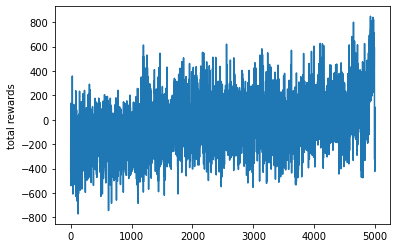

In [12]:
# Check Convergence by tracking total rewards per episode vs episode number
plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.ylabel("total rewards")
plt.show()

In [13]:
# Average reward per 100 episode
avg_rewards = []
episodes = len(rewards_per_episode)
index = 0
track_total_reward = 0
for episode_number in range(episodes):
    if index != 100:
        track_total_reward += rewards_per_episode[episode_number]
        index += 1
    else:
        avg_rewards.append(track_total_reward/index)
        track_total_reward = rewards_per_episode[episode_number]
        index = 1

avg_rewards.append(track_total_reward/index)
        
print(avg_rewards)

[-197.0, -183.97, -170.83, -148.05, -120.68, -193.5, -151.55, -172.67, -188.71, -148.38, -185.91, -113.5, -45.92, -66.34, -76.84, -92.14, -50.59, 23.38, -0.71, -10.0, 55.49, 41.55, 22.64, -31.89, 1.83, 16.14, -6.86, -35.09, 1.74, -66.43, 35.68, 57.13, -6.94, -22.83, -72.5, -53.96, -45.74, -71.37, -17.47, 43.53, 106.03, 64.08, 55.89, 98.69, 11.13, 7.83, 200.82, 124.56, 138.09, 459.05]


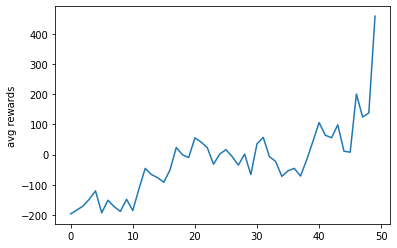

In [14]:
## Check Convergence by tracking average rewards per episode vs episode number
plt.plot(list(range(len(avg_rewards))), avg_rewards)
plt.ylabel("avg rewards")
plt.show()

Text(0, 0.5, 'avg rewards')

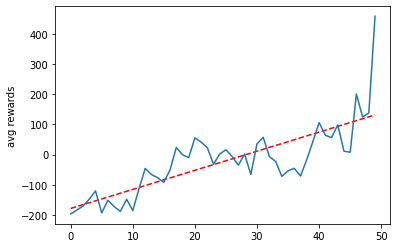

In [24]:
## Check Convergence by tracking average rewards per episode vs episode number
## with the mean line going through the graph
X = list(range(len(avg_rewards)))
z = np.polyfit(X, avg_rewards, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.plot(list(range(len(avg_rewards))), avg_rewards)
plt.ylabel("avg rewards")

### Convergence of Q-Values

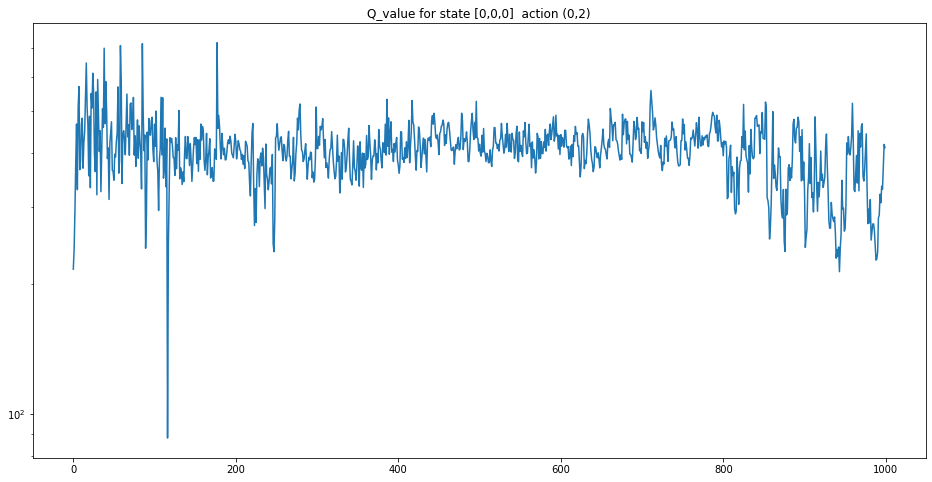

In [21]:
##State action track
plt.figure(0, figsize=(16,8))
plt.title('Q_value for state [0,0,0]  action (0,2)')
xaxis = np.asarray(range(0, len(agent.states_tracked)))
plt.semilogy(xaxis,np.asarray(agent.states_tracked))
plt.show()

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

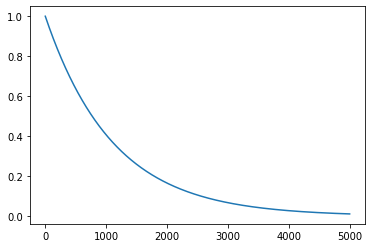

In [9]:
time = np.arange(0,5000)
epsilon = []
for i in range(0,5000):
    epsilon.append(0.00001 + (1 - 0.00001) * np.exp(-0.0009*i))

plt.plot(time, epsilon)
plt.show()

### Conclusion

+ We can observe model is improving gradually over multiple episodes with positive rewards.
+ Model had improved significantly after 4500 episodes we can see the average rewards shooting up in the above graph.
+ Convergence of the Q-Value has been improved from the initial state.
+ We can try to run for more episodes for improved results. 